In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from qiskit.ml.datasets import *
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name



# importing Qiskit
from qiskit import IBMQ, BasicAer ,Aer
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute

# import basic plot tools
from qiskit.tools.visualization import plot_histogram

# import Pands

import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from qiskit.quantum_info.operators import Operator

from qiskit.quantum_info.states import partial_trace

In [2]:
# import some data to play with
iris = datasets.load_iris()
iris.data = preprocessing.normalize(iris.data)

In [3]:
#max_abs_scaler = preprocessing.MaxAbsScaler()

#iris.data = preprocessing.StandardScaler().fit_transform(iris.data)
#sklearn.preprocessing.minmax_scale(X, feature_range=0, 1
#transformer = preprocessing.MaxAbsScaler().fit(iris.data)
#iris.data=transformer.transform(iris.data)

In [4]:
sample_train, sample_test, label_train, label_test = train_test_split(iris.data, iris.target, train_size=20, random_state=10)

In [5]:
st_f = sample_train[label_train==0]
st_y = label_train[label_train==0]
vs_f = sample_train[label_train==1]
vs_y = label_train[label_train==1]
vn_f = sample_train[label_train==2]
vn_y = label_train[label_train==2]

In [6]:
st_f

array([[0.77867447, 0.59462414, 0.19820805, 0.02831544],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80033301, 0.56023311, 0.20808658, 0.04801998],
       [0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451]])

In [7]:
vs_f

array([[0.78892752, 0.28927343, 0.52595168, 0.13148792],
       [0.72992443, 0.39103094, 0.53440896, 0.16944674],
       [0.7581754 , 0.32659863, 0.5365549 , 0.17496355],
       [0.73659895, 0.33811099, 0.56754345, 0.14490471],
       [0.75911707, 0.3931142 , 0.48800383, 0.17622361]])

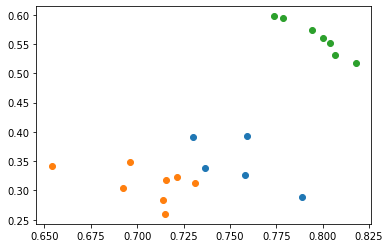

In [8]:
import matplotlib.pyplot as plt

plt.scatter(vs_f[:,0],vs_f[:,1])
plt.scatter(vn_f[:,0],vn_f[:,1])
plt.scatter(st_f[:,0],st_f[:,1])

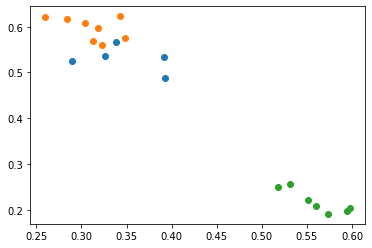

In [9]:
plt.scatter(vs_f[:,1],vs_f[:,2])
plt.scatter(vn_f[:,1],vn_f[:,2])
plt.scatter(st_f[:,1],st_f[:,2])

In [10]:
# SMPT data set

import mat73
import numpy as np
from sklearn import preprocessing
data_dict = mat73.loadmat('smtp.mat')

X_array=preprocessing.normalize(np.array(list(data_dict['X'])))
Y_array=np.array(list(data_dict['y']))

from sklearn.model_selection import train_test_split
sample_train_st, sample_test_st, label_train_st, label_test_st = train_test_split(X_array, Y_array, train_size=5, random_state=1)
sample_train_ab, sample_test_ab, label_train_ab, label_test_ab = train_test_split(X_array[Y_array==1], Y_array[Y_array==1], train_size=5, random_state=1)

mod_sample_train = np.append(sample_train_ab,sample_train_st, axis=0)
mod_sample_label = np.append(label_train_ab,label_train_st, axis=0)

normal_x = mod_sample_train[mod_sample_label==0]
normal_y = mod_sample_label[mod_sample_label==0]

abnormal_x = mod_sample_train[mod_sample_label==1]
abnormal_y = mod_sample_label[mod_sample_label==1]




In [11]:
abnormal_x

array([[ 0.33980184, -0.43268678,  0.83505501],
       [ 0.34172394, -0.43513429,  0.83299634],
       [ 0.34172394, -0.43513429,  0.83299634],
       [ 0.01907973, -0.46094438,  0.8872239 ],
       [ 0.01884865, -0.45536177,  0.89010695]])

In [12]:
def circuit(alpha1: float, alpha2: float, alpha3: float, 
            alpha4: float, alpha5: float, alpha6: float,
            alpha7: float, alpha8: float, alpha9: float,
            beta12z1: float, beta12y2: float, beta12z3: float,
            beta23z1: float, beta23y2: float, beta23z3: float,
            input1: float, input2: float, input3: float):
    
    """Returns the circuit above with the input parameters."""
    qreg = QuantumRegister(3)
    creg = ClassicalRegister(3)
    circ = QuantumCircuit(qreg, creg)
    
    circ.h(qreg)
    
    # 3 general first quibit 
    
    alpha_q1_z1 = alpha1*input1
    alpha_q1_y2 = alpha2*input1
    alpha_q1_z3 = alpha3*input1
        
    circ.rz(alpha_q1_z1,qreg[0])
    circ.ry(alpha_q1_y2,qreg[0])
    circ.rz(alpha_q1_z3,qreg[0])
    
    # 3 general gates for second qubit
    
    alpha_q2_z1 = alpha4*input2
    alpha_q2_y2 = alpha5*input2
    alpha_q2_z3 = alpha6*input2
    
    circ.rz(alpha_q2_z1,qreg[1])
    circ.ry(alpha_q2_y2,qreg[1])
    circ.rz(alpha_q2_z3,qreg[1])
    
    # 3 general gates for third quibit
    
    alpha_q3_z1 = alpha7*input3
    alpha_q3_y2 = alpha8*input3
    alpha_q3_z3 = alpha9*input3
    
    circ.rz(alpha_q3_z1,qreg[2])
    circ.ry(alpha_q3_y2,qreg[2])
    circ.rz(alpha_q3_z3,qreg[2])
    
    
    #beta_input12 = beta12*(np.pi-input1/np.abs(input1))*(np.pi-input2/np.abs(input2))
    beta_input12z1 = beta12z1*(input1)*(input2)/(np.abs(input1)*np.abs(input2))
    beta_input12y2 = beta12y2*(input1)*(input2)/(np.abs(input1)*np.abs(input2))
    beta_input12z3 = beta12z3*(input1)*(input2)/(np.abs(input1)*np.abs(input2))
    
    beta_input23z1 = beta23z1*(input2)*(input3)/(np.abs(input2)*np.abs(input3))
    beta_input23y2 = beta23y2*(input2)*(input3)/(np.abs(input2)*np.abs(input3))
    beta_input23z3 = beta23z3*(input2)*(input3)/(np.abs(input2)*np.abs(input3))

  #  Gates after CNOT

    circ.cx(qreg[0], qreg[1])
    
    circ.rz(beta_input12z1, qreg[1])
    circ.ry(beta_input12y2, qreg[1])
    circ.ry(beta_input12z3, qreg[1])

    circ.cx(qreg[0], qreg[1])
    
    circ.cx(qreg[1], qreg[2])
    
    circ.rz(beta_input23z1, qreg[2])
    circ.ry(beta_input23y2, qreg[2])
    circ.ry(beta_input23z3, qreg[2])

    circ.cx(qreg[1], qreg[2])
    
    
  # final H gate

   # circ.h(qreg)
    
    return circ

In [13]:
my_circ = circuit(2,2,2,
                  1,1,1,
                  0,0,0,
                  0,0,0,
                  0,0,0,
                  1,1,1)
print(my_circ)

      ┌───┐┌───────┐┌───────┐┌───────┐                                     »
q0_0: ┤ H ├┤ RZ(2) ├┤ RY(2) ├┤ RZ(2) ├──■───────────────────────────────■──»
      ├───┤├───────┤├───────┤├───────┤┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐»
q0_1: ┤ H ├┤ RZ(1) ├┤ RY(1) ├┤ RZ(1) ├┤ X ├┤ RZ(0) ├┤ RY(0) ├┤ RY(0) ├┤ X ├»
      ├───┤├───────┤├───────┤├───────┤└───┘└───────┘└───────┘└───────┘└───┘»
q0_2: ┤ H ├┤ RZ(0) ├┤ RY(0) ├┤ RZ(0) ├─────────────────────────────────────»
      └───┘└───────┘└───────┘└───────┘                                     »
c0: 3/═════════════════════════════════════════════════════════════════════»
                                                                           »
«                                           
«q0_0: ─────────────────────────────────────
«                                           
«q0_1: ──■───────────────────────────────■──
«      ┌─┴─┐┌───────┐┌───────┐┌───────┐┌─┴─┐
«q0_2: ┤ X ├┤ RZ(0) ├┤ RY(0) ├┤ RY(0) ├┤ X ├
«      └───┘└───────┘└───────┘└──────

In [14]:
"""Function to execute the circuit and do the postprocessing."""
def run_and_process(circuit: QuantumCircuit) -> list:
    
    
    # Execute the circuit
    
    simulator = Aer.get_backend('statevector_simulator')
    result = execute(circuit,backend = simulator).result()

    statevector = result.get_statevector(circuit)
    
    #print(statevector)
    # Do the postprocessing
    
    out_vector=[]

    for i,j in enumerate(statevector):
        
        out_vector.append(j)
    
    return out_vector

In [15]:
"""cost function: outer_product"""
def cost(out_vector1 , out_vector2) -> float:

    dot_product = np.dot(np.conjugate(out_vector1),out_vector2)
    

    return dot_product

In [16]:
out_vector1 = []
out_vector2 = []


# choosing which paris of flowers
# st_y , vs_y, vn_y

# choosing SMTP data 

# normal_x  ,  abnormal_x

X_Red = normal_x

X_Blue = abnormal_x

"""Define a cost/objective function."""
def obj(params):
    """Returns the cost for the given parameters."""
    #print(X_xor)
    
    global out_vector1
    global out_vector2
    
    val = 0


    
    for index, out_value in enumerate(X_Red):
        
        circ_red = circuit(*params,out_value[0],out_value[1],out_value[2])
    
        for index, value in enumerate(X_Blue):
        
            circ_blue  = circuit(*params,value[0],value[1],out_value[2])
            out_vector1 = run_and_process(circ_blue)
            out_vector2 = run_and_process(circ_red)
        
            print(out_vector1)
            current_val = np.dot(np.conjugate(out_vector1),out_vector2)
            val +=np.abs(current_val)
        
    print('/n',"Current cost:", val)
    
    return val

In [17]:
X_Blue

array([[ 0.33980184, -0.43268678,  0.83505501],
       [ 0.34172394, -0.43513429,  0.83299634],
       [ 0.34172394, -0.43513429,  0.83299634],
       [ 0.01907973, -0.46094438,  0.8872239 ],
       [ 0.01884865, -0.45536177,  0.89010695]])

In [18]:
result = minimize(obj, x0=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], method="COBYLA")

[(0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j)]
[(0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j)]
[(0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j)]
[(0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j)]
[(0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.35355339059327384+0j), (0.3535

[(0.35353768978003886-0.0033319521294683935j), (0.35353768978003886+0.0033319521294683935j), (0.35353768978003886-0.0033319521294683935j), (0.35353768978003886+0.0033319521294683935j), (0.35353768978003886-0.0033319521294683935j), (0.35353768978003886+0.0033319521294683935j), (0.35353768978003886-0.0033319521294683935j), (0.35353768978003886+0.0033319521294683935j)]
[(0.34846276090595485-0.05978046722633925j), (0.34846276090595485+0.05978046722633925j), (0.34846276090595485-0.05978046722633925j), (0.34846276090595485+0.05978046722633925j), (0.34846276090595485-0.05978046722633925j), (0.34846276090595485+0.05978046722633925j), (0.34846276090595485-0.05978046722633925j), (0.34846276090595485+0.05978046722633925j)]
[(0.3484051479898104-0.06011532961066028j), (0.3484051479898104+0.06011532961066028j), (0.3484051479898104-0.06011532961066028j), (0.3484051479898104+0.06011532961066028j), (0.3484051479898104-0.06011532961066028j), (0.3484051479898104+0.06011532961066028j), (0.3484051479898104

[(0.3501485688341485-0.00340482175912528j), (0.35689386123618055+0.0033404706429067178j), (0.3501485688341485-0.00340482175912528j), (0.35689386123618055+0.0033404706429067178j), (0.3501485688341485-0.00340482175912528j), (0.35689386123618055+0.0033404706429067178j), (0.3501485688341485-0.00340482175912528j), (0.35689386123618055+0.0033404706429067178j)]
[(0.3501901855019362-0.003363205091337702j), (0.35685379382617405+0.0033004032329001986j), (0.3501901855019362-0.003363205091337702j), (0.35685379382617405+0.0033004032329001986j), (0.3501901855019362-0.003363205091337702j), (0.35685379382617405+0.0033004032329001986j), (0.3501901855019362-0.003363205091337702j), (0.35685379382617405+0.0033004032329001986j)]
[(0.28452570886524625-0.06902768172802763j), (0.4023651481815124+0.048811757588238545j), (0.28452570886524625-0.06902768172802763j), (0.4023651481815124+0.048811757588238545j), (0.28452570886524625-0.06902768172802763j), (0.4023651481815124+0.048811757588238545j), (0.28452570886524

[(0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j)]
[(0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j), (0.2681444593634642-0.11675469193340761j), (0.38837511858478474+0.11675469193340761j)]
[(0.35010015458281973-0.006744985463261933j), (0.35684575393758944+0.006744985463261935j), (0.35010015458281973-0.006744985463261933j), (0.35684575393758944+0.006744985463261935j), (0.35010015458281973-0.006744985463261933j), (0.35684575393758944+0.006744985463261935j), (0.35010015458281973-0.00674498

[(0.3317182483723565-0.09117847997379482j), (0.43284004751234656+0.19866094536588408j), (0.17032518260476184-0.15517158360064498j), (0.31871367088405855-0.012865393403148328j), (0.3317182483723565-0.09117847997379482j), (0.43284004751234656+0.19866094536588408j), (0.17032518260476184-0.15517158360064498j), (0.31871367088405855-0.012865393403148328j)]
[(0.33133443494272113-0.09190060827377337j), (0.43296780752446384+0.19968327279270934j), (0.16908705781237932-0.15571626649785208j), (0.31847105778957163-0.01324519584844596j), (0.33133443494272113-0.09190060827377337j), (0.43296780752446384+0.19968327279270934j), (0.16908705781237932-0.15571626649785208j), (0.31847105778957163-0.01324519584844596j)]
[(0.33133443494272113-0.09190060827377337j), (0.43296780752446384+0.19968327279270934j), (0.16908705781237932-0.15571626649785208j), (0.31847105778957163-0.01324519584844596j), (0.33133443494272113-0.09190060827377337j), (0.43296780752446384+0.19968327279270934j), (0.16908705781237932-0.155716

[(0.3435578771731485-0.017846471523410557j), (0.380105573590337+0.2869432537449141j), (0.1330456310517945-0.18811631573180246j), (0.30852242447336004-0.08098046648970109j), (0.3435578771731485-0.017846471523410557j), (0.380105573590337+0.2869432537449141j), (0.1330456310517945-0.18811631573180246j), (0.30852242447336004-0.08098046648970109j)]
[(0.34336056920733016-0.01821398071592487j), (0.3796582152860637+0.28843399825878663j), (0.1314888145894152-0.18854357695118493j), (0.30810421761953644-0.08167644059167678j), (0.34336056920733016-0.01821398071592487j), (0.3796582152860637+0.28843399825878663j), (0.1314888145894152-0.18854357695118493j), (0.30810421761953644-0.08167644059167678j)]
[(0.34336056920733016-0.01821398071592487j), (0.3796582152860637+0.28843399825878663j), (0.1314888145894152-0.18854357695118493j), (0.30810421761953644-0.08167644059167678j), (0.34336056920733016-0.01821398071592487j), (0.3796582152860637+0.28843399825878663j), (0.1314888145894152-0.18854357695118493j), (

[(0.2132852191324289-0.13518448191037094j), (0.3468405792891429+0.04808984633325064j), (0.016358130270546133-0.16801829886061492j), (0.16788180545028844-0.16313314812220378j), (0.41316534968718155+0.04455809834282685j), (0.39726976025068306+0.417414398889016j), (0.1932735581303395-0.19955844280067228j), (0.383354406792145-0.037962796273166816j)]
[(0.2132852191324289-0.13518448191037094j), (0.3468405792891429+0.04808984633325064j), (0.016358130270546133-0.16801829886061492j), (0.16788180545028844-0.16313314812220378j), (0.41316534968718155+0.04455809834282685j), (0.39726976025068306+0.417414398889016j), (0.1932735581303395-0.19955844280067228j), (0.383354406792145-0.037962796273166816j)]
[(0.30039440485803154-0.04732835811083045j), (0.30779776030328876-0.03652290966578193j), (0.0862743906415328-0.17984274820785529j), (0.09486587338306439-0.1798180657812031j), (0.4352699526256859+0.24695714525097257j), (0.43372666018409634+0.2684574027691563j), (0.29541091018524485-0.1431210209944862j), 

[(0.39388593196938654-0.12625254644689654j), (0.40594365683582523-0.11343441121522246j), (0.08207738544443878-0.25974299654008154j), (0.09355590258419842-0.2613440655112262j), (0.218392429843427+0.3512699524223525j), (0.20889737750879617+0.36608674360448223j), (0.2719121465803492+0.016337257881372733j), (0.27626092290127663+0.027080065805219232j)]
[(0.27659695516590954-0.20455961455405605j), (0.4753451380444878+0.02938839365504789j), (0.007070392674172282-0.23030175364922958j), (0.21252873175781187-0.23785596593994826j), (0.29630317071989276+0.17479972120942924j), (0.15850011898057453+0.4491039859846503j), (0.2147899221155663-0.08339171148301475j), (0.30194800582634784+0.1028169447771212j)]
[(0.2762295413786139-0.20475710012027049j), (0.47579518771630147+0.030878327865321603j), (0.005536464987325143-0.22979846893989767j), (0.21179579115930225-0.23820535827280967j), (0.29634156350092966+0.17438436662076778j), (0.1573040767239219+0.45009994360339944j), (0.21372777965953998-0.084607475872

[(0.3408547541824778+0.045235673213786465j), (0.47029150920726626-0.07848839502309009j), (-0.04703791448489704-0.2250009408260075j), (0.3178694383886578-0.023627737960957934j), (0.24874022506740123+0.23739530326718855j), (0.42622300908069943+0.21370184443739088j), (0.09457617368063483-0.209507365368398j), (0.2707465534818938+0.16821282246115613j)]
[(0.3550346206807403+0.2131025239607927j), (0.38515902168795946-0.17257843587617658j), (0.03901677675540205-0.2687873688752311j), (0.2562073169706342-0.10486084148998567j), (0.16128221873579793+0.38137948754493295j), (0.41288191724509693+0.08751748927561012j), (0.1899053759495569-0.19417751342703893j), (0.2687925631864619+0.06624608156661649j)]
[(0.3553799826494768+0.21163860900075754j), (0.38396742974939824-0.17385807736377223j), (0.04161591190862089-0.2692048241191634j), (0.257812033255073-0.10289015013676102j), (0.1624238599612919+0.3804002137262709j), (0.41267318750473647+0.08578145771474806j), (0.19225134216286-0.19298327100967771j), (0.

[(0.23490868706489068-0.2468212297141118j), (0.013006391645657166+0.23063519763644708j), (-0.23359178955948282-0.01995704151020561j), (0.5225786844702762+0.049835123891622646j), (0.3321958972797172-0.07582015910469105j), (-0.11665786723789912+0.19938079803217745j), (-0.18362221544023558-0.14576107042781175j), (0.40792137230678305+0.3304121290923333j)]
[(0.23490868706489068-0.2468212297141118j), (0.013006391645657166+0.23063519763644708j), (-0.23359178955948282-0.01995704151020561j), (0.5225786844702762+0.049835123891622646j), (0.3321958972797172-0.07582015910469105j), (-0.11665786723789912+0.19938079803217745j), (-0.18362221544023558-0.14576107042781175j), (0.40792137230678305+0.3304121290923333j)]
[(0.36455745504377407-0.16561888031964644j), (0.0760039345338065+0.200471651539864j), (-0.2570413628391571-0.13721957724424674j), (0.45021346837965415-0.07817368878462197j), (0.3953445719948306+0.06351709171987478j), (-0.04748678215963775+0.20907053033812037j), (-0.138339710935942-0.25644024

[(0.40016569220577103+0.014112771797307133j), (-0.021253451614591898+0.21333956953693797j), (-0.29103998189691027+0.013971525569784177j), (0.3464604452931352-0.2979403507011349j), (0.38224826999265676-0.11923930406517703j), (0.05061541853372496+0.20833521195994606j), (0.012701621164890528-0.29109816799335j), (0.26500935947441184+0.37225439167267693j)]
[(0.40184321773239084+0.014945460152733986j), (-0.022411192078656786+0.21078430662767203j), (-0.2887453822261421+0.014619171218448898j), (0.3468022917267086-0.29917708913196317j), (0.38410691577430617-0.11900930917810047j), (0.04867660749794125+0.20630771515720464j), (0.011846855909480883-0.2888724076977502j), (0.2662096552714952+0.3727079012425192j)]
[(0.3257990619954563-0.10301033296644417j), (-0.09906708825050942+0.207211375885671j), (-0.21418550794910562+0.09384993548021402j), (0.48238254012362564-0.20764595592733978j), (0.25658548793919217-0.22565470275175636j), (-0.0070860978893637905+0.2295661767063463j), (-0.09082301067877821-0.21

[(0.40737811869911206-0.20306644250699837j), (-0.0886449674358403+0.2955834125790983j), (-0.14496638150681598+0.19154753368822935j), (0.3288075521655224-0.4256839109831981j), (0.07386311862938162-0.1398461634487704j), (0.03485294353722533+0.10139679239537541j), (-0.17770033412660663-0.14367914647906582j), (0.394708016329994+0.32562006308850655j)]
[(0.40737811869911206-0.20306644250699837j), (-0.0886449674358403+0.2955834125790983j), (-0.14496638150681598+0.19154753368822935j), (0.3288075521655224-0.4256839109831981j), (0.07386311862938162-0.1398461634487704j), (0.03485294353722533+0.10139679239537541j), (-0.17770033412660663-0.14367914647906582j), (0.394708016329994+0.32562006308850655j)]
[(0.5332471910227806-0.04206811618783067j), (0.004205747708120333+0.2863750349815771j), (-0.2594147031848684+0.14778157908557812j), (0.17831055390047065-0.43292783367987625j), (0.14200806569129215-0.11989545128149137j), (0.05919833515938362+0.07998856425360447j), (-0.13259533903166948-0.25116138616466

[(0.5356001293102732-0.04121783863208415j), (0.0022809548498504673+0.2831595703102438j), (-0.2570178891202661+0.14730877940660764j), (0.17804912887907262-0.4342163138489437j), (0.14284451534823647-0.12013206287100305j), (0.05800362940453301+0.07947077994069544j), (-0.13221893566995072-0.24886806360052294j), (0.40742083194728324+0.18253900022999492j)]
[(0.40927139076158375-0.20318372702347165j), (-0.08823673395191574+0.29418504852395755j), (-0.1449649229781259+0.19224657249420543j), (0.3283616417868304-0.42963248056696907j), (0.07605965344308864-0.1376246558033893j), (0.03261587701097877+0.10053519341501471j), (-0.17558841275196813-0.14339323619869307j), (0.3922447054545794+0.32458923418064994j)]
[(0.4074191998901129-0.20402931250885886j), (-0.08818809155966925+0.2960504790431431j), (-0.14507020483828365+0.19293841611187618j), (0.32907068475629675-0.42879584744305094j), (0.07536990421531288-0.13750139682531026j), (0.03299481778583988+0.10105363719112041j), (-0.1762354830512555-0.1435175

[(0.317039607316026-0.14210575183992374j), (-0.10656873985302176+0.19811264351881896j), (-0.20371380615340795+0.12264136977534786j), (0.49033677677496224-0.17808972961710506j), (0.23301973858342703-0.2577012975202129j), (-0.017808646341603368+0.2242506810499254j), (-0.11958637432946119-0.2055220656586924j), (0.17074944240800793+0.492940903527499j)]
[(0.31564339482581893-0.14309999935764228j), (-0.10683926700651068+0.1994179394788887j), (-0.20402342620525377+0.12343821402479678j), (0.49045718927983245-0.1769143529726902j), (0.23134142356242837-0.25804942987232926j), (-0.01753087481479798+0.22555445459738116j), (-0.12037850732580566-0.20584354761850837j), (0.16957239907141744+0.49304375493173314j)]
[(0.31564339482581893-0.14309999935764228j), (-0.10683926700651068+0.1994179394788887j), (-0.20402342620525377+0.12343821402479678j), (0.49045718927983245-0.1769143529726902j), (0.23134142356242837-0.25804942987232926j), (-0.01753087481479798+0.22555445459738116j), (-0.12037850732580566-0.2058

[(0.3430833797070292+0.0267976521204537j), (0.043335536624211524+0.15820423756770857j), (-0.3045272954403922+0.08628397734548222j), (0.3671884127656619-0.29274678713660884j), (0.38589494153709214-0.14626192511531305j), (0.12786406778123946+0.14948383460380812j), (-0.07682046755762113-0.3092041429816508j), (0.28248067682123384+0.3790162375121004j)]
[(0.3446200495650825+0.028188262213874996j), (0.04157550161153798+0.15618883059354174j), (-0.30244902477458097+0.08597434326082755j), (0.36808217773802016-0.2931454637569195j), (0.3882726999022309-0.14553861765660572j), (0.12492468350357218+0.14819685693003865j), (-0.0765771116127662-0.3071031116673361j), (0.28285246094494426+0.37992849833402265j)]
[(0.2772043626124897-0.09352659258155054j), (0.0014285993647186342+0.17218875375339768j), (-0.1943025204671338+0.16181681014717078j), (0.4839599793097073-0.22928890328104382j), (0.27268547972461493-0.22410380335237587j), (0.07528198425427812+0.19362641097550623j), (-0.14305914083187624-0.2151963262

[(0.28621978661472647-0.1061574746743719j), (-0.09945337123008138+0.21317012408168712j), (-0.18209964393930037+0.09531043035829302j), (0.5083476946763575-0.22542096692694855j), (0.21909844810758633-0.21257244815795573j), (-0.005036442640667146+0.23517463531503038j), (-0.09273541091131976-0.18342437684509566j), (0.2182366005293293+0.5114731441654093j)]
[(0.2847687615807652-0.10695102799424222j), (-0.09958997716850258+0.2146427177702676j), (-0.18221746059277263+0.0958545019824592j), (0.5086446695091849-0.22442789906607166j), (0.21745062256699282-0.21271341449587783j), (-0.004567557500851346+0.23657725432235882j), (-0.09327776864393418-0.18354984710424743j), (0.21723944722237362+0.5117560984197806j)]
[(0.2847687615807652-0.10695102799424222j), (-0.09958997716850258+0.2146427177702676j), (-0.18221746059277263+0.0958545019824592j), (0.5086446695091849-0.22442789906607166j), (0.21745062256699282-0.21271341449587783j), (-0.004567557500851346+0.23657725432235882j), (-0.09327776864393418-0.1835

[(0.39944490349514955+0.05992244065435845j), (-0.01868732278285229+0.13547028853338433j), (-0.254474691426014+0.05048744581309145j), (0.38652656978320316-0.2876249819216797j), (0.42809628197406413-0.10060185566889492j), (0.035772207052892614+0.14452743727404374j), (-0.03342812572849741-0.2588929426829551j), (0.26253765387760347+0.40754187385342183j)]
[(0.40056457403875956+0.060168403661282545j), (-0.019737720278006694+0.13372151512524325j), (-0.2525291763530115+0.050781852863498726j), (0.38626518606532706-0.2887027507855367j), (0.4293277394664437-0.10080498011347577j), (0.03400434298583484+0.14318297969680222j), (-0.03385561420742523-0.25695978856846247j), (0.26363736011613853+0.4073525550902108j)]
[(0.3324629071417312-0.12041351112486928j), (-0.07815310347480997+0.12072616297338667j), (-0.16412193724444396+0.14005868984142328j), (0.5215462854770057-0.14022866185730007j), (0.29083009001597143-0.2524785395545964j), (-0.03220584279925776+0.15329458585252437j), (-0.12748474608016447-0.176

[(0.332035181220289-0.08202389906035254j), (-0.05867257117494061+0.1971466078917436j), (-0.2077263859458334+0.10459773108633226j), (0.47587377095117717-0.24529304955018272j), (0.2823129671915342-0.19306649150115301j), (0.014053112308221039+0.20521151440879698j), (-0.08947616294380728-0.21467406231629207j), (0.21063700674504043+0.49219566985743746j)]
[(0.4004897389607756+0.037414461260204396j), (-0.006352411144556133+0.19115812268768084j), (-0.28693952414250445+0.03324248330434257j), (0.361059577355198-0.29634941280122407j), (0.3882468835462592-0.10514861074155472j), (0.060966484680514105+0.1812867031597424j), (-0.0126393121338461-0.2885820524567486j), (0.26977264664709755+0.38132625399854747j)]
[(0.4020963534056552+0.03788201924696552j), (-0.007664076584546292+0.18887096628115496j), (-0.28466884159842515+0.03370578821792594j), (0.36110592523601553-0.29762825209451615j), (0.3899155163711495-0.10527304924515511j), (0.0589371685253849+0.17960342463350004j), (-0.013263799871379461-0.286350

[(0.21807810184242443-0.043265613538614224j), (-0.10938312571162738+0.14477890646957967j), (-0.2452364206153963+0.03716320321937142j), (0.4843920057593172-0.05617328495401282j), (0.31408779782384005-0.24523760806073225j), (-0.058211248382445915+0.31997526597331155j), (-0.007833779722647885-0.2695424223006276j), (-0.0031225558024678096+0.5301337416877366j)]
[(0.21718484318416845-0.04395338623267061j), (-0.10967210866628105+0.14578623589278045j), (-0.24577086769916764+0.037552212844553866j), (0.4841683738201076-0.055027969270868296j), (0.31210320029631167-0.24561740421222697j), (-0.05786077597768268+0.32182058088116544j), (-0.008183257448075765-0.270170373308809j), (-0.0043291183144312925+0.5297416878834468j)]
[(0.21718484318416845-0.04395338623267061j), (-0.10967210866628105+0.14578623589278045j), (-0.24577086769916764+0.037552212844553866j), (0.4841683738201076-0.055027969270868296j), (0.31210320029631167-0.24561740421222697j), (-0.05786077597768268+0.32182058088116544j), (-0.008183257

[(0.31370028349479556-0.1354558586044241j), (-0.07758628121345022+0.21617402998125027j), (-0.20358700237092747+0.1150459676419678j), (0.45888941268594835-0.25540216317377873j), (0.2781066782815118-0.19852665561631902j), (-0.03028435955022167+0.2276701557901254j), (-0.06854700472726191-0.2235722486087606j), (0.15068418683577917+0.503094458195218j)]
[(0.31235078164726-0.1361609338264207j), (-0.07762412022318704+0.2175689696901179j), (-0.2039488122011398+0.11562132008062366j), (0.4591967279059263-0.254382362038858j), (0.27663889048498075-0.1989314830975129j), (-0.03002736119738994+0.2290417389734123j), (-0.0690310332945511-0.22404937870417851j), (0.1496221484712093+0.5031751521317774j)]
[(0.31235078164726-0.1361609338264207j), (-0.07762412022318704+0.2175689696901179j), (-0.2039488122011398+0.11562132008062366j), (0.4591967279059263-0.254382362038858j), (0.27663889048498075-0.1989314830975129j), (-0.03002736119738994+0.2290417389734123j), (-0.0690310332945511-0.22404937870417851j), (0.149

[(0.3588558388237656-0.14342002020846442j), (-0.10857255290102155+0.22811908906642345j), (-0.18942681008213377+0.14186277221155552j), (0.44300757639817334-0.30131494931247116j), (0.2060054524377656-0.20536332350224915j), (-0.007717582517390323+0.19000315235382736j), (-0.11933118493108148-0.19619773655091904j), (0.24966159653991368+0.4559993381495794j)]
[(0.3588558388237656-0.14342002020846442j), (-0.10857255290102155+0.22811908906642345j), (-0.18942681008213377+0.14186277221155552j), (0.44300757639817334-0.30131494931247116j), (0.2060054524377656-0.20536332350224915j), (-0.007717582517390323+0.19000315235382736j), (-0.11933118493108148-0.19619773655091904j), (0.24966159653991368+0.4559993381495794j)]
[(0.45435016946621415-0.000982628814614834j), (-0.03204602282255538+0.23190309061482636j), (-0.28490679950257425+0.07001974254996225j), (0.3042346385978525-0.35445257530782814j), (0.31421558414274-0.13499705748176466j), (0.046373546638134935+0.1699993904282872j), (-0.041029449377359736-0.2

[(0.39589873552560134+0.04993156235631342j), (-0.02912288271671072+0.16671230745740157j), (-0.2689700265054935+0.023367910493026632j), (0.37604357806921485-0.2810814586699964j), (0.410556578773592-0.12557240552179535j), (0.04493207422941789+0.17645506310773829j), (-0.01795246767169852-0.2730674440666971j), (0.27683480347991113+0.3870624737738791j)]
[(0.32213077138042473-0.118240141377781j), (-0.08668417343581816+0.15946195733294516j), (-0.18573158179841837+0.12094486706909495j), (0.49714932023704356-0.18467803959167128j), (0.2838178402134548-0.23772428959218955j), (-0.029739511391095375+0.19355082899032275j), (-0.10431175037933116-0.2004845456328295j), (0.13809413083711874+0.5228429186344632j)]
[(0.3209749634178732-0.11903626330982779j), (-0.08683651183681318+0.16056509655874218j), (-0.1860054867832847+0.12154742869617656j), (0.497543153594344-0.1834445385956205j), (0.28235363706642-0.23811021226289864j), (-0.029491127997173846+0.19472635784981374j), (-0.10489607252627738-0.20082229230

[(0.3324531731010728-0.07893696972904943j), (-0.11393831611090513+0.19942141909202868j), (-0.22046865657046777+0.07795392020334742j), (0.49626152452793054-0.17185533830031033j), (0.2394169674570791-0.24379432558743586j), (0.009701626649762915+0.22947052253223219j), (-0.10632072150687619-0.20827661026460456j), (0.2357387851878579+0.46929413291373345j)]
[(0.3312465734054974-0.07986562654392386j), (-0.11421775770752733+0.20078860634186346j), (-0.22092485969831693+0.0784577212434873j), (0.4963871240106528-0.17079767021950454j), (0.23790118649679054-0.24393818102043066j), (0.010192844539053739+0.2307766594191144j), (-0.10688023488877466-0.2086624619943945j), (0.23470688402798903+0.4695579832415268j)]
[(0.3312465734054974-0.07986562654392386j), (-0.11421775770752733+0.20078860634186346j), (-0.22092485969831693+0.0784577212434873j), (0.4963871240106528-0.17079767021950454j), (0.23790118649679054-0.24393818102043066j), (0.010192844539053739+0.2307766594191144j), (-0.10688023488877466-0.2086624

[(0.39018698434452054+0.05311066727645236j), (-0.04384483107473161+0.20483832313135925j), (-0.28978019961464035-0.01459669513927004j), (0.37516705763021607-0.25961266886347845j), (0.37583060660268613-0.1575846378356249j), (0.0684934961520917+0.20568612229313543j), (-0.01267404391203624-0.29150684151486994j), (0.2952574099981791+0.3511752679406313j)]
[(0.39172677733084654+0.054102145176770214j), (-0.04471945649139227+0.20223559838546185j), (-0.28758580311495796-0.013718193027470722j), (0.3756214225893282-0.2607900653746565j), (0.37772442820406715-0.1575092947492453j), (0.06634651193123771+0.2038246344550346j), (-0.01334696803569298-0.28922705070735827j), (0.29647902437227497+0.3515193100338365j)]
[(0.32561720687181417-0.08277527241813397j), (-0.11039685241714006+0.19540127134615404j), (-0.2181766392039299+0.08154832225194399j), (0.49315962378405587-0.17742340925722505j), (0.24917374805765255-0.24261779477201328j), (0.0020590257708791326+0.23230819152824628j), (-0.10029130226782904-0.211

[(0.35460649988632476-0.01193659561225449j), (0.040349114573245526+0.2627957719986405j), (-0.1814133718352187-0.04535880791712727j), (0.4446803625294409-0.22726384974336777j), (0.31457274116251155-0.2182268876736886j), (0.1902927025127766+0.2147015684486511j), (0.02320548190732319-0.1874710351368251j), (0.2824767664085617+0.4179716460047828j)]
[(0.35374478125114045-0.012728233723461324j), (0.03984100006629299+0.2642649346197964j), (-0.1823062798676769-0.04468074318565382j), (0.4445179008911122-0.22666433374050518j), (0.3133283271286471-0.21844073502833403j), (0.19069123493633758+0.21633097986933367j), (0.022415954281513502-0.1882830876254066j), (0.2818556888925603+0.41788236056043393j)]
[(0.35374478125114045-0.012728233723461324j), (0.03984100006629299+0.2642649346197964j), (-0.1823062798676769-0.04468074318565382j), (0.4445179008911122-0.22666433374050518j), (0.3133283271286471-0.21844073502833403j), (0.19069123493633758+0.21633097986933367j), (0.022415954281513502-0.1882830876254066j

[(0.337552489853807-0.05102857519043492j), (-0.1326425890193401+0.1878955399196914j), (-0.20353406884989014+0.11445519965251967j), (0.46060710377654085-0.2495982148135957j), (0.21071367186147763-0.2675513897091973j), (0.0317782285755716+0.22723122536921705j), (-0.07737706221122877-0.22179967249583468j), (0.16577954275482995+0.5002782060572505j)]
[(0.3903739148530388+0.09257492407284389j), (-0.06478584513544111+0.20335231274691537j), (-0.2884175219567081+0.031148047997563842j), (0.32961423104301063-0.31532120795677016j), (0.3471693606649086-0.19914746727560328j), (0.0916914133448692+0.19215244896630876j), (0.02012906165432292-0.29113991593039773j), (0.25402081797168363+0.38216551974366286j)]
[(0.3918368525191081+0.09373307580710714j), (-0.06541441454532314+0.20062638766030894j), (-0.2861127014206834+0.031670449017741534j), (0.32987774556801835-0.3165551804895073j), (0.3490241729530036-0.19930366275450803j), (0.08937330677975068+0.1905986025098354j), (0.019204333986461226-0.2889496663620

[(0.3583427077024791-0.11699519684669889j), (-0.1309499770983613+0.1980555435217656j), (-0.1641517861872746+0.1662422411252903j), (0.394569515503482-0.3480506207870478j), (0.13656973287648302-0.26840219301048124j), (0.03774772602720011+0.18588896859516962j), (-0.139494638570295-0.19263257740743903j), (0.28354189040779754+0.45441105597339176j)]
[(0.35697232952868635-0.11796937658086454j), (-0.131112903009021+0.19947605321051876j), (-0.16431691782055258+0.16679603317489472j), (0.39515769794559596-0.34720580605965906j), (0.13524509159163775-0.26817952244556065j), (0.03845736697994709+0.1867840695042251j), (-0.1400231422646564-0.19289098671205918j), (0.2825952019063021+0.45486046081048487j)]
[(0.35697232952868635-0.11796937658086454j), (-0.131112903009021+0.19947605321051876j), (-0.16431691782055258+0.16679603317489472j), (0.39515769794559596-0.34720580605965906j), (0.13524509159163775-0.26817952244556065j), (0.03845736697994709+0.1867840695042251j), (-0.1400231422646564-0.1928909867120591

[(0.3365611586135941-0.06905628775706936j), (-0.12526070302690084+0.23268366049616024j), (-0.21648943733334353+0.13050104047442693j), (0.4492380677698925-0.25756481482580407j), (0.17866123618172192-0.25721045726124303j), (0.06366453023448418+0.23230948445688873j), (-0.09553941681650997-0.23068605232778852j), (0.1853243278337058+0.4767455774615585j)]
[(0.3365611586135941-0.06905628775706936j), (-0.12526070302690084+0.23268366049616024j), (-0.21648943733334353+0.13050104047442693j), (0.4492380677698925-0.25756481482580407j), (0.17866123618172192-0.25721045726124303j), (0.06366453023448418+0.23230948445688873j), (-0.09553941681650997-0.23068605232778852j), (0.1853243278337058+0.4767455774615585j)]
[(0.3944459257134303+0.07610477336473634j), (-0.044099003756433254+0.24142206553616405j), (-0.3115485159897745+0.04055335625339248j), (0.31452435786350796-0.32118209721225055j), (0.30814036399182215-0.19782322671394403j), (0.12271569452987247+0.1870381602091802j), (0.006328111626235742-0.3102674

/n Current cost: 6.449217410551576
[(0.3471895313981662-0.04888308294743415j), (-0.16323520178307535+0.18821099689660692j), (-0.21158620568506295+0.09275491139964633j), (0.46004668466643234-0.2382783621890269j), (0.1968880579213495-0.2738650280879776j), (0.022294033233394753+0.23863251729340929j), (-0.06789085527154598-0.22090156479323453j), (0.18398712752650542+0.4845014357127907j)]
[(0.34605270022596274-0.04994216791211307j), (-0.16381625925264676+0.18951575428899123j), (-0.21204489769217943+0.09325793477090093j), (0.4603057597513077-0.23717248810076494j), (0.19539584458619091-0.27377898537038947j), (0.022814688831678594+0.23990408132441593j), (-0.06833807985196831-0.2214151019173354j), (0.1828584688952645+0.4846319744588871j)]
[(0.34605270022596274-0.04994216791211307j), (-0.16381625925264676+0.18951575428899123j), (-0.21204489769217943+0.09325793477090093j), (0.4603057597513077-0.23717248810076494j), (0.19539584458619091-0.27377898537038947j), (0.022814688831678594+0.23990408132441

[(0.35719991574171883-0.09994119365087825j), (-0.13729717462320087+0.1938640834298747j), (-0.1671964135289552+0.17285220834931198j), (0.4049234843953722-0.35564607313228375j), (0.1359793893362452-0.2732540730254576j), (0.042662377302117985+0.19076785230971877j), (-0.12254467379724279-0.19791794952177572j), (0.23768483338584526+0.4643846146491296j)]
[(0.433839574204951+0.044912679665861384j), (-0.06624383659888244+0.20954654933474587j), (-0.27393067387815356+0.11612702384978063j), (0.260484430032612-0.3916103158345672j), (0.26670771533008647-0.2401628352363804j), (0.09142813635340101+0.15602704425122715j), (-0.04398647523055742-0.2846245765985238j), (0.30570575537385775+0.3373678872395075j)]
[(0.43543456915864714+0.04610299548248782j), (-0.0672601013975351+0.2067730935670347j), (-0.2716644477486846+0.11613325938152401j), (0.2603691240619811-0.3927361412888902j), (0.2683143156824721-0.24048034620924147j), (0.08917394935942488+0.15511797218620108j), (-0.04453001884586363-0.282499302269004

[(0.38259224209158044+0.11097429987931873j), (-0.06746923532003597+0.17936810772257458j), (-0.27402895145276934+0.031262756101526644j), (0.3399490360623177-0.30335404421280154j), (0.35963130940921584-0.2119950999823834j), (0.08828873890714589+0.18037938607746537j), (0.002211318745586902-0.28660184453547566j), (0.27017073013800924+0.38881700033974187j)]
[(0.3387481159004971-0.04623011585494828j), (-0.12825965770109668+0.1613574415212108j), (-0.19256815970049823+0.11792945953854334j), (0.4651281018178565-0.22710218111750977j), (0.21849036649040784-0.28491239335230223j), (0.023621415423446833+0.2151741365645991j), (-0.09032639635461741-0.2171490756681919j), (0.1587557877262957+0.5151983596452835j)]
[(0.3377230849537924-0.047254947866508704j), (-0.12866704564778023+0.1625386469867801j), (-0.192896360287865+0.11849773226797071j), (0.46549319170152303-0.22602228756220447j), (0.21696817175300612-0.2849190152063281j), (0.024190793162461775+0.2163563550627316j), (-0.09085827237625527-0.21757833

[(0.35323487866010694-0.042234445202033954j), (-0.1398902900581083+0.157576124620831j), (-0.19152737850194856+0.13564583561082594j), (0.5097014112158227-0.23870936642355894j), (0.19738936041129002-0.25589273884004815j), (0.013148087299433916+0.19096659521145817j), (-0.08956774565306758-0.19697738528937886j), (0.1276420861371289+0.502973045574102j)]
[(0.35214221681428803-0.043400602712641075j), (-0.14029164125646323+0.15882542121133655j), (-0.19173155353084062+0.13628736533204433j), (0.5101442454802677-0.23756850037747249j), (0.19593800144136017-0.25592637140128904j), (0.01370267266414423+0.19202176654379421j), (-0.09011318432436763-0.19727365612658418j), (0.1265321629107374+0.5031759234715765j)]
[(0.35214221681428803-0.043400602712641075j), (-0.14029164125646323+0.15882542121133655j), (-0.19173155353084062+0.13628736533204433j), (0.5101442454802677-0.23756850037747249j), (0.19593800144136017-0.25592637140128904j), (0.01370267266414423+0.19202176654379421j), (-0.09011318432436763-0.1972

[(0.34046623913503654-0.04392293535388799j), (-0.13465973815147697+0.1933277940982251j), (-0.20635672347905465+0.09743799080948844j), (0.4650216930173205-0.23617911313577566j), (0.202619683750669-0.27738675874863444j), (0.04758153865320604+0.2309032632609947j), (-0.0726582674659045-0.2181260418134233j), (0.18034291360824192+0.4935396604715874j)]
[(0.34046623913503654-0.04392293535388799j), (-0.13465973815147697+0.1933277940982251j), (-0.20635672347905465+0.09743799080948844j), (0.4650216930173205-0.23617911313577566j), (0.202619683750669-0.27738675874863444j), (0.04758153865320604+0.2309032632609947j), (-0.0726582674659045-0.2181260418134233j), (0.18034291360824192+0.4935396604715874j)]
[(0.38958555668710565+0.10796967452622103j), (-0.0634494917588567+0.20938756173941697j), (-0.28459625923652027+0.006370334890864249j), (0.3313517960303923-0.30916593618954846j), (0.34670568387107537-0.20842231628703012j), (0.1082861227657455+0.1902753557555252j), (0.027839430717724205-0.2854395963375766

[(0.3581380500642067-0.00695389144245645j), (-0.05750845336823193+0.23536710814969913j), (-0.19695175929710831+0.04062261917713135j), (0.4330290909392992-0.2767093395732738j), (0.2410278284728202-0.2712755530684666j), (0.13560543419402213+0.2045960933781948j), (-0.014594730112824252-0.2045031439505769j), (0.22147524522230935+0.47480772584080094j)]
[(0.3571886689411967-0.00795167407294367j), (-0.05810929312511932+0.2367709141506059j), (-0.19754771083312642+0.04133377627233309j), (0.4331250399108906-0.2759057642844389j), (0.23963271281894996-0.27125503297657716j), (0.1362369763548932+0.20600823354282743j), (-0.015233383869697336-0.2052009727271645j), (0.220650236369387+0.4747967374158048j)]
[(0.3571886689411967-0.00795167407294367j), (-0.05810929312511932+0.2367709141506059j), (-0.19754771083312642+0.04133377627233309j), (0.4331250399108906-0.2759057642844389j), (0.23963271281894996-0.27125503297657716j), (0.1362369763548932+0.20600823354282743j), (-0.015233383869697336-0.205200972727164

[(0.3485551146695897-0.04833788151766211j), (-0.13014104361131576+0.1922781728317068j), (-0.2111249989623669+0.1015059014183243j), (0.4539110415136496-0.24036441453954094j), (0.2176803873583979-0.27852561204623966j), (0.04051664547570908+0.22969477825950269j), (-0.06657346705062855-0.22670913707655735j), (0.16515786045486033+0.4910284718100128j)]
[(0.34746638856856854-0.04941206560871989j), (-0.13064973404150007+0.1935831051757249j), (-0.21158627972266034+0.10211226126729413j), (0.45412356457656566-0.23933270231972922j), (0.21614401987952153-0.27853954228095784j), (0.041061834187140114+0.23099183212513885j), (-0.06710171246856529-0.22726723826583753j), (0.1640962667400015+0.4910716100113244j)]
[(0.34746638856856854-0.04941206560871989j), (-0.13064973404150007+0.1935831051757249j), (-0.21158627972266034+0.10211226126729413j), (0.45412356457656566-0.23933270231972922j), (0.21614401987952153-0.27853954228095784j), (0.041061834187140114+0.23099183212513885j), (-0.06710171246856529-0.227267

[(0.32420043918630964+0.11654848810852482j), (-0.08223525128974261+0.1830421769911759j), (-0.28115962807475187-0.01036382704096975j), (0.32567904682175086-0.26431139164272244j), (0.37931464588676145-0.2171757344244624j), (0.10909518688473532+0.23002806763007047j), (0.07798123876307479-0.3104111352582582j), (0.21714208065956386+0.4248665081966433j)]
[(0.3254695775822842+0.11784327994307055j), (-0.08240675799379861+0.18046717504826332j), (-0.27897806448802165-0.00959033185271471j), (0.3261933471138705-0.2655412670251738j), (0.3816093090839963-0.2173359195355641j), (0.10646741546387098+0.2280748745032681j), (0.07660494384857151-0.30816640615753155j), (0.21838907603472812+0.42572946316873733j)]
/n Current cost: 3.3857209308627056
[(0.350104212149812-0.03234611470881184j), (-0.13261306437085427+0.1920421548781553j), (-0.21513385906132573+0.09129658283305418j), (0.45547301924541683-0.23876845475680922j), (0.21744605234537118-0.27664357427186526j), (0.048269132928061544+0.22852247050715824j),

[(0.3612623800635508-0.0717501593858058j), (-0.12335717370330461+0.2040389402512539j), (-0.19598739207478216+0.12809022203551973j), (0.41954993817433384-0.30470009368351697j), (0.1862671357136953-0.27776713228985167j), (0.051514506117313265+0.21028065909559052j), (-0.08484699342896555-0.2187629932613022j), (0.21153113963002187+0.4746437161538541j)]
[(0.3612623800635508-0.0717501593858058j), (-0.12335717370330461+0.2040389402512539j), (-0.19598739207478216+0.12809022203551973j), (0.41954993817433384-0.30470009368351697j), (0.1862671357136953-0.27776713228985167j), (0.051514506117313265+0.21028065909559052j), (-0.08484699342896555-0.2187629932613022j), (0.21153113963002187+0.4746437161538541j)]
[(0.4182343049727424+0.07143640438466582j), (-0.05238579227807342+0.21766771771294818j), (-0.2799698740907519+0.05442234727982307j), (0.28351050102099645-0.35734789007728285j), (0.3147059382409731-0.22223539535040526j), (0.1058838234658654+0.17353751256515068j), (0.004829291796909172-0.28578823099

[(0.38582776862161416+0.11825941264519084j), (-0.07073619532023306+0.2085687776268069j), (-0.28571169453985606-0.00310238683527177j), (0.33817923331735644-0.2985974038323442j), (0.3395652451961478-0.21989758152700495j), (0.11448103882282328+0.18878621993038616j), (0.020718424874989386-0.28792905801026025j), (0.280294324830342+0.35941306045904914j)]
[(0.3872319440354094+0.1195158770473136j), (-0.07109821035597831+0.20576040809561968j), (-0.28339474624684624-0.0024016418039446725j), (0.33867251410633037-0.29979838745634785j), (0.34143513183555513-0.22016520049804084j), (0.11209194996142875+0.18725318819907869j), (0.019869129723536407-0.2856357208427736j), (0.28147506304753916+0.35998443803411073j)]
[(0.3510618434374122-0.014155721786933138j), (-0.1422831515912481+0.18478383625838832j), (-0.21941416050797646+0.0798706520022243j), (0.4669073064327813-0.2144760740918688j), (0.2028628751064263-0.2878116309235372j), (0.06016564468880545+0.22585255509396185j), (-0.07700442589801897-0.222945335

[(0.35890539377953024-0.013145565707576592j), (-0.14104950155408005+0.17507938053992872j), (-0.21291195438596833+0.09133082726665469j), (0.4871580450027572-0.21405859780928874j), (0.19586579323121656-0.28340562731473495j), (0.0536234688025588+0.20888846016316406j), (-0.08298014360123082-0.2094313483043684j), (0.19480910422099995+0.479332548324306j)]
[(0.3579220568529656-0.014299712952286393j), (-0.14162516835694308+0.17634057766296318j), (-0.2133667600173363+0.09189743897323317j), (0.4873871211472011-0.21299422145477198j), (0.1944143729802322-0.28331216114441027j), (0.054262483811388304+0.21005470844852017j), (-0.08351850851513455-0.20988882542938406j), (0.19376831661319305+0.4795262520335592j)]
[(0.3579220568529656-0.014299712952286393j), (-0.14162516835694308+0.17634057766296318j), (-0.2133667600173363+0.09189743897323317j), (0.4873871211472011-0.21299422145477198j), (0.1944143729802322-0.28331216114441027j), (0.054262483811388304+0.21005470844852017j), (-0.08351850851513455-0.209888

[(0.385173166385751+0.12292608088007168j), (-0.07352642065239051+0.20386141231127064j), (-0.2827985587518928-0.00470899648186049j), (0.34146039364277203-0.29590043440699193j), (0.3403318402393406-0.22396490709142977j), (0.11317586480183905+0.1867617174388449j), (0.017057764574617367-0.2860830054332841j), (0.2847110225013495+0.358533342042407j)]
[(0.3498894903783996-0.01998696148504786j), (-0.13920254487744463+0.1857571751021872j), (-0.21746788432529396+0.08374239040404986j), (0.4627601018635922-0.22180666123791648j), (0.20801518397930113-0.2854215761227382j), (0.05579556337581451+0.22717717643887603j), (-0.07375689556357254-0.224330778066453j), (0.2010850314435189+0.4795692223339691j)]
[(0.34888356542420745-0.021076130681250898j), (-0.13975734527393283+0.1870484088647717j), (-0.21797843956993365+0.08425659811644144j), (0.46293189573085425-0.22079941251702678j), (0.20652363906137644-0.28533372694415055j), (0.05644721547902867+0.22843463855154555j), (-0.07425149813885538-0.22487350690687

[(0.37438208501314885+0.10564999633004797j), (-0.06634965758375337+0.18735180038675797j), (-0.2987827846084572-0.03468773911569199j), (0.3610493494657558-0.2839185181063853j), (0.33601017590202326-0.20890187699432305j), (0.09530119006843867+0.17827805256057613j), (0.014493911429242504-0.3048451980552983j), (0.3123214389985137+0.34588848831900687j)]
[(0.3759051612745797+0.10687600481471754j), (-0.06671397730381373+0.18451743112687913j), (-0.29660199754303834-0.03384800494530701j), (0.3615404244790542-0.2849773471087424j), (0.3379754300920967-0.20920598145271893j), (0.0929216482884356+0.17660897894587568j), (0.013794368258514612-0.3025796826439007j), (0.3134271588505157+0.3463125204862972j)]
[(0.33709382405795535-0.03676811439173883j), (-0.12271683177925904+0.16904295427124397j), (-0.23626440214743846+0.07004810526007656j), (0.47666186583211595-0.21260856386923077j), (0.21572346441004717-0.26960799080297493j), (0.03376132360432398+0.2100107012917084j), (-0.07692594801141785-0.23822109063

[(0.34914134526925694-0.015189732801950153j), (-0.14457772238373467+0.19103944648688378j), (-0.22185758070441533+0.07826257780527193j), (0.46598970508571225-0.2164937672614928j), (0.20015248447568243-0.28470619721792356j), (0.06288749973378303+0.23014873144021508j), (-0.07548283167212584-0.22425499020103878j), (0.21095114955744362+0.4717825488700356j)]
[(0.38371318416293965+0.12525579318726193j), (-0.0770209630294793+0.21089899407307086j), (-0.2877450762658025-0.011749092034195883j), (0.3446636685645332-0.29010588867592574j), (0.3319715476209029-0.22664947950169087j), (0.11960424686421302+0.1889122000956737j), (0.015997590600032068-0.2892085594368576j), (0.28674456586068114+0.35083724569316704j)]
[(0.3851121171211007+0.12658504612448884j), (-0.07731556627503838+0.20804496353149238j), (-0.28543083110444223-0.01096905386964298j), (0.345223406708176-0.2913107411307352j), (0.333870333107547-0.22694560473008j), (0.11717338035695256+0.18741054423691714j), (0.01517948956140966-0.2868925068699

[(0.3982621163613964+0.11034954173134263j), (-0.06498391773582568+0.2327732737466816j), (-0.27006531313138-0.011202051202337767j), (0.3497291963108602-0.2670094193503842j), (0.3584904189560055-0.21081740918722658j), (0.12287576378012112+0.20988048309429552j), (-0.0013894634089517777-0.27299986580915336j), (0.2858254076813199+0.3402998775629185j)]
[(0.3995959215757217+0.11158359765610301j), (-0.06545579076818142+0.23002312231046135j), (-0.26771787593339397-0.01032671640211592j), (0.35040869562378685-0.2682781277903594j), (0.3603162479560101-0.21091852733514446j), (0.1205565869170478+0.20829734535540423j), (-0.002162288370774102-0.27059036159341837j), (0.2871373612440331+0.34092581439407926j)]
[(0.35667815178358464-0.03204538464361198j), (-0.13790345230359566+0.21778070403275174j), (-0.20659322573662006+0.07399883528067991j), (0.4645238413856804-0.19253488275584635j), (0.22838674739654663-0.2788083467673486j), (0.05924146831099682+0.25256740671792904j), (-0.08293246648856788-0.2055579980

[(0.3848338284334328+0.12114981573524937j), (-0.06887095031060646+0.20687464886303286j), (-0.28626006097949896-0.0009450155743130327j), (0.3419714565680906-0.2974863527409212j), (0.33908473882454243-0.2210977246729034j), (0.11646951144075861+0.18518378992085116j), (0.01490302993742152-0.2874588489342781j), (0.2821104380024068+0.35795971741955335j)]
/n Current cost: 0.9283409465198145
[(0.3651883537272062-0.010596718797543555j), (-0.15023590496795416+0.19481698476546908j), (-0.22748555117519653+0.07829658391754632j), (0.4744603305530471-0.22712349091303158j), (0.19525327933075848-0.275945108701766j), (0.06051507709816732+0.21943958154525725j), (-0.06998509695951902-0.21891493448359436j), (0.2069210159174556+0.4579297489167088j)]
[(0.36416527011293776-0.011753963581745774j), (-0.1508548347677931+0.19616740928491228j), (-0.22804341955431942+0.0788006686276942j), (0.47459824767721326-0.22611207895372756j), (0.19382855217872727-0.2758321213990989j), (0.06116949774952625+0.22064827337214044j

[(0.3487532413999004-0.008994511141064037j), (-0.14614272670757894+0.179475341906438j), (-0.21838018562159073+0.07445612986256145j), (0.47020766533240277-0.2131200354342388j), (0.20812870448127152-0.28692856541120504j), (0.054544631254798255+0.22874940255777346j), (-0.07099313627966189-0.22114591908500028j), (0.2060070000865323+0.4771171443311354j)]
[(0.3487532413999004-0.008994511141064037j), (-0.14614272670757894+0.179475341906438j), (-0.21838018562159073+0.07445612986256145j), (0.47020766533240277-0.2131200354342388j), (0.20812870448127152-0.28692856541120504j), (0.054544631254798255+0.22874940255777346j), (-0.07099313627966189-0.22114591908500028j), (0.2060070000865323+0.4771171443311354j)]
[(0.38155226743483744+0.13101618353467104j), (-0.08193233223614385+0.20078178318679532j), (-0.2820617869339258-0.01392932991980671j), (0.349921966975216-0.287630075032117j), (0.3413454069411719-0.22692199446223685j), (0.11139014528271762+0.1901031187668478j), (0.01911804892467933-0.2836440669641

[(0.3566746760704407+0.12224059390777502j), (-0.08402286144091217+0.20115554906672076j), (-0.28872590495408257-0.010373053214483308j), (0.33585266413803316-0.27975482459088213j), (0.3463960154038658-0.22990769782085246j), (0.11953587197212484+0.2085509634371762j), (0.040023384309069356-0.30196095230624986j), (0.25969983180654643+0.3806975511843585j)]
[(0.3580376225191472+0.1236058916971545j), (-0.08424660452415762+0.19838290947591186j), (-0.28645102342059275-0.0095760139651574j), (0.3364064135138123-0.28100423308884126j), (0.34850531980519955-0.230183189173444j), (0.11696044305387573+0.2068851062049024j), (0.03895734618892967-0.29965397795870696j), (0.26095515995488816+0.38140477785205273j)]
[(0.32835458455931116+0.0006962341589971354j), (-0.15365179663532727+0.1743634740451079j), (-0.22421221164777902+0.0737354861045499j), (0.46032822601725104-0.19856115214353234j), (0.20687769303922515-0.2944920973536656j), (0.060099293042765844+0.2475351761644846j), (-0.06497478629268373-0.238480434

[(0.34521337922379486-0.0306649651102342j), (-0.15837716318347508+0.18227865306442959j), (-0.22155831631224204+0.09679384774925164j), (0.4664666375833509-0.2155509936666603j), (0.1913474570208036-0.2831329417264326j), (0.040876740952456046+0.234561687222771j), (-0.08836860542335041-0.2262920526713155j), (0.19785951358046733+0.47690078894544025j)]
[(0.38567569854565975+0.10733711113564108j), (-0.08994238144283913+0.2069086238883613j), (-0.295186814926564+0.007921754561521515j), (0.3450857064604869-0.2899835281349131j), (0.32208160926151236-0.22821302780428998j), (0.10229843765983611+0.1975417877357681j), (0.003786407067390968-0.29667988118441235j), (0.27741648876494807+0.3579956897231269j)]
[(0.38709013261001096+0.10875657291559815j), (-0.09034222807906063+0.2040453789281901j), (-0.29291781930134847+0.008701872439449154j), (0.3455283284231086-0.2912327279154795j), (0.3240474561038756-0.22841168711148688j), (0.09985955655365378+0.19606602485317595j), (0.0029129364846958356-0.294432856400

[(0.3563352361223233-0.021308525084578644j), (-0.12802825554639616+0.20509795014213694j), (-0.2122608427439723+0.0781557687748394j), (0.4440506306229621-0.2490865178794259j), (0.1884243812221132-0.2929645821200738j), (0.08783016360983481+0.2189643966302741j), (-0.07075895801300283-0.22102204671171635j), (0.2357561167092159+0.4661508737520991j)]
[(0.3563352361223233-0.021308525084578644j), (-0.12802825554639616+0.20509795014213694j), (-0.2122608427439723+0.0781557687748394j), (0.4440506306229621-0.2490865178794259j), (0.1884243812221132-0.2929645821200738j), (0.08783016360983481+0.2189643966302741j), (-0.07075895801300283-0.22102204671171635j), (0.2357561167092159+0.4661508737520991j)]
[(0.39351777244114905+0.12513252269962263j), (-0.05846909909834946+0.21925954790237084j), (-0.27764451817959823-0.008944211990561753j), (0.3162547856796368-0.31440540462376104j), (0.32519228739520045-0.23792029244402244j), (0.13904393176357532+0.17232660345605746j), (0.021404256633846628-0.284204923880071

[(0.35934706683779843-0.01866499236256264j), (-0.12701570236786666+0.19717203809141967j), (-0.20761503515720667+0.08619972828776107j), (0.45068372929406597-0.2538941963961609j), (0.1842451206662089-0.2934058144592837j), (0.08499960402365718+0.20921737075531946j), (-0.07500084458308394-0.21499038513200516j), (0.23033179147071692+0.47060622144263675j)]
[(0.35832703043413366-0.019780590124436392j), (-0.12759734138667644+0.19850871974214557j), (-0.2080968620444983+0.08678763837540143j), (0.4508951349320305-0.25294513144053987j), (0.18280158818256578-0.29321992830373633j), (0.08573054438875294+0.21041558935269522j), (-0.07556710795555203-0.21551205324586736j), (0.22935971246895925+0.47076438873004045j)]
[(0.35832703043413366-0.019780590124436392j), (-0.12759734138667644+0.19850871974214557j), (-0.2080968620444983+0.08678763837540143j), (0.4508951349320305-0.25294513144053987j), (0.18280158818256578-0.29321992830373633j), (0.08573054438875294+0.21041558935269522j), (-0.07556710795555203-0.21

[(0.39802179449593983+0.11871742243440055j), (-0.05535001102649127+0.21790018274598805j), (-0.2758069175029404-0.002974691995245313j), (0.3102275222238995-0.3212528916218076j), (0.3279295369568428-0.23569981787841038j), (0.13476731197957958+0.17210782572682884j), (0.02232596536925713-0.28235986766466153j), (0.3074435010462814+0.34028708990464357j)]
[(0.36180676271431295-0.027546944228158166j), (-0.12326578691677328+0.20528001438454102j), (-0.21306116125446725+0.0828399333558627j), (0.43515054010569887-0.2575395569891089j), (0.19587884655718538-0.29333055612139625j), (0.08314092653375034+0.21740310253497608j), (-0.06837569748366946-0.224473157368775j), (0.23008315859409484+0.4652666012428917j)]
[(0.3607683289269508-0.02862806886895052j), (-0.12383813858228397+0.20662967441263985j), (-0.2136038406526753+0.08341559914125893j), (0.43531906711061125-0.25660345351103364j), (0.19442900776958494-0.2931843557460893j), (0.08383032252486051+0.2186503120437827j), (-0.06892312787552564-0.2250730062

[(0.3622058434804926-0.01699030531526979j), (-0.12574802076867925+0.20430736907016728j), (-0.21512279045163177+0.07615669823537424j), (0.43740695281119796-0.2534966112777043j), (0.19443221786762313-0.2935483097791401j), (0.08796001905730634+0.2157102731371538j), (-0.06871291922180535-0.22427827241938694j), (0.2410182360370871+0.4603767755623446j)]
[(0.3611935418808127-0.01806650300310886j), (-0.12632991179181094+0.20565866690931803j), (-0.2156845623817361+0.07669178379180017j), (0.43756416424965827-0.2525735795968788j), (0.19300836167030544-0.2933723872480941j), (0.0886850712028248+0.21694125222688693j), (-0.06923762155768523-0.22487879245051817j), (0.2400634045082785+0.4604974810184543j)]
[(0.3611935418808127-0.01806650300310886j), (-0.12632991179181094+0.20565866690931803j), (-0.2156845623817361+0.07669178379180017j), (0.43756416424965827-0.2525735795968788j), (0.19300836167030544-0.2933723872480941j), (0.0886850712028248+0.21694125222688693j), (-0.06923762155768523-0.224878792450518

[(0.37610301199672963-0.016374849056507382j), (-0.1270087353304685+0.21348016120144991j), (-0.21919227125681345+0.08897949733021829j), (0.42923379810738227-0.29300023599005j), (0.1798339078390642-0.28688314154663336j), (0.09326973000566272+0.20301596090777294j), (-0.05546331659430244-0.22234702490477828j), (0.2225059767365247+0.4515969588811014j)]
[(0.37610301199672963-0.016374849056507382j), (-0.1270087353304685+0.21348016120144991j), (-0.21919227125681345+0.08897949733021829j), (0.42923379810738227-0.29300023599005j), (0.1798339078390642-0.28688314154663336j), (0.09326973000566272+0.20301596090777294j), (-0.05546331659430244-0.22234702490477828j), (0.2225059767365247+0.4515969588811014j)]
[(0.40943570869469476+0.12836198970434382j), (-0.057163466118920335+0.22812019197961328j), (-0.28629795489674564+0.006220584704005312j), (0.2973943257527152-0.34930568363587206j), (0.30403249540703664-0.2376951927345646j), (0.13976004836917685+0.15876376448502483j), (0.0330538663821418-0.27542653528

[(0.39880191731703335+0.11105020410167006j), (-0.0462345602127303+0.21825369123154573j), (-0.28381463482272024-0.014458383240143079j), (0.30870825120756445-0.327398299829803j), (0.3260412286449326-0.22231735125780477j), (0.13060570205879568+0.1678393554081305j), (0.03216342438338755-0.28805313846529307j), (0.3143389275801276+0.3344076970073485j)]
[(0.36033072295522733-0.019569767037286877j), (-0.11723217294096831+0.20595253613220044j), (-0.225102431651288+0.06642861931466662j), (0.44010807275526903-0.25584944074495536j), (0.19528534035842515-0.28419310434513806j), (0.08755767065772788+0.2088347306980171j), (-0.06430589375353078-0.2314551612790885j), (0.25464704065378185+0.454586423517941j)]
[(0.3592741976488868-0.02061007628966016j), (-0.11781769240320289+0.20735462566382915j), (-0.22568396977191602+0.06698358133738304j), (0.44025430999937254-0.25494171560889484j), (0.19388175649782796-0.28399985895529134j), (0.08827769690535833+0.2100955137564946j), (-0.0648643424829593-0.232059373537

[(0.38565668861790436+0.10435826571544134j), (-0.05966305567234459+0.1935710657096827j), (-0.2841401009826265-0.007967142101891282j), (0.3263702298349598-0.3083211730003375j), (0.3267838552230435-0.23435028582991135j), (0.11299220988866203+0.16970088716404735j), (0.006001604232265139-0.29954033215939185j), (0.32771061463025886+0.34138282958993643j)]
[(0.38708987071445916+0.10558823743216293j), (-0.0600550045896485+0.19077857944162238j), (-0.2819382142572606-0.007349944933140406j), (0.3268463283806157-0.3093270533684308j), (0.3286550091992457-0.23468530431195658j), (0.11056507973023588+0.16822964341207813j), (0.005369664435536471-0.29721442159686223j), (0.32877478915253533+0.3418761396938455j)]
[(0.3488302104193618-0.03501556621079424j), (-0.11781284875504362+0.17654612398796576j), (-0.21972271549013248+0.0820735407175694j), (0.44496477791460226-0.24570854591994004j), (0.20240681147952883-0.28932580720568846j), (0.057400131615325846+0.20591775472502533j), (-0.08230680565608547-0.2331688

[(0.38478860156180944+0.1215044501651832j), (-0.05989471465405091+0.21515347981277633j), (-0.2767272804639837-0.005923793576859666j), (0.30733847908136813-0.3153374772816828j), (0.33232594229982354-0.24064038058581347j), (0.13942638739322652+0.17924970497725445j), (0.032138865767534754-0.28817774121011214j), (0.30018925319823264+0.35025255988495074j)]
[(0.35151877174916035-0.016668947812077017j), (-0.12555417889260304+0.2023580116555378j), (-0.2151948649610118+0.07798974107571813j), (0.4286852598914084-0.2558906094512794j), (0.20144899650562142-0.29579717615443907j), (0.08762190001123657+0.22577444281928047j), (-0.05955055440452839-0.2322855655026106j), (0.22345596768635978+0.4729027499652182j)]
[(0.3505111569402494-0.01771876781408967j), (-0.12613371455065384+0.20369609458985474j), (-0.21574951471536677+0.07853028583787017j), (0.4288382932064356-0.2549662040122993j), (0.19997977107191311-0.2956205881821304j), (0.0883546173688526+0.22706368862721188j), (-0.060058088676719884-0.23291861

[(0.3883112006954075+0.11621163141881954j), (-0.054287280308396524+0.22638851960930373j), (-0.26759638308383293-0.009007347453072894j), (0.3080292164506187-0.30276867091647686j), (0.345842987007879-0.2360568674407727j), (0.14638129585874513+0.19082261300680345j), (0.026779242666551035-0.28251778594207577j), (0.300451751186085+0.3453909711575969j)]
/n Current cost: 0.9583378636085962
[(0.3517508837879544-0.005432584875883769j), (-0.13188290611592454+0.19804629209460864j), (-0.2174019658595646+0.07100209898672223j), (0.43663401788370976-0.2415746358497135j), (0.19351499433318128-0.3011718876277171j), (0.09356467317304581+0.22331898090953609j), (-0.06563863853439457-0.23074427965283362j), (0.23557065136464161+0.46742991505000625j)]
[(0.35077787560739904-0.006513778002171282j), (-0.13250419403487942+0.19936439535794268j), (-0.2179728384444064+0.07152422814895722j), (0.4367575592036943-0.2406460951899007j), (0.19205063904637112-0.3009562225140791j), (0.0943318451794436+0.22458793274010158j)

[(0.3506493501646377-0.010194970154247673j), (-0.13008228188897386+0.19698788913095702j), (-0.21544971488210066+0.07948384924806755j), (0.43634532606386595-0.24939212225406243j), (0.19360466976256302-0.29856690875989894j), (0.08944825036863575+0.2221249296961075j), (-0.06454340980322489-0.23057110248348023j), (0.22260469626973578+0.4743820762160865j)]
[(0.3506493501646377-0.010194970154247673j), (-0.13008228188897386+0.19698788913095702j), (-0.21544971488210066+0.07948384924806755j), (0.43634532606386595-0.24939212225406243j), (0.19360466976256302-0.29856690875989894j), (0.08944825036863575+0.2221249296961075j), (-0.06454340980322489-0.23057110248348023j), (0.22260469626973578+0.4743820762160865j)]
[(0.38119167894810035+0.1287832211631678j), (-0.063503897250427+0.2132592211363967j), (-0.27957686776335133-0.005339370483825367j), (0.3124863782970044-0.31269592133719676j), (0.32721577489695897-0.2439537764009501j), (0.1414059181950419+0.175930092170048j), (0.02898559274835036-0.2901051939

[(0.38521876517730513+0.12138342877508625j), (-0.058929373756982595+0.21065053699175654j), (-0.276026859122693+0.0009787044779696703j), (0.3053986825489646-0.32140670721538145j), (0.3358133191491456-0.23807520528420947j), (0.13477388895900128+0.17758626576649744j), (0.034947460313292156-0.2859585325640913j), (0.29303521208774025+0.35811914261531513j)]
[(0.35153418017146526-0.007457672781302791j), (-0.12966202400471466+0.1942380302883999j), (-0.21449887633190762+0.07709469747843627j), (0.4368316265010155-0.24955894161879988j), (0.19694378039984678-0.2990345442500106j), (0.08789966324596925+0.2209825602886909j), (-0.06231348159057383-0.22947791388010041j), (0.22315045570510186+0.4750423054387844j)]
[(0.35056402681736376-0.008533332268840411j), (-0.1302619719744012+0.19554724879535482j), (-0.21504292372939957+0.07763204930802409j), (0.43699615026814037-0.24862986552135277j), (0.19548118016208169-0.2988429346427121j), (0.0886505168088471+0.22224231611038844j), (-0.06282698439756157-0.23008

[(0.35037257443661124-0.007487133893752289j), (-0.12751464624491932+0.19312026955249148j), (-0.21265700550417396+0.07370784570506712j), (0.43524179434769605-0.25385306306650074j), (0.20588708005163836-0.2968232792293634j), (0.08390237352349081+0.22330078852637403j), (-0.05267547549114207-0.22891025881139815j), (0.2146820639227346+0.4800370116610912j)]
[(0.35037257443661124-0.007487133893752289j), (-0.12751464624491932+0.19312026955249148j), (-0.21265700550417396+0.07370784570506712j), (0.43524179434769605-0.25385306306650074j), (0.20588708005163836-0.2968232792293634j), (0.08390237352349081+0.22330078852637403j), (-0.05267547549114207-0.22891025881139815j), (0.2146820639227346+0.4800370116610912j)]
[(0.3808179718785424+0.1306178036877697j), (-0.06325784903870586+0.20871776394690286j), (-0.27425068041329587-0.0096870695978094j), (0.3116738145131857-0.31501509028372454j), (0.33953108489044054-0.23860602228697184j), (0.13581849435129856+0.17913954742599608j), (0.040752597276620006-0.28348

[(0.3497318467599762-0.016974182998977193j), (-0.12573402250857377+0.20101690659936666j), (-0.21435663304293226+0.0850488854942325j), (0.4314505197985455-0.25928032009892854j), (0.19678963195337532-0.294577394618962j), (0.0877301063576256+0.22327274863549335j), (-0.06272568929770557-0.23149005406342885j), (0.21728767777450525+0.47627657111141825j)]
[(0.3497318467599762-0.016974182998977193j), (-0.12573402250857377+0.20101690659936666j), (-0.21435663304293226+0.0850488854942325j), (0.4314505197985455-0.25928032009892854j), (0.19678963195337532-0.294577394618962j), (0.0877301063576256+0.22327274863549335j), (-0.06272568929770557-0.23149005406342885j), (0.21728767777450525+0.47627657111141825j)]
[(0.38358482304220476+0.12045931710043183j), (-0.05895245725029969+0.2154153786427908j), (-0.281097971799113+0.0019507155555803803j), (0.3066061559789819-0.318953857619232j), (0.32891720933396723-0.2393467251619798j), (0.1396495495847903+0.17764470673557722j), (0.030978386344535248-0.2907040784950

[(0.3478893972057785-0.01171948494680547j), (-0.13650166363918684+0.19402598710989286j), (-0.2180070306718659+0.08308314278029608j), (0.4422877527267936-0.2420388710361672j), (0.19249324862486591-0.2959519373284375j), (0.08190907815912098+0.22624017063946006j), (-0.06943069278358066-0.2315666603253638j), (0.21680057093606142+0.47533624844907696j)]
[(0.37947991940321335+0.1255179644901507j), (-0.06988576686215305+0.2120492484923413j), (-0.28419223905115293-0.0024278374900623084j), (0.319615735626205-0.30698377994834825j), (0.3249186508186135-0.24242928361521415j), (0.13561351410856+0.181351308344561j), (0.02393142023178104-0.2935213434406429j), (0.2931662095472819+0.3534538394471042j)]
[(0.38089494423344844+0.1268347638769317j), (-0.07016302940892669+0.2091961591810086j), (-0.2818496756016848-0.0018037470385578317j), (0.3201680663260318-0.30817916755442937j), (0.32683565060006475-0.2428398684136953j), (0.13308106611047654+0.17992320207724852j), (0.0231098593404419-0.2911474164871481j), 

[(0.37829551847388654+0.11479570552218375j), (-0.07606052196887925+0.21037485353648247j), (-0.2927320415070922+0.018067835031291998j), (0.3058779477764868-0.32314041598323623j), (0.3136598948602063-0.24454897534745243j), (0.12891333809172295+0.18448005896935957j), (0.032329177375360535-0.30012020378690496j), (0.274909378242947+0.36625315284497284j)]
[(0.379774120978696+0.1161769430709829j), (-0.0763890108202312+0.20747440324920283j), (-0.29037074921484185+0.018592721974031567j), (0.3063254788483503-0.3243943648619942j), (0.3156527271357911-0.24496431331090746j), (0.1263378135701583+0.18306908754745427j), (0.03138800574876453-0.2978153743472656j), (0.276104131629008+0.36692420633908546j)]
[(0.345449305299895-0.010129600383908121j), (-0.14723708346729228+0.18485893306510617j), (-0.2206724944995725+0.0955145374387655j), (0.4384193115022864-0.25320580608603094j), (0.1784579392517448-0.29844509287056603j), (0.07704708703827808+0.22495973882894352j), (-0.06968250121002491-0.23760023058656668

[(0.34471103966443223-0.02108111010935582j), (-0.14212700882238774+0.19208008603970783j), (-0.21820983549897782+0.09984556208057574j), (0.4314083761371567-0.2645993088655854j), (0.18209515261160916-0.29532618961546503j), (0.07554807106323051+0.22785263221945076j), (-0.06340605347601805-0.23855304094887989j), (0.1934916329123137+0.483277312846884j)]
[(0.34471103966443223-0.02108111010935582j), (-0.14212700882238774+0.19208008603970783j), (-0.21820983549897782+0.09984556208057574j), (0.4314083761371567-0.2645993088655854j), (0.18209515261160916-0.29532618961546503j), (0.07554807106323051+0.22785263221945076j), (-0.06340605347601805-0.23855304094887989j), (0.1934916329123137+0.483277312846884j)]
[(0.379219465466239+0.11575382658378806j), (-0.07416929077967843+0.21221782601502953j), (-0.29180160695813334+0.01487145214247085j), (0.30377392509239265-0.3246962096374124j), (0.3144482039785394-0.24451294602370457j), (0.13140090350163286+0.18368442282666642j), (0.03550725702662171-0.298437411948

[(0.38144738493566+0.11636560030158584j), (-0.08140877976945154+0.20635308468949304j), (-0.2907600660811301+0.025792744565549287j), (0.30279252663327105-0.3270255215972798j), (0.2976110290816473-0.260246517572681j), (0.13112610280761644+0.17654004278046442j), (0.016258927379683007-0.3012819724046155j), (0.29019016948463394+0.35777889370931043j)]
[(0.345385318442078-0.02439271868899288j), (-0.14462598698771573+0.18859618432522354j), (-0.21420955605786096+0.11024111595612428j), (0.42463991504555826-0.2766605328438568j), (0.16820763255292506-0.29891571030198394j), (0.07707555764786508+0.22245988927524837j), (-0.07493189219680613-0.23717048671144345j), (0.20769244346079885+0.4802661783271623j)]
[(0.3443190540068999-0.025483970021747432j), (-0.1451697266178564+0.18995225310935704j), (-0.214650884757473+0.11079805528246901j), (0.42490491359912175-0.2757049223229831j), (0.16672367944595712-0.29862916443035104j), (0.07790037504969802+0.22364914936952904j), (-0.07542191506325427-0.2377164861277

[(0.3838996338015489+0.10910132226390457j), (-0.07768305363984547+0.2080446616158354j), (-0.2910053686146781+0.030586666102925073j), (0.2967273708824302-0.3327005192264749j), (0.2994258896954661-0.256911804724207j), (0.12909954846398855+0.17756390984722153j), (0.019084693588050212-0.3015393200104859j), (0.2874973130083682+0.3595055373958072j)]
[(0.34747498511230074-0.026654685909577064j), (-0.1430734603640508+0.1890599752595348j), (-0.21561961468110563+0.11169875486555875j), (0.4215324387873304-0.278369244829638j), (0.1697784633268286-0.2996534042419451j), (0.07613503631167545+0.22159902240344312j), (-0.0747339529681454-0.23923948218297314j), (0.20708457833897245+0.4785031177838104j)]
[(0.34640734480491614-0.027740137453369135j), (-0.1436086648299414+0.1904146767731489j), (-0.2160731964711576+0.11226135048880659j), (0.4217981208928886-0.2774116520732164j), (0.168299501720748-0.2993765080493184j), (0.07695081074132187+0.22278506229198258j), (-0.07522414450496911-0.23980169199036888j), (

[(0.3790456148009591+0.10371180939933584j), (-0.07595116790164472+0.2110261180764116j), (-0.30428190598659705+0.023989686993732915j), (0.2947800049354652-0.3376823625587592j), (0.2900344799711586-0.2499066392441129j), (0.1292225594951653+0.1761889426110407j), (0.030810573331286523-0.31026057708975374j), (0.28629634799521037+0.3573362703359034j)]
[(0.38068745949825933+0.10511777929037702j), (-0.07632223229446611+0.20801263990171062j), (-0.301904011281659+0.024458016445235306j), (0.29516369150386007-0.3389727456875519j), (0.2920639727474838-0.25046860462225673j), (0.1265853013484175+0.1748493510530036j), (0.029910440403694033-0.3079543486761943j), (0.28752445506255414+0.3579549800277494j)]
/n Current cost: 0.4867808380043647
[(0.34170046437261786-0.019514339688741767j), (-0.1452277238601039+0.1877257188970321j), (-0.22683907724750257+0.10251780173232591j), (0.42780201717107413-0.2794849540505929j), (0.16058181349530537-0.29248993647529203j), (0.08004170524378366+0.2171051926080629j), (-0

[(0.34033883102775275-0.03324981577653283j), (-0.1542588397633445+0.19826094616780213j), (-0.21954395314270087+0.12286612423801968j), (0.41703474832212045-0.2902247209267825j), (0.15334162324468567-0.2935247457266402j), (0.07900905268221009+0.23008681741930465j), (-0.07115675601062736-0.24464451097256135j), (0.19124354785130857+0.4776773143391677j)]
[(0.34033883102775275-0.03324981577653283j), (-0.1542588397633445+0.19826094616780213j), (-0.21954395314270087+0.12286612423801968j), (0.41703474832212045-0.2902247209267825j), (0.15334162324468567-0.2935247457266402j), (0.07900905268221009+0.23008681741930465j), (-0.07115675601062736-0.24464451097256135j), (0.19124354785130857+0.4776773143391677j)]
[(0.3809174803221543+0.09919339701751172j), (-0.0836949646222732+0.21998727269883j), (-0.3043912046526666+0.041157533522753316j), (0.28749958716992924-0.3397858883505625j), (0.28220928907976817-0.2562588080380772j), (0.1340041774061763+0.1843908399188414j), (0.02881603671954651-0.309726071316085

[(0.38683575080009885+0.10571185116645364j), (-0.09260189553202358+0.21868321365961912j), (-0.30822446630690215+0.04603393388274752j), (0.2939356676202413-0.3438235525582192j), (0.26299210727950106-0.26443232707980374j), (0.13441958944248728+0.1752401378138422j), (0.013930484405792008-0.3068800513176183j), (0.2768348564895972+0.34953882854141144j)]
[(0.38846293774932983+0.10726486170433673j), (-0.09299069223286538+0.21559762791901851j), (-0.305790253432627+0.04648125974836428j), (0.29424743561508016-0.3452211307782383j), (0.26499495579898863-0.2650361392706671j), (0.1317451206427948+0.1741390213033745j), (0.01303609424624463-0.304610252243285j), (0.27812761789764207+0.3501054779548469j)]
[(0.348638643298604-0.0334935324046265j), (-0.16055339203517716+0.19483642533421966j), (-0.219387438366676+0.13104809553408972j), (0.42159176399281895-0.2997972816063372j), (0.14042518687639205-0.2925349435729593j), (0.07761726150539254+0.2206499384373924j), (-0.07831891564626658-0.23825517662846463j),

[(0.3806886671326028+0.10431536312163076j), (-0.08212880613328957+0.21798230780972574j), (-0.30307584184989067+0.0395515250772605j), (0.2901998546636984-0.3384528156243466j), (0.2815204099611531-0.25856222264110373j), (0.13652361305760774+0.17957026553922342j), (0.023839266117767814-0.3091777669073937j), (0.2756384539547634+0.3586354172017205j)]
[(0.34127903097606554-0.030516626592454285j), (-0.1514126267211057+0.19881598713278165j), (-0.220158345857623+0.12228844114769952j), (0.4179603318252793-0.28851984434369643j), (0.15273799697520657-0.29434897472888355j), (0.0834116625601397+0.22702932968334508j), (-0.07372335797624424-0.24445178009695645j), (0.19579652325077956+0.4762215420853663j)]
[(0.34013094793633725-0.03160536974890665j), (-0.15196444363016692+0.20024246094722445j), (-0.22058372248503297+0.12288077313392509j), (0.41823196607228-0.2875115171937997j), (0.15125205812536557-0.2939788999096673j), (0.08428836239618047+0.22822207045895546j), (-0.07421854021268418-0.245000796006519

[(0.3407749191772502-0.02892068539793955j), (-0.15700101246093667+0.1963743178550655j), (-0.22134402706123743+0.1188476531115605j), (0.42200286721418917-0.28210992840878535j), (0.15242263076137505-0.29427742681986174j), (0.07982052920362412+0.23018774004653564j), (-0.07339004920817382-0.24395326432192385j), (0.19509265979452217+0.4763228610130056j)]
[(0.3407749191772502-0.02892068539793955j), (-0.15700101246093667+0.1963743178550655j), (-0.22134402706123743+0.1188476531115605j), (0.42200286721418917-0.28210992840878535j), (0.15242263076137505-0.29427742681986174j), (0.07982052920362412+0.23018774004653564j), (-0.07339004920817382-0.24395326432192385j), (0.19509265979452217+0.4763228610130056j)]
[(0.37970183055047957+0.10399880861996119j), (-0.08666744418611709+0.21902435380845986j), (-0.3046393911716575+0.03580315577194805j), (0.29354528253379375-0.33402231133105703j), (0.28149470420068984-0.2574863375443112j), (0.13473826271289793+0.18424261894334934j), (0.025954996631048534-0.3099495

[(0.33659352551228616-0.028338645434718618j), (-0.168076022799946+0.18972384148580457j), (-0.22316486919940112+0.11514621742022951j), (0.4328219220763607-0.25485617116621934j), (0.15140614702668428-0.29599603105092087j), (0.07110384220360717+0.23913168844476587j), (-0.08616396271053185-0.24346127425502717j), (0.19924208752460199+0.4765890444863958j)]
[(0.3354638895063745-0.02946138530682566j), (-0.1686471345169093+0.19111133845940517j), (-0.2236010359532339+0.11567348159479561j), (0.43304422088610095-0.2538056987202092j), (0.14988039136755338-0.29563613046369297j), (0.0719661497512106+0.24033063901734397j), (-0.08664029598077261-0.24397930613752863j), (0.1981407163323192+0.476668874674042j)]
[(0.3354638895063745-0.02946138530682566j), (-0.1686471345169093+0.19111133845940517j), (-0.2236010359532339+0.11567348159479561j), (0.43304422088610095-0.2538056987202092j), (0.14988039136755338-0.29563613046369297j), (0.0719661497512106+0.24033063901734397j), (-0.08664029598077261-0.2439793061375

[(0.37746890380428405+0.09990355348180208j), (-0.09553550971139696+0.21316329374100965j), (-0.30292064426848253+0.0366823831204704j), (0.30541460838630075-0.31978173318591663j), (0.2860653080178159-0.25696501241998737j), (0.1239942476235924+0.1937654732233961j), (0.015342221574844567-0.31253216981951776j), (0.2703757061630233+0.3640427939994594j)]
[(0.3361482747895777-0.03346129187027358j), (-0.16468405646921117+0.19021581659593884j), (-0.21997656832873727+0.12064628771021679j), (0.4293578924100477-0.2645570403709298j), (0.15599222906863264-0.293705487024333j), (0.06601160342522056+0.23873284438128947j), (-0.08207830189748969-0.243712548385975j), (0.1895412041988906+0.4809282959484744j)]
[(0.3350062227711271-0.03456570895462444j), (-0.16522842736488563+0.19160551145516486j), (-0.2203946982664211+0.12118419793150337j), (0.42961341383922685-0.26351210334557446j), (0.15446410938358268-0.2933722602578034j), (0.06685333055694047+0.23993716885784627j), (-0.08254568830616267-0.244231427242630

[(0.37242233501445+0.10103674371437775j), (-0.1031577009533667+0.21572819571614127j), (-0.30547414213598856+0.026836375853219088j), (0.3079948625481457-0.30914013165037213j), (0.28030667385858793-0.26257522625218577j), (0.12876090262640189+0.20016825076885744j), (0.01679703692604518-0.31723143714050744j), (0.2724078676678092+0.36077924709496534j)]
[(0.37400836561515577+0.10262273859705207j), (-0.10348576868876276+0.21270214784289393j), (-0.3031191590996413+0.027511678516716903j), (0.3083748993065887-0.31058456326622064j), (0.28247919164521057-0.2630891361290424j), (0.126026577851549+0.19886378635505794j), (0.01576264356609809-0.31491381969718185j), (0.27383433779462873+0.3613786532031945j)]
[(0.33462445966830023-0.03669484980894304j), (-0.16858219694389456+0.19089125485673433j), (-0.22128440041791045+0.11867361270732543j), (0.4240803974287639-0.2630195369235655j), (0.15721997238585972-0.2954251854833629j), (0.06241594843443785+0.2453666673186212j), (-0.07835663558304451-0.2475279479347

[(0.33481198958249564-0.03223591823225138j), (-0.1649476597573967+0.19790238455673903j), (-0.22019492450536388+0.10783479071327573j), (0.4217691570966525-0.25230359324827634j), (0.15535213466303874-0.3008658161523456j), (0.07747155689188714+0.24750916789972716j), (-0.0838639943369778-0.2451644912381548j), (0.2086063896258842+0.4756633710164445j)]
[(0.33367645954130465-0.033322219230679136j), (-0.16552819973772745+0.19928471220765598j), (-0.22066140369790863+0.10835193109446167j), (0.42196147520300875-0.2512507837724672j), (0.15381363507970622-0.3004975854715949j), (0.07832447424220428+0.2487543645273885j), (-0.08434434385847255-0.24572214744349052j), (0.20747705787656054+0.47572541207308733j)]
[(0.33367645954130465-0.033322219230679136j), (-0.16552819973772745+0.19928471220765598j), (-0.22066140369790863+0.10835193109446167j), (0.42196147520300875-0.2512507837724672j), (0.15381363507970622-0.3004975854715949j), (0.07832447424220428+0.2487543645273885j), (-0.08434434385847255-0.24572214

[(0.33859750997579724-0.030528751235424333j), (-0.169317701210741+0.19903505938735488j), (-0.22128082973384922+0.11209001502664506j), (0.42600903460673745-0.2573978029925587j), (0.1574706955473597-0.2964675665192523j), (0.07321832434598977+0.24741664551059603j), (-0.07687943179632996-0.24344836276665127j), (0.19025859620232216+0.47563403568658597j)]
[(0.3780231545411894+0.10116794905405765j), (-0.0965552069978739+0.22421045049782518j), (-0.30163098402254+0.02762815784312735j), (0.3023575869624263-0.3137159416148468j), (0.2876485550548445-0.2580026835869559j), (0.13330082911317087+0.20083305012678396j), (0.02231765401278109-0.3109439984138175j), (0.2681054099373875+0.35946220783587873j)]
[(0.3796225073088501+0.10270295950179106j), (-0.09691072869223329+0.22118823480446512j), (-0.29922222998581516+0.028267855901149407j), (0.3027646749808196-0.31519145676204285j), (0.2897809381318469-0.25849689297341205j), (0.13060984625156644+0.19949617643817033j), (0.02126569836760036-0.3086045588594868

[(0.3742142524642024+0.09694577612407589j), (-0.11345137323507394+0.21305398995919692j), (-0.31068758149650905+0.04315197687550677j), (0.3068835333485125-0.3170618433338404j), (0.26957470722063076-0.26419566728259913j), (0.12107417728079212+0.20220955679279895j), (0.016706943263902322-0.31753307287699345j), (0.2566632849450444+0.36634336388900157j)]
[(0.37579251922947665+0.09862025333435571j), (-0.11380225846963356+0.20999632954806216j), (-0.3083275356659895+0.043800544831095765j), (0.3071781907228536-0.31853617274803714j), (0.27177030973523625-0.26467247682728184j), (0.11833976028800239+0.20096301054090432j), (0.015608202122237876-0.31530850966467505j), (0.2580741973310828+0.36691975853338615j)]
/n Current cost: 0.346045903792207
[(0.3360747329724067-0.03408949884762997j), (-0.18716224795463818+0.17957928608968166j), (-0.22365577515504084+0.13014612524751484j), (0.4336623019029976-0.25901114447577617j), (0.145269157242349-0.29357448993731566j), (0.05098606887133441+0.24628891863187327

[(0.37259937358201006+0.0973330991133111j), (-0.11590426831609185+0.2105616407429816j), (-0.31186834241379013+0.04446153613523469j), (0.31031817104785864-0.3140334523084496j), (0.26788648180094643-0.26462055817287905j), (0.11912983933181509+0.2025821786349444j), (0.013102629399045735-0.31932553480124604j), (0.2561199931539058+0.36744565773022747j)]
[(0.3741704486294253+0.09901709145943034j), (-0.11626465742954413+0.2075097504960819j), (-0.3095217593613349+0.045124413639718704j), (0.31059086124863816-0.315509183371037j), (0.2700866703451273-0.2651003527010259j), (0.11638430382988484+0.20136112909527099j), (0.012008972445050501-0.31710660877506786j), (0.25754200738017585+0.3679895982821858j)]
[(0.3350918318860982-0.030327090078642264j), (-0.18452611171731662+0.17779076532294283j), (-0.22456370365994324+0.1285795005945533j), (0.43199163642503574-0.25887977133048495j), (0.1438456801647658-0.2957344800922384j), (0.05559532242986605+0.24420533072305095j), (-0.08513926740336979-0.248204992555

[(0.33141377244222764-0.025887740618410593j), (-0.18796084220675813+0.17598491885724662j), (-0.23097085938221845+0.12239070078544456j), (0.4383031270661061-0.25189034928512j), (0.13616502189753707-0.2939136816614176j), (0.05981227726649331+0.24367019389561176j), (-0.08573491577280237-0.25013650175376745j), (0.1823131628748097+0.47777996364534386j)]
[(0.33141377244222764-0.025887740618410593j), (-0.18796084220675813+0.17598491885724662j), (-0.23097085938221845+0.12239070078544456j), (0.4383031270661061-0.25189034928512j), (0.13616502189753707-0.2939136816614176j), (0.05981227726649331+0.24367019389561176j), (-0.08573491577280237-0.25013650175376745j), (0.1823131628748097+0.47777996364534386j)]
[(0.36915203922402356+0.10158539148809065j), (-0.1186373568810225+0.20865003771758778j), (-0.3167254939716528+0.035485648121198116j), (0.31530012062738816-0.3106425665843961j), (0.26247205669735746-0.2651418156638707j), (0.12064641241585432+0.20036355713297047j), (0.014664175294352393-0.3220643917

[(0.37028717949057954+0.10577920076140358j), (-0.11879792958047769+0.21029939925699573j), (-0.3095749683464908+0.03915963033335583j), (0.3183200041474296-0.3044699584542725j), (0.2818260765998964-0.25810911603651493j), (0.11607886748346856+0.2097073775928148j), (0.020988709576631924-0.315102238260897j), (0.240874321057826+0.37511536321091543j)]
[(0.37178172569767026+0.10747597920575791j), (-0.11910982855992107+0.2072817010157002j), (-0.3072279408878294+0.03987526379819837j), (0.3186437560159851-0.3059532828800453j), (0.2840371939111097-0.25849111632807414j), (0.113365417059254+0.20840315887988173j), (0.019823764100859183-0.31290918450088684j), (0.24228519872975865+0.37572393131669024j)]
[(0.3355865413153445-0.014251639550109982j), (-0.1922842540056562+0.17145097101204845j), (-0.22705874180812444+0.11789657997327288j), (0.44492633695725775-0.2331564109998695j), (0.14965169450847793-0.2981709480218649j), (0.05598460269145009+0.24968039151129087j), (-0.08400382527830635-0.245245671139113j

[(0.3352979803069525-0.020676292446025243j), (-0.19031891540121748+0.17293863430150785j), (-0.22493019018015403+0.12251298537389396j), (0.442713146426165-0.2374573950467662j), (0.15149568104863761-0.29748587386075775j), (0.05201660208881744+0.2502017919807566j), (-0.08264085564260355-0.24593680119737416j), (0.15898904147239348+0.48341218579940454j)]
[(0.3342180537921433-0.021869772069169718j), (-0.1909334822547828+0.1742582740004733j), (-0.22536020679324642+0.1230019442889719j), (0.4429321456910327-0.23634410235201486j), (0.14992898136043858-0.2971635864028667j), (0.052836239546752095+0.25139384132094755j), (-0.08305296725133379-0.24645179631905853j), (0.1578399309883756+0.48343478162620507j)]
[(0.3342180537921433-0.021869772069169718j), (-0.1909334822547828+0.1742582740004733j), (-0.22536020679324642+0.1230019442889719j), (0.4429321456910327-0.23634410235201486j), (0.14992898136043858-0.2971635864028667j), (0.052836239546752095+0.25139384132094755j), (-0.08305296725133379-0.2464517963

[(0.36800056774580336+0.11510652264664858j), (-0.11783749215554531+0.1954273769439542j), (-0.30979517795306144+0.024292819059745008j), (0.3297587718744387-0.30234968583332167j), (0.2874111533628672-0.2551947703207425j), (0.10638246298331819+0.20107089676683426j), (0.020926329272943748-0.31334714931185864j), (0.2542219499322919+0.3738980341941443j)]
/n Current cost: 0.4004110940862063
[(0.33853539674109173-0.023207836662384712j), (-0.19290886659654463+0.17371716539566645j), (-0.22578555075469506+0.12240916685016838j), (0.44704636223009553-0.23284615111709986j), (0.14503585319279608-0.29732027860209487j), (0.05295609889200147+0.24747761255857745j), (-0.09186598067854487-0.24151861909321445j), (0.17239877268055614+0.47692409822837095j)]
[(0.3374420587404019-0.024411426388582142j), (-0.19352062569663803+0.17504381974736521j), (-0.22621607883927206+0.1228919213818708j), (0.4472614686128473-0.23172212323501737j), (0.14348718557681842-0.29698186001377236j), (0.053779482693697096+0.24863970607

[(0.35882835149707026+0.11885810535778787j), (-0.12494403680609803+0.20578249913577018j), (-0.30727366099049525+0.03653091770486909j), (0.3159294649586505-0.2979645647432902j), (0.2819770114341457-0.26706740825471226j), (0.1255651256835235+0.21311019862740246j), (0.030712501306302542-0.3178368868326294j), (0.23097358871290968+0.38403210827102296j)]
[(0.3602445728366597+0.12060331630894706j), (-0.12513331220924923+0.20278939009319755j), (-0.3049328510303963+0.03725478987240188j), (0.3162849463132992-0.299463259839029j), (0.28424510767806027-0.26750131715856657j), (0.12276363245161047+0.2118269709456536j), (0.029468107508747565-0.3156359009886013j), (0.23240649691218349+0.38471996160996247j)]
[(0.33030899414006437-0.0017864593985766433j), (-0.19745248866203358+0.16459185265187876j), (-0.2257519530406799+0.11652245753241737j), (0.4414734002402151-0.22619752217669448j), (0.14613969393656634-0.3057481437381838j), (0.0636094968700582+0.2559354184693328j), (-0.07817247783959226-0.249846787679

[(0.3692657207157447+0.11661125548863698j), (-0.12760650047243485+0.2016093661628057j), (-0.3069027387945808+0.03138626019750388j), (0.3266188937709354-0.2970328903938916j), (0.2800394929951534-0.26495534334937326j), (0.11373999037291042+0.20853613382710717j), (0.01530458816525546-0.3123021754019368j), (0.24787337901419115+0.3725270616022405j)]
[(0.3356050556305701-0.020059538623131527j), (-0.19344326355557154+0.16977899044582184j), (-0.224466225179771+0.12103618527984111j), (0.4429337317890181-0.2370591302035106j), (0.15239924957974965-0.29786876613988034j), (0.04780422059766455+0.25164647005232793j), (-0.0808291081515737-0.24536722122134794j), (0.15772426926861371+0.48386114513252454j)]
[(0.33453566211000496-0.021257560618495076j), (-0.1940651528476329+0.1710854875525917j), (-0.22489807135614573+0.12150943151136068j), (0.4431561888996511-0.23594963928796334j), (0.15083170697669257-0.29755733729733974j), (0.04861007821172252+0.2528398838581275j), (-0.0812243541339209-0.245881988604816

[(0.37150186194621304+0.10485909090826338j), (-0.12311585510271619+0.20371487500033866j), (-0.30701933815078236+0.04135938578561637j), (0.31991507897303667-0.3055715134542815j), (0.2918017040025704-0.2521228113762362j), (0.10215854930102554+0.21472950402760757j), (0.028627411772836793-0.31148802513006435j), (0.2284807569298685+0.3838431226534654j)]
[(0.3341191560998674-0.02686619704891762j), (-0.1911374050015273+0.1714416556968169j), (-0.222774131672896+0.12650890964440506j), (0.4400617854928079-0.24402235383118004j), (0.16367462883257833-0.2921092028772891j), (0.03583191114704971+0.25397020797514963j), (-0.07223927245959039-0.24835381110151541j), (0.13692418765382214+0.4892181740683042j)]
[(0.3330293834339635-0.02804510575075115j), (-0.1917290897262942+0.17275474360248128j), (-0.22319335959268974+0.1269853869634658j), (0.44030705584715146-0.2429140067163431j), (0.16209017421093802-0.29186136641247484j), (0.03659182147997374+0.2551918428984474j), (-0.07260938294998388-0.248876846475690

[(0.32852371520857887-0.007719268978036941j), (-0.19876790735923844+0.16348434271756712j), (-0.22401283822242596+0.12056041035243725j), (0.4386503219041988-0.23198670646060526j), (0.15712906409439412-0.300515968784799j), (0.048342162851540665+0.26115082167583487j), (-0.0669310522086161-0.2530900966368j), (0.1269694399002499+0.4946074816714616j)]
[(0.32852371520857887-0.007719268978036941j), (-0.19876790735923844+0.16348434271756712j), (-0.22401283822242596+0.12056041035243725j), (0.4386503219041988-0.23198670646060526j), (0.15712906409439412-0.300515968784799j), (0.048342162851540665+0.26115082167583487j), (-0.0669310522086161-0.2530900966368j), (0.1269694399002499+0.4946074816714616j)]
[(0.3577088529705168+0.12115160751296651j), (-0.13126081781157295+0.20066119982337044j), (-0.30727948247428233+0.034799467623844706j), (0.31970605369286553-0.295170615605112j), (0.2880788909337093-0.26249863054947725j), (0.11563344173107291+0.21876132732269754j), (0.03886123101389359-0.315852892776925j)

[(0.3702895304594801+0.10836295517883918j), (-0.125190759117559+0.2041814634800911j), (-0.3081733922793596+0.03486153364528477j), (0.32405924626206817-0.2997334909832686j), (0.28761355362346774-0.25603771937273384j), (0.106560575255915+0.2139722767963393j), (0.02385824255386497-0.31255932210591636j), (0.23608474757156853+0.37858274580715845j)]
[(0.334043764298492-0.030368922677778347j), (-0.18954666276108206+0.17541231762639178j), (-0.22336946493465973+0.12657898078200505j), (0.4377011890711899-0.2460618480409505j), (0.1653667714584306-0.2908807618028116j), (0.03571704922284479+0.2551388282494968j), (-0.07112336685864763-0.2493572913414836j), (0.13743079285994786+0.4881557358602102j)]
[(0.33293682107787487-0.03153731126388337j), (-0.1901302415222276+0.17673871930062057j), (-0.22379421853731202+0.12705686957714402j), (0.4379415191477417-0.24495395419402424j), (0.16377943970157977-0.2906395650130018j), (0.03647103644077124+0.25637217675257284j), (-0.07149143203251765-0.2498878726470128j)

[(0.36688090787963845+0.10572178791591293j), (-0.11761580857486299+0.1963711564932829j), (-0.3109630275317421+0.02947039349615153j), (0.3244690229218276-0.30654361349965425j), (0.2982813729435382-0.2438899986137241j), (0.0955219910086818+0.2103146285992903j), (0.03850097010569034-0.3133412014312502j), (0.23204816650304969+0.38689580462620843j)]
[(0.36833507696969675+0.10736956164476463j), (-0.11786092556032163+0.19340308847279664j), (-0.30868503536313724+0.030218188697091728j), (0.324777363220744-0.3079206399477123j), (0.30048363505475706-0.2441516207723383j), (0.09291749573515021+0.2088149977541198j), (0.037267724585348126-0.3112552501312779j), (0.23334033897389422+0.38749945647026923j)]
[(0.3330848000449842-0.01386354613154062j), (-0.18676354452622265+0.15669947490057126j), (-0.2313471405820013+0.11125256783412141j), (0.4527264403815929-0.23180731783127775j), (0.16566986491393346-0.2926194728849781j), (0.03463704829017476+0.24345518948368383j), (-0.07155913033890492-0.249273274618036

[(0.3341122595980359-0.020895986986597982j), (-0.1952270024566993+0.16827100869320744j), (-0.22554479440820735+0.12040025371127433j), (0.4433281675039931-0.23429267643468923j), (0.15924584910803702-0.2954730466787053j), (0.03979163814568795+0.2553401139034916j), (-0.07577233641372846-0.2477308990127906j), (0.14658593020632998+0.48647615863010013j)]
[(0.33304530023832696-0.022093619061072708j), (-0.19584695760410786+0.16957158216927434j), (-0.22597965247652707+0.12086003420516436j), (0.44354323932159523-0.23318184959659716j), (0.157661068335839-0.29519941338612765j), (0.040570215135267124+0.25655695072014734j), (-0.07614478680827447-0.24825288960120304j), (0.14543947125115284+0.4864735690359831j)]
[(0.33304530023832696-0.022093619061072708j), (-0.19584695760410786+0.16957158216927434j), (-0.22597965247652707+0.12086003420516436j), (0.44354323932159523-0.23318184959659716j), (0.157661068335839-0.29519941338612765j), (0.040570215135267124+0.25655695072014734j), (-0.07614478680827447-0.248

[(0.3847901404407157+0.0877048009576636j), (-0.1217445839972409+0.21152339710029425j), (-0.30791867704465353+0.05222751478492505j), (0.3179628100792306-0.31333174740873215j), (0.2873514767801806-0.24552776905334472j), (0.0929353693288993+0.2144606888057629j), (0.01746565200663663-0.308414566438728j), (0.23209140695971697+0.37561366519111156j)]
[(0.34052625685549953-0.03490773123994223j), (-0.19738960953983978+0.1738988588091478j), (-0.2237590098570449+0.12863609295675205j), (0.44643964607959563-0.23910487772945704j), (0.15386390847985265-0.2906373777614502j), (0.033555386129636086+0.25048552730968476j), (-0.08730604352292826-0.2409316907006305j), (0.15703223256672016+0.4776843211725954j)]
[(0.3394020434186399-0.036102563593047886j), (-0.19796887241029495+0.17522684046840842j), (-0.2241778327901525+0.12909512427827483j), (0.44668616952608226-0.23797554190426837j), (0.15230947648930682-0.29037708894798897j), (0.03430698650149319+0.25165700981929023j), (-0.08768288562477039-0.241420193954

[(0.33374264399984777-0.025993341112826335j), (-0.19470983052957166+0.1679886036906439j), (-0.22355099999368971+0.12417559852947396j), (0.4394308972497845-0.23979445963550572j), (0.1625362103238564-0.29471440521718023j), (0.03355119689567449+0.2563655923503321j), (-0.0715407666901301-0.24956479747879828j), (0.1363782804621042+0.48958071309719564j)]
[(0.33266140846015885-0.027172975553065918j), (-0.1953226525204389+0.1692810277898022j), (-0.223980243874378+0.12464097662851964j), (0.4396722909399093-0.23867206179775474j), (0.16094796528680966-0.2944578045579119j), (0.03429833048880195+0.2575943645479123j), (-0.071902579187252-0.2500960361649835j), (0.13521289133684364+0.4895620492445788j)]
[(0.33266140846015885-0.027172975553065918j), (-0.1953226525204389+0.1692810277898022j), (-0.223980243874378+0.12464097662851964j), (0.4396722909399093-0.23867206179775474j), (0.16094796528680966-0.2944578045579119j), (0.03429833048880195+0.2575943645479123j), (-0.071902579187252-0.2500960361649835j), 

[(0.3270949510840579-0.012991284587727843j), (-0.19768129513445462+0.1634740325428971j), (-0.2229773814751213+0.12059062719258988j), (0.4333886900118201-0.23516240235200175j), (0.16226474070714988-0.3004346723702247j), (0.04158654892369841+0.26431667332657266j), (-0.061345944894716585-0.2559911033059589j), (0.12001444411853487+0.4977635197553115j)]
[(0.3576879016615947+0.11484145251924772j), (-0.13009084815791452+0.2006664794931235j), (-0.30572668840788736+0.03513521858327282j), (0.31433230346194846-0.2973275296515386j), (0.2932455617366278-0.2599168596233375j), (0.11090130067090471+0.22343862454678826j), (0.046535414733233825-0.31615840932752454j), (0.21423990800708667+0.39493584152760813j)]
[(0.35907606344319587+0.1165716422242856j), (-0.1302350865027857+0.19770736442857623j), (-0.3034161389521525+0.03591044553433429j), (0.3146543127159052-0.298828090710986j), (0.2955363041969553-0.26024258601751665j), (0.10816916934900965+0.2219946409794626j), (0.045139442770209995-0.314047450823307

[(0.3276536285599693-0.03236906756967508j), (-0.1959055652071111+0.16147322317514204j), (-0.22490888741323614+0.12988006720774348j), (0.4391875404576667-0.23996910901126972j), (0.1576507347537903-0.2939379614553122j), (0.02531301253042645+0.25594043848348136j), (-0.07460416459130086-0.2546277368741584j), (0.13213012684003678+0.4939231420170771j)]
[(0.36562381830990437+0.09492363199097575j), (-0.1278825131355325+0.19901245763358014j), (-0.3116347983879312+0.04370659637690002j), (0.31780614102761756-0.3038462149647482j), (0.28617450390223914-0.2540571212257444j), (0.09528011182555494+0.21989109072989552j), (0.031883629603582146-0.3199034160308217j), (0.2248556073015319+0.3888611420257814j)]
[(0.36709882132386+0.09663930461770445j), (-0.1281763143408244+0.1960285538044083j), (-0.30935733850775254+0.04446815986324949j), (0.31803949597936093-0.30531621987650853j), (0.2884502918932549-0.2543300228078186j), (0.09260380576517294+0.2184545589950838j), (0.030577580773612795-0.3178266170285538j),

[(0.3305221977905458-0.014855883546222824j), (-0.19912792733625764+0.1637837630252491j), (-0.2253836417230836+0.11913285525802794j), (0.4403591635170461-0.2303404116343864j), (0.1578680862210139-0.2994822163293617j), (0.041582842342132165+0.26052486844629524j), (-0.06971019040123409-0.25188635008518506j), (0.1337742139158761+0.4916075172508435j)]
[(0.3620446026440608+0.11451983648089786j), (-0.1310513089206563+0.20147395027156748j), (-0.3077341676095863+0.03210173826275815j), (0.32118580815666303-0.2951412733096915j), (0.28839264745833815-0.2603836159248043j), (0.11007403134418024+0.21992196251326537j), (0.0355505355650009-0.31520025427864606j), (0.2248756469220723+0.38653224248155865j)]
[(0.3634415430474515+0.11625532841319851j), (-0.1312093630738368+0.1984961935373222j), (-0.305428470092593+0.0329122204253045j), (0.3215165923229078-0.29663607329987296j), (0.29064745848205725-0.26071909356847633j), (0.10736339541536341+0.21852106646585193j), (0.034231787618290065-0.3130698139951563j),

[(0.37063830052380603+0.09895215624364462j), (-0.1271148658396676+0.2057022070088454j), (-0.30957132244976393+0.04489029850434986j), (0.31637374893247205-0.3064537661750188j), (0.288600461314425-0.2520044243503704j), (0.09961816163987557+0.2200037837911388j), (0.03411894505505233-0.31391029994654757j), (0.21984032495338304+0.38646200977647194j)]
[(0.3721065562533753+0.10066267762758126j), (-0.1274060350502199+0.20270644612199346j), (-0.30724663589731943+0.04564166159211054j), (0.31663091721910297-0.30795683403043966j), (0.2908364416355505-0.25226776668005607j), (0.09697317197539651+0.2185752357610276j), (0.032798783711375235-0.311827274635426j), (0.22124474935117222+0.3870920936371673j)]
[(0.33452880102552546-0.020558591214648526j), (-0.2005532288593842+0.16259403431412134j), (-0.2256778649464492+0.12350146690896346j), (0.4442269777974975-0.23324682684493067j), (0.1550468092510786-0.29683609012605106j), (0.03561976978149791+0.25550390449047j), (-0.07625345873056284-0.24842064559669358j

[(0.3742590930465645+0.10271027898411599j), (-0.1312412798956784+0.20596606947190277j), (-0.3107497730430114+0.040505838785960174j), (0.32461637134827315-0.3006770458739594j), (0.28029594761874554-0.25671742164166955j), (0.10232060718955908+0.216197818572108j), (0.019608249291237476-0.3128054173938698j), (0.23315503823799547+0.376127870506777j)]
[(0.3757103126113122+0.10444594818150928j), (-0.1315145062284988+0.2029517536003544j), (-0.30843583269602076+0.04131081707431598j), (0.32489272154963017-0.30218021176316234j), (0.28249156572213024-0.2570155168716209j), (0.09967917920921994+0.2148526094147933j), (0.018375882191715192-0.3106876015331859j), (0.23457791066919667+0.3766863678828994j)]
[(0.3377710098614164-0.032477419075798784j), (-0.19849760620719764+0.1695530928975231j), (-0.22286104825409703+0.13017330492980436j), (0.4422761907706477-0.2424753198188584j), (0.1576151808177072-0.2921738947709257j), (0.029647775932786835+0.25367139525176013j), (-0.07797905858206636-0.2457109468369605

[(0.3713942806635779+0.10466937692299345j), (-0.1295407964767798+0.20105385222459163j), (-0.3061643591297603+0.04456237626366195j), (0.31927087457388686-0.3047062213194092j), (0.2886999608825542-0.2561659062986465j), (0.09931673647588041+0.21764673848845534j), (0.027744357977417217-0.31170568042586233j), (0.22518840897015055+0.38543792173462654j)]
[(0.333612490363151-0.027206508141221247j), (-0.1975397681873388+0.16654004440331593j), (-0.2208254083424237+0.1290008329152367j), (0.4394871321453995-0.24287737053131192j), (0.15955305562487493-0.29431950542828506j), (0.031532388244363566+0.2564941915936761j), (-0.07336407178900849-0.24802577414910792j), (0.13239706645681057+0.4902741762937451j)]
[(0.3325276819189183-0.028393601506865818j), (-0.19814452703740612+0.16783192390269663j), (-0.2212355836917406+0.12946155566908704j), (0.4397487466918327-0.24175302825804001j), (0.15796576787054728-0.2940596489892006j), (0.0322839833891864+0.2577068677925397j), (-0.07371749371614383-0.24853986935756

[(0.366570683584211+0.10963421818831934j), (-0.13117180449236798+0.19965284932640992j), (-0.30455868577598605+0.04471837660085128j), (0.31585658875124734-0.3037815720567549j), (0.2908784779523811-0.2587032202058196j), (0.1026992319822911+0.22028476024552643j), (0.03555404918081654-0.3123491781171904j), (0.21722540233238485+0.39129462979397556j)]
/n Current cost: 0.33502487050064167
[(0.3352203226406629-0.020248442625577807j), (-0.200239359179741+0.16197739827470883j), (-0.2216738234265556+0.1252927658293641j), (0.4434874107717262-0.23308465576900345j), (0.1559028453171305-0.29864793114543503j), (0.035723070077325406+0.2558828876488759j), (-0.0790690417635645-0.24580746914026616j), (0.14072782535465458+0.4881718303542148j)]
[(0.33417150506407994-0.021458542143715526j), (-0.20086355535253686+0.16324582351017553j), (-0.22209467203129318+0.1257421795833636j), (0.4437271681971707-0.2319590415911299j), (0.1543203153269266-0.29837191723028167j), (0.03649078817787301+0.25707527089007853j), (-0

[(0.3309240936857605-0.026653798074591426j), (-0.19379215752526344+0.16334971093010203j), (-0.22455652518805977+0.12489339811131046j), (0.442304159038928-0.24328165869278648j), (0.16260609857000552-0.2914338139070685j), (0.02823893680037532+0.25320586590057914j), (-0.06844751555189528-0.25079190482245495j), (0.13214910812914596+0.4933226879880482j)]
[(0.3681996103189079+0.10259993740504496j), (-0.12599039917919994+0.19952957349556386j), (-0.3101032476598747+0.03887198749853489j), (0.3196410297677092-0.30635133580823853j), (0.2914444036511391-0.250372645798237j), (0.09635263566037754+0.21675892782494002j), (0.036733409515662875-0.314054257856564j), (0.22374860458714882+0.38804981671921107j)]
[(0.3696488734272701+0.1042893360317123j), (-0.12623888386804896+0.19654989781891785j), (-0.30780876050229733+0.03963272712696769j), (0.3199026884535976-0.3078026667355079j), (0.2936658520474059-0.2506399207416856j), (0.09372379089119026+0.21530190096270202j), (0.03543165091063926-0.311983828211751j

[(0.3690284304649268+0.1095215955949964j), (-0.13357945445636052+0.197976256151655j), (-0.3074374157274222+0.041025902994290125j), (0.3253300735491597-0.29813012147179074j), (0.2848039442079022-0.2597923960825658j), (0.10066928142487874+0.21695316190734526j), (0.021887438702256835-0.31317780206638335j), (0.2293939875531563+0.3832407885074177j)]
[(0.3331828727734556-0.02549999315178335j), (-0.19873678754820584+0.16451973387747174j), (-0.22194333954040277+0.12884385018845143j), (0.4410192378893745-0.23950864323478305j), (0.159008316825905-0.2944054184042517j), (0.030896796334241094+0.256486956975096j), (-0.07543766027403637-0.24849767030915082j), (0.1336338736538409+0.48995470888347253j)]
[(0.33210626768090296-0.0266892071562527j), (-0.19933547306924737+0.16580881672149125j), (-0.222354812057402+0.1292958945336449j), (0.441278980892767-0.23838176509950487j), (0.15742362120390546-0.2941429387416687j), (0.03165810156962395+0.2576894330494066j), (-0.07578749571253368-0.24900781375022846j), 

[(0.3292549762219854-0.028864946500391394j), (-0.203329629374222+0.1642708527551087j), (-0.22320204006660171+0.1284533212037596j), (0.44514603005936587-0.22567331201594312j), (0.1584254455633007-0.29374359424780966j), (0.025689222125324117+0.2626929992220393j), (-0.08051943335026475-0.24911683172118368j), (0.13024731811866772+0.49037626185413175j)]
[(0.3292549762219854-0.028864946500391394j), (-0.203329629374222+0.1642708527551087j), (-0.22320204006660171+0.1284533212037596j), (0.44514603005936587-0.22567331201594312j), (0.1584254455633007-0.29374359424780966j), (0.025689222125324117+0.2626929992220393j), (-0.08051943335026475-0.24911683172118368j), (0.13024731811866772+0.49037626185413175j)]
[(0.3672561577984677+0.09922102061426148j), (-0.13375615058642995+0.20258665228996017j), (-0.30994914102418797+0.04296301659621435j), (0.32633348487189395-0.29170090077600036j), (0.2875583635504899-0.25469517145623705j), (0.09662876253751239+0.22527853031220216j), (0.022838624559995975-0.317293215

[(0.3709755370409202+0.10234092917826415j), (-0.12965354902799553+0.20034273390355406j), (-0.3066830171093541+0.047077142088784836j), (0.3195007322373034-0.30453919887493314j), (0.2891729948084488-0.25484287239020176j), (0.09684382953763682+0.21851549659425717j), (0.02727582744446666-0.31283448082592j), (0.2227958451643843+0.38719456039784633j)]
/n Current cost: 0.30110206029982073
[(0.3333398002596262-0.0263571216256399j), (-0.19917631175167033+0.1625672805720177j), (-0.22342164429466757+0.1293525363450073j), (0.44079087265664263-0.24105096664098635j), (0.14913608815060186-0.29709232144925596j), (0.035767390424522504+0.2530784698249103j), (-0.08153635562395205-0.24840395646893446j), (0.1468420669991986+0.4871245736098756j)]
[(0.3322534511730519-0.027551367162630278j), (-0.19978067100682598+0.1638617185297184j), (-0.22382792206947646+0.12981391334117343j), (0.44105696765877617-0.23992656116772507j), (0.14756120981259846-0.29678293263827116j), (0.03655735973188867+0.25425870460118677j),

[(0.368968157781048+0.10778833167044793j), (-0.13269200568970155+0.19810863700788944j), (-0.30767060971778964+0.042588106668087204j), (0.32458735144663003-0.2992403215246963j), (0.28673046903487487-0.2575603828228127j), (0.09877840534847045+0.21772292535387366j), (0.0240972055685665-0.31334800598214063j), (0.22600663921667052+0.38529793226724146j)]
[(0.3323503359228987-0.03167154847612517j), (-0.19627838890694793+0.16671343988891232j), (-0.21985465951712702+0.13337852903713227j), (0.43812056316930464-0.24503368692548028j), (0.1633902806870567-0.2921020519850659j), (0.025547858383547877+0.25690305350815007j), (-0.07205499592760116-0.24990930281167828j), (0.12332315234672904+0.49252157798071894j)]
[(0.3312528712313582-0.03284889470871083j), (-0.19685839063887783+0.16800814182529286j), (-0.22025444633985264+0.1338448812291269j), (0.4383962224749108-0.24390639948993387j), (0.16179371548492213-0.2918684458881685j), (0.026284703004135358+0.2581195361629384j), (-0.0724045172183517-0.250422942

[(0.36961360990416353+0.09667982100409121j), (-0.12348553797135665+0.20670058831558646j), (-0.30987024605255836+0.05063427532520928j), (0.3159308877058543-0.30700219097219855j), (0.28858895152219993-0.2506671128014085j), (0.10097715496105496+0.2187225088677067j), (0.03047974464554725-0.3160446691774261j), (0.21861850616714779+0.3881470145618187j)]
[(0.3710996663485126+0.09838498792807168j), (-0.12384135606487189+0.20371051923601527j), (-0.3075397535385567+0.05133842028928618j), (0.3161709719368296-0.30850377961126835j), (0.2908365186125228-0.2509314632608394j), (0.09830668025857205+0.21732773341457848j), (0.029189696747169175-0.31394780139254613j), (0.2200247051327482+0.38876936294046327j)]
[(0.33286858312918466-0.022874094480907j), (-0.1977763591488389+0.16442476506756779j), (-0.2239082081900454+0.1284269513210712j), (0.444525643440555-0.2331453370455925j), (0.1545029468905687-0.29604877050446315j), (0.036931697036415925+0.2547562074971557j), (-0.08036868401823893-0.24849915473321707j

[(0.332681798026967-0.028735818898514055j), (-0.19794081896500432+0.16603056796841015j), (-0.22192703948174494+0.13022950870050606j), (0.4404059881176487-0.23978660064847296j), (0.16028528541150225-0.293610535519687j), (0.02894906281035992+0.257187626028868j), (-0.07473181550422964-0.2493935214434086j), (0.12997228963443916+0.4904356851662601j)]
[(0.33159196349457065-0.02992359952890994j), (-0.19853576848432442+0.16732396014055934j), (-0.22233574673961354+0.13069085536097444j), (0.4406630637196683-0.2386556596388968j), (0.15869017329402568-0.2933587444962476j), (0.029699133433731238+0.25840064422350406j), (-0.07508716925705589-0.24990598361871066j), (0.12879897356275535+0.4904168947068511j)]
[(0.33159196349457065-0.02992359952890994j), (-0.19853576848432442+0.16732396014055934j), (-0.22233574673961354+0.13069085536097444j), (0.4406630637196683-0.2386556596388968j), (0.15869017329402568-0.2933587444962476j), (0.029699133433731238+0.25840064422350406j), (-0.07508716925705589-0.2499059836

[(0.36796565174248624+0.1045126944274869j), (-0.13071321073466047+0.19677590913094697j), (-0.3073988293246859+0.04502927881823731j), (0.3226695321381541-0.30101315096565096j), (0.2921145847604472-0.25326810854660736j), (0.09400973951013365+0.21948078324809697j), (0.02924061068102158-0.3140289647402223j), (0.21961979729665573+0.3904331998854762j)]
[(0.3329369056837816-0.025447251734715785j), (-0.19679651435261422+0.16121594879129095j), (-0.22348158796898046+0.129969746275288j), (0.44029683032036976-0.23732321192380407j), (0.16518407769586407-0.29432340202608903j), (0.02532066383920534+0.2558937362438732j), (-0.07266093852742593-0.25219838616280726j), (0.12470408486361027+0.4922364387850786j)]
[(0.3318737675053491-0.02663394939629311j), (-0.19738338629811084+0.1624904147333652j), (-0.22390000721154643+0.13042600429091292j), (0.44055580059614474-0.23619754832058937j), (0.16359002304225442-0.29409417367856605j), (0.02606382226668928+0.2571016617140326j), (-0.07300661503423042-0.25272326166

[(0.3710433387834676+0.10141950727820734j), (-0.12912196345469013+0.20025705732508747j), (-0.30755424133670545+0.04957103166406836j), (0.3191375003447797-0.30647635375117416j), (0.2901449020885109-0.2522487633283517j), (0.09488070810582948+0.2184425827169863j), (0.02955933159690779-0.31282367367112074j), (0.21831627340923146+0.38924894617890454j)]
/n Current cost: 0.3069650210815242
[(0.3322641264039288-0.02182902242978182j), (-0.19544171924157427+0.1633620143613127j), (-0.22013830999490477+0.1247418946151448j), (0.4429090985113118-0.23297467828461418j), (0.16207619730377826-0.2967737353310432j), (0.03372812430163972+0.2564685993477059j), (-0.07776916925733468-0.24664427907111786j), (0.13847439905387668+0.4924009228759641j)]
[(0.33121236084373756-0.023017504630599418j), (-0.19604113423128824+0.1646348575130157j), (-0.22055099097023684+0.1251959501386011j), (0.4431529223501359-0.2318582132919458j), (0.1604848550377643-0.2965185941178824j), (0.03449335216267261+0.2576751466321937j), (-0.

[(0.3331161020245688-0.03428868611278359j), (-0.19870940363574469+0.1684920029675823j), (-0.22079413725120825+0.13563725097895946j), (0.43916363031300126-0.2453863919611997j), (0.16002479370346978-0.2910212322278829j), (0.02527423387694752+0.2571420993115007j), (-0.07317456303799395-0.24962049375870304j), (0.12191275393376728+0.4900678631340046j)]
[(0.3331161020245688-0.03428868611278359j), (-0.19870940363574469+0.1684920029675823j), (-0.22079413725120825+0.13563725097895946j), (0.43916363031300126-0.2453863919611997j), (0.16002479370346978-0.2910212322278829j), (0.02527423387694752+0.2571420993115007j), (-0.07317456303799395-0.24962049375870304j), (0.12191275393376728+0.4900678631340046j)]
[(0.37252763390499644+0.09531597245115653j), (-0.1285249370264522+0.2056103390664153j), (-0.3098985484026056+0.05175910850919617j), (0.3167197240629131-0.30802599733940955j), (0.2879644101793335-0.2500227711940294j), (0.09515336386044514+0.22085069144575004j), (0.0315604398022329-0.31381633628103145

[(0.3684802344651891+0.10841342157234125j), (-0.13343196634248655+0.1975365594595758j), (-0.3075617362083995+0.04237631280810657j), (0.32439922018598877-0.2990322069887749j), (0.28664987845932643-0.25808002286390874j), (0.09871545823336904+0.21807920094350844j), (0.024934361446355906-0.31343991259883586j), (0.2252806363518879+0.3858815616472716j)]
[(0.332504726686344-0.027595980674366444j), (-0.1987314719903318+0.16361200774490983j), (-0.22122948138764234+0.13090539369253773j), (0.44052576046856634-0.23974589584806283j), (0.16020286225383362-0.29426977318412445j), (0.027717816072024743+0.25700891020489075j), (-0.07401598317969856-0.24956852067594243j), (0.12683706796355385+0.4917969784109718j)]
[(0.3314227712112965-0.028785775481862057j), (-0.19933041866479914+0.16489520840835392j), (-0.22163489850664947+0.13136691710295373j), (0.44079026063864374-0.23861217222621328j), (0.15860768365800157-0.294017873784937j), (0.02846443698160307+0.2582192029468225j), (-0.07436930306339921-0.25008052

[(0.3313845884208962-0.025905791954972845j), (-0.19916020631452622+0.1637635154128588j), (-0.220408494261287+0.13149845878703934j), (0.43795097507797925-0.2418639166787726j), (0.1606126344691329-0.29490251323222566j), (0.028970479031774018+0.2588709349152451j), (-0.07046770150740235-0.25100633529736355j), (0.12097384109784184+0.49359598880632877j)]
[(0.3303081774208007-0.027097977400504916j), (-0.19976597079856045+0.16504549707437963j), (-0.22081318419048349+0.1319617210635631j), (0.4382150352999466-0.24073251381332225j), (0.15901007115760515-0.294647701767771j), (0.0297224207105015+0.2600901333317529j), (-0.07081459066626372-0.25152605255409516j), (0.11979439467539156+0.4935547597294567j)]
[(0.3303081774208007-0.027097977400504916j), (-0.19976597079856045+0.16504549707437963j), (-0.22081318419048349+0.1319617210635631j), (0.4382150352999466-0.24073251381332225j), (0.15901007115760515-0.294647701767771j), (0.0297224207105015+0.2600901333317529j), (-0.07081459066626372-0.251526052554095

[(0.32784042392603063-0.028744197150482938j), (-0.20052325844882318+0.16055461609537555j), (-0.22151767322416255+0.13410581474165983j), (0.43834904391870744-0.24046965577859636j), (0.15670751974658415-0.2947668083204739j), (0.025772727223723774+0.25929850838271523j), (-0.0723574541284643-0.253812747797143j), (0.11869778766801255+0.49556708126007637j)]
[(0.32784042392603063-0.028744197150482938j), (-0.20052325844882318+0.16055461609537555j), (-0.22151767322416255+0.13410581474165983j), (0.43834904391870744-0.24046965577859636j), (0.15670751974658415-0.2947668083204739j), (0.025772727223723774+0.25929850838271523j), (-0.0723574541284643-0.253812747797143j), (0.11869778766801255+0.49556708126007637j)]
[(0.36486626220597124+0.0994677683957849j), (-0.13211079244762988+0.1991089181042131j), (-0.31025792294644516+0.04951277571440912j), (0.3169255629040352-0.30360364498382625j), (0.2862331624218481-0.2554156465508881j), (0.09637323779279143+0.2224067179513259j), (0.03464758214284202-0.31834189

[(0.366651108915327+0.10333321104160975j), (-0.12993243737875018+0.20160805856858374j), (-0.3091555681983801+0.046094211791545485j), (0.31676000551489913-0.3048673718774091j), (0.28884540655775764-0.25402882265807014j), (0.0995469981740786+0.22079200852163372j), (0.036928786929249745-0.3150939266742265j), (0.21455195235817212+0.39125007518367366j)]
[(0.368085039904088+0.10505729986804317j), (-0.13018906750062378+0.19862783286065594j), (-0.3068440248107357+0.04684227718146685j), (0.31700330619124806-0.3063641362949497j), (0.2910937715084763-0.25429773070277184j), (0.0968802637839054+0.21937357334349114j), (0.03558222964766617-0.3130281070530817j), (0.21595361658570136+0.39188582264454475j)]
/n Current cost: 0.27659422584214494
[(0.3303154755041708-0.01784174902123777j), (-0.2028377065953034+0.156950906224082j), (-0.22503672152815535+0.12414317048715806j), (0.4455291241575162-0.2292317926598459j), (0.1563458958398533-0.29676809403693305j), (0.031056319553825325+0.2582031270270216j), (-0.

[(0.36550440360340564+0.1133028316975537j), (-0.13377837688506022+0.19633327501111003j), (-0.30765028939252526+0.038781111447346174j), (0.3237903993505652-0.2988579761526418j), (0.2883000709555441-0.2583272035294053j), (0.10086457612132897+0.21814579586858604j), (0.031645688192734535-0.3132057060700589j), (0.22199341636195266+0.3883621193107556j)]
[(0.33111090723702313-0.026360269793255613j), (-0.19673717936206916+0.16447087832925286j), (-0.2208124203558963+0.13040866368278883j), (0.4372439338841528-0.24457991715532326j), (0.16418817668403046-0.2933686433900298j), (0.027622051127699766+0.25806705818704334j), (-0.06627371486014101-0.25188884922018967j), (0.11789414507859101+0.49499964442251265j)]
[(0.33003139887635674-0.027544393422383632j), (-0.1973440028659228+0.1657556661293273j), (-0.22121871325137468+0.13087854330691917j), (0.4375103919120426-0.24345513061532117j), (0.16258449563558897-0.29312702846036703j), (0.028361275834793528+0.2593006512466861j), (-0.06662033646849817-0.252416

[(0.3300272567578159-0.029885508895765762j), (-0.19529697920066583+0.16765097840661033j), (-0.22193523451418193+0.13130174364560768j), (0.43477464994246373-0.2487093158760452j), (0.1607516730268858-0.2930658371157652j), (0.030400029376000257+0.25783800145292995j), (-0.06602690260901403-0.2534574800093351j), (0.12103647514844411+0.49414272520011504j)]
[(0.367538721784054+0.09905597665209734j), (-0.12604851552969543+0.20395058330996693j), (-0.3095849300881108+0.046581928117217085j), (0.3120200405139436-0.30963430183875784j), (0.2897945598279227-0.251885168888599j), (0.09976281012011466+0.22030717785671358j), (0.04123764674632267-0.3153009076247323j), (0.21490279784465424+0.39136071183383686j)]
[(0.36901616641951845+0.10075709258974234j), (-0.12632931348570184+0.20095981379476832j), (-0.30725848015026974+0.04730455814929482j), (0.3122588192706538-0.31113591958479064j), (0.2920500793444158-0.25216430936998147j), (0.09710138014936835+0.2188587608110102j), (0.03988047972607979-0.313231967259

[(0.3301234617427662-0.021009981252138096j), (-0.2000228064394914+0.16219049112865236j), (-0.22613058278642972+0.12521033169595575j), (0.4417483275253786-0.23665474620942342j), (0.15350497676829614-0.29604619977423746j), (0.03607726875904371+0.2570887315295375j), (-0.07186350220432516-0.2523783818719263j), (0.1325296759338178+0.4911983710214732j)]
[(0.3301234617427662-0.021009981252138096j), (-0.2000228064394914+0.16219049112865236j), (-0.22613058278642972+0.12521033169595575j), (0.4417483275253786-0.23665474620942342j), (0.15350497676829614-0.29604619977423746j), (0.03607726875904371+0.2570887315295375j), (-0.07186350220432516-0.2523783818719263j), (0.1325296759338178+0.4911983710214732j)]
[(0.36430002177707127+0.10846223422440954j), (-0.1318695317485508+0.20030538131414785j), (-0.31161696445670684+0.03801197425730194j), (0.320852798334394-0.3006589099690216j), (0.2830982998495619-0.2582435488150672j), (0.1044333952937851+0.21804415215622425j), (0.034003689027123675-0.3168792898008782

[(0.32993194222013517-0.02470270112190307j), (-0.19538798790128542+0.16658181048778672j), (-0.2219090672794144+0.12838836284704283j), (0.4354162309806001-0.246531272337798j), (0.1589025851989894-0.295054850125441j), (0.035580161214480564+0.2576270103965877j), (-0.06711250596687336-0.25262232209264646j), (0.1263857246077257+0.4942429143414876j)]
[(0.36590088238299145+0.1043365051162907j), (-0.1267784066741249+0.20269318093974592j), (-0.30857167248098777+0.04380721520776971j), (0.3133786414836002-0.30723075364029073j), (0.28865237283725015-0.2553587135498807j), (0.10382726269032846+0.21877199154088983j), (0.0392434536143761-0.31532590595775406j), (0.2186827653093941+0.39035690430261166j)]
[(0.36735606855598707+0.10603478560463868j), (-0.12702569458007598+0.19971057516110163j), (-0.3062483304394439+0.04453853438924251j), (0.31362858944483013-0.30872787428889453j), (0.2908955984763686-0.2556741872350709j), (0.10114686975861482+0.21735596247997088j), (0.037903794718954796-0.3132349048201588

[(0.32968201199757746-0.027674264698877675j), (-0.1974514417207257+0.16544023488559176j), (-0.22339612637832276+0.12953348317876656j), (0.4368324946036825-0.2455759017454718j), (0.15916738377756545-0.293264177300993j), (0.030176418776406134+0.2580463327581145j), (-0.06682216586958323-0.2534935980712177j), (0.12311109190137653+0.4936134637208803j)]
[(0.36658487937374173+0.1010000800323675j), (-0.12872428752294515+0.20236882918908308j), (-0.3105264263130589+0.04419192645037605j), (0.31480058265530353-0.3069435653700038j), (0.28807673066635886-0.25314691073595064j), (0.09935437663237279+0.2205467573331811j), (0.04012698992029739-0.315876883064534j), (0.2159622888569304+0.39062291481978767j)]
[(0.36805242792883824+0.10271479164064672j), (-0.12898067183279263+0.19937451546105633j), (-0.3082091240409588+0.04494253895442999j), (0.3150426576172945-0.30844794803772535j), (0.2903347274458715-0.2534349605991991j), (0.09668803829949686+0.21910537538297864j), (0.03876982277641415-0.3138097914631426

[(0.33021625840076413-0.030657496667857855j), (-0.1990120612480493+0.16155849248287807j), (-0.22303983531856272+0.13578341505511082j), (0.43388785518828304-0.25452495014792925j), (0.15625171888284822-0.2925775975337049j), (0.025289499095015183+0.25512243416782193j), (-0.06576490649682083-0.25525886990441565j), (0.11864277681669395+0.4937442465536656j)]
[(0.32910896407343976-0.031835931930797264j), (-0.19961332824939668+0.1628580476857737j), (-0.22343325577679793+0.1362573000601829j), (0.4341898246028615-0.2533997629172214j), (0.15465807527268877-0.2923020815570016j), (0.026043373912601593+0.25634008137157116j), (-0.06610730669081986-0.2557778414415358j), (0.1174673566380392+0.493706027544759j)]
[(0.32910896407343976-0.031835931930797264j), (-0.19961332824939668+0.1628580476857737j), (-0.22343325577679793+0.1362573000601829j), (0.4341898246028615-0.2533997629172214j), (0.15465807527268877-0.2923020815570016j), (0.026043373912601593+0.25634008137157116j), (-0.06610730669081986-0.25577784

[(0.33097485615966266-0.02138448525047898j), (-0.2038541997452536+0.15492889269236756j), (-0.22681197485928054+0.13138042460921603j), (0.4409596371773926-0.24395046565979236j), (0.1472209607895929-0.296174211133689j), (0.031591645847927875+0.25337486143145854j), (-0.07203191317767015-0.2539281073163471j), (0.12884230322144588+0.4908346831477174j)]
[(0.3298987717551423-0.02259636700065522j), (-0.20449182023285234+0.1562119662223303j), (-0.22721324770503787+0.13184782852327367j), (0.44123832633445076-0.24281481710141187j), (0.1456370749559661-0.29585266564837653j), (0.03237916175566283+0.2545670446977462j), (-0.07238868587791135-0.25443557348960527j), (0.12766482505486593+0.49082530254532325j)]
[(0.3298987717551423-0.02259636700065522j), (-0.20449182023285234+0.1562119662223303j), (-0.22721324770503787+0.13184782852327367j), (0.44123832633445076-0.24281481710141187j), (0.1456370749559661-0.29585266564837653j), (0.03237916175566283+0.2545670446977462j), (-0.07238868587791135-0.25443557348

[(0.3292914031503081-0.029176952958312748j), (-0.201531717761406+0.16180977543748726j), (-0.22438974978072893+0.13403892913869958j), (0.43678676478438166-0.24946943073635094j), (0.15084331388857378-0.2935704622164832j), (0.0292216025407867+0.2563816692330019j), (-0.0689480319538819-0.2545205658260072j), (0.123095440646131+0.49231468634516246j)]
[(0.3292914031503081-0.029176952958312748j), (-0.201531717761406+0.16180977543748726j), (-0.22438974978072893+0.13403892913869958j), (0.43678676478438166-0.24946943073635094j), (0.15084331388857378-0.2935704622164832j), (0.0292216025407867+0.2563816692330019j), (-0.0689480319538819-0.2545205658260072j), (0.123095440646131+0.49231468634516246j)]
[(0.36672360669997134+0.09928055046731024j), (-0.13296777562305015+0.20042492992894534j), (-0.3135951893526466+0.04853829574329718j), (0.3137538597202594-0.3104114667858488j), (0.27924797939998924-0.25672035625597855j), (0.0983618942885064+0.21907062145664935j), (0.03844006270388709-0.31782797697885334j),

[(0.3293452898595149-0.02958720285802684j), (-0.20058615715090497+0.16204834639803337j), (-0.22543176062482506+0.13390003596821767j), (0.4355498339652235-0.24947284055078786j), (0.15302015346958106-0.293411294221344j), (0.02812680557317385+0.2565183195610012j), (-0.06768230050139333-0.256127009931563j), (0.12179699144356933+0.49229887623696333j)]
[(0.3293452898595149-0.02958720285802684j), (-0.20058615715090497+0.16204834639803337j), (-0.22543176062482506+0.13390003596821767j), (0.4355498339652235-0.24947284055078786j), (0.15302015346958106-0.293411294221344j), (0.02812680557317385+0.2565183195610012j), (-0.06768230050139333-0.256127009931563j), (0.12179699144356933+0.49229887623696333j)]
[(0.3662898679759272+0.09783973836461625j), (-0.13231093580662695+0.20057492489194217j), (-0.31387312640009946+0.04845733480275396j), (0.31320948330374426-0.3103723503133058j), (0.2803197355571048-0.25568380102805793j), (0.0974684949612729+0.21982202589671695j), (0.03983168319403103-0.3184033050880259

[(0.33079953662990674-0.022976878319530894j), (-0.2024144512299142+0.1575253688237215j), (-0.2277935737487125+0.13050470879155301j), (0.43960977162134746-0.24443428350479302j), (0.14941346568564504-0.29527441541525107j), (0.03153945008977251+0.25401758119407913j), (-0.07175382014371864-0.25480065242888955j), (0.13121643904236188+0.48990901866559616j)]
[(0.3297170169037537-0.024182560511662225j), (-0.20304058972037092+0.1588199147571149j), (-0.22820078104891006+0.13096741349607474j), (0.439879853547364-0.24330790839727584j), (0.14782668335136978-0.2949629400096052j), (0.03232891994611742+0.25521602550872724j), (-0.07210645724877952-0.25531241690232426j), (0.13004857132613895+0.4898968433073115j)]
[(0.3297170169037537-0.024182560511662225j), (-0.20304058972037092+0.1588199147571149j), (-0.22820078104891006+0.13096741349607474j), (0.439879853547364-0.24330790839727584j), (0.14782668335136978-0.2949629400096052j), (0.03232891994611742+0.25521602550872724j), (-0.07210645724877952-0.25531241

[(0.36877490571380006+0.09768354011634771j), (-0.1311093262151728+0.19869570851731175j), (-0.3111539971660983+0.05108809789636175j), (0.31133082434802206-0.31421497516448316j), (0.28315680164713686-0.25518157564931243j), (0.09462632685237606+0.21822333875936256j), (0.03913929003734169-0.31596411445137323j), (0.21569923349158457+0.3910834632646793j)]
[(0.33126759597896865-0.021364532610049992j), (-0.20295035453595994+0.1571080868286841j), (-0.22760373831219666+0.128554548289741j), (0.44007034704204945-0.24212322737305966j), (0.14834917554874918-0.29684944746042896j), (0.03349317549539522+0.254380817266564j), (-0.07266385137459673-0.25394307292714335j), (0.13417102456177168+0.48948012148682274j)]
[(0.3301926637193296-0.022572441286213028j), (-0.20358729338345313+0.15839469207883955j), (-0.22801648033797084+0.12901608614646798j), (0.44033422495025226-0.24099287486645282j), (0.14676474090609026-0.29652931326444976j), (0.03428361168905827+0.2555787281933017j), (-0.07302005751672266-0.254457

[(0.32806228339869653-0.02798798497654053j), (-0.20404378342658827+0.15733514605312493j), (-0.22765427811825587+0.1332264286315728j), (0.43813139572440424-0.24491433877433022j), (0.1491600930134833-0.294100663492616j), (0.026374518140177702+0.2567064578466039j), (-0.06970952125556376-0.2572826035237963j), (0.1229565320041521+0.4921136797198662j)]
[(0.3642571867853207+0.09892267512926005j), (-0.13650660298000175+0.19740623595077253j), (-0.31593765396272766+0.0466243866479242j), (0.3164916177241166-0.307101903095472j), (0.27630948928540183-0.2579986281270711j), (0.09610796513907388+0.22032914774294335j), (0.03811171700326985-0.320475464587618j), (0.21579070787693377+0.38992847767294064j)]
[(0.36573487407691313+0.10070600706899392j), (-0.1367372181319324+0.194376818241914j), (-0.31364361995308976+0.04740297780466354j), (0.31669805587878935-0.3086160773032714j), (0.2786071854024671-0.25831649145900304j), (0.09340683545025195+0.21892806216119237j), (0.036745424732361025-0.3184440333161989j)

[(0.32974390272850496-0.031494620347091336j), (-0.20288340056113077+0.15576656247188794j), (-0.22745278849893957+0.1354644036431939j), (0.43799491429193677-0.24888729310670424j), (0.15052694997504318-0.2927884678763374j), (0.021499887111774457+0.2533060222062302j), (-0.07121047537479047-0.2567144559305861j), (0.12550645060308024+0.49116962200173725j)]
[(0.32863115077938027-0.03268005099755107j), (-0.2034875098377572+0.15706185491151076j), (-0.22784615823312557+0.13592660190709988j), (0.4382981549905623-0.24775064946237577j), (0.14893821602823887-0.2924933142592499j), (0.02225959828998394+0.2545062853851752j), (-0.07155488760078085-0.2572188504326685j), (0.12432264419921915+0.49116269123016726j)]
[(0.32863115077938027-0.03268005099755107j), (-0.2034875098377572+0.15706185491151076j), (-0.22784615823312557+0.13592660190709988j), (0.4382981549905623-0.24775064946237577j), (0.14893821602823887-0.2924933142592499j), (0.02225959828998394+0.2545062853851752j), (-0.07155488760078085-0.25721885

[(0.3277604061937717-0.019934789133970912j), (-0.20699150159093954+0.15258592442909719j), (-0.22844163718139499+0.13047824731054686j), (0.438994038556593-0.24084728611553677j), (0.1439607040890876-0.297914142962287j), (0.03213717203948983+0.25711684226430387j), (-0.07058727205752593-0.2574801866509105j), (0.12592415751235028+0.49230026027961904j)]
[(0.3608488371564803+0.1071725658050417j), (-0.14061593489643706+0.19392242702900314j), (-0.3155564387759467+0.043454615506527114j), (0.3183371749490235-0.30362210082473523j), (0.27198683632695303-0.2643740127276416j), (0.10117313182952464+0.21914041036382717j), (0.036941675117957255-0.3211415566403628j), (0.21808493040903623+0.38954807001385877j)]
[(0.36228150743993265+0.10898229751350859j), (-0.14077414597996815+0.19089744922776783j), (-0.31327199543718454+0.044253714190612j), (0.3185576952227903-0.30513429137648146j), (0.27428339777551497-0.2647416624442991j), (0.09843630958524652+0.21778911050963617j), (0.03557955605250963-0.3190978040611

[(0.3649758282069867+0.10009646681852477j), (-0.13491308955534023+0.1939664496603869j), (-0.31238339834070156+0.05127183573995653j), (0.3100659239418131-0.31488258316882467j), (0.2804840270364707-0.25786347650279723j), (0.09336164938604789+0.21877744167761198j), (0.044399161202100745-0.31783687216671885j), (0.21148715631453785+0.3949449343210848j)]
[(0.3287217778745364-0.018099221187222948j), (-0.20540988122657985+0.15095005027946112j), (-0.22853543359190498+0.12894328657921142j), (0.4391190977409266-0.2434836784916806j), (0.14546351958700127-0.2978105443890735j), (0.03183848839605682+0.25464454022928645j), (-0.06905960234922782-0.2569353823421225j), (0.12849668306761258+0.4926112774569898j)]
[(0.3276581468271275-0.019313054991478087j), (-0.20606378572449138+0.15222445521292308j), (-0.22894046167723114+0.12940151361945046j), (0.4393948193632845-0.24235454766272202j), (0.1438744937660106-0.2974715590172752j), (0.03263760340974222+0.2558448940465479j), (-0.06940759154272418-0.25744861539

[(0.32662879917443033-0.02655306323187316j), (-0.20536300010303268+0.15729050978909662j), (-0.22564248340753273+0.134648055533258j), (0.43484399301198884-0.25015932008941166j), (0.14537593663317508-0.29531978409575405j), (0.029827622526414545+0.2581095941199038j), (-0.06702494908514814-0.2576093679657891j), (0.12009591131693173+0.49380617410794825j)]
[(0.32662879917443033-0.02655306323187316j), (-0.20536300010303268+0.15729050978909662j), (-0.22564248340753273+0.134648055533258j), (0.43484399301198884-0.25015932008941166j), (0.14537593663317508-0.29531978409575405j), (0.029827622526414545+0.2581095941199038j), (-0.06702494908514814-0.2576093679657891j), (0.12009591131693173+0.49380617410794825j)]
[(0.363066146847231+0.10049804179248091j), (-0.13760747417981442+0.19737361807921863j), (-0.3153017526596241+0.0489891275064155j), (0.31209468355214204-0.31017730101926494j), (0.2736992181661341-0.26128457353806134j), (0.09929594092701181+0.2203363443140841j), (0.041690238670901436-0.320541064

[(0.36355932466253665+0.09810349870040962j), (-0.13555265141636047+0.19871336682977028j), (-0.31549646809921983+0.0495139713363286j), (0.30948636154397363-0.31279491582176305j), (0.27436912003144703-0.2600647613416429j), (0.099252087010017+0.22014647161280795j), (0.04405996269737224-0.3205768031779765j), (0.2131527183731147+0.3916047588935831j)]
[(0.36505699129557134+0.09988453637254836j), (-0.13577395121507818+0.19567358331687007j), (-0.3131846508716466+0.050258322126218474j), (0.30968010436528376-0.314320892489361j), (0.2766788274120003-0.26041523770961017j), (0.09653235307911404+0.2187446232776034j), (0.0426628408428373-0.31855097429721985j), (0.21457679488113598+0.3922382227607024j)]
/n Current cost: 0.20412720200296414
[(0.3291474544552842-0.02001249794812871j), (-0.20698985808723827+0.1526441858860777j), (-0.22601331571077726+0.13090900158205154j), (0.43764624475221586-0.24489384952769988j), (0.14281242458575993-0.29911747668375893j), (0.033320611630843336+0.2563610863922093j), (

[(0.36569215651302606+0.10185762615012674j), (-0.13676119250325464+0.19500545384949536j), (-0.3112999520305323+0.051505610191961065j), (0.3098818829487461-0.31385687904167137j), (0.2775617082615678-0.26177995541955557j), (0.09677810485425101+0.21895410201613486j), (0.04113817401509849-0.3171914998374104j), (0.2138872456036291+0.39261101850703484j)]
/n Current cost: 0.20433935566558156
[(0.32803293389965577-0.020307738745298516j), (-0.2064368693197228+0.15359327738852346j), (-0.2274374881452593+0.13098819067782777j), (0.43834435494206314-0.24464429815829847j), (0.14242978442481405-0.2976344934841372j), (0.033872311116690056+0.25609276321788293j), (-0.07069729731505645-0.2563052234292765j), (0.12859560082027247+0.491997881009684j)]
[(0.32695368597427327-0.02152229056633001j), (-0.20709015902645952+0.15487806164281753j), (-0.22783499997961276+0.13145028658323857j), (0.4386207312366367-0.24350754029156862j), (0.140837309396611-0.2972811951510587j), (0.03468005536093783+0.25729336387019475j

[(0.35998386045489+0.10782978826285713j), (-0.1397628335238122+0.1904772689550403j), (-0.31395216622918976+0.04328803185156095j), (0.31779734606233956-0.30443070737787087j), (0.2734028573294936-0.2654496571772599j), (0.09957781273739671+0.21789746704581014j), (0.036297894240998926-0.3213510846279557j), (0.2209582226538718+0.3909498810708522j)]
[(0.32460879954196853-0.02848146936812876j), (-0.20146801006651383+0.1567553190525492j), (-0.22400859631100312+0.13564377422886437j), (0.43203505352145133-0.2533722198058611j), (0.15008706253614904-0.2945683567391645j), (0.026492976506321698+0.2576258100555266j), (-0.06493107056197886-0.2593169609987343j), (0.11719397198322182+0.49765465323193475j)]
[(0.3235016720670376-0.029662359406279995j), (-0.20208538076781649+0.15805206474342348j), (-0.22438724995869996+0.13611370886050572j), (0.4323385388652099-0.2522483441571742j), (0.1484757222722721-0.2942510669251946j), (0.027276473490723478+0.25885435891342984j), (-0.0652755722284504-0.259827688991398

[(0.3642347806987683+0.09644830636822893j), (-0.1339935848562194+0.20013869903089013j), (-0.3144120732832828+0.05172174506991626j), (0.3085065005749527-0.3131390429924922j), (0.2769639376978788-0.2584132749835584j), (0.09865695261326977+0.22112558035587077j), (0.04416444214195574-0.32010319483894895j), (0.21086139076576096+0.3927636919854131j)]
[(0.365733801515411+0.09821999322205255j), (-0.1342415092394998+0.19710666182560851j), (-0.31209564223880254+0.05245163384812147j), (0.30869766581780056-0.31466611651006143j), (0.2792738984399529-0.2587412648372883j), (0.09594361791861773+0.219714398604106j), (0.042762798670607685-0.31807793418564867j), (0.21228346716703525+0.39340675643893824j)]
[(0.32815508122324877-0.020217342898599555j), (-0.20608760034262366+0.1545014330144367j), (-0.22729723160891346+0.12980684488844732j), (0.43821959239051644-0.24371038924265115j), (0.14357958430820353-0.2977700883093728j), (0.03420908114574818+0.2567127435311085j), (-0.07059664105440691-0.255979547636965

[(0.32893873131495716-0.024710745309347155j), (-0.2055283445292187+0.161169907473812j), (-0.2256224043788004+0.13429021668995564j), (0.43492128321241125-0.25149077291020416j), (0.14497841092153638-0.29519779298647514j), (0.03466404966154974+0.2580852821384687j), (-0.06597759180557941-0.25595273025131804j), (0.12005714178471155+0.4913033092406198j)]
[(0.3647254666983868+0.10349370426730169j), (-0.1368193934490772+0.20085195355288912j), (-0.31520163240350046+0.048608349481276986j), (0.31170658989725664-0.3113651683490442j), (0.2732490275101219-0.261172080776288j), (0.10348876287922831+0.219084156536695j), (0.04212763055384533-0.3182854473824892j), (0.21273449508821846+0.3891776192453233j)]
[(0.3662043165381413+0.10528962715447467j), (-0.1370209752939667+0.19780388501090773j), (-0.31287108755839044+0.049359214644805145j), (0.3119226620602618-0.3129066920230161j), (0.2755398389230202-0.26153559985681735j), (0.10076719447624112+0.21771718585577346j), (0.04074341260105542-0.316245921814184j)

[(0.3286511175083864-0.02632483181157076j), (-0.2047398385553545+0.16223503154661317j), (-0.22521259649179395+0.1359246530959165j), (0.4336804474073503-0.2543424820416042j), (0.14604436932513135-0.2941218964877734j), (0.03354234265690146+0.2580090998595633j), (-0.06476685748644412-0.2564651833205403j), (0.11759920526551815+0.49169364886670014j)]
[(0.3286511175083864-0.02632483181157076j), (-0.2047398385553545+0.16223503154661317j), (-0.22521259649179395+0.1359246530959165j), (0.4336804474073503-0.2543424820416042j), (0.14604436932513135-0.2941218964877734j), (0.03354234265690146+0.2580090998595633j), (-0.06476685748644412-0.2564651833205403j), (0.11759920526551815+0.49169364886670014j)]
[(0.36514402292383413+0.10138522239533852j), (-0.13591576812570325+0.2014980442319288j), (-0.31545414977444425+0.0508327641687698j), (0.310185984108401-0.3133034428406145j), (0.273803817362367-0.25979608058478193j), (0.1023584809178071+0.21937557558018397j), (0.04352606383051891-0.3183412648696386j), (0

[(0.33032411366679143-0.018600284283146626j), (-0.20711056840157122+0.15709295036889873j), (-0.22768061653565666+0.1299640494059417j), (0.4381167599901261-0.2455524497547068j), (0.14267467498645153-0.2976121933784129j), (0.03763285398989516+0.2565716350895197j), (-0.06911235700368272-0.2549335119043168j), (0.12857029588739322+0.48941123605593523j)]
[(0.32924708527064345-0.01982150054851953j), (-0.207774680276524+0.1583829823236407j), (-0.22809089508315591+0.1304281158701683j), (0.4383820686107811-0.24441106842776514j), (0.14108928939440313-0.2972585663738597j), (0.03844066015095627+0.2577726618672979j), (-0.06946107142758261-0.25545108500400915j), (0.12739005111461751+0.4893810631851933j)]
[(0.32924708527064345-0.01982150054851953j), (-0.207774680276524+0.1583829823236407j), (-0.22809089508315591+0.1304281158701683j), (0.4383820686107811-0.24441106842776514j), (0.14108928939440313-0.2972585663738597j), (0.03844066015095627+0.2577726618672979j), (-0.06946107142758261-0.25545108500400915

[(0.32714755266934326-0.026548013582997812j), (-0.2038420540061623+0.1624305168414911j), (-0.22487626317530632+0.13541897843651413j), (0.43262733154006866-0.25441724315937575j), (0.1476290771783172-0.2939178354878879j), (0.03291919893229904+0.25910700309555545j), (-0.06259076118088117-0.25758349132807273j), (0.11452920267710011+0.4937066974306814j)]
[(0.3637650746309208+0.10098851200056978j), (-0.13492201815149013+0.20144096137203485j), (-0.31517723735580194+0.050191517465268676j), (0.3089064976193691-0.31317679903206036j), (0.27588994623221225-0.25885528349026543j), (0.10220807097144123+0.22041415696400854j), (0.046801841585932154-0.31886455828313026j), (0.2085080073868782+0.39222984242903125j)]
[(0.3652603407110155+0.10277722935241007j), (-0.13514071681873727+0.19839368997434417j), (-0.31284353598572745+0.05092322371693579j), (0.30911704589412575-0.31471933005632335j), (0.2782000326623803-0.25920402665186926j), (0.099485209953874+0.2190145653332762j), (0.04539210260282544-0.316836707

[(0.3652693278753732+0.10171495059113164j), (-0.13667194192138718+0.19678778424712393j), (-0.3147189351599195+0.05392367638389188j), (0.3079287111231013-0.3181756388617894j), (0.273740468417466-0.2603126409081594j), (0.09837918452259069+0.21748220949019514j), (0.04570106522366807-0.3177080068245265j), (0.20916431392070106+0.3928943499737567j)]
[(0.32823814227086545-0.01791227594215784j), (-0.20850361444263346+0.1533459217849171j), (-0.22825859117670902+0.13197477309264186j), (0.43869049428870355-0.24793588385476908j), (0.13801968409509316-0.2972841578535163j), (0.03727695584782005+0.2553551261610558j), (-0.06857462043028792-0.2562934340477253j), (0.1262485937341788+0.49107905675064983j)]
[(0.32715641046127-0.019137965936927553j), (-0.20917664988809695+0.1546362406669157j), (-0.22865348025617235+0.132444189717884j), (0.4389710015488449-0.24679269966729608j), (0.13643410995654304-0.29690634940685645j), (0.03809727533053204+0.25655201926525945j), (-0.0689275290197865-0.2567998440880641j),

[(0.3266678244568009-0.01863382623110968j), (-0.21177235148862483+0.15376686298386935j), (-0.22774385872646208+0.13490359348365036j), (0.43760743182665474-0.24528135086874728j), (0.13476415332060035-0.29823054695933743j), (0.03824482217714477+0.25895385572624324j), (-0.06953240184862669-0.2576828538082476j), (0.12006912156529291+0.4913708190314043j)]
[(0.3266678244568009-0.01863382623110968j), (-0.21177235148862483+0.15376686298386935j), (-0.22774385872646208+0.13490359348365036j), (0.43760743182665474-0.24528135086874728j), (0.13476415332060035-0.29823054695933743j), (0.03824482217714477+0.25895385572624324j), (-0.06953240184862669-0.2576828538082476j), (0.12006912156529291+0.4913708190314043j)]
[(0.35982472322683134+0.10940021545947147j), (-0.14397630914623147+0.19618355446251007j), (-0.3179092203551883+0.047903013411853254j), (0.3150774101833991-0.30690193297305507j), (0.2636255831886801-0.2683311202947142j), (0.10724563877953464+0.21849424795411493j), (0.039340391882429535-0.321772

[(0.32663466532153074-0.022379457451675203j), (-0.2101540535980458+0.1568109311998673j), (-0.22569147276923857+0.13864727886829406j), (0.43363175731811604-0.2526756442408315j), (0.13558875855053124-0.2973757299409332j), (0.03778137704544794+0.25901121429987184j), (-0.06757363661015793-0.2580787935176449j), (0.11661586839172709+0.49184588171970145j)]
[(0.32663466532153074-0.022379457451675203j), (-0.2101540535980458+0.1568109311998673j), (-0.22569147276923857+0.13864727886829406j), (0.43363175731811604-0.2526756442408315j), (0.13558875855053124-0.2973757299409332j), (0.03778137704544794+0.25901121429987184j), (-0.06757363661015793-0.2580787935176449j), (0.11661586839172709+0.49184588171970145j)]
[(0.36136884783502676+0.10521681581603406j), (-0.14179441328141001+0.1983128458503343j), (-0.31734105064520945+0.05317647176523467j), (0.31018955588216635-0.312038200229102j), (0.26410812774288944-0.26722672186166735j), (0.10670255343285012+0.21872496266978925j), (0.041617025850672895-0.32139265

[(0.32662844672479374-0.023172132540558214j), (-0.20945653552466656+0.15800964509310744j), (-0.22529152070245853+0.13915775175815615j), (0.43242868133786133-0.25485249939381976j), (0.13718322068246425-0.296593911700545j), (0.03712080302850664+0.25919350942017255j), (-0.06619523340788012-0.2582837013607105j), (0.11528213520705115+0.49208093636256256j)]
[(0.3619031687526731+0.10380143116308127j), (-0.14099716603883058+0.199033833628543j), (-0.3170932706992243+0.05444602716554143j), (0.3089148349759277-0.3133169284949212j), (0.2651415339772428-0.2662185977472887j), (0.10596675705515785+0.21914343283080365j), (0.0427608389509641-0.3211192934342704j), (0.20851949678877782+0.3908921377366405j)]
[(0.36338234733059455+0.10564220670813859j), (-0.1411872360211874+0.1959682605133492j), (-0.31476033030626754+0.05518040354999787j), (0.30909927685917304-0.31487881106808613j), (0.2674630525816012-0.26662394304784925j), (0.10319628569232671+0.2178319447239638j), (0.04135531741661953-0.3190970980239081

[(0.35875843510041805+0.11240450023334572j), (-0.14525333553143868+0.19761448502226217j), (-0.3182802735075032+0.04894260394371407j), (0.31371520953726456-0.3072856680165755j), (0.2607025460142334-0.2706552103799017j), (0.11187617779919004+0.21813225265574604j), (0.040738564889519324-0.32167619149725707j), (0.21062620356238906+0.38878213984891763j)]
[(0.3602027019896464+0.11428733681066514j), (-0.1453743629545226+0.19453843102542137j), (-0.3159484525388871+0.04971451853069158j), (0.3139384150841445-0.3088611400841048j), (0.26303122101308707-0.2711061868669623j), (0.10907119426232417+0.2168670959682219j), (0.03934568496359248-0.3196324788341283j), (0.21208961457519895+0.389434412528638j)]
[(0.32752097238203154-0.02336832921613251j), (-0.2089895693529179+0.15882925361887895j), (-0.22369695740778522+0.14148164405400482j), (0.4299089842884515-0.2581568890538005j), (0.13979088253787036-0.2967020516756821j), (0.036154944044117066+0.2596945030990095j), (-0.06249934834480341-0.2588498568919437

[(0.36263739475016776+0.10133573308630715j), (-0.14022612829203576+0.20263671248697587j), (-0.3170868828668217+0.05827881137045953j), (0.30612891262246217-0.3149435328099411j), (0.2661177912516101-0.264418390824208j), (0.10664747735517723+0.22114763234406146j), (0.04582296427972004-0.32065457193840335j), (0.20215586098837024+0.3922416589878787j)]
[(0.364136944363219+0.10318443050844565j), (-0.1404450374440967+0.1995604171048207j), (-0.3147326482471531+0.05899293384525566j), (0.30630949522933404-0.31653258550133684j), (0.26845709687211305-0.26480884275494776j), (0.10387407221310177+0.21982474537669575j), (0.044390387740678224-0.3186403478812885j), (0.20361174637223833+0.3929214947822104j)]
[(0.3279696611826611-0.016948063250226606j), (-0.21354229855483559+0.15469280767053095j), (-0.22664556785459525+0.13656942718406298j), (0.4365489061815429-0.2462695275617313j), (0.13216255282115613-0.2996489896825365j), (0.0418681404164284+0.25960301927372537j), (-0.07039400733583094-0.256665054697844

[(0.3264851627054415-0.01918968402982319j), (-0.2122261412287861+0.15498792736969813j), (-0.2257761529001764+0.1409984185015494j), (0.4324940922911121-0.2518954577799714j), (0.13420409186027646-0.2987111871625371j), (0.03927302253297848+0.2601893844875171j), (-0.06524970100883856-0.2601006041237842j), (0.10754490877400776+0.4926097464485582j)]
[(0.3264851627054415-0.01918968402982319j), (-0.2122261412287861+0.15498792736969813j), (-0.2257761529001764+0.1409984185015494j), (0.4324940922911121-0.2518954577799714j), (0.13420409186027646-0.2987111871625371j), (0.03927302253297848+0.2601893844875171j), (-0.06524970100883856-0.2601006041237842j), (0.10754490877400776+0.4926097464485582j)]
[(0.3590012021165411+0.10862734732447858j), (-0.1439688718347732+0.1977214835070442j), (-0.3178594337243289+0.05535145519068469j), (0.3092630747028016-0.31190453758072584j), (0.2627301799063028-0.26836665689364425j), (0.10882677922514399+0.21939280691748797j), (0.045370251883918994-0.3218525523642197j), (0.

[(0.35766020713752616+0.10910234782388822j), (-0.14482361638642555+0.19762653474354067j), (-0.31713979244117924+0.05741504654788596j), (0.3060970279388535-0.3131275485298989j), (0.2624935721760279-0.2696052003821068j), (0.1099930083415588+0.22065747921714635j), (0.04924388742528117-0.3220931644404235j), (0.19888668076800906+0.3955052917602839j)]
[(0.3591153128082533+0.11098029354400386j), (-0.1449679303021163+0.19455745550310313j), (-0.31479523087166833+0.0581358250426617j), (0.3062734056381447-0.31471588903256653j), (0.2648442087750219-0.2700408522780382j), (0.10718133115879758+0.21937149548226284j), (0.0477847942702498-0.3200880568070193j), (0.20034748366792665+0.3961955179126657j)]
/n Current cost: 0.19310016240911054
[(0.3272158345504455-0.013305459665981803j), (-0.2138021593982766+0.1506534478994107j), (-0.2280443165549679+0.13702121772399634j), (0.43618112586591107-0.24640987364568598j), (0.13194080324180305-0.3001550581042038j), (0.04147105955359838+0.2585538934276189j), (-0.068

[(0.32786593366673344-0.022302393336037903j), (-0.2087801709083066+0.15450982525320814j), (-0.22504412159503417+0.14393932197513604j), (0.4305744548950457-0.2619500650711893j), (0.1368490727247517-0.29648108320362543j), (0.03518390486699382+0.25567945374205486j), (-0.06217366455389126-0.26003730404686304j), (0.10624255258967329+0.49310999623046015j)]
[(0.3267642480153241-0.023524424243591406j), (-0.2094365935605585+0.15580878330204212j), (-0.22542070882139587+0.1444293016340405j), (0.4308978266970361-0.26079875913837064j), (0.1352584738861738-0.2961031207955876j), (0.036003483933574464+0.2568709672177436j), (-0.06251322412756877-0.2605542643216366j), (0.10504786861013209+0.49303759993139695j)]
[(0.3267642480153241-0.023524424243591406j), (-0.2094365935605585+0.15580878330204212j), (-0.22542070882139587+0.1444293016340405j), (0.4308978266970361-0.26079875913837064j), (0.1352584738861738-0.2961031207955876j), (0.036003483933574464+0.2568709672177436j), (-0.06251322412756877-0.26055426432

[(0.3586461742876026+0.11670625881347364j), (-0.14818105423339878+0.19166032980161804j), (-0.31588457562186184+0.05219380658946258j), (0.315311857068797-0.30748146528234704j), (0.2617212431105202-0.27252220015437606j), (0.10819675797869177+0.21725302941503005j), (0.03847633050544272-0.32025414981063083j), (0.20862434138990193+0.39159742913727j)]
[(0.32761458738545596-0.017211547041060152j), (-0.21265764896314687+0.15255469452750056j), (-0.2247362791534771+0.14104936364769138j), (0.433247487235607-0.2513544544509044j), (0.13592227303468332-0.29915866266538954j), (0.03744543890784194+0.2594464835135707j), (-0.06580212776309302-0.25900671414315435j), (0.10714293151642007+0.49296354322994074j)]
[(0.32654040137229706-0.018452541163888166j), (-0.21332679689569126+0.15383616342778716j), (-0.22512179029225685+0.14152307289268304j), (0.4335431871354541-0.2501925751969831j), (0.1343233363357012-0.2987766493492499j), (0.038275659155727476+0.26063278887417163j), (-0.06613717315544558-0.25952259363

[(0.32687157030028147-0.016116095143247505j), (-0.2104541579275653+0.15372283931395891j), (-0.22465289846682965+0.13862707801226798j), (0.4333816551726735-0.25018849410181737j), (0.13972222374920143-0.2985590319007203j), (0.0376398974961655+0.25979039624505357j), (-0.06368867186854284-0.2592272228917182j), (0.10627202524575367+0.494729118160779j)]
[(0.3258016899303177-0.01735221988410826j), (-0.21112426995988545+0.15500495810758366j), (-0.22504064139583302+0.1391035816380684j), (0.4336682413458001-0.2490336490220151j), (0.1381176162158119-0.2981893199000873j), (0.038465317141279855+0.26099120740695314j), (-0.0640269106938823-0.2597482698064905j), (0.10507167423238714+0.49464650330660453j)]
[(0.3258016899303177-0.01735221988410826j), (-0.21112426995988545+0.15500495810758366j), (-0.22504064139583302+0.1391035816380684j), (0.4336682413458001-0.2490336490220151j), (0.1381176162158119-0.2981893199000873j), (0.038465317141279855+0.26099120740695314j), (-0.0640269106938823-0.2597482698064905

[(0.35906122635149+0.11587704114283914j), (-0.14687003007131738+0.19338924991220346j), (-0.31620329574573836+0.05126027118947961j), (0.3153122778260483-0.3071278665834974j), (0.26172137777234206-0.27219217589912764j), (0.10955967514489445+0.21694217390170065j), (0.03760133571388948-0.32044854029090086j), (0.21050111311039532+0.3901923951690561j)]
[(0.3282075929276803-0.020948768003078103j), (-0.2099987004802167+0.15678221728775413j), (-0.2244662374758865+0.14269437652842837j), (0.43026046203189505-0.2551935002872257j), (0.13943262851685084-0.2979599701101631j), (0.03655061119137304+0.25958404159279125j), (-0.06388252034746703-0.25999642867565004j), (0.10497287398016278+0.49246968988313705j)]
[(0.32711797519638597-0.022176253897841627j), (-0.210651909550984+0.15807564826102338j), (-0.22485590013226026+0.14317373488844118j), (0.43055976037018273-0.25403384284501557j), (0.13783203176688652-0.29759440772075596j), (0.03737107062506661+0.2607789080687425j), (-0.06421435583181308-0.2605222954

[(0.32797803760544725-0.012734044109078491j), (-0.2151288861156916+0.1532162283374188j), (-0.22727112307579372+0.13765547521336577j), (0.43723673974886595-0.24406107672906396j), (0.13026714575529566-0.3006705148593874j), (0.044926373336980345+0.25981632410607924j), (-0.06946745205362535-0.2577198685647598j), (0.11360269119775296+0.4900240949622649j)]
[(0.3580609322999817+0.11629899067555896j), (-0.14702009366449442+0.19696308671621454j), (-0.3180937271041291+0.050838199039776495j), (0.3149188440075373-0.30642909472471636j), (0.25939154678707066-0.27198566266545254j), (0.11372835980167745+0.2174250716702145j), (0.03964477272910196-0.32115894165828607j), (0.20790286605964198+0.3893717832190779j)]
[(0.3594817026164359+0.11819493408940011j), (-0.14712975079867457+0.19389006264980807j), (-0.3157554406997262+0.05160459573465825j), (0.3151380770245771-0.3080111938910351j), (0.2617117736033438-0.27244501883450883j), (0.1109153688965655+0.21619583034605835j), (0.03825306921800452-0.319116064956

[(0.35990368573327297+0.11142134736965004j), (-0.1439478925523222+0.1986587697956416j), (-0.31644606065100916+0.05407738262555987j), (0.3109835714830829-0.309883844350278j), (0.2641777310607073-0.26878923025644663j), (0.1105365106154513+0.21910511749587458j), (0.04293784834849781-0.3203334240249901j), (0.20453852145912313+0.39180480052303607j)]
[(0.361347626062649+0.11327986979494485j), (-0.14409788415421015+0.19559889289448673j), (-0.3140999634249995+0.05481839508942849j), (0.3111772304707606-0.31146773768495256j), (0.2664922779080485-0.2692199713315053j), (0.10774780702441525+0.21783446060500056j), (0.041522074882153745-0.31830099375257176j), (0.20600261101684553+0.3924659512708165j)]
[(0.3291729831061531-0.01774248561791636j), (-0.2113720931803922+0.15526271606957762j), (-0.22403210124077716+0.140346408604577j), (0.43278920542282-0.2513617427454706j), (0.13752196728515248-0.2996770015808922j), (0.03906124505041801+0.2594029195071875j), (-0.06572997228134184-0.25786801292049555j), (0

[(0.36190408309701017+0.11208406577257167j), (-0.14356562958291266+0.19682838340320066j), (-0.3147765835061228+0.057409268934493544j), (0.3094330051277382-0.3140979597983784j), (0.26518175265357613-0.2688398641310766j), (0.10832368067377905+0.21732305646118957j), (0.042489846887197674-0.31820897630371775j), (0.20418008446465352+0.3924439423664783j)]
/n Current cost: 0.12840545790494523
[(0.33042525682642787-0.012441559191500385j), (-0.21384699898003562+0.15319887067481747j), (-0.22650489592547435+0.1383760946299933j), (0.43658367929850933-0.24609747188579353j), (0.133827473637554-0.30072346655464904j), (0.04309083746905293+0.2582948612851872j), (-0.0690402852809295-0.2568487869700316j), (0.11325056012308536+0.4892455791939167j)]
[(0.3293689179585805-0.013699041394937704j), (-0.21453107951558004+0.15447556195590453j), (-0.226907392125156+0.13884994129196923j), (0.4368572364588487-0.2449276571173261j), (0.13224041962235158-0.3003311394228185j), (0.043931599865922065+0.259466187707563j), 

[(0.3276143063367394-0.021522248897902496j), (-0.21136601218133078+0.15829843701889704j), (-0.2236569818634385+0.14384152444035941j), (0.4313209166767236-0.2547561610223687j), (0.13660358271480041-0.29773208237711113j), (0.03860596949526776+0.260628007441428j), (-0.06395669649245084-0.2591530246478314j), (0.10183607183801617+0.4924192957410216j)]
[(0.3609233133803772+0.10725012550787938j), (-0.14207841634262633+0.20054025593030791j), (-0.3168979944399919+0.0589242750612102j), (0.307230587523358-0.3144372016903678j), (0.26542442472638855-0.2658466558482128j), (0.1085629172700684+0.2198693308883938j), (0.04698664068464754-0.3201234370905241j), (0.19883285680639606+0.3939505569838383j)]
[(0.36239201414240085+0.10911105142587546j), (-0.14226490914156875+0.19746981055229562j), (-0.3145407424483851+0.05963078633658427j), (0.3074093778804823-0.31602440834981504j), (0.2677546619372379-0.26625237147444486j), (0.10577975419908174+0.21857570948685862j), (0.045549811890596786-0.31811411253088223j)

[(0.32779517663307167-0.02199775236756828j), (-0.2151822501116494+0.157033336946964j), (-0.22407498401571424+0.1450620434502288j), (0.4343420799800471-0.24937957242306397j), (0.13071255792029376-0.2987973528760201j), (0.03979046216183962+0.2614358682266976j), (-0.07085164547935022-0.2576209114830044j), (0.10698172084771052+0.4897719261471297j)]
[(0.32779517663307167-0.02199775236756828j), (-0.2151822501116494+0.157033336946964j), (-0.22407498401571424+0.1450620434502288j), (0.4343420799800471-0.24937957242306397j), (0.13071255792029376-0.2987973528760201j), (0.03979046216183962+0.2614358682266976j), (-0.07085164547935022-0.2576209114830044j), (0.10698172084771052+0.4897719261471297j)]
[(0.36133490976059024+0.10698229762228431j), (-0.1455019105380531+0.2004808324547901j), (-0.3179462478925477+0.059727365100660776j), (0.3109135019144343-0.31064014530953243j), (0.2596763644064257-0.2692830605700023j), (0.1099641501375929+0.21995415861800033j), (0.038911101565011263-0.3214696031225872j), (

[(0.32752111843269754-0.019371283588346954j), (-0.2126788904888839+0.1556253304542781j), (-0.2255267111377969+0.1417719730848779j), (0.43353205833536895-0.25058816902864955j), (0.13464723605181503-0.29864838555967144j), (0.039080899531523494+0.26022070115052j), (-0.06579429146817638-0.2593811525478451j), (0.10550536273435443+0.49182855907490575j)]
[(0.35975684159578253+0.10935288992028636j), (-0.14398850161727475+0.19865871684981717j), (-0.31780246042589355+0.055771325858012456j), (0.3101340052848758-0.3115728768434917j), (0.26343416376884554-0.26750543012499023j), (0.10897367016605732+0.2194110135581985j), (0.04492814930239471-0.3209951533450771j), (0.2019376122213699+0.3927352655491283j)]
[(0.36121290429490666+0.11122707073265538j), (-0.1441488852023326+0.19558647788064512j), (-0.3154568717079379+0.05650341959242303j), (0.3103239954591535-0.31315581490422467j), (0.2657665248399551-0.2679246906631763j), (0.10618214761341076+0.21812912503766105j), (0.04350337927370106-0.318979531190357

[(0.3586787036681109+0.11881317361864434j), (-0.14810212450128005+0.19348962878547024j), (-0.3155236047327564+0.05339669898446819j), (0.31212443991570676-0.31026091666848327j), (0.25964927673746196-0.274592897016722j), (0.11252631020230261+0.2161757159479974j), (0.04082304373480132-0.31927916305430554j), (0.20738760678840604+0.3910783113445372j)]
[(0.32847590726905157-0.019484097679627985j), (-0.21160733398334977+0.15636017303586702j), (-0.22255557332558618+0.14463315635104848j), (0.42825582337650653-0.25906355068175513j), (0.13596514620039107-0.2994664177734542j), (0.03953958615298661+0.25998624355177424j), (-0.06174707128372042-0.2595159215191163j), (0.10059676903103475+0.4928765238411894j)]
[(0.3273894457276855-0.020720881514248633j), (-0.21227752571680472+0.15764802007709464j), (-0.2229397785855845+0.145122399291409j), (0.42856335609479-0.25789922734267445j), (0.1343651157400736-0.29908275462379547j), (0.04036551683796837+0.26117931352845647j), (-0.0620804316499031-0.26004483671810

[(0.3268673836251882-0.008396876524737088j), (-0.2158209948958074+0.15167330093405645j), (-0.2263140434424402+0.13701353291552745j), (0.4332638188323765-0.2462299483753429j), (0.1288203267737593-0.30341550811655144j), (0.04902049344920411+0.2613710156726758j), (-0.0643126558422108-0.25979565558164425j), (0.10759616679663456+0.4925301371975197j)]
[(0.3268673836251882-0.008396876524737088j), (-0.2158209948958074+0.15167330093405645j), (-0.2263140434424402+0.13701353291552745j), (0.4332638188323765-0.2462299483753429j), (0.1288203267737593-0.30341550811655144j), (0.04902049344920411+0.2613710156726758j), (-0.0643126558422108-0.25979565558164425j), (0.10759616679663456+0.4925301371975197j)]
[(0.35477719587500434+0.12105906903547894j), (-0.14806993060205853+0.19597300664121522j), (-0.31679505328451013+0.050113412765166565j), (0.310678619617702-0.30769383673836403j), (0.259256389284245-0.2749527635234748j), (0.11796448324902038+0.2177107804262005j), (0.04682840085719395-0.3210712253527412j),

[(0.32735783679418673-0.01713157365693443j), (-0.2144836868796219+0.1547822102190312j), (-0.22540028627934575+0.14247877494592504j), (0.4318993893127149-0.2525384368644529j), (0.1311299371034812-0.3000447984112277j), (0.04230353224447669+0.2608033551227429j), (-0.06391025351522454-0.26004202513865027j), (0.10296470304394675+0.49175838643647896j)]
[(0.35857169609475986+0.11197123441943593j), (-0.14572697005098734+0.1985241431521919j), (-0.31808093113837393+0.056369950949312346j), (0.30799986517744055-0.3130306436275967j), (0.26040122929440596-0.2701744041627955j), (0.11212761333666156+0.21895916995875966j), (0.04761416717987029-0.32088594304579765j), (0.2000347127972383+0.3930240869664209j)]
[(0.36002237942775434+0.11386265699893017j), (-0.14585661635025737+0.19544296906346675j), (-0.31572539456879145+0.05709579462151198j), (0.30818995044464664-0.31462626047929126j), (0.26273947299260203-0.27062403466994805j), (0.10931765164399677+0.2176967180300433j), (0.04617271713137266-0.31887373923

[(0.3616764613580994+0.11160460687352541j), (-0.14361861692647093+0.1949592923698308j), (-0.31651507077307683+0.059783181504888455j), (0.305065656815269-0.3211966522099511j), (0.2612987243124959-0.26982224619594364j), (0.10793439330656726+0.21468949452523747j), (0.04752095447917731-0.3182068169377085j), (0.20283803385869634+0.39323197404471755j)]
/n Current cost: 0.12499370478820698
[(0.3288214769360239-0.012218721479860134j), (-0.21537138106728607+0.1519269971789243j), (-0.22649452720473368+0.13837623614365455j), (0.43453001984167067-0.24854356429366542j), (0.12894191382077896-0.3022063714398356j), (0.04554364823837102+0.2592070545659937j), (-0.06708515057954278-0.2580667888401239j), (0.11242382590309462+0.4901706530857752j)]
[(0.32775963660638885-0.013481350612652626j), (-0.2160779163113281+0.15320061799863183j), (-0.2268917492049311+0.13885822279844592j), (0.43480527296646126-0.24737088653777772j), (0.12734943358893175-0.3017847717769546j), (0.04639326420282696+0.2603874025859055j),

[(0.35791185874830617+0.11953540821818175j), (-0.14818778011167644+0.19389124874810498j), (-0.31763628125252946+0.0487672341415678j), (0.31412910692222834-0.30888375434209214j), (0.2604545955816646-0.272228529217513j), (0.11191985233162782+0.2164287689210532j), (0.04414346408634887-0.31941724158419327j), (0.20699055413245263+0.39059709451419355j)]
[(0.3280396048043588-0.019256410835040996j), (-0.2120700318386069+0.156283567594509j), (-0.22536812894956104+0.14212654797878418j), (0.43080225509306447-0.2560965164527643j), (0.13671385054901408-0.29800680276744995j), (0.03832851810829864+0.26003722994564227j), (-0.05965121652821878-0.26039804831795255j), (0.09928111677247899+0.49258997093309975j)]
[(0.32694588684137105-0.02049819706463088j), (-0.21275722018698026+0.15757419577060902j), (-0.22575674324365919+0.14262231209971246j), (0.4310950940745368-0.25492486186730046j), (0.13510752451892064-0.2976250380644423j), (0.039143564587109866+0.26124723146439743j), (-0.05999124876718006-0.26093028

[(0.32847876937029435-0.02136778179774998j), (-0.21277754138946742+0.1579526942559513j), (-0.22369694431741455+0.14623404019989195j), (0.4287804804714776-0.25795226796256215j), (0.13555065793189863-0.29843055188946427j), (0.03871940723135334+0.2610130899615568j), (-0.06092647044062464-0.2605262004197853j), (0.09576089465350691+0.4917185213068928j)]
[(0.3609342097846649+0.10744512980760837j), (-0.14340469216424417+0.20101477363727882j), (-0.3173042388641048+0.06143947847573776j), (0.30437951433670557-0.3172246890268042j), (0.26389047601821847-0.2664122964248964j), (0.10911592519092904+0.22033567547018315j), (0.050906890198679486-0.31953255843284245j), (0.19413518011646108+0.39500150402018097j)]
[(0.36240652687305003+0.10931970483047147j), (-0.14358050503840356+0.19793457398050368j), (-0.31493439587514854+0.06213364601061591j), (0.30454772086021936-0.31882634038934776j), (0.26622794169181246-0.26682431108063076j), (0.10632902856385286+0.21904303498444622j), (0.04944203190381077-0.3175410

[(0.327661230146799-0.01233306445403269j), (-0.21666028055238365+0.15117064578264847j), (-0.22731470605843457+0.1385799500225731j), (0.43564871365425695-0.2450147260165909j), (0.12731682281905488-0.30233263159987167j), (0.04549892862680868+0.2603639749757482j), (-0.0678177145461484-0.2590782981371278j), (0.11014950347602848+0.49057671274743875j)]
[(0.3568216828129691+0.11743079866263993j), (-0.14859770823644258+0.19605933459536784j), (-0.318381223113924+0.05093565173531876j), (0.31277845004305116-0.3077591613958197j), (0.2573111736537203-0.273924647295874j), (0.11497310175467235+0.21761976047031237j), (0.042952049847243316-0.3214883643013428j), (0.2061208632869888+0.3903258440513331j)]
[(0.3582418478186163+0.1193354736604569j), (-0.14867892873398572+0.19298269695028414j), (-0.3160389913873188+0.05170088181981598j), (0.3129908065203956-0.30935119483419776j), (0.25963860622211327-0.274407343031006j), (0.11214890990143145+0.21639293524246359j), (0.0415377076438916-0.31945278067733424j), (

[(0.3600697733042868+0.11385113157659801j), (-0.14572335302558934+0.19561650480420265j), (-0.3157261007925543+0.05666654805493499j), (0.3082244514429994-0.3144835892746662j), (0.26295231613643016-0.27052479505214844j), (0.10939995827056041+0.2177474756109117j), (0.046284035772265635-0.3188223655109385j), (0.2017473956061305+0.3935586782001986j)]
[(0.3285604720656677-0.017089592258869184j), (-0.21303232476882605+0.15458188153131527j), (-0.2247336338985067+0.14253146664162847j), (0.43050201734552296-0.25528335935447716j), (0.1341938436448582-0.2999898209796814j), (0.04062033160531796+0.25975629441609815j), (-0.06243667970778498-0.2598442337251941j), (0.1027366531752983+0.4919941239254665j)]
[(0.3274808245215644-0.01833593535389216j), (-0.21371703123447142+0.15586522554245702j), (-0.22512410021243973+0.1430197282665285j), (0.43079728352598884-0.25411390383125715j), (0.13259444985325633-0.2995962900278825j), (0.041450399384561944+0.26094879134994253j), (-0.06277380145216166-0.2603738626910

[(0.3277057060547435-0.012084541634594555j), (-0.21705208635611853+0.1511478971674751j), (-0.2269538563289213+0.13940248481198222j), (0.4356953820478261-0.2456381379330371j), (0.12715363546331557-0.30207701197320697j), (0.045505765785388085+0.2604024435677018j), (-0.06771056515039314-0.2588752688527747j), (0.10885919905599972+0.49055656805100156j)]
[(0.3277057060547435-0.012084541634594555j), (-0.21705208635611853+0.1511478971674751j), (-0.2269538563289213+0.13940248481198222j), (0.4356953820478261-0.2456381379330371j), (0.12715363546331557-0.30207701197320697j), (0.045505765785388085+0.2604024435677018j), (-0.06771056515039314-0.2588752688527747j), (0.10885919905599972+0.49055656805100156j)]
[(0.3569397478847172+0.11761487420380466j), (-0.1489748584840283+0.19605747470044263j), (-0.31841711680313245+0.05211738765838718j), (0.3127337375369723-0.3081410593350207j), (0.25701422049821826-0.27391111277330793j), (0.11489503828493933+0.21763354538524135j), (0.04290662335013514-0.321299361098

[(0.35689210999759463+0.11762787265815934j), (-0.14849493604956981+0.1964370240314589j), (-0.31855115067245204+0.05212948189730838j), (0.3126745041137203-0.3082539385226245j), (0.2567786716374603-0.2739325155757509j), (0.11553280864360037+0.21723245989127205j), (0.04257953407166593-0.3214363614746629j), (0.20537791760743662+0.39031881750171415j)]
[(0.3583098043885054+0.11954135956444652j), (-0.14858147529049404+0.19335629759625733j), (-0.3162065850632679+0.05288607410801167j), (0.3128897358406983-0.3098444200485951j), (0.25910931417516336-0.2744120960530708j), (0.11270451388023352+0.21601452141265187j), (0.04116984790580225-0.31940238016896455j), (0.20684443157780197+0.39098858083026927j)]
[(0.32852932881475816-0.018999000989824436j), (-0.21223864269447934+0.1557495575067182j), (-0.22322588908161178+0.14467045499662157j), (0.4292903763151264-0.25776381319139324j), (0.13535250257162784-0.29939515046906595j), (0.03946802514569933+0.2598677144127058j), (-0.061771511669037334-0.25974248843

[(0.32902155418104423-0.010238071166591752j), (-0.21647370530166105+0.15003377232724063j), (-0.22658305939738838+0.13871756518751593j), (0.43538937283749624-0.24711973727013456j), (0.1275878892557033-0.30292630038891394j), (0.04613347327553598+0.2589203889739592j), (-0.06806252011612021-0.2579294502712886j), (0.11209588157595625+0.49001817503900374j)]
[(0.327969979181153-0.011508955779892941j), (-0.21718347112053785+0.1513015256582812j), (-0.22697993989505633+0.13919738363641532j), (0.4356634873662189-0.24594635256168795j), (0.1259967704569582-0.3025004612615882j), (0.04698898660696531+0.26009209188135674j), (-0.06840952489186561-0.25844954728855846j), (0.11088829748904512+0.48994337953437445j)]
[(0.327969979181153-0.011508955779892941j), (-0.21718347112053785+0.1513015256582812j), (-0.22697993989505633+0.13919738363641532j), (0.4356634873662189-0.24594635256168795j), (0.1259967704569582-0.3025004612615882j), (0.04698898660696531+0.26009209188135674j), (-0.06840952489186561-0.258449547

[(0.35870776780672736+0.1126901564351626j), (-0.1460828974659986+0.19828028454300048j), (-0.31751976590118547+0.057275787939465875j), (0.3079366146440452-0.31309711075876445j), (0.2595124826876-0.2714533652498519j), (0.11300534517511794+0.21849628037268484j), (0.04603021858027685-0.320725036508149j), (0.20078801083751555+0.39265335685370484j)]
[(0.3601475626268997+0.11458488004262139j), (-0.14621099181917677+0.19520221039312816j), (-0.3151654472939777+0.05799724692567205j), (0.30812621528719214-0.3146888184935076j), (0.26184599814000925-0.2719052566158896j), (0.11019186890557345+0.21725020771838588j), (0.04459671556638132-0.31871012260202897j), (0.20224473095010756+0.393338388602138j)]
[(0.3285772299860035-0.016609276124369646j), (-0.21350031544242817+0.15409390887747326j), (-0.22367667823145612+0.1433739867424549j), (0.43056942895422046-0.25568231470347497j), (0.13264759862863754-0.30059591324967505j), (0.04165651978883775+0.2596327016287597j), (-0.06378381790205713-0.2590321608843638

[(0.32766581362492936-0.012125205181184382j), (-0.2169681911498808+0.151221625368424j), (-0.2265275646590814+0.13988144437147923j), (0.43544865752116496-0.24626900225560355j), (0.12578574880923293-0.30254455086158033j), (0.046711729851446455+0.26011397921476376j), (-0.0686709127912399-0.25853562261351215j), (0.11024765689332715+0.49039980747318085j)]
[(0.32766581362492936-0.012125205181184382j), (-0.2169681911498808+0.151221625368424j), (-0.2265275646590814+0.13988144437147923j), (0.43544865752116496-0.24626900225560355j), (0.12578574880923293-0.30254455086158033j), (0.046711729851446455+0.26011397921476376j), (-0.0686709127912399-0.25853562261351215j), (0.11024765689332715+0.49039980747318085j)]
[(0.3569445457041627+0.11777825985175636j), (-0.14888119939950237+0.19606109478572575j), (-0.3182657661732454+0.052693080507808056j), (0.31236427088571256-0.30855512468665647j), (0.2559463074251184-0.27489410068230014j), (0.11584574098621997+0.2170184915422939j), (0.04185605099293692-0.3214163

[(0.32731366987006616-0.01815139669886545j), (-0.21355627467482788+0.1572426648186149j), (-0.2224934391425364+0.1448202955240354j), (0.4283444545819858-0.25719709143884384j), (0.13321671414016484-0.30000437952270875j), (0.04267068376457937+0.26210240882777913j), (-0.061179164111116444-0.2599108705450656j), (0.09733265280896587+0.4930123826760438j)]
[(0.3592241322498635+0.11091674865023578j), (-0.14430683251889692+0.200225813458564j), (-0.31615262962309765+0.06039540030866659j), (0.3039470051436081-0.3158588774618368j), (0.2628139578605611-0.2695347485328204j), (0.11258678083231882+0.22000215895728384j), (0.0506407257280864-0.31975217108465454j), (0.19525409584729533+0.39530111453214084j)]
[(0.3606738984086703+0.11279858326709696j), (-0.14445425236257187+0.19715198506222323j), (-0.31378545401530916+0.06108985090460875j), (0.3041268609641632-0.3174583001772059j), (0.26515286039020186-0.2699679416381166j), (0.10977993278105304+0.2187305746306122j), (0.04917652619379133-0.31774898945204344

[(0.32748438251707873-0.016521709184292223j), (-0.21485835052365257+0.1548571632487273j), (-0.22450884561033801+0.14255559639379958j), (0.4322379644781688-0.251387137290925j), (0.13074216850111017-0.30060952906886357j), (0.04319150165163426+0.2612290261614437j), (-0.06550831912476915-0.2591437271510074j), (0.10409735539522363+0.49166645794655434j)]
[(0.32748438251707873-0.016521709184292223j), (-0.21485835052365257+0.1548571632487273j), (-0.22450884561033801+0.14255559639379958j), (0.4322379644781688-0.251387137290925j), (0.13074216850111017-0.30060952906886357j), (0.04319150165163426+0.2612290261614437j), (-0.06550831912476915-0.2591437271510074j), (0.10409735539522363+0.49166645794655434j)]
[(0.3586991072310315+0.11267465063358321j), (-0.1460772372474156+0.19853323332458628j), (-0.3172552880987853+0.05690885930788898j), (0.3086369144871545-0.3119054759633411j), (0.26031157886372386-0.2711465159266984j), (0.1128711386581103+0.2190446412066315j), (0.0454119979271676-0.3207578723947644j

[(0.3280871590788344-0.017635073052606958j), (-0.21318771373163517+0.15567570105482775j), (-0.22377129498629617+0.1442626549666267j), (0.4306971829250258-0.2572419266549151j), (0.1306945845543726-0.2999798650944563j), (0.04347858564580956+0.25927482487429815j), (-0.06376610992612361-0.25894576320745333j), (0.10338660788927607+0.4917463623740263j)]
[(0.35982162719878263+0.11183151732252246j), (-0.14438534497325525+0.1988361061807805j), (-0.3172749231557095+0.059197406385176725j), (0.3059317077695694-0.3165656545780123j), (0.260124824234196-0.2704651698639563j), (0.11260658665547216+0.21727556842035703j), (0.04726296864112548-0.3198083447961996j), (0.2002148162644519+0.39288810565467375j)]
[(0.361271397904043+0.11371305346144453j), (-0.14452606703096482+0.19575760118440605j), (-0.314913256281415+0.059895848003062725j), (0.30611054900904966-0.3181512224764277j), (0.2624469441129033-0.2709164056980534j), (0.10980286206636755+0.21602719882015572j), (0.04583220418177178-0.31779881691337464j)

[(0.35894499131200364+0.11989699932900352j), (-0.1487982134163406+0.19376158656053782j), (-0.3158210734044558+0.054042132776168754j), (0.31214662488758826-0.3109066677029436j), (0.2588464546341673-0.274758299181598j), (0.1131115489132316+0.21584451750581513j), (0.04128133326507651-0.31866409633523085j), (0.20602368204463564+0.39084954577962944j)]
[(0.32927870084377914-0.018783526236384136j), (-0.21248144181517942+0.1562280064369139j), (-0.22269147297510936+0.14539379249104403j), (0.4285861914092842-0.25933732532488274j), (0.13524519997985132-0.29957602574716j), (0.040044307417819724+0.25976659570402394j), (-0.06133411701491798-0.25929389887207055j), (0.09873715323496608+0.4920679109086569j)]
[(0.3281944782440522-0.020028537479516908j), (-0.2131572149909156+0.157514886086746j), (-0.22307653285510282+0.1458861475883088j), (0.4288917994961609-0.2581705214913571j), (0.1336452777622442-0.2991922380268416j), (0.04086963327164027+0.26095705310898054j), (-0.061667255707393336-0.259824147330986

[(0.32788475922636584-0.01261416516487076j), (-0.2175450748600542+0.15157213008165657j), (-0.22615046097073674+0.14099734976140932j), (0.43494723505014765-0.24700588901245055j), (0.12514990296138867-0.30255840943119217j), (0.04681218347131603+0.26039583546397366j), (-0.0693270991048282-0.25835790016908505j), (0.11012519263202337+0.48982970192697184j)]
[(0.35745583079617227+0.11690270024907642j), (-0.14934747911919008+0.19645256741787248j), (-0.3182192124763571+0.054410275565358476j), (0.3119781726845991-0.30892111938856154j), (0.25490550578145843-0.27541836978702483j), (0.11591592714972171+0.21725480105298037j), (0.04071759258337086-0.32147300521708044j), (0.2055055673887505+0.38983409770008054j)]
[(0.35886902016946315+0.11882099285669724j), (-0.14944110959667906+0.19337233691314934j), (-0.3158740866990575+0.055162223438083406j), (0.3121824817270029-0.3105146834889465j), (0.2572335786238538-0.2759006474639009j), (0.11308397882585992+0.2160565613871782j), (0.03931039950448708-0.31944072

[(0.3282101968307882-0.018087832526940885j), (-0.214885752175473+0.1554887719192907j), (-0.22303339619252358+0.1455443713573224j), (0.43022665753475997-0.25477829393457324j), (0.13058139464683538-0.30085869238073776j), (0.04264246316535077+0.26119083946796584j), (-0.06511324894838301-0.2591460474891368j), (0.10096573841061711+0.49139318210437744j)]
[(0.3282101968307882-0.018087832526940885j), (-0.214885752175473+0.1554887719192907j), (-0.22303339619252358+0.1455443713573224j), (0.43022665753475997-0.25477829393457324j), (0.13058139464683538-0.30085869238073776j), (0.04264246316535077+0.26119083946796584j), (-0.06511324894838301-0.2591460474891368j), (0.10096573841061711+0.49139318210437744j)]
[(0.35976122836293495+0.1111477996938189j), (-0.14592283265846454+0.19920103889737742j), (-0.3166245128066438+0.06084261149897469j), (0.3063159553670209-0.3145334828908371j), (0.25996727171818207-0.2712323213138502j), (0.11246283347291455+0.21921412463273904j), (0.04583379425360192-0.3202187715852

[(0.3591521445496513+0.11985859032095646j), (-0.14925341951717047+0.19363661995524273j), (-0.31466667181412505+0.055470528240063446j), (0.3117917047365874-0.31033558926705285j), (0.25830080215680534-0.27637828387427277j), (0.1137983691356884+0.21614011577685302j), (0.03902170849165711-0.31868697990865613j), (0.20675997538386337+0.39070825641206897j)]
[(0.32948287506731505-0.018999673644953516j), (-0.21294789888437407+0.15595045842105237j), (-0.22133790308046772+0.1462551737339345j), (0.4279388552826124-0.2587406971835163j), (0.13414887667056472-0.30092237789877074j), (0.040718457269396865+0.26033220784599775j), (-0.06334224763251457-0.2586902839961433j), (0.0997529379252106+0.49202503702931377j)]
[(0.32840262931407876-0.020245209882192396j), (-0.21361965387071638+0.15723194298970344j), (-0.22172180271106814+0.1467452311355548j), (0.4282468526711953-0.25757217191329745j), (0.13254915499597186-0.3005351388231899j), (0.041547132556460614+0.26151527504833083j), (-0.06367553583218312-0.2592

[(0.32964110238070665-0.0107634026767463j), (-0.21707352133542968+0.15019275133648421j), (-0.22492612305288992+0.14064774942773497j), (0.4343713333780864-0.2479179449869772j), (0.12695995103782298-0.30380754122106407j), (0.04634674514657616+0.2594211862543671j), (-0.06920605691643798-0.2572257689882238j), (0.11088881294583999+0.48980677444426035j)]
[(0.3285920638778502-0.012035546542146615j), (-0.21777733172621144+0.1514569145184535j), (-0.2253209692355469+0.14112669342605066j), (0.43465116661392383-0.2467421005261124j), (0.12536959550918414-0.30338260377434056j), (0.04720277747740125+0.2605846783611066j), (-0.06955041201270208-0.25774527981722983j), (0.10967750846352789+0.4897311435165683j)]
[(0.3285920638778502-0.012035546542146615j), (-0.21777733172621144+0.1514569145184535j), (-0.2253209692355469+0.14112669342605066j), (0.43465116661392383-0.2467421005261124j), (0.12536959550918414-0.30338260377434056j), (0.04720277747740125+0.2605846783611066j), (-0.06955041201270208-0.25774527981

[(0.32856407442076685-0.016525691825969663j), (-0.2154267428268131+0.15468076661095662j), (-0.22351250283348806+0.1442633961355845j), (0.4310911072489793-0.25265841281970886j), (0.12977273190084343-0.3017296839991037j), (0.04382673899203391+0.26113097126423934j), (-0.06602369964927547-0.25879494390040325j), (0.10298613936727985+0.49097873534332637j)]
[(0.32856407442076685-0.016525691825969663j), (-0.2154267428268131+0.15468076661095662j), (-0.22351250283348806+0.1442633961355845j), (0.4310911072489793-0.25265841281970886j), (0.12977273190084343-0.3017296839991037j), (0.04382673899203391+0.26113097126423934j), (-0.06602369964927547-0.25879494390040325j), (0.10298613936727985+0.49097873534332637j)]
[(0.3593848462408419+0.11298507997269122j), (-0.14663506273910862+0.1987002465299245j), (-0.3164866573448138+0.05914067083497035j), (0.3075136395688711-0.3130661970141199j), (0.2594022260620253-0.27236055101006723j), (0.11354823326569105+0.21885073163314367j), (0.04466952250963958-0.3201444345

[(0.3278695969544846-0.017890247515749448j), (-0.214908361578199+0.15410665069806598j), (-0.2230309800899244+0.14553187337912063j), (0.4299747926273691-0.2542671480867509j), (0.13030235532923948-0.30146946572572236j), (0.04203948871309031+0.2611430463716561j), (-0.06524954844568095-0.2596981363097129j), (0.10079323477150078+0.492045831230453j)]
[(0.3591197719093651+0.11124883705714067j), (-0.14626724102221084+0.19810642570840237j), (-0.3164556654070012+0.06072534710786186j), (0.306200170762258-0.31425924937609157j), (0.25984436866936544-0.27181227240834527j), (0.11205704743109451+0.21933588799394768j), (0.045980790925842535-0.3207131779680185j), (0.1983815976891786+0.3940492262026565j)]
[(0.360555674615817+0.11313732290830987j), (-0.14641065787956636+0.19503764407996557j), (-0.31410049851746785+0.0614332266008758j), (0.30636862824693933-0.3158530944980104j), (0.2621755996008087-0.27225482752874314j), (0.1092460892140006+0.2180947774644766j), (0.044536099674441235-0.31870640453801363j),

[(0.32852976102474135-0.01976678827837916j), (-0.21360032668455275+0.1562431501577533j), (-0.2216031573584969+0.1471976121942584j), (0.42858712732387494-0.2583218605286005j), (0.13208810187189057-0.3005031870129468j), (0.0413496696502413+0.2606850288045734j), (-0.06374829171993675-0.25906895926339346j), (0.09841124775008464+0.49210465089322647j)]
[(0.32852976102474135-0.01976678827837916j), (-0.21360032668455275+0.1562431501577533j), (-0.2216031573584969+0.1471976121942584j), (0.42858712732387494-0.2583218605286005j), (0.13208810187189057-0.3005031870129468j), (0.0413496696502413+0.2606850288045734j), (-0.06374829171993675-0.25906895926339346j), (0.09841124775008464+0.49210465089322647j)]
[(0.36070712210344835+0.10964572653092564j), (-0.1445071961882724+0.19957591844432182j), (-0.31577492083700703+0.06323397239735123j), (0.3040273081978468-0.3173273561741442j), (0.26156926428519306-0.2701136095873525j), (0.11126637326477805+0.21911517503261282j), (0.04743636637446629-0.3194625174392589

[(0.35901719553882677+0.1202764972171242j), (-0.15008114665946617+0.19290262429375613j), (-0.3147039911506019+0.05559350082811793j), (0.31239677380090225-0.309894437434808j), (0.2581889961138001-0.276455738719442j), (0.11310811584695343+0.21640156005403258j), (0.038892647025437946-0.3186571406816923j), (0.20610326823029987+0.3910280242427209j)]
[(0.3295792961916068-0.015222123085364586j), (-0.21516640185063213+0.1527200467592387j), (-0.22276320702355634+0.1440514651405024j), (0.43101624580843606-0.25362543480323085j), (0.1312788635388423-0.3021952215085209j), (0.04231326772114085+0.2600748026543452j), (-0.06582653882557768-0.2580889522705335j), (0.10348301462579239+0.49133844003007365j)]
[(0.328514901254518-0.016481056353915603j), (-0.21585218565891723+0.15399148181523958j), (-0.22315093719807993+0.14453520334385445j), (0.4313129070072772-0.25245334630353083j), (0.12968205101717326-0.3017944777124251j), (0.043151677168800126+0.26124877054415513j), (-0.06616286817815505-0.25861271380391

[(0.3599029084137447+0.11204006381339593j), (-0.1463033993787936+0.1988781953618732j), (-0.31612988458281444+0.06074289849090436j), (0.30639332856901624-0.3144516430729353j), (0.260684904547275-0.2712396226765664j), (0.11220822246683489+0.21938140528141367j), (0.04629586185090598-0.31963147496394734j), (0.1974040623763981+0.3937674429072683j)]
[(0.36133484957308154+0.11392758136756004j), (-0.14644525203432693+0.1958092334537295j), (-0.3137689677358534+0.061450557268546493j), (0.3065658870258333-0.31604858546813663j), (0.2630090278283754-0.2716751478234193j), (0.10940545791174605+0.21813791974336255j), (0.04484927512125463-0.3176259961367454j), (0.19886116695495293+0.39445575396136234j)]
/n Current cost: 0.09713997793113084
[(0.32975478057305085-0.01036741639075994j), (-0.21731395057034855+0.14963873701883632j), (-0.22476542465647256+0.14073965093500668j), (0.434520833790287-0.24738627179485484j), (0.12708228435607163-0.3040447264728976j), (0.046064239726801584+0.25948724744396356j), (-

[(0.3281695299379874-0.01996734007398807j), (-0.2142228149354742+0.15604526457142737j), (-0.22151554947171065+0.14675151001107214j), (0.4291089597460846-0.25580444342503783j), (0.13321124079989988-0.30044425159980725j), (0.03996898057830377+0.2618983879071882j), (-0.06421889589007161-0.259167105498246j), (0.09744735977552313+0.49244396420038705j)]
[(0.36044484393389964+0.10924544921147608j), (-0.14509616293024938+0.19951418089606893j), (-0.31547182557910547+0.0627497453310244j), (0.3051024723077289-0.3152408479821742j), (0.26273584025157437-0.269661609602576j), (0.11034198697396329+0.22053868214988853j), (0.04697746419489788-0.31977974864918807j), (0.19552329265315246+0.39510293557000103j)]
[(0.3618856374144627+0.11112200221543073j), (-0.14526365300942495+0.19645093151147427j), (-0.31311157112478566+0.06344685012528066j), (0.3052635527922679-0.3168369898574317j), (0.2650639950004117-0.27007728837477935j), (0.10754622395960531+0.21927847444302073j), (0.04552173004146944-0.31778062745323

[(0.3284283017063831-0.016181812917511595j), (-0.21587531950995922+0.15409132277843327j), (-0.22292660364951966+0.1445463423386162j), (0.43106305741665035-0.252532351128432j), (0.12975878719601205-0.30191223681968293j), (0.04347768464647182+0.2614684881340755j), (-0.06590449447468269-0.2586343659334972j), (0.10176796333988646+0.491439283904215j)]
[(0.3592257994319171+0.11344421444052172j), (-0.147143333522438+0.19825492279186377j), (-0.31608723718334925+0.059638017549921235j), (0.30746071725843915-0.3129038882265908j), (0.25964334163909725-0.2726098223105751j), (0.11331482343065151+0.21917517520114435j), (0.044854212641458446-0.3200026162280746j), (0.19896040773193754+0.39321073778400434j)]
[(0.3606481203629316+0.11533726625925918j), (-0.14727346711089886+0.19518746023389086j), (-0.31373039441323053+0.0603548951177341j), (0.30763928971356896-0.3145002859518252j), (0.26196742854229527-0.27305487544828716j), (0.11050424264013897+0.21794439944596244j), (0.04341427431622429-0.3179899889161

[(0.36075519412470747+0.11504772427524913j), (-0.14679752773154117+0.19573107924176064j), (-0.3133703399192072+0.06089612749790259j), (0.3064142269696787-0.3153926045521535j), (0.2631843283176282-0.27231393869148834j), (0.11030931046545427+0.21842382794692258j), (0.04539917087380682-0.3175776127147465j), (0.19851610636826578+0.3947971706733608j)]
/n Current cost: 0.09356299426454642
[(0.32943504217408187-0.00905846060805391j), (-0.2176091676738604+0.14934396173442635j), (-0.2248128572997996+0.13987102778750077j), (0.4344950075777251-0.24658339280113994j), (0.12739455213377882-0.30431843772417627j), (0.046656283196801866+0.2600534618238785j), (-0.06804880649699302-0.25746020735214037j), (0.10868948137583534+0.49057682890880144j)]
[(0.3283938585553954-0.010335659967012932j), (-0.21832134744805332+0.15060201633980458j), (-0.22520913788886282+0.14035061717125907j), (0.4347695426444369-0.2454067460961425j), (0.12580043562744628-0.30389436963049893j), (0.04751090449102396+0.2612213408997127j

[(0.32845312688623535-0.018625203753661806j), (-0.2147645209324124+0.1562948795051821j), (-0.22138285404349134+0.1465921635245268j), (0.42832060898929863-0.2566900172076093j), (0.13256354080510602-0.3009701364498474j), (0.04166779008571026+0.2622376644831673j), (-0.06293151573320777-0.25917233312124266j), (0.09631649659004539+0.4922431946605908j)]
[(0.32845312688623535-0.018625203753661806j), (-0.2147645209324124+0.1562948795051821j), (-0.22138285404349134+0.1465921635245268j), (0.42832060898929863-0.2566900172076093j), (0.13256354080510602-0.3009701364498474j), (0.04166779008571026+0.2622376644831673j), (-0.06293151573320777-0.25917233312124266j), (0.09631649659004539+0.4922431946605908j)]
[(0.3602026073987517+0.11079292593765841j), (-0.14556471178792113+0.1998725801652224j), (-0.31528185953540594+0.0626589846882825j), (0.304197245492766-0.3157863467344866j), (0.26223765407051497-0.27047663221597007j), (0.11190069933060631+0.22039863683785532j), (0.04840744442784888-0.3192341093524887

[(0.3586485992954524+0.1213169997372054j), (-0.15108786466005897+0.19318764893739984j), (-0.31433361925546033+0.056481322620303066j), (0.3117922121052271-0.3096686500391517j), (0.25755132095449995-0.27744421868176616j), (0.11432930729353998+0.21693685782904254j), (0.039431768641289146-0.31847652515549374j), (0.20429769465774716+0.39145760844680144j)]
[(0.32959031864374116-0.014243519398098103j), (-0.21631718489631072+0.15274149141071328j), (-0.22216331344936413+0.14461471602582335j), (0.430312926835532-0.25357695278946424j), (0.1304641839182419-0.3028124390102362j), (0.04342265204949462+0.26107963403327306j), (-0.06538322880748061-0.25808938052089736j), (0.10142435606051249+0.49129160682620704j)]
[(0.3285298853378616-0.015506608770536466j), (-0.2170072173919329+0.15401036571242474j), (-0.22255176117448147+0.14509737827897054j), (0.43060862547893525-0.2524011303275826j), (0.12886644296766467-0.302407187369663j), (0.04426461882420479+0.2622522584141766j), (-0.06571598691624159-0.25861520

[(0.3283674917768318-0.016633775288435928j), (-0.2169831367470593+0.15482854774460925j), (-0.22146114310185278+0.1465077680669029j), (0.4294158993582715-0.25355211885725754j), (0.12984651814104234-0.3021709567149497j), (0.043347671150574044+0.26309238106691407j), (-0.0651025184849318-0.2587961521786912j), (0.09729022925923717+0.4916351182513685j)]
[(0.3283674917768318-0.016633775288435928j), (-0.2169831367470593+0.15482854774460925j), (-0.22146114310185278+0.1465077680669029j), (0.4294158993582715-0.25355211885725754j), (0.12984651814104234-0.3021709567149497j), (0.043347671150574044+0.26309238106691407j), (-0.0651025184849318-0.2587961521786912j), (0.09729022925923717+0.4916351182513685j)]
[(0.35935515984824457+0.11284975032344777j), (-0.14787453945713927+0.19915474490704785j), (-0.31532612082576345+0.06248045954746105j), (0.3058597866219739-0.3133362483215898j), (0.2597709811712863-0.27290330320778444j), (0.11361852270861741+0.22058470478423825j), (0.04584657875278299-0.3197882507061

[(0.32944736331231356-0.017804143156767475j), (-0.21504361719253323+0.15511955461252802j), (-0.22052888991969627+0.14750930472572035j), (0.42734423047718684-0.2591867035932966j), (0.13268903049619885-0.30141534434944345j), (0.04117996565460433+0.2614477844851576j), (-0.06264819662877816-0.2586413813175166j), (0.0962992091964556+0.49198248779163123j)]
[(0.3283720801757028-0.01905705009371807j), (-0.2157207673337395+0.1563974815419287j), (-0.2209108890594733+0.14799628184303196j), (0.42765470010735374-0.25801409064564534j), (0.13108842665047155-0.30102267934577936j), (0.042012696836537945+0.2626270210999641j), (-0.06297465373505465-0.25916942101239254j), (0.09508777312662764+0.4918694154777422j)]
[(0.3283720801757028-0.01905705009371807j), (-0.2157207673337395+0.1563974815419287j), (-0.2209108890594733+0.14799628184303196j), (0.42765470010735374-0.25801409064564534j), (0.13108842665047155-0.30102267934577936j), (0.042012696836537945+0.2626270210999641j), (-0.06297465373505465-0.259169421

[(0.32879783221281034-0.01060835301933419j), (-0.21914486834694769+0.15077680405317j), (-0.22426432805106425+0.14273657918359076j), (0.43346921144400397-0.24855737452225987j), (0.12375794507269385-0.3041494062099207j), (0.048566630629418184+0.26103523980367804j), (-0.06860477422174327-0.2576922284439631j), (0.10646473038077271+0.48980520830690094j)]
[(0.32879783221281034-0.01060835301933419j), (-0.21914486834694769+0.15077680405317j), (-0.22426432805106425+0.14273657918359076j), (0.43346921144400397-0.24855737452225987j), (0.12375794507269385-0.3041494062099207j), (0.048566630629418184+0.26103523980367804j), (-0.06860477422174327-0.2576922284439631j), (0.10646473038077271+0.48980520830690094j)]
[(0.3574845309050756+0.11951328683205784j), (-0.15099557938861569+0.1961885670882297j), (-0.3168001020130351+0.05704674251243855j), (0.31043332626567893-0.3099846589532411j), (0.25406283493406556-0.27750426503926195j), (0.11763571681785527+0.21731600373327645j), (0.041362172927292246-0.320244199

[(0.35959720467652595+0.11441838567437833j), (-0.14800765372486765+0.19890823536342356j), (-0.31596174619625644+0.06165593007904338j), (0.30599360715544577-0.3146404107722577j), (0.2578575218512178-0.273835541766778j), (0.11494575171133127+0.21876653187506515j), (0.04549638559760043-0.3192668341752551j), (0.19718579433913816+0.3929788549741012j)]
[(0.3610171782978618+0.11631830384710631j), (-0.14813256646265596+0.19583593158466575j), (-0.3135939412401043+0.06236264665826604j), (0.30616508792382807-0.3162470797367871j), (0.26017713477271914-0.2742925459311145j), (0.11213086854744495+0.21755424018203864j), (0.044049404648744045-0.31725838348864543j), (0.19864987041854915+0.393669175013757j)]
[(0.3299619188159534-0.015473777055535905j), (-0.21569944269140834+0.154181573714393j), (-0.22118960719879557+0.14638278622979348j), (0.4287188795779632-0.2579504262788671j), (0.13062300268724178-0.3021690302525231j), (0.04358366242410889+0.26061115090456805j), (-0.06386416255947996-0.257871506149258

[(0.32901012517588074-0.010309936892272874j), (-0.21918187773971498+0.15058089302335365j), (-0.2244600086914643+0.14294361949833345j), (0.43287821648111796-0.24893768259130214j), (0.12390948287378269-0.3044373844101144j), (0.04860754587939456+0.2610457621599467j), (-0.06778980432744038-0.25821145744485435j), (0.10519672308110169+0.4897793570382456j)]
[(0.3572907940366258+0.11976402047465279j), (-0.15111598281717536+0.19616085763657845j), (-0.3168368966197664+0.057184165627112586j), (0.30989337347060786-0.31039655402926364j), (0.25407660636484386-0.27753937098496784j), (0.11778556318629835+0.21739728121220084j), (0.042433236193521615-0.3201855577768583j), (0.2015823883548045+0.3911218514386774j)]
[(0.3586810931633384+0.12168703726992845j), (-0.15119019410083495+0.19308786433967953j), (-0.3144813997724942+0.057923225104383275j), (0.3100866442003576-0.3119992306476559j), (0.2563949453438925-0.27802895191919863j), (0.11495103115821012+0.216219797183939j), (0.041005643115917895-0.3181618046

[(0.3291383033549487-0.01010253626217625j), (-0.21933890669083497+0.15037499868064141j), (-0.2242422578010397+0.1429884520486085j), (0.4330312378382984-0.24865520661598517j), (0.12385019918943595-0.30460742333306906j), (0.04862006741531703+0.2610678181839058j), (-0.06803474286592039-0.2579805868309701j), (0.10513714926199023+0.48978216288072446j)]
[(0.3291383033549487-0.01010253626217625j), (-0.21933890669083497+0.15037499868064141j), (-0.2242422578010397+0.1429884520486085j), (0.4330312378382984-0.24865520661598517j), (0.12385019918943595-0.30460742333306906j), (0.04862006741531703+0.2610678181839058j), (-0.06803474286592039-0.2579805868309701j), (0.10513714926199023+0.48978216288072446j)]
[(0.35734936395098166+0.1200853734702904j), (-0.1512838331080983+0.19603282623794477j), (-0.3166222230469967+0.05728964814680289j), (0.3100502256230297-0.31023598107962025j), (0.2541255630938173-0.27772932506097714j), (0.11782383205771595+0.21738947420833882j), (0.04209832842143845-0.320033905802457

[(0.3301242522920474-0.015353752572984249j), (-0.21544177194906464+0.15395467746038485j), (-0.2208587072184931+0.14672004649699688j), (0.427343160789211-0.25868484044735574j), (0.13060839022801404-0.3030890949150553j), (0.043983234764527784+0.26075373549318415j), (-0.06319343449588176-0.2584166925211724j), (0.09848758426763812+0.491425160333641j)]
[(0.3290599885335195-0.016613937412657088j), (-0.21612949061581868+0.15522576637553648j), (-0.2212451321439969+0.14720882701903668j), (0.4276493775471197-0.25751334976765633j), (0.12901154577731297-0.30268482752026815j), (0.04482357217318677+0.2619271035061922j), (-0.0635230011741522-0.2589479143647272j), (0.09727772891476477+0.49131491794097537j)]
[(0.3290599885335195-0.016613937412657088j), (-0.21612949061581868+0.15522576637553648j), (-0.2212451321439969+0.14720882701903668j), (0.4276493775471197-0.25751334976765633j), (0.12901154577731297-0.30268482752026815j), (0.04482357217318677+0.2619271035061922j), (-0.0635230011741522-0.258947914364

[(0.3574499408513654+0.11981082959481595j), (-0.15044746354384794+0.1968150656617119j), (-0.31631125029266854+0.057602071762292734j), (0.3090178986766516-0.3108734824825445j), (0.25373185359804845-0.27837653700611603j), (0.1191915718124047+0.21692227461228183j), (0.04174337285467614-0.320083397541353j), (0.20266307452719773+0.3906349187629863j)]
[(0.3588400514061547+0.12173157295738694j), (-0.15052479724052298+0.1937431038094176j), (-0.3139527296370355+0.058333272999270255j), (0.30921435088893146-0.3124752856917163j), (0.25604833053943404-0.2788721572104149j), (0.11635252809144911+0.21575349975157776j), (0.04032227701141617-0.3180520362368769j), (0.20413455938627956+0.3913130683274196j)]
[(0.33005863981513217-0.01733549338062344j), (-0.21426767954231388+0.15563261566242417j), (-0.22000089518796015+0.14827837291633011j), (0.4256291096313042-0.26164177834836644j), (0.13170643584301223-0.3024860143083979j), (0.04343463542418316+0.2607529206712399j), (-0.062168025992419995-0.25872697344115

[(0.32932237338103326-0.01035822094858227j), (-0.21871928215821876+0.15141534332578252j), (-0.2240111163820477+0.14313396104520934j), (0.4321620763408659-0.24961812717287635j), (0.12333085318928913-0.30506143892378657j), (0.05014480536300147+0.260888479896409j), (-0.06847568635650599-0.2578698514530949j), (0.10675113211858672+0.4893887053520855j)]
[(0.32932237338103326-0.01035822094858227j), (-0.21871928215821876+0.15141534332578252j), (-0.2240111163820477+0.14313396104520934j), (0.4321620763408659-0.24961812717287635j), (0.12333085318928913-0.30506143892378657j), (0.05014480536300147+0.260888479896409j), (-0.06847568635650599-0.2578698514530949j), (0.10675113211858672+0.4893887053520855j)]
[(0.3575825444566745+0.11972586210969179j), (-0.15051181804128394+0.19679598504349238j), (-0.316338368650165+0.05767641659021201j), (0.3091345484318325-0.3108771389730484j), (0.2535773943919668-0.27842670148135634j), (0.11911042585984075+0.21686999246799116j), (0.0414131446812089-0.3200603150439008j

[(0.36018412361135915+0.11622342710668403j), (-0.1483503666113174+0.1951873914949329j), (-0.3134871671614162+0.06320234761336653j), (0.3046302387096648-0.3170355535474286j), (0.2587228398499314-0.27590824219778654j), (0.11309095285044962+0.217351909383511j), (0.044569616576198054-0.3179819477004302j), (0.1988052989060656+0.39415339525268495j)]
[(0.32967674385520995-0.015415670006587324j), (-0.21568819060084884+0.15314161308921448j), (-0.22107940557041802+0.14726291321595908j), (0.4271887845431894-0.2587299741744101j), (0.12902208262438247-0.30349619572740866j), (0.044384440185584295+0.26056861047186725j), (-0.06386756271329752-0.25890690016754175j), (0.09902020581350268+0.49149614291754157j)]
[(0.32861165304929585-0.016677157004750524j), (-0.21637670298388068+0.15441225440443848j), (-0.22146354418900024+0.14775275660725376j), (0.42749660568348485-0.2575579698613619j), (0.12742466987566456-0.30308407645382823j), (0.04522998099676449+0.2617392610046569j), (-0.06419951019716047-0.25943636

[(0.35682926957499045+0.1200512863033698j), (-0.15116064826567846+0.19606655038343496j), (-0.31655926068912893+0.05746739591720333j), (0.30897651323456216-0.31067560061046406j), (0.25306964464560106-0.2788642572402908j), (0.11907126426954796+0.2171266269438804j), (0.04230973621563424-0.3204956416055314j), (0.20225082503791275+0.39105808033591793j)]
[(0.3582167024346772+0.12197736359043557j), (-0.15122980564335334+0.19299406655634477j), (-0.31420374001632567+0.05820174093002948j), (0.3091712227837605-0.31227762885800214j), (0.2553909125894828-0.2793635014363165j), (0.11622795233310496+0.21595821490551834j), (0.040883326017661474-0.3184679262116534j), (0.20372355791292268+0.3917366865381223j)]
[(0.3296574780086199-0.017003798646924025j), (-0.21481235159579207+0.1545565464920693j), (-0.2202196862383667+0.14833377871762346j), (0.42554968734587495-0.2612974074218269j), (0.13094137353151414-0.3028033382245785j), (0.043182964823580854+0.2609314934989121j), (-0.0619730515959028-0.2592413014743

[(0.3291414541067046-0.010906515825131816j), (-0.2192775357914194+0.15099116887178557j), (-0.22429491290058465+0.14354984582100905j), (0.4320882085867909-0.2498079201528071j), (0.12188096780275284-0.3052583905492557j), (0.050189972818287035+0.2609414709458612j), (-0.06857847591522712-0.25816799105327404j), (0.10657375916207411+0.4891709027655914j)]
[(0.35742523661040504+0.1194027060338816j), (-0.15098397750624407+0.19671638492928573j), (-0.31686398540152133+0.057664648481126256j), (0.30880302504806173-0.31126051630583274j), (0.2523352390857756-0.27891362718356716j), (0.1193481563554819+0.21682708457311542j), (0.04177184621453891-0.3203516380655215j), (0.20297149496023836+0.39017296675552504j)]
[(0.3588191076321848+0.1213300445897204j), (-0.1510577551874587+0.1936391668493492j), (-0.3145051679580664+0.05839796651519753j), (0.30899828417913877-0.3128652527261151j), (0.25465551605471-0.27941577845236054j), (0.11650551905305848+0.21566182165823392j), (0.04035017768477742-0.3183222532273472

[(0.3603201451076575+0.11623423265393415j), (-0.1484125614849523+0.1952705739526175j), (-0.3133892866792145+0.06353924091873045j), (0.30463805497699326-0.31707223581222477j), (0.2586282186218168-0.2759995572991524j), (0.11315796279552641+0.21733853642983708j), (0.04425427445801686-0.31789792345124734j), (0.1987153002446432+0.39408439092866343j)]
[(0.3298045344127765-0.015488264971533857j), (-0.2157891746350059+0.15319798616081556j), (-0.22089240223980097+0.14753169470656557j), (0.42720212263690904-0.2587436802916842j), (0.12888623671033575-0.30357043778137155j), (0.04444505857444531+0.26058071978056535j), (-0.06412497227690096-0.2587516939110207j), (0.09892160166433528+0.4913768512868577j)]
[(0.32873960025375365-0.016750344321145246j), (-0.21647695474791384+0.1544683786121751j), (-0.22127622224814014+0.14802171029627212j), (0.427510402820274-0.25757105550862175j), (0.12728902846536475-0.30315843651283j), (0.04529070665865224+0.26174996820967267j), (-0.06445700583817064-0.25928080814952

[(0.3571126509567811+0.11943981314358447j), (-0.15075715401698658+0.19587043342125557j), (-0.3168386707358393+0.05848689767442431j), (0.30864356690818684-0.3118938612890178j), (0.25231369198266296-0.2788555891938353j), (0.11880117729379017+0.2163761955537591j), (0.04179308189348763-0.32059942045692924j), (0.202730908638502+0.3908710258972399j)]
[(0.35850464660696263+0.12136456732280236j), (-0.1508332291222856+0.19279611697888144j), (-0.3144830201538007+0.05921299320864753j), (0.3088312878072033-0.31349205751704884j), (0.2546321042419394-0.2793580487416169j), (0.11595821555757833+0.21521433432053722j), (0.04037368547319299-0.31857359972427535j), (0.20419929860002184+0.3915428451868597j)]
[(0.3296354947568542-0.01771396214366547j), (-0.21441648205730518+0.15444589654261914j), (-0.2200255081172257+0.1492571445564303j), (0.4255986874654595-0.26272002396595195j), (0.13019481699778884-0.30252225246423653j), (0.04307810952060916+0.26009606889685605j), (-0.06244445060160324-0.2590893402343238j

[(0.3288694425539349-0.010446560485068047j), (-0.21828489950511645+0.15001975740902337j), (-0.2241976039580716+0.14337768753319322j), (0.4321754627104229-0.2508874688296518j), (0.12213044338042288-0.3051706432540799j), (0.04989164261814435+0.2598518064843036j), (-0.0682329100217347-0.25827359126328897j), (0.10716264805064397+0.49003850822527734j)]
[(0.35706401616907163+0.11988940078912504j), (-0.15039822427287486+0.19555358772520573j), (-0.31677566666226425+0.05755255059692074j), (0.3086512634352944-0.31212712054511094j), (0.25270648715765426-0.27878356683781597j), (0.11874935804903917+0.21595406073311657j), (0.04220326443529635-0.3204173609260981j), (0.20359782753188943+0.39077364198136566j)]
[(0.35845562927137387+0.12180945256602098j), (-0.15046818612907992+0.19248084143248909j), (-0.3144213276314744+0.0582792598299599j), (0.308841615286951-0.31372048198720776j), (0.25502100711125786-0.2792883383264233j), (0.11590910794343168+0.21478765133975464j), (0.040786242468684696-0.31839022173

[(0.328786912389581-0.016685287364250612j), (-0.21593945614326757+0.1541828594272834j), (-0.2212588639345873+0.14817883376305746j), (0.4273884050714425-0.25885623566106186j), (0.12684768484771494-0.3031620651060964j), (0.045615048740298314+0.2609090787608748j), (-0.06425936919738666-0.25923930391220856j), (0.0983116025189527+0.4914136811859444j)]
[(0.328786912389581-0.016685287364250612j), (-0.21593945614326757+0.1541828594272834j), (-0.2212588639345873+0.14817883376305746j), (0.4273884050714425-0.25885623566106186j), (0.12684768484771494-0.3031620651060964j), (0.045615048740298314+0.2609090787608748j), (-0.06425936919738666-0.25923930391220856j), (0.0983116025189527+0.4914136811859444j)]
[(0.359413571218201+0.11311276405023926j), (-0.14709157282990143+0.19858352307847899j), (-0.3156300550299768+0.06425823207461868j), (0.30276326354837463-0.3178282963312885j), (0.25690239060692716-0.27472498027020315j), (0.11528993812719394+0.21809289900541587j), (0.04709020996942559-0.3196109238221010

[(0.32992590679118383-0.01741240089558345j), (-0.21438192921117138+0.15416326823186294j), (-0.2198959611917956+0.149267810690148j), (0.4255150691702154-0.2627902460960202j), (0.13025986867959113-0.30282135315757797j), (0.04313958409172494+0.2599125286584599j), (-0.062303025826739855-0.2590147049811535j), (0.09612211823858448+0.4920052654838504j)]
[(0.3288532307489155-0.01866761931071103j), (-0.21506291161051086+0.15543750170762932j), (-0.2202750388368654+0.14976336800364343j), (0.42583511244663547-0.26162136010057574j), (0.12866290345696163-0.30241666342791557j), (0.043978397359643914+0.2610849229500282j), (-0.06263389566844145-0.2595454113232029j), (0.09491259380340125+0.49189238476018576j)]
[(0.3288532307489155-0.01866761931071103j), (-0.21506291161051086+0.15543750170762932j), (-0.2202750388368654+0.14976336800364343j), (0.42583511244663547-0.26162136010057574j), (0.12866290345696163-0.30241666342791557j), (0.043978397359643914+0.2610849229500282j), (-0.06263389566844145-0.259545411

[(0.3290999937138035-0.010185536551175935j), (-0.21917906217272806+0.14930950671943033j), (-0.22360167565948474+0.144214305552734j), (0.4325661769112982-0.2500547519407372j), (0.12163946890422861-0.30548426430566544j), (0.04953175859872577+0.26017074698231896j), (-0.06909514492085074-0.25785812083054216j), (0.10603076441689703+0.4899528812751447j)]
[(0.357183106131341+0.12029675415565495j), (-0.15127998814195484+0.19521149058376425j), (-0.31644725773642+0.05865797757480861j), (0.3091188474779462-0.31163197445866536j), (0.25232738479446537-0.2792795413779037j), (0.11859564112977221+0.21624746131035613j), (0.041133361450177965-0.3202726204658092j), (0.20275100546963615+0.39094583653218695j)]
[(0.3585646456212879+0.12222116131860401j), (-0.15135074821200314+0.1921419196626571j), (-0.31409416386163713+0.0593853501324071j), (0.30930470388435005-0.31322645035332203j), (0.2546397944737864-0.27977909038814147j), (0.11575598548728289+0.21509070557569396j), (0.039716100059668295-0.31824833818610

[(0.3601852341756683+0.11654017451769207j), (-0.1483359250586757+0.19447533438691128j), (-0.31382149894225164+0.0637076711394597j), (0.30454326870891335-0.3181291733955507j), (0.2580549016688092-0.27594345035681017j), (0.11276175895278394+0.21648962200231023j), (0.04469033443574348-0.31793304462006583j), (0.1989000741053644+0.39421495569833304j)]
[(0.3298007301292313-0.015306418798319293j), (-0.21549276985280372+0.15229783136707947j), (-0.22115513800626926+0.14785594991198778j), (0.4274584656988112-0.25977707336954137j), (0.12833819264394192-0.30340716540860635j), (0.04420641800636157+0.2595637699236335j), (-0.0638605152429332-0.25891442388247443j), (0.09892200227974395+0.4915638507010385j)]
[(0.32873566304859847-0.016568431782207807j), (-0.21618170232808293+0.15356773136999408j), (-0.22153669736830545+0.14834850279846706j), (0.42777160947535914-0.2586058148845172j), (0.12674347074093847-0.3029924451710509j), (0.045052426777893936+0.2607309992536241j), (-0.06419449946191769-0.259442189

[(0.3291740676621718-0.010555145039671185j), (-0.21879706158550288+0.14991480589229386j), (-0.2238930354734529+0.1442481055789286j), (0.4319708018835324-0.250950407417432j), (0.12182132575242818-0.3053732032737028j), (0.04976368553106197+0.2600534224746347j), (-0.06855388761928057-0.2582083123510209j), (0.10615672156332767+0.4897326594338731j)]
[(0.35730101955766275+0.11974247444402313j), (-0.15085011754182204+0.19566389200380957j), (-0.3166558930798725+0.058680893389591406j), (0.30850686957650886-0.3122603979832275j), (0.25226342279740893-0.27906296971145667j), (0.1187582018398446+0.21616261841087886j), (0.04174533398856542-0.3203257076802803j), (0.20278244340418444+0.3908266151800337j)]
[(0.3586904547588263+0.1216646953170871j), (-0.15092393895068287+0.1925915885479732j), (-0.3142996648201027+0.05940570935984622j), (0.308691848488713-0.31385752956032015j), (0.2545770045596567-0.2795663768999091j), (0.11591790376324915+0.21500302293947676j), (0.04032623014336522-0.3183007066221197j), 

[(0.33011922792357457-0.009049148863177803j), (-0.21814144171048794+0.148608751157696j), (-0.22346107018344652+0.14355035327081553j), (0.43178501061510244-0.25183234800609455j), (0.12335471965940452-0.30588463771197794j), (0.049087113516877424+0.2590030997008309j), (-0.06819754193002064-0.2576319774876212j), (0.10738299923907482+0.4899383432110685j)]
[(0.3290793387513819-0.010330554202912564j), (-0.21885404621378687+0.1498646942169516j), (-0.22385241272346018+0.14403560596667608j), (0.4320752105951486-0.25065662633447133j), (0.1217667178493062-0.3054434375359529j), (0.0499529640273413+0.26015642992901367j), (-0.06854028519121663-0.25815524638414994j), (0.10617084548306788+0.48985305328941464j)]
[(0.3290793387513819-0.010330554202912564j), (-0.21885404621378687+0.1498646942169516j), (-0.22385241272346018+0.14403560596667608j), (0.4320752105951486-0.25065662633447133j), (0.1217667178493062-0.3054434375359529j), (0.0499529640273413+0.26015642992901367j), (-0.06854028519121663-0.2581552463

[(0.35875240663896063+0.1148629972050187j), (-0.14793760738852976+0.1977740359906093j), (-0.3156486201534814+0.06339072531788734j), (0.3036972367708049-0.3167874756566104j), (0.25603030262686627-0.2758251239049639j), (0.11617756326023192+0.2176892770760032j), (0.04631153779054879-0.3197585204555515j), (0.19727877062014712+0.39374903190045507j)]
[(0.36016798308006986+0.11676519489353966j), (-0.14805412476343827+0.19470387765001113j), (-0.31328173782264834+0.06407866926897228j), (0.30385944125385317-0.31838679269768333j), (0.2583513063923585-0.2762990684508397j), (0.1133508581515921+0.2164928214683245j), (0.044864480253314014-0.31775236239681787j), (0.19873620942544376+0.3944406908722749j)]
[(0.32983914171434847-0.015173681550785035j), (-0.21526647358064677+0.1526323301676083j), (-0.22058801812693135+0.1479938745515576j), (0.42680847270672817-0.26023900031228586j), (0.12842149808102532-0.30379763898831313j), (0.0448187971743017+0.25975930155941057j), (-0.0637010694217791-0.25880684632070

[(0.3299730518836965-0.009044752528758485j), (-0.21762898369462583+0.14905625397288202j), (-0.2229480680481579+0.14401742309520146j), (0.4309332737701221-0.25286874682463156j), (0.1231972345531479-0.3061810671816475j), (0.04995773428303943+0.25895765613367067j), (-0.06795430794951023-0.25776588902979475j), (0.10700278561947928+0.49027849462531586j)]
[(0.3289331553193669-0.010325187402820277j), (-0.218340727473925+0.1503128943017957j), (-0.2233380909971941+0.14450518756693695j), (0.43122504436839637-0.2516947954576835j), (0.12160871999799316-0.3057377495154308j), (0.05082641827046848+0.2601110658220534j), (-0.06829832366692533-0.2582903751723804j), (0.10579102057953177+0.49019088804385114j)]
[(0.3289331553193669-0.010325187402820277j), (-0.218340727473925+0.1503128943017957j), (-0.2233380909971941+0.14450518756693695j), (0.43122504436839637-0.2516947954576835j), (0.12160871999799316-0.3057377495154308j), (0.05082641827046848+0.2601110658220534j), (-0.06829832366692533-0.2582903751723804

[(0.361579796013831+0.11273016679979037j), (-0.14586500025760274+0.19645354233248857j), (-0.312563509322813+0.06789266253479158j), (0.3000992007646428-0.3221060265863547j), (0.2607152813301664-0.27392781298250485j), (0.11143859925412986+0.2174137771346052j), (0.04781502649469965-0.3172128018839401j), (0.19493380192385246+0.39617993671731j)]
[(0.3299831042767091-0.00929441447771502j), (-0.2179258835911848+0.1486974181545896j), (-0.22300890663240147+0.14415465072738884j), (0.4311644730526426-0.2526125637723819j), (0.12307405600219065-0.3061169964304116j), (0.0493673617610317+0.25901463109130207j), (-0.06812464822281744-0.2577620450685905j), (0.10680435945814283+0.49022723386277417j)]
[(0.32894262753656045-0.010575443363762928j), (-0.21863754107693087+0.14995328016409917j), (-0.22339837912721047+0.1446417720324141j), (0.4314568762010156-0.251437555256779j), (0.1214851416390605-0.3056743126592294j), (0.05023448972412051+0.2601676414275171j), (-0.06846827352889752-0.2582855283991677j), (0.1

[(0.3586186734629996+0.11504089140346282j), (-0.14775138298446883+0.19781024477741288j), (-0.3153670952670957+0.06354831787416716j), (0.3030725040801819-0.317137859332349j), (0.2563523958047335-0.27591388656143956j), (0.11641964404304168+0.2177320218880179j), (0.047023489136268165-0.3196460196668982j), (0.1968301087614002+0.3941345576850009j)]
[(0.36003325652540114+0.11694139877170946j), (-0.1478659607166349+0.19474152981747697j), (-0.31299928428093554+0.06423254292115357j), (0.30323459997409385-0.3187366774638831j), (0.25867360741947165-0.2763883117919196j), (0.1135922756765772+0.21653354590440077j), (0.045572784909869726-0.3176404302945202j), (0.1982861823345665+0.39483065548309937j)]
[(0.3297509882928489-0.015041039646102343j), (-0.21507755181948307+0.152742026847746j), (-0.22027709717601077+0.14803291919062014j), (0.42625580046705347-0.260808296792282j), (0.12860667080286772-0.30396054982578297j), (0.04505897497626581+0.2598823698557918j), (-0.06313903314916007-0.25890467569337167j

[(0.3606650378064423+0.11519998728655065j), (-0.14727704593863647+0.1954809262564622j), (-0.31296406835507157+0.06576740689933001j), (0.3021943282723553-0.31988539544750055j), (0.25906510613461514-0.27559744984305945j), (0.11286624114407108+0.21690285290734512j), (0.04603835096603553-0.31758711529877215j), (0.19712077239209697+0.3951384699731965j)]
/n Current cost: 0.06710229436743427
[(0.3297253012117475-0.009265034034453959j), (-0.21806889704544144+0.14838989480253148j), (-0.22295310709365362+0.14421984712680103j), (0.43107889558741846-0.2521539178985374j), (0.12290208179423251-0.30630286744012014j), (0.0492802585066442+0.25927382099917023j), (-0.06822635280624859-0.2579914659890235j), (0.10641261462568023+0.4904975153956738j)]
[(0.3286853235965243-0.010546438671196003j), (-0.21878108353850556+0.14964444009061453j), (-0.22334198115525025+0.14470691066677838j), (0.43137083998386305-0.2509780388979844j), (0.12131159132798769-0.30585908930328604j), (0.0501478095700619+0.2604274142518552

[(0.3286713667074924-0.01876639030778775j), (-0.2149669043431504+0.1554591308858589j), (-0.21977454688177614+0.15035687699417102j), (0.4251450846907625-0.2625380267761295j), (0.12811192089153975-0.30271307247443685j), (0.0444800576055926+0.2611246332579694j), (-0.06250435948138353-0.25964245559443977j), (0.09436712530662869+0.49216203767251937j)]
[(0.3286713667074924-0.01876639030778775j), (-0.2149669043431504+0.1554591308858589j), (-0.21977454688177614+0.15035687699417102j), (0.4251450846907625-0.2625380267761295j), (0.12811192089153975-0.30271307247443685j), (0.0444800576055926+0.2611246332579694j), (-0.06250435948138353-0.25964245559443977j), (0.09436712530662869+0.49216203767251937j)]
[(0.36005066736646685+0.11100851553267753j), (-0.14579755291822155+0.1994920641860803j), (-0.3149897851713685+0.06721966414988771j), (0.2999031945694943-0.32055071971239807j), (0.2582063109723614-0.273601348647916j), (0.11442608690755691+0.21857547883342468j), (0.049394287633106576-0.3192199889493594j

[(0.32899402427818947-0.010102775129592444j), (-0.2189008616826118+0.14999932458717394j), (-0.22334076833752697+0.14467715898599673j), (0.4314066773188399-0.2515387097500717j), (0.1211863135813012-0.3057662004531005j), (0.050783914882393526+0.26025824815244253j), (-0.06824355333439656-0.25821908228536544j), (0.10518771192277812+0.49005741804547176j)]
[(0.32899402427818947-0.010102775129592444j), (-0.2189008616826118+0.14999932458717394j), (-0.22334076833752697+0.14467715898599673j), (0.4314066773188399-0.2515387097500717j), (0.1211863135813012-0.3057662004531005j), (0.050783914882393526+0.26025824815244253j), (-0.06824355333439656-0.25821908228536544j), (0.10518771192277812+0.49005741804547176j)]
[(0.35693668625387687+0.12042706800351635j), (-0.15087060900857224+0.19576879979067935j), (-0.31637271809609674+0.05922909510187655j), (0.3077621504355592-0.31264703438792196j), (0.25199086503920165-0.2796380727250614j), (0.11974001371514036+0.21600799171340546j), (0.04231713671799368-0.320269

[(0.32893448545133624-0.014953901624514045j), (-0.21677367170739512+0.1532178543972396j), (-0.22116278812509516+0.148000662295802j), (0.4277670659565515-0.25795085797183365j), (0.1251510537370657-0.3041114719676424j), (0.047319321040955764+0.26086150459402957j), (-0.0648673630476909-0.2589416502194318j), (0.0987350357930059+0.49125338681977015j)]
[(0.32893448545133624-0.014953901624514045j), (-0.21677367170739512+0.1532178543972396j), (-0.22116278812509516+0.148000662295802j), (0.4277670659565515-0.25795085797183365j), (0.1251510537370657-0.3041114719676424j), (0.047319321040955764+0.26086150459402957j), (-0.0648673630476909-0.2589416502194318j), (0.0987350357930059+0.49125338681977015j)]
[(0.35881489712210557+0.11522978924517707j), (-0.14805054467185078+0.19800883957883356j), (-0.3154786043308962+0.06392811777754216j), (0.3031829742187482-0.3172516591369848j), (0.25561364685738563-0.27627439405785165j), (0.1168475752173813+0.21752724113130964j), (0.046451068082187956-0.319533470110942

[(0.32883955351006716-0.016151653280175864j), (-0.21631787058153903+0.15380561507619547j), (-0.2205190083418608+0.14907690974990975j), (0.42692920115367544-0.2595641072831135j), (0.12610250968761139-0.3036148054909318j), (0.046236028075615936+0.26097642343953625j), (-0.06412896996108201-0.25912469408905203j), (0.09680503075392884+0.4916297939843234j)]
[(0.32883955351006716-0.016151653280175864j), (-0.21631787058153903+0.15380561507619547j), (-0.2205190083418608+0.14907690974990975j), (0.42692920115367544-0.2595641072831135j), (0.12610250968761139-0.3036148054909318j), (0.046236028075615936+0.26097642343953625j), (-0.06412896996108201-0.25912469408905203j), (0.09680503075392884+0.4916297939843234j)]
[(0.35923332907111194+0.11388008171504045j), (-0.14746601307456852+0.1983834729393491j), (-0.315259108824886+0.06544797916182335j), (0.3021145362730818-0.3184027163325407j), (0.2564297847509302-0.27541160205142085j), (0.1159121783064321+0.21792296955881904j), (0.04734483525787499-0.319411407

[(0.35699788913311625+0.1202544012244696j), (-0.1511453599223768+0.1954468270784827j), (-0.3163270144496452+0.060102392809660087j), (0.3075317712050491-0.3130705131545566j), (0.2514692399657708-0.27996636338482817j), (0.119545154311058+0.2159358730532957j), (0.042013666583423044-0.32031766130426537j), (0.2018199223053696+0.39133855939722345j)]
[(0.35838224227685245+0.12217959153889192j), (-0.1512169971418969+0.19237577550587912j), (-0.31396875528517787+0.06081800194233603j), (0.30771124753139395-0.31466829977736605j), (0.25378275486991597-0.28047520818527755j), (0.1166994325838171+0.21478738326345118j), (0.04059148816062688-0.318294911613702j), (0.2032862421805686+0.3920111154387946j)]
[(0.3298889909474954-0.017098445370437768j), (-0.2147036951153968+0.15382875474236984j), (-0.21913831937928913+0.15041288268351544j), (0.42466286692259975-0.2641748256103253j), (0.12914030507622515-0.30330599091118443j), (0.04391308282871623+0.2598972900481963j), (-0.06227234920266413-0.2590025650667574j

[(0.32906832845351813-0.009965100262429458j), (-0.21916548836724625+0.14944791565040944j), (-0.22312370774010096+0.14527653697493959j), (0.4313142531042107-0.2519765714251916j), (0.12073117341173625-0.3058928031167439j), (0.0506371132988403+0.26009422455443554j), (-0.06843358364010617-0.25818986256290466j), (0.10479278860818837+0.49004761748909453j)]
[(0.32906832845351813-0.009965100262429458j), (-0.21916548836724625+0.14944791565040944j), (-0.22312370774010096+0.14527653697493959j), (0.4313142531042107-0.2519765714251916j), (0.12073117341173625-0.3058928031167439j), (0.0506371132988403+0.26009422455443554j), (-0.06843358364010617-0.25818986256290466j), (0.10479278860818837+0.49004761748909453j)]
[(0.3569646753132204+0.12047838028367419j), (-0.1512548874140533+0.1953590988876101j), (-0.3163279055752706+0.0600647960449414j), (0.30764318716857547-0.3130077322091403j), (0.25143879182763024-0.2800081569242079j), (0.11956883302724187+0.21589810992997555j), (0.04200454846506703-0.32027046613

[(0.3567444823195864+0.1202074666652646j), (-0.15141211471450783+0.19503762597692878j), (-0.31666860107628153+0.060079463369769805j), (0.3077745255159547-0.31300428606889746j), (0.25104318705161266-0.279970505362007j), (0.11926035703688828+0.21589067783474358j), (0.04205144700147212-0.320607356347637j), (0.20176055854249628+0.39144621787190237j)]
[(0.35812959828189106+0.12213521997555316j), (-0.15148236211611163+0.1919652278816389j), (-0.3143120914808209+0.06079665680521773j), (0.3079520342728533-0.31460171795660247j), (0.2533587083534513-0.28048119365522495j), (0.11641306298371831+0.21474315790237897j), (0.04062902741678195-0.31858664105613604j), (0.2032271552020336+0.3921163104393554j)]
[(0.32974988554670626-0.013644583150619378j), (-0.216376035643098+0.15107244941964473j), (-0.22089995304324125+0.14819747612804526j), (0.4274774855686296-0.2596110755458353j), (0.12605425594216277-0.3044206706916679j), (0.04601944948689379+0.25941048974218084j), (-0.06469790257906455-0.258733415667481

[(0.3599676193448575+0.11683286226800958j), (-0.14861081575833235+0.19426162728761368j), (-0.31350436347588484+0.06546214848125323j), (0.3033544528325716-0.31922089741011855j), (0.25704106738873456-0.2769348665991367j), (0.11350682312291777+0.21620668430441164j), (0.04487406533196003-0.317959714616223j), (0.19792280964622322+0.3946856931652224j)]
[(0.32969893209297535-0.015013441983561545j), (-0.21573458091181585+0.15198554244764922j), (-0.22034499248163253+0.14912373920981675j), (0.4264819661066983-0.2613195708199651j), (0.12719663134900047-0.30390394834800594j), (0.045046144769465696+0.25954265937489635j), (-0.06374601129131863-0.258985704544919j), (0.09769656671392449+0.49179029789428125j)]
[(0.32863551460713664-0.01627700590345849j), (-0.2164233593778248+0.15325444801221316j), (-0.2207233312833356+0.14961751453014624j), (0.42680034178023013-0.26014906876449295j), (0.12560253133255125-0.3034837990633499j), (0.045897078097560086+0.260705837078835j), (-0.06407902719778373-0.2595129173

[(0.32884017443346253-0.01009462111242856j), (-0.2191939419026055+0.14921150178322468j), (-0.22340098652059923+0.14531771818415656j), (0.43147075021159603-0.2520668306391175j), (0.12069145480865984-0.3055836993791045j), (0.050228621750206676+0.2599976962223526j), (-0.0683675385201327-0.2584122958940652j), (0.10480035104083088+0.49012096143094536j)]
[(0.32884017443346253-0.01009462111242856j), (-0.2191939419026055+0.14921150178322468j), (-0.22340098652059923+0.14531771818415656j), (0.43147075021159603-0.2520668306391175j), (0.12069145480865984-0.3055836993791045j), (0.050228621750206676+0.2599976962223526j), (-0.0683675385201327-0.2584122958940652j), (0.10480035104083088+0.49012096143094536j)]
[(0.3568433501948661+0.12015613265838239j), (-0.15136566630459894+0.19511845711071324j), (-0.31666819291134585+0.060075017971730905j), (0.3078240885876643-0.3130200654841323j), (0.2512166306122793-0.27979475455515834j), (0.11913611314218116+0.21593056493892804j), (0.04209693254461531-0.32052832262

[(0.3283946931314971-0.01826819379886066j), (-0.21561419281226127+0.1541930503487154j), (-0.21968719529256178+0.15119785188761004j), (0.4251491244025483-0.26274521624497865j), (0.127022587527476-0.30290261969184856j), (0.04430618043923427+0.2609832002859382j), (-0.06279056007758545-0.2599512843388496j), (0.0935534953435374+0.49236018979952795j)]
[(0.359568909516363+0.11129598426002565j), (-0.14671329632255653+0.19854216839565864j), (-0.31520115685778866+0.0682593660219988j), (0.2999663594668253-0.32068660518728587j), (0.2569968188394539-0.274311354421921j), (0.11422810276291326+0.2184746720388735j), (0.04913332767853425-0.3196456126294055j), (0.19271073223841845+0.39591746568145697j)]
[(0.36100104748931383+0.11319021154001847j), (-0.14686006824442377+0.1954721158528158j), (-0.312827798715309+0.06891715935693644j), (0.3001016721636705-0.32228802749690666j), (0.2593234785091388-0.2747702072191767j), (0.11140685424866172+0.21726561616457377j), (0.047666099049607134-0.317659065840701j), (0

[(0.32837914315489275-0.014587569169570835j), (-0.21712553135106769+0.1517319838992052j), (-0.22100229437000335+0.14883487129677048j), (0.4275309261908279-0.25834510732971544j), (0.12441740954763605-0.3042446269256493j), (0.046732542817444565+0.2607324266774018j), (-0.06487709681972414-0.25951419498704353j), (0.09758810339547211+0.4919142433349448j)]
[(0.32837914315489275-0.014587569169570835j), (-0.21712553135106769+0.1517319838992052j), (-0.22100229437000335+0.14883487129677048j), (0.4275309261908279-0.25834510732971544j), (0.12441740954763605-0.3042446269256493j), (0.046732542817444565+0.2607324266774018j), (-0.06487709681972414-0.25951419498704353j), (0.09758810339547211+0.4919142433349448j)]
[(0.3581174345581861+0.11525195217236087j), (-0.14876506830779607+0.19677829982107561j), (-0.3156156886868523+0.0650191764318537j), (0.30300173995299484-0.31747657144494335j), (0.2547630072851974-0.27681290009528936j), (0.11628692969597144+0.2175532890728082j), (0.046601282026277946-0.32014418

[(0.32970146209453005-0.00917376196614279j), (-0.21852793027471432+0.14754471017921456j), (-0.22268005170322486+0.14551919447755396j), (0.43105281224297315-0.2532812647907456j), (0.1217419604352813-0.3062396337973168j), (0.049152387777721504+0.2588256884707434j), (-0.06865527879347715-0.2579583022368568j), (0.10582856405842135+0.49041053445275j)]
[(0.3286620583821559-0.01045661367230667j), (-0.2192374565104545+0.1487994624464905j), (-0.2230652388344359+0.1460054884766508j), (0.4313514368539351-0.2521054951066274j), (0.12015414534917646-0.30579206680138876j), (0.05002395533837226+0.2599722912380429j), (-0.0689975781962103-0.25847827113751654j), (0.10461421881901488+0.49032541210882563j)]
[(0.3286620583821559-0.01045661367230667j), (-0.2192374565104545+0.1487994624464905j), (-0.2230652388344359+0.1460054884766508j), (0.4313514368539351-0.2521054951066274j), (0.12015414534917646-0.30579206680138876j), (0.05002395533837226+0.2599722912380429j), (-0.0689975781962103-0.25847827113751654j), (

[(0.3595584212985682+0.11138724838754174j), (-0.14659258748964787+0.19845887621667396j), (-0.3152298002611243+0.06810692725900074j), (0.29991441331286434-0.32085976594542626j), (0.25705016000797987-0.2742636769229963j), (0.11421220420010551+0.21831535609552297j), (0.04928966727666576-0.31960235240357915j), (0.1928758455352627+0.39591626235512867j)]
[(0.3609908670250087+0.11328052898723874j), (-0.14673816347496+0.19538879558138958j), (-0.3128566129657747+0.06876405311053398j), (0.30005013502559774-0.32245979006992587j), (0.25937598662340267-0.2747233162137564j), (0.1113915073954858+0.21710540290805336j), (0.047823157165443324-0.31761584215068195j), (0.1943253944931836+0.39661723022252404j)]
[(0.3296396956649615-0.008618899621076943j), (-0.21845026997986958+0.14733741541022832j), (-0.22300446770468782+0.1449039075040397j), (0.4311389248727474-0.25314361364710775j), (0.12184153052596748-0.30627143127737383j), (0.049384502860534744+0.2587143910199969j), (-0.06817712098820308-0.258102301883

[(0.3284450051422719-0.014644254735042828j), (-0.2171278190018858+0.15170778007385935j), (-0.22133565205964775+0.14863960139280752j), (0.42773424927256937-0.2579518002184222j), (0.12434482386268574-0.30424916776769284j), (0.046708662027082216+0.26064956880801277j), (-0.06512811073922953-0.2595826888222864j), (0.0981916763813658+0.4916861054342771j)]
[(0.3581310657104946+0.11514154459980837j), (-0.14879503014000064+0.19678784578044464j), (-0.31580896702053823+0.06466697189067487j), (0.3033046005843525-0.3172317682450506j), (0.25458473374541063-0.27680621868379907j), (0.1162607119507242+0.2175185022542444j), (0.046303006844073534-0.32025768088739454j), (0.19648695900839133+0.394322651923976j)]
[(0.359541663956877+0.11705080200259338j), (-0.148907504811309+0.1937176848130985j), (-0.3134445213928576+0.06535075902420956j), (0.30345815073584986-0.3188302199143142j), (0.2569087859889708-0.27728646058584305j), (0.1134269537283616+0.21633402214113828j), (0.04485325624340987-0.3182570426610623j)

[(0.3292880334965145-0.015108026549065264j), (-0.21556652858046055+0.1511838248707273j), (-0.2204351002262098+0.14924466779717818j), (0.42644235279981063-0.26136305829223616j), (0.12678773518426667-0.3040206567878849j), (0.044685807413604034+0.25928681893034894j), (-0.06398611634029046-0.25935100301626335j), (0.09802683341316913+0.49222935434926485j)]
[(0.3282247576387409-0.01637108004924606j), (-0.2162545162540771+0.1524518412121093j), (-0.2208112720616619+0.14973854816677498j), (0.42676260015753276-0.26019437954134994j), (0.12519283010513332-0.303598466336056j), (0.045538286220884606+0.2604493593752093j), (-0.06432050928830041-0.25987662448201154j), (0.0968153492998477+0.49212514292352794j)]
[(0.3282247576387409-0.01637108004924606j), (-0.2162545162540771+0.1524518412121093j), (-0.2208112720616619+0.14973854816677498j), (0.42676260015753276-0.26019437954134994j), (0.12519283010513332-0.303598466336056j), (0.045538286220884606+0.2604493593752093j), (-0.06432050928830041-0.259876624482

[(0.3577245897075674+0.12232177717356428j), (-0.15145354201055003+0.1915641841091406j), (-0.31438274761662705+0.06082770247387564j), (0.3079439230987372-0.31456741469462807j), (0.2533085062385496-0.28053768327926865j), (0.11637525506392375+0.21462889976305652j), (0.04084040487919296-0.31886105235299445j), (0.2031038721243451+0.39249203972937197j)]
[(0.32941612426403133-0.016778576499198148j), (-0.2147211613805105+0.15285978504687986j), (-0.21946195663181298+0.15057009199884214j), (0.42486544032785595-0.2639519462209007j), (0.128708335816272-0.3032749870528782j), (0.04361037267447543+0.25962786779009506j), (-0.062285926381121355-0.2595448742752694j), (0.09478729256464259+0.4925832651099242j)]
[(0.32834613413578645-0.018035887618933058j), (-0.21540226868150011+0.15413213661898384j), (-0.21983633873544609+0.15106669859638697j), (0.42519183272242367-0.2627840885665811j), (0.127111726300828-0.3028624814845026j), (0.044456181735056534+0.26079513467538706j), (-0.06261671013280869-0.2600736378

[(0.3285505965290564-0.009724685588742763j), (-0.21916634185721323+0.14858117427321624j), (-0.223465846867314+0.1454717964055241j), (0.43142406285267204-0.25199729783839936j), (0.12002189136634699-0.3058547749732859j), (0.050564568710803934+0.2598010509265794j), (-0.06848440000151972-0.2587239805530734j), (0.10471254244244278+0.4904310448098173j)]
[(0.3285505965290564-0.009724685588742763j), (-0.21916634185721323+0.14858117427321624j), (-0.223465846867314+0.1454717964055241j), (0.43142406285267204-0.25199729783839936j), (0.12002189136634699-0.3058547749732859j), (0.050564568710803934+0.2598010509265794j), (-0.06848440000151972-0.2587239805530734j), (0.10471254244244278+0.4904310448098173j)]
[(0.3562991740904161+0.12055305272242486j), (-0.15147287563312353+0.19461839181905422j), (-0.31679770667332025+0.060104678797474026j), (0.30773602862878324-0.3130506354032916j), (0.2506784533035131-0.28022785576183873j), (0.1194576010699103+0.21564062927351837j), (0.04221259091760172-0.3208820963444

[(0.3580947890210801+0.11545270094978875j), (-0.14876954505144155+0.19678912137314827j), (-0.3160380092676409+0.06481624589378433j), (0.3032030153908057-0.3177000039923449j), (0.25406198447770223-0.27693117602121886j), (0.11662153201288825+0.21706903113453802j), (0.04639753818399382-0.3202102909322628j), (0.19654342746458192+0.39415648531685976j)]
[(0.35950715402078814+0.1173627446337957j), (-0.1488806272131077+0.19371679322792956j), (-0.31367155658011703+0.0654973566218718j), (0.30335543271286136-0.3192991315875302j), (0.25638449861621376-0.27741707793088716j), (0.11378637738404479+0.2158892501789972j), (0.04494968086117655-0.31820953169527744j), (0.19800019513217898+0.39484445126929113j)]
[(0.32948561192402825-0.014471988983037788j), (-0.21584528982900425+0.15131677227500362j), (-0.22045167953604253+0.1492222327499905j), (0.4265074874187584-0.26139187224004j), (0.12647470003661584-0.3041211738303332j), (0.04542524118270302+0.25930801464612435j), (-0.06379605652993028-0.25919718334487

[(0.32961724443973683-0.008402048690277131j), (-0.21847380657552776+0.14725127529171642j), (-0.2230899009860012+0.14508858141076775j), (0.43106833712529663-0.25343550295772027j), (0.1214871957107283-0.3062999151596011j), (0.049720882084999356+0.25855871204724395j), (-0.06808056694201098-0.2582172616361697j), (0.10590372166500538+0.4904779334467432j)]
[(0.3285796648579301-0.0096857150589413j), (-0.2191870122407312+0.14850563087525293j), (-0.22347623895607743+0.14557584979880184j), (0.4313660852288953-0.2522603641222882j), (0.11990042922724173-0.3058493033552347j), (0.050594391197304016+0.25970604960158505j), (-0.0684233572273079-0.2587386683887383j), (0.10469028900137681+0.49039201559211043j)]
[(0.3285796648579301-0.0096857150589413j), (-0.2191870122407312+0.14850563087525293j), (-0.22347623895607743+0.14557584979880184j), (0.4313660852288953-0.2522603641222882j), (0.11990042922724173-0.3058493033552347j), (0.050594391197304016+0.25970604960158505j), (-0.0684233572273079-0.2587386683887

[(0.32838838870170434-0.01802137653952806j), (-0.21560712713261762+0.15403710686476854j), (-0.2197716471627638+0.15142112962122406j), (0.4251793697402035-0.2632067117002253j), (0.1264167278340272-0.30292820430431855j), (0.04479030007711108+0.2606472478328678j), (-0.06281383544627983-0.25997160761916427j), (0.09369650530761317+0.4922799336162041j)]
[(0.3594539110856704+0.1116070842813092j), (-0.1467452401421473+0.19841479972682308j), (-0.3154156932886139+0.06844366698315267j), (0.2998704144927698-0.32109018281216073j), (0.2563966834982684-0.2745502196257474j), (0.11457484307048815+0.21803760630448404j), (0.049147892241238986-0.31968585194081295j), (0.19282397571267001+0.39580406831358445j)]
[(0.3608868186050221+0.11350286390525384j), (-0.14689023842531018+0.19534291789772887j), (-0.3130412925664041+0.06909881878532932j), (0.3000046003395942-0.32269141494573844j), (0.2587225793751857-0.27501459048925775j), (0.11175136717214701+0.2168338606316901j), (0.047682822024570415-0.317699304591174

[(0.35764998473363935+0.12253109343853193j), (-0.15163654843607793+0.19148363762903647j), (-0.31451701048267966+0.06082156996534512j), (0.30792548302320283-0.3146890797040867j), (0.2527592531081227-0.2808571254510587j), (0.1166690555419373+0.21443277691662926j), (0.04074659755350007-0.3188928828673967j), (0.20331230810483888+0.39229524615425354j)]
[(0.32948148676462297-0.013199884132422741j), (-0.21640065711352338+0.1504907088406377j), (-0.22103606976263523+0.14829349693653593j), (0.4274903128447327-0.25967476716091836j), (0.12539167183412678-0.3045845847076072j), (0.04637945811198284+0.25917932496345014j), (-0.06474583194593664-0.2589962446821535j), (0.09962241553386654+0.49167940471920635j)]
[(0.32842482622458347-0.014468636073462144j), (-0.21709586469992392+0.15175592657974268j), (-0.22141528799932586+0.14878630021725622j), (0.42780486394566336-0.2585036958700171j), (0.12379942167541143-0.30415441162406914j), (0.047238078263348054+0.26033790589553885j), (-0.06508184190555409-0.25952

[(0.3284141153732518-0.015599728092599583j), (-0.21653735898318116+0.15251092453339485j), (-0.22089402728344104+0.14956295296062466j), (0.4269498696267621-0.25998631824808854j), (0.12491057678781022-0.30372215873843117j), (0.046313419341868646+0.26046352581207455j), (-0.06410868812446345-0.25972957050354745j), (0.09653599941512384+0.49192065058242057j)]
[(0.35849940896551+0.11423595289814069j), (-0.14800940248900307+0.19734445520989582j), (-0.3158217540993644+0.06584009557921831j), (0.3020881425462407-0.3187903290359821j), (0.25510946932624495-0.27597868980965745j), (0.11588377156668268+0.21744467411004287j), (0.047598240488590085-0.3200104315198361j), (0.19517889391416565+0.3948297133175393j)]
[(0.3599188668475887+0.11614056342763004j), (-0.148131021877492+0.19427245752429442j), (-0.31345261066397595+0.06651273811255913j), (0.30223542077766263-0.3203899777292821j), (0.2574334662801456-0.27645662630651374j), (0.1130530304285203+0.21625427067322797j), (0.04614352334210701-0.318014510441

[(0.3576639890077212+0.12264508359359905j), (-0.15169834384223072+0.1915426897722178j), (-0.3144655248936749+0.06091728042647504j), (0.307783092446527-0.3147933098274811j), (0.2527430687147661-0.2809230724033065j), (0.11678590976743047+0.2144566876312688j), (0.04092104363459549-0.31880531993720895j), (0.20308421052536335+0.3923352039002864j)]
[(0.3294854164632608-0.016467574291509364j), (-0.21497942018013538+0.15275272859064315j), (-0.21951279039070384+0.15064979597072972j), (0.4247816162101522-0.2642196701533241j), (0.12811674491087877-0.30343634823526394j), (0.04410983754234248+0.2595839764723992j), (-0.06222006351205053-0.25951680289947054j), (0.0948473949214091+0.49239473842112236j)]
[(0.3284161361651568-0.01772636611083647j), (-0.21566250662196246+0.15402491820295375j), (-0.21988738917382866+0.15114677000972948j), (0.4251080812340334-0.2630514765063949j), (0.12652092778723947-0.3030208307203634j), (0.04495755479820796+0.26075010363665774j), (-0.06255076518973057-0.2600457609722973

[(0.356153358617208+0.12070780625762877j), (-0.15173991633360248+0.1943989526954637j), (-0.31690413765571757+0.06017140308838424j), (0.30765086181531953-0.31316487823061123j), (0.2501561480591716-0.28057412423258915j), (0.11961734822821696+0.2155409678923893j), (0.04224060304340849-0.32097131613006075j), (0.20181137064565205+0.3916599183052246j)]
[(0.35753651089672966+0.12263933397719408j), (-0.15180402251939387+0.19132582643274j), (-0.314549101016663+0.060887091664253844j), (0.3078265485687868-0.3147610032775086j), (0.25247359560909727-0.28109251669109797j), (0.1167645833099285+0.21439981932097396j), (0.04081831599092173-0.3189515031679193j), (0.2032775242433257+0.39232899196795507j)]
[(0.3294580380599795-0.013078103868346803j), (-0.21652904301682432+0.15024267443943443j), (-0.22106177132462476+0.14837444004636896j), (0.42740286707758246-0.25972305636413046j), (0.12508983727074513-0.3047325297434943j), (0.04646668196294737+0.2591679697181626j), (-0.06472973363450106-0.2590900939795331

[(0.3293704641446004-0.014235593183105317j), (-0.21595910081034714+0.15100222241426325j), (-0.22039348130793093+0.14928210139691778j), (0.42626385241441606-0.2615432637756533j), (0.12619736766786765-0.3043268322539272j), (0.04556679046969091+0.25936418597928534j), (-0.06362354959222243-0.2593543434194346j), (0.09748222681287923+0.49214442177157125j)]
[(0.3283101265360801-0.015501155934032312j), (-0.2166507084912594+0.15226897809349355j), (-0.22077045235885295+0.14977652268858785j), (0.42658360744187995-0.26037370063773857j), (0.12460335770797905-0.30390090814813103j), (0.04642204721316286+0.2605255259766414j), (-0.06395728351845589-0.2598812770789801j), (0.09627055945600675+0.4920376189951052j)]
[(0.3283101265360801-0.015501155934032312j), (-0.2166507084912594+0.15226897809349355j), (-0.22077045235885295+0.14977652268858785j), (0.42658360744187995-0.26037370063773857j), (0.12460335770797905-0.30390090814813103j), (0.04642204721316286+0.2605255259766414j), (-0.06395728351845589-0.259881

[(0.35607477893103157+0.12071890988652681j), (-0.15185745211008617+0.1941856404219578j), (-0.3168804401952868+0.06025216605166698j), (0.30750093002132894-0.3133095322056942j), (0.2502714305987918-0.28052122155891496j), (0.11936044304743872+0.21565496343537846j), (0.0426729070181713-0.3209596656989911j), (0.2014074618308134+0.39194738556670705j)]
[(0.35745711791972357+0.12265035240330842j), (-0.15191979003827108+0.19111314751106342j), (-0.3145260292620592+0.060967654393275096j), (0.30767503800586166-0.31490514515340584j), (0.2525892661995226-0.28103852055855644j), (0.11650839149629885+0.2145114577605904j), (0.04124756740064936-0.31894231436337744j), (0.20287280325420318+0.3926172315127032j)]
[(0.32930747612356437-0.016438207351888653j), (-0.21509183993006403+0.15222207996101927j), (-0.21951988057993452+0.15073862562699272j), (0.42468879201210513-0.2643520392200275j), (0.1279261914101916-0.3035023782419325j), (0.04378050369845455+0.2595560535128931j), (-0.062039336700309027-0.25972067835

[(0.3282197894401324-0.01769814838444263j), (-0.21575013400521798+0.15351010922642566j), (-0.21993210512974018+0.15124013811275075j), (0.42501267864534253-0.2631952438491466j), (0.1263531353383989-0.3030555760885944j), (0.04462644830836021+0.2607111850538856j), (-0.062339937448674845-0.2602897594013074j), (0.09326266668876267+0.4925335087190993j)]
[(0.35911829032736564+0.11184785623056984j), (-0.14702509102318478+0.19800871434705292j), (-0.31547720556828757+0.06818313813403779j), (0.29973501497528826-0.32106549057538003j), (0.2563331754462689-0.27470571053133425j), (0.11446502831771876+0.21815142444554345j), (0.04979698709899061-0.3197971033819521j), (0.19253528146441598+0.39613050055392945j)]
[(0.3605493219411493+0.11374553539425122j), (-0.14716418850411722+0.19493693463086895j), (-0.31310444255973885+0.06883977637757645j), (0.2998695024287102-0.32266573936970616j), (0.2586613453112049-0.27517094787258467j), (0.11164026220408887+0.21694501376111128j), (0.04832800333357808-0.3178129847

[(0.3283140455519264-0.014292735109830085j), (-0.21723308519499535+0.15132291208787285j), (-0.2215308633272592+0.14882123334825786j), (0.42755389749788497-0.25875086573185585j), (0.12355447583547546-0.3042939743723952j), (0.047166884549677324+0.2603406308347628j), (-0.06465106848772538-0.25982591977390945j), (0.09791891268866727+0.4917304814640833j)]
[(0.3283140455519264-0.014292735109830085j), (-0.21723308519499535+0.15132291208787285j), (-0.2215308633272592+0.14882123334825786j), (0.42755389749788497-0.25875086573185585j), (0.12355447583547546-0.3042939743723952j), (0.047166884549677324+0.2603406308347628j), (-0.06465106848772538-0.25982591977390945j), (0.09791891268866727+0.4917304814640833j)]
[(0.3578363288154459+0.11553719903492819j), (-0.1489782065151844+0.1965055163073547j), (-0.3161431334737882+0.06474106873640854j), (0.30291560076526336-0.3178905319982078j), (0.2538132448138913-0.2771267826064971j), (0.11661236968890379+0.2171062045553915j), (0.04699657494538341-0.320327885035

[(0.3282879968233984-0.015640564031663733j), (-0.21664741227790069+0.15221075585335844j), (-0.22095260499080088+0.1497262327440798j), (0.42653967061452025-0.2605310621463965j), (0.12462137054465375-0.30381799051919023j), (0.04621367021264453+0.26048135524625365j), (-0.06371885925002482-0.26002250280668454j), (0.09619627505389433+0.4920162697005525j)]
[(0.358349640399054+0.11407793135345615j), (-0.14820712759804583+0.1971204324506933j), (-0.31591277891651826+0.06602183066625512j), (0.30165025159294295-0.3191600830235359j), (0.2547665859643686-0.27619598423216485j), (0.11580392904906232+0.2175061214548206j), (0.04812720187568745-0.3201215531286456j), (0.19490280209178265+0.3950231738393019j)]
[(0.35976973775871157+0.1159841189818814j), (-0.1483261667646408+0.19404761522555808j), (-0.3135440632677321+0.06669374255692039j), (0.30179543978059276-0.3207598080166775j), (0.25709263265818433-0.27667580296039146j), (0.11297171976441037+0.21631488142139457j), (0.04666893636804352-0.31812840066120

[(0.32922515515355993-0.016284958525927908j), (-0.21514850241890263+0.15205862757853197j), (-0.21964151324490294+0.15069035589961938j), (0.4244375352552299-0.2644308827159654j), (0.12789799054809506-0.3036029305226598j), (0.043800143548656106+0.25964295536890114j), (-0.06169045854699912-0.2599853518163862j), (0.09416306471004013+0.4927308305864692j)]
[(0.32815692031560073-0.01754429444384418j), (-0.21583337833752136+0.15332919179632876j), (-0.22001568007030833+0.15118733164218587j), (0.424764989079228-0.26326341461201336j), (0.12630105303409545-0.30318605280043237j), (0.044648032849791554+0.26081006177721894j), (-0.06202041068165903-0.2605150323634666j), (0.0929521919771544+0.492615588242769j)]
[(0.32815692031560073-0.01754429444384418j), (-0.21583337833752136+0.15332919179632876j), (-0.22001568007030833+0.15118733164218587j), (0.424764989079228-0.26326341461201336j), (0.12630105303409545-0.30318605280043237j), (0.044648032849791554+0.26081006177721894j), (-0.06202041068165903-0.260515

[(0.3283785539854184-0.009397212620792017j), (-0.21951146565173854+0.1478767768635751j), (-0.22362584173428127+0.14560723610644793j), (0.43112762306100844-0.25246501783643654j), (0.11944512280667509-0.30600201758232204j), (0.05052014920395707+0.2597881581880084j), (-0.06802714701033959-0.2590830481223029j), (0.10423438675163807+0.4905545081035318j)]
[(0.35596819662777984+0.12074894145435536j), (-0.15200207609534888+0.19409059922288546j), (-0.3169872531810572+0.0602257333993059j), (0.3074402068740869-0.31335178757929544j), (0.25003237935500705-0.28063497348752076j), (0.11940366762601642+0.21566018308615192j), (0.04283170698428005-0.3210381766339329j), (0.2013437241129567+0.39196373857498684j)]
[(0.3573507071813069+0.122681864689301j), (-0.1520627111685431+0.19101729186997032j), (-0.3146329459143177+0.06094181123568413j), (0.30761411946320266-0.3149479015334834j), (0.2523513138446645-0.28115382967655433j), (0.11655043795671723+0.214517143990691j), (0.041405216660596496-0.3190215647868047

[(0.32932848868863357-0.014278010151078168j), (-0.21617030939175877+0.1506680647009677j), (-0.22049386848439487+0.14948882525579257j), (0.4261694621467757-0.2618352697705512j), (0.12586050653900915-0.30433588828618313j), (0.04537690963302083+0.2593138370408713j), (-0.06348481835270084-0.25950915205705055j), (0.0972314349513781+0.4921103926801536j)]
[(0.3282679339447483-0.015544231319007024j), (-0.21686237502148284+0.15193462115839781j), (-0.2208703969881384+0.14998330442394764j), (0.42649037647715515-0.2606656909074463j), (0.12426654818079519-0.3039088402667071j), (0.046232537363156474+0.26047452164609725j), (-0.06381809276459494-0.2600358854019842j), (0.09601983645676311+0.4920034068107927j)]
[(0.3282679339447483-0.015544231319007024j), (-0.21686237502148284+0.15193462115839781j), (-0.2208703969881384+0.14998330442394764j), (0.42649037647715515-0.2606656909074463j), (0.12426654818079519-0.3039088402667071j), (0.046232537363156474+0.26047452164609725j), (-0.06381809276459494-0.26003588

[(0.3284118156304653-0.009515561149458012j), (-0.21958029537031837+0.1479833370658075j), (-0.22341446596807027+0.14592561793509595j), (0.430894486830775-0.25310012063405946j), (0.11900846811905205-0.30606320219935584j), (0.050816711942654066+0.25973568569211647j), (-0.06809975734395161-0.25894946305494465j), (0.10435950668123216+0.4904452548510497j)]
[(0.3561018488703387+0.12065479587038833j), (-0.15203813808973402+0.19417167375148264j), (-0.31694099361112255+0.060680787171617755j), (0.30710693778588666-0.3137807792239929j), (0.24962616092787113-0.28091375631749144j), (0.11961864556649394+0.21552084307951289j), (0.04270133347331844-0.32096460025276713j), (0.20136810357599363+0.39183472871004754j)]
[(0.35748476415100533+0.1225878140487421j), (-0.1520996578606293+0.19109791963841458j), (-0.3145854236963322+0.06139437046153672j), (0.3072785795633693-0.3153776150082843j), (0.25194387176354904-0.2814349300986688j), (0.11676477693498945+0.21438163317913383j), (0.04127528885341434-0.318948294

[(0.32842922298838867-0.009421585075247312j), (-0.21960619620263885+0.14794687178030064j), (-0.22340392251720237+0.14582197037348374j), (0.43095210470676676-0.2528964536075526j), (0.11901280015792216-0.3061308472279016j), (0.0508716466998044+0.25976706078772305j), (-0.06819702762812185-0.25889991710371657j), (0.10450826937633002+0.49044026746159j)]
[(0.32842922298838867-0.009421585075247312j), (-0.21960619620263885+0.14794687178030064j), (-0.22340392251720237+0.14582197037348374j), (0.43095210470676676-0.2528964536075526j), (0.11901280015792216-0.3061308472279016j), (0.0508716466998044+0.25976706078772305j), (-0.06819702762812185-0.25889991710371657j), (0.10450826937633002+0.49044026746159j)]
[(0.3560833502913004+0.12076539080554957j), (-0.15207375016312077+0.1941441088296534j), (-0.3168817040196723+0.06056694456532966j), (0.30720425248342337-0.3136214483387153j), (0.249660488545047-0.2809837444245905j), (0.11967299067360147+0.21553383290099334j), (0.0425723924038514-0.3209530538173116

[(0.3592873312376693+0.1174066328022118j), (-0.14946451257869203+0.19327704427877368j), (-0.31381971938483805+0.06609363803065589j), (0.30276333054495197-0.31993675028436536j), (0.2553495239475387-0.27809557205133745j), (0.11390296229317833+0.21583187149224015j), (0.045386897730324505-0.31833840478204345j), (0.19756392585738253+0.3950033831017109j)]
[(0.32927909639050185-0.014339667221420346j), (-0.21630901652118112+0.15072030456390867j), (-0.22035930285264765+0.14970819193736312j), (0.4260216930918952-0.26237346080452806j), (0.12543058914792724-0.30431534958080386j), (0.04560365431672152+0.25930899574581867j), (-0.06348841135350701-0.25940621103086836j), (0.09732507058515599+0.4920389471104195j)]
[(0.32821776250385526-0.015605987994354809j), (-0.21700108639503982+0.1519877419159209j), (-0.22073483876127367+0.15020253342241596j), (0.42634402601223287-0.26120419368676645j), (0.12383729668065728-0.3038862377728597j), (0.04646087166865684+0.26046872654901226j), (-0.0638213123183006-0.2599

[(0.32843627364733263-0.009492860411243106j), (-0.2197623462768895+0.14792912644005374j), (-0.22330267362066955+0.14626348772969924j), (0.43085554817943456-0.2535613528980811j), (0.11872360959250446-0.3059811952283942j), (0.05086963874418967+0.2596811937593048j), (-0.06803786068222646-0.2588728134243032j), (0.10403410256325159+0.49037212516115086j)]
[(0.32843627364733263-0.009492860411243106j), (-0.2197623462768895+0.14792912644005374j), (-0.22330267362066955+0.14626348772969924j), (0.43085554817943456-0.2535613528980811j), (0.11872360959250446-0.3059811952283942j), (0.05086963874418967+0.2596811937593048j), (-0.06803786068222646-0.2588728134243032j), (0.10403410256325159+0.49037212516115086j)]
[(0.35617405958313725+0.12068738363667486j), (-0.15221764022278245+0.194140776380793j), (-0.317006732580991+0.061125166429658755j), (0.30699154282510793-0.3140997075723918j), (0.24930785727640842-0.2809905158451572j), (0.1196165040051123+0.21544615404635217j), (0.042732419159517095-0.32088915619

[(0.3606081955460534+0.1136248258390397j), (-0.14747942415582585+0.1947107353647967j), (-0.31326835158667704+0.06959652476637151j), (0.2993647915674082-0.32350499073603617j), (0.25765850776904636-0.27567046436987946j), (0.11173970726335675+0.21665673451302406j), (0.04835627363668538-0.3178253983150689j), (0.1938633206685864+0.3967251806478751j)]
[(0.32937515653379035-0.008220184676890742j), (-0.21894787321086015+0.1464273973338602j), (-0.22305016223007243+0.145661598957061j), (0.4306608411297752-0.2546399259432347j), (0.12018692998461002-0.30645191666197297j), (0.04989540350288524+0.25838562043556806j), (-0.0678088804505129-0.25843700138646153j), (0.10561548953000005+0.4905442259515148j)]
[(0.32833782846962606-0.009505434286147404j), (-0.21966287529886433+0.14768137553307986j), (-0.2234341092614185+0.14614891494856777j), (0.43096268659746745-0.2534658587097514j), (0.11860121945429251-0.30599533658213557j), (0.05077264164278663+0.25953032307131446j), (-0.06815069348028664-0.258956932862

[(0.35750853809513083+0.12242914738134546j), (-0.1523890876204706+0.19092553014102132j), (-0.31481197612113804+0.06181892921611999j), (0.3073167895018859-0.31559232989645875j), (0.2512290985483479-0.28166686760267506j), (0.11670962155530079+0.21426158587430408j), (0.04094148211238149-0.3190722595433857j), (0.20285114565212387+0.39235203910474864j)]
[(0.3293321741662792-0.013187696749695412j), (-0.2170278743573596+0.14970236081645716j), (-0.2209586892173662+0.14914617331215257j), (0.4270487992333197-0.26091991960968797j), (0.12392450295019587-0.3047650776437496j), (0.04649696855941072+0.2590317686728627j), (-0.06464256769837073-0.25919257977742693j), (0.09919739595043697+0.49156816955318566j)]
[(0.32827515962994136-0.014458367961393104j), (-0.21772428945723873+0.15096733710006202j), (-0.2213354426903568+0.14963889834793917j), (0.4273679710867126-0.2597491034807209j), (0.12233340382535851-0.30432876774927453j), (0.04735927726251228+0.26018676188244066j), (-0.06497726664389063-0.259716296

[(0.35934572529636344+0.11725474016775993j), (-0.14956009998559075+0.19314474279772287j), (-0.313896139664125+0.06637840796108112j), (0.3026889347660684-0.32018912968415353j), (0.2551031701594216-0.27813901892943765j), (0.11372786079548274+0.21576771182390128j), (0.045337929362681766-0.318360892625621j), (0.1974941143890342+0.39500446431689945j)]
[(0.3292840826971036-0.014477601700467626j), (-0.2163735105484835+0.15054806024484021j), (-0.2203359521290032+0.1499574019550434j), (0.42600191818719857-0.26267436632617364j), (0.1252219208569474-0.3042762933117784j), (0.04543509649673832+0.25918968684102955j), (-0.06353460691035684-0.25941653524922775j), (0.09725148296315829+0.4920059921662148j)]
[(0.32822221916697053-0.01574389263868958j), (-0.21706506030898162+0.15181557101555285j), (-0.220710737264164+0.15045175739769034j), (0.4263258455984266-0.26150512602077064j), (0.12362909864309088-0.3038466573920786j), (0.04629241255619274+0.2603484255462092j), (-0.06386731043643655-0.259941679411031

[(0.328307480327888-0.009609022848798108j), (-0.21967461350926293+0.1477756476894809j), (-0.22339257170172078+0.14627027875117993j), (0.43087808464632665-0.25350597043502343j), (0.11867734689674315-0.3059545738831509j), (0.05070714987970049+0.25962040416981336j), (-0.06811061309204976-0.2590102984142882j), (0.10414726358196665+0.4904776495308163j)]
[(0.35606860733651297+0.12051276384803511j), (-0.15217056580329258+0.1939976218281549j), (-0.3170984605283835+0.06108377202447267j), (0.30701422170314135-0.31407992600730505j), (0.24924357786780083-0.2809673925898904j), (0.11947688291488509+0.21543359203372925j), (0.04271767509268316-0.3210625444518511j), (0.2011517593749803+0.39191183533383434j)]
[(0.3574521779084705+0.12244736036989319j), (-0.15223283010903188+0.1909228485301299j), (-0.31474309683148927+0.06179583442556741j), (0.3071829841188442-0.3156766411523223j), (0.25156187691390774-0.2814895871301279j), (0.11662222716547098+0.21429658979382685j), (0.041291419575478765-0.3190484055518

[(0.36062656285498873+0.11353571178806983j), (-0.1473770352293945+0.19489434831520025j), (-0.31324492503184775+0.06967044848637137j), (0.299212038889529-0.3235622382478509j), (0.25765689258990776-0.27568090272142587j), (0.11190668827310866+0.2166770527304836j), (0.048405492676671914-0.31782861340547297j), (0.1938276708230789+0.3967004341127508j)]
[(0.32937075326842796-0.008319599118105753j), (-0.21891670915099481+0.1466311724319779j), (-0.22300118484904194+0.14572403073521709j), (0.43053949138147496-0.25471049959250547j), (0.12015524512955628-0.3064788983151356j), (0.05005031129834264+0.2584572369937531j), (-0.06779597236496475-0.2584497826242087j), (0.10555302832689789+0.4905180426973581j)]
[(0.3283327722977252-0.009604516863321394j), (-0.2196316583961042+0.14788549089729108j), (-0.22338525837655734+0.14621182912235817j), (0.4308412486221581-0.25353588497253415j), (0.11856942903965081-0.3060218562065438j), (0.05092771555257989+0.2596022368080354j), (-0.06813803964436861-0.258970140291

[(0.3293240937803703-0.01319850146811299j), (-0.21678175783631026+0.14991980240421543j), (-0.2208792866107163+0.14905334537207932j), (0.426932147656443-0.2610963478233591j), (0.12415933596819424-0.30474672525137464j), (0.046622045924017017+0.25899354666804175j), (-0.06445667307149004-0.2591806176450279j), (0.0991596790383739+0.491685840458193j)]
[(0.3282668525085752-0.014468302871094555j), (-0.21747811798124728+0.15118504501199587j), (-0.22125611476708065+0.14954688657354018j), (0.4272513583724621-0.25992590560686973j), (0.12256823876476332-0.3043108840229013j), (0.047483999686606874+0.26014949505134066j), (-0.06479190763989286-0.2597049871598192j), (0.09794796723671524+0.4915842752269111j)]
[(0.3282668525085752-0.014468302871094555j), (-0.21747811798124728+0.15118504501199587j), (-0.22125611476708065+0.14954688657354018j), (0.4272513583724621-0.25992590560686973j), (0.12256823876476332-0.3043108840229013j), (0.047483999686606874+0.26014949505134066j), (-0.06479190763989286-0.259704987

[(0.3592644622824104+0.11734755363270544j), (-0.14940072595430895+0.19324187446825017j), (-0.313804146502992+0.06649414375444668j), (0.30239262186239635-0.3203663109587245j), (0.25509565650473176-0.27826029856142914j), (0.11403681352468598+0.2156781994455182j), (0.045512711325782725-0.3183606225886661j), (0.19744303251469267+0.39508543644328714j)]
[(0.3292503567915086-0.014427006928978497j), (-0.21624523636399653+0.15067663129885261j), (-0.2202081204983104+0.1500432546952152j), (0.42576074280385573-0.2629064418779313j), (0.1251371893936214-0.30439829700260784j), (0.04575842856755786+0.25919512989991245j), (-0.06343049980411775-0.2594610302497295j), (0.0971119929369277+0.4920937211703141j)]
[(0.3281885561826298-0.015693100511054763j), (-0.21693714968302544+0.15194408932250725j), (-0.22058273636071635+0.15053855969728014j), (0.4260848854257157-0.2617372892410184j), (0.1235442358015705-0.3039676418816827j), (0.04661645961903682+0.2603541330195568j), (-0.0637637472793827-0.2599868160805016

[(0.3282012335780773-0.009338929111311248j), (-0.21961200604221512+0.14771501430325135j), (-0.22326439864729847+0.14620660145824688j), (0.43054935542688-0.25378784937522025j), (0.11864988529666919-0.30612281786185935j), (0.050995428756533644+0.2596908530616398j), (-0.06767794829385594-0.25914394525028295j), (0.10372329871194443+0.49073407718916057j)]
[(0.35584694534241273+0.12081682584296366j), (-0.15212058290211866+0.19393937264917444j), (-0.316960470580019+0.06104514997087001j), (0.3066152210725333-0.3142684179718995j), (0.24933332101963787-0.2811368497661011j), (0.11976951571213289+0.21540743177076124j), (0.04329915022945623-0.32103799425417956j), (0.20089289938898564+0.3921821164856212j)]
[(0.35722975426580095+0.12275057400854579j), (-0.1521794690634478+0.19086544353807003j), (-0.31460437546294784+0.06175531774350119j), (0.30678405581676366-0.315865250837382j), (0.2516518223684455-0.2816615828529776j), (0.11691345530743161+0.21426981421707278j), (0.04187006910688432-0.3190238379874

[(0.36034596860528695+0.11380375734272082j), (-0.14744704601856592+0.19470035429227575j), (-0.31313602496479775+0.0696512484756601j), (0.29891899982606457-0.32361088042513697j), (0.25767294207951197-0.27589649148740286j), (0.1120798780577211+0.21671957326981336j), (0.048871499225894045-0.317886332826188j), (0.1935592199598197+0.3970135818678788j)]
[(0.32920251412496504-0.007986089739578412j), (-0.21893630241874948+0.14641128540206835j), (-0.22292589803005658+0.14564603706891646j), (0.43028393137136606-0.2548628393400033j), (0.12011338833022639-0.3066145463166767j), (0.0502117318121987+0.2585521141607191j), (-0.06742628419827822-0.25862159400296425j), (0.10515772774621054+0.490800168345005j)]
[(0.3281659106492309-0.009271168027307352j), (-0.21965263868902304+0.14766466420253765j), (-0.223309790764961+0.14613375729012926j), (0.43058590899477794-0.2536889114823787j), (0.11852715423429899-0.306156424696383j), (0.05108995151507584+0.25969791414789906j), (-0.0677678288537103-0.25914258512761

[(0.3556453078434287+0.12091947617029765j), (-0.15224925221105676+0.19372952372501615j), (-0.3169999460625792+0.06100356795477149j), (0.30673882681030845-0.314060091888325j), (0.24927340932478725-0.2811971160576991j), (0.11971974012272288+0.21545967163537974j), (0.04330476363771743-0.32118697339960556j), (0.2008039665154222+0.3923362556250138j)]
[(0.3570269767190642+0.1228543094494713j), (-0.15230698614094465+0.19065596958462444j), (-0.31464499973753074+0.06171452377461972j), (0.3069074383788503-0.31565657156922505j), (0.25159313212209905-0.281722129256507j), (0.11686248351912541+0.21432251974829925j), (0.04187517279719553-0.3191731554956361j), (0.2022693840995186+0.39300719175112103j)]
[(0.32905088136373933-0.012770280557653849j), (-0.216844727747416+0.14943715258876686j), (-0.22081321521463976+0.14903931602562573j), (0.4266233507935577-0.2610822904770502j), (0.12415532619075025-0.3049440944169268j), (0.04661317175771013+0.25915202075833477j), (-0.06398136056931178-0.25953937781203185

[(0.3590591951054228+0.11759124889315876j), (-0.14947901336258934+0.19308344920549633j), (-0.31374920208739815+0.0663776567317922j), (0.30226118057520285-0.32035188431207545j), (0.25519794026229925-0.27832477070876455j), (0.11408207187150882+0.21573923855498064j), (0.0459381495086439-0.3183737405642886j), (0.19717902836635906+0.39533702867893805j)]
[(0.3291198581194434-0.014149052646169417j), (-0.2162728842996094+0.1505107152585058j), (-0.22018262067207506+0.14990513755215507j), (0.42562414325081155-0.26297042001490595j), (0.12520217384217416-0.30444296252364544j), (0.04580545937431063+0.25928283601718016j), (-0.06308412498448669-0.25957538658979296j), (0.09678104617438182+0.49231982247814027j)]
[(0.32805911273263294-0.015415239110865175j), (-0.2169659488712806+0.15177756427548686j), (-0.22055717827461235+0.15040020265489015j), (0.4259482725403349-0.2618018396143856j), (0.12360886986958027-0.30401192372460306j), (0.0466638037569591+0.2604427649388671j), (-0.06341680855395165-0.26010161

[(0.3280447358931253-0.015464895610574413j), (-0.21691817798507337+0.15171726505091926j), (-0.22063839168059823+0.15039072624579494j), (0.42596515930127143-0.2617828107385697j), (0.12355429086837785-0.3040211687718663j), (0.04663216904026855+0.2603736301041318j), (-0.06347428822081895-0.2601593413454165j), (0.09572489766066238+0.492201170211753j)]
[(0.3581146460201506+0.11418650069508285j), (-0.14857493596821067+0.19671986941517114j), (-0.31593927523991816+0.06692459617114313j), (0.3008811429179198-0.3200044563449057j), (0.2537588022432356-0.27691908386509345j), (0.11611228026473765+0.2172605323110307j), (0.04847503135912594-0.32023605201280503j), (0.1944639873677399+0.39526468850414237j)]
[(0.3595337336921841+0.11609527925120866j), (-0.1486908038242267+0.1936463524041288j), (-0.3135700532874473+0.06759145865322898j), (0.30102014684077044-0.321604382666036j), (0.25608521735984047-0.2774056551382301j), (0.11327601822794713+0.21607660101267315j), (0.047014120778556615-0.31824638721552423

[(0.35731221238893174+0.12279835641820958j), (-0.15231458534635023+0.1910151203814611j), (-0.31463429163468126+0.06188389191473783j), (0.3066244533729964-0.3160412589657313j), (0.2514164901470602-0.2817870128492009j), (0.11710795756784581+0.2142774743821899j), (0.04199260079983224-0.31891780429757893j), (0.20217348101663574+0.392743820271257j)]
[(0.3291919496492048-0.01629133225924598j), (-0.21548403642481+0.1520530988491785j), (-0.2192500909198321+0.15146845589349192j), (0.42387087241104565-0.2659952356158195j), (0.12671539832323261-0.30371815498530147j), (0.04449645076009731+0.259540944161666j), (-0.06144765860846196-0.2598569261596473j), (0.09374847825968262+0.49259242883321247j)]
[(0.32812245864277245-0.017551562169749454j), (-0.2161701620455026+0.15332472175685805j), (-0.21962188109688002+0.1519665600575951j), (0.4242025724015381-0.2648278348573499j), (0.1251200927808484-0.30329547257262085j), (0.04534792516553229+0.2607055979866645j), (-0.06177703438545203-0.2603855232417278j), (

[(0.3559024369122492+0.12093409628910176j), (-0.15232378518330908+0.1939727738737592j), (-0.3170400797700919+0.061195740949241j), (0.3064974085641485-0.31449354590860545j), (0.24891923521763104-0.28135305482494977j), (0.11997016784350174+0.21531696620164073j), (0.04333734986560323-0.3209526009530972j), (0.20080805603027027+0.39202947198676813j)]
[(0.35728501177577326+0.1228697458227075j), (-0.15238085271481625+0.19089753877210766j), (-0.31468281436023654+0.06190562994832249j), (0.306665827070705-0.3160916813890668j), (0.25123738143281954-0.28187992443294907j), (0.11711349756543017+0.21418193546027567j), (0.04190784782458848-0.3189392078187482j), (0.20227322706539308+0.39270123418618297j)]
[(0.32926621364407926-0.012845894716581385j), (-0.2170085265334739+0.14966271141987278j), (-0.22077442183354393+0.1492017544394113j), (0.4265223940991698-0.26161346234694327j), (0.12380329345324435-0.3049555466735902j), (0.046909982203434106+0.2590891126397978j), (-0.0638881256281003-0.259348799191716

[(0.3282094705292398-0.015333193841059134j), (-0.21699293366069078+0.15181740325222629j), (-0.2206428071381424+0.15044779426780472j), (0.425821956112288-0.26234190801499047j), (0.1233238908986697-0.30404884580523084j), (0.04694840763557912+0.260257672637196j), (-0.06312036355455856-0.2600787943625319j), (0.09554993779335011+0.49203245345197677j)]
[(0.3582249640631313+0.11443832191499638j), (-0.14861708159268866+0.1968391645596922j), (-0.31598728806745263+0.0669582614922445j), (0.3006006938556568-0.3204621876591816j), (0.2535574996438066-0.2770092566099523j), (0.11636541329488881+0.21707501950965732j), (0.04886639103497951-0.31998923181235933j), (0.1943031734641089+0.39513937141085875j)]
[(0.35964430166915035+0.11634786448938288j), (-0.14873002573044145+0.19376413932141456j), (-0.313615987543034+0.06762360956308401j), (0.30074020936809626-0.3220629199507293j), (0.2558826189302345-0.2774979818006878j), (0.11352959314758085+0.21589173335504824j), (0.047404501641841346-0.31800056984501995j

[(0.3292695187833869-0.016146793622323553j), (-0.21537502437300093+0.15204342080607489j), (-0.2192379803023399+0.15148001682519543j), (0.4238578659056911-0.2664465748071775j), (0.126570432014399-0.3037031556496742j), (0.04473308401135215+0.2592908453769297j), (-0.061283503466461525-0.2597656480290291j), (0.09384469149295115+0.4925721762066684j)]
[(0.32820018264547074-0.017407256725442726j), (-0.2160620514832106+0.15331526323957795j), (-0.21960942681768691+0.15197902056069232j), (0.42419035853065723-0.26527993051935955j), (0.12497601553622192-0.3032795552911305j), (0.045584984007615396+0.2604551967037496j), (-0.06161338454405595-0.26029420032930867j), (0.09263520710433423+0.49245656437674373j)]
[(0.32820018264547074-0.017407256725442726j), (-0.2160620514832106+0.15331526323957795j), (-0.21960942681768691+0.15197902056069232j), (0.42419035853065723-0.26527993051935955j), (0.12497601553622192-0.3032795552911305j), (0.045584984007615396+0.2604551967037496j), (-0.06161338454405595-0.2602942

[(0.3572966394320035+0.12302087677184971j), (-0.15228574682224116+0.19087333957762667j), (-0.3146642376972448+0.061711674047823704j), (0.3065964565698471-0.3162382947764247j), (0.2513002085519017-0.28188475642563365j), (0.11717740855479855+0.214046998248436j), (0.04207562725093095-0.3188457392149395j), (0.2024360504849668+0.39265843146469437j)]
[(0.3293131594301059-0.012754032356535308j), (-0.21690045003073316+0.149659322870913j), (-0.22080637580675755+0.14905098595756539j), (0.4265097782698469-0.2617730671525915j), (0.12382089953780373-0.30498073276996385j), (0.047017659670752866+0.2589664958149738j), (-0.06374203186947346-0.2593117708655987j), (0.09854163086538545+0.49183718335666865j)]
[(0.3282573945608877-0.014025013746921054j), (-0.21760039951654983+0.1509232379655745j), (-0.22118320854464305+0.14954561605591238j), (0.42682975930367023-0.2606033094637794j), (0.12222989093350474-0.30454248089620173j), (0.04788020240753906+0.26012336154630333j), (-0.06407680939384237-0.2598375136424

[(0.3282500160172138-0.015331339055148035j), (-0.21694750228351978+0.1519947983369685j), (-0.22071067950464052+0.15039278340187076j), (0.42575597877137444-0.2625060125074171j), (0.12330208860217011-0.3040251056769199j), (0.047130055325541285+0.26023252426317933j), (-0.06297782164507826-0.2600830103956169j), (0.09560527455631374+0.49194802629602624j)]
[(0.3282500160172138-0.015331339055148035j), (-0.21694750228351978+0.1519947983369685j), (-0.22071067950464052+0.15039278340187076j), (0.42575597877137444-0.2625060125074171j), (0.12330208860217011-0.3040251056769199j), (0.047130055325541285+0.26023252426317933j), (-0.06297782164507826-0.2600830103956169j), (0.09560527455631374+0.49194802629602624j)]
[(0.35825677797171124+0.11446558027349557j), (-0.1485359101927764+0.19698589069331274j), (-0.31604309106208306+0.0668646921364472j), (0.30050064772853546-0.3205854772532971j), (0.25352831767219086-0.2769787559079949j), (0.11651729155652935+0.21701075450892193j), (0.04903041263438595-0.31993298

[(0.32928393926324984-0.016070286275541492j), (-0.21550604836869847+0.15188149274795396j), (-0.21940532771017365+0.15136286502324817j), (0.4239493328064205-0.2662698660580909j), (0.1266359997877095-0.3036612900008273j), (0.04452798682090308+0.25932053358128077j), (-0.0612283791732179-0.2598326198457003j), (0.0938664379740816+0.49251532591565034j)]
[(0.3282150597312164-0.017331071556443426j), (-0.21619322930338028+0.153153144045728j), (-0.21977737630810046+0.1518610305387241j), (0.42428137200753313-0.2651032792008758j), (0.12504160563158895-0.3032382685720419j), (0.04537958754228222+0.26048485562749796j), (-0.06155747878317202-0.26036123943706485j), (0.09265720423943168+0.4923998763735852j)]
[(0.3282150597312164-0.017331071556443426j), (-0.21619322930338028+0.153153144045728j), (-0.21977737630810046+0.1518610305387241j), (0.42428137200753313-0.2651032792008758j), (0.12504160563158895-0.3032382685720419j), (0.04537958754228222+0.26048485562749796j), (-0.06155747878317202-0.26036123943706

[(0.35578353323554085+0.1211315458794197j), (-0.15230015810984512+0.1938368081820877j), (-0.31714421606219145+0.060895830917132514j), (0.30652905577724915-0.31455758031015296j), (0.24894474461223015-0.2812889174237249j), (0.11995332266834531+0.21520071264411803j), (0.0436486601084668-0.32095405974073177j), (0.20086555164506364+0.39207284938588216j)]
[(0.35716626274202934+0.12306738080959818j), (-0.15235444194544678+0.1907610701410163j), (-0.31478729439371056+0.06160610882851326j), (0.3066985794843954-0.31615470267700263j), (0.2512630019409237-0.281816891964671j), (0.11709663333123489+0.2140641109003564j), (0.042218951764869644-0.31894110289344135j), (0.20232940895466567+0.3927453017586023j)]
[(0.329215968655685-0.012659694525970693j), (-0.21693540290504765+0.1495246115233433j), (-0.22093614149445912+0.14899692261736236j), (0.42659457265011064-0.2616680276217347j), (0.12382099783885928-0.3049060449024858j), (0.046934116094835235+0.2589588051275968j), (-0.06364940880742952-0.259427743243

[(0.35890443464340177+0.11799290682029011j), (-0.14966912263738852+0.19292712534446782j), (-0.31388093244811194+0.06633513852117565j), (0.3020196602249544-0.32070229695221236j), (0.25485365019938816-0.2785270234822399j), (0.114311244709239+0.2155647961922901j), (0.04650697146483793-0.3183004491652463j), (0.1969043814991819+0.3954033286876828j)]
[(0.3291503178599944-0.013825242291982322j), (-0.21641860630578974+0.15024538078739824j), (-0.22029562788602672+0.14995526770230236j), (0.4254878504195997-0.2633468288051457j), (0.12482491781963247-0.304557060576258j), (0.04606069012986815+0.2591611718799357j), (-0.06266377316418656-0.25970719214855337j), (0.09637975148561753+0.4923048244664262j)]
[(0.3280903704894395-0.015092850290218576j), (-0.21711438068182004+0.15151153553452024j), (-0.22067028443711525+0.15045148839753447j), (0.4258122974517954-0.26217822969777344j), (0.12323186216791766-0.3041239423222893j), (0.04691965517169256+0.2603212074021573j), (-0.06299656782897195-0.260234257773867

[(0.32920242074148603-0.007735634631945385j), (-0.2190553259714102+0.1461833511419774j), (-0.22294284513546567+0.1457818779893213j), (0.4300510700774739-0.25541196383771475j), (0.11986954294114222-0.30667780081174545j), (0.050344802050375025+0.25847861602787264j), (-0.06685882895120256-0.2587786447849112j), (0.10444980968601111+0.4908808696946049j)]
[(0.32816641916958317-0.009021866809303402j), (-0.21977405426197358+0.14743607864331665j), (-0.22332650644926036+0.14627074704542498j), (0.4303538854702513-0.25423822332146045j), (0.11828328971735194-0.30621830253473137j), (0.051223174829950216+0.25962495223825033j), (-0.0672000859283664-0.2593005149762414j), (0.10323684783955929+0.49079120194805426j)]
[(0.32816641916958317-0.009021866809303402j), (-0.21977405426197358+0.14743607864331665j), (-0.22332650644926036+0.14627074704542498j), (0.4303538854702513-0.25423822332146045j), (0.11828328971735194-0.30621830253473137j), (0.051223174829950216+0.25962495223825033j), (-0.0672000859283664-0.25

[(0.36017712312381384+0.11419504030799357j), (-0.14770780741795972+0.19453576198006844j), (-0.31326580014201433+0.06966768000189671j), (0.2986707499646778-0.32392803985684143j), (0.2572196599304586-0.2761925050072468j), (0.11235391969110163+0.2165710881810203j), (0.04936367427029562-0.31783906370521664j), (0.1932901417064296+0.3970608520143374j)]
[(0.32917807820024186-0.00769767811036897j), (-0.2191434418768116+0.14613176079429646j), (-0.22298583600294972+0.1457518568544192j), (0.43013551972968656-0.2552570419913428j), (0.11959709341902608-0.3067414224699052j), (0.0505077564158388+0.25848044878812937j), (-0.06708428474960325-0.2587379961163532j), (0.104783619211188+0.4907983187351229j)]
[(0.3281421365877139-0.008984326220687016j), (-0.21986241885141+0.14738448843140645j), (-0.22336946481100475+0.14624064388435806j), (0.43043792402857844-0.2540830431673953j), (0.11801098905541849-0.3062806460124806j), (0.05138708853172859+0.25962612477541763j), (-0.0674260121597167-0.2592594499781619j),

[(0.3280934752592691-0.01378559446016799j), (-0.21769465273494668+0.1506537383658623j), (-0.22130254725777634+0.14952839498005424j), (0.4267655633677602-0.26048109086603194j), (0.12201546416389542-0.3046285763048263j), (0.04798857915690214+0.26016868811572713j), (-0.06398441180344423-0.26006443099494136j), (0.09716213229191331+0.49185295453536304j)]
[(0.35746427757521687+0.11604055248250406j), (-0.1495742087728079+0.19601564811221117j), (-0.31628658546559213+0.06562386378089617j), (0.3018407204679906-0.3191026558315176j), (0.25236640140899314-0.27814046331544523j), (0.11726613164002787+0.2167007491895346j), (0.04788981210271906-0.32035374511056364j), (0.19562536652683535+0.39462711856511795j)]
[(0.3588749377884774+0.1179571953494232j), (-0.14967221541750614+0.19294037862915922j), (-0.31391888339057217+0.06629929129101526j), (0.30198644265737445-0.3207029299457119j), (0.25469156057626413-0.27863975286061843j), (0.11442360301595907+0.21552864189508222j), (0.04643353560811325-0.3183600164

[(0.3578249962241467+0.11467671047869092j), (-0.14886333655588468+0.19641617529817165j), (-0.31599337503175223+0.06691125993277554j), (0.30056676640929614-0.3202907641862316j), (0.253431523873619-0.27723118212559555j), (0.11634033285323647+0.21716225400729267j), (0.04916595509105225-0.3202134300365348j), (0.19405448693835284+0.39550622464494717j)]
[(0.3592421574516349+0.1165876964784187j), (-0.14897254106822308+0.19334208292260036j), (-0.3136239050932317+0.06757722697029778j), (0.3007052838404629-0.3218907394644975j), (0.25575866891535953-0.2777214959057728j), (0.11350213676789786+0.21597921192547292j), (0.047701590710729165-0.3182260126573826j), (0.19550672655449114+0.3962030450667352j)]
/n Current cost: 0.04910143902621732
[(0.3291807298702865-0.007688602509382622j), (-0.21905607662539966+0.14618810340403174j), (-0.22295075896794925+0.14573639768363797j), (0.43007865090144415-0.2553326665287284j), (0.11972448663910516-0.30673199085273445j), (0.05051008413518434+0.25846638749980166j),

[(0.3289959224132721-0.01605275862409409j), (-0.21552883459787162+0.15165702926440097j), (-0.21935916424315616+0.15157896877314894j), (0.42377200070059223-0.2662112338355056j), (0.12629292771794012-0.30379319632664764j), (0.044645837596872275+0.2594138311086905j), (-0.061311709885898284-0.2600997651088706j), (0.09360407692429261+0.4927514276904423j)]
[(0.32792697727948644-0.017313585507844786j), (-0.21621589657746698+0.15292842414897168j), (-0.21973013558815327+0.15207766101667208j), (0.42410451882305505-0.265044351305353j), (0.12469759859297355-0.303367977357364j), (0.04549929069255763+0.26057795864816413j), (-0.06164156828655895-0.26062818379678754j), (0.0923935929356744+0.49263539667759493j)]
[(0.32792697727948644-0.017313585507844786j), (-0.21621589657746698+0.15292842414897168j), (-0.21973013558815327+0.15207766101667208j), (0.42410451882305505-0.265044351305353j), (0.12469759859297355-0.303367977357364j), (0.04549929069255763+0.26057795864816413j), (-0.06164156828655895-0.2606281

[(0.3281182959013004-0.008998914428201072j), (-0.21996538706368246+0.14732651777777744j), (-0.22337676143872803+0.14643357855206016j), (0.4304217143338766-0.25410819852500827j), (0.11785166647964727-0.30627290740119184j), (0.051390923028426704+0.2596459199115279j), (-0.06749597043234788-0.2593149320415127j), (0.10339299366124999+0.490667442309172j)]
[(0.3555889246560493+0.1211726170994298j), (-0.15253475177248157+0.19371335166315992j), (-0.31718155964951245+0.06120686196006679j), (0.3064197230261214-0.31452793871994006j), (0.24854607560725947-0.2815759292469935j), (0.12012635112829168+0.21525075210545125j), (0.04361707763661236-0.321124242351345j), (0.20061831217267495+0.39219432680001076j)]
[(0.35697062750879754+0.12311098499423209j), (-0.15258840429022924+0.190637279120663j), (-0.3148248065385258+0.06191652293753428j), (0.306587902414889-0.3161260916517325j), (0.25086619554427747-0.2821057982138203j), (0.11726688470985788+0.2141175630666199j), (0.04218618434824712-0.31911190363925335

[(0.32907284825163235-0.013820282531127943j), (-0.21659890470758542+0.15025652836456566j), (-0.22030398709403626+0.15009153887728058j), (0.4254320057870394-0.26324445085055387j), (0.12454679305218194-0.30461129199051806j), (0.04621902846679443+0.2593079357192806j), (-0.06280219818564917-0.25977247579437485j), (0.09632818160646092+0.49223457866948694j)]
[(0.32801272358554595-0.015088435727914351j), (-0.21729462091160764+0.15152298897000624j), (-0.22067852695163648+0.15058749209186598j), (0.4257561170229635-0.26207523349590156j), (0.12295342875822532-0.30417685692092455j), (0.04707933929066926+0.26046739436005945j), (-0.06313482012332508-0.26029934747763606j), (0.09511673641379077+0.49212471649524825j)]
[(0.32801272358554595-0.015088435727914351j), (-0.21729462091160764+0.15152298897000624j), (-0.22067852695163648+0.15058749209186598j), (0.4257561170229635-0.26207523349590156j), (0.12295342875822532-0.30417685692092455j), (0.04707933929066926+0.26046739436005945j), (-0.06313482012332508-

[(0.3281415234955823-0.009057679750579941j), (-0.21994472340190507+0.14743830153380524j), (-0.22333319381503955+0.14653238592733536j), (0.4303211118406493-0.25434662690264465j), (0.11784686559750901-0.3062458008500354j), (0.05144377875448571+0.25963873767411244j), (-0.0673800391697083-0.25931523562435177j), (0.1032326199294572+0.4906474271005641j)]
[(0.35563620081285485+0.12112845687858285j), (-0.15248418186875334+0.19380718335118852j), (-0.31718467519817417+0.061332564430037956j), (0.3062719280720363-0.3147078495228731j), (0.2485385818523338-0.28154407368854295j), (0.12017185213690589+0.21522935250899164j), (0.04375361228142141-0.32107590352477344j), (0.20048106573495425+0.39220734439144506j)]
[(0.35701875884540485+0.12306660931108238j), (-0.15253837037811355+0.19073070730331318j), (-0.3148270464309842+0.062041094061026605j), (0.3064396138908407-0.31630656540144814j), (0.2508585675499646-0.28207428307305255j), (0.11731247780140368+0.2140961300233434j), (0.04232211659039859-0.319063890

[(0.328165732278804-0.008982833979605996j), (-0.21990613273547774+0.14747830016044797j), (-0.22335523697345888+0.1464922264308938j), (0.43031918625851057-0.2543780087088038j), (0.11777133847760325-0.30628198298353065j), (0.05161882933685339+0.2595812975150664j), (-0.0674145609515583-0.2592910610256073j), (0.10341497908890962+0.49060245297883587j)]
[(0.328165732278804-0.008982833979605996j), (-0.21990613273547774+0.14747830016044797j), (-0.22335523697345888+0.1464922264308938j), (0.43031918625851057-0.2543780087088038j), (0.11777133847760325-0.30628198298353065j), (0.05161882933685339+0.2595812975150664j), (-0.0674145609515583-0.2592910610256073j), (0.10341497908890962+0.49060245297883587j)]
[(0.35562860596870144+0.12121313424024731j), (-0.1524467155492518+0.19383232642594211j), (-0.3171879433510067+0.06128435992380228j), (0.3062654953031653-0.3147336365345681j), (0.24846569350468217-0.2816115956565767j), (0.12030800355089914+0.2151360569954231j), (0.04369642622169612-0.3210641235279572

[(0.32911987583283364-0.01386940218433977j), (-0.21651500272621996+0.15036505962804897j), (-0.2202636931282582+0.15024702700484374j), (0.42531645129139356-0.26365141870528913j), (0.12440951101048325-0.30459542546011037j), (0.04639457059760972+0.2591754376979378j), (-0.06276974854364034-0.25974132295744956j), (0.09639373675596584+0.49216371208775017j)]
[(0.3280592631392191-0.015137338056314226j), (-0.21721041368082117+0.1516321585024593j), (-0.22063795937659725+0.15074353689543327j), (0.42564146386497886-0.2624825266502095j), (0.12281679838740774-0.30416025113179296j), (0.047255546486957185+0.26033428405101505j), (-0.06310252796199295-0.26026817205412967j), (0.09518276795197093+0.49205405168008154j)]
[(0.3280592631392191-0.015137338056314226j), (-0.21721041368082117+0.1516321585024593j), (-0.22063795937659725+0.15074353689543327j), (0.42564146386497886-0.2624825266502095j), (0.12281679838740774-0.30416025113179296j), (0.047255546486957185+0.26033428405101505j), (-0.06310252796199295-0.2

[(0.35568727969721053+0.12108437230634315j), (-0.15243392919982512+0.19389015708925192j), (-0.3171482704332212+0.06147087300846289j), (0.306167892199178-0.31480921147275376j), (0.24850873846609478-0.28157832371045655j), (0.12025118086683936+0.2152029443131379j), (0.04371744268061453-0.32104796778687333j), (0.20046212368578437+0.39218191172293076j)]
[(0.35706999609540246+0.12302247868847337j), (-0.15248897880996698+0.19081360801294528j), (-0.3147901378044114+0.062178349967878056j), (0.3063354331080084-0.3164080687868869j), (0.2508285869323054-0.2821085759845079j), (0.1173916622870609+0.2140704732817042j), (0.04228619712183341-0.3190357711257634j), (0.20192692628214787+0.39285582148563547j)]
[(0.3291038478829853-0.01602144588097226j), (-0.2155974733281673+0.15177562396062466j), (-0.21929744164339715+0.1517506383581134j), (0.4236388520718427-0.26646320277689806j), (0.1261455582540551-0.3038467446456771j), (0.044860390830327994+0.25941094311577184j), (-0.06126457996479553-0.260056418885266

[(0.35884948312156567+0.1122281305738232j), (-0.14766251142537806+0.19777125687492966j), (-0.31571863966885644+0.06952572194438886j), (0.29833174533145196-0.3226668387850252j), (0.25445589978684274-0.2758627593934762j), (0.11540147295099543+0.21766050413856844j), (0.050761687746604604-0.3197769833605845j), (0.1915913879601807+0.3962365623291977j)]
[(0.36028110337806046+0.11413249999045284j), (-0.14779450173189615+0.1946949327503572j), (-0.31334171282227713+0.07017396417163277j), (0.2984588521058623-0.32427064262173816j), (0.2567853063713338-0.27634144930478594j), (0.11256949061659383+0.21646627215570774j), (0.04928723998048683-0.31779842237859457j), (0.19303998704624198+0.3969421668761821j)]
[(0.3292712352087744-0.007760407282950569j), (-0.21927092211520946+0.14625592139934668j), (-0.2229181993307248+0.14617195071931677j), (0.4299730857109092-0.25569012976790056j), (0.11922475583417079-0.3067623770396115j), (0.05077190085222434+0.2584355914875348j), (-0.06713703589343537-0.258719914004

[(0.32821039696512533-0.008988320276186698j), (-0.21994966673187935+0.14751435188851467j), (-0.22330351828020417+0.14655254525186834j), (0.4302890085940109-0.25436098658932477j), (0.11780277928111402-0.3063056279967836j), (0.05161370455363895+0.25963023331199936j), (-0.06743146806333057-0.2592651677959803j), (0.10330156877472894+0.49057052905509746j)]
[(0.32821039696512533-0.008988320276186698j), (-0.21994966673187935+0.14751435188851467j), (-0.22330351828020417+0.14655254525186834j), (0.4302890085940109-0.25436098658932477j), (0.11780277928111402-0.3063056279967836j), (0.05161370455363895+0.25963023331199936j), (-0.06743146806333057-0.2592651677959803j), (0.10330156877472894+0.49057052905509746j)]
[(0.3556678952908096+0.12121123551318953j), (-0.1524773105109616+0.19387700359968515j), (-0.31714271446279657+0.06137725860486777j), (0.30625320221592023-0.3147172647881179j), (0.24849194148721818-0.28161975763210567j), (0.12031681958533764+0.21518317206327783j), (0.04365919572050765-0.32102

[(0.35696679001232284+0.1231874164232972j), (-0.15258795819606394+0.19067942718721995j), (-0.3147973306567776+0.062128978859732814j), (0.30638857161037986-0.3163395585390102j), (0.2507470859304878-0.28220519166502184j), (0.11742743533065432+0.21404748134791407j), (0.04230185939552523-0.3190674330332736j), (0.20191443600051093+0.392903917097121j)]
[(0.3291418201716716-0.012501690706641885j), (-0.2171466808982366+0.14935141735313653j), (-0.22080318733495122+0.1494322202206282j), (0.4262762997864617-0.26193670775064887j), (0.12329772305967344-0.30512330806139726j), (0.04726965869606652+0.2590438186006129j), (-0.0636477472709029-0.2595887128725438j), (0.09791308355254738+0.49191411314588684j)]
[(0.32808684172696156-0.013774066061418028j), (-0.2178472996679541+0.1506150439494355j), (-0.22117927384077066+0.1499272521892165j), (0.42659689370303777-0.2607665536618207j), (0.12170625127576458-0.3046823995169413j), (0.04813472321873827+0.2601995276130159j), (-0.06398226892256544-0.260114558793827

[(0.3280679132846545-0.014954186094976781j), (-0.21724665037164326+0.15147178398717914j), (-0.22059709020238466+0.1507810553305172j), (0.425586347302235-0.2624738484917949j), (0.12278375760641005-0.3042572816593694j), (0.047304450533270315+0.26032582340127897j), (-0.0630407413658602-0.2603120831501047j), (0.09497980224877235+0.49211835635262474j)]
[(0.3280679132846545-0.014954186094976781j), (-0.21724665037164326+0.15147178398717914j), (-0.22059709020238466+0.1507810553305172j), (0.425586347302235-0.2624738484917949j), (0.12278375760641005-0.3042572816593694j), (0.047304450533270315+0.26032582340127897j), (-0.0630407413658602-0.2603120831501047j), (0.09497980224877235+0.49211835635262474j)]
[(0.35788108289117077+0.11475271123149722j), (-0.14894380615164332+0.19661467698564536j), (-0.3160456831146357+0.067348622126144j), (0.3003998215463554-0.32052543478187473j), (0.25301167519980045-0.27742601149519414j), (0.11670730723933091+0.2170391749036626j), (0.04905048606845312-0.320171580480474

[(0.3555439575773438+0.12125603333111028j), (-0.15242812785266927+0.19377033146923447j), (-0.317126424117643+0.061513368652734844j), (0.3061020941121154-0.31484768295758764j), (0.24849394557264817-0.28164399488587266j), (0.12033195899166486+0.21513583173799192j), (0.04384877979524162-0.3210919458665176j), (0.2003600437009824+0.3923275246739653j)]
[(0.35692592989116745+0.12319411957053464j), (-0.15248209580492167+0.19069423651214934j), (-0.31476843568646207+0.062219808609024374j), (0.3062692358079726-0.3164460368511553j), (0.2508138570243724-0.28217536312623076j), (0.11747157021795976+0.21400418031173415j), (0.042417178781258995-0.31907983992342137j), (0.2018244803685099+0.39300181775271226j)]
[(0.3290433844128059-0.015851926574604214j), (-0.2155503884134796+0.15164515902832104j), (-0.2192619495758275+0.15178187356633654j), (0.4235703987953378-0.266509436321421j), (0.12609986519270264-0.30391426026436297j), (0.04496287163137106+0.2593701108653512j), (-0.061188775453912894-0.260133342012

[(0.35863198123448126+0.11240433298815405j), (-0.1476382979967882+0.19760994397428777j), (-0.3156661003516174+0.06946143478906354j), (0.2982933405728658-0.3225706541768148j), (0.2545275311893937-0.2759356524454854j), (0.11547829657642289+0.21764813079963205j), (0.050903210350115656-0.31988220892890795j), (0.1915412662502909+0.3964421443710028j)]
[(0.3600626180963255+0.11430844542950364j), (-0.14776896112433935+0.1945345210534213j), (-0.31328991248169547+0.07010914274265627j), (0.2984205008525516-0.3241736560890646j), (0.25685758718347-0.27641531704853844j), (0.11264502557355095+0.21645400067957588j), (0.04942822201979366-0.31790329828872077j), (0.19298979783416628+0.3971482427977575j)]
[(0.3291521565674885-0.007562436534893421j), (-0.21919728073234765+0.14609353815891551j), (-0.22290164551733818+0.14611328860651734j), (0.4299201600549289-0.2555866847021874j), (0.11925606541995727-0.30683981418120365j), (0.05083450774293758+0.25843800344111756j), (-0.06705945760628906-0.2588398610274865

[(0.35689004928521256+0.12330719471455026j), (-0.15254969946417848+0.19064197173176373j), (-0.31475525262151055+0.0621538467293214j), (0.30634399185990885-0.31635570527337864j), (0.2507756870539863-0.28224219995964667j), (0.11751264325056847+0.2139991854425668j), (0.042356833359578565-0.31907643076717185j), (0.2018722620835446+0.3929850574580449j)]
[(0.3290941322943436-0.012396771807842214j), (-0.2170982334202136+0.14933027859170928j), (-0.22074071283200164+0.149435339911123j), (0.426242696896592-0.2619766187603813j), (0.1232856861157743-0.30515139274774633j), (0.04737882798432598+0.2590306246727389j), (-0.06361524845689157-0.25959305666254584j), (0.09784997760639366+0.49200793159392847j)]
[(0.328039552935943-0.013669164547384824j), (-0.21779895991835263+0.15059379589705976j), (-0.22111651594411327+0.14993058054319294j), (0.4265634034540513-0.260806724859212j), (0.12169417524983929-0.3047101544004422j), (0.048244378738065176+0.2601863161986933j), (-0.06394998499132847-0.260118888481408

[(0.35736483367928396+0.1161528831540692j), (-0.14965149943555128+0.19597318141647493j), (-0.31626977395757555+0.06613039397922299j), (0.3015815181463104-0.3193754355994134j), (0.2520691727754985-0.2783351038390753j), (0.1174789114313388+0.21660371081116986j), (0.047978006471343565-0.3203870112284517j), (0.19523687865816572+0.3947797100531613j)]
[(0.3587747787812648+0.11807102124532279j), (-0.14974973448880355+0.19289760018562407j), (-0.31390124207124254+0.06680264744196747j), (0.30172529113901886-0.3209761858905091j), (0.25439477885309797-0.27883615925514993j), (0.11463444968539158+0.21543536831981477j), (0.04652102485864336-0.3183942735250637j), (0.19669181774227648+0.39547240824989704j)]
[(0.32907706757190763-0.013718331643223612j), (-0.21648979274218974+0.15019387759847158j), (-0.22016850385456588+0.1503247131355431j), (0.42523183540067233-0.2637525042197686j), (0.1243617264614454-0.3046781912940395j), (0.046441591966781666+0.2591344033731632j), (-0.06268461377399184-0.259788826259

[(0.35875272891582566+0.11818049772585433j), (-0.14973354668303523+0.1929378089884313j), (-0.31386433227991317+0.06671746721951007j), (0.30169115785317946-0.320954895730181j), (0.2544584612426408-0.2788532429710119j), (0.11473354047257502+0.21543829472604387j), (0.046619984566846184-0.31835321803022576j), (0.19666616277260396+0.3954840316060064j)]
[(0.3290957677596028-0.013636684119600295j), (-0.21648460524833624+0.15023453782442941j), (-0.22016163478483777+0.15025477915938806j), (0.42519882944637094-0.2637217880730059j), (0.12439670848187459-0.30472075863561604j), (0.046537930087240796+0.2591666820350672j), (-0.06260463929777633-0.25978568450684286j), (0.09609903154562771+0.49231874758836347j)]
[(0.3280363110383578-0.014904984381872485j), (-0.21718083431254068+0.1515007478380518j), (-0.220535760198052+0.15075178043973622j), (0.4255240126695195-0.2625531474304537j), (0.12280382841937956-0.30428518793056186j), (0.047399160742135675+0.26032565208066055j), (-0.06293757110707117-0.26031303

/n Current cost: 0.04575956933106608
[(0.32912068042634324-0.007626211336206837j), (-0.21911952493694067+0.14602668937684823j), (-0.222835397666597+0.14617723630810175j), (0.4298145281300317-0.2557556343178099j), (0.11939613010096833-0.306824986364584j), (0.05065563711178341+0.25842398398620886j), (-0.06690920429472112-0.2589025425678893j), (0.10416952285260024+0.49092236818312046j)]
[(0.328085101640986-0.008913164889813968j), (-0.2198381456821585+0.1472793412625523j), (-0.22321817541128586+0.14666689115727027j), (0.43011849743197644-0.2545819039258802j), (0.11780997821398315-0.30636318662876066j), (0.0515362080052328+0.25956875558522047j), (-0.06725077125508863-0.25942431348265244j), (0.10295629981553425+0.4908321051500583j)]
[(0.328085101640986-0.008913164889813968j), (-0.2198381456821585+0.1472793412625523j), (-0.22321817541128586+0.14666689115727027j), (0.43011849743197644-0.2545819039258802j), (0.11780997821398315-0.30636318662876066j), (0.0515362080052328+0.25956875558522047j), (

[(0.3569116385343727+0.12319921738965087j), (-0.1525038177891702+0.1906438198220061j), (-0.3147589179344337+0.062174235404773515j), (0.30628258250293805-0.31642410787170344j), (0.2508635377786503-0.28215661489494404j), (0.11740354152698528+0.21403482374777394j), (0.04246939950944242-0.3190789019898077j), (0.20180365798520447+0.393042525766178j)]
[(0.3290145136370269-0.015859446573879513j), (-0.2155618801370651+0.15159192159770943j), (-0.21925056544566693+0.15174711535449342j), (0.42358467797873733-0.2664924350096898j), (0.1261269497569152-0.30390392398797444j), (0.04488403435074732+0.25938601588179194j), (-0.061156086086597186-0.2601336826835705j), (0.09326844422002445+0.4927888101836099j)]
[(0.32794636253933107-0.017120830160392803j), (-0.21624951697186914+0.15286292720052644j), (-0.2196213257987528+0.1522463660239943j), (0.42391782682300033-0.26532565922001006j), (0.12453181887482014-0.30347773320627164j), (0.04573834446349421+0.2605495891039624j), (-0.061485819936072335-0.2606625351

[(0.3281425454689543-0.008847171944045782j), (-0.21993836041134746+0.14731358553044213j), (-0.22325127072229953+0.14668038143721981j), (0.4301984936268998-0.25462208986334156j), (0.11759656973167526-0.30636108717764565j), (0.051718614427618034+0.25952651428904433j), (-0.06732317173018074-0.25933363241500834j), (0.10311109774651951+0.4906908082673199j)]
[(0.3281425454689543-0.008847171944045782j), (-0.21993836041134746+0.14731358553044213j), (-0.22325127072229953+0.14668038143721981j), (0.4301984936268998-0.25462208986334156j), (0.11759656973167526-0.30636108717764565j), (0.051718614427618034+0.25952651428904433j), (-0.06732317173018074-0.25933363241500834j), (0.10311109774651951+0.4906908082673199j)]
[(0.3555378280903946+0.1213705097288275j), (-0.1525140494843936+0.19370338982051688j), (-0.3171565212822368+0.06152316679402045j), (0.30610185555329983-0.31492594699945853j), (0.2483246898570145-0.28174715526331323j), (0.12039107232663807+0.21505393217068433j), (0.043836216382036206-0.3210

[(0.32811101430714856-0.013613623071541545j), (-0.2178092432685908+0.150612243671543j), (-0.2211206090935302+0.150034400717597j), (0.42649979928101245-0.26114603916784973j), (0.12150525020141179-0.3047139158097529j), (0.04842356908311918+0.26006108378927245j), (-0.06388831108664264-0.2600797395935504j), (0.09669131039337348+0.49179857363624585j)]
[(0.35740976820160536+0.11623082202597344j), (-0.14968741868770316+0.19600984160443802j), (-0.3163125780839314+0.06626948063459594j), (0.30147103466688563-0.3195974892488723j), (0.2518500502348701-0.27843162608988004j), (0.11761887942511991+0.21647942414383473j), (0.04800718178575624-0.3203225573812236j), (0.19520337161707443+0.3946949387120498j)]
[(0.35882003636864845+0.11814937614067163j), (-0.14978519084471964+0.1929335481040934j), (-0.3139430630903294+0.06694070626147722j), (0.30161414482520127-0.32119880142912616j), (0.2541749025176331-0.27893439578648405j), (0.11477414148656227+0.2153129882487408j), (0.046550386655961666-0.31833008398990

[(0.35793476236455884+0.11479991877282568j), (-0.14891399870836525+0.19664621482074945j), (-0.316107092174309+0.0676215925396562j), (0.3002013352990151-0.32091655625218085j), (0.2527262964880876-0.2775192882384531j), (0.1168642934411933+0.2168220952140973j), (0.04910025661390894-0.3201080979819863j), (0.19378563251200756+0.3953029207288901j)]
[(0.35935317808739553+0.11671318699012932j), (-0.1490244145617201+0.19356969350856842j), (-0.31373434811697515+0.06828287699039058j), (0.3003376804050895-0.3225187543961943j), (0.25505248178202305-0.2780142119857428j), (0.11402393668107222+0.21564645477019834j), (0.04763698214446764-0.31812106125750583j), (0.1952377086664638+0.3960004856368094j)]
/n Current cost: 0.04492363583976633
[(0.32921732788900326-0.007574705281995566j), (-0.21915810005797504+0.14614949506968733j), (-0.22283830747693176+0.1462540137712862j), (0.42980188420391924-0.25606817920180136j), (0.11919073752149525-0.30680233302053983j), (0.05091071756957492+0.2583202917370222j), (-0

[(0.35697376139906123+0.12321285083064334j), (-0.1524818586502916+0.19072008519049252j), (-0.3147953355817057+0.06244272411264093j), (0.3060446308405818-0.31679432696776183j), (0.25058851739988497-0.28227671518875425j), (0.11759135833425295+0.21386887030385324j), (0.04252771607285843-0.3190164633924119j), (0.20174830568275545+0.39296493553542355j)]
[(0.3290707822697415-0.015840705722919148j), (-0.21556146632229325+0.15169155267345408j), (-0.21920157525228645+0.1519420691021002j), (0.4234299157490858-0.2669924825999422j), (0.12589095004042017-0.3038971720169641j), (0.045140078291454395+0.25927602504961833j), (-0.06106046394021228-0.26009447112200984j), (0.09324296645528848+0.492681789654255j)]
[(0.32800225064643623-0.017102116290956076j), (-0.21624919744260176+0.15296321339571733j), (-0.2195720771117435+0.15244175409352967j), (0.4237641476541708-0.26582588867339946j), (0.12429667585864412-0.3034696982236163j), (0.04599538251484765+0.26043881057220936j), (-0.061389996442064915-0.26062331

[(0.32914729145389543-0.007514432497833301j), (-0.2192296585463665+0.14607003108610409j), (-0.2229134167789634+0.14626797894974752j), (0.42984096144237804-0.2560222407405041j), (0.1190743155656562-0.30676925408419065j), (0.0509314985929534+0.25833063591147026j), (-0.06688116739535571-0.2588632413254771j), (0.10425897139588093+0.4907587385619968j)]
[(0.3281113813085489-0.008801775463938783j), (-0.21994888561575143+0.14732342768594434j), (-0.2232961455035308+0.14675776071226995j), (0.430145404726038-0.2548481939212252j), (0.11748915583140261-0.3063056794835806j), (0.05181337225090583+0.2594745337459683j), (-0.06722256732518339-0.25938475816180195j), (0.1030460396643405+0.49066864853418024j)]
[(0.3281113813085489-0.008801775463938783j), (-0.21994888561575143+0.14732342768594434j), (-0.2232961455035308+0.14675776071226995j), (0.430145404726038-0.2548481939212252j), (0.11748915583140261-0.3063056794835806j), (0.05181337225090583+0.2594745337459683j), (-0.06722256732518339-0.2593847581618019

[(0.32801929083269576-0.013635680932166716j), (-0.2178139369941039+0.15055148978389027j), (-0.221199040275287+0.150070866283858j), (0.4264853061789374-0.26124269671051736j), (0.12143936400942731-0.30464169377763717j), (0.048372982056320006+0.26003861601191536j), (-0.06380649393332945-0.2601813202970616j), (0.09662001183646768+0.49183928758192j)]
[(0.35733621934423637+0.11615171474735575j), (-0.14970892379569628+0.19595319049789225j), (-0.3164224698751484+0.06629407632899503j), (0.30144130796226687-0.3196588578670419j), (0.25173991844107285-0.2784027588866044j), (0.11756384427542746+0.21647225026879807j), (0.04812863465980705-0.32041060132996124j), (0.19513441752636237+0.3947443781572312j)]
[(0.35874744406740555+0.1180710395110022j), (-0.14980667376209109+0.19287614736520933j), (-0.3140531550971281+0.06696519478342329j), (0.30158397460356445-0.32126022716994984j), (0.2540658444731714-0.27890614612848785j), (0.11471840859786368+0.21530556614551322j), (0.0466713772060649-0.318418814775618

[(0.32800014607199673-0.014867906069920056j), (-0.21720461016322096+0.15146242799878512j), (-0.22062200320041903+0.15090747481333683j), (0.42547212366730774-0.26302458357220304j), (0.12256635453170073-0.304162090884485j), (0.047496835629786696+0.26016995887970346j), (-0.06278639496994201-0.26036531886609604j), (0.09485744077272913+0.49214727015209514j)]
[(0.3578237540253386+0.11482084675523911j), (-0.1489167092749605+0.19657490058282368j), (-0.3161748467635607+0.06750813738462606j), (0.30017711799497054-0.32091691644129905j), (0.2527635229127008-0.2774547065137769j), (0.11681223571364448+0.21684453747277566j), (0.049347209303580206-0.3201652983282071j), (0.1936910367155527+0.3954089744182082j)]
[(0.3592426216339993+0.11673445267483401j), (-0.14902614909951137+0.19349801591291663j), (-0.3138024348189688+0.06816972808988145j), (0.30031374252994725-0.32251891313814496j), (0.2550906993743667-0.2779498946954542j), (0.1139714288242453+0.21566748939501912j), (0.047882858745814785-0.3181788634

[(0.3291298802920876-0.007512710796900984j), (-0.21918337297741972+0.1460405169112047j), (-0.2228785005236456+0.14631473417991775j), (0.4297231085679321-0.2562876396759289j), (0.11912361798779061-0.30674696284338737j), (0.050882844265241284+0.2582961374758989j), (-0.06669782636588861-0.2589066092988489j), (0.10409590707798327+0.49082836254806245j)]
[(0.32809397727389905-0.008799843541190318j), (-0.21990257539057192+0.14729398310512526j), (-0.22326100700212656+0.1468046062090818j), (0.43002821064148516-0.2551141394993623j), (0.11753851098263057-0.3062835477786351j), (0.05176464725317084+0.25944023084853124j), (-0.06703890209612928-0.25942825880908815j), (0.10288336569671211+0.4907379553734587j)]
[(0.32809397727389905-0.008799843541190318j), (-0.21990257539057192+0.14729398310512526j), (-0.22326100700212656+0.1468046062090818j), (0.43002821064148516-0.2551141394993623j), (0.11753851098263057-0.3062835477786351j), (0.05176464725317084+0.25944023084853124j), (-0.06703890209612928-0.2594282

[(0.32806253252559-0.008732285675011466j), (-0.21997049737640512+0.1471536205413718j), (-0.22326203447178922+0.14681813231979224j), (0.4300489317701823-0.25505410405182233j), (0.1175021079102951-0.3062991199529931j), (0.05169852565683552+0.2594599145534269j), (-0.06702569120946184-0.25945982990887395j), (0.10276933659198374+0.4907849531476235j)]
[(0.32806253252559-0.008732285675011466j), (-0.21997049737640512+0.1471536205413718j), (-0.22326203447178922+0.14681813231979224j), (0.4300489317701823-0.25505410405182233j), (0.1175021079102951-0.3062991199529931j), (0.05169852565683552+0.2594599145534269j), (-0.06702569120946184-0.25945982990887395j), (0.10276933659198374+0.4907849531476235j)]
[(0.35544418845164977+0.12140479980791104j), (-0.15260257988240655+0.1935520304104249j), (-0.31723498873604955+0.06173066049785482j), (0.3059067539537771-0.31521230990358323j), (0.24816051497227604-0.2817752853568636j), (0.12033130800396541+0.21500649372605915j), (0.044172658863768074-0.3210883969840113

[(0.3554020272336763+0.12141829132329678j), (-0.15258509389066807+0.19353580241072996j), (-0.31724819215412864+0.06170157837048671j), (0.3058537786812078-0.3152461917034623j), (0.24815386818785778-0.2817838935901807j), (0.12035628614430191+0.21499377998061178j), (0.04426967339567783-0.32110920858042374j), (0.20007014728356612+0.39247805885468345j)]
[(0.3567840498685414+0.12335741638454109j), (-0.15263626093218396+0.19045893826178656j), (-0.3148898443900846+0.06240656520225537j), (0.3060186999604217-0.3168445489490858j), (0.2504737470172655-0.2823182351054957j), (0.11749490346643579+0.21386352898056807j), (0.042836118499699746-0.319099346701663j), (0.20153373653642595+0.3931526797570568j)]
[(0.328967039554142-0.015614355892817294j), (-0.215626888298913+0.15138779714368986j), (-0.21930896287577428+0.1519141087410724j), (0.4233781185068908-0.2670935371046645j), (0.1258306237145605-0.303888616482543j), (0.04506466924065349+0.2592339755321797j), (-0.0608100606057117-0.26026607508525496j), (

[(0.35678493824859814+0.12332551891032525j), (-0.15260669922663184+0.19037621910050853j), (-0.3148953155071131+0.062452562479959846j), (0.3060032629879875-0.316925776764614j), (0.2504521436116672-0.2823191039313642j), (0.11742078219164903+0.21380650266743992j), (0.04280830144850422-0.31911601237744514j), (0.2015972913831004+0.3931714972776446j)]
[(0.32895612374217625-0.015626994515706333j), (-0.2155680667939829+0.1513161502939917j), (-0.2193056816753095+0.15194107490949746j), (0.4233710564471493-0.267202078318493j), (0.12582536788367094-0.30387464625309724j), (0.04501359317643641+0.25914856523079366j), (-0.06082293463934075-0.26027387081511j), (0.09308138625722881+0.49284311361130734j)]
[(0.3278884008288174-0.016888326514823932j), (-0.2162560969053258+0.152587443459649j), (-0.21967585442530882+0.15244044249691407j), (0.42370638535689553-0.2660363381355989j), (0.12423146551156272-0.3034465087417747j), (0.04586956055928922+0.2603110668744772j), (-0.06115191653989343-0.2608026266370845j),

[(0.3279040631942293-0.016879808245450083j), (-0.21624542890822807+0.1525864660816065j), (-0.21967758826150666+0.15243767682326648j), (0.42371632691607203-0.26603024407414055j), (0.12427473731740693-0.30343883290920504j), (0.04584567652663344+0.2603010434135447j), (-0.0611281596179875-0.260802085592823j), (0.09182414240428416+0.49272946929848627j)]
[(0.3279040631942293-0.016879808245450083j), (-0.21624542890822807+0.1525864660816065j), (-0.21967758826150666+0.15243767682326648j), (0.42371632691607203-0.26603024407414055j), (0.12427473731740693-0.30343883290920504j), (0.04584567652663344+0.2603010434135447j), (-0.0611281596179875-0.260802085592823j), (0.09182414240428416+0.49272946929848627j)]
[(0.35851330301343737+0.11256654651757185j), (-0.14775379689079782+0.1972990282022597j), (-0.3157827047854949+0.06969203333504702j), (0.2980345056339745-0.32306040430981936j), (0.2542519984790256-0.2760135217222495j), (0.11538645102164735+0.217445386501347j), (0.0513537984829235-0.3198705388369322

[(0.359911533922587+0.11456034758844419j), (-0.14786479492412033+0.19422829594894572j), (-0.3133733265756839+0.07027540442881447j), (0.29810240277219857-0.3246708672929155j), (0.2565906247143773-0.2765544001925086j), (0.11265407183780246+0.2162312749174752j), (0.04994375506735926-0.3178758852331141j), (0.19271870530778362+0.3973478973531737j)]
[(0.32908354121178346-0.007243909468410462j), (-0.2191681318458344+0.14577136283726305j), (-0.22293987458220635+0.14620708977917285j), (0.4297060091299583-0.2562936564479777j), (0.11904414311739696-0.3068338929863808j), (0.05094909865582942+0.25820345933467287j), (-0.0666016593695503-0.2589908012494469j), (0.10415079315550545+0.4909301459485964j)]
[(0.3280488383151806-0.008531100838774307j), (-0.21988803315351604+0.14702402370759562j), (-0.2233225484564168+0.14669683295038558j), (0.43001141254159503-0.25512058262416915j), (0.11745946316615136-0.3063696642210343j), (0.051831468020204656+0.25934725359170124j), (-0.06694266124484928-0.25951268275425

[(0.3290446510758309-0.007155822926983995j), (-0.2191879479613212+0.1457127116282j), (-0.222880483784172+0.1462302352694244j), (0.4296655753758777-0.25628966928655483j), (0.1190367600509112-0.30686906012452286j), (0.05098211100151397+0.2582384711403661j), (-0.06657342327242174-0.2590056043385425j), (0.10402477684103925+0.4910043136716315j)]
[(0.32801043796335605-0.008443209747670245j), (-0.21990793417420726+0.14696512293219982j), (-0.22326295100638222+0.1467198686787801j), (0.4299710219538782-0.2551167924957654j), (0.11745189574154671-0.30640474429119685j), (0.05186477865794254+0.2593822085892278j), (-0.06691428227913536-0.25952744668467165j), (0.10281224281638841+0.4909140664827005j)]
[(0.32801043796335605-0.008443209747670245j), (-0.21990793417420726+0.14696512293219982j), (-0.22326295100638222+0.1467198686787801j), (0.4299710219538782-0.2551167924957654j), (0.11745189574154671-0.30640474429119685j), (0.05186477865794254+0.2593822085892278j), (-0.06691428227913536-0.25952744668467165

[(0.3553236014598363+0.12158658276244293j), (-0.15259535717985792+0.19339450470859282j), (-0.31720652458279175+0.061556496822167274j), (0.30589429170599597-0.315196656006156j), (0.24818744387837394-0.2818529247574882j), (0.12036923959208794+0.2149371746875736j), (0.04428659317413325-0.3211106501820385j), (0.20019804084357687+0.39251522710584447j)]
[(0.3567045008851332+0.12352520418422994j), (-0.15264484642737536+0.19031838617455923j), (-0.3148488321988412+0.06226182511188864j), (0.30605949717707615-0.31679401045592664j), (0.25050671507456923-0.2823878211307057j), (0.11750785599811116+0.21380693889108343j), (0.04285333946899505-0.3191005481798446j), (0.2016611596294996+0.3931894096122775j)]
[(0.32900568665077495-0.012084139442234246j), (-0.21707021182932365+0.1489989802803415j), (-0.22080911925634386+0.1494851828042879j), (0.4260108040896566-0.2626177567867614j), (0.12309300742620956-0.30515322953834906j), (0.047476522588101075+0.2588226439137866j), (-0.06316517115617745-0.2597702421249

[(0.3290048883313617-0.012125969220132512j), (-0.21709667921034093+0.14894036196125435j), (-0.22078752048408828+0.14962433066004233j), (0.4259935017828946-0.26275625102792727j), (0.12294915659431657-0.30515649806902445j), (0.04747783750142711+0.25876900943388154j), (-0.06317459169550975-0.2597814308773595j), (0.09753471176820196+0.4921439775657676j)]
[(0.3279509167656712-0.013398317152824857j), (-0.21779832931507714+0.15020370791857032j), (-0.22116258796695262+0.15012002290782686j), (0.4263167374511016-0.26158736729700605j), (0.12135882214968265-0.30471301584282995j), (0.04834483731934949+0.2599238665054675j), (-0.06350873936787946-0.2603073529656144j), (0.09632366339676794+0.4920380480046964j)]
[(0.3279509167656712-0.013398317152824857j), (-0.21779832931507714+0.15020370791857032j), (-0.22116258796695262+0.15012002290782686j), (0.4263167374511016-0.26158736729700605j), (0.12135882214968265-0.30471301584282995j), (0.04834483731934949+0.2599238665054675j), (-0.06350873936787946-0.260307

[(0.35713255670862737+0.11642944824878372j), (-0.14987399177885238+0.19556840983590695j), (-0.316444998721832+0.06634757260092523j), (0.3013255935743402-0.31985058646905823j), (0.2516338011792708-0.2785123136199168j), (0.11745863979746131+0.21638388459429256j), (0.048511389719611664-0.32043498005295307j), (0.19486881781862322+0.3950156601035211j)]
[(0.35854208118214065+0.11834908384274509j), (-0.14996815995128165+0.1924919914942343j), (-0.31407652985323303+0.0670179812046717j), (0.3014664426139163-0.3214506433694305j), (0.253959403728251-0.2790171495388817j), (0.11461285279858133+0.21521745373319692j), (0.04705228171045082-0.3184453466266372j), (0.1963222331238807+0.395708306602675j)]
[(0.32897636919660134-0.013367070126212206j), (-0.21656927424074734+0.14971929706660952j), (-0.22026350920683901+0.1505073932535631j), (0.4250518116818268-0.2643989760437066j), (0.12400072902962506-0.3046763603078351j), (0.04650944071115936+0.2588956020754812j), (-0.06224493383484689-0.26000510170578395j)

[(0.3289745346492311-0.013386516982833644j), (-0.216586570470375+0.14973286647534725j), (-0.22024041304188016+0.15054088040684244j), (0.42504578828935446-0.26438091223925303j), (0.12399051881413457-0.30468129327996046j), (0.04650843887144492+0.25891948838352974j), (-0.062284834541003586-0.2599979094045352j), (0.09571854702190316+0.4924330091096006j)]
[(0.32791565239813014-0.014655100052741944j), (-0.21728325557202927+0.15099899459493246j), (-0.22061349501835495+0.15103794200327414j), (0.4253736270783147-0.2632130697457978j), (0.1223987076913344-0.3042435070111097j), (0.04737138576960658+0.26007704501303297j), (-0.06261698586890056-0.2605248040209986j), (0.09450792868192631+0.4923228055635061j)]
[(0.32791565239813014-0.014655100052741944j), (-0.21728325557202927+0.15099899459493246j), (-0.22061349501835495+0.15103794200327414j), (0.4253736270783147-0.2632130697457978j), (0.1223987076913344-0.3042435070111097j), (0.04737138576960658+0.26007704501303297j), (-0.06261698586890056-0.26052480

[(0.3279655899361867-0.014604212713925492j), (-0.21726559506715867+0.15097260284756084j), (-0.22059212054628724+0.15100164871221022j), (0.4253792726075628-0.26321768305112564j), (0.12239038717268529-0.3042970976538588j), (0.04741857109757643+0.26003763452577217j), (-0.06262389441964297-0.2604822158751514j), (0.09457322598361008+0.49231464796663493j)]
[(0.3576515534395709+0.1150847797583202j), (-0.14910830627483637+0.1961751113365347j), (-0.316151755149907+0.06761875077103802j), (0.3000716867487997-0.32108453101713463j), (0.25261143114694207-0.2776445781218381j), (0.11672131439044764+0.21675382342116242j), (0.04957892051192362-0.3201875992288663j), (0.19350593969771993+0.3956419197084245j)]
[(0.359068174751045+0.116998595712941j), (-0.14921440996691035+0.19309924319654503j), (-0.31378035718015307+0.06827963442266542j), (0.3002061997632505-0.3226850822985887j), (0.254937900198246-0.2781411693313824j), (0.1138801919342941+0.21557790126491422j), (0.048113259963624616-0.31820304535823496j),

[(0.3280894621644797-0.008554402566707914j), (-0.2199723704288451+0.14689119011707516j), (-0.22324583002961224+0.14692274605491948j), (0.4299670065481394-0.25537176845636517j), (0.11729883861791329-0.3063850770676229j), (0.05176856715779994+0.2592868002314792j), (-0.06688644502845185-0.2595020555956324j), (0.10263964194947174+0.49083340244090196j)]
[(0.3280894621644797-0.008554402566707914j), (-0.2199723704288451+0.14689119011707516j), (-0.22324583002961224+0.14692274605491948j), (0.4299670065481394-0.25537176845636517j), (0.11729883861791329-0.3063850770676229j), (0.05176856715779994+0.2592868002314792j), (-0.06688644502845185-0.2595020555956324j), (0.10263964194947174+0.49083340244090196j)]
[(0.35537325457369096+0.12161995070187755j), (-0.15267936741677013+0.1933360408174694j), (-0.31724610577750295+0.06183911507544689j), (0.3057693324330742-0.31548655408648607j), (0.24797820651553262-0.28191663640681186j), (0.12035847445029875+0.21483886492801688j), (0.04435696238034277-0.3210486452

[(0.35674819112703443+0.12364077715832887j), (-0.15270227900250966+0.19028439968822755j), (-0.31490103430148636+0.06252204572407781j), (0.3059167557345952-0.31713755232421104j), (0.25029087255892324-0.2824425296869887j), (0.11756378306982054+0.21365318954395887j), (0.042984599689741165-0.3190080472335538j), (0.20144894234561558+0.39319317529460757j)]
[(0.32902776543662277-0.015400069322203357j), (-0.215654693227361+0.1511703562091275j), (-0.21927067547515494+0.15201768912872737j), (0.4233676788170009-0.2674132062540644j), (0.1256069845065818-0.3039453294449171j), (0.045195445352403746+0.2590398480441894j), (-0.060688999265394845-0.26022790930540474j), (0.09287353183520829+0.49282224129954993j)]
[(0.32796082944760796-0.016662320955536446j), (-0.21634397210179507+0.15244109060978558j), (-0.21964067315957975+0.15251773791655363j), (0.4237035073606133-0.2662473671860933j), (0.12401356544410246-0.303516174704382j), (0.04605179221091911+0.2602017682584984j), (-0.06101816746139964-0.260756824

[(0.3290127996281113-0.015397105246803012j), (-0.21568306873426468+0.15112743434146883j), (-0.21927549349876047+0.15202440927243072j), (0.42339327297605567-0.2673504694167918j), (0.12558789658860506-0.3039505015851831j), (0.0451635682514265+0.2590541821808045j), (-0.060718517512460386-0.2602389096622622j), (0.09285229628785219+0.4928325246329345j)]
[(0.32794590388677963-0.016659397417075592j), (-0.21637235889696627+0.1523980383286044j), (-0.21964544666468763+0.15252437325678944j), (0.42372911521267476-0.2661844659630641j), (0.12399442566314822-0.30352127804802975j), (0.04601990240734272+0.2602160446991912j), (-0.0610476814487744-0.26076774253687474j), (0.0916426963403593+0.4927153592422078j)]
[(0.32794590388677963-0.016659397417075592j), (-0.21637235889696627+0.1523980383286044j), (-0.21964544666468763+0.15252437325678944j), (0.42372911521267476-0.2661844659630641j), (0.12399442566314822-0.30352127804802975j), (0.04601990240734272+0.2602160446991912j), (-0.0610476814487744-0.2607677425

[(0.32810496156489055-0.008442408479558825j), (-0.2200104902910407+0.14686000718139236j), (-0.22328785138303248+0.14694475044458555j), (0.43003002099166826-0.25538708146405j), (0.11708633490127905-0.3064104340094132j), (0.05196774171036112+0.25920834082725447j), (-0.06695138548299276-0.25947573064700996j), (0.10274790298352095+0.49076606381564697j)]
[(0.35533754564484427+0.1217677592522879j), (-0.15271671964769548+0.1933254211155543j), (-0.31730960268041897+0.06182936062010847j), (0.30580741350600793-0.31552223404404534j), (0.24777727739641098-0.2820132725571456j), (0.12052003119015031+0.2147094647599673j), (0.0442885829458332-0.3210501799682681j), (0.20008968909880986+0.39243998374836714j)]
[(0.3567183896856378+0.12370739805469035j), (-0.15276513394679717+0.19024838166246294j), (-0.31495077530963445+0.06253302638295605j), (0.30597085105885596-0.3171201646078147j), (0.2500952650010449-0.28255099812027895j), (0.11765815618169037+0.2135829784624571j), (0.042855875706309415-0.319040930281

[(0.32801551510110527-0.013224966577330601j), (-0.21787393046751166+0.15004902880980936j), (-0.22117600671548335+0.1501816995523384j), (0.4263898352092566-0.26170060895929453j), (0.12117776312034771-0.30473675442761416j), (0.048437265231769736+0.25979680047186526j), (-0.06350074348618832-0.26025815299557087j), (0.09629714740435927+0.4919851777916863j)]
[(0.3571676648829732+0.11658730667270296j), (-0.1499128397996252+0.1955268519189394j), (-0.3164392563299654+0.06643990776571354j), (0.3012796208067543-0.32001918123354384j), (0.25149365616393293-0.27860978078050747j), (0.1175501379396444+0.21624603768091266j), (0.04849252783636741-0.32035221023111715j), (0.19488007294169848+0.3949634662852116j)]
[(0.35857674386607585+0.11850663752938126j), (-0.15000611880312764+0.19245046828532592j), (-0.3140701900695194+0.06710951163072458j), (0.30141957683904735-0.3216192602809856j), (0.25381774076572683-0.2791161043759324j), (0.11470457395086989+0.21508147009951273j), (0.04703388267906848-0.3183627207

[(0.3291023430979395-0.00721374876282755j), (-0.21926958207403083+0.14563757154466228j), (-0.22287396911567953+0.14642350599781878j), (0.42968057360943546-0.25656085798681233j), (0.11881671263245695-0.3068399732236902j), (0.050964158747781894+0.25813396530850663j), (-0.06653651999974153-0.2589744852491689j), (0.10386726205934246+0.4909243004768048j)]
[(0.32806766530047005-0.008501481728550754j), (-0.21998985558723624+0.14689002605916482j), (-0.2232560217398957+0.14691375420347946j), (0.4299870523306374-0.25538750968826385j), (0.11723234325707547-0.30637492923198617j), (0.05184679217822418+0.2592770393015882j), (-0.06687754038806606-0.2594961068341849j), (0.10265464699962401+0.4908340491704121j)]
[(0.32806766530047005-0.008501481728550754j), (-0.21998985558723624+0.14689002605916482j), (-0.2232560217398957+0.14691375420347946j), (0.4299870523306374-0.25538750968826385j), (0.11723234325707547-0.30637492923198617j), (0.05184679217822418+0.2592770393015882j), (-0.06687754038806606-0.259496

[(0.32898142470839886-0.015378460847817276j), (-0.2157589034725601+0.15103381758708567j), (-0.21929310167841087+0.15203851536766813j), (0.42335900662707027-0.26737693497490234j), (0.12551257932731597-0.30396644156339864j), (0.045122405076232365+0.2590846074381098j), (-0.06067112377764443-0.26028146870603935j), (0.09278658124342483+0.4928453204809867j)]
[(0.3279146028744137-0.016640833728894695j), (-0.21644841376400112+0.15230424832644993j), (-0.21966302473353377+0.15253828649378184j), (0.4236950739499247-0.2662108528354138j), (0.12391910006544739-0.3035368455703528j), (0.04597886449400863+0.26024641788569897j), (-0.06100001570658459-0.2608102891748437j), (0.09157681333228464+0.49272807234706945j)]
[(0.3279146028744137-0.016640833728894695j), (-0.21644841376400112+0.15230424832644993j), (-0.21966302473353377+0.15253828649378184j), (0.4236950739499247-0.2662108528354138j), (0.12391910006544739-0.3035368455703528j), (0.04597886449400863+0.26024641788569897j), (-0.06100001570658459-0.26081

[(0.32807068383533994-0.00828962154009889j), (-0.22013177983266716+0.14670367148759328j), (-0.22336272975858518+0.14680501584869288j), (0.43007297188464944-0.2552336142440269j), (0.11713038394999908-0.30640787425006366j), (0.05187196729414675+0.25928426784311376j), (-0.06684659383890373-0.25952127953599674j), (0.10268397407093295+0.4907985892334107j)]
[(0.32807068383533994-0.00828962154009889j), (-0.22013177983266716+0.14670367148759328j), (-0.22336272975858518+0.14680501584869288j), (0.43007297188464944-0.2552336142440269j), (0.11713038394999908-0.30640787425006366j), (0.05187196729414675+0.25928426784311376j), (-0.06684659383890373-0.25952127953599674j), (0.10268397407093295+0.4907985892334107j)]
[(0.35526290484316386+0.12187494159527026j), (-0.15288487957826716+0.19320161988314286j), (-0.3173267157739809+0.06167561328279195j), (0.30591162733398086-0.3153641911917697j), (0.2477924835977988-0.2820306458924293j), (0.12043236898110077+0.21481117669334276j), (0.04439085833758081-0.321062

[(0.32905684721458345-0.011974456207262518j), (-0.21727345038988594+0.14875305720709217j), (-0.2208394080244075+0.1496801464674664j), (0.4260580174230616-0.26284610890982474j), (0.12269863043933732-0.30518162418438055j), (0.047528833118324544+0.2587054289447689j), (-0.06312595300574478-0.259758500756775j), (0.09744845858315111+0.49205837512559747j)]
[(0.32800332776867047-0.013247548589163879j), (-0.21797601387223872+0.15001599678157695j), (-0.22121450102197457+0.1501759089683851j), (0.4263817270654063-0.2616767735660557j), (0.1211088970330766-0.3047371055788106j), (0.04839616943005788+0.2598595040070275j), (-0.0634599064861225-0.2602843322705092j), (0.09623733363035739+0.4919525080559517j)]
[(0.32800332776867047-0.013247548589163879j), (-0.21797601387223872+0.15001599678157695j), (-0.22121450102197457+0.1501759089683851j), (0.4263817270654063-0.2616767735660557j), (0.1211088970330766-0.3047371055788106j), (0.04839616943005788+0.2598595040070275j), (-0.0634599064861225-0.260284332270509

[(0.35713210040212184+0.11652766321889137j), (-0.15007178618665518+0.19547156230202975j), (-0.3164924188056533+0.06652379945798564j), (0.3012913267288578-0.31998015439329464j), (0.25134604229957463-0.27866557542826104j), (0.11749190798401679+0.2163339185933778j), (0.04850545686377878-0.32040849897732054j), (0.1947399831138707+0.3949918591514573j)]
[(0.3585410985212632+0.11844814323399347j), (-0.15016478837675096+0.19239481370100475j), (-0.3141235515430231+0.06719414611275451j), (0.30143049727808-0.3215809672474498j), (0.25367097391891386-0.27917197927456394j), (0.11464584832064385+0.21516973482838797j), (0.04704577288709623-0.3184198699561659j), (0.19619385924364247+0.39568368283097005j)]
[(0.329001855792644-0.01328499707750263j), (-0.21674622757672785+0.1495614802366688j), (-0.22024180645795863+0.1506599379514374j), (0.4250438932812281-0.2645679383006534j), (0.12371495081011137-0.3047116631255078j), (0.04656318122856348+0.25886384796525j), (-0.062246325125790224-0.2599806411064125j), 

[(0.35762208534429674+0.11519714567835601j), (-0.14926458708173185+0.19611005477035903j), (-0.3162081316591599+0.06770574510938092j), (0.30000700200234964-0.32120947679745476j), (0.2524036538159396-0.27774399666123867j), (0.11676928587053814+0.21672249028006615j), (0.04971375718166683-0.3201577517005805j), (0.19333893118576054+0.39565160113877124j)]
[(0.3590385985914633+0.11711165657120838j), (-0.14936916806034925+0.19303369208096993j), (-0.3138362002541432+0.06836662819953244j), (0.30014036315043285-0.32281089476508995j), (0.25472981433782105-0.27824219172741904j), (0.11392783880455759+0.21554775340024696j), (0.04824698548540358-0.3181741582665442j), (0.19479003645264303+0.3963491077825538j)]
/n Current cost: 0.04112501500663367
[(0.3290940199895888-0.007134810413858869j), (-0.21933726772618758+0.14559440763691053j), (-0.22282421000633945+0.14642277139645596j), (0.4295753949407304-0.25667126608574603j), (0.11878140592358283-0.30688656457048635j), (0.05100556580493437+0.258192124102552

[(0.35530573105693514+0.12184298188928906j), (-0.1527928351243234+0.19330040353829198j), (-0.3171510288801256+0.06187660837223068j), (0.3056569824020969-0.3154979039755512j), (0.24798190627535646-0.28204274402685414j), (0.12049000970215498+0.21488043759450073j), (0.04454117254462513-0.3209826285958253j), (0.19977879891971684+0.3926358466503117j)]
[(0.3566852223123585+0.12378194694422127j), (-0.15284015293191788+0.19022454132045852j), (-0.3147921644780938+0.0625803740662528j), (0.3058199236331469-0.31709623739276216j), (0.2502998373880292-0.2825793829561843j), (0.11762855707266437+0.21375249459786186j), (0.043105765706453594-0.3189741538242766j), (0.20124189739101955+0.39331068135301916j)]
[(0.3290113836640003-0.015256766220067958j), (-0.21577137403473348+0.15108693842198587j), (-0.2191634484897144+0.15201810626795106j), (0.4232294726182154-0.2674258037049845j), (0.12558123375892766-0.3040537845533862j), (0.04524953318151579+0.2591708153230225j), (-0.060580818566421404-0.260236077454146

[(0.3598372936826277+0.1149466596571306j), (-0.14812054572584024+0.19405731654278846j), (-0.3133168469219946+0.07040835993735328j), (0.29797027279947186-0.32483085753729685j), (0.25640437863446724-0.27678266695111453j), (0.11277998644011855+0.21618288040766762j), (0.050188955883034105-0.3177565023709769j), (0.19238634195381257+0.3974587428297219j)]
[(0.32911711959858925-0.0069465681260841025j), (-0.21937100007944274+0.14551563857071975j), (-0.2228297370391329+0.14631829649150893j), (0.42961312478788294-0.2565256121439726j), (0.11878579630434043-0.3069596155109927j), (0.05109323792966424+0.25820033793049185j), (-0.06639912656646048-0.2589651928374351j), (0.10375294686848066+0.4909700339522362j)]
[(0.3280837682494489-0.008234783999029377j), (-0.22009228509343717+0.14676719240126962j), (-0.22321220325104799+0.1468082225888246j), (0.4299193418739746-0.25535235776929427j), (0.11720152555919167-0.3064942184509258j), (0.05197607755139841+0.259343410934366j), (-0.06673964242547481-0.2594872886

[(0.3290792022456464-0.0068962433808264995j), (-0.21939268851761692+0.1454301789476273j), (-0.22279945047646751+0.14634105909930512j), (0.4295804733869297-0.25649778105843485j), (0.1187252100050069-0.30701207432155275j), (0.05111422346678521+0.2582202961316793j), (-0.06641560948586579-0.25899436977186874j), (0.10370504191354235+0.49102353234709345j)]
[(0.3280461903999765-0.008184588908351387j), (-0.2201140772055109+0.14668141056981j), (-0.22318176204317258+0.146830941969995j), (0.42988677555244625-0.2553245681494565j), (0.11714080735892522-0.3065463457403572j), (0.05199733669508521+0.2593632366024216j), (-0.06675613939299747-0.25951642752765586j), (0.1024922042915601+0.4909326983914938j)]
[(0.3280461903999765-0.008184588908351387j), (-0.2201140772055109+0.14668141056981j), (-0.22318176204317258+0.146830941969995j), (0.42988677555244625-0.2553245681494565j), (0.11714080735892522-0.3065463457403572j), (0.05199733669508521+0.2593632366024216j), (-0.06675613939299747-0.25951642752765586j),

[(0.3290522729946547-0.011803353601500536j), (-0.2172572349200421+0.14879709412863779j), (-0.22071959923109472+0.14963799831111316j), (0.4258895261753783-0.2628910958178649j), (0.12279667311141582-0.30527970930783693j), (0.047687118005621434+0.2588004659262693j), (-0.06298742688828314-0.25976100989330714j), (0.09727503208664756+0.4921479615330958j)]
[(0.32799970914082904-0.01307646186646439j), (-0.21796003335600705+0.1500596037629538j), (-0.22109495352406197+0.1501336094352354j), (0.4262130410327909-0.26172210044374916j), (0.121206801894682-0.30483532059599827j), (0.04855473920914554+0.2599547595024819j), (-0.063320932614823-0.2602874256285331j), (0.09606394059197094+0.4920412344894612j)]
[(0.32799970914082904-0.01307646186646439j), (-0.21796003335600705+0.1500596037629538j), (-0.22109495352406197+0.1501336094352354j), (0.4262130410327909-0.26172210044374916j), (0.121206801894682-0.30483532059599827j), (0.04855473920914554+0.2599547595024819j), (-0.063320932614823-0.2602874256285331j),

[(0.32901531012850854-0.013073723577510465j), (-0.21677558314180076+0.14959487152008497j), (-0.2201024551058391+0.15059413031403007j), (0.4248871284291111-0.26461589540426567j), (0.1238170212511402-0.3048125619119982j), (0.04672131021229664+0.2589822756427257j), (-0.06204424378741736-0.25995300396515986j), (0.09535292827998955+0.4924633099248682j)]
[(0.3279577910451487-0.014343059454389516j), (-0.2174735770035188+0.15086008499245998j), (-0.22047560596787705+0.1510910638466804j), (0.42521557217384864-0.263447960267661j), (0.1222256508109157-0.30437375383183296j), (0.04758480171675057+0.26013936863538145j), (-0.06237554961153736-0.26048031536960814j), (0.09414222070784067+0.4923520805273626j)]
[(0.3279577910451487-0.014343059454389516j), (-0.2174735770035188+0.15086008499245998j), (-0.22047560596787705+0.1510910638466804j), (0.42521557217384864-0.263447960267661j), (0.1222256508109157-0.30437375383183296j), (0.04758480171675057+0.26013936863538145j), (-0.06237554961153736-0.2604803153696

[(0.3279785788566294-0.014339534203643759j), (-0.217545541604763+0.15085054707182344j), (-0.22043323721112623+0.1511152133469198j), (0.42519711857096437-0.2634892156406685j), (0.12219364430944579-0.3043854945919028j), (0.04757384426070906+0.2601781873525527j), (-0.06234752751028611-0.26044387480778786j), (0.09406487485583558+0.49233372880721454j)]
[(0.3279785788566294-0.014339534203643759j), (-0.217545541604763+0.15085054707182344j), (-0.22043323721112623+0.1511152133469198j), (0.42519711857096437-0.2634892156406685j), (0.12219364430944579-0.3043854945919028j), (0.04757384426070906+0.2601781873525527j), (-0.06234752751028611-0.26044387480778786j), (0.09406487485583558+0.49233372880721454j)]
[(0.3576096788748903+0.11536820617119087j), (-0.14939666421241862+0.19611364345405574j), (-0.3160617542584872+0.06783774657717496j), (0.29986614747851326-0.321221001484965j), (0.25245093601181995-0.27786542923535895j), (0.11686635674185594+0.21682460996933936j), (0.04986552487014218-0.32005787171600

[(0.3279831766651654-0.014302330482114397j), (-0.21760606600258708+0.15077601526422177j), (-0.2204000431479187+0.1511383098614366j), (0.42521918586807983-0.26341135827998235j), (0.1222202239091018-0.30440108235497126j), (0.04749881721638397+0.26021683493961034j), (-0.062337619472712796-0.2604422255031916j), (0.09390108965889732+0.4923621815684192j)]
[(0.3279831766651654-0.014302330482114397j), (-0.21760606600258708+0.15077601526422177j), (-0.2204000431479187+0.1511383098614366j), (0.42521918586807983-0.26341135827998235j), (0.1222202239091018-0.30440108235497126j), (0.04749881721638397+0.26021683493961034j), (-0.062337619472712796-0.2604422255031916j), (0.09390108965889732+0.4923621815684192j)]
[(0.35759390069678426+0.11542176692486303j), (-0.14946655237647488+0.19606621618244477j), (-0.3160336789944071+0.06786389229140773j), (0.2999018748204643-0.321166001842577j), (0.25249399341078926-0.2778613360789049j), (0.11681421556516827+0.2168762233519476j), (0.049889283490970576-0.32004467060

[(0.3279716498145632-0.014314362336805851j), (-0.21761684963075126+0.15074927402141922j), (-0.22039956606570402+0.15111752267760692j), (0.42522771293034617-0.26334423672874013j), (0.1222558868231357-0.3044058305296802j), (0.04743940480437889+0.2602447159997062j), (-0.06235258284130028-0.26045146933308094j), (0.09389775472435861+0.49238112085951047j)]
[(0.35758693569073435+0.115398151491598j), (-0.149483316048012+0.19604503316239058j), (-0.31602012236201654+0.06784328351901413j), (0.299927331953417-0.3211111117373707j), (0.25252883695374556-0.27785528284539834j), (0.11676924743290205+0.21691731500646477j), (0.049873266471829096-0.3200595084387323j), (0.19290088883736184+0.3958497428345817j)]
[(0.3590006709401139+0.11731291003072465j), (-0.14958615497451372+0.1929700268600979j), (-0.3136481376699063+0.06850454618861151j), (0.3000599455316868-0.3227132667405366j), (0.2548546897399645-0.2783521722870663j), (0.11392812999056925+0.21574251334793781j), (0.0484036215542004-0.3180770669924383j)

[(0.35903546052148094+0.11729663571849117j), (-0.14958980582543754+0.1930060903379967j), (-0.3136694374791535+0.06864245644908744j), (0.2999632737652074-0.3228648272572264j), (0.2547080380908612-0.27841634744561944j), (0.11400698782058574+0.2156773420942073j), (0.04839503493283795-0.31805760680703044j), (0.19433232052217836+0.396500546642583j)]
/n Current cost: 0.039423922568299824
[(0.3291611705497368-0.007006951334029169j), (-0.21953665211756648+0.1455161458332833j), (-0.22263699253781807+0.14661472124036018j), (0.4294184781215893-0.256873916991138j), (0.11870714838193375-0.3069764733281359j), (0.05103740516309425+0.25830510452040306j), (-0.06624295488845426-0.25893535802784773j), (0.10320430992540565+0.4909642821054209j)]
[(0.3281277724447438-0.008295557297952175j), (-0.22025786701831804+0.14676753471466572j), (-0.22301896618456843+0.14710456799182575j), (0.4297258225084263-0.25570039875881756j), (0.11712280648008874-0.30651116704796j), (0.051920032977676306+0.25944779502027226j), (

[(0.35672768208902256+0.12383630405201866j), (-0.15299881007762764+0.19012294637262564j), (-0.314747728005398+0.06291496631327835j), (0.30563351354486645-0.3173682271885672j), (0.25013715756112165-0.282699392146063j), (0.11758580972407835+0.21374313164905617j), (0.04322576369645557-0.318886727466322j), (0.2009303791171931+0.3934023090483472j)]
[(0.32905491628060984-0.015221053477836364j), (-0.21591116163427831+0.150949329428187j), (-0.21901734260394967+0.15225768259909297j), (0.4230912146197486-0.26780420526357157j), (0.12542743664558134-0.30408172616536217j), (0.0452056820272113+0.2591540197885506j), (-0.06044639299850613-0.2601990028601566j), (0.09228065934582567+0.49288586913802535j)]
[(0.3279891986248678-0.01648395971555984j), (-0.21660104138752906+0.15221897774443227j), (-0.2193869162604548+0.1527571745665942j), (0.42342860119562553-0.2666384515754797j), (0.1238342732565678-0.3036519725281976j), (0.0460622982154969+0.26031512433940635j), (-0.06077405303829073-0.26072799735027j), (

[(0.35989886005560573+0.11499017631366136j), (-0.14829422809254278+0.19397279474619605j), (-0.3132531310375753+0.07079886425297578j), (0.2977790216023915-0.32510041797820205j), (0.25626848334391156-0.2768800970014834j), (0.11271039413530339+0.21619475558380036j), (0.05030882233040262-0.31765248976199706j), (0.19198835361402886+0.3975641799705731j)]
[(0.32916913806483306-0.006907695778497403j), (-0.21952452522714025+0.14536953649570686j), (-0.22266938924211097+0.14659367664668446j), (0.42948134765740315-0.2568838791420171j), (0.1186415869626854-0.3069932200592827j), (0.05103500016090572+0.2582014466549802j), (-0.06628246554853771-0.25892764459530515j), (0.10332713093928719+0.49097364155526885j)]
[(0.3281362249271573-0.008196389637063173j), (-0.22024584470803482+0.14662062958988337j), (-0.22305128989596776+0.14708342617361525j), (0.4297890215916057-0.2557106246235323j), (0.11705765050263889-0.3065276135465037j), (0.051917855644934514+0.25934362650687287j), (-0.06662206745588099-0.2594495

[(0.3553520004484736+0.12206759957355409j), (-0.15300245597328604+0.19320464726994058j), (-0.3171038710636515+0.0622208840346696j), (0.3054855087933943-0.3158020936407173j), (0.24771303173716283-0.2822526018640354j), (0.12058568539618754+0.21478715458312578j), (0.044624249914445836-0.32083607076489357j), (0.19948276011092128+0.3926637512595972j)]
[(0.3567296434199201+0.12400742054827624j), (-0.15304798394384722+0.19012886427684417j), (-0.3147441342779094+0.06292319358668787j), (0.30564656046514577-0.31740081707678464j), (0.2500294403511495-0.282790330137281j), (0.11772441253329533+0.21366209427268917j), (0.04318782970837871-0.31882924156975j), (0.20094521306897073+0.3933386346500177j)]
[(0.3291697660370264-0.011723821463497553j), (-0.21744559629470928+0.14868380151741648j), (-0.22050143770251693+0.14997601783427722j), (0.42573883537138324-0.2634042276435839j), (0.12255798694447914-0.305332580589907j), (0.04774035537166749+0.2587580046862573j), (-0.06284072057131714-0.25964683319760146j

[(0.3281238339785646-0.012978414322435268j), (-0.2181204190161652+0.14997219737635328j), (-0.22088372575969295+0.15042795900392972j), (0.42605230635730146-0.2622342101857067j), (0.12100144820626282-0.30489567205561763j), (0.04863953428935893+0.25990824199692136j), (-0.06313870098436135-0.260174168279957j), (0.09560648908228413+0.4919899178262273j)]
[(0.3572088362675663+0.11689517171104093j), (-0.15016006552184374+0.19550760927519206j), (-0.3162413381811177+0.06685349841217364j), (0.3008789170374649-0.32036988750872397j), (0.2513774459584108-0.27887173381517577j), (0.11773852393393826+0.2162839451059299j), (0.04886107555955846-0.32010829216440906j), (0.194270149467351+0.3951257397573204j)]
[(0.35861533192644474+0.11881484060393435j), (-0.15025056658044628+0.19243196454901101j), (-0.31387066127523283+0.06752115097572234j), (0.30101675453599885-0.3219712871014049j), (0.2536999496122338-0.27937888779523856j), (0.11489321939904949+0.21512129982822145j), (0.04739884080924043-0.31812089985093

[(0.35858519916032267+0.11877076717664223j), (-0.15025396105965702+0.19242870433882067j), (-0.313917044963083+0.06751850220052863j), (0.3009635237107284-0.3220174886124568j), (0.2536654626264933-0.2793626344569244j), (0.11488095714914523+0.21513258069208813j), (0.04751323948975522-0.3181512848647269j), (0.19566795131588735+0.39584735782163494j)]
[(0.3291241421212189-0.01303572846825247j), (-0.2168404540667585+0.14958712001607463j), (-0.21997175169956165+0.15083446246825852j), (0.4246606548287229-0.2652033165016308j), (0.12365167749691587-0.3048520553690953j), (0.046834170356345184+0.2589037480202728j), (-0.06179311648870347-0.25990661782535857j), (0.09500401780585317+0.4924007478754202j)]
[(0.3280667211979956-0.01430532573755461j), (-0.21753891799522904+0.1508522143131046j), (-0.22034466968939218+0.15133189038431372j), (0.42499061555893025-0.26403548799918153j), (0.12206103219568137-0.30441260450240465j), (0.04769775074083724+0.26006020100231364j), (-0.062123806379575985-0.260434256775

[(0.32807100883515555-0.014338150962323725j), (-0.21756053624412275+0.15084891435365935j), (-0.22031921851316563+0.15136661879586613j), (0.42491622659553807-0.2641073290340099j), (0.12205094508914566-0.30443475793023167j), (0.047675597225810246+0.260089490876969j), (-0.06208538225254453-0.26044877611580486j), (0.09373572354891563+0.4922864512488319j)]
[(0.35768762987264335+0.11539080045688972j), (-0.1494195314982778+0.19612287658927033j), (-0.31602728021416326+0.06817644607147472j), (0.2994985696895248-0.3216911496169466j), (0.25229463967285454-0.27796284852394926j), (0.11693307078776616+0.21672773103891843j), (0.050148346719811346-0.3199238470003254j), (0.1927422295567997+0.39581865852896714j)]
[(0.3591025741150003+0.1173051919135426j), (-0.149522167219715+0.19304703080195626j), (-0.31365355932552985+0.06883452931260019j), (0.2996294218129373-0.3232936911796483j), (0.2546193199322559-0.27846204930805607j), (0.11409191974648351+0.21555450680864366j), (0.04867803812599657-0.317942474642

[(0.328153775596644-0.008284694765889026j), (-0.2201879800223774+0.14673264476690456j), (-0.22298967424962163+0.1472694067591629j), (0.4295000290409914-0.25611809334905433j), (0.11707675540128187-0.3065500409467636j), (0.051967499889083606+0.2593544778577913j), (-0.06637058110685268-0.25955637409086973j), (0.10174885933393638+0.49089832541859585j)]
[(0.328153775596644-0.008284694765889026j), (-0.2201879800223774+0.14673264476690456j), (-0.22298967424962163+0.1472694067591629j), (0.4295000290409914-0.25611809334905433j), (0.11707675540128187-0.3065500409467636j), (0.051967499889083606+0.2593544778577913j), (-0.06637058110685268-0.25955637409086973j), (0.10174885933393638+0.49089832541859585j)]
[(0.3553308377804361+0.12190620549162046j), (-0.15293043492924918+0.1932455681215557j), (-0.31710401470149735+0.06236076977743496j), (0.30522955438565186-0.3159963057466346j), (0.24777769895924237-0.28218946161738145j), (0.12053759420994525+0.21485052929399182j), (0.044938910320401315-0.3208638306

[(0.3280389734138705-0.016425278876878533j), (-0.21658896448729129+0.1522577919777082j), (-0.21938317892548892+0.15285969325673546j), (0.423205619185151-0.26691261030798585j), (0.12383061715690312-0.3037035158163157j), (0.046169030177945616+0.26030853790584896j), (-0.06052796155652594-0.26082168876236217j), (0.0907628381779683+0.49274291769483475j)]
[(0.3280389734138705-0.016425278876878533j), (-0.21658896448729129+0.1522577919777082j), (-0.21938317892548892+0.15285969325673546j), (0.423205619185151-0.26691261030798585j), (0.12383061715690312-0.3037035158163157j), (0.046169030177945616+0.26030853790584896j), (-0.06052796155652594-0.26082168876236217j), (0.0907628381779683+0.49274291769483475j)]
[(0.358450345330502+0.11310917119377782j), (-0.148161778043394+0.1971049849362027j), (-0.3156273525091803+0.07028432722358656j), (0.2974190431688617-0.32369643690988936j), (0.25387089461483603-0.276449930509412j), (0.11566979744003027+0.21736683531608986j), (0.05204101684638669-0.319592953827732

[(0.32815444274209493-0.008171243759558357j), (-0.2202855825088049+0.1465760806142766j), (-0.22309956442993836+0.14722377211188442j), (0.4296115200845982-0.25598970934498566j), (0.11693381205172365-0.306561710700948j), (0.0519781185415906+0.25931555289692515j), (-0.06641866169415339-0.2595779383458948j), (0.10183449658807747+0.4908464871711475j)]
[(0.32815444274209493-0.008171243759558357j), (-0.2202855825088049+0.1465760806142766j), (-0.22309956442993836+0.14722377211188442j), (0.4296115200845982-0.25598970934498566j), (0.11693381205172365-0.306561710700948j), (0.0519781185415906+0.25931555289692515j), (-0.06641866169415339-0.2595779383458948j), (0.10183449658807747+0.4908464871711475j)]
[(0.35527556663289755+0.12201479068558034j), (-0.15306215715560031+0.19313972439383675j), (-0.3171912790776269+0.06226173182949992j), (0.30536183148519846-0.31591806934209904j), (0.24761254323407994-0.2822540741884045j), (0.12054018239765237+0.21481508401147417j), (0.044887850497970505-0.3208969004131

[(0.32813172339808955-0.013014813559123279j), (-0.21812135258853863+0.1499922666328202j), (-0.22092170007189266+0.1505135344079065j), (0.4258935868272418-0.262372043683355j), (0.12103137217591492-0.30490591813928114j), (0.0486115665992078+0.25993503680765523j), (-0.06300303101440091-0.2602905930393523j), (0.09540880700161583+0.49196695934130374j)]
[(0.32813172339808955-0.013014813559123279j), (-0.21812135258853863+0.1499922666328202j), (-0.22092170007189266+0.1505135344079065j), (0.4258935868272418-0.262372043683355j), (0.12103137217591492-0.30490591813928114j), (0.0486115665992078+0.25993503680765523j), (-0.06300303101440091-0.2602905930393523j), (0.09540880700161583+0.49196695934130374j)]
[(0.35719222162915615+0.11679899735823862j), (-0.15017215879613258+0.19553544292057456j), (-0.3162701261658298+0.06695717667478013j), (0.300746790047408-0.32046136925554136j), (0.25134256455135584-0.27885905637014596j), (0.1177234807324097+0.2163352306827637j), (0.0490238336912479-0.3201355191434169

[(0.3280906836852639-0.01428432791023257j), (-0.2175609691096521+0.15081319746993038j), (-0.22028688594037948+0.15144529127289105j), (0.42482414076406144-0.26409293448661414j), (0.12204315029681229-0.3045179191453815j), (0.0477247410549992+0.26010688940687815j), (-0.062096681033476916-0.2605027104551647j), (0.093612542478218+0.492293146363577j)]
[(0.3280906836852639-0.01428432791023257j), (-0.2175609691096521+0.15081319746993038j), (-0.22028688594037948+0.15144529127289105j), (0.42482414076406144-0.26409293448661414j), (0.12204315029681229-0.3045179191453815j), (0.0477247410549992+0.26010688940687815j), (-0.062096681033476916-0.2605027104551647j), (0.093612542478218+0.492293146363577j)]
[(0.3576453955539811+0.11542596279838929j), (-0.14943713394481406+0.19610519233513302j), (-0.3159824076169936+0.06828174614438065j), (0.29944340333268876-0.3216824601659951j), (0.252274491300344-0.27802957078309426j), (0.11699133202711152+0.21674106160116613j), (0.05014204020138356-0.3199483602732438j),

[(0.3281665511381566-0.008191501249666151j), (-0.22015190703514864+0.14671962657524396j), (-0.2229708976989027+0.14726595028685516j), (0.42938975978888017-0.25618513804281734j), (0.11702905241821979-0.3066448075490989j), (0.05211463969341435+0.25933720202325394j), (-0.06634199284132432-0.25958804429506094j), (0.10178538366973197+0.49090772729039j)]
[(0.3281665511381566-0.008191501249666151j), (-0.22015190703514864+0.14671962657524396j), (-0.2229708976989027+0.14726595028685516j), (0.42938975978888017-0.25618513804281734j), (0.11702905241821979-0.3066448075490989j), (0.05211463969341435+0.25933720202325394j), (-0.06634199284132432-0.25958804429506094j), (0.10178538366973197+0.49090772729039j)]
[(0.3552849902935428+0.12198894010663439j), (-0.15291375083337325+0.1932302294170795j), (-0.31705658702764133+0.062375632939124744j), (0.3051341526025735-0.31603820410555666j), (0.24773513341407785-0.28229788938335626j), (0.12066467597679154+0.21480611885250972j), (0.044967710277789986-0.320865923

[(0.32906326698511273-0.015024408551048302j), (-0.21586117792003387+0.1509139373274116j), (-0.21894013866415002+0.15235373044559805j), (0.42269158348107305-0.2681590242988241j), (0.12539706217749816-0.30425985810660305j), (0.04544642651144638+0.2591746633030351j), (-0.060096984156485-0.2603580820077629j), (0.09186694937487919+0.4929744469045792j)]
[(0.3279985379967268-0.016287401901895166j), (-0.2165517522416143+0.15218296760199018j), (-0.2193101096880573+0.15285382029912747j), (0.42302942579718583-0.2669936852393869j), (0.12380387563275395-0.3038294182372921j), (0.046303622906740616+0.26033591592686955j), (-0.06042416626179322-0.26088844829493985j), (0.09065742586340968+0.492854404600969j)]
[(0.3279985379967268-0.016287401901895166j), (-0.2165517522416143+0.15218296760199018j), (-0.2193101096880573+0.15285382029912747j), (0.42302942579718583-0.2669936852393869j), (0.12380387563275395-0.3038294182372921j), (0.046303622906740616+0.26033591592686955j), (-0.06042416626179322-0.26088844829

[(0.3281599238481783-0.008105825323241686j), (-0.22017050920271464+0.14661403902020861j), (-0.2230078442168311+0.14722198658226635j), (0.429460395378123-0.25610939367453733j), (0.11694358034499121-0.30666984238599115j), (0.05214784682459594+0.2592879908876754j), (-0.06641760123578073-0.2595773910228715j), (0.10193496905151132+0.49090249012771686j)]
[(0.3281599238481783-0.008105825323241686j), (-0.22017050920271464+0.14661403902020861j), (-0.2230078442168311+0.14722198658226635j), (0.429460395378123-0.25610939367453733j), (0.11694358034499121-0.30666984238599115j), (0.05214784682459594+0.2592879908876754j), (-0.06641760123578073-0.2595773910228715j), (0.10193496905151132+0.49090249012771686j)]
[(0.3552474942559044+0.1220721422714364j), (-0.15296084264318355+0.1931413023861952j), (-0.3170759893328243+0.06231596637245374j), (0.3052166685302664-0.31598752969419974j), (0.24764924219055504-0.28236457733367487j), (0.12067919100419318+0.21475296719408069j), (0.04487152205528131-0.3208891897736

[(0.35520062828010635+0.12206374465671689j), (-0.15302793852982285+0.1930936057216494j), (-0.3170833369645967+0.062330591186219836j), (0.30525842740908754-0.3158965848731788j), (0.24761517728064317-0.2823938559803293j), (0.12065444516509706+0.21480683756049915j), (0.04484008915830061-0.32094067929370546j), (0.19935083418368757+0.39283153326142695j)]
[(0.356578261209816+0.1240036537545828j), (-0.15307260157690572+0.19001819020745372j), (-0.31472373249764096+0.063031925875814j), (0.3054183951059623-0.31749539372909824j), (0.24993250690375743-0.28293311761479917j), (0.11779178694846137+0.21368217680746773j), (0.04340212117492735-0.3189342170113985j), (0.2008136719077147+0.3935070982884171j)]
[(0.329117645009814-0.011668724273860344j), (-0.2174097549601645+0.14853981515023396j), (-0.22050335571848695+0.15007567977951264j), (0.4254603281243379-0.26353908221098304j), (0.12248215369007749-0.305486968941513j), (0.04779021951197274+0.25877365044149264j), (-0.0627069205046181-0.25985625779053656

[(0.3281144055237667-0.01292728585306156j), (-0.2180511675607115+0.14986925262600653j), (-0.22087981699326076+0.15054917747193855j), (0.4257688631015997-0.2625044039393187j), (0.12096833769507745-0.3050093309614544j), (0.04868681127034683+0.259868088648177j), (-0.06295431374242182-0.26035139919843037j), (0.09538828507824056+0.49205203072749326j)]
[(0.3281144055237667-0.01292728585306156j), (-0.2180511675607115+0.14986925262600653j), (-0.22087981699326076+0.15054917747193855j), (0.4257688631015997-0.2625044039393187j), (0.12096833769507745-0.3050093309614544j), (0.04868681127034683+0.259868088648177j), (-0.06295431374242182-0.26035139919843037j), (0.09538828507824056+0.49205203072749326j)]
[(0.3571134356411482+0.11688095904682494j), (-0.15014676452321823+0.19542101992043545j), (-0.3162171994345314+0.06701363737505414j), (0.3006131845125788-0.32056869922619036j), (0.2513013057760576-0.27897400846214043j), (0.11778377882242663+0.21626159506202175j), (0.0491007968171644-0.3201592121890252j

[(0.3280926672556399-0.014262644408824174j), (-0.21753335970083684+0.15071926532345936j), (-0.22025772879404718+0.1515639675654246j), (0.424742951719316-0.26430702334901435j), (0.12193691218308246-0.30455014521881724j), (0.047753948560775944+0.2600154292014143j), (-0.062072314142372714-0.26053425992812757j), (0.09356802318669814+0.49231181774033267j)]
[(0.3576276844529952+0.11543424312431678j), (-0.14944094234531527+0.1960213387598487j), (-0.3159862182083366+0.0684351588262516j), (0.2993345743294115-0.32185497557500514j), (0.2521544070549507-0.27810276952219054j), (0.11699705320477627+0.2166558168598955j), (0.05017048413247249-0.3199582125331508j), (0.19262758351366888+0.39591813617150834j)]
[(0.3590419210076748+0.11734887624049645j), (-0.14954354665402464+0.1929458767496562j), (-0.3136125116073687+0.06909147285814471j), (0.2994640711438421-0.32345704861817387j), (0.2544790018483301-0.27860289233929253j), (0.11415505838021706+0.2154845058740371j), (0.04870002639823412-0.31797734031866j

[(0.32921581292808283-0.006915980098121918j), (-0.21948624114836524+0.1453119847375258j), (-0.22251506381809424+0.1469322870554353j), (0.42909995130996037-0.2574035392605986j), (0.11853208799855657-0.3071336050651556j), (0.05111730418714191+0.2581566753151211j), (-0.06610967445878012-0.25903834042746043j), (0.10291217100213536+0.4910121312967915j)]
[(0.3281833137281372-0.008204676228392825j), (-0.22020715745782873+0.1465626880795869j), (-0.22289673214699132+0.14742252422356153j), (0.4294090974469702-0.25623072719246437j), (0.11694829735913073-0.3066676192654966j), (0.052000576601363147+0.2592980992181009j), (-0.0664487224292492-0.259560886643641j), (0.10169966212414704+0.4909198149571284j)]
[(0.3281833137281372-0.008204676228392825j), (-0.22020715745782873+0.1465626880795869j), (-0.22289673214699132+0.14742252422356153j), (0.4294090974469702-0.25623072719246437j), (0.11694829735913073-0.3066676192654966j), (0.052000576601363147+0.2592980992181009j), (-0.0664487224292492-0.2595608866436

[(0.3552841222808552+0.12199068619176992j), (-0.1529633514081828+0.19314875457412417j), (-0.31707270687123384+0.06254673360142528j), (0.305137493969786-0.31611453485226226j), (0.24764905812175153-0.28231479433501155j), (0.12060090432920494+0.21477103079343118j), (0.04491933121394495-0.3208761536510832j), (0.1991788714700378+0.39287199435864395j)]
[(0.3566621783732035+0.12393036283801348j), (-0.1530092122677427+0.19007313762868458j), (-0.3147125456031475+0.06324649188956502j), (0.3052966332240916-0.3177131930207187j), (0.24996601299423302-0.2828533307641983j), (0.1177388295768707+0.2136463535210215j), (0.043481178092303674-0.3188705095151276j), (0.2006408275673419+0.3935479125991419j)]
[(0.3291054801997604-0.015117727421550946j), (-0.21587860113190316+0.15088061829861887j), (-0.21893346862689939+0.15252329747146148j), (0.4227602661691036-0.26825277817629367j), (0.12529615184879608-0.30421355558949126j), (0.0453790709895755+0.25907798940788185j), (-0.0602306751913406-0.26032213336989857j

[(0.3584194829214389+0.11315681635452342j), (-0.14818822038104051+0.19699650044226205j), (-0.31561622681106954+0.07050007655264585j), (0.29727359322182434-0.3239062475133446j), (0.2536408693775671-0.27662778942247507j), (0.11575695643421649+0.21723332159109307j), (0.05200072608013667-0.31961243255019944j), (0.19036617554740268+0.39692675985024695j)]
[(0.3598465203066471+0.11506257827588443j), (-0.14831049755315362+0.19392107240701884j), (-0.31323782636834285+0.07114082975044929j), (0.2973925423036552-0.32550929677725343j), (0.25596773368519365-0.2771151503283301j), (0.11292206637173187+0.21604632740457397j), (0.050519487989444445-0.31764035612353186j), (0.1918118866277794+0.3976342648957092j)]
[(0.32920209266391937-0.006805812874896539j), (-0.2195046583519272+0.14528458787744972j), (-0.22260702479144917+0.14685800544314928j), (0.42916086493295924-0.25741090667209515j), (0.11836266418172871-0.3071371446939021j), (0.05128956845612347+0.2580887971177816j), (-0.06611245996599642-0.25903843

[(0.32916970330121753-0.011670285229535615j), (-0.21739489312580276+0.14855012472363396j), (-0.22049124103590376+0.15018994948759382j), (0.4254328831364288-0.263815435280883j), (0.12235606737539187-0.30546611611077407j), (0.04787458873840157+0.2586553136169884j), (-0.06268859052566636-0.25981557662176247j), (0.09661515288273487+0.49211250510763743j)]
[(0.32811799362136984-0.012944112091820136j), (-0.21809815154464685+0.14981182701333548j), (-0.22086592962286888+0.15068620893344825j), (0.4257593255132786-0.2626467423679958j), (0.12076721915550692-0.30501996656417957j), (0.04874316967147589+0.25980771352385257j), (-0.06302101377159-0.2603424309133355j), (0.09540429888499985+0.49200465694639645j)]
[(0.32811799362136984-0.012944112091820136j), (-0.21809815154464685+0.14981182701333548j), (-0.22086592962286888+0.15068620893344825j), (0.4257593255132786-0.2626467423679958j), (0.12076721915550692-0.30501996656417957j), (0.04874316967147589+0.25980771352385257j), (-0.06302101377159-0.260342430

[(0.32813509385822354-0.014242349745711256j), (-0.21751592021801786+0.1507696423874011j), (-0.22022176510103056+0.15165352236491592j), (0.42468876563015634-0.26452168868405107j), (0.12179301787733796-0.30457408501414407j), (0.047926810272424306+0.2599386475803479j), (-0.062091153002118135-0.26048807973698573j), (0.09364656005409755+0.4922480529580696j)]
[(0.3576672584240702+0.11547161780143465j), (-0.14941390592387824+0.1960602559101641j), (-0.31598893340872275+0.06855691183881274j), (0.29923951929954423-0.3220224802753929j), (0.2520092895730982-0.27818827802973606j), (0.11712632425838497+0.21654047172252328j), (0.05012414682479462-0.3199187388476434j), (0.1926774864244756+0.3958455247488978j)]
[(0.35908173026795054+0.11738622033398195j), (-0.14951665207186257+0.19298448945775262j), (-0.31361458195710046+0.06921207478333473j), (0.2993685702170696-0.32362466516049937j), (0.2543331869704366-0.2786896827582368j), (0.11428403651537798+0.215370850039834j), (0.04865438759522976-0.31793766350

[(0.3565958004814396+0.12405249908803155j), (-0.15307246845286349+0.18998431526635315j), (-0.31470021998991005+0.06325233295731346j), (0.30522215037449213-0.31778025449543834j), (0.24990014666215254-0.28294099144334894j), (0.1177849989141754+0.2136201847079367j), (0.04361382811507289-0.3188602980471139j), (0.20056812146319525+0.3936102772355994j)]
[(0.3290718406755549-0.014996526198171593j), (-0.21592043030279542+0.15077495305804733j), (-0.2189095332389044+0.15251325468055774j), (0.42270469779703207-0.2683566558555399j), (0.1252062795348069-0.30425330981646165j), (0.045442887228380004+0.2590740118324181j), (-0.06012383684047387-0.26033933635740436j), (0.09180067178481208+0.4929563657966265j)]
[(0.3280071651149082-0.016259791719643833j), (-0.21661099592394234+0.15204392547839157j), (-0.21927895676069356+0.1530133963306012j), (0.42304353567866954-0.26719137699891526j), (0.12361355005161881-0.3038221672504891j), (0.04630052391668437+0.2602344021038669j), (-0.06045094059806838-0.2608692022

[(0.32913520076147523-0.0067767951657670186j), (-0.219512368477917+0.14520242422192642j), (-0.22251973234747216+0.14690910995179202j), (0.4290882695948914-0.25749514642631327j), (0.11835318488544079-0.30715809109501746j), (0.05125814947076613+0.25812351646423687j), (-0.06601838350999277-0.2590696756697543j), (0.10287286693935654+0.49109041106754636j)]
[(0.3281029306110864-0.00806569345921912j), (-0.22023415547199107+0.14645295587610535j), (-0.2229010611382384+0.14739967527411385j), (0.4293976741514545-0.25632236267742753j), (0.11676953613914857-0.30669082765026784j), (0.05214213156310262+0.25926498563572004j), (-0.06635772999728991-0.2595921348950519j), (0.10166024987330217+0.4909980063704808j)]
[(0.3281029306110864-0.00806569345921912j), (-0.22023415547199107+0.14645295587610535j), (-0.2229010611382384+0.14739967527411385j), (0.4293976741514545-0.25632236267742753j), (0.11676953613914857-0.30669082765026784j), (0.05214213156310262+0.25926498563572004j), (-0.06635772999728991-0.2595921

[(0.3280562101693568-0.012810407991963674j), (-0.21813433531676532+0.14972621506090125j), (-0.2208365660859743+0.15066014316630633j), (0.42572478011093046-0.2626542735166419j), (0.12078924388873409-0.30502485044098415j), (0.048751152055595603+0.259852515571861j), (-0.06289864703261173-0.2603806130582283j), (0.09521465440707941+0.4921057059908534j)]
[(0.3280562101693568-0.012810407991963674j), (-0.21813433531676532+0.14972621506090125j), (-0.2208365660859743+0.15066014316630633j), (0.42572478011093046-0.2626542735166419j), (0.12078924388873409-0.30502485044098415j), (0.048751152055595603+0.259852515571861j), (-0.06289864703261173-0.2603806130582283j), (0.09521465440707941+0.4921057059908534j)]
[(0.35703176116365337+0.11698045484177103j), (-0.15025787041008648+0.19530702434302474j), (-0.31623699167376346+0.06716767998573081j), (0.3005434488024599-0.32066356377677235j), (0.25112395943197263-0.2790880820008877j), (0.11782760103412959+0.21622145744874904j), (0.04917317667823774-0.3201860497

[(0.3280588692019233-0.014043420552312082j), (-0.21755831224465072+0.150566472771954j), (-0.2202531830116407+0.15152065651982333j), (0.42470070283323286-0.2644534061882412j), (0.12187158907833089-0.30457724754276344j), (0.047839280049680126+0.2599683238508206j), (-0.06186611836765101-0.26056544423270595j), (0.09340279827550554+0.4924063906920917j)]
[(0.3280588692019233-0.014043420552312082j), (-0.21755831224465072+0.150566472771954j), (-0.2202531830116407+0.15152065651982333j), (0.42470070283323286-0.2644534061882412j), (0.12187158907833089-0.30457724754276344j), (0.047839280049680126+0.2599683238508206j), (-0.06186611836765101-0.26056544423270595j), (0.09340279827550554+0.4924063906920917j)]
[(0.3575259555124436+0.11567048712261675j), (-0.14950771174496413+0.19588691916191725j), (-0.31598475870616327+0.06839349392867514j), (0.29925671596419273-0.32195550742656814j), (0.2521173687029653-0.2781718274062917j), (0.11705314917142322+0.2165877247009352j), (0.05041958696249833-0.319922096700

[(0.35652064775155573+0.12422799058740132j), (-0.15324322689849193+0.1898582873540022j), (-0.3146962258730909+0.0633195833703654j), (0.3052258128699-0.3177787341068421j), (0.24985062421962337-0.28299196003838123j), (0.11775741811745208+0.21365956166125813j), (0.04376304245548617-0.3188365786931046j), (0.2002910253861788+0.39373355073750904j)]
[(0.3290498695350008-0.014829756932089676j), (-0.21607049586273108+0.15059390466306657j), (-0.21887227475667978+0.1525585260606569j), (0.42271838313413934-0.2683551873993764j), (0.12514459921501758-0.3042674191563738j), (0.045397735068500075+0.25911714680846915j), (-0.06000182497441622-0.26035467953846736j), (0.09145780924266891+0.493016198078779j)]
[(0.3279858989993782-0.016093623620716552j), (-0.2167617621024751+0.15186229668653506j), (-0.21924147012986095+0.1530584300528933j), (0.4230575359515578-0.2671897052260108j), (0.1235518289071447-0.3038360405255022j), (0.04625540401549411+0.26027740020316875j), (-0.060328424841286886-0.2608844505460369j

[(0.3281227451538628-0.0077781189762127535j), (-0.22045639808229497+0.14633636884462722j), (-0.22291177762421535+0.1473554306564725j), (0.4294207133242453-0.25619333347560663j), (0.1167434532451204-0.3067263189184405j), (0.052208686654356525+0.2593836578947127j), (-0.0661723409399554-0.25960338095488844j), (0.10126748308766108+0.4909945592382742j)]
[(0.3551033001233319+0.12243541842395148j), (-0.15327790629807206+0.19296719957137884j), (-0.31705944731284885+0.062492440520204216j), (0.30514532908758096-0.31603754579362164j), (0.24749158619836342-0.2825192002150439j), (0.12075717071119596+0.2148015945048519j), (0.04518362004976788-0.3208281876220167j), (0.19884740490046485+0.3930032804967369j)]
[(0.3564786114397063+0.12437697126114373j), (-0.15331924242029532+0.1898917305559804j), (-0.31469920228639964+0.06319311815626927j), (0.3053046783448004-0.31763693651573227j), (0.24980865648869854-0.28305911446600257j), (0.1178941730417971+0.21367814074084535j), (0.04374316533970428-0.318823653591

[(0.32908617293097553-0.012664643230581684j), (-0.21707294815308675+0.14923566786270065j), (-0.21981675475980358+0.1510854952474808j), (0.4243720855182642-0.2654821427306746j), (0.12335829262758334-0.3050607111906052j), (0.04700398510117838+0.25897524977477404j), (-0.061513219655180654-0.2600345061106208j), (0.0942844160961218+0.492527205775835j)]
[(0.32803060623782426-0.013935493170635783j), (-0.21777267161300698+0.15049940208708448j), (-0.22018929922089173+0.15158291777117908j), (0.4247030626841188-0.26431439072227014j), (0.12176757488889318-0.30461980486689805j), (0.0478686927897276+0.2601308785377881j), (-0.061842916061395116-0.2605626218992588j), (0.09307382028700217+0.49241344830661915j)]
[(0.32803060623782426-0.013935493170635783j), (-0.21777267161300698+0.15049940208708448j), (-0.22018929922089173+0.15158291777117908j), (0.4247030626841188-0.26431439072227014j), (0.12176757488889318-0.30461980486689805j), (0.0478686927897276+0.2601308785377881j), (-0.061842916061395116-0.260562

[(0.328038306882029-0.007755202606467509j), (-0.2204840152098686+0.14623317338835257j), (-0.222874497107242+0.14742112294490234j), (0.42929736003148733-0.25633625943529864j), (0.1167571070765102-0.30671839967810377j), (0.05212001572658372+0.25943454187999165j), (-0.06600478745347901-0.2597019538134761j), (0.10098135751327211+0.4911137406400383j)]
[(0.3550206696609336+0.12241113145711609j), (-0.1533363006795124+0.19287254130392678j), (-0.31705306999082666+0.06259831304330234j), (0.30502244414804625-0.3161066341937675j), (0.24749544133513426-0.2825268355312966j), (0.12068126931530694+0.21487189431756318j), (0.045403602144101544-0.3208714514499657j), (0.19860495993659213+0.39317616350573287j)]
[(0.35639579014000766+0.12435296501426725j), (-0.15337712399795075+0.18979725013667215j), (-0.3146930871157377+0.06329855493512292j), (0.3051808124185413-0.31770602441836543j), (0.24981327266542458-0.28306664027013406j), (0.11781789275950665+0.21374779723865986j), (0.04396142115644588-0.318868065930

[(0.32912807723346893-0.006404448795591902j), (-0.21977183454775925+0.14503221704536326j), (-0.22249447060970942+0.14685153906286602j), (0.4290465423633469-0.25743033691864414j), (0.11826227551877551-0.30724086242660253j), (0.05139345753935133+0.2582698974715212j), (-0.06576909124759153-0.259087579517254j), (0.10243952496202714+0.4911271387759151j)]
[(0.3280973150108905-0.007694460447722253j), (-0.22049527257550167+0.14628182420725414j), (-0.22287615594587432+0.14734161738671261j), (0.42935553078140076-0.25625720468556945j), (0.11667857276918205-0.30677299040874784j), (0.05227780622087659+0.2594114435803552j), (-0.06610745625403287-0.2596105019320301j), (0.10122674845190043+0.4910332614099781j)]
[(0.3280973150108905-0.007694460447722253j), (-0.22049527257550167+0.14628182420725414j), (-0.22287615594587432+0.14734161738671261j), (0.42935553078140076-0.25625720468556945j), (0.11667857276918205-0.30677299040874784j), (0.05227780622087659+0.2594114435803552j), (-0.06610745625403287-0.25961

[(0.32906874809333064-0.011247568680256208j), (-0.21768355348971138+0.14825193326129835j), (-0.22039730292142823+0.1501191079248937j), (0.42536721735525557-0.2637271103198657j), (0.12228946582716689-0.3055599662538619j), (0.04791662041859141+0.2588637631417672j), (-0.06234104573080297-0.2598704526234956j), (0.09595252862504981+0.4923093614236095j)]
[(0.3280188354604655-0.012522632755453953j), (-0.2183888179838248+0.14951230899393345j), (-0.2207718375118039+0.15061483364647893j), (0.42569342389548775-0.2625582743795536j), (0.12070005175016464-0.30511322884450365j), (0.04878545387131126+0.2600167244492031j), (-0.06267245457838735-0.2603975789206991j), (0.09474135774041019+0.49219964140271794j)]
[(0.3280188354604655-0.012522632755453953j), (-0.2183888179838248+0.14951230899393345j), (-0.2207718375118039+0.15061483364647893j), (0.42569342389548775-0.2625582743795536j), (0.12070005175016464-0.30511322884450365j), (0.04878545387131126+0.2600167244492031j), (-0.06267245457838735-0.26039757892

[(0.3280351542421237-0.013847645088060129j), (-0.21781037234128306+0.15048215323842928j), (-0.22012033147483542+0.15158121018180462j), (0.424594735273615-0.26437788722077504j), (0.12181275863544705-0.3046695123767823j), (0.047897647480552676+0.2601980143355699j), (-0.06171420263715875-0.26057124460234743j), (0.09288166251002673+0.4924598386609444j)]
[(0.3280351542421237-0.013847645088060129j), (-0.21781037234128306+0.15048215323842928j), (-0.22012033147483542+0.15158121018180462j), (0.424594735273615-0.26437788722077504j), (0.12181275863544705-0.3046695123767823j), (0.047897647480552676+0.2601980143355699j), (-0.06171420263715875-0.26057124460234743j), (0.09288166251002673+0.4924598386609444j)]
[(0.3574430873157634+0.11587515751703621j), (-0.14975042309169026+0.19586810763831036j), (-0.3158818854004532+0.06851626183700155j), (0.2991797241763006-0.3218486344293242j), (0.2521032024412116-0.27831133848576206j), (0.11715777097287841+0.2167632987315333j), (0.05060430662595338-0.319873439444

[(0.3564908263252886+0.12434570244907711j), (-0.15335632112091616+0.18988058538672986j), (-0.314698132194139+0.06338347259644238j), (0.3051092104283518-0.3178620698681867j), (0.2496880401107097-0.2831271222439889j), (0.11791814681477791+0.21365943995007297j), (0.043892561221677215-0.3187973030954716j), (0.2001462262371627+0.39372885939288693j)]
[(0.32905849612658444-0.014733784042138041j), (-0.21620131009944993+0.1505813362321903j), (-0.21884192988908732+0.1526120516749291j), (0.42263198849585526-0.2684706431533586j), (0.12495526898308594-0.30433108677253257j), (0.04556165063740492+0.2591758230282071j), (-0.05990183061963045-0.260351181748735j), (0.09129499597532642+0.49297486708933724j)]
[(0.327994730924374-0.015998271532038737j), (-0.21689349049709356+0.15184957919447978j), (-0.219211130937702+0.15311210722626842j), (0.42297112977458134-0.2673049049544557j), (0.12336249470113282-0.30389874767474406j), (0.04641979661993615+0.26033601003210904j), (-0.06022821720710548-0.260881145148278

[(0.32815738210961526-0.007721573860370382j), (-0.22055500734169964+0.1462962373728244j), (-0.22285430942822668+0.1475267817766713j), (0.42931116900635896-0.256536878119988j), (0.11643649040358764-0.30677986861412265j), (0.052406749164177126+0.2593289800484879j), (-0.06611597744344627-0.25957108790330957j), (0.10118778749119596+0.4909193349915528j)]
[(0.32815738210961526-0.007721573860370382j), (-0.22055500734169964+0.1462962373728244j), (-0.22285430942822668+0.1475267817766713j), (0.42931116900635896-0.256536878119988j), (0.11643649040358764-0.30677986861412265j), (0.052406749164177126+0.2593289800484879j), (-0.06611597744344627-0.25957108790330957j), (0.10118778749119596+0.4909193349915528j)]
[(0.35512338942535654+0.1225171301692253j), (-0.15337279667711834+0.19295896401551j), (-0.3170816672104895+0.06270611030415514j), (0.3049661019667257-0.3163022738780294j), (0.24719239556738642-0.2827013281310396j), (0.12091751117395205+0.21469218219650887j), (0.04523861891878895-0.32077212175023

[(0.35695513819845237+0.11726508094255537j), (-0.15062720943880087+0.1951732055046155j), (-0.31626622374361163+0.06746531207779238j), (0.30034821026737135-0.32089587929069635j), (0.2507366621340941-0.2793502156786133j), (0.11796758200768767+0.21622141053029725j), (0.04947617660270829-0.32010131512751755j), (0.1934432691696611+0.3954556618190103j)]
[(0.3583591956225124+0.11918810526093129j), (-0.15071274282982333+0.19209698906078582j), (-0.3138946153094059+0.06813010007691493j), (0.30048220699097133-0.3224984617141303j), (0.25305991253720267-0.27986144852690736j), (0.11511956645939962+0.21506313136897445j), (0.04800921330458326-0.3181178764088047j), (0.1948958144598152+0.3961518430208802j)]
[(0.3291006084231395-0.012602481651533739j), (-0.21720506807748488+0.14908801182079787j), (-0.21979316599428858+0.15130573356127797j), (0.42424801496214853-0.26586143011900537j), (0.12304101823578208-0.3050983027645427j), (0.047093502791694504+0.25890664200402225j), (-0.06139659350342165-0.2600666144

[(0.3281140579774796-0.007864148173877303j), (-0.22054520346547382+0.14625404432093198j), (-0.22281070215922827+0.14767908485780495j), (0.429209576081298-0.2567332390358431j), (0.11644297169336999-0.3067419027574792j), (0.05224358178518385+0.2593353137343206j), (-0.06603980269933689-0.259639900220337j), (0.10096330468367186+0.49097950158964626j)]
[(0.3281140579774796-0.007864148173877303j), (-0.22054520346547382+0.14625404432093198j), (-0.22281070215922827+0.14767908485780495j), (0.429209576081298-0.2567332390358431j), (0.11644297169336999-0.3067419027574792j), (0.05224358178518385+0.2593353137343206j), (-0.06603980269933689-0.259639900220337j), (0.10096330468367186+0.49097950158964626j)]
[(0.3551306067331949+0.122347274648357j), (-0.1533714772512582+0.192920691691277j), (-0.3170979768437234+0.06289039742531528j), (0.3048397912567278-0.3164458990293462j), (0.2471833731295218-0.28265497582573795j), (0.12077835000425545+0.21474098573342748j), (0.04535964792260472-0.32080750898742855j), (

[(0.32796433481194065-0.016093098353149395j), (-0.2169746902380023+0.15179083370591212j), (-0.2191387544009213+0.15337214093100793j), (0.42287363415721163-0.2675447185757228j), (0.12312816700976073-0.30390779537965995j), (0.046423630680441176+0.2603244251845718j), (-0.06026178277560882-0.2609100585683917j), (0.08990543583565697+0.4928304553528629j)]
[(0.32796433481194065-0.016093098353149395j), (-0.2169746902380023+0.15179083370591212j), (-0.2191387544009213+0.15337214093100793j), (0.42287363415721163-0.2675447185757228j), (0.12312816700976073-0.30390779537965995j), (0.046423630680441176+0.2603244251845718j), (-0.06026178277560882-0.2609100585683917j), (0.08990543583565697+0.4928304553528629j)]
[(0.3582527709866335+0.11346111646672064j), (-0.1486121483042043+0.19679930363421455j), (-0.3156066286401085+0.07094199599980623j), (0.2969774604298713-0.3241537433225882j), (0.2532279558306734-0.2769518465320539j), (0.11590813939500927+0.21728353179354273j), (0.052411799112697784-0.319575344680

[(0.3280719160010994-0.0078111287577266j), (-0.22060220170669878+0.14617087740766466j), (-0.2228269830124718+0.1476927563084102j), (0.42924171622362883-0.2565970326528863j), (0.11629239522470002-0.30679599354446035j), (0.052319094379567964+0.25935503811590127j), (-0.06616136741315187-0.2596622963772519j), (0.10103664840020382+0.490979408294257j)]
[(0.35505701425001057+0.12239016475284305j), (-0.1534383303274977+0.1928686752468749j), (-0.3171180748651176+0.06288923055773857j), (0.3048932218765254-0.3163466425079207j), (0.24704326900529575-0.2827652497309978j), (0.12085864820781339+0.21473178359863504j), (0.04524098142669795-0.32088126779484416j), (0.19865822329350624+0.393039151160978j)]
[(0.35643236354823665+0.12433324267622395j), (-0.15347922611032197+0.18979251394043817j), (-0.3147573785468877+0.06358818832488532j), (0.30505019758071156-0.317946681817564j), (0.249360768396724-0.283307460672512j), (0.11799415898578283+0.2136114121791049j), (0.04379968803869252-0.31887810269553135j), (

[(0.3569353350789599+0.11720115064918901j), (-0.15054520216399006+0.19519418476183437j), (-0.31626179790441616+0.06755154580679845j), (0.3001968133722095-0.32103160391091645j), (0.25066064364942564-0.2794107669051268j), (0.11805459756159023+0.21616048657340353j), (0.049511681900777975-0.3201347042995368j), (0.19349817143534995+0.39546139987022966j)]
[(0.3583400490121214+0.1191240064485986j), (-0.15063115257027712+0.19211781548890594j), (-0.3138900022688202+0.06821509361283408j), (0.30033052812457656-0.32263398503339985j), (0.25298415023571746-0.2799229761276626j), (0.11520589287479081+0.21500274811112707j), (0.048044994340054194-0.31815101952073466j), (0.19495049159403802+0.3961578159100894j)]
[(0.32907064137526487-0.01267249434260864j), (-0.21712946778567171+0.14912359109538137j), (-0.21975594914422109+0.15138524623734848j), (0.4241312963346899-0.2660331981315874j), (0.12294186763896695-0.3051399910354664j), (0.04718969676985055+0.2588697291903105j), (-0.061395751448493685-0.260102547

[(0.3290910794622386-0.006629481108907438j), (-0.2198395024906229+0.1449567881944668j), (-0.22247287019827441+0.14728213193221007j), (0.4288294578927112-0.25800669999031417j), (0.1178384924806295-0.30723379913110915j), (0.0514097064846922+0.2581790875697707j), (-0.06568100416870296-0.25921148396034355j), (0.10211408075734095+0.4910754305706289j)]
[(0.3280589937048326-0.007919727062809932j), (-0.22056295030475145+0.14620691797203866j), (-0.2228535525088093+0.14777320455511964j), (0.4291402141351347-0.2568332875216035j), (0.11625491861478429-0.3067641640460009j), (0.05229477689384009+0.25931995284929465j), (-0.06601953366891937-0.259734165355378j), (0.10090117829846881+0.49098096348368797j)]
[(0.3280589937048326-0.007919727062809932j), (-0.22056295030475145+0.14620691797203866j), (-0.2228535525088093+0.14777320455511964j), (0.4291402141351347-0.2568332875216035j), (0.11625491861478429-0.3067641640460009j), (0.05229477689384009+0.25931995284929465j), (-0.06601953366891937-0.25973416535537

[(0.3289992829826694-0.014896089868559108j), (-0.21626112298821956+0.1504931150935753j), (-0.21886191286397308+0.1528911499903154j), (0.4224357562544213-0.2688688787267118j), (0.12455311174100846-0.30437460108813785j), (0.04562470923494453+0.25911426863017156j), (-0.059856550798758394-0.26047888902829813j), (0.0911812816717832+0.49292653243285467j)]
[(0.3279344866531039-0.01616063760259327j), (-0.21695353518350402+0.15176166525227455j), (-0.2192304803736661+0.15339189059797034j), (0.42277613196242164-0.2677029075045936j), (0.12296043780524021-0.3039403478962802j), (0.04648366837786564+0.26027399665304474j), (-0.06018315897426236-0.2610087525749938j), (0.08997137528848521+0.4928053040472613j)]
[(0.3279344866531039-0.01616063760259327j), (-0.21695353518350402+0.15176166525227455j), (-0.2192304803736661+0.15339189059797034j), (0.42277613196242164-0.2677029075045936j), (0.12296043780524021-0.3039403478962802j), (0.04648366837786564+0.26027399665304474j), (-0.06018315897426236-0.26100875257

[(0.3550428449353763+0.1222881088122232j), (-0.1534319308224938+0.1928811585536226j), (-0.317211946667514+0.06288199306338789j), (0.30476571153668686-0.31650207843294487j), (0.24683952531310213-0.2828342327316988j), (0.12092240070326916+0.21467584952677193j), (0.04533425028399381-0.3209289586673919j), (0.19875557065896132+0.3929696677730187j)]
[(0.3564195393018519+0.12423171687517677j), (-0.1534724251416372+0.18980405911736287j), (-0.31485098513672666+0.06358067511607637j), (0.30492253757703364-0.3181024181783264j), (0.2491576485609012-0.28337809923658813j), (0.11805714469429554+0.2135556752954766j), (0.04389289382185558-0.31892590885131494j), (0.20021799127810172+0.3936469441047033j)]
[(0.329041215200971-0.011459070395877381j), (-0.21778349063889815+0.14818605442282176j), (-0.22039466519576917+0.15055252636324673j), (0.42512619151887354-0.2643403213839116j), (0.12168168811121104-0.30560982273075415j), (0.0480846153697982+0.2587496771947773j), (-0.06234730789137945-0.25997073655983355j

[(0.3569729058838168+0.1169814825792276j), (-0.15059600137448992+0.19521482767135753j), (-0.31638391035790575+0.06761975303064209j), (0.3001846008860939-0.32109726295097146j), (0.25045767200785324-0.2794164093955947j), (0.11798442827268199+0.2161790170649309j), (0.04946344707294-0.32020377582457277j), (0.1935410941820073+0.3953741546708927j)]
[(0.35837908870599183+0.11890518457306487j), (-0.1506827906677426+0.192137444586091j), (-0.31401206931366454+0.06828368235765811j), (0.30031763994415467-0.32270028781920046j), (0.2527820217615126-0.279929082792684j), (0.11513540895849628+0.21502144644644322j), (0.047996820520657804-0.31822055455731096j), (0.1949939669383836+0.39606993481082314j)]
[(0.3290594860822112-0.012878694711189569j), (-0.21719896853650936+0.1491012820896282j), (-0.21983578441723897+0.15150222159293739j), (0.4241432701320367-0.2660692276623476j), (0.12277006397234026-0.30511118332579223j), (0.04708303052323417+0.25886315340176025j), (-0.061475129456232167-0.26015669369970407

[(0.32909465439474717-0.006631123892286305j), (-0.21985601350790873+0.14488095327844872j), (-0.22243263040812863+0.1473357681374614j), (0.4287657896616612-0.2580520307875494j), (0.11776895714467321-0.3073000960385491j), (0.05140680382393552+0.25817841947231907j), (-0.06570821360995524-0.25922416832370354j), (0.10210630943882786+0.491089048408287j)]
[(0.3280627964731911-0.007921415360770458j), (-0.2205794684859452+0.14613071908454553j), (-0.22281322721422292+0.1478267466920267j), (0.42907685596494916-0.2568787057982483j), (0.11618539050981046-0.3068302223133949j), (0.05229192620882044+0.2593190358605544j), (-0.06604662578325818-0.2597468379701151j), (0.10089329855141548+0.4909946967026794j)]
[(0.3280627964731911-0.007921415360770458j), (-0.2205794684859452+0.14613071908454553j), (-0.22281322721422292+0.1478267466920267j), (0.42907685596494916-0.2568787057982483j), (0.11618539050981046-0.3068302223133949j), (0.05229192620882044+0.2593190358605544j), (-0.06604662578325818-0.25974683797011

[(0.3279257073232869-0.01605977357019199j), (-0.21695756179536071+0.1516529827868858j), (-0.2191757353916674+0.15345598738997399j), (0.4227254866608506-0.26770101567051646j), (0.12292693943783264-0.3040140520299117j), (0.046519430253849955+0.2602646700793689j), (-0.060176115425929835-0.26104534635861626j), (0.08982047418447676+0.4928684428599854j)]
[(0.3581418011468203+0.113490352686561j), (-0.14862655826364954+0.19670718853574118j), (-0.31565100585708017+0.07099054682709781j), (0.29679765635343425-0.32430749949434906j), (0.25303890387150996-0.27709133174560957j), (0.11601170361214597+0.2172086389384344j), (0.05258269010384955-0.3196437874735014j), (0.18963105038246297+0.3972250915403562j)]
[(0.3595667048580214+0.11539983229814293j), (-0.1487439255931422+0.19363092901142115j), (-0.3132719785654449+0.07162896915533737j), (0.29691381319696597-0.3259116980930194j), (0.2553673455971858-0.27758251013126584j), (0.11317371514276012+0.21602528766595622j), (0.051097125954728526-0.31767512490713

[(0.3280133578363773-0.007678386227096591j), (-0.22062010524413894+0.14598258252973245j), (-0.22282547951387704+0.14777076474452608j), (0.4290582901779391-0.25681018787424637j), (0.11608386249708462-0.30691414632322817j), (0.05244459744543189+0.25931975373160765j), (-0.06598388716765193-0.2598021099348109j), (0.10081856352743743+0.4910701912755563j)]
[(0.3549046520816062+0.12251749766294663j), (-0.15350179622074717+0.19273131602092913j), (-0.3171309601620767+0.0629576328482787j), (0.3046736472896886-0.31652290455992377j), (0.24686056773825718-0.2829380601949037j), (0.12098466219869704+0.21466758476668307j), (0.04551521154461982-0.32092957130446026j), (0.19853488948461498+0.393164630120729j)]
[(0.35627947184088643+0.12446142432976183j), (-0.15354046406406438+0.18965504571864655j), (-0.3147702762539697+0.06365544148133707j), (0.30483015847644035-0.318122667617354j), (0.249178739453308-0.28348222492124675j), (0.11811879450353309+0.2135479874670067j), (0.044072705546399936-0.31892713166967

[(0.32795477312338206-0.012541790890669556j), (-0.21852564536077068+0.14921953141851707j), (-0.22064697569143638+0.15120967478313527j), (0.4252907816762674-0.2632579841454106j), (0.12000810940755474-0.3053039755011098j), (0.049008954852248494+0.25991072299858003j), (-0.06257903539810758-0.2605969497730595j), (0.09423245790242323+0.4922066515340927j)]
[(0.35676229667794385+0.11727080617250135j), (-0.150711452639578+0.1950063310072609j), (-0.3162552889794627+0.06779807469101334j), (0.2999967285270106-0.32113919250788303j), (0.25041472962629446-0.2796326142745382j), (0.11812102135088291+0.21617796632585737j), (0.049689116059424415-0.32023530003347495j), (0.19322705737793966+0.3956521576251712j)]
[(0.3581658750443823+0.11919518827627772j), (-0.15079587944529554+0.19193008779267534j), (-0.3138838597517725+0.0684604898464849j), (0.30012899938722093-0.322741571908496j), (0.2527394498744313-0.2801461620430724j), (0.11527056235386222+0.2150218674226216j), (0.048220786000254354-0.318252880774343

[(0.3290176198925943-0.006520914596959047j), (-0.21985226272044595+0.14475872723477498j), (-0.22237809608624345+0.1474627512154481j), (0.42862110597604014-0.2581862916548204j), (0.11767486041203563-0.30736601693337956j), (0.05148438129446183+0.25817858207161903j), (-0.06560140416379812-0.2593391143541498j), (0.10181211004827527+0.4912099281636413j)]
[(0.32798626141279874-0.007811403894603304j), (-0.22057590007611108+0.1460081736164532j), (-0.22275831255777923+0.1479540164410224j), (0.42893266599385776-0.25701315904331395j), (0.11609109742516943-0.30689546822272656j), (0.05237019006546583+0.2593190262938426j), (-0.06593976623745867-0.2598619766266115j), (0.1005989380730911+0.49111487009876875j)]
[(0.32798626141279874-0.007811403894603304j), (-0.22057590007611108+0.1460081736164532j), (-0.22275831255777923+0.1479540164410224j), (0.42893266599385776-0.25701315904331395j), (0.11609109742516943-0.30689546822272656j), (0.05237019006546583+0.2593190262938426j), (-0.06593976623745867-0.2598619

[(0.3581171902955898+0.11359473465052125j), (-0.14865880288824318+0.19670730444234077j), (-0.3155752976794868+0.07120041100508095j), (0.2966180587407578-0.32444557708880417j), (0.2529215279624518-0.2772513641245822j), (0.11618232344121442+0.21716262105219786j), (0.05262683368195684-0.31961129830488844j), (0.18949666008855606+0.397272116301177j)]
[(0.35954127017865317+0.11550453782752305j), (-0.14877569795280948+0.19363126611540815j), (-0.3131957394102537+0.07183728458646631j), (0.29673355171541155-0.3260499821954536j), (0.25524971538128344-0.2777435705570078j), (0.1133435492675509+0.2159811161982446j), (0.05114085036566407-0.31764278413575353j), (0.19094199228750652+0.3979827418429524j)]
[(0.32909411546066963-0.006401296478305796j), (-0.21990831169648573+0.1447747742988828j), (-0.2223585560522594+0.14743824470291625j), (0.4286629904251318-0.25812749850388556j), (0.11753933770754725-0.30745053380114523j), (0.05168932713635285+0.25815878687189986j), (-0.0656933548138964-0.259247286642144

[(0.32805160081482465-0.012519400003942882j), (-0.21851735480595244+0.1493487677909612j), (-0.22058536906037526+0.1512865735386428j), (0.4252410416051751-0.2635060293292094j), (0.11992608678505247-0.30531336453520896j), (0.04919690560062045+0.2598463096077568j), (-0.06254317711603237-0.2604964006405672j), (0.09424587674085429+0.49210603905408035j)]
[(0.32805160081482465-0.012519400003942882j), (-0.21851735480595244+0.1493487677909612j), (-0.22058536906037526+0.1512865735386428j), (0.4252410416051751-0.2635060293292094j), (0.11992608678505247-0.30531336453520896j), (0.04919690560062045+0.2598463096077568j), (-0.06254317711603237-0.2604964006405672j), (0.09424587674085429+0.49210603905408035j)]
[(0.356861719270903+0.11734462113448015j), (-0.15066986864801846+0.19511639576667447j), (-0.3162318040359055+0.06791080115523306j), (0.29988900203771923-0.3213378100438848j), (0.250342548655927-0.2796750030604016j), (0.11826598222284708+0.2160687199975682j), (0.049688145921395796-0.320115247958354

[(0.3587600104484905+0.11786315176425674j), (-0.1500172557523926+0.19265922585308834j), (-0.31362691658718606+0.06982492092065601j), (0.2987791246196607-0.3241427438768446j), (0.25361776358042315-0.27926756283050497j), (0.1146535846286945+0.21530638949563075j), (0.049332554143468176-0.31793950195122433j), (0.19323911647004638+0.39689635991179056j)]
/n Current cost: 0.03044259225021565
[(0.3291658235505024-0.006404296710954132j), (-0.2198798038501626+0.14487031842066736j), (-0.22235535105443346+0.14752058237421875j), (0.4285673043185339-0.2584528215561656j), (0.11755976882461944-0.307403806259314j), (0.05174227274854183+0.25808931716242006j), (-0.06553439565509145-0.25923517894068965j), (0.10184808814258033+0.4910467012186834j)]
[(0.3281347754363336-0.007695166977569572j), (-0.22060392307827015+0.146119889184046j), (-0.22273598509097384+0.14801215070063517j), (0.42887908396510516-0.2572796587948197j), (0.11597684323234504-0.30693274830509115j), (0.0526284404747811+0.25922908171630465j),

[(0.3279905407274511-0.015934614692686967j), (-0.21703548551656998+0.15171066016589804j), (-0.21906042983528898+0.1536208546790829j), (0.4225680103741047-0.26796404058787043j), (0.12275681540652639-0.30409663253034097j), (0.046783923223098184+0.26027812080005913j), (-0.060081878265211296-0.26100517902520975j), (0.08958051247072685+0.4928050734743789j)]
[(0.35815690417265117+0.1136445086907451j), (-0.14868197129486502+0.19678038005709483j), (-0.31559412451366803+0.07122935397624705j), (0.2966002196171288-0.32449804548850897j), (0.2528820577514349-0.2772460819950301j), (0.1162483840520136+0.2171470940277381j), (0.05266696798642312-0.3195527508582328j), (0.18941776807593+0.39722491571116536j)]
[(0.3595810448657549+0.11555480462241206j), (-0.14879868172128477+0.19370383441576047j), (-0.3132139438949677+0.07186607227650067j), (0.296716016376493-0.32610298844732505j), (0.25521012042920715-0.27773840644395437j), (0.11340966551875972+0.21596593318414556j), (0.05118079829048861-0.31758439883163

[(0.3280477914493458-0.012505197418742786j), (-0.21865237911763455+0.14932490683963512j), (-0.2205628057103168+0.15135514475524442j), (0.42529205613590615-0.26338347926996847j), (0.11989166279876448-0.30529761057865096j), (0.04914950602564611+0.25993616408564324j), (-0.06259854839302383-0.2604815198201268j), (0.09408311555637655+0.4920741776984321j)]
[(0.3280477914493458-0.012505197418742786j), (-0.21865237911763455+0.14932490683963512j), (-0.2205628057103168+0.15135514475524442j), (0.42529205613590615-0.26338347926996847j), (0.11989166279876448-0.30529761057865096j), (0.04914950602564611+0.25993616408564324j), (-0.06259854839302383-0.2604815198201268j), (0.09408311555637655+0.4920741776984321j)]
[(0.3568628951169002+0.11734557887232427j), (-0.15079130897395254+0.19512567407003847j), (-0.3162390537714731+0.06800244609417769j), (0.29996604244825725-0.32123481924647734j), (0.25029204037566344-0.2796869347227798j), (0.11824415271378498+0.2161539756289091j), (0.04961544682846466-0.32012660

[(0.35877059746681766+0.11785358492423029j), (-0.15001552345356142+0.192715737225428j), (-0.3136172296791338+0.06980103637007608j), (0.298760663117643-0.32411941202826294j), (0.2536293760492358-0.2792744592425923j), (0.11469829111703474+0.21533612879790515j), (0.049347444790872205-0.3179288049464503j), (0.1932339504325325+0.396875565510653j)]
/n Current cost: 0.03044872790912185
[(0.3291739416072914-0.006404351790480169j), (-0.21986042391330876+0.14503195763721607j), (-0.2222601296733373+0.14749877854674748j), (0.4285388859435396-0.25835982470329777j), (0.11767214779976269-0.3074218350427521j), (0.05182982946577728+0.2581858484108484j), (-0.06557250086954629-0.25917494770502786j), (0.10181733108405634+0.4910605228844878j)]
[(0.32814300201455004-0.007695186695453363j), (-0.22058427684539225+0.14628164419689482j), (-0.2226408528429708+0.14799027161652886j), (0.42885013804537125-0.25718662932851855j), (0.11608891983516018-0.3069512677916219j), (0.05271599521901061+0.25932584392091873j), (

[(0.3573834951789214+0.11601086243201432j), (-0.14987017041581663+0.19585330082036836j), (-0.31592125630148604+0.06917681137211434j), (0.298630337712485-0.32249673558790537j), (0.2513964353022096-0.2787611715855769j), (0.11761772696182428+0.21648977376077752j), (0.05078280284039412-0.3198545314252505j), (0.19175818442775222+0.39617712368235947j)]
[(0.3587945723883271+0.11792953861289006j), (-0.1499672125006714+0.19277693553939038j), (-0.3135453168102094+0.06982838648293015j), (0.2987569909812676-0.32410062270927226j), (0.25372145646429656-0.2792668829470267j), (0.11477186099285602+0.21532524226940614j), (0.04930810351064419-0.3178766613311666j), (0.19320765125416695+0.39688055845988995j)]
/n Current cost: 0.030452858245931146
[(0.3291272381245387-0.006442039008767456j), (-0.21991248697921995+0.14488394655832526j), (-0.22232550260740652+0.14752134376138512j), (0.428602020044872-0.25831859104474136j), (0.11755262661953629-0.30740552806312543j), (0.051723972398198516+0.25815854984382913j)

[(0.35639460319412036+0.12435784413154603j), (-0.153515004514005+0.18983870737046604j), (-0.314742547571418+0.06403951158498251j), (0.304588859264144-0.31840215674825156j), (0.24897498207505894-0.28358641477175556j), (0.11830632922829566+0.2134923979674285j), (0.0440145337130944-0.31886442428950384j), (0.19985869879938423+0.3937685836573348j)]
[(0.3290280919841219-0.014721059589999613j), (-0.216364621791989+0.15046155978411246j), (-0.21867214782942834+0.15317010117495714j), (0.4222151338597134-0.2691596454006023j), (0.1242238095246666-0.304545511845142j), (0.04598422489873397+0.2591289960471713j), (-0.05986045968855594-0.2604584608076906j), (0.09091858541607338+0.4928999590860739j)]
[(0.3279641314731276-0.015986513710097298j), (-0.21705738699675972+0.15172978178434232j), (-0.2190402776568606+0.1536711817841153j), (0.4225561604223174-0.26799373640823715j), (0.12263132346115915-0.30410973815869224j), (0.04684469427123579+0.2602875260701742j), (-0.06018686613671002-0.2609884017373578j), (

[(0.3280668113747656-0.007687474384901421j), (-0.22067269792631247+0.14612972200122912j), (-0.22274525023323025+0.1479876532433173j), (0.4289431730435952-0.25708005113486165j), (0.1158168757055742-0.3069600431808056j), (0.05274842229453756+0.25929928883372777j), (-0.06605013967182063-0.259743491717034j), (0.10080754925916584+0.4909343600359793j)]
[(0.3549609268297606+0.12252557922989604j), (-0.15350912900588642+0.19287435643227935j), (-0.3171388788756312+0.0632352245167507j), (0.3045151885810571-0.3167220663685134j), (0.24658750040093136-0.28309067950088385j), (0.12124456411016099+0.21456403474626046j), (0.04541530305282545-0.3208919613410754j), (0.19849087702267068+0.39305215546121913j)]
[(0.3563361373308204+0.12447035977986273j), (-0.15354861881556675+0.18979727087723267j), (-0.31477686837909474+0.06393131994748946j), (0.3046712029630524-0.3183228804763684j), (0.24890543909943016-0.28363653530518473j), (0.11837767057664525+0.21344750665051143j), (0.043973384100883695-0.31888918978057

[(0.35686283629890325+0.11727792200970474j), (-0.15068825173219402+0.195214346285366j), (-0.3163062329924869+0.06798288993259491j), (0.29986168144442205-0.3213648576884314j), (0.2501223056900872-0.2797548943036819j), (0.11841550112051161+0.21603738631696476j), (0.0495919424815806-0.32016374840299816j), (0.19327848814501983+0.3954445553421332j)]
[(0.3582675957316659+0.11920295461881268j), (-0.1507734098006375+0.19213680120888804j), (-0.3139330840603395+0.06864391398832272j), (0.2999938325090838-0.32296863524652364j), (0.25244646945906757-0.2802706886381698j), (0.11556424264133316+0.21488414318670496j), (0.04812456690801764-0.3181806753770807j), (0.19473120647856343+0.3961419946973966j)]
[(0.3290575880320417-0.012609187207477982j), (-0.21729205872853075+0.1490733954287858j), (-0.2196541383935249+0.15175693439853427j), (0.4238753042591301-0.2664579268028635j), (0.12238291293670656-0.30529142124315806j), (0.04757199057856376+0.25886436004255975j), (-0.06137091566133445-0.2601591650261443j)

[(0.35736520676880895+0.11585976350628609j), (-0.14991479529715218+0.19581772276122605j), (-0.3160454275719067+0.06921218557320208j), (0.29867020701310326-0.3225145340934742j), (0.25117818451774354-0.2787920030473839j), (0.11757438016949302+0.2164677613288329j), (0.05068372525272398-0.319958747962241j), (0.1918654423369609+0.396107012486891j)]
[(0.35877745280416357+0.11777920290506376j), (-0.15001244236417294+0.19274054488249615j), (-0.31366973587747443+0.0698641539859473j), (0.2987962067097422-0.32411870459874176j), (0.2535039501703773-0.2792986675255455j), (0.11472783706700879+0.21530397449936714j), (0.04920958732931102-0.31798102327412847j), (0.19331545592956859+0.39680937560566265j)]
/n Current cost: 0.030815075219954465
[(0.3291030460486568-0.0063887033765766205j), (-0.21991282939081805+0.14493034985284323j), (-0.2222789253982326+0.1475544035664152j), (0.42850755427195686-0.25843417648342715j), (0.11745768071663411-0.30744775670338j), (0.05189454161077964+0.2581757558279122j), (-0

[(0.3279565334046936-0.015863019947665945j), (-0.2170526935245808+0.1517445431675444j), (-0.21899478368254843+0.15369406214887044j), (0.42244989071361483-0.26817457422648977j), (0.12252458695049051-0.3041620589225315j), (0.04705481309482718+0.2602724885012073j), (-0.06005989581188665-0.26099306527353017j), (0.08960432639583538+0.4928044678027804j)]
[(0.3279565334046936-0.015863019947665945j), (-0.2170526935245808+0.1517445431675444j), (-0.21899478368254843+0.15369406214887044j), (0.42244989071361483-0.26817457422648977j), (0.12252458695049051-0.3041620589225315j), (0.04705481309482718+0.2602724885012073j), (-0.06005989581188665-0.26099306527353017j), (0.08960432639583538+0.4928044678027804j)]
[(0.3581106108104104+0.1137338314069357j), (-0.1486873978953758+0.19680583808727872j), (-0.31558353282554935+0.07133340849180668j), (0.29644109093404153-0.3246307598532799j), (0.252690527411684-0.27741491888951786j), (0.11647816874357453+0.21706021183967136j), (0.05270440350423211-0.31955319417018

[(0.3563144870258881+0.1246951934136333j), (-0.15353506595568842+0.18984096164760586j), (-0.31472547896238884+0.06387178695879275j), (0.3045503020032166-0.3184352883963369j), (0.24889595229770847-0.28372305413828763j), (0.11858515036384057+0.21336512904269714j), (0.04414802318284938-0.318787360792208j), (0.19992064194993148+0.3937220607567447j)]
[(0.32908730626375954-0.011068523442701525j), (-0.2178606531236747+0.14820758596460903j), (-0.22018358415454808+0.1507333710865161j), (0.42483834718011754-0.2648026695047093j), (0.12133485409655148-0.3058122471677931j), (0.04869770437766175+0.25873442026499255j), (-0.06211993178626355-0.2599188143764115j), (0.09551021101221044+0.4921826131108235j)]
[(0.32803738597756227-0.01234491619233667j), (-0.2185675758032798+0.14946811011994388j), (-0.22055701859568838+0.15123084686483532j), (0.42516689701367766-0.26363369977171963j), (0.11974643867643404-0.3053606158289996j), (0.049569720309144964+0.2598854311039614j), (-0.06245146736403538-0.260446251294

[(0.32798188471550016-0.013736215291474034j), (-0.21797941805603682+0.1503143347125661j), (-0.21996189722144327+0.15223995732527343j), (0.42411708516382396-0.2653941465768628j), (0.12077670704421598-0.30489992751142575j), (0.048576548358375854+0.2600254496760965j), (-0.061569359605957504-0.26069549813125836j), (0.09247379465270907+0.49237379316407237j)]
[(0.357295447279233+0.1160275015175648j), (-0.14991808741823717+0.1958046232777666j), (-0.3160030348310267+0.06926424443715117j), (0.29849076717370454-0.3226547488882558j), (0.2511141025723386-0.2789074131927485j), (0.11775543173257895+0.21640270051371796j), (0.05087953855929936-0.3199195656729428j), (0.191757501222546+0.3961718273790451j)]
[(0.3587072060306006+0.11794706448660795j), (-0.15001425094038073+0.19272745961338814j), (-0.31362681440635+0.06991501048532889j), (0.29861672898074776-0.3242590046019205j), (0.2534397253203651-0.27941555525669637j), (0.11490812153049684+0.2152397072900001j), (0.049404642768489056-0.3179419543258728j

[(0.3548216327928941+0.12267132743997648j), (-0.1535402742928397+0.19280217116131304j), (-0.31705287023968703+0.06338480389726575j), (0.30423044409222305-0.31688605966158734j), (0.24658382856576938-0.28320908316838983j), (0.12137193666615743+0.21457835208229745j), (0.045776327379903864-0.32088877542821187j), (0.1981706023255836+0.3932814717440557j)]
[(0.35619600419305775+0.12461620292976852j), (-0.1535781150799983+0.18972557497038922j), (-0.31469052027334343+0.06407924792675092j), (0.30438569490908285-0.3184869727981146j), (0.2489022126443846-0.28375600267475837j), (0.11850402463467807+0.2134619843059848j), (0.04433217564615165-0.3188868215721548j), (0.1996324213716392+0.39396198689522055j)]
[(0.32892901558024884-0.014470170504982718j), (-0.21639147625785946+0.15033042317848713j), (-0.2185930804216235+0.15318334650559634j), (0.42201788726273864-0.26931650330455315j), (0.12408729830419299-0.3046657878971042j), (0.04620697074011391+0.2591738471846445j), (-0.05963517018654342-0.2605544907

[(0.329034891376472-0.006247099351663153j), (-0.21997541059055706+0.1448144712623805j), (-0.2222802804988937+0.14753670552105094j), (0.4284890197171157-0.25845030011892106j), (0.11729658991633027-0.30749186932058215j), (0.05201272270739684+0.2581848452229064j), (-0.06554028417457193-0.25925809287683577j), (0.10180026271410601+0.4911349539991554j)]
[(0.32800426675090016-0.0075384488528679305j), (-0.22070024819155634+0.14606391208044348j), (-0.22266045126027445+0.1480283494261996j), (0.42880062465998947-0.2572771176534448j), (0.11571340987912343-0.3070191306509272j), (0.052900326025258244+0.25932448655604595j), (-0.06587864895965134-0.2597811311360147j), (0.10058732358084964+0.49103923597921195j)]
[(0.32800426675090016-0.0075384488528679305j), (-0.22070024819155634+0.14606391208044348j), (-0.22266045126027445+0.1480283494261996j), (0.42880062465998947-0.2572771176534448j), (0.11571340987912343-0.3070191306509272j), (0.052900326025258244+0.25932448655604595j), (-0.06587864895965134-0.2597

[(0.32802130645284505-0.012330125594092647j), (-0.21858494552507873+0.14937484748385568j), (-0.22052344751817915+0.1514012116100695j), (0.4250425188143906-0.26387505500279906j), (0.11963781364112407-0.30538064372263896j), (0.04957384208310737+0.2598420942811245j), (-0.062368284496239754-0.2605157120373377j), (0.09409050535881605+0.49209386877820177j)]
[(0.356778911977297+0.11753597720774907j), (-0.15073492868221744+0.19514097096689592j), (-0.31624038422705014+0.068081196606194j), (0.299640784144325-0.3215684730820776j), (0.2500705785090025-0.2798849435159365j), (0.11857720774022966+0.21596109503016273j), (0.04988886516535629-0.32008499592945316j), (0.1930475488115325+0.39557286081249704j)]
[(0.3581824194401124+0.11946126167332125j), (-0.1508177900071446+0.19206366158307966j), (-0.31386670607760375+0.0687406879468417j), (0.29977262907081353-0.3231720538882941j), (0.2523943083921795-0.2804020297652832j), (0.11572539766911012+0.2148086653228782j), (0.0484201373304213-0.3181026914262726j),

[(0.3572893635440656+0.11622076110496571j), (-0.14996032150945426+0.1957756563445761j), (-0.3159989558140942+0.0692454626641966j), (0.2983882604979974-0.3228161885203771j), (0.25108092610073235-0.2789490545810681j), (0.11783488315320363+0.21632875504953988j), (0.05110034557700322-0.3198153330925622j), (0.19164447561825956+0.3961901385781707j)]
[(0.35870061713600726+0.11814034806161187j), (-0.15005456222202354+0.1926983220687962j), (-0.3136221479160698+0.06989575306191943j), (0.2985142155088862-0.32442047640295524j), (0.25340576334041093-0.2794581392514793j), (0.1149878031689233+0.21516588309782816j), (0.04962462785638091-0.3178383557078774j), (0.1930934108531007+0.3968945529301118j)]
/n Current cost: 0.02869517687517681
[(0.32910049491622917-0.006286101368683195j), (-0.21988362678311915+0.14493702290383179j), (-0.2222676808848373+0.14760722512257501j), (0.4283557557517571-0.25880512897741453j), (0.11732124724901462-0.30747094496677985j), (0.052094983852280126+0.25809591438105006j), (-0

[(0.3279337530223896-0.015792546719246632j), (-0.21703515471999557+0.15170566460038037j), (-0.21903305316755775+0.15376531155561343j), (0.42236812578152344-0.26842928471833577j), (0.12244688098666416-0.3041289266623247j), (0.04712433290517181+0.26019513561479j), (-0.059894154083367596-0.26106137968814347j), (0.08946471174473918+0.492817081381317j)]
[(0.3279337530223896-0.015792546719246632j), (-0.21703515471999557+0.15170566460038037j), (-0.21903305316755775+0.15376531155561343j), (0.42236812578152344-0.26842928471833577j), (0.12244688098666416-0.3041289266623247j), (0.04712433290517181+0.26019513561479j), (-0.059894154083367596-0.26106137968814347j), (0.08946471174473918+0.492817081381317j)]
[(0.3580590801303126+0.1137842100120955j), (-0.14869404442093997+0.19676321119057397j), (-0.3156551931616706+0.07141228469457363j), (0.2963291670297722-0.3248130511158671j), (0.2525797455621573-0.2774179962557303j), (0.11651008478630406+0.21698038684788748j), (0.052904201510897114-0.31955620309096

[(0.35488572051371003+0.12270964237652907j), (-0.15357735475624612+0.19280234061831614j), (-0.31714819485015455+0.06337654054206748j), (0.3042722085159248-0.31701179793805295j), (0.24639415045596488-0.28323686676647164j), (0.12140200758469666+0.21445478461442527j), (0.04571256701899922-0.3208415659730066j), (0.1982862140199508+0.3931325835294405j)]
[(0.3562604867917623+0.12465506676021534j), (-0.1536146988439551+0.1897249003717349j), (-0.31478545252288975+0.06407104408703945j), (0.30442744739425615-0.3186127506565894j), (0.24871184317528855-0.28378477990674233j), (0.11853432298209204+0.2133395143236589j), (0.044269401177666874-0.31883980288470093j), (0.19974758276604113+0.39381241473248235j)]
[(0.32905160551947826-0.011076001343059388j), (-0.21790349745149543+0.14805666919816j), (-0.22018330382916587+0.15091278955144213j), (0.42473458550782234-0.26503030087787205j), (0.12118671744206315-0.305821210618054j), (0.04864483738368688+0.2586852699711586j), (-0.062037086442305336-0.26001604132

[(0.3290476261474189-0.012449280839325526j), (-0.21733478786056587+0.1490250325991303j), (-0.2195556754952885+0.1518691092761953j), (0.42366012976215994-0.266855980336018j), (0.12221535212692987-0.3053572148515562j), (0.04777962667436291+0.2588461595495437j), (-0.061161368732383224-0.2601718084178198j), (0.09360965476204876+0.4924471196084439j)]
[(0.32799224551222866-0.01372171189777201j), (-0.2180362868493476+0.15028879506188947j), (-0.2199266258439269+0.15236816925286967j), (0.4239944277428143-0.26568852470128523j), (0.12062564273608883-0.30491057208264793j), (0.04864821819529612+0.2599994038262103j), (-0.06149064496185302-0.2607001232482118j), (0.09239943145919116+0.49233135197801897j)]
[(0.32799224551222866-0.01372171189777201j), (-0.2180362868493476+0.15028879506188947j), (-0.2199266258439269+0.15236816925286967j), (0.4239944277428143-0.26568852470128523j), (0.12062564273608883-0.30491057208264793j), (0.04864821819529612+0.2599994038262103j), (-0.06149064496185302-0.26070012324821

[(0.32805719135095984-0.007579151534021725j), (-0.22066142691820878+0.14608039594556932j), (-0.22262510602283425+0.1481589753319397j), (0.42873338830172575-0.25759388960636437j), (0.11564700149352002-0.30700048444042605j), (0.052927580536431075+0.2592172131094574j), (-0.06580676615888192-0.25975779147449923j), (0.10052505638479031+0.4910008063389613j)]
[(0.3549257643539916+0.12265967356666403j), (-0.15351423132366449+0.19282160045041505j), (-0.31710711875346503+0.06347912140870993j), (0.30420933373032877-0.3170972443514781j), (0.24644841850918559-0.28321064340366375j), (0.12137396559220154+0.21443850899273784j), (0.04570486494557442-0.3208178288947383j), (0.19825834480661908+0.3931603009574001j)]
[(0.3563005557550784+0.12460464604950985j), (-0.15355239063627624+0.18974439161307272j), (-0.31474432113935824+0.0641727317550345j), (0.3043642074651987-0.318697798116634j), (0.24876583933250054-0.2837580092644216j), (0.11850658608759415+0.21332319324607027j), (0.04426189829900916-0.3188162088

[(0.3580790438816101+0.11383464775254179j), (-0.14873502704930225+0.1967514070267091j), (-0.3155971821721055+0.07142878709593736j), (0.29634934462384066-0.3247715930640269j), (0.2526217508496254-0.2774448421054995j), (0.11650334886475569+0.21701167568506596j), (0.0528644462548512-0.3195184826010172j), (0.18925369409682316+0.3972663009869369j)]
[(0.3595028538936096+0.11574580237979543j), (-0.14885014518590356+0.19367432029684375j), (-0.31321611635249896+0.0720635093705284j), (0.296464387157872-0.32637687680549077j), (0.2549496828680623-0.2779397854433607j), (0.11366322475303657+0.21583289802867114j), (0.05137762010553055-0.3175506636764656j), (0.19069842735673234+0.39797865270968624j)]
[(0.32909514395396977-0.006188986213568821j), (-0.21998582873425546+0.14482465894240115j), (-0.22228186574812797+0.14759942911734916j), (0.4284699248558502-0.25863168232712674j), (0.11722788459480901-0.3074873544954667j), (0.05209994160583418+0.25811014319062253j), (-0.06547132478341733-0.2592308689684020

[(0.35628462342681844+0.12470722192702313j), (-0.15361524902937562+0.18983461259145232j), (-0.31474145787846697+0.06404281033130699j), (0.30442580793803836-0.3185472589207205j), (0.24879675703659965-0.2837670442661786j), (0.11861728791626586+0.21339329207507204j), (0.04429974528659063-0.31878712935713455j), (0.19966428033204248+0.39380148493124484j)]
[(0.3290877531502952-0.01104358400101174j), (-0.2179353186799377+0.14817422890194956j), (-0.22015546448418274+0.15087797308573433j), (0.42471792876475906-0.2649591200678657j), (0.12126150241283033-0.30583236436109723j), (0.04871521488638685+0.25876834721959735j), (-0.061998452572387584-0.2599825992505449j), (0.09519663707754115+0.4921762515871744j)]
[(0.32803793326091873-0.01232039707377096j), (-0.2186424232566803+0.14943472647812653j), (-0.2205287768890002+0.15137559859114566j), (0.42504677101629107-0.2637901045873591j), (0.1196729185423507-0.3053805184124759j), (0.04958746440172746+0.25991921975009286j), (-0.0623296114834785-0.2605102595

[(0.32800571389019934-0.013652200227610262j), (-0.21800389256202046+0.15025617941181968j), (-0.21994239294231716+0.1523049463386041j), (0.42402541000649985-0.26563200947653265j), (0.12070873339261855-0.30491522506734986j), (0.04863076416413839+0.25997673938527116j), (-0.061425700001468346-0.26070870264105545j), (0.0923334767787874+0.4923713258825677j)]
[(0.3572892504985116+0.11611141806323678j), (-0.14996607865325576+0.19575593530877708j), (-0.316005190763645+0.06935966767891459j), (0.2983728979979567-0.32282557528890066j), (0.2510336592365593-0.27895888506968824j), (0.1177817353700646+0.21635102213011537j), (0.05103133849321682-0.3198679025031656j), (0.1916235357544002+0.3962120961052922j)]
[(0.35870068847874514+0.11803121113935108j), (-0.150061245362109+0.19267863164275703j), (-0.31362862914100326+0.07000965607614004j), (0.2984982150642184-0.32442979058083776j), (0.253358902974893-0.27946768244319964j), (0.1149344273467635+0.2151885068066405j), (0.049555737761534144-0.317891134888675

[(0.3549033552720586+0.12274101651229548j), (-0.15350643798886995+0.19286917649475122j), (-0.3170626988074587+0.06351624017362202j), (0.30409918138129216-0.31714853851536184j), (0.24647650124949105-0.28324453257244125j), (0.12148216772325908+0.21444354698620302j), (0.04583929793882463-0.32078088955410433j), (0.19813236519464034+0.3932083326951486j)]
[(0.356277981830432+0.12468586891054702j), (-0.15354410264430327+0.18979207333684392j), (-0.314699309152731+0.06420924615143395j), (0.30425411897115817-0.31874956902723534j), (0.24879386302691234-0.28379237293438664j), (0.1186145231010709+0.21332834846576282j), (0.04439548774017188-0.31877920996404047j), (0.19959336785357637+0.3938892343878951j)]
[(0.3290365352696939-0.014430528482767335j), (-0.2163719803141645+0.15040855207559103j), (-0.21857421030772628+0.1532826595425928j), (0.42194694637961133-0.2696361833529058j), (0.12400453242063524-0.3046642148012615j), (0.046361363881328256+0.25906290488905476j), (-0.05953883561383071-0.26049623007

[(0.35945792140065413+0.11589033162022873j), (-0.1488389747239668+0.19367316225998046j), (-0.31313569241937084+0.07217233085751588j), (0.29627267002699714-0.3265096632418567j), (0.25489302642108913-0.27808248169686217j), (0.11385207655097644+0.21577239060438405j), (0.051492664030664215-0.3175093633401889j), (0.1906102964577693+0.39803507433232177j)]
[(0.3291177203671434-0.006060716743759392j), (-0.21997263952605572+0.14481247301700284j), (-0.22219835146952577+0.14766800105995212j), (0.42831129263067574-0.2588058910997658j), (0.11713912863568361-0.3076014958513419j), (0.05230007324832286+0.25809639087269587j), (-0.06537276216301635-0.2592479886819077j), (0.10159604078618334+0.49110386605395334j)]
[(0.3280878364728318-0.007352578284506327j), (-0.22069822112955498+0.14606158752453371j), (-0.22257860052039294+0.14816030798786298j), (0.42862344339270897-0.25763292440549107j), (0.11555644669444387-0.3071278838436774j), (0.05318830197907233+0.259235477136114j), (-0.06571104119817726-0.2597716

[(0.3567145450247448+0.11773655219581909j), (-0.1507713914623265+0.19512197301963113j), (-0.31614852937169+0.06829252513755302j), (0.299394439554761-0.3217576144971812j), (0.24993408479367826-0.2800944439450313j), (0.11882531336974957+0.21588067873479416j), (0.05002729638002945-0.320035309054045j), (0.19287063777836572+0.39565288714870767j)]
[(0.3581168736063793+0.11966219843551835j), (-0.15085293837376182+0.19204496370775412j), (-0.31377410947644035+0.06895003807405387j), (0.29952571605801326-0.32336136915892333j), (0.25225744697700725-0.2806131905711324j), (0.11597243240563197+0.2147304023958157j), (0.04855780292326501-0.3180531736543892j), (0.19432208284984362+0.3963530880180374j)]
[(0.3290853141567834-0.012192922770302775j), (-0.21733150869449672+0.14895329852567832j), (-0.2194397709823337+0.15194304525823812j), (0.423475047777755-0.2670168613089547j), (0.12212547166032393-0.30552631738362324j), (0.04804693083994979+0.2588305104893476j), (-0.06099652275478291-0.26020014169732325j),

[(0.3281741764722022-0.007244463881091239j), (-0.22071426060131868+0.14611417014237316j), (-0.22244757437496301+0.1482908193235066j), (0.4283955822152726-0.25797132442363896j), (0.11548138785816651-0.30724020962425247j), (0.05340388376327656+0.2592301632917653j), (-0.06553836970700751-0.2597480408880712j), (0.10013963829419008+0.4909816728185308j)]
[(0.3281741764722022-0.007244463881091239j), (-0.22071426060131868+0.14611417014237316j), (-0.22244757437496301+0.1482908193235066j), (0.4283955822152726-0.25797132442363896j), (0.11548138785816651-0.30724020962425247j), (0.05340388376327656+0.2592301632917653j), (-0.06553836970700751-0.2597480408880712j), (0.10013963829419008+0.4909816728185308j)]
[(0.35487234184675986+0.12305257302626219j), (-0.1535667869302662+0.19288026209044834j), (-0.3169361520819618+0.06370539178247357j), (0.3038382253120737-0.31737118369031664j), (0.24633756668345735-0.2834963682456077j), (0.12180648330926601+0.21433250961232916j), (0.04599222906973149-0.320651604945

[(0.3281122109534532-0.01540833863507476j), (-0.2171047403946936+0.15170007851490547j), (-0.21876842574186947+0.1539433660617209j), (0.42200724002590323-0.26886414456764224j), (0.12216776717263217-0.3044563430640539j), (0.0477092002216646+0.2601759150001659j), (-0.05969944999022303-0.2609694172676944j), (0.08913778047229146+0.49276814770291266j)]
[(0.35804843081668036+0.11427590828476131j), (-0.14876264856948504+0.1967997694334591j), (-0.31541134071068594+0.07171264862469824j), (0.29590541698949463-0.32515062299772923j), (0.25239822665621137-0.2778325308813837j), (0.11704004968982396+0.2168090998275632j), (0.05308742769360156-0.3193287630655191j), (0.189055579644011+0.3972913499266187j)]
[(0.35947025853453585+0.11618705369721548j), (-0.1488749514523216+0.19372314213962258j), (-0.3130283162160203+0.07234394467435733j), (0.2960199609514113-0.3267564896775622j), (0.2547243906660108-0.2783310242974156j), (0.11419859105848444+0.21563433245887692j), (0.05159972378162436-0.3173606436201277j),

[(0.32919263114433267-0.01058169403596086j), (-0.21794247530557756+0.14803928009281792j), (-0.21991006504744587+0.151093343852349j), (0.4243056908661982-0.2654964508678361j), (0.12091143250097053-0.3061814578215182j), (0.04932674740420846+0.25866783981629654j), (-0.06176431790329404-0.259979797259782j), (0.09485366517951865+0.4922214802639405j)]
[(0.3281450866272458-0.011859498128680519j), (-0.21865103102421396+0.14929839111254728j), (-0.22028344360050545+0.15159191058416482j), (0.4246355509731883-0.26432801086534546j), (0.11932359761694619-0.30572751205539794j), (0.05020064122714044+0.25981742453115414j), (-0.06209528663022806-0.26050857895989943j), (0.0936430494154949+0.49210783780561473j)]
[(0.3281450866272458-0.011859498128680519j), (-0.21865103102421396+0.14929839111254728j), (-0.22028344360050545+0.15159191058416482j), (0.4246355509731883-0.26432801086534546j), (0.11932359761694619-0.30572751205539794j), (0.05020064122714044+0.25981742453115414j), (-0.06209528663022806-0.26050857

[(0.32919389297920965-0.011877702122343918j), (-0.21737302696922228+0.148953123188224j), (-0.21927723231091562+0.15204555663650085j), (0.4232129263912401-0.26736254483920324j), (0.12192851194385619-0.30574047729511555j), (0.04849120814563534+0.25880592446978107j), (-0.060798298732159084-0.2601521883830342j), (0.09305158611133395+0.49249372654808043j)]
[(0.3281411970729766-0.013151526846230025j), (-0.21807668148517373+0.1502152514828055j), (-0.21964854130255754+0.15254581029184877j), (0.4235477429348471-0.2661954443357409j), (0.12033935368451579-0.30529192508780845j), (0.049361213500976484+0.25995831145187476j), (-0.061127294960263846-0.2606821325499279j), (0.09184166831676707+0.49237560373751704j)]
[(0.3281411970729766-0.013151526846230025j), (-0.21807668148517373+0.1502152514828055j), (-0.21964854130255754+0.15254581029184877j), (0.4235477429348471-0.2661954443357409j), (0.12033935368451579-0.30529192508780845j), (0.049361213500976484+0.25995831145187476j), (-0.061127294960263846-0.26

[(0.32820855814132044-0.007120432665256524j), (-0.22072506483342255+0.14611411528723425j), (-0.22232885870251703+0.14852484489412893j), (0.4281597889642019-0.2583144275357835j), (0.11524895123887921-0.3073755187315818j), (0.05370989014414929+0.2591870790519942j), (-0.0654480663503567-0.2597819776744008j), (0.09988091635930903+0.49097006655965963j)]
[(0.3548201103242799+0.12319837743904398j), (-0.15357873412727113+0.19289957210402692j), (-0.3168839235916286+0.06400752973978006j), (0.30355917791906367-0.31763667257142825j), (0.24612661348586723-0.2836976714501002j), (0.12207944050895433+0.21421463011823902j), (0.04611314748494824-0.32061791550021757j), (0.19776159423586562+0.3933048016324655j)]
[(0.3561925867432876+0.12514375434593342j), (-0.15361374715213363+0.18982287345655766j), (-0.31451815254631527+0.06469607781858935j), (0.3037127179795536-0.3192386768078842j), (0.2484424221814715-0.28424967851566646j), (0.11920981833192464+0.2131047958736095j), (0.044667927577359295-0.318616386048

[(0.3292310512589324-0.005730390892898614j), (-0.2200421050002408+0.14476902506758538j), (-0.22198825103032285+0.14797361100191947j), (0.42793884413918293-0.25934983275554085j), (0.11672405762529522-0.30788674109722697j), (0.05287983861163347+0.2580227364879756j), (-0.06520779536493941-0.2592368541799341j), (0.10124575959882745+0.4910511662410684j)]
[(0.328202722453244-0.007023325679694222j), (-0.22076878937977507+0.14601728479959886j), (-0.22236853205195795+0.14846690648493888j), (0.4282519425766815-0.258176991979953j), (0.1151420855209276-0.3074110056188706j), (0.05376973674507248+0.25916035060134446j), (-0.0655459031018915-0.25976141873254366j), (0.10003340670351997+0.49095318258494985j)]
[(0.328202722453244-0.007023325679694222j), (-0.22076878937977507+0.14601728479959886j), (-0.22236853205195795+0.14846690648493888j), (0.4282519425766815-0.258176991979953j), (0.1151420855209276-0.3074110056188706j), (0.05376973674507248+0.25916035060134446j), (-0.0655459031018915-0.259761418732543

[(0.32818908059037527-0.011849639978619233j), (-0.21865415901609417+0.14930196845798802j), (-0.22021390569524582+0.15182243229276401j), (0.42447814371893133-0.26470357672437067j), (0.1191131065267875-0.30577663428132656j), (0.050369712146744884+0.25972837636943624j), (-0.06203599914289602-0.2605170240394982j), (0.09349156835637447+0.4920522565425856j)]
[(0.32818908059037527-0.011849639978619233j), (-0.21865415901609417+0.14930196845798802j), (-0.22021390569524582+0.15182243229276401j), (0.42447814371893133-0.26470357672437067j), (0.1191131065267875-0.30577663428132656j), (0.050369712146744884+0.25972837636943624j), (-0.06203599914289602-0.2605170240394982j), (0.09349156835637447+0.4920522565425856j)]
[(0.356682307619753+0.11811934608813114j), (-0.15082661645489528+0.19513230958804745j), (-0.31603088943212554+0.06866731964957479j), (0.2989639631476602-0.32221149350693556j), (0.24963290066991917-0.2804404494898877j), (0.11927893717362965+0.21565459476476276j), (0.05026614054841124-0.3198

[(0.3281888395081445-0.013194485473241294j), (-0.21806159623947247+0.1502479690066432j), (-0.21954365565159945+0.15277688464212086j), (0.4233968070592243-0.2665511815093189j), (0.12014857886384174-0.3053441237950859j), (0.04950985800785541+0.259878319508109j), (-0.061133192953366944-0.2606564995884786j), (0.09176643128247434+0.49232028144518564j)]
[(0.3572313931471782+0.11668457441333385j), (-0.15002978677929737+0.19579277746029236j), (-0.3157321024611042+0.07004340260110364j), (0.29762063446870124-0.3235190831295892j), (0.2505832129707891-0.2795728962497841j), (0.11855333514257123+0.21603168503702314j), (0.051343891527936565-0.3196243033650437j), (0.1911886247988213+0.3963138924256022j)]
[(0.3586400744798824+0.11860454524286236j), (-0.1501217989864732+0.19271616717282505j), (-0.3133525220509397+0.07068711682347292j), (0.2977436467435428-0.32512426403223527j), (0.2529059289069407-0.2800872457297607j), (0.11570364507620033+0.21487638931846456j), (0.04986679175342938-0.317647754770082j),

[(0.3562639866804655+0.12518245830927827j), (-0.15361307940417523+0.1898664829380935j), (-0.3144485522888903+0.06486513553796391j), (0.3035584073088346-0.3194277129091895j), (0.24841868735042139-0.284306192095136j), (0.11927206411265004+0.21306886120816554j), (0.04472742593828874-0.3185152814558418j), (0.19910686901067753+0.3939921620155527j)]
[(0.32924503348336875-0.01404925144847943j), (-0.21644684335185163+0.15045324689723685j), (-0.2181939672270108+0.15373411216899777j), (0.4213499512207881-0.27052823268197135j), (0.1235532807806985-0.3050308333643097j), (0.047112121495435144+0.25899811579213905j), (-0.05921656794816945-0.260422367693305j), (0.08997331823076885+0.49286956929054465j)]
[(0.32818383676544627-0.015316504774861643j), (-0.21714220835381093+0.15172018078112978j), (-0.21856188585392233+0.15423730448695802j), (0.42169341608127714-0.2693630755710064j), (0.12196223709212595-0.3045911260776162j), (0.04797558563605769+0.26015461806258205j), (-0.05954217851859075-0.2609543455993

[(0.32826369062436334-0.007045419977266111j), (-0.22077931926591768+0.14607928113222834j), (-0.22228392261530058+0.1485685133187821j), (0.42810883826942175-0.25846817742807243j), (0.11510911817856052-0.3074383327822061j), (0.053831174164999655+0.25915247017192017j), (-0.06542772781879763-0.25972727624366015j), (0.09990224591735984+0.4909166790212479j)]
[(0.35485133693940185+0.12329789307309516j), (-0.15363746272626821+0.1928835745898847j), (-0.31685321647982484+0.06408049719961241j), (0.30347960826101805-0.3177574944302578j), (0.24599973357057078-0.28382371518080096j), (0.12217604368332113+0.21414943876621031j), (0.04610731185315219-0.32054808977005783j), (0.1977697712047913+0.39325445155895256j)]
[(0.35622321894342196+0.1252432574610191j), (-0.15367154026692154+0.1898069699920569j), (-0.31448699749491765+0.06476862589161782j), (0.303632671735905-0.31935967040933344j), (0.24831461598938215-0.28437671760905053j), (0.1193064638831696+0.2130409217257953j), (0.044662073094771985-0.31854669

[(0.35814091726620634+0.12005442726825646j), (-0.15097641213949844+0.19206832250876996j), (-0.31360469751195874+0.06952087087131341j), (0.29898926949300814-0.3239440098102793j), (0.2519115300203214-0.2810035654834023j), (0.11641959468557633+0.2145313300988238j), (0.04884279197756151-0.3178146307292482j), (0.19384479963264423+0.396428224545535j)]
[(0.32926064889460116-0.011912806058107695j), (-0.217460556603159+0.14891888532726968j), (-0.21913911186173834+0.15236303397083253j), (0.4230553677259504-0.2677647816536503j), (0.12170990157136949-0.3057847224705633j), (0.04855563707734079+0.25875990039518654j), (-0.060730114631552264-0.26012486342346314j), (0.09270830596954178+0.49243218940331035j)]
[(0.3282078535804692-0.013187013519507393j), (-0.21816419141804652+0.15018090812181345j), (-0.21950990131258982+0.1528637642107501j), (0.4233915410128529-0.2665974381557386j), (0.12012112822360183-0.3053354786572621j), (0.04942592297548762+0.2599113559216465j), (-0.0610588172097355-0.26065477463598

[(0.32828686660440093-0.007081878087058258j), (-0.2207353573814782+0.1461452786340604j), (-0.2222042481056806+0.14869854914868022j), (0.42796710347834177-0.25881881844594795j), (0.11508414586709134-0.30742960408900954j), (0.05388971335706032+0.25910640091181675j), (-0.06526797697273906-0.25972507178002396j), (0.09970039937111826+0.4909290063262298j)]
[(0.35488966292211954+0.12329134851597984j), (-0.1535818776633239+0.19292873593544735j), (-0.31683462307402+0.06424878876007097j), (0.3032734154480017-0.3180202059595283j), (0.24599072759032325-0.2838146821133763j), (0.12221317456672823+0.21409371067298935j), (0.04630158073980709-0.320477801314626j), (0.19760137955192356+0.3933057685033858j)]
[(0.3562619629138937+0.12523647805810237j), (-0.15361605279779458+0.1898518998942532j), (-0.31446765119440057+0.0649351981554401j), (0.3034258078478626-0.31962239981460544j), (0.24830528491160783-0.2843679806973569j), (0.11934375376226426+0.21298520002254623j), (0.04485567100680032-0.31847712932820754

[(0.35947260033941364+0.11646932104496398j), (-0.1488738886222202+0.19374911677315015j), (-0.3129026841894391+0.0727931235078275j), (0.2954765289817232-0.3273419171499252j), (0.2544965772793095-0.2785931147570967j), (0.11455753565880929+0.21543029687112636j), (0.051982374836272-0.3171691041577103j), (0.19010189637382127+0.39811146835694144j)]
[(0.3293317282214363-0.005623150748145966j), (-0.22001148808533552+0.1448483843244813j), (-0.22184497651206495+0.14811254497749152j), (0.4277067092006696-0.2598983889837878j), (0.11662984330016218-0.3079555382621841j), (0.053127435026319496+0.2579348933004375j), (-0.06492373944811794-0.259177762695761j), (0.1009707040590419+0.4910344257069822j)]
[(0.32830372892520565-0.006916295829966115j), (-0.2207389332310669+0.14609650273991745j), (-0.22222518143628583+0.14860667180196643j), (0.42802077357841556-0.25872589316276035j), (0.11504844392509377-0.3074792212000082j), (0.05401750169387316+0.259072328790461j), (-0.06526165397059437-0.25970294691295437j)

[(0.32926855298476715-0.01052386511393143j), (-0.217887472157512+0.1481170873718803j), (-0.2196822133214031+0.15149342724734488j), (0.42391080714988966-0.2663527129918622j), (0.12060809362942598-0.3062854894292908j), (0.0497055576468147+0.25852145431017204j), (-0.06148347194805107-0.2599661591919387j), (0.09441058585000955+0.4922053378888727j)]
[(0.3282210338085795-0.01180199901816417j), (-0.21859643904372233+0.1493763644447408j), (-0.22005485773838532+0.15199343139079696j), (0.42424255462352906-0.2651847417019242j), (0.1190209185837956-0.3058299846064932j), (0.05058053431732258+0.25967016228690026j), (-0.061814458704304714-0.2604954476737859j), (0.09320056730701609+0.4920903726891675j)]
[(0.3282210338085795-0.01180199901816417j), (-0.21859643904372233+0.1493763644447408j), (-0.22005485773838532+0.15199343139079696j), (0.42424255462352906-0.2651847417019242j), (0.1190209185837956-0.3058299846064932j), (0.05058053431732258+0.25967016228690026j), (-0.061814458704304714-0.2604954476737859

[(0.3580525467449338+0.12014665929992978j), (-0.15085988438063808+0.19205366961312437j), (-0.31356702015120896+0.06956230151782605j), (0.2987509912024283-0.3241449306706787j), (0.2519343571450748-0.28104607855539837j), (0.1165556203822979+0.2144370400218545j), (0.04911201828185348-0.31780799974529667j), (0.19376698548001173+0.3965459891325192j)]
[(0.3292094233158203-0.011826793050895446j), (-0.2173282532343236+0.14894321096012586j), (-0.21908500239991646+0.1523820662970391j), (0.42286049939599063-0.2680583685836222j), (0.12170002142156847-0.30582621852481523j), (0.048729655975340354+0.25870275683044247j), (-0.06052265399702801-0.2601925810291729j), (0.0925849665835271+0.49254786130634204j)]
[(0.3281568254116181-0.013100815397828395j), (-0.21803221022199992+0.1502053232075702j), (-0.21945554849230461+0.15288346077999124j), (0.42319703201193715-0.26689173603114696j), (0.1201112147690971-0.3053764349165944j), (0.04960050956053594+0.2598545677124217j), (-0.06085160506640364-0.2607229407605

[(0.3581128055324025+0.1200759217461156j), (-0.15080807672726468+0.19211058436547587j), (-0.31359474019670747+0.06961518909735293j), (0.298723734575913-0.3242404388033864j), (0.2519074631400679-0.28100668868874706j), (0.11655054360899356+0.2143940486867134j), (0.04908784158838091-0.31778636269729993j), (0.19379669787502354+0.39649193749161804j)]
[(0.3292316197057264-0.011906705579550127j), (-0.21729419838804412+0.1490203364872005j), (-0.21908458830582656+0.15243054873559198j), (0.4228627254985856-0.2681753023603091j), (0.12168495142330335-0.30578121094452465j), (0.048739007359164414+0.258657830641621j), (-0.060534615136786804-0.2601627639288098j), (0.0926343006622279+0.49250175389639894j)]
[(0.32817854113194556-0.01318058755520543j), (-0.2179979101233076+0.15028286164540494j), (-0.2194550063679071+0.15293214179210288j), (0.4231994924742303-0.26700870530399445j), (0.12009631766553229-0.30533142431440513j), (0.049609859944818785+0.2598095460351517j), (-0.060863689123893144-0.260692998271

[(0.35806318700399575+0.12012175662147265j), (-0.15086989568886175+0.1920598268972261j), (-0.3135546038904746+0.06961157113244036j), (0.298746895790586-0.3241388485003811j), (0.25191372970760256-0.28106707739117387j), (0.1165585812787197+0.21444775453806417j), (0.04906139578126903-0.31781486463562414j), (0.19376338415701938+0.39654044506678643j)]
[(0.32922137956303277-0.011854097393614533j), (-0.21734130869621546+0.1489396742925778j), (-0.21906571990097617+0.1524251467575146j), (0.4228507327284232-0.2680401547205895j), (0.12167776229547755-0.30584860231776934j), (0.04872278281642439+0.2587126829412879j), (-0.060570144579635346-0.26019089945502893j), (0.09257215882210768+0.49253259022974794j)]
[(0.32816877973270486-0.013128171131804586j), (-0.21804512383343957+0.15020169832509384j), (-0.21943625107925174+0.152926546597913j), (0.4231873104096716-0.2668734029004284j), (0.12008891246182946-0.30539882786822437j), (0.04959361932546477+0.2598643217490259j), (-0.060899107001900744-0.2607212477

[(0.3565776566609891+0.11827218243729076j), (-0.15080331949211812+0.19506927295155002j), (-0.31590866867779793+0.06896050204513098j), (0.29856339450156993-0.32253333425361325j), (0.2496048734677816-0.28058382316622776j), (0.11944362632422953+0.21559498561425172j), (0.05064353305796914-0.3198238295624495j), (0.19223840755065444+0.39593333539335873j)]
[(0.35797767540604536+0.12019783605428679j), (-0.15088124864673946+0.19199296340784786j), (-0.31353160994156615+0.06961133088353161j), (0.2986919696608507-0.3241375129087062j), (0.25192643621744176-0.2811075418405702j), (0.116588569606596+0.2144498706647888j), (0.049171180881846833-0.3178430494411244j), (0.19368821709939438+0.39663715358821666j)]
[(0.3291783233666276-0.011769782121648238j), (-0.21733061441401516+0.1488626830827755j), (-0.21904874502716037+0.1524205735299396j), (0.422790355972834-0.26804748859459926j), (0.12167413227851369-0.30589121632592464j), (0.04874913631332982+0.25872308243967534j), (-0.06049678550495317-0.260249132103

[(0.3281622998435681-0.013137776403014707j), (-0.2180328158979202+0.1502044260677299j), (-0.21946779438091962+0.15293179673610066j), (0.42319909186167853-0.2668830382975716j), (0.12008300628340125-0.30537829626365603j), (0.04958937764360775+0.2598439341869996j), (-0.060892463759197206-0.2607406931054133j), (0.09136838307102928+0.4924056857129298j)]
[(0.3281622998435681-0.013137776403014707j), (-0.2180328158979202+0.1502044260677299j), (-0.21946779438091962+0.15293179673610066j), (0.42319909186167853-0.2668830382975716j), (0.12008300628340125-0.30537829626365603j), (0.04958937764360775+0.2598439341869996j), (-0.060892463759197206-0.2607406931054133j), (0.09136838307102928+0.4924056857129298j)]
[(0.35715904668760906+0.11676544272836266j), (-0.1500134093233732+0.19575786906250564j), (-0.3157187136781652+0.07022429193944663j), (0.2973636056146316-0.32377234009637357j), (0.2505459572140663-0.2796039004448739j), (0.11862619649576071+0.21598007222468832j), (0.051677248787724714-0.319598106725

[(0.35863317613512136+0.11864366923249868j), (-0.15006750187180706+0.192731664228857j), (-0.31331001739820497+0.07093808963722949j), (0.2974316197392896-0.32546178613976046j), (0.2528711264493211-0.28011918140516895j), (0.11578728789884661+0.21480341266595265j), (0.05016511141733241-0.3175777308813179j), (0.19235259211708755+0.39714533262546103j)]
/n Current cost: 0.02222800836630358
[(0.3292574843256893-0.005773027627594573j), (-0.21996302337219503+0.1448747763558908j), (-0.2217572536954834+0.14827777182814403j), (0.42753846260957495-0.2600760063442432j), (0.116700087056838-0.3079308925329239j), (0.05300505569063022+0.25799355464670704j), (-0.06483475556040003-0.25927305014212765j), (0.10067083345337506+0.4911428240246709j)]
[(0.3282289648367456-0.007065731724572637j), (-0.22068973132531336+0.14612313732078347j), (-0.22213694550167565+0.148772022690008j), (0.42785322553341143-0.25890367408514486j), (0.11511822560127799-0.3074549060447295j), (0.053895040100666446+0.2591312586756687j), 

[(0.3281279261884228-0.01304583225340488j), (-0.21803407727343152+0.15012763341709853j), (-0.21941174287663384+0.15292506670035275j), (0.4231227108576391-0.2668890085081399j), (0.12008475994128806-0.30544331322831764j), (0.04962277310888078+0.2598756623460408j), (-0.06082597446645479-0.2607748702626501j), (0.09124325376747178+0.49249582207317544j)]
[(0.35708591571205706+0.11685558521085361j), (-0.15003430280088775+0.19569192225065063j), (-0.31565508955432153+0.07023926249625712j), (0.2972914343577787-0.3237645664458495j), (0.25057872324058234-0.27967117392516294j), (0.11866741524883943+0.21599718155017722j), (0.05177113899760613-0.3196065882134667j), (0.19081308828276897+0.3965737798953423j)]
[(0.35849372140214103+0.11877578750916999j), (-0.15012456128572904+0.19261568040031754j), (-0.3132751992113411+0.07088057182292123j), (0.2974135886913387-0.3253693836194522j), (0.25290187969740896-0.2801865530788336j), (0.115816738830509+0.21484205170729295j), (0.05029191948234772-0.31763124217482

/n Current cost: 0.021881455816169137
[(0.32921578829150455-0.005675537533016159j), (-0.21995785891161168+0.1447410683389724j), (-0.22173860157131242+0.14828746634412865j), (0.4275033028139918-0.2600960658627154j), (0.11665196789609109-0.30798056352574465j), (0.05301931920953638+0.25797058328681133j), (-0.064785573555623-0.2593221274933896j), (0.1005754115392397+0.49123005814726883j)]
[(0.3281877760873963-0.006968408113732167j), (-0.2206848933989389+0.1459889885791474j), (-0.22211809104551614+0.14878181475288496j), (0.42781827202559575-0.2589239528362328j), (0.11507002051814075-0.3075042392292942j), (0.053909520488710595+0.25910824808599675j), (-0.06512332733310869-0.2598473766998898j), (0.09936336099930577+0.4911303127590039j)]
[(0.3281877760873963-0.006968408113732167j), (-0.2206848933989389+0.1459889885791474j), (-0.22211809104551614+0.14878181475288496j), (0.42781827202559575-0.2589239528362328j), (0.11507002051814075-0.3075042392292942j), (0.053909520488710595+0.25910824808599675j

[(0.3282390561762644-0.0070772250609800825j), (-0.2206861573045789+0.14609424900294077j), (-0.22210012866084514+0.14881276878086797j), (0.4278535861999208-0.25896612966328275j), (0.11505632706174439-0.307471768911386j), (0.05390839094356263+0.2590957750790359j), (-0.06521918590151764-0.2597642970711461j), (0.09951099563010062+0.4910399348137253j)]
[(0.3282390561762644-0.0070772250609800825j), (-0.2206861573045789+0.14609424900294077j), (-0.22210012866084514+0.14881276878086797j), (0.4278535861999208-0.25896612966328275j), (0.11505632706174439-0.307471768911386j), (0.05390839094356263+0.2590957750790359j), (-0.06521918590151764-0.2597642970711461j), (0.09951099563010062+0.4910399348137253j)]
[(0.3548335415490987+0.12330157809402065j), (-0.15354307203022458+0.19287569589131898j), (-0.31677786234414573+0.06440664432192278j), (0.303129382592844-0.3181305296240422j), (0.24599916529335727-0.2838592080436328j), (0.1222361944349262+0.21407209424473556j), (0.04639332807901274-0.3205000855019989

[(0.32816985801899173-0.0153597432370113j), (-0.2170564659934846+0.1517159375664858j), (-0.21841161768230086+0.15447534204756352j), (0.4214659316541215-0.2698953556963544j), (0.12179529887998003-0.3046254042259923j), (0.04810279843022271+0.2600423110212285j), (-0.0593882246752917-0.26096447085021873j), (0.08853223705094242+0.4928083796798965j)]
[(0.35806747285650603+0.11439967999765233j), (-0.14871005877706892+0.19681256851679158j), (-0.3152611037425303+0.07243218106039646j), (0.2951911752300237-0.3259245053761592j), (0.25210069592752793-0.2781209219934021j), (0.11736403561631976+0.2165780527640288j), (0.05347143591463954-0.3191694235972402j), (0.188580553080714+0.3974576877042713j)]
[(0.3594889989329421+0.11631047883561016j), (-0.14882200360016723+0.19373602421895805j), (-0.3128760476457826+0.07305738510839503j), (0.2953023556784692-0.3275304824293486j), (0.254425458455323-0.27862248812005125j), (0.11452147561858758+0.2154071091883286j), (0.05198216143982043-0.31720300587018213j), (0.

[(0.35801168049230264+0.11444611432424262j), (-0.14874710972958366+0.19672679877958912j), (-0.315251296153067+0.07238146657384624j), (0.29523673769933934-0.32584885840498373j), (0.25213125526741553-0.27813265483911387j), (0.11731881117075194+0.21660109264453822j), (0.05348383492792708-0.31920259674830614j), (0.18857539762216366+0.3975157128689651j)]
[(0.35943265348978626+0.11635687820406022j), (-0.1488584809955462+0.1936506470006561j), (-0.3128667261335866+0.07300712853438453j), (0.2953478439856694-0.32745451387839086j), (0.2544561174944983-0.27863411094995566j), (0.11447618431448076+0.21542992855070192j), (0.051994312553802685-0.31723627865553766j), (0.1900179110328191+0.39823181861182144j)]
[(0.3292679906972764-0.005687255168339227j), (-0.21997237266907868+0.14474284164769144j), (-0.22176500016156395+0.1482609610577172j), (0.42760884419348943-0.2600492316310989j), (0.11658535444275579-0.3079727182980002j), (0.05304032185086711+0.2579116139490077j), (-0.06493731957975526-0.25923504204

[(0.3281978985310438-0.006899278810552771j), (-0.2207197947398009+0.14595972735180074j), (-0.22211743766043424+0.14874390507507979j), (0.4278648597827079-0.2588464590947487j), (0.1149809605550015-0.30754539008906584j), (0.054001122488432245+0.259101335528429j), (-0.06521269914926467-0.25980262126995196j), (0.09951060373384336+0.49110026120759237j)]
[(0.3547143291146664+0.1234785949250521j), (-0.15361044054636622+0.19276947042234605j), (-0.31676427047007144+0.06431935974307691j), (0.30316334021174424-0.31803669799549267j), (0.24594858825510213-0.2839634312071557j), (0.12232342630699976+0.21405056361424227j), (0.046419925226391275-0.32053794846025135j), (0.19750130229784174+0.3934842524609364j)]
[(0.35608526304771765+0.12542379054435657j), (-0.15364312849829964+0.18969346832698858j), (-0.3143977132477649+0.0650046851072389j), (0.30331520270315154-0.3196382540940953j), (0.24826332906039197-0.28451795611141706j), (0.11945281451078316+0.21294320186869045j), (0.04497340577939927-0.3185373458

[(0.35480690362213907+0.12341274938649929j), (-0.15360748434412355+0.19284718330881134j), (-0.3167810034948464+0.06432032523643409j), (0.30321097781782796-0.3180376885485437j), (0.24596274204377258-0.2839087554489085j), (0.12228559104544635+0.21406610168286555j), (0.04634568093733557-0.3204929443804438j), (0.19752668914714047+0.3933999570768932j)]
[(0.3561782150019761+0.12535795059801036j), (-0.1536408708012189+0.18977087224945077j), (-0.31441417525164284+0.06500600513296073j), (0.30336302000450915-0.31963955672148403j), (0.24827722997996104-0.2844626274310852j), (0.11941559159063439+0.21295850014357998j), (0.04489948500251808-0.31849233938543897j), (0.19898609935387865+0.3940844610594073j)]
[(0.3292664196707118-0.010545346746647106j), (-0.2179210159859859+0.14807429405635758j), (-0.21960823373523852+0.15156570365343633j), (0.42384499897836464-0.26639119854557575j), (0.12060671316275873-0.30632089229772946j), (0.04965242387140568+0.25856300830484114j), (-0.06148059465813326-0.259969102

[(0.32817711626172946-0.011737427907416435j), (-0.21862326951365424+0.14926109395521492j), (-0.21995569224378841+0.1520588091517312j), (0.4241145039507153-0.265222974441597j), (0.11901849055650882-0.30591229849534796j), (0.05055811954551954+0.2597310873990788j), (-0.061741972240311666-0.26055155027391785j), (0.09295526594484263+0.4922035338667583j)]
[(0.32817711626172946-0.011737427907416435j), (-0.21862326951365424+0.14926109395521492j), (-0.21995569224378841+0.1520588091517312j), (0.4241145039507153-0.265222974441597j), (0.11901849055650882-0.30591229849534796j), (0.05055811954551954+0.2597310873990788j), (-0.061741972240311666-0.26055155027391785j), (0.09295526594484263+0.4922035338667583j)]
[(0.3566183609900622+0.11827744919006232j), (-0.15080544257216494+0.19509215547408437j), (-0.3158654048507636+0.06902124810703783j), (0.29851603599287485-0.3225812801830918j), (0.24962203338760658-0.2806009738113702j), (0.11945338550085595+0.21559970339609164j), (0.050643321597632664-0.319777810

[(0.35810713428179797+0.1201606841565995j), (-0.1508628703600201+0.19209452604016464j), (-0.3134977379853449+0.0696797280570824j), (0.29871272333869736-0.3241781388994863j), (0.2519606480960142-0.2810694880712281j), (0.11658083085471853+0.21444638006665662j), (0.04905552864017369-0.3177530293079641j), (0.19369781424184976+0.39654644569856395j)]
[(0.3292651770624343-0.011836290002546173j), (-0.2173450580815817+0.14898195856874608j), (-0.21899821195216465+0.15245844864695438j), (0.42282503823378154-0.2680962536405535j), (0.12171412395959845-0.30586060567327783j), (0.048749348637610414+0.2587200743966417j), (-0.0605545389183746-0.26013881625218704j), (0.0924997886054133+0.49252061563628996j)]
[(0.32821276939528926-0.013110446697949574j), (-0.21804881066042373+0.15024390321983833j), (-0.21936874487110708+0.15295984557755335j), (0.42316172345225156-0.2669295433710633j), (0.12012535123813108-0.30541111384677816j), (0.049620053844471095+0.25987158577242614j), (-0.06088333831934825-0.260669215

[(0.3567401285005668+0.11816483433211099j), (-0.15074930962673844+0.19518736365965497j), (-0.3158988509862664+0.0690848734813165j), (0.2985128327778022-0.3226934858725501j), (0.24959047975795823-0.28054151128079574j), (0.11942423077351179+0.21555355368722456j), (0.05055491501911199-0.31972583856434256j), (0.1922673884495972+0.39581902673228625j)]
[(0.35814077955698875+0.12009005126416118j), (-0.15082854537931337+0.19211074192749045j), (-0.3135211160027062+0.06973501962740654j), (0.29864102757841654-0.32429784721158317j), (0.2519111306846479-0.2810647052357807j), (0.11657011795322807+0.21440871245634738j), (0.0490832183982176-0.31774519428049613j), (0.19371682341778287+0.3965225100529233j)]
[(0.3292687657621394-0.011909550747714165j), (-0.2173172832401992+0.1490062166299746j), (-0.21899520918103196+0.15251010600559586j), (0.4227877565288831-0.2682436146325967j), (0.12167011077356502-0.30584082054683553j), (0.048745665077100105+0.25867815880843853j), (-0.06053271004706011-0.2601383593606

[(0.32819506142814453-0.01315039384247894j), (-0.21809004257343717+0.1501747137963725j), (-0.2193836367920426+0.15300414511223007j), (0.42316802894821764-0.2669640850997643j), (0.12005122823939872-0.30540305442934795j), (0.04955753774839696+0.2598629143060291j), (-0.06088207450045194-0.26069063271297416j), (0.09125174053352769+0.49240002591969906j)]
[(0.32819506142814453-0.01315039384247894j), (-0.21809004257343717+0.1501747137963725j), (-0.2193836367920426+0.15300414511223007j), (0.42316802894821764-0.2669640850997643j), (0.12005122823939872-0.30540305442934795j), (0.04955753774839696+0.2598629143060291j), (-0.06088207450045194-0.26069063271297416j), (0.09125174053352769+0.49240002591969906j)]
[(0.35720566541269105+0.11677883519113759j), (-0.15006519784797961+0.19574626122182137j), (-0.3156656894346789+0.07033267016548438j), (0.2973105226120983-0.3238371000859577j), (0.25053702188200494-0.279643446705748j), (0.11860485925080523+0.21599852591190732j), (0.05167920098666489-0.31954050218

[(0.3292788994284349-0.00580004987887989j), (-0.21997317858442633+0.14482872573167463j), (-0.22170848583658687+0.14833122515974817j), (0.4275277221907583-0.26016945277905146j), (0.11664691251293849-0.30794974815049037j), (0.05297812600215173+0.25796303548591987j), (-0.06483168666990079-0.2592397786639738j), (0.10063186707366098+0.49114861504761353j)]
[(0.32825037600955503-0.007092875306630957j), (-0.22070000698748538+0.14607687712901327j), (-0.2220879285445396+0.1488256472363137j), (0.4278428636433166-0.25899717591462623j), (0.11506509087656822-0.307473693386194j), (0.053867911562964645+0.2591006134837915j), (-0.06516946237609456-0.25976486055411613j), (0.09941990785189427+0.49104905408876626j)]
[(0.32825037600955503-0.007092875306630957j), (-0.22070000698748538+0.14607687712901327j), (-0.2220879285445396+0.1488256472363137j), (0.4278428636433166-0.25899717591462623j), (0.11506509087656822-0.307473693386194j), (0.053867911562964645+0.2591006134837915j), (-0.06516946237609456-0.25976486

[(0.35475642992556305+0.12339149582323061j), (-0.15362930687759657+0.19278785523336966j), (-0.31675580486884325+0.06446191541313188j), (0.3030852480980831-0.3181283485951872j), (0.2459947051193538-0.28389898641405814j), (0.12222519038054991+0.21411436306417964j), (0.046530484508680456-0.3205101453089611j), (0.19728487142804899+0.39355845065223954j)]
[(0.35612756986029537+0.12533675266005712j), (-0.15366260542564375+0.18971178742096487j), (-0.3143890370501423+0.06514674575283326j), (0.3032363227557271-0.31973017714825724j), (0.24830965171843533-0.2844525692748355j), (0.1193550287481654+0.21300630863537584j), (0.04508292749028738-0.31851051246195183j), (0.1987440657253392+0.39424357551870004j)]
[(0.32917445354778063-0.013946018443657468j), (-0.2164549069716858+0.1502700802584699j), (-0.21802079998993146+0.15396705324773957j), (0.4210826723938159-0.27093539163375113j), (0.12337963456283721-0.3051348862873883j), (0.0471935571339498+0.25897019745187766j), (-0.058971297730498806-0.2605148772

[(0.35790620071429435+0.11450050219733526j), (-0.1488683719420982+0.19662976132822224j), (-0.3152145257474215+0.0724216059276538j), (0.2952529276137273-0.32571864806118256j), (0.2521892281133842-0.27814304831052833j), (0.11724879910748141+0.21673154577325796j), (0.05360234779344653-0.3192519743472922j), (0.18831244266504873+0.39768869643747634j)]
[(0.3593261133242856+0.11641192457927199j), (-0.14897896967468052+0.19355410049288577j), (-0.3128304734788113+0.07304771325330191j), (0.29536362766928875-0.3273245194530256j), (0.2545149945743506-0.27864373847458507j), (0.11440580143790265+0.21555983687361943j), (0.05211122515401532-0.31728644603471295j), (0.18975538977692838+0.39840541542347735j)]
[(0.3291930739117024-0.005640880232982222j), (-0.22008865003884576+0.14458270195574138j), (-0.221709527011619+0.14830623382602842j), (0.4276212273624623-0.2598674666852686j), (0.11659162576174217-0.30800042977760433j), (0.052903612486331526+0.2580338432147385j), (-0.06489623172451461-0.2592955751685

[(0.3593538529957113+0.11637848224016982j), (-0.1489529760809727+0.19360303669085552j), (-0.3128562115949524+0.07310253341778246j), (0.2952841052249744-0.32743620297449777j), (0.2544052074429897-0.2786915844897384j), (0.11448614615541922+0.21550301202204866j), (0.05210291894075583-0.31727741750661514j), (0.18981028207145256+0.39833945482883415j)]
[(0.3292081703944498-0.005655192585113969j), (-0.2200658163298656+0.14465255181496578j), (-0.2217230189104652+0.14834155801944438j), (0.4275518895946453-0.26003637370818145j), (0.11651072227508275-0.3080023394452248j), (0.0530189864012163+0.2579953955256257j), (-0.0648823742224097-0.2592946026412198j), (0.10058111353888216+0.4912005962910039j)]
[(0.32818030463988995-0.006948433294589396j), (-0.22079294662624144+0.14590028047223214j), (-0.2221023085611043+0.14883566608047746j), (0.4278669679089301-0.25886400513641894j), (0.11492882084179003-0.3075255508817467j), (0.05390946832012467+0.2591325709660867j), (-0.06522003525106401-0.2598194828217758

[(0.35471180089055276+0.12355073827616352j), (-0.15371499467494734+0.19273488685615936j), (-0.31676306667356896+0.06437260790831294j), (0.30312536581001115-0.31808443400977876j), (0.2458725354394491-0.2840223935008835j), (0.12233804698541881+0.2140660665604126j), (0.04649575921138868-0.3204992205077701j), (0.19737493084514368+0.393500925010069j)]
[(0.35608212651828397+0.12549647177808493j), (-0.1537466987928688+0.18965881333358015j), (-0.3143963043296749+0.0650580465306552j), (0.30327687287751615-0.3196863519700304j), (0.2481871439672879-0.28457713210049496j), (0.119467448891385+0.21295910366281245j), (0.04504840613120774-0.3184992853148076j), (0.19883429798586977+0.39418592771513766j)]
[(0.3292325157595834-0.010399312236100052j), (-0.2179918744162903+0.147928944816963j), (-0.2195792185201338+0.1515985621193001j), (0.4237543391479634-0.2664743788544271j), (0.1205009828014533-0.3063911357649295j), (0.049712027524203284+0.25858117909423034j), (-0.06136819961954597-0.2600223518064197j), (

[(0.32827619842720873-0.006778243837446661j), (-0.22073816199929816+0.14600804430190542j), (-0.22208028736256955+0.14883937246265486j), (0.4277189553847784-0.2592150451887287j), (0.11482509000314155-0.30759755553653606j), (0.054252199137002556+0.25902468992458505j), (-0.06504918921580075-0.25977592046934417j), (0.09941231629646896+0.49101982387927917j)]
[(0.3547423433902697+0.12362646093722518j), (-0.15362622476569326+0.19281734525265878j), (-0.3167584153717145+0.06445447082880565j), (0.30296186183332297-0.3183144764243694j), (0.2457871677357946-0.28407923955508024j), (0.12251871409222298+0.21392285606529066j), (0.04657715007176804-0.320429088543514j), (0.1973959426593891+0.3934450337199306j)]
[(0.35611309548660897+0.12557203077978077j), (-0.15365772520548093+0.18974084691570917j), (-0.31439068531232706+0.06513825886070122j), (0.303113505766323-0.31991639973680064j), (0.24810112976364054-0.28463534189762285j), (0.119647824922371+0.21281699055106637j), (0.04513027418321944-0.31842887943

[(0.3282330532641465-0.011629909386860279j), (-0.2186013971407349+0.14930272265597064j), (-0.2199878995001114+0.1521674602119662j), (0.42398807600429717-0.26563562972597327j), (0.11880843218449681-0.3059285370567779j), (0.05083359495760798+0.2595899994875316j), (-0.06158176794670986-0.26056504602796676j), (0.09292419393366545+0.49210979176734687j)]
[(0.3566200615602518+0.11840062153996783j), (-0.15078883880443625+0.1951272085691979j), (-0.3159387779464458+0.06914061163897238j), (0.29832435081781544-0.32290173802403943j), (0.24938390812017777-0.28069369715568937j), (0.11965518834105447+0.21541080303009388j), (0.05081233724330939-0.3197122067625659j), (0.1921461843184747+0.3958692062453201j)]
[(0.35802058011992416+0.1203264371169142j), (-0.1508658905141878+0.1920501015816555j), (-0.31356025082046907+0.06978939637634125j), (0.2984521999351357-0.32450641490237886j), (0.2517044340292057-0.28121975008344613j), (0.11679979516673125+0.21426764605622525j), (0.049339881165747786-0.31773185038570

[(0.3282394326766476-0.012968809789639595j), (-0.21806379888955715+0.15018195863822104j), (-0.21931905971044158+0.1530943453874987j), (0.42294496958662314-0.2673009115876116j), (0.11988321747051928-0.30552867826726193j), (0.04988259365275464+0.25979803167994614j), (-0.06072464265655235-0.2607126922916448j), (0.09114779044269712+0.4923857544716996j)]
[(0.3282394326766476-0.012968809789639595j), (-0.21806379888955715+0.15018195863822104j), (-0.21931905971044158+0.1530943453874987j), (0.42294496958662314-0.2673009115876116j), (0.11988321747051928-0.30552867826726193j), (0.04988259365275464+0.25979803167994614j), (-0.06072464265655235-0.2607126922916448j), (0.09114779044269712+0.4923857544716996j)]
[(0.35715832120555646+0.11697271224671721j), (-0.15005396045277206+0.19575279850842034j), (-0.3156139513273697+0.07047412214878936j), (0.2970514312841099-0.32408273394116893j), (0.2503809319042044-0.27983201554995435j), (0.11887556662545425+0.21586357725018462j), (0.051847498354594644-0.31947742

[(0.3293559937322723-0.0054798712586359806j), (-0.21996733316036407+0.14483787503735962j), (-0.22157898330315345+0.14849409132264743j), (0.42718654633370723-0.2607566679011941j), (0.11636656064273448-0.3081365714175948j), (0.05349825133066472+0.2578590655061717j), (-0.06456269732994864-0.25924276015170583j), (0.1004211436802953+0.49111973709282664j)]
[(0.3283287047545379-0.006773326437830279j), (-0.22069524733098578+0.14608568621646079j), (-0.22195855647131885+0.14898924742175576j), (0.42750247986464013-0.2595850543324957j), (0.11478553213309442-0.3076587706694333j), (0.05438957357377288+0.2589957832533269j), (-0.0649001401607667-0.2597687181971632j), (0.09920992191946011+0.4910190359269229j)]
[(0.3283287047545379-0.006773326437830279j), (-0.22069524733098578+0.14608568621646079j), (-0.22195855647131885+0.14898924742175576j), (0.42750247986464013-0.2595850543324957j), (0.11478553213309442-0.3076587706694333j), (0.05438957357377288+0.2589957832533269j), (-0.0649001401607667-0.2597687181

[(0.3547661002900107+0.1237095415490583j), (-0.1535497680425012+0.19288639894247028j), (-0.31670134946044926+0.06471129067131043j), (0.3026081486466831-0.3187112554508684j), (0.24569293217807034-0.2841815389597765j), (0.12271885024772895+0.21378970977526862j), (0.046830001072034735-0.32032412724835635j), (0.19720901328221124+0.39349244814314804j)]
[(0.3561370535340552+0.12565479111154865j), (-0.1535808514882422+0.18980971874096605j), (-0.3143322606964597+0.06539221513923935j), (0.3027589543263314-0.32031332865982864j), (0.2480061514441211-0.28473918194948716j), (0.1198475916192642+0.21268508577168296j), (0.045382376067574975-0.31832441706155706j), (0.19866668405550214+0.394179718801435j)]
[(0.3293236070141628-0.013671648080148596j), (-0.21637365407718614+0.15039975272824121j), (-0.2179303001448108+0.15412380198876888j), (0.42070714392692743-0.2717034699232714j), (0.12307380403609765-0.30529863332827173j), (0.047822107512896256+0.2587808944806818j), (-0.05865985641352196-0.2604748264520

[(0.3293524701153584-0.0136637814512379j), (-0.2164028450923269+0.15038059597384307j), (-0.21787380116220323+0.1541989738133055j), (0.4206461577481345-0.27174257122787254j), (0.12301086400936748-0.30536418444712166j), (0.047866209210870286+0.2587931365334648j), (-0.05868914450319529-0.2604664155213053j), (0.08932851164445495+0.49290103783014455j)]
[(0.3282928093348285-0.014932108081622273j), (-0.2170999432130936+0.15164682722559192j), (-0.2182410908032252+0.15470416533733317j), (0.4209919429205853-0.27057860717627114j), (0.1214207691823486-0.30492138288825316j), (0.04873192928373275+0.2599483062796676j), (-0.05901457433766854-0.2609997440068956j), (0.08812067766847857+0.49277312304344645j)]
[(0.3282928093348285-0.014932108081622273j), (-0.2170999432130936+0.15164682722559192j), (-0.2182410908032252+0.15470416533733317j), (0.4209919429205853-0.27057860717627114j), (0.1214207691823486-0.30492138288825316j), (0.04873192928373275+0.2599483062796676j), (-0.05901457433766854-0.26099974400689

[(0.328361548568275-0.0065785905816126205j), (-0.22074258619926376+0.1460027911154372j), (-0.22193203287857108+0.14904052125865416j), (0.42744199833183777-0.2596601247538894j), (0.11453746859486871-0.30779367240714073j), (0.054671396253877486+0.25893903372145016j), (-0.06493888173830105-0.25975525918046544j), (0.09926698459342717+0.4909749649116899j)]
[(0.328361548568275-0.0065785905816126205j), (-0.22074258619926376+0.1460027911154372j), (-0.22193203287857108+0.14904052125865416j), (0.42744199833183777-0.2596601247538894j), (0.11453746859486871-0.30779367240714073j), (0.054671396253877486+0.25893903372145016j), (-0.06493888173830105-0.25975525918046544j), (0.09926698459342717+0.4909749649116899j)]
[(0.3547173190468798+0.12386948589532572j), (-0.15364230362384204+0.19282718184154093j), (-0.31665749234090385+0.06473991391318985j), (0.3026283080575248-0.3186544281325084j), (0.2455385945107841-0.2843717587126971j), (0.12287391749900749+0.21374123631798947j), (0.046688872530899095-0.320326

[(0.3293878722022119-0.010130889648000343j), (-0.21791552019809235+0.14811471747798582j), (-0.2193790429659032+0.15185303376892087j), (0.4232888787090099-0.2672514656879636j), (0.12016029545190995-0.30663500936359894j), (0.050439243158424386+0.25844615840455804j), (-0.06110926295922109-0.25997399756682393j), (0.09392544633091401+0.4921866024405438j)]
[(0.3283421794658699-0.011410075519847412j), (-0.21862583492566695+0.1493731966289413j), (-0.21975163519146343+0.1523542544365412j), (0.4236220679551831-0.2660843383748311j), (0.1185739161576257-0.30617698637956603j), (0.05131638165222181+0.2595934768546876j), (-0.06143970551177028-0.260504648841805j), (0.09271620138308952+0.49206952341881716j)]
[(0.3283421794658699-0.011410075519847412j), (-0.21862583492566695+0.1493731966289413j), (-0.21975163519146343+0.1523542544365412j), (0.4236220679551831-0.2660843383748311j), (0.1185739161576257-0.30617698637956603j), (0.05131638165222181+0.2595934768546876j), (-0.06143970551177028-0.26050464884180

[(0.3293709933759775-0.01006928439312665j), (-0.21793225721086998+0.14804885474455112j), (-0.21945120513372002+0.15180383811167647j), (0.42332255784057543-0.26716560799273714j), (0.12017910591523158-0.30662798909613936j), (0.050407198699186966+0.258444352762781j), (-0.06105687906396268-0.2600312195440531j), (0.09386974487519803+0.4922031312032746j)]
[(0.32832550188915194-0.011348693324267545j), (-0.21864290682372367+0.1493072155281578j), (-0.21982394685022144+0.15230507945015004j), (0.42365541930233575-0.2659984695752082j), (0.11859256580518969-0.3061700149264567j), (0.05128429027792658+0.25959188981911074j), (-0.061387336202829726-0.2605620205176555j), (0.0926605460373531+0.4920858166341491j)]
[(0.32832550188915194-0.011348693324267545j), (-0.21864290682372367+0.1493072155281578j), (-0.21982394685022144+0.15230507945015004j), (0.42365541930233575-0.2659984695752082j), (0.11859256580518969-0.3061700149264567j), (0.05128429027792658+0.25959188981911074j), (-0.061387336202829726-0.260562

[(0.35464169352313796+0.12392641026023578j), (-0.15363775474904953+0.1928465930427116j), (-0.31668764340668215+0.06467864411524035j), (0.30259072655059877-0.3186373643969433j), (0.24548711759632197-0.28440995061862523j), (0.12299043971762186+0.21372472046968122j), (0.04677798585537874-0.3203643761014096j), (0.1972824227041425+0.39346171425599336j)]
[(0.3560114481606944+0.12587279049477026j), (-0.15366705736228753+0.189769886329963j), (-0.3143184525345179+0.06535954434737086j), (0.3027423104502429-0.32023970619586023j), (0.24780064739688998-0.284969580301609j), (0.12011754916816016+0.2126223940876112j), (0.045330649977797094-0.31836385127751055j), (0.1987405011047798+0.3941495306010376j)]
[(0.32934329537467205-0.010077654906365707j), (-0.21791763948568274+0.14805455600234776j), (-0.21945004772290577+0.15181569858081756j), (0.42331746688393723-0.2671957641388736j), (0.12007293879609929-0.30664573724937183j), (0.05049440597133899+0.25842252523264797j), (-0.06111434165885159-0.260027951980

[(0.3565400402582533+0.11868130844612526j), (-0.15083058075899092+0.19513890142191706j), (-0.31582319615357307+0.06936482855052269j), (0.29793440187103987-0.3231972907352761j), (0.24909038820898136-0.28107629747695617j), (0.12011325348702685+0.21525472357815392j), (0.050975272080326546-0.3196366138827783j), (0.1920638158382876+0.3958806331618864j)]
[(0.3579390999226027+0.12060790373946677j), (-0.1509052437461844+0.19206186428679817j), (-0.31344349586738274+0.07001097853793511j), (0.29806216097358035-0.3248022438113471j), (0.2514104680445524-0.28160554028321433j), (0.11725594054998825+0.2141149785435733j), (0.04950222012453583-0.3176560004212607j), (0.19351235842576825+0.3965871275473649j)]
[(0.3293213938178305-0.011422495859593559j), (-0.2173482881661167+0.14891682881765642j), (-0.21888568870392294+0.15270966632910335j), (0.422278714671204-0.26893358669525214j), (0.1211193117560444-0.30618649278108384j), (0.049549652962132304+0.25856745472706893j), (-0.06018234229517361-0.2602375534332

[(0.32935554794109617-0.011332440042457164j), (-0.2172767726344296+0.14902838078971367j), (-0.21885016900137305+0.15264784531144118j), (0.42221081561680657-0.26895065941465096j), (0.12119909291417913-0.3062322720122541j), (0.049713091766388+0.25857355515539177j), (-0.06015098357096936-0.26021083880780116j), (0.0923215405142306+0.49247788346088567j)]
[(0.3283049739165608-0.012607585926220582j), (-0.2179825249896262+0.15028985838728331j), (-0.21922111613597128+0.15315083125300805j), (0.4225481758092795-0.26778502310328j), (0.11961128788768866-0.30577932855441387j), (0.050586709815906156+0.2597240270824679j), (-0.06047980366623598-0.2607429976153933j), (0.09111303589327985+0.49235644568782094j)]
[(0.3283049739165608-0.012607585926220582j), (-0.2179825249896262+0.15028985838728331j), (-0.21922111613597128+0.15315083125300805j), (0.4225481758092795-0.26778502310328j), (0.11961128788768866-0.30577932855441387j), (0.050586709815906156+0.2597240270824679j), (-0.06047980366623598-0.260742997615

[(0.3282812865146429-0.012657181806865583j), (-0.21809059015009463+0.15018390773085233j), (-0.21923145444117492+0.15323818281213167j), (0.4226429902808832-0.2677257405810788j), (0.1195411983161221-0.30572661834591086j), (0.05043491052111353+0.25973952903243497j), (-0.060538735539734004-0.26074501558642915j), (0.09099173559305564+0.49234578938685386j)]
[(0.3282812865146429-0.012657181806865583j), (-0.21809059015009463+0.15018390773085233j), (-0.21923145444117492+0.15323818281213167j), (0.4226429902808832-0.2677257405810788j), (0.1195411983161221-0.30572661834591086j), (0.05043491052111353+0.25973952903243497j), (-0.060538735539734004-0.26074501558642915j), (0.09099173559305564+0.49234578938685386j)]
[(0.3570517960490576+0.11730352175110065j), (-0.15009711735261913+0.1957680236885776j), (-0.31555995106399676+0.07068512767167491j), (0.2967081207711858-0.32438043708800723j), (0.25006388128051377-0.2801637936519541j), (0.11934547682377418+0.21567359627800362j), (0.05205283679010364-0.319411

[(0.3283224195581787-0.012685314230676792j), (-0.21814542695209707+0.15018964147674468j), (-0.21920475064434847+0.15332346161727078j), (0.4226432879143851-0.26783497474199325j), (0.11944663823764749-0.3057222483253465j), (0.05045333093871769+0.2597190122864403j), (-0.06055582243696828-0.2606981011070596j), (0.09096299331732818+0.4922799169695002j)]
[(0.3571088007850356+0.11729737668254778j), (-0.15014123294275147+0.1957872973945799j), (-0.3155725711912214+0.07078500149308359j), (0.29668182347642613-0.32447248906240095j), (0.24996839710588808-0.28019530500753953j), (0.11935559727971132+0.21564690323912475j), (0.052020624740978565-0.31936690980849947j), (0.19053529615619916+0.39647507862586223j)]
[(0.3585151941758663+0.11921918219814322j), (-0.15022846466051112+0.19271005551617337j), (-0.3131896533534888+0.071421408939782j), (0.29680271011345916-0.32607851397021137j), (0.25228969227021747-0.28071603150236313j), (0.1165028177943244+0.21449838001231805j), (0.0505408083069811-0.317392181832

[(0.35845860402221486+0.11929650397074856j), (-0.15018556872975303+0.19269146604651252j), (-0.3131588207462682+0.071267863716519j), (0.2968468677257732-0.32596676065522456j), (0.2524308438872234-0.28067962643025524j), (0.11651104048573346+0.21451832385522013j), (0.05059960329357829-0.3174034180877414j), (0.19201850698883946+0.3972385249488767j)]
/n Current cost: 0.017577439898007387
[(0.3293282483342048-0.005178117486921735j), (-0.22005998074342986+0.14470989346920915j), (-0.22151945274130302+0.14857745353458568j), (0.42702229143896436-0.2608695350289629j), (0.11612298282116376-0.30829814797639954j), (0.053819986365287856+0.2578792302889804j), (-0.06443613475303867-0.259312188086507j), (0.10015322936345895+0.4911675732235342j)]
[(0.3283022133427523-0.006472444453381283j), (-0.22078897318445984+0.145957026447776j), (-0.22189904225117338+0.14907296587055566j), (0.4273382255701006-0.25969793878228j), (0.11454198706104941-0.3078188784374551j), (0.054712568540737486+0.25901545142448307j), (

[(0.35605822620051514+0.12583509788237268j), (-0.15362729675845943+0.18982613008288793j), (-0.31428818532858377+0.06545998223535021j), (0.30268368677283813-0.3203101981401345j), (0.24788545630231754-0.28490289618140446j), (0.12008667817227762+0.21264184950438278j), (0.045388843152342824-0.31832155596299866j), (0.19860549700464075+0.3941922400228526j)]
[(0.32933693581861795-0.013506459375649111j), (-0.21642465999814256+0.1503882940612047j), (-0.2178821420951899+0.15417200713546175j), (0.4206262217830218-0.27168773171647126j), (0.12291473364872671-0.3054278319147491j), (0.048082527437894595+0.25881238093197406j), (-0.05867534065511639-0.2604857358084305j), (0.08931059651944032+0.49290388630445325j)]
[(0.3282777655366399-0.014775227825662205j), (-0.2171223377803131+0.15165442877699334j), (-0.2182495707222363+0.15467743093748634j), (0.4209715056581783-0.27052368410859906j), (0.12132458277374304-0.30498429697324425j), (0.04894898503028122+0.2599674885334482j), (-0.05900097982223603-0.261019

[(0.3578336431494389+0.11502225423741808j), (-0.14886794388758645+0.19673772631496994j), (-0.31514533465140643+0.07274724542743441j), (0.2946692579715316-0.32631585392660556j), (0.25168117816322777-0.27863754644262484j), (0.11803470926418233+0.21635406430117446j), (0.05392661197982416-0.3190663987216681j), (0.1881698833094877+0.39761022708554183j)]
[(0.35925261825252297+0.11693479313245561j), (-0.1489749962299553+0.1936610877341568j), (-0.3127583935637495+0.07336868656854678j), (0.29477989234973817-0.32792272308240444j), (0.2540055292049701-0.2791444350450052j), (0.11518895131122348+0.21518822164214513j), (0.05243516329350737-0.31710037977814215j), (0.18961165995579338+0.39833001562973064j)]
[(0.32933148366174547-0.005175670194054877j), (-0.22006686011489376+0.14470122514990472j), (-0.221595760493273+0.14853457332901066j), (0.42712572669786447-0.2607157447933905j), (0.11607417045573917-0.30828938530077205j), (0.053840018049489485+0.2578526927810579j), (-0.06455982340243184-0.2593081694

[(0.32828907255611217-0.014773103887430732j), (-0.21717535669110638+0.15162521793799486j), (-0.21828224859798528+0.15468093984892453j), (0.42100836114120554-0.2704007366707638j), (0.12128888676054146-0.305006852124142j), (0.04893506660754998+0.25999448580475915j), (-0.05907894102060695-0.2610315217047049j), (0.08813975323755342+0.49273362605089943j)]
[(0.3578788409099183+0.11503849612059944j), (-0.14886915458763922+0.1967927533841185j), (-0.31514337383851+0.07272267342015064j), (0.2947041554106089-0.326293429852055j), (0.25164136760971106-0.2786723383763744j), (0.1181003724014937+0.21633249842073946j), (0.05382124223285419-0.31904039842568876j), (0.18826620118252102+0.3975183384810977j)]
[(0.3592977868681382+0.11695107587012649j), (-0.14897630588959998+0.19371600112929122j), (-0.31275615269421475+0.07334435485423603j), (0.2948151724555328-0.32790057207244216j), (0.2539653681808087-0.27917945507149466j), (0.11525467107573353+0.21516726373030787j), (0.052330376653968856-0.317073863068161

[(0.32936357887077733-0.005120582241009245j), (-0.22003000431245825+0.14476619910048152j), (-0.2216226916738003+0.14847654275185934j), (0.42711993477980487-0.2607946028314877j), (0.11605443694226714-0.3082920498585512j), (0.053966845771051715+0.2578020397638578j), (-0.06452444631511478-0.25927700861708813j), (0.10046675437460076+0.49106753099086364j)]
[(0.32833752333382166-0.0064149885209715245j), (-0.22075920451078768+0.1460136276955274j), (-0.22200266043475206+0.14897219512748963j), (0.42743534891064094-0.259622965807316j), (0.11447384316728036-0.30781230764513307j), (0.0548598666205744+0.2589380154995771j), (-0.06486220626810525-0.25980351110572775j), (0.09925570128982497+0.49096630438648775j)]
[(0.32833752333382166-0.0064149885209715245j), (-0.22075920451078768+0.1460136276955274j), (-0.22200266043475206+0.14897219512748963j), (0.42743534891064094-0.259622965807316j), (0.11447384316728036-0.30781230764513307j), (0.0548598666205744+0.2589380154995771j), (-0.06486220626810525-0.25980

[(0.32831158923469067-0.011288412118462769j), (-0.21863374463247995+0.14935106318546812j), (-0.21990337840762392+0.15225690392355534j), (0.4237090528394908-0.2660273007425172j), (0.11853285661735036-0.3061197787733766j), (0.05139688262250846+0.25954402367817775j), (-0.0613611194274408-0.2605633667325373j), (0.09276161626752759+0.49204756029877483j)]
[(0.3565429286469212+0.11877864087562187j), (-0.15082559429382855+0.1951837041787416j), (-0.3158661598156548+0.06929192617750775j), (0.29800498647570955-0.32317685707609356j), (0.24913683343606993-0.28099316200754576j), (0.12013647781388359+0.21523008011015757j), (0.0510397305083523-0.3195956744527136j), (0.19199805371920167+0.39586348652286113j)]
[(0.35794224384281975+0.1207052786614993j), (-0.15089996789963828+0.1921062942080385j), (-0.3134859809574026+0.06993832314177822j), (0.29813318312279796-0.3247822427185333j), (0.25145664982151855-0.2815225406224852j), (0.11727942497412823+0.2140901308509039j), (0.04956659461774625-0.31761500479931

[(0.32935777174679304-0.011319317381932795j), (-0.21738211944718688+0.1488840795004126j), (-0.21890127135750256+0.1527023681136816j), (0.42235665303130626-0.26888040755055176j), (0.12111155557243797-0.30617919106533675j), (0.04958520611179114+0.2585356774382252j), (-0.06019369418254625-0.26020506516584324j), (0.09222857330179433+0.49245011819205126j)]
[(0.32830714817327206-0.012594831259989758j), (-0.21808806591534524+0.1501454035803014j), (-0.21927197032511295+0.15320527208722048j), (0.422694317237281-0.2677143224153671j), (0.11952389872389255-0.30572610197205263j), (0.05045864712075014+0.2596857756853025j), (-0.06052250015147588-0.26073679141129263j), (0.09101983903157863+0.4923289508887293j)]
[(0.32830714817327206-0.012594831259989758j), (-0.21808806591534524+0.1501454035803014j), (-0.21927197032511295+0.15320527208722048j), (0.422694317237281-0.2677143224153671j), (0.11952389872389255-0.30572610197205263j), (0.05045864712075014+0.2596857756853025j), (-0.06052250015147588-0.26073679

[(0.3283058157041321-0.012571192347204576j), (-0.21808424820279634+0.15017398736752768j), (-0.21927301148132325+0.15318518279483395j), (0.4226613634535503-0.267707649351298j), (0.11955836836694568-0.3057345078692563j), (0.05048548512677248+0.259712426234477j), (-0.06047686051319007-0.2607530317619079j), (0.09097430878319303+0.49233614822125416j)]
[(0.3283058157041321-0.012571192347204576j), (-0.21808424820279634+0.15017398736752768j), (-0.21927301148132325+0.15318518279483395j), (0.4226613634535503-0.267707649351298j), (0.11955836836694568-0.3057345078692563j), (0.05048548512677248+0.259712426234477j), (-0.06047686051319007-0.2607530317619079j), (0.09097430878319303+0.49233614822125416j)]
[(0.3570312045230632+0.11740618282248913j), (-0.1500971983392665+0.19576372918078544j), (-0.31557525749731047+0.07060535210691991j), (0.29672557821462114-0.32437920485961336j), (0.25008102346561-0.28015358518319666j), (0.11938715447691828+0.21564017635194413j), (0.052124485780897394-0.3193850248832159

[(0.3584436738966407+0.11935345195138089j), (-0.15015225380469097+0.19272152830905084j), (-0.3131724379879313+0.07123816879666311j), (0.29681249393689724-0.32600559921530736j), (0.2524078206836847-0.28069557532499106j), (0.1165987495681824+0.21446892935083184j), (0.05064673287411275-0.3173920345012636j), (0.19204092534967615+0.3972178537488985j)]
/n Current cost: 0.017379668665874072
[(0.3294155703497551-0.005187761079672295j), (-0.21998915192487162+0.14487980551169338j), (-0.2215758453117745+0.14856575458835586j), (0.42699290225430725-0.2610129817222577j), (0.1161067646216184-0.30828942785872987j), (0.05399046778192986+0.2577957830477925j), (-0.06442507050894-0.25927776757714144j), (0.10034089504842195+0.49103370158612847j)]
[(0.3283892478736391-0.006481970344485875j), (-0.22071810552166965+0.14612747533463732j), (-0.22195590609155189+0.1490616358563517j), (0.4273086714741919-0.2598414435672946j), (0.11452626466766162-0.3078099767442478j), (0.05488330220396699+0.25893180526137033j), (

[(0.32838743075256643-0.006485900784851071j), (-0.22073008176419437+0.14614663205274292j), (-0.22195378463830673+0.14905998813058757j), (0.4273084798819477-0.25982720239521306j), (0.11451253736817818-0.30781263547423493j), (0.054904378767936086+0.25894789584035033j), (-0.06476843195907839-0.2598000239544785j), (0.09912934605912377+0.490923694562629j)]
[(0.32838743075256643-0.006485900784851071j), (-0.22073008176419437+0.14614663205274292j), (-0.22195378463830673+0.14905998813058757j), (0.4273084798819477-0.25982720239521306j), (0.11451253736817818-0.30781263547423493j), (0.054904378767936086+0.25894789584035033j), (-0.06476843195907839-0.2598000239544785j), (0.09912934605912377+0.490923694562629j)]
[(0.3546904756875023+0.12395722257178428j), (-0.1536060614603666+0.19295317620133745j), (-0.3166764155453483+0.06476607523137086j), (0.3024845342146888-0.31876509315807966j), (0.24549251110109438-0.2843936923308006j), (0.12307895589058351+0.21369795469572195j), (0.04688162725322588-0.3202899

[(0.3293631697733156-0.01338627188514519j), (-0.21645658329937664+0.15040253923521024j), (-0.21789944827517446+0.15416938336812216j), (0.42055375941024603-0.27178316966880106j), (0.12283193144637956-0.30547334936749926j), (0.04824981617935836+0.25880804188962403j), (-0.05858999376710333-0.26049716402364986j), (0.08928391299219067+0.49286096908346066j)]
[(0.3283043615184189-0.014655311697462679j), (-0.21715473880727199+0.1516686598037037j), (-0.21826716426894957+0.15467492378089245j), (0.4208989459611902-0.27061914571761136j), (0.12124201965042203-0.30502923140112637j), (0.04911679231628869+0.2599629782924917j), (-0.05891545834189878-0.26103110771940785j), (0.08807626499605535+0.4927321845753444j)]
[(0.3283043615184189-0.014655311697462679j), (-0.21715473880727199+0.1516686598037037j), (-0.21826716426894957+0.15467492378089245j), (0.4208989459611902-0.27061914571761136j), (0.12124201965042203-0.30502923140112637j), (0.04911679231628869+0.2599629782924917j), (-0.05891545834189878-0.26103

[(0.3293881127136634-0.0050066230659080516j), (-0.22007065622559308+0.1447695944775383j), (-0.2215843288736377+0.14852151234461247j), (0.4270086976950607-0.2609172064727838j), (0.1159852699168957-0.3083574274828475j), (0.0541155623597464+0.2578189523371801j), (-0.0644235144393005-0.2592893151948735j), (0.10032444275389589+0.49105425417487725j)]
[(0.32836252790594833-0.006301322097812349j), (-0.22080030173033457+0.1460168120282558j), (-0.22196446764568503+0.14901726623242834j), (0.4273241806692855-0.2597455809144997j), (0.1144048033226455-0.3078772405250147j), (0.05500895852255757+0.25895476555713837j), (-0.06476099025850883-0.25981620323688964j), (0.09911346298704458+0.4909523744702416j)]
[(0.32836252790594833-0.006301322097812349j), (-0.22080030173033457+0.1460168120282558j), (-0.22196446764568503+0.14901726623242834j), (0.4273241806692855-0.2597455809144997j), (0.1144048033226455-0.3078772405250147j), (0.05500895852255757+0.25895476555713837j), (-0.06476099025850883-0.259816203236889

[(0.35457607259873436+0.12417153412996954j), (-0.15371793313338175+0.1928766769678004j), (-0.31666883529828976+0.06471461543874313j), (0.30249511663323064-0.31869329737672303j), (0.2453837538645882-0.28453075167267045j), (0.12322399393226934+0.21367874364395373j), (0.046932099748707726-0.320304521586167j), (0.1971086693523855+0.39348144523441403j)]
[(0.35594501013291285+0.1261186716325144j), (-0.15374548472315475+0.18979974446624548j), (-0.31429870997287335+0.06539496940883695j), (0.3026470448602296-0.32029650600899784j), (0.2476971072462449-0.28509187682940923j), (0.12035029464523346+0.21257782806013792j), (0.04548383790494894-0.3183039846239562j), (0.1985669056155533+0.39417072823346994j)]
[(0.32937449827988774-0.009834826795981563j), (-0.21800023299471188+0.148065627065728j), (-0.21943548537623436+0.15182119509091602j), (0.423227234493913-0.2672881373742042j), (0.11996945978341585-0.3067162662904633j), (0.05075971839259133+0.2584498323012979j), (-0.06096389234113447-0.26003252736695

[(0.35591428824282595+0.1261285139627882j), (-0.15376953380793884+0.18977082815527305j), (-0.3142963365277328+0.065426178443488j), (0.30263946551133364-0.3202840156845615j), (0.24768393361685742-0.285106958826128j), (0.12034579843143225+0.212593074032124j), (0.04550116540534511-0.31832493715678545j), (0.19851404394500877+0.39421076760200097j)]
[(0.3293541130197739-0.009822459897060655j), (-0.21801747735379845+0.14802563861495735j), (-0.21942212676647854+0.15184966333421623j), (0.42321397350923456-0.26727297154088026j), (0.11995079791023724-0.3067292630290977j), (0.05074677831954822+0.25846524591319775j), (-0.060962183567254545-0.2600557221545069j), (0.09372934159906686+0.49219484885622194j)]
[(0.32830935267321243-0.011102444720486243j), (-0.2187290774709411+0.14928378074663864j), (-0.21979496607884813+0.1523511685184049j), (0.423546806896255-0.26610562114433006j), (0.11836453509376647-0.3062697504213111j), (0.051625116804490265+0.2596123734628206j), (-0.06129254847765364-0.260586898967

[(0.328335038650441-0.01111231693323872j), (-0.21871883390494137+0.14933272242662537j), (-0.21980837386335356+0.15231770129851954j), (0.4235594216043219-0.2661141106509019j), (0.11840266929184926-0.3062527015865113j), (0.0516296139250282+0.259607843569187j), (-0.061277484869671044-0.26056265925258365j), (0.09256464856258388+0.4920476797371076j)]
[(0.328335038650441-0.01111231693323872j), (-0.21871883390494137+0.14933272242662537j), (-0.21980837386335356+0.15231770129851954j), (0.4235594216043219-0.2661141106509019j), (0.11840266929184926-0.3062527015865113j), (0.0516296139250282+0.259607843569187j), (-0.061277484869671044-0.26056265925258365j), (0.09256464856258388+0.4920476797371076j)]
[(0.356486703952862+0.11897136490587422j), (-0.1509094479229306+0.1951940575098587j), (-0.3157794053981735+0.06940094679322892j), (0.29785494108909927-0.3232249977467198j), (0.24904084199468565-0.28117945804683964j), (0.1203617932904689+0.21522351755253993j), (0.05113228303653295-0.3195476727837489j), (

[(0.3564898088057805+0.11900753167672003j), (-0.1509312888419033+0.1952051108986854j), (-0.31574697996841333+0.06942164498198901j), (0.29786452555452775-0.32318816960067476j), (0.2490502198420701-0.281206354838994j), (0.12039251638087194+0.21524064713155242j), (0.05109664518418067-0.3195341112272219j), (0.19181482110179224+0.3959113341141459j)]
[(0.35788723427131985+0.12093503652323813j), (-0.1510041393123542+0.19212810816036902j), (-0.31336619932010296+0.07006722713275011j), (0.29799300818901486-0.32479414729957984j), (0.2513699663985565-0.2817364870410552j), (0.11753449126335805+0.21410256220328405j), (0.049622543849874114-0.31755335116752165j), (0.1932635100566847+0.39661976536315374j)]
[(0.3293875440566355-0.011120112082768552j), (-0.21746125422323614+0.14896291129987022j), (-0.21881946476960432+0.15271681137696447j), (0.4221948350654309-0.268952553662222j), (0.12106620129504325-0.30628203079864486j), (0.049854145188260215+0.25864132869600764j), (-0.06004421756914113-0.260201414116

[(0.3293830090386989-0.011125510632955738j), (-0.21742542450898067+0.14896392096729646j), (-0.21882640506218934+0.15269208377251958j), (0.42215868443460974-0.26901011400006475j), (0.12105903325687321-0.3062968538344774j), (0.04987685408569657+0.25862007106031715j), (-0.06000244482136849-0.2602141339269961j), (0.09202346269151218+0.4924526643479677j)]
[(0.32833313835533845-0.012401461548471463j), (-0.2181322931852559+0.15022495413396972j), (-0.21919750119242495+0.15319520932608804j), (0.42249598748615985-0.26784408201556636j), (0.11947132604619583-0.3058431490428654j), (0.050750851178788435+0.25977038774707567j), (-0.06033090511349977-0.26074665184354107j), (0.09081486426871657+0.4923301580152728j)]
[(0.32833313835533845-0.012401461548471463j), (-0.2181322931852559+0.15022495413396972j), (-0.21919750119242495+0.15319520932608804j), (0.42249598748615985-0.26784408201556636j), (0.11947132604619583-0.3058431490428654j), (0.050750851178788435+0.25977038774707567j), (-0.06033090511349977-0.2

[(0.32937804602926474-0.011123132050523513j), (-0.21747340717178884+0.1489381345712757j), (-0.21883804683847222+0.15270529650079162j), (0.4221931854599725-0.2689503094267286j), (0.12104983360928845-0.30628266379815866j), (0.04983671245705367+0.25864386598438444j), (-0.06003837637920827-0.26021515294361225j), (0.09200871438990717+0.4924369596145263j)]
[(0.3283282037440732-0.01239915107052807j), (-0.21818014885470205+0.15019917052097337j), (-0.21920915326316018+0.1532081785637894j), (0.42253048131358156-0.26778412558791764j), (0.11946213858108995-0.30582900132135027j), (0.0507107514528857+0.25979401236748734j), (-0.06036665788424224-0.2607475357661195j), (0.09080000007963393+0.49231453208811526j)]
[(0.3283282037440732-0.01239915107052807j), (-0.21818014885470205+0.15019917052097337j), (-0.21920915326316018+0.1532081785637894j), (0.42253048131358156-0.26778412558791764j), (0.11946213858108995-0.30582900132135027j), (0.0507107514528857+0.25979401236748734j), (-0.06036665788424224-0.2607475

[(0.3283307171883876-0.012394615132572352j), (-0.21818130194267496+0.15017275975361843j), (-0.21920567731328333+0.1532337954750458j), (0.42254974024379616-0.26780518000322706j), (0.11942622173182087-0.3058268379370719j), (0.05071290500907958+0.2597650035450161j), (-0.06038681751010397-0.2607391779900503j), (0.09080439851821052+0.492312395150706j)]
[(0.3569907296544617+0.1175922091086861j), (-0.1501879471294257+0.19578650152228944j), (-0.31552151419462976+0.07070038726385265j), (0.29660732191593236-0.32443286259812504j), (0.24996529730267494-0.2803134897510983j), (0.11959835406071281+0.21562381761010077j), (0.05220948765420636-0.3193311038773194j), (0.19041573277845328+0.3965399425388604j)]
[(0.3583959614740509+0.1195144844093657j), (-0.15027290320913433+0.19270941878060577j), (-0.31313806961186996+0.07133654372604896j), (0.2967291826914938-0.32603934778175486j), (0.25228666369159636-0.28083557031109135j), (0.11674460541635792+0.21447596998885526j), (0.05072868046099331-0.31735595823233

[(0.3583963325689321+0.1195496893177034j), (-0.15027384183830927+0.19270945661531247j), (-0.31312812447682686+0.07130969729242212j), (0.29673819237280663-0.3260287126109795j), (0.25231015454153927-0.2808331750802239j), (0.11675307453750265+0.2144738440161133j), (0.05074127070620051-0.31733958153379976j), (0.19186038296878066+0.3972539707093222j)]
/n Current cost: 0.016333876330064254
[(0.32938794164577523-0.005034741357414286j), (-0.22011085823233903+0.14480633061765508j), (-0.22149800681523094+0.14859775276255213j), (0.4269238117808599-0.26099559713026427j), (0.11602023969861992-0.3083640863410818j), (0.05409223215805401+0.2578937433308288j), (-0.06435707813220655-0.2592832052141857j), (0.10010906658944829+0.4910800063370766j)]
[(0.32836234132271475-0.006329484932115108j), (-0.22084044307741998+0.14605349746994736j), (-0.22187799617434775+0.14909339577375377j), (0.4272394972453714-0.2598239349323092j), (0.11443955298362592-0.30788415529952734j), (0.054985451237754356+0.259029703215945

[(0.35599005793282773+0.12604770542197866j), (-0.15374905020181204+0.18982374929925655j), (-0.3142710648167534+0.06552531056284511j), (0.3025723657160844-0.3203734562113947j), (0.24773084981531296-0.28506293128560223j), (0.12029428504924024+0.21261980038326656j), (0.04553138474290403-0.318276782600515j), (0.19842663321701842+0.39421628904283745j)]
[(0.3293642977549978-0.013285189355617628j), (-0.21654338037461301+0.1503507811965702j), (-0.21786584332393727+0.15420286034447617j), (0.4205156682077077-0.27178551495151365j), (0.12276148791675606-0.3055207571714191j), (0.0483147596574497+0.258855177848658j), (-0.058540854206518805-0.2605032210313318j), (0.08912455574173483+0.4928647356560588j)]
[(0.3283059258955701-0.014554625911694005j), (-0.2172419972841299+0.1516165854067708j), (-0.21823357685705078+0.1547083015184927j), (0.42086085657947225-0.27062132338448736j), (0.12117154192411245-0.30507628301668577j), (0.04918195829961857+0.2600099929764256j), (-0.058866032284287405-0.2610372662020

[(0.3293633525943267-0.013294875461785972j), (-0.21657632035946822+0.15032264289679043j), (-0.21786398904173654+0.15423348384851937j), (0.42053688101927134-0.271806273637083j), (0.12271932182980097-0.3055079024771638j), (0.04829102600025724+0.258848753682697j), (-0.05854464186798656-0.26049467744407595j), (0.08908980168100784+0.49285542410114996j)]
[(0.32830490238671434-0.014564443906199142j), (-0.21727500455691584+0.15158845554062927j), (-0.21823157869804588+0.1547389390778377j), (0.42088220413293087-0.27064201438768987j), (0.12112938768992125-0.3050633285840642j), (0.04915821979758405+0.2600034736702507j), (-0.058869818433384014-0.2610285727823101j), (0.08788203276227773+0.49272615797396824j)]
[(0.32830490238671434-0.014564443906199142j), (-0.21727500455691584+0.15158845554062927j), (-0.21823157869804588+0.1547389390778377j), (0.42088220413293087-0.27064201438768987j), (0.12112938768992125-0.3050633285840642j), (0.04915821979758405+0.2600034736702507j), (-0.058869818433384014-0.26102

[(0.3293756623139433-0.013304612472308042j), (-0.21657141673916613+0.15034865872267425j), (-0.2178454135527946+0.1542490043241275j), (0.420520859775391-0.2718455280445625j), (0.12270783122975443-0.30551291617924264j), (0.04831753139167339+0.25884477426488417j), (-0.05855286481190796-0.2604763157799029j), (0.08910793425492172+0.49284122256610274j)]
[(0.3283171752658046-0.014574146273229727j), (-0.2172700396077784+0.1516145204209143j), (-0.21821299583650983+0.1547544792260325j), (0.42086626501215524-0.2706812831545091j), (0.12111797747361565-0.3050682951763157j), (0.04918477417573407+0.25999940657747417j), (-0.05887802758796851-0.2610102058809835j), (0.08790019734938871+0.49271199121105064j)]
[(0.3283171752658046-0.014574146273229727j), (-0.2172700396077784+0.1516145204209143j), (-0.21821299583650983+0.1547544792260325j), (0.42086626501215524-0.2706812831545091j), (0.12111797747361565-0.3050682951763157j), (0.04918477417573407+0.25999940657747417j), (-0.05887802758796851-0.26101020588098

[(0.32934023622626407-0.013313452177573395j), (-0.21658285941521094+0.15029645854766074j), (-0.21785353376601485+0.15423914254783544j), (0.4205511633117325-0.27177842731453034j), (0.12272581979220833-0.30549874794215404j), (0.048244142600378896+0.25886100503976384j), (-0.05855904646505722-0.2605004104739179j), (0.08906721245225367+0.49288305650238884j)]
[(0.32828173214259854-0.014582953192581165j), (-0.21728146110805796+0.15156222371712494j), (-0.2182209904450414+0.1547445234256678j), (0.4208965797096487-0.2706141281997548j), (0.12113580751374804-0.3050542150520822j), (0.04911126831145478+0.2600157635703524j), (-0.05888422690324366-0.26103417985263444j), (0.08785930638189855+0.4927538640276083j)]
[(0.32828173214259854-0.014582953192581165j), (-0.21728146110805796+0.15156222371712494j), (-0.2182209904450414+0.1547445234256678j), (0.4208965797096487-0.2706141281997548j), (0.12113580751374804-0.3050542150520822j), (0.04911126831145478+0.2600157635703524j), (-0.05888422690324366-0.26103417

[(0.32830380826190336-0.014546088106975785j), (-0.21726625457461585+0.1515744074796008j), (-0.21823391446532134+0.1547375569806603j), (0.4208719324238407-0.27066603282418855j), (0.12114067287305298-0.30506136897789804j), (0.04915522809796467+0.25999205886879223j), (-0.058845785220933096-0.2610368754580504j), (0.08786675211261556+0.4927365473827658j)]
[(0.357821345011852+0.11527812567191047j), (-0.14897090091622178+0.19676569708782324j), (-0.31512681102677736+0.07282480677208054j), (0.29452502253910384-0.3264722644761217j), (0.2515024404605761-0.2788095071876492j), (0.11828464450989837+0.21626972635976593j), (0.05407351170663837-0.31895630088986116j), (0.18802270153003853+0.3975759156229379j)]
[(0.3592392723600898+0.11719174805628399j), (-0.14907581611519488+0.19368858166430158j), (-0.3127388361326338+0.07344539238096502j), (0.29463597941357306-0.32807977868178834j), (0.25382631618271667-0.279317981501659j), (0.11543823782488179+0.21510567546696674j), (0.05258136381021472-0.316990625511

[(0.35458290927518477+0.12422199827028173j), (-0.1538080082994205+0.19282695952736667j), (-0.31670016953348684+0.06479554176915604j), (0.302506130424843-0.3187501942056218j), (0.24528452297517495-0.2845579905257245j), (0.1232013494981801+0.21366074547551048j), (0.04694591269841756-0.3202808172514986j), (0.19700717452671676+0.3934829471524191j)]
[(0.3559513693697917+0.12616984259299674j), (-0.1538350384782165+0.18974978681576454j), (-0.3143299662445479+0.0654758443375551j), (0.30265760915101325-0.32035349355775206j), (0.2475977384865033-0.28511916377223745j), (0.12032772707970456+0.21256051176989849j), (0.045497421415891644-0.31828101584633106j), (0.19846514907961763+0.3941720984496569j)]
[(0.3294002506172164-0.00978407857899395j), (-0.21808299113911872+0.14798108084708417j), (-0.21944159350995698+0.15189069748902342j), (0.4232578464422571-0.267339696900176j), (0.11988970777550306-0.3067069510442962j), (0.05073604477751969+0.2584253749514324j), (-0.060941374271063636-0.2600232848155544j

[(0.35650708555358596+0.11899355239349865j), (-0.15098021736269557+0.19513902933268562j), (-0.31578999393750634+0.06946889095875003j), (0.2978752836207807-0.32326521807227376j), (0.24896251048309137-0.2812141019381139j), (0.12032183542386896+0.21520623110545886j), (0.05109147723942742-0.31952909626957654j), (0.19180835346672395+0.39589801355304594j)]
[(0.3579044823394494+0.12092135329996925j), (-0.15105282653582922+0.19206181724296348j), (-0.3134093706353387+0.0701144658310932j), (0.29800319026655653-0.3248709362309179j), (0.251282047429882-0.28174432273222333j), (0.11746404373671887+0.21406843341415507j), (0.049617504772911034-0.31754898347989036j), (0.19325668099423654+0.3966058324170359j)]
[(0.3293946955276166-0.0111358556436272j), (-0.21749541523765298+0.14887493411853617j), (-0.2188376185559945+0.1527672045054537j), (0.4222309860781787-0.2690299403055923j), (0.1209910522198708-0.3062585667059142j), (0.049787233448446266+0.2585858050084875j), (-0.0600471904281146-0.2601959320233590

[(0.32937215737194236-0.011113063324728913j), (-0.2175232204969544+0.148796090855961j), (-0.2188230733939059+0.15281866661149823j), (0.42222251786311-0.2690182435839651j), (0.12095639037790788-0.30627445148949795j), (0.04975491244425276+0.25859068741120883j), (-0.06004882951179844-0.26022812475065965j), (0.09187390912076893+0.49245260119678463j)]
[(0.3283224110779402-0.012389355956581844j), (-0.21822997665293992+0.15005691229185159j), (-0.21919375812900982+0.15332158370736299j), (0.4225604215448717-0.2678520305962239j), (0.11936878437401999-0.30582058327027534j), (0.050628981544466045+0.2597403879569078j), (-0.06037706681977375-0.260760170098862j), (0.09066515431691308+0.4923303173322728j)]
[(0.3283224110779402-0.012389355956581844j), (-0.21822997665293992+0.15005691229185159j), (-0.21919375812900982+0.15332158370736299j), (0.4225604215448717-0.2678520305962239j), (0.11936878437401999-0.30582058327027534j), (0.050628981544466045+0.2597403879569078j), (-0.06037706681977375-0.26076017009

[(0.32831592535790455-0.012366130653733085j), (-0.21820674605807847+0.1500407871783633j), (-0.21918867432488012+0.1533159265239285j), (0.42252826090320056-0.267905192723111j), (0.11935794781134774-0.3058364786540843j), (0.050656974662389644+0.259721102327948j), (-0.060330946616584946-0.2607739696470262j), (0.0906448588103642+0.4923552681215788j)]
[(0.3569546281414708+0.11762977714284392j), (-0.15024010241028576+0.19568503585755948j), (-0.31553683769969404+0.07078557267418276j), (0.2965601427655141-0.32452593429149057j), (0.2499042405892406-0.2803377543090754j), (0.11954697614584374+0.21559661359787616j), (0.052300119890724944-0.3193358051360049j), (0.19030480704199676+0.39661249346927646j)]
[(0.3583594892000493+0.11955235059428432j), (-0.15032443203080023+0.19260798829429168j), (-0.31315358544339106+0.07142124599243062j), (0.2966812266488675-0.32613206252651156j), (0.25222558146940055-0.28086004798907444j), (0.11669317716736241+0.21444903155810202j), (0.05081887032804478-0.317361516196

[(0.3583355246349083+0.11957590599150301j), (-0.1503630821706371+0.19257036242165723j), (-0.31316095982451053+0.07140735871903912j), (0.29669032329355854-0.32611577811115855j), (0.2522052091369996-0.28087830215192644j), (0.11668054707404503+0.21446043817423793j), (0.050842018163334834-0.31737161924555923j), (0.1917299156488052+0.3973432689881831j)]
/n Current cost: 0.015701582295744046
[(0.329369825352782-0.0049707433528224185j), (-0.22015101082258387+0.14464114198511305j), (-0.22152513258252693+0.14866077891393098j), (0.4269092760359604-0.2610935039737062j), (0.11594095207067134-0.3083670659058328j), (0.05403158888488191+0.25784307971817455j), (-0.06425985800863451-0.25934666428039704j), (0.09992884353792852+0.49111883444531784j)]
[(0.32834447911736175-0.006265749448961679j), (-0.22088094472731773+0.14588800350753212j), (-0.22190491743554125+0.14915658773197166j), (0.4272254625357784-0.25992186823450447j), (0.1143603455900831-0.3078868094612596j), (0.05492485878197344+0.25897885499303

[(0.32833397700465494-0.006274857350590905j), (-0.22089241422142508+0.1458626262712675j), (-0.22191475301402924+0.14916536082963383j), (0.4272035496347281-0.25992704539322514j), (0.11433097032598143-0.3079007721858622j), (0.054917454070352215+0.2589867806882795j), (-0.06458950036773924-0.2598983646447291j), (0.09870620305770421+0.4910195957761086j)]
[(0.32833397700465494-0.006274857350590905j), (-0.22089241422142508+0.1458626262712675j), (-0.22191475301402924+0.14916536082963383j), (0.4272035496347281-0.25992704539322514j), (0.11433097032598143-0.3079007721858622j), (0.054917454070352215+0.2589867806882795j), (-0.06458950036773924-0.2598983646447291j), (0.09870620305770421+0.4910195957761086j)]
[(0.3545415488655267+0.12415639983340725j), (-0.1538229597129456+0.19275467777126398j), (-0.31667118019136625+0.06489663342451911j), (0.30236972795023037-0.3188370452316679j), (0.2453248307520001-0.2845557366232677j), (0.12311093894320774+0.21372305614037096j), (0.047128391822827645-0.3203065870

[(0.355923495712423+0.12610499145774617j), (-0.15382471443399+0.18968731922369045j), (-0.31430709551450803+0.06556322449283523j), (0.3025368467554674-0.3204506480515638j), (0.2476645946988627-0.2850841419166374j), (0.12022366622614424+0.2126047205765486j), (0.04567484068921108-0.3182965981332025j), (0.19830229104602826+0.39430964437229676j)]
[(0.32932735665702095-0.013222329991036645j), (-0.2165822459459151+0.15018371056658883j), (-0.21787865354112812+0.15424729273629534j), (0.42049370280562764-0.2718801241549688j), (0.12269924378440204-0.30552009117502066j), (0.048242268877503186+0.2588170363597403j), (-0.05843704204598327-0.26056240650017054j), (0.08895577679585738+0.4929265298504005j)]
[(0.3282692399032086-0.014491969722263255j), (-0.2172811843207824+0.1514492350662424j), (-0.21824610003372164+0.15475278581545848j), (0.4208393857731267-0.27071610653606926j), (0.12110930224584118-0.30507533808194054j), (0.04910953864049211+0.25997177171477137j), (-0.058762090954636616-0.2610963786646

[(0.32826958398762496-0.014459088947927442j), (-0.21728407901584046+0.15146038925610783j), (-0.21822175251548862+0.15476127817528157j), (0.42081313556841715-0.2707078376835331j), (0.12113633907490115-0.3050886953377306j), (0.04913203850460451+0.25999569235782755j), (-0.0587316029084658-0.26110319605524435j), (0.08765919102685671+0.49281428922351983j)]
[(0.35774052561421604+0.11536107199202508j), (-0.14901944645674503+0.19667368714641167j), (-0.31511832932980144+0.07285074217442823j), (0.29446829809846065-0.3264990294271957j), (0.25150783601882615-0.27883057885606216j), (0.11826870759276462+0.2162811913705492j), (0.05423514333237786-0.3189703187520037j), (0.18786803157004411+0.3976940800712954j)]
[(0.3591579165324667+0.11727492660982317j), (-0.14912335023541404+0.19359677713662155j), (-0.31273054875694467+0.07347104366871374j), (0.29457886415236983-0.32810635615188594j), (0.25383198722939954-0.2793392689789801j), (0.11542201358898233+0.2151169459868016j), (0.05274201388858732-0.31700530

[(0.32935895365506773-0.004905627139198151j), (-0.22018927320828866+0.14458031011705827j), (-0.2215650215500722+0.14862137035882955j), (0.4269702801023877-0.26099069173203526j), (0.1158494961167269-0.308391252501205j), (0.05408584763554288+0.25783214904926366j), (-0.06433744095095671-0.25934144626592953j), (0.10005398587920032+0.4910963674060913j)]
[(0.328333852471387-0.006200871974120176j), (-0.22091942902658804+0.14582705022260936j), (-0.22194486429616805+0.1491170602241996j), (0.42728621996498195-0.259818989678683j), (0.11426897796508066-0.3079105449266681j), (0.05497947796675394+0.2589676630330125j), (-0.06467457052487197-0.25986825418953613j), (0.09884289524240576+0.4909940347484245j)]
[(0.328333852471387-0.006200871974120176j), (-0.22091942902658804+0.14582705022260936j), (-0.22194486429616805+0.1491170602241996j), (0.42728621996498195-0.259818989678683j), (0.11426897796508066-0.3079105449266681j), (0.05497947796675394+0.2589676630330125j), (-0.06467457052487197-0.259868254189536

[(0.3293481832121459-0.004885401649014868j), (-0.2202105472330456+0.14454770232065992j), (-0.22153762637445604+0.1486330287563065j), (0.42696085544102796-0.260988318842314j), (0.11584391505378255-0.30840230643502536j), (0.0540737451922029+0.257850471657446j), (-0.06433061296785735-0.2593390232054954j), (0.10000254196821683+0.4911208770497736j)]
[(0.32832323918320794-0.006180730004992707j), (-0.2209407470123026+0.14579430746627j), (-0.22191736708943488+0.14912861759179707j), (0.4272768602137021-0.25981666593586195j), (0.11426332582816423-0.3079216073168421j), (0.05496738716192762+0.2589859651433369j), (-0.0646676365649955-0.2598657639332061j), (0.09879143166007981+0.49101847695234363j)]
[(0.32832323918320794-0.006180730004992707j), (-0.2209407470123026+0.14579430746627j), (-0.22191736708943488+0.14912861759179707j), (0.4272768602137021-0.25981666593586195j), (0.11426332582816423-0.3079216073168421j), (0.05496738716192762+0.2589859651433369j), (-0.0646676365649955-0.2598657639332061j), (

[(0.32935168937591225-0.009761631796664326j), (-0.21811180280546338+0.14784893208955152j), (-0.21941948356998367+0.15192985608963214j), (0.4232189272056456-0.26735673664657766j), (0.11983976002022106-0.30673866250552756j), (0.0506746006668548+0.25843550450436237j), (-0.06090993136836073-0.2600756345139378j), (0.09356638938922113+0.4922068763851992j)]
[(0.3283072552497387-0.011042077543761148j), (-0.21882376020027297+0.14910671882772064j), (-0.21979203322606045+0.15243126852475958j), (0.42355226012496416-0.2661894445192649j), (0.11825356698017946-0.3062788616654038j), (0.05155298276132147+0.2595822791366779j), (-0.061240027239200454-0.26060658786155416j), (0.09235715863067534+0.49208871549608596j)]
[(0.3283072552497387-0.011042077543761148j), (-0.21882376020027297+0.14910671882772064j), (-0.21979203322606045+0.15243126852475958j), (0.42355226012496416-0.2661894445192649j), (0.11825356698017946-0.3062788616654038j), (0.05155298276132147+0.2595822791366779j), (-0.061240027239200454-0.2606

[(0.35639637356187015+0.11906878930173685j), (-0.15103681487691578+0.1950225603052524j), (-0.3158035726868872+0.06949126062446703j), (0.29783178123285775-0.32327772916953035j), (0.24890448266729526-0.28126938715697963j), (0.12032635305435109+0.21520114779510524j), (0.05121334143291443-0.3195831439434827j), (0.19170833018866432+0.3960062965953747j)]
[(0.35779326117822713+0.12099711909307183j), (-0.151108370780292+0.19194543831403565j), (-0.313423326407856+0.07013659746644432j), (0.2979593409188016-0.32488315368421783j), (0.25122456268409665-0.2818002032016231j), (0.11746785173765428+0.21406358099780742j), (0.04973868063338265-0.3176035567908952j), (0.193156469666544+0.3967143890189822j)]
[(0.32932827369802825-0.011039266721725753j), (-0.21751423552057758+0.14873620525853654j), (-0.21884255478771455+0.15278905353619812j), (0.42218193495490675-0.26905945986823526j), (0.12092824980229275-0.30628885242373016j), (0.049792485775482336+0.2585817067649337j), (-0.059971020031138404-0.26027754556

[(0.35782823655353113+0.12097530997237228j), (-0.15112393784315473+0.19196267983271073j), (-0.31342652910700247+0.07016638019518116j), (0.29795272666253675-0.32491182338335817j), (0.25120741047609857-0.28179720696056015j), (0.11745331531830068+0.21406862914949543j), (0.049728767616584464-0.3175814008598339j), (0.19313855037354333+0.3966911869091228j)]
[(0.32935434641211137-0.011070173053612097j), (-0.21753634489688675+0.1487467951910752j), (-0.21883737523686084+0.1528176304830988j), (0.4221821776389757-0.2690879756913347j), (0.12091480415889795-0.3062854315653717j), (0.04977335606270422+0.25858138348718773j), (-0.0599750817124789-0.2602604463653637j), (0.0918257914734797+0.4924723138515651j)]
[(0.3283047285355826-0.012346590195079152j), (-0.21824337685040274+0.15000756267361798j), (-0.2192080214140644+0.15332061439997216j), (0.42252016382413204-0.2679219355381159j), (0.11932718395915327-0.30583130151704957j), (0.05064760013947632+0.2597311392976116j), (-0.06030326048619084-0.2607925745

[(0.3283141515088913-0.01235675228651659j), (-0.21823565255057473+0.1499605542942813j), (-0.21921171242654586+0.15333743924453355j), (0.4225301740490766-0.2679598442277363j), (0.11931876012385573-0.3058281184097378j), (0.05060269440374072+0.2596933180104229j), (-0.06030072806382986-0.2607925463188643j), (0.0906181170758216+0.4923536936729231j)]
[(0.3283141515088913-0.01235675228651659j), (-0.21823565255057473+0.1499605542942813j), (-0.21921171242654586+0.15333743924453355j), (0.4225301740490766-0.2679598442277363j), (0.11931876012385573-0.3058281184097378j), (0.05060269440374072+0.2596933180104229j), (-0.06030072806382986-0.2607925463188643j), (0.0906181170758216+0.4923536936729231j)]
[(0.35694846550267323+0.11762968820259218j), (-0.15029169505159928+0.19562107355294467j), (-0.3155659390875054+0.07080360644658852j), (0.2965596823109574-0.3245686252496199j), (0.24985003275019643-0.28034769027576284j), (0.11948865503360875+0.2155897991197559j), (0.05233576931219501-0.31933833345739715j),

[(0.356931228149417+0.11763592001853342j), (-0.15030282453128888+0.19560483646231266j), (-0.31558093912095114+0.07077787324512214j), (0.2965816356582747-0.32454495719825366j), (0.24985430073013418-0.28033508026996856j), (0.11947168140212651+0.21559812307426052j), (0.05235316972287562-0.31935136291902283j), (0.190264137784412+0.3966373830022431j)]
[(0.35833589995109794+0.11955901011568082j), (-0.15038652700099298+0.1925276035776903j), (-0.3131980186453957+0.07141386347097665j), (0.29670251288014854-0.32615082397077916j), (0.2521758798076532-0.28085727481836786j), (0.11661792702706317+0.21445030781384067j), (0.05087163074436521-0.3173777563347145j), (0.19170926438128938+0.39735021917343005j)]
/n Current cost: 0.015601180730191726
[(0.3293882159373866-0.004991466733679694j), (-0.22016060721342057+0.14460506030215511j), (-0.2215390231267303+0.14873565506235126j), (0.42691205536380084-0.26122097149793366j), (0.11584935284419329-0.3083515671394395j), (0.05403060286100474+0.25777777940772095j

[(0.3283466241515984-0.006303718100381035j), (-0.22088852159919803+0.14583083579248685j), (-0.22190903889111782+0.1492140566855802j), (0.42723814019283285-0.25997055467878827j), (0.11429967017508016-0.30788234645003393j), (0.054877892941673126+0.25893985587033164j), (-0.06462904387836646-0.2598778605911344j), (0.0987226147364631+0.4910069811790187j)]
[(0.3545664757319489+0.12413879370922827j), (-0.15382599920211226+0.19272640632176752j), (-0.3166880001674008+0.0649462101006512j), (0.3023893416708184-0.31888351943000554j), (0.24529159647638446-0.2845452926729595j), (0.12306431068761879+0.21369075183904182j), (0.047082106850261075-0.3203000503756133j), (0.19684191909654994+0.3936150592165506j)]
[(0.35593480485458767+0.12608662258178077j), (-0.15385311240188482+0.18964949157855068j), (-0.31431818764657404+0.06562570073496607j), (0.30253961999051476-0.3204862647202639j), (0.24760511326380555-0.28510587229253354j), (0.12019086133295201+0.21258991494028492j), (0.04563267886596265-0.318301476

[(0.3283549080905671-0.006325614131136931j), (-0.220926564800705+0.14582576352240484j), (-0.22190968807531236+0.14923583268416046j), (0.4272632236792305-0.2599419614435632j), (0.11429228487557469-0.3078683436758683j), (0.054839653831265725+0.25895745024667643j), (-0.06466375749332133-0.25986418255118354j), (0.0987159467455165+0.4909814522079689j)]
[(0.3283549080905671-0.006325614131136931j), (-0.220926564800705+0.14582576352240484j), (-0.22190968807531236+0.14923583268416046j), (0.4272632236792305-0.2599419614435632j), (0.11429228487557469-0.3078683436758683j), (0.054839653831265725+0.25895745024667643j), (-0.06466375749332133-0.25986418255118354j), (0.0987159467455165+0.4909814522079689j)]
[(0.35458797235735307+0.12411040421382798j), (-0.15386184036127282+0.19272864542402765j), (-0.31669665723567647+0.0649745095083435j), (0.30242456568706144-0.31885851059294584j), (0.24527187324415478-0.28453984555479755j), (0.12303132660777544+0.21371642135539365j), (0.047032301415821924-0.3203001994

[(0.3283526156726207-0.006317532143336009j), (-0.22087904909311537+0.14584847959088854j), (-0.22190297534376102+0.1492214386622256j), (0.42723745577773736-0.2599784320856505j), (0.1143038397637427-0.30788101032166876j), (0.054882519838289415+0.25893574182023904j), (-0.06463591012264434-0.25987109055047386j), (0.09872654225037969+0.49100214851476237j)]
[(0.3283526156726207-0.006317532143336009j), (-0.22087904909311537+0.14584847959088854j), (-0.22190297534376102+0.1492214386622256j), (0.42723745577773736-0.2599784320856505j), (0.1143038397637427-0.30788101032166876j), (0.054882519838289415+0.25893574182023904j), (-0.06463591012264434-0.25987109055047386j), (0.09872654225037969+0.49100214851476237j)]
[(0.3545766277252323+0.12413007351759202j), (-0.1538111596725296+0.19274101315017936j), (-0.31668505217381665+0.06495415934835247j), (0.3023836531595676-0.318893482395247j), (0.2452983289913839-0.28453918686708696j), (0.12306930774907146+0.21368511801125523j), (0.04707437964832234-0.32029499

[(0.35456658686192916+0.12414427659975578j), (-0.15382267147012288+0.19272928737883874j), (-0.3166857303814335+0.06494649836722637j), (0.3023900529447503-0.3188830894499986j), (0.24529989358872464-0.2845405903778601j), (0.12306579157459296+0.2136900559086478j), (0.04708562186740296-0.3202970695954393j), (0.19683545323798057+0.39361808217553346j)]
[(0.35593489653956023+0.12609209054778017j), (-0.1538497951817291+0.18965238182365357j), (-0.3143159003632556+0.06562595648986863j), (0.3025403590212102-0.3204858275855302j), (0.24761339528705462-0.2851011313070615j), (0.12019235974394159+0.2125892000839763j), (0.04563619100301473-0.31829849061938464j), (0.19829277992484826+0.39430727263151283j)]
[(0.3293385578839943-0.013241733758404492j), (-0.21660139163683198+0.15013367221106547j), (-0.21786737884265173+0.15430679028266472j), (0.42050762258128094-0.27190739953121495j), (0.12264866199687459-0.3055254270517043j), (0.048208641663628364+0.2587892934327666j), (-0.058474629955807246-0.26055668691

[(0.3591769992027217+0.11722936595365917j), (-0.14915265262609417+0.19354802059968435j), (-0.31276314765623087+0.07352045548701527j), (0.29458928201958956-0.3281594337018767j), (0.25374602503945753-0.27935888967893563j), (0.11536688997878482+0.2150883077673275j), (0.05268887631495557-0.3170181478839988j), (0.18934826581516695+0.3983892350117691j)]
[(0.32936783060325897-0.0049097856282843315j), (-0.22019615936201603+0.14452163097377554j), (-0.2215654496504982+0.1486609412600888j), (0.42697885711958644-0.2610328660685558j), (0.11581062684484002-0.30839457231231965j), (0.05405174663615235+0.2577963470211278j), (-0.06433646588191647-0.25934536017360676j), (0.10002018490450486+0.49109709302089616j)]
[(0.3283427698156377-0.006205184453241037j), (-0.22092636168549615+0.1457682644706525j), (-0.221945148713387+0.14915675999178055j), (0.4272950010631774-0.25986122195281985j), (0.11423012258537289-0.30791382622405816j), (0.05494532340045235+0.2589317071734547j), (-0.06467367388333359-0.2598720832

[(0.32833758057621204-0.006188653643307942j), (-0.22091786489794543+0.145762178559181j), (-0.2219494391432499+0.14915014439045884j), (0.4272851443310064-0.2598716842185108j), (0.11422769741011676-0.3079187288378581j), (0.05496040302678829+0.2589254538346784j), (-0.0646584100238358-0.259881897711961j), (0.09880756825005048+0.4910034814826218j)]
[(0.35450823200972675+0.12425891686919088j), (-0.1538734751591134+0.19267468817121738j), (-0.3167028070050819+0.06485603484629471j), (0.3024529493010793-0.31881064854391783j), (0.2452282850631525-0.28461037302691505j), (0.12313329585708244+0.21365614027116717j), (0.04705091307803049-0.3203170424611759j), (0.19691295078990192+0.39359347867380445j)]
[(0.35587600179858764+0.1262071102791318j), (-0.1538995227942269+0.1895977971821666j), (-0.31433315928130223+0.06553601959607676j), (0.30260367526245213-0.3204133312379477j), (0.24754174650973224-0.28517170711321815j), (0.12025942720521106+0.21255595857634968j), (0.04560177546908448-0.3183181358713567j)

[(0.3283320628064851-0.006176140674079547j), (-0.22092504859162654+0.14574516061795384j), (-0.2219394499619309+0.14915494128668597j), (0.42727720209884296-0.25987781311516694j), (0.11422233336178157-0.30792491194462907j), (0.05495899856081398+0.2589302800209152j), (-0.06464906297207536-0.25988435967708967j), (0.09878291201129853+0.491015745181013j)]
[(0.3283320628064851-0.006176140674079547j), (-0.22092504859162654+0.14574516061795384j), (-0.2219394499619309+0.14915494128668597j), (0.42727720209884296-0.25987781311516694j), (0.11422233336178157-0.30792491194462907j), (0.05495899856081398+0.2589302800209152j), (-0.06464906297207536-0.25988435967708967j), (0.09878291201129853+0.491015745181013j)]
[(0.3544995657760923+0.12427093068872384j), (-0.15388412842336605+0.19266084913593365j), (-0.31669546153967604+0.06486591060239419j), (0.3024443121966134-0.31881292032463593j), (0.24522655875732205-0.28462093339595335j), (0.12313289324101565+0.21365995724218628j), (0.047063122146849094-0.3203170

[(0.328325782545463-0.006183394584653009j), (-0.22092046358357406+0.14574210063582305j), (-0.22193806198266647+0.1491663192423668j), (0.42726059696511315-0.259893610684084j), (0.1142169870401233-0.30792807334836436j), (0.054958044926171255+0.25893081850691213j), (-0.06464605974536937-0.25989579896582327j), (0.09877619569696766+0.4910208591464187j)]
[(0.328325782545463-0.006183394584653009j), (-0.22092046358357406+0.14574210063582305j), (-0.22193806198266647+0.1491663192423668j), (0.42726059696511315-0.259893610684084j), (0.1142169870401233-0.30792807334836436j), (0.054958044926171255+0.25893081850691213j), (-0.06464605974536937-0.25989579896582327j), (0.09877619569696766+0.4910208591464187j)]
[(0.3544941578524632+0.12425659238071482j), (-0.1538817579268332+0.19265729306488755j), (-0.3166961330329249+0.06488122355869087j), (0.302428823029188-0.318822695252313j), (0.2452177374855552-0.2846264788729862j), (0.12313234674117261+0.2136616385384475j), (0.04706887172440688-0.32032625719234387j

[(0.3283359935700231-0.0061701431892259365j), (-0.22092985072522434+0.14574701267508325j), (-0.22193426559110957+0.14915528130253847j), (0.4272764250481398-0.25986831766344015j), (0.11422526771132609-0.3079299998187437j), (0.054963310720469+0.25893613127090365j), (-0.06465156267761968-0.25988083804190065j), (0.09877489692284275+0.4910141290513438j)]
[(0.3545005199360411+0.12427847734705606j), (-0.15388792908731608+0.1926639646978954j), (-0.3166889246332408+0.06486832891241673j), (0.30244594762136084-0.3188054823375171j), (0.24523099585399166-0.2846245741106673j), (0.12313845565575883+0.21366400942710365j), (0.04705872652899482-0.3203132536442251j), (0.19688754564721742+0.39360957051951406j)]
[(0.35586802833114384+0.12622673707423304j), (-0.15391381809664675+0.18958717609929832j), (-0.3143193109817787+0.06554828317012547j), (0.3025966558627304-0.32040814034579j), (0.24754446346339098-0.28518583436888867j), (0.12026455561853228+0.2125638943603966j), (0.0456094482238056-0.3183144195641882

[(0.32831537516407144-0.01100864739293207j), (-0.2188226001484171+0.1490369017565703j), (-0.21978692259713772+0.15245248799052952j), (0.42352781392528405-0.26624132307099674j), (0.1182426806304534-0.3063002324634839j), (0.051531366233075894+0.2595529577870951j), (-0.06118838077035569-0.26062741845375004j), (0.09227602069623558+0.492112055588929j)]
[(0.35640648919458223+0.11908243574390097j), (-0.1510755291348682+0.194974188147333j), (-0.3158017496512306+0.06954226237792949j), (0.29779844400249106-0.3233465554231617j), (0.2488884092251787-0.2812747934510688j), (0.1202746750257005+0.21519796874024116j), (0.051273903988687405-0.3195576027125133j), (0.1916303571245185+0.3960377224244264j)]
[(0.3578030680663082+0.12101087332428814j), (-0.15114667199777662+0.19189712629472003j), (-0.31342155160281454+0.07018740429584318j), (0.29792556039671886-0.3249517959854208j), (0.25120830511614484-0.28180541096537415j), (0.11741646987521784+0.21406030060951975j), (0.04979885780953265-0.3175786605760163j

[(0.3283062499967422-0.012315376766382908j), (-0.21824306444206718+0.14992853738832307j), (-0.2191987852709794+0.15334117475935782j), (0.4225001326558591-0.2679621737131639j), (0.11931968901056249-0.30585195232046225j), (0.05061394515611095+0.2597051490797586j), (-0.060256111516462714-0.2608145719284373j), (0.09052988821322488+0.4923831666900677j)]
[(0.3283062499967422-0.012315376766382908j), (-0.21824306444206718+0.14992853738832307j), (-0.2191987852709794+0.15334117475935782j), (0.4225001326558591-0.2679621737131639j), (0.11931968901056249-0.30585195232046225j), (0.05061394515611095+0.2597051490797586j), (-0.060256111516462714-0.2608145719284373j), (0.09052988821322488+0.4923831666900677j)]
[(0.3569160723169535+0.117676595906466j), (-0.1503065250872647+0.19559829599374415j), (-0.31555068462401287+0.07080680150401146j), (0.29653105583517375-0.3245700093511353j), (0.2498627948687822-0.2803638013212154j), (0.11950557634415243+0.21559756536002067j), (0.05240125977712185-0.319337551915533

[(0.35830868264217897+0.11961621441783316j), (-0.1503917047755709+0.19250571800091226j), (-0.31316180608325994+0.07143786828867534j), (0.29664690409972594-0.3261757045413281j), (0.252188650616199-0.280893478980228j), (0.11665318422915154+0.21444692201943238j), (0.0509323250030088-0.31736563295483566j), (0.1916542642663145+0.3973977322445856j)]
/n Current cost: 0.015407367713684195
[(0.3293653899339724-0.004955206031832398j), (-0.2201506572928698+0.1445653290857453j), (-0.22152197170324447+0.1486969731543849j), (0.42688582455181406-0.26115558278371215j), (0.11590845408526154-0.30838209248163917j), (0.054002404875933045+0.2578123257736238j), (-0.06422521694215651-0.2593728573728468j), (0.09986317415887139+0.49114393943184814j)]
[(0.3283401939326425-0.006250362956631429j), (-0.22088068561757643+0.14581202547240113j), (-0.2219016101128478+0.1491929121087868j), (0.42720223007546726-0.2599841234017807j), (0.11432780179213672-0.3079017748824001j), (0.054895682740810234+0.25894801489133584j), 

[(0.3293703583519741-0.0049470460808444415j), (-0.22016611496541755+0.14456303123097008j), (-0.221524920018237+0.148717784064661j), (0.4268835052835196-0.2611839664096511j), (0.11587940535282261-0.3083791857440338j), (0.05401861829204808+0.25780631376574054j), (-0.06421838359336073-0.25937188863451155j), (0.09984391681978567+0.49112910142025873j)]
[(0.3283451497984362-0.006242271756522841j), (-0.22089619101504063+0.14580976467290155j), (-0.22190454353076586+0.14921374670303647j), (0.42719997885293903-0.2600124614179769j), (0.11429881997675752-0.3078987424826418j), (0.054911983554924104+0.2589419062598327j), (-0.06455537567218778-0.2598988291866462j), (0.09863300449589091+0.49102632430080767j)]
[(0.3283451497984362-0.006242271756522841j), (-0.22089619101504063+0.14580976467290155j), (-0.22190454353076586+0.14921374670303647j), (0.42719997885293903-0.2600124614179769j), (0.11429881997675752-0.3078987424826418j), (0.054911983554924104+0.2589419062598327j), (-0.06455537567218778-0.25989882

[(0.32834995301693376-0.006244342244918479j), (-0.22088928416667875+0.1458221151169271j), (-0.22190036149602896+0.14922501837570673j), (0.4271927833265189-0.2600358894998273j), (0.11429124252200641-0.30789951528119186j), (0.05492912845966645+0.25893376790756834j), (-0.06455068202101508-0.25989638030822093j), (0.09862645427132537+0.49102172605572975j)]
[(0.32834995301693376-0.006244342244918479j), (-0.22088928416667875+0.1458221151169271j), (-0.22190036149602896+0.14922501837570673j), (0.4271927833265189-0.2600358894998273j), (0.11429124252200641-0.30789951528119186j), (0.05492912845966645+0.25893376790756834j), (-0.06455068202101508-0.25989638030822093j), (0.09862645427132537+0.49102172605572975j)]
[(0.3545409782173318+0.12420368790946744j), (-0.15383161541122017+0.192721018211383j), (-0.31668070284356853+0.06496214788597492j), (0.302335225406023-0.31893161502600736j), (0.24528734194945953-0.2845620733411527j), (0.1231090479292801+0.21367366992320158j), (0.04717763234386496-0.320282192

[(0.35591245781575853+0.12615669019610443j), (-0.15385570284575384+0.18965627570955648j), (-0.31431173647556243+0.0656317441334322j), (0.30247532333546046-0.32054364581366074j), (0.24759493011255118-0.2851282145441741j), (0.12025268499060178+0.2125687139985363j), (0.045739117573826586-0.31827675038554387j), (0.19823024213327467+0.3943296690331414j)]
[(0.32934455355099856-0.013188343469209867j), (-0.21660586924726138+0.15013420808384192j), (-0.2178610868478733+0.15431311692704552j), (0.4204533163932926-0.2719838817462398j), (0.12262308043776478-0.30554749265166053j), (0.04827553550943207+0.2587866498503364j), (-0.05839048206714143-0.2605709800019051j), (0.08885335540122967+0.4929191463382923j)]
[(0.3282866011053954-0.014458317607692778j), (-0.2173050685238531+0.1513996014195388j), (-0.2182283988290516+0.15481885459004482j), (0.4207992040516414-0.2708199551672263j), (0.12103314796207655-0.30510249364074843j), (0.049142934693760514+0.2599411992997899j), (-0.058715555138730884-0.2611050066

[(0.3591644669906989+0.11729121049576428j), (-0.14915793732596358+0.19354598845789078j), (-0.3127628592294351+0.07351946521138543j), (0.29453961361803227-0.32821412302201514j), (0.253728667446327-0.27937974699891976j), (0.11541280038338901+0.21506293792792675j), (0.05277278600252451-0.31699194977468875j), (0.1893042456500131+0.3984009076184366j)]
[(0.32937738321374016-0.004860500538836186j), (-0.22019858841262283+0.14451544714905107j), (-0.2215644477094979+0.148663008227251j), (0.4269446216100834-0.26110327362107905j), (0.1157853688361996-0.30841065306166465j), (0.054106271852010404+0.25778135566359694j), (-0.06426742964497562-0.25935309887970964j), (0.09996386829840326+0.49109821046300295j)]
[(0.3283524705738103-0.006156040704287574j), (-0.2209291087986957+0.1457620107380513j), (-0.22194419025204348+0.14915899746300623j), (0.42726078842795634-0.2599316968487649j), (0.1142049147269456-0.3079297227041587j), (0.054999931471218184+0.2589167636982518j), (-0.06460463115463962-0.259879992268

[(0.3283430154621454-0.006143493286136901j), (-0.2209365217917275+0.14576297207453293j), (-0.2219555409251473+0.14914676592778933j), (0.4272655398804194-0.2599028661418417j), (0.1142092334867305-0.3079268123129907j), (0.055005297111668204+0.25892946357963725j), (-0.06459690956889497-0.25989124427270155j), (0.09873815221101483+0.49099980327240406j)]
[(0.35449259326603616+0.1243133071510307j), (-0.1538899302142188+0.1926828629192345j), (-0.3167089283869167+0.06484625476630164j), (0.3024241155761941-0.318836170201061j), (0.24521398661339594-0.28462178828166496j), (0.1231761410774259+0.21364769838320638j), (0.047127282805178604-0.3202989558271402j), (0.1968583429501903+0.3936028507068649j)]
[(0.35586026098645474+0.1262617640899214j), (-0.15391541567576766+0.18960581004380064j), (-0.3143390589921493+0.06552613386449621j), (0.30257505272532537-0.32043902230794596j), (0.24752752017650267-0.28518338576168883j), (0.12030213809337259+0.21254751779646613j), (0.04567780153786479-0.3183001728760508

[(0.3283202134027319-0.010990946665898942j), (-0.21883929013934458+0.14904551875047783j), (-0.21979973167019387+0.15246347526977982j), (0.4235256915497203-0.2662581794721343j), (0.11820380485090388-0.3063022675255277j), (0.051573558593453216+0.2595501493932798j), (-0.061168758991997925-0.2606322404574263j), (0.0922464581491364+0.49209333532375j)]
[(0.3283202134027319-0.010990946665898942j), (-0.21883929013934458+0.14904551875047783j), (-0.21979973167019387+0.15246347526977982j), (0.4235256915497203-0.2662581794721343j), (0.11820380485090388-0.3063022675255277j), (0.051573558593453216+0.2595501493932798j), (-0.061168758991997925-0.2606322404574263j), (0.0922464581491364+0.49209333532375j)]
[(0.35639921899718696+0.11910938130949539j), (-0.15108631459992708+0.1949898852920173j), (-0.31582128912889157+0.06954236046029681j), (0.29778717506864555-0.3233655166005156j), (0.24885098147086673-0.2812851454886228j), (0.12031485676778919+0.21518322172317653j), (0.051303993674003394-0.31955182373797

[(0.3577980145328326+0.12105723840049142j), (-0.15114718418873938+0.19191921718848515j), (-0.3134383174053621+0.07018414571104781j), (0.29790983064621335-0.3249833527436874j), (0.25118145620840565-0.28180957802946377j), (0.11746761143015474+0.21403407758733506j), (0.04984233814375726-0.31756132276557214j), (0.19304975956374423+0.3967338885925219j)]
[(0.32936064177899643-0.011008173070266808j), (-0.2175464677178321+0.14868620847711708j), (-0.21883888044665387+0.15284579583971175j), (0.4221597329679368-0.26916380974744053j), (0.12087945354679827-0.30629860150145527j), (0.04979144715824615+0.2585475874166218j), (-0.05989178255057953-0.26028243869917234j), (0.09169974175637934+0.4924901107183692j)]
[(0.3283112532304903-0.012284870320889037j), (-0.21825387281422792+0.1499468070009273j), (-0.21920944313145183+0.15334904155943369j), (0.4224978508358144-0.26799785702710355j), (0.11929182935571402-0.3058443185119487j), (0.050665723433680164+0.25969733571358566j), (-0.06022000163393531-0.2608146

[(0.3583104789053288+0.11964376952285495j), (-0.1503922181126126+0.19253676777687492j), (-0.31318827760471574+0.07143771225132176j), (0.296637552472874-0.3262061084700013j), (0.25215187162080116-0.280891971583144j), (0.11669977045944742+0.21442318070539063j), (0.05096327166246019-0.31735236267289835j), (0.19163280840169658+0.3973742856374463j)]
/n Current cost: 0.015109479860254436
[(0.3293754394701112-0.004919930052722252j), (-0.22016998888585398+0.14457929818364604j), (-0.22153492738146646+0.14872095870791033j), (0.4268818431248181-0.2612237378957506j), (0.11584580425271904-0.3083755434788472j), (0.05407396840862766+0.2577908824520407j), (-0.06419195551180687-0.25936876305892276j), (0.09983428395137185+0.49111354479913544j)]
[(0.32835022030009303-0.00621527349998243j), (-0.2209002711123723+0.1458261173509063j), (-0.22191455608771615+0.14921705510815025j), (0.42719827771015745-0.26005222950836215j), (0.11426528454283144-0.3078948872127242j), (0.05496748182863238+0.2589264740183512j), 

[(0.3283563651860076-0.006219467955788812j), (-0.22089748787942784+0.14583936398052716j), (-0.22192401135751746+0.1492223664846675j), (0.4271980166894375-0.2600665557275842j), (0.11425736533539131-0.30789042146660717j), (0.05498003902757295+0.2589180467919215j), (-0.06452745516956102-0.2598964876779189j), (0.09863170197073758+0.4909963837472641j)]
[(0.3283563651860076-0.006219467955788812j), (-0.22089748787942784+0.14583936398052716j), (-0.22192401135751746+0.1492223664846675j), (0.4271980166894375-0.2600665557275842j), (0.11425736533539131-0.30789042146660717j), (0.05498003902757295+0.2589180467919215j), (-0.06452745516956102-0.2598964876779189j), (0.09863170197073758+0.4909963837472641j)]
[(0.35453801560486975+0.12423255003589498j), (-0.15383566587058145+0.19273853836154736j), (-0.31670747348777134+0.06494996911111854j), (0.30233151642377326-0.318957131734149j), (0.24524708407361348-0.2845660347133562j), (0.12314889418854039+0.21364667669752843j), (0.04720263153492082-0.3202736600875

[(0.3545354405999181+0.12424310401113196j), (-0.1538420567415004+0.1927285175850715j), (-0.316696414579573+0.06493991460889412j), (0.30234206828653515-0.3189385935483087j), (0.24526481105260503-0.2845667096353514j), (0.12313960701868357+0.21365594426759343j), (0.04719857385097673-0.3202710590238569j), (0.19676287725830066+0.39363447095527515j)]
[(0.35590356602994844+0.12619126201833844j), (-0.15386827453649396+0.1896513920390568j), (-0.3143262501544155+0.06561906183029385j), (0.30249259968215253-0.3205414876997736j), (0.2475783064274849-0.2851278501312294j), (0.12026591947819432+0.21255530946695286j), (0.04574874378218584-0.31827265165256907j), (0.19821996299818984+0.3943243688541517j)]
[(0.3293467043057759-0.013151906951884156j), (-0.21661879379926796+0.15012494362999096j), (-0.21787740506486597+0.1543032614087459j), (0.42047561947389256-0.27197612699545387j), (0.12261075222412957-0.3055391227834486j), (0.0482950895171965+0.25877781654177534j), (-0.0583790989400571-0.2605687393667567j

[(0.3293411994991232-0.013150561950053302j), (-0.2166235874565317+0.15011885966054134j), (-0.217871337809849+0.15432039596546207j), (0.4204555025885393-0.2719994011130754j), (0.12259744215831199-0.30554379708192986j), (0.0483002692196252+0.2587813412815575j), (-0.05837081119091226-0.26057767587578556j), (0.08882523201836226+0.4929149379796821j)]
[(0.3282833377870161-0.014420668446802282j), (-0.21732290525905867+0.15138428234389484j), (-0.21823863508254965+0.1548261267467844j), (0.42080138394654304-0.2708354974271752j), (0.12100754646283414-0.30509865613108555j), (0.04916783567988893+0.25993582419483724j), (-0.05869582965271867-0.26111169073344176j), (0.0876177598231853+0.4927851796329909j)]
[(0.3282833377870161-0.014420668446802282j), (-0.21732290525905867+0.15138428234389484j), (-0.21823863508254965+0.1548261267467844j), (0.42080138394654304-0.2708354974271752j), (0.12100754646283414-0.30509865613108555j), (0.04916783567988893+0.25993582419483724j), (-0.05869582965271867-0.26111169073

[(0.32829319621668884-0.014420501577560339j), (-0.21731317185845964+0.15140133593827382j), (-0.21824060954444688+0.1548197243922366j), (0.4207965766301856-0.2708404567885214j), (0.12101425779300475-0.30510240697206736j), (0.049183405129889966+0.2599314955437922j), (-0.05869706088917023-0.26110686853183357j), (0.08763930409807882+0.49277552312713196j)]
[(0.32829319621668884-0.014420501577560339j), (-0.21731317185845964+0.15140133593827382j), (-0.21824060954444688+0.1548197243922366j), (0.4207965766301856-0.2708404567885214j), (0.12101425779300475-0.30510240697206736j), (0.049183405129889966+0.2599314955437922j), (-0.05869706088917023-0.26110686853183357j), (0.08763930409807882+0.49277552312713196j)]
[(0.35774112201705+0.11541030964516548j), (-0.14906227688306367+0.19663581950791018j), (-0.3151579795310744+0.07290407241693435j), (0.2944231788069486-0.32661643906140175j), (0.25137717624352157-0.27888607051699493j), (0.11830130670995667+0.21621210008938516j), (0.05427537611154556-0.3189496

[(0.3591492796734731+0.11731634359989693j), (-0.14917337577797318+0.19354218371676743j), (-0.31278038210136433+0.07352808346962823j), (0.29453567822408544-0.32822664903234605j), (0.25369208559815765-0.27939128270851743j), (0.11543627355811922+0.2150506875037587j), (0.052793345268802395-0.31699555657167144j), (0.18928035779050278+0.39840128452826956j)]
[(0.3293687236324469-0.004830305562198333j), (-0.22021077448007306+0.14451124443236113j), (-0.22157515748442322+0.14866988358531383j), (0.42694153415999053-0.2611290496824874j), (0.11575747221841783-0.3084032277602347j), (0.05413857382512366+0.25777637572196194j), (-0.06424709732185548-0.25936131098104115j), (0.09994614511709168+0.4910943787120461j)]
[(0.32834384471792716-0.006125928292619414j), (-0.22094139098229373+0.14575788874728754j), (-0.2219548775753344+0.14916587559433558j), (0.4272577088885644-0.2599574988884362j), (0.1141770685008002-0.30792211310410195j), (0.055032437380258196+0.2589117309923992j), (-0.0645842546193863-0.259888

[(0.3283260031795936-0.010941926501742378j), (-0.21884392116888085+0.1490344822720197j), (-0.21978968788336437+0.15247672081042565j), (0.4235032024487688-0.26632373749817834j), (0.11817349525917079-0.30631128217292125j), (0.05162433151027054+0.2595321619033985j), (-0.061137028346745295-0.260627562021893j), (0.09222655192207473+0.4920920927826942j)]
[(0.3283260031795936-0.010941926501742378j), (-0.21884392116888085+0.1490344822720197j), (-0.21978968788336437+0.15247672081042565j), (0.4235032024487688-0.26632373749817834j), (0.11817349525917079-0.30631128217292125j), (0.05162433151027054+0.2595321619033985j), (-0.061137028346745295-0.260627562021893j), (0.09222655192207473+0.4920920927826942j)]
[(0.3563913291589072+0.11915741793174164j), (-0.1510972609434837+0.1949781494556917j), (-0.31581717076144217+0.06957000507563714j), (0.2977571613551323-0.3234096200554545j), (0.2488179221010349-0.2813145718478371j), (0.12035022310620702+0.21515477837378286j), (0.05133005611086093-0.319535997932187

[(0.3283245407367329-0.010925603913127671j), (-0.21884701869070025+0.14902553073065947j), (-0.21978082861627524+0.15247948396580643j), (0.423488799279164-0.26633704100268357j), (0.11817322215540639-0.30631902390800714j), (0.051631576155116266+0.2595356967823577j), (-0.061116440285296385-0.2606315222243631j), (0.09219393023035538+0.49210225535198593j)]
[(0.3283245407367329-0.010925603913127671j), (-0.21884701869070025+0.14902553073065947j), (-0.21978082861627524+0.15247948396580643j), (0.423488799279164-0.26633704100268357j), (0.11817322215540639-0.30631902390800714j), (0.051631576155116266+0.2595356967823577j), (-0.061116440285296385-0.2606315222243631j), (0.09219393023035538+0.49210225535198593j)]
[(0.35638315386103336+0.11917529900935103j), (-0.15110244978427123+0.19497131915955082j), (-0.3158089703525207+0.06957662119096225j), (0.29774092050468776-0.3234182255115568j), (0.2488215624899562-0.2813225130799833j), (0.1203579048706411+0.21515579243305735j), (0.051355564478879234-0.319531

[(0.32833419304193895-0.006056467015596625j), (-0.22096439877230414+0.1457044738095615j), (-0.2219206563520229+0.14918352226027534j), (0.4272167429170579-0.25998805273719594j), (0.11414914543934541-0.3079580094578202j), (0.05506524681082011+0.258923073598887j), (-0.0645422513034896-0.2598989557768373j), (0.09864362019892754+0.4910267283807241j)]
[(0.35445548863202064+0.12439830877463487j), (-0.15393363977062333+0.19263494650771815j), (-0.31668926083997806+0.06490959643279574j), (0.30236689075509193-0.31889008500854077j), (0.2451601108214213-0.28468750418303884j), (0.1232228236290768+0.2136253496323708j), (0.04718693843690233-0.3202869178596471j), (0.19677643154228933+0.3936486028620896j)]
[(0.3558225183346779+0.12634705773134283j), (-0.15395838759249308+0.18955801870969516j), (-0.3143193353220023+0.06558902062222617j), (0.3025175515145883-0.3204928539455602j), (0.24747355230196402-0.2852495182525666j), (0.12034852599206772+0.21252581298573553j), (0.0457370680238325-0.31828847406259714j

[(0.3283117466609195-0.010891670350460382j), (-0.21886262388229769+0.14897720639796772j), (-0.2197626501727354+0.15250241427483543j), (0.42347086567737663-0.2663490914731333j), (0.11815566044985552-0.30633376945524216j), (0.05162798501360062+0.2595393818250641j), (-0.06110691294012334-0.26064456594259333j), (0.0921397578985483+0.49212705013660907j)]
[(0.3283117466609195-0.010891670350460382j), (-0.21886262388229769+0.14897720639796772j), (-0.2197626501727354+0.15250241427483543j), (0.42347086567737663-0.2663490914731333j), (0.11815566044985552-0.30633376945524216j), (0.05162798501360062+0.2595393818250641j), (-0.06110691294012334-0.26064456594259333j), (0.0921397578985483+0.49212705013660907j)]
[(0.3563584429286884+0.11919991540525053j), (-0.15113058344647054+0.19493130625688315j), (-0.3157969167278783+0.06961522414092688j), (0.2977276586692956-0.3234213956844798j), (0.24880346711021414-0.28135025920609513j), (0.1203540797001003+0.2151598175213799j), (0.051367087540185916-0.31954098627

[(0.32829942640964005-0.012209957748433383j), (-0.21828698007021055+0.14989293823504168j), (-0.21917496865862596+0.15338189928664436j), (0.4224406021615798-0.26806813410076313j), (0.11922739964125077-0.3058825692865286j), (0.05072462652403563+0.2597046057470171j), (-0.060173476127689925-0.2608264240783826j), (0.09040726731517221+0.4923916230489947j)]
[(0.32829942640964005-0.012209957748433383j), (-0.21828698007021055+0.14989293823504168j), (-0.21917496865862596+0.15338189928664436j), (0.4224406021615798-0.26806813410076313j), (0.11922739964125077-0.3058825692865286j), (0.05072462652403563+0.2597046057470171j), (-0.060173476127689925-0.2608264240783826j), (0.09040726731517221+0.4923916230489947j)]
[(0.35687267619915414+0.11778553847024713j), (-0.1503577708942377+0.19557603952630837j), (-0.3155478408832922+0.07086715926370356j), (0.2964556455118008-0.3246395821451864j), (0.24977715807597703-0.28043941500919317j), (0.11959961592190284+0.21556586598178135j), (0.05249742060665491-0.31931902

[(0.358270267026168+0.11971380305940262j), (-0.15044316643219624+0.19248219301309594j), (-0.31317346898716003+0.07148744662063265j), (0.2965771566887738-0.32625331655194645j), (0.2520995118445237-0.28095630134052013j), (0.11672988266143589+0.21441479069325592j), (0.05103818972396541-0.31734726265924135j), (0.19154881349200298+0.3974240330541935j)]
/n Current cost: 0.014625024749904169
[(0.32936386100577664-0.004854117170734247j), (-0.22018989573116943+0.14452676551561616j), (-0.22149567864221045+0.14875077911313853j), (0.4268253355777388-0.2612941455455069j), (0.11580580802593109-0.3084105983473023j), (0.05411324282428623+0.2577957645877201j), (-0.06414126092903145-0.2593800124181053j), (0.0997441213133293+0.4911483659547779j)]
[(0.32833898675842615-0.0061495974465609095j), (-0.22092035103955898+0.1457733695507564j), (-0.2218752059518487+0.14924686306519622j), (0.42714197870877013-0.26012278566617075j), (0.11422530521744823-0.3079297137917605j), (0.055006975455000225+0.2589312335127895

[(0.3283384141068491-0.006161562770272207j), (-0.22092863265531665+0.14576153857355026j), (-0.22186937198393802+0.1492607012520177j), (0.4271350895388894-0.2601251390179441j), (0.11420708068586993-0.3079386779491123j), (0.05499982751612114+0.25893514768478176j), (-0.06448763243005531-0.25990923907594j), (0.09852732174091652+0.49104460843427966j)]
[(0.3283384141068491-0.006161562770272207j), (-0.22092863265531665+0.14576153857355026j), (-0.22186937198393802+0.1492607012520177j), (0.4271350895388894-0.2601251390179441j), (0.11420708068586993-0.3079386779491123j), (0.05499982751612114+0.25893514768478176j), (-0.06448763243005531-0.25990923907594j), (0.09852732174091652+0.49104460843427966j)]
[(0.35449957311007535+0.12428929092363974j), (-0.153884165981318+0.1926766265073749j), (-0.3166660774372154+0.06501645507384679j), (0.3022649378308834-0.31899063747835693j), (0.24521551499296415-0.2846407791378569j), (0.12317011811609073+0.21365408084953225j), (0.04725513061233109-0.32027110097627126j

[(0.32833917289951003-0.006166302287570382j), (-0.22093334034615467+0.1457625091261105j), (-0.221864834455845+0.14926557445215707j), (0.4271357518495282-0.26012232426077353j), (0.11421019664588751-0.30793736697611185j), (0.05499245708369924+0.25894045872576515j), (-0.06448869248140998-0.25990710898723407j), (0.09851491535175086+0.4910447188748319j)]
[(0.3545026667210374+0.12428556063294403j), (-0.15388741670859235+0.19267860780013826j), (-0.3166638391219888+0.06502294021585224j), (0.3022656696448558-0.31898839335501716j), (0.24521945249696644-0.28463811174205494j), (0.12316513181645203+0.21366022339907845j), (0.04725415828123913-0.3202694092750271j), (0.19667491613440372+0.39369306312393176j)]
[(0.35587021275964376+0.12623389069958704j), (-0.15391310385637128+0.18960173000826924j), (-0.31429370000358814+0.06570165616974924j), (0.3024157123486997-0.32059124538795775j), (0.24753295400007894-0.28519952393989273j), (0.12029116612219151+0.2125600728350821j), (0.0458037613597085-0.3182713856

[(0.3282816904901281-0.014375128369132165j), (-0.21734710210665045+0.15133659891514106j), (-0.2181892999697823+0.1548752906982492j), (0.42073422668341914-0.2709204664579891j), (0.12095390838661159-0.3051414656871221j), (0.04920594865926263+0.25994050451456174j), (-0.05864968912590794-0.2611187354932501j), (0.08751271177184321+0.49280943109971803j)]
[(0.35771124714201147+0.11546165199897365j), (-0.14910777165579794+0.1965881990949611j), (-0.31512890540673116+0.0729835521115192j), (0.2943495224227126-0.32667111932768383j), (0.25133490198150255-0.27894953432000064j), (0.11832517010692127+0.21621070128896688j), (0.054340619368834726-0.3189413020835534j), (0.18775301082814835+0.3977249005179407j)]
[(0.359127956094613+0.11737632145268163j), (-0.1492103951936991+0.1935110571042302j), (-0.3127409718380774+0.07360296772994883j), (0.2944594317241338-0.3282782530200294j), (0.2536589046317777-0.2794591638880607j), (0.11547804982846893+0.21504765935207004j), (0.052847052256863404-0.3169771998715531

[(0.3283426260607527-0.006063235841172188j), (-0.22096067494800178+0.14571160148095846j), (-0.22189817641227422+0.14920901736875367j), (0.42718476094826224-0.2600347226064442j), (0.1141388122473754-0.3079727490292671j), (0.055079986539399876+0.2589221496559045j), (-0.06452644633861393-0.2598970043369332j), (0.09860887208164745+0.49102817230506063j)]
[(0.3544617372390125+0.12440055650419536j), (-0.15392755952180187+0.19264244581489953j), (-0.31667465248282334+0.06494196443983849j), (0.3023269688855535-0.3189270445801294j), (0.2451586249704029-0.2847000721188656j), (0.12323798530046809+0.21362043491583427j), (0.04720940107808853-0.32027415524453867j), (0.19675247404544988+0.39365752997665926j)]
[(0.3558287635969243+0.12634918298675063j), (-0.153952310136317+0.1895655793122283j), (-0.314304591699852+0.06562110905028117j), (0.30247745985529706-0.3205298629751004j), (0.24747194892700056-0.28526218836523104j), (0.12036370164519347+0.21252098938458053j), (0.04575939158741129-0.318275761198481

[(0.32834744897413704-0.006066832659882994j), (-0.22097557337508683+0.14570970618370585j), (-0.22190197946653767+0.14921404776780056j), (0.42719846630021174-0.26002967453724674j), (0.11412473110717943-0.30796754380381575j), (0.0550765456293019+0.2589224495647012j), (-0.0645397006210177-0.2598882401220929j), (0.09861896909429313+0.49101389753074365j)]
[(0.3544707126844944+0.1243967398205916j), (-0.15394068131691768+0.19264405627489423j), (-0.31668181290921416+0.06494733783109972j), (0.30234004668774633-0.3189244756944752j), (0.24514056343410942-0.2847029991210808j), (0.12323432629479227+0.21362074501615663j), (0.047189351204168895-0.32027151520703284j), (0.1967562858379563+0.3936428801298069j)]
[(0.3558377295055207+0.12634546820297599j), (-0.1539654587430695+0.18956712461048839j), (-0.3143117391420123+0.0656265792416847j), (0.3024905125013328-0.32052735557853257j), (0.24745386202540182-0.28526509977147524j), (0.12036007409969966+0.21252141878725064j), (0.04573940368002338-0.318273156294

[(0.3544756265341828+0.12441519868458643j), (-0.15394188012805352+0.19264526783108285j), (-0.3166787608962114+0.06495692977788042j), (0.30232933129881684-0.3189462693616695j), (0.24513193765169985-0.2847109331013758j), (0.12324725545385773+0.21360738701051116j), (0.04719697708220707-0.3202582590722407j), (0.19675010200905527+0.39363880066020623j)]
[(0.3558425875892456+0.12636390399291783j), (-0.1539665458517281+0.18956833380451224j), (-0.3143085944240305+0.06563605048056356j), (0.3024797584053543-0.3205491561255129j), (0.2474450894370727-0.28527314407839005j), (0.12037304062854601+0.21250819665428572j), (0.045747040071021594-0.31825992648611257j), (0.19820717721192443+0.39432869241085927j)]
[(0.3293804314892359-0.00961785386723877j), (-0.21816361336073098+0.14774137885755792j), (-0.21936830799805868+0.1520282850458379j), (0.4231162944404925-0.2675850402417672j), (0.11970027159799214-0.30680646702608155j), (0.05078823769996275+0.2583856123083486j), (-0.06076311247707837-0.26008757688586

[(0.32937695002294093-0.009625250236336303j), (-0.2181669875967019+0.14773590618082746j), (-0.21936341974644086+0.15204849300332743j), (0.4231153938506409-0.26760205722169556j), (0.11967293808963485-0.3068069253847462j), (0.05079515530823208+0.25837888387058755j), (-0.060780497628640705-0.2600855242926133j), (0.09334320450490093+0.49221468439639565j)]
[(0.32833309090526575-0.010906292211431743j), (-0.218879611754653+0.14899331714540923j), (-0.21973572738575264+0.1525502865995855j), (0.42344929871884823-0.26643496221127017j), (0.11808695260675646-0.3063463842257538j), (0.0516739868137958+0.25952521504070675j), (-0.06111047356569335-0.2606166288275992j), (0.0921342485076996+0.4920959795581563j)]
[(0.32833309090526575-0.010906292211431743j), (-0.218879611754653+0.14899331714540923j), (-0.21973572738575264+0.1525502865995855j), (0.42344929871884823-0.26643496221127017j), (0.11808695260675646-0.3063463842257538j), (0.0516739868137958+0.25952521504070675j), (-0.06111047356569335-0.2606166288

[(0.3577852292397316+0.12114132045593771j), (-0.1512077269543407+0.19188066663428058j), (-0.3134068255825661+0.07031519916324344j), (0.29781012978368576-0.3250930366845442j), (0.25107112040598134-0.281919805929116j), (0.11754237768802314+0.2139968391487353j), (0.04988064902996583-0.3175290501615503j), (0.19295481372863305+0.3967586705533503j)]
[(0.3293747274675419-0.010936751487126525j), (-0.21759798718555268+0.14862737663121006j), (-0.21877229546192473+0.15293820415258133j), (0.42208308534332484-0.26931267914601387j), (0.1207539864980143-0.3063547070077516j), (0.04988037217518649+0.25853545513331433j), (-0.05985426808923262-0.2602687758850173j), (0.09158779196620337+0.49248835116330547j)]
[(0.3283256957828724-0.012213764737636381j), (-0.21830566061793324+0.149887730497908j), (-0.2191426647493558+0.1534415288834076j), (0.42242164591916026-0.26814680454244266j), (0.119166529705897-0.3058998763220195j), (0.050755032775507025+0.259684777637102j), (-0.06018231442589178-0.26080101990180155j

[(0.3568986713414551+0.11779161147925929j), (-0.1503640818150648+0.19557693655864028j), (-0.31554805940670616+0.0709446705240041j), (0.29640207531844787-0.3247366342180245j), (0.24971023807915763-0.28047475048251036j), (0.11962450738204315+0.21552371695137898j), (0.052497668886328334-0.31929176060804937j), (0.19009073359208098+0.39668309630695087j)]
[(0.3583025894146825+0.11971523429410978j), (-0.15044651354921496+0.19249961650891853j), (-0.31316450171931115+0.07157926290526873j), (0.2965223377202278-0.32634270493796264j), (0.25203144902429137-0.2809982448326682j), (0.11677015463054187+0.21437745465141883j), (0.05101540550483542-0.31731875838534335j), (0.19153539124444502+0.39739678956956515j)]
/n Current cost: 0.014282394163497657
[(0.32937879621180216-0.004862882686575554j), (-0.22020505137301122+0.1445262597634558j), (-0.2214698121502506+0.14881620298609063j), (0.42679458431449147-0.26139593951316553j), (0.11573177775344436-0.30842267280536656j), (0.05415321338699489+0.2577757074362

[(0.3568985436128727+0.11778689418793516j), (-0.15036603811666727+0.19557782102810753j), (-0.31554746619449126+0.07095279162122835j), (0.2963977150761647-0.3247388618648542j), (0.2497087321847407-0.280474991248199j), (0.11962298054972234+0.21552731156045954j), (0.052500447544421444-0.31929275483973085j), (0.19008152780383267+0.39668641647085573j)]
[(0.3583024576478784+0.11971055784783675j), (-0.1504484993505875+0.19250049034276062j), (-0.3131639101020569+0.0715873570900197j), (0.29651795860266644-0.3263449423227487j), (0.25202998817249345-0.2809984472828999j), (0.11676861004684262+0.2143810457630374j), (0.05101814381446955-0.31731979134299265j), (0.1915261791227559+0.39740014387413103j)]
/n Current cost: 0.014263111607730356
[(0.32938683204764974-0.004865326380490602j), (-0.22021569927157877+0.14452743881975044j), (-0.2214684350599953+0.14883369104424735j), (0.4267915138214722-0.26142070494598796j), (0.11571514841062913-0.30842065089371024j), (0.05415763358408069+0.2577716218172565j), 

[(0.32832954888295407-0.012225833629960974j), (-0.21830922816453183+0.14989011824052037j), (-0.21914405631432474+0.15346986685109196j), (0.422406835842893-0.26821262356798453j), (0.11913813526754119-0.3058909391116984j), (0.05076120435977356+0.2596691109028321j), (-0.06016479818036958-0.260801788624893j), (0.09036607918123002+0.49235179773186755j)]
[(0.35690801321530885+0.11778655794535663j), (-0.15037586225035995+0.1955820479901259j), (-0.31555310229530986+0.07097307856977544j), (0.296391308238434-0.3247588337837989j), (0.24968901066576846-0.2804785633075292j), (0.1196247318588943+0.21552250329989625j), (0.05250176698262218-0.31928446760030543j), (0.19006592627417448+0.396678456581557j)]
[(0.3583119536545163+0.11971029950023218j), (-0.15045832993495423+0.19250463722512273j), (-0.3131694549672828+0.07160758666141803j), (0.2965114474646991-0.32636499849629486j), (0.2520102098351994-0.2810020711171029j), (0.1167703900779824+0.2143763756622086j), (0.051019435015035024-0.3173116043821352j)

[(0.32832755024084803-0.012218451367204303j), (-0.2183137946870555+0.1498911504805103j), (-0.21914167298719633+0.1534669932197912j), (0.4224015424335361-0.26821053622445973j), (0.11913707594974787-0.30589417245874034j), (0.05076857620236095+0.25967611995363815j), (-0.06016099430576741-0.26080242963431555j), (0.09036199900661668+0.4923532745895451j)]
[(0.3569044780451419+0.11779195213196582j), (-0.150380475925032+0.19558295904643463j), (-0.3155496611920599+0.07097275214185461j), (0.2963885297359406-0.32475361480224446j), (0.24968819859692767-0.28048455888623025j), (0.11963172958640395+0.21552686486847514j), (0.0525048566926026-0.319284614066727j), (0.1900602780002322+0.3966809530575817j)]
[(0.3583083770488077+0.11971570964378876j), (-0.15046289313665065+0.19250556516943018j), (-0.31316600184360033+0.07160728210603517j), (0.296508676223768-0.32635982456066687j), (0.25200941550171957-0.2810080970515686j), (0.11677734771780554+0.2143807627851246j), (0.0510224601497033-0.3173117389080716j),

[(0.35831467633139674+0.11971521275094824j), (-0.1504498381671237+0.19253028562836536j), (-0.31316218726681794+0.07161290030577218j), (0.2964939884878742-0.32636928037131036j), (0.252008102843167-0.28101121009598806j), (0.1168041791634329+0.21437594108858848j), (0.05102261111113963-0.3173053773842654j), (0.1915077295030952+0.39738441862069224j)]
/n Current cost: 0.014208854922656488
[(0.32938900659700154-0.004863976099203343j), (-0.22021637833283564+0.14456519684156183j), (-0.22146234886320132+0.14882847880143082j), (0.4267765742078217-0.26143140710133417j), (0.11570830765348614-0.3084249166173382j), (0.05419971042723437+0.2577840692697908j), (-0.06412763932588991-0.25935426633123043j), (0.09970770013691396+0.49110240274440325j)]
[(0.32836399735768423-0.006159586270223615j), (-0.22094694757119565+0.1458119136781345j), (-0.22184178788107883+0.1493247544111993j), (0.4270934831563896-0.26025995188253176j), (0.11412798280112593-0.30794360466273435j), (0.05509368050442234+0.2589192908263913

[(0.3558828157435358+0.12626338833394907j), (-0.1539269736783176+0.18963264398501828j), (-0.3143023242744491+0.06579125081269893j), (0.30235497971019376-0.3206821106463733j), (0.24744378779671866-0.28524309964643j), (0.12036707601019714+0.21251959522081407j), (0.0458197680029091-0.3182461794170612j), (0.19807835860498282+0.39436144893509695j)]
[(0.3293534143269747-0.013089953378279355j), (-0.21667561212536557+0.15009041978066961j), (-0.21780030599396993+0.15442965502763875j), (0.4203634474478243-0.2721717428402666j), (0.12246505161414037-0.3055936658301992j), (0.04841033064875089+0.25877738281840335j), (-0.058317527231228745-0.26056716674327146j), (0.08867861893002342+0.49290627723874114j)]
[(0.32829578469500065-0.014360358467378155j), (-0.21737521090110346+0.15135569882292935j), (-0.21816739541647107+0.15493555549251492j), (0.420709789471135-0.2710078298611424j), (0.120875314053053-0.30514789816976706j), (0.049278327475192334+0.2599314848837246j), (-0.05864238962866364-0.2611012200544

[(0.3293509089105632-0.013090970798904351j), (-0.2166794599659094+0.15008158289562484j), (-0.21780317670816426+0.15443073294385662j), (0.4203615870431234-0.27216935449666063j), (0.122459503177748-0.3055963136499529j), (0.0484050702476476+0.25877878986223746j), (-0.05831553217154703-0.26057264496805355j), (0.08867341979800673+0.4929080129369681j)]
[(0.328293278677217-0.014361382998967314j), (-0.2173790835768607+0.15134683647176211j), (-0.2181702648745853+0.1549366327103228j), (0.42070793723842004-0.2710054278153718j), (0.12086975190492816-0.30515052023568734j), (0.04927305884786049+0.259932900945317j), (-0.058640392051466664-0.26110670361435934j), (0.0874659479559048+0.4927778662067337j)]
[(0.328293278677217-0.014361382998967314j), (-0.2173790835768607+0.15134683647176211j), (-0.2181702648745853+0.1549366327103228j), (0.42070793723842004-0.2710054278153718j), (0.12086975190492816-0.30515052023568734j), (0.04927305884786049+0.259932900945317j), (-0.058640392051466664-0.26110670361435934j

[(0.35586820064734026+0.12627797321428105j), (-0.1539330615267958+0.18962181952875531j), (-0.3143126514693409+0.06577163682438408j), (0.3023579345773318-0.3206787421454957j), (0.24744408553107766-0.28523796889604947j), (0.12036490657780262+0.2125194523128006j), (0.04585028379537552-0.3182507936335123j), (0.19806584944377528+0.39437158673888323j)]
[(0.32934735261675474-0.013070551175182292j), (-0.21667750105335043+0.15007683979285652j), (-0.21781650050657783+0.15441618735353974j), (0.4203648189141448-0.27216686328828266j), (0.12246978236915901-0.3055900660187589j), (0.04840847720712723+0.25877571069344013j), (-0.0582930543783197-0.2605811974867767j), (0.08866239212904223+0.4929132477880769j)]
[(0.32828976862231046-0.014340979067964254j), (-0.21737719677643533+0.15134210544062457j), (-0.21818362383507467+0.15492208874020247j), (0.4207111205130228-0.2710029645639364j), (0.12088003548733507-0.3051442775039981j), (0.04927648302326319+0.25992987872349066j), (-0.05861789490386749-0.2611152963

[(0.35450362731813184+0.12432535788854386j), (-0.1539109543597415+0.1927008647094926j), (-0.31668095940684626+0.06509968923984814j), (0.30220909732550255-0.31907285923930906j), (0.24513478316245543-0.284673159250976j), (0.1232338968867896+0.21362518782999224j), (0.04729957429802661-0.32024708667208773j), (0.19659883771921474+0.39368365205889944j)]
[(0.3558712209824216+0.1262740979785157j), (-0.15393641866121377+0.18962364857242184j), (-0.31431036031194765+0.06577787856671294j), (0.30235894346165726-0.3206760670083007j), (0.24744823457688947-0.2852351673357852j), (0.1203596610435274+0.21252578213297463j), (0.04584898836138268-0.3182492820208438j), (0.19805577495877472+0.3943741419307378j)]
[(0.329347887568928-0.013075769234570728j), (-0.21668207983970095+0.15007802108515708j), (-0.21781172650555927+0.15442099864772904j), (0.4203654880980022-0.2721640347243555j), (0.12247356548349966-0.30558839519221315j), (0.04840023006929086+0.2587810423091938j), (-0.0582939927621011-0.2605791888012797

[(0.3293424201025923-0.013052626955534153j), (-0.21668763012594067+0.15005637279611522j), (-0.21780953781872897+0.15441872609977017j), (0.4203605239282178-0.27216714591646085j), (0.12245677905244223-0.30559894373227553j), (0.04841300484703862+0.2587788352340351j), (-0.05828907334912595-0.2605831176271398j), (0.08864684110800175+0.4929224793042119j)]
[(0.328284928100479-0.014323101575883271j), (-0.21738738615862235+0.15132156469685845j), (-0.21817663148723423+0.15492459727348462j), (0.4207068577045979-0.27100326249104506j), (0.12086702824597825-0.30515308624237j), (0.04928105856850633+0.2599329726536586j), (-0.05861388300279786-0.2611172004995441j), (0.08743939461567722+0.49279226495308714j)]
[(0.328284928100479-0.014323101575883271j), (-0.21738738615862235+0.15132156469685845j), (-0.21817663148723423+0.15492459727348462j), (0.4207068577045979-0.27100326249104506j), (0.12086702824597825-0.30515308624237j), (0.04928105856850633+0.2599329726536586j), (-0.05861388300279786-0.26111720049954

[(0.3293598801971584-0.004726430076887527j), (-0.22028841208282166+0.14443246304871263j), (-0.2215089580622193+0.14878455082831113j), (0.42684669093825756-0.26128885856096473j), (0.11559704854362128-0.30846251738075325j), (0.054253485247286744+0.2577821859687877j), (-0.06418063418210916-0.25937243844927604j), (0.0997570811656001+0.49110833209783344j)]
[(0.328335433697517-0.0060224607137894385j), (-0.22101942910673314+0.14567883510229676j), (-0.22188843845209286+0.14928062643781012j), (0.4271633347593659-0.2601173022226506j), (0.11401677863044316-0.3079806220314744j), (0.055147921903878+0.2589171018981879j), (-0.06451754096288806-0.25989934639880335j), (0.09854624870562098+0.49100525159439806j)]
[(0.328335433697517-0.0060224607137894385j), (-0.22101942910673314+0.14567883510229676j), (-0.22188843845209286+0.14928062643781012j), (0.4271633347593659-0.2601173022226506j), (0.11401677863044316-0.3079806220314744j), (0.055147921903878+0.2589171018981879j), (-0.06451754096288806-0.25989934639

[(0.3283316233967214-0.0060066801691458106j), (-0.22101537979559635+0.14567261272554474j), (-0.22188092471965806+0.14928028125375586j), (0.4271506549384108-0.2601266243373355j), (0.11401883996091602-0.3079882729266469j), (0.055158570616443144+0.2589177565149643j), (-0.06450166352342464-0.2599045547194672j), (0.09852445174642825+0.4910181385720167j)]
[(0.3283316233967214-0.0060066801691458106j), (-0.22101537979559635+0.14567261272554474j), (-0.22188092471965806+0.14928028125375586j), (0.4271506549384108-0.2601266243373355j), (0.11401883996091602-0.3079882729266469j), (0.055158570616443144+0.2589177565149643j), (-0.06450166352342464-0.2599045547194672j), (0.09852445174642825+0.4910181385720167j)]
[(0.3544339950678841+0.12445230287763012j), (-0.1539860523895642+0.1926208560127915j), (-0.3166911776100155+0.0650336984664901j), (0.3022769057387619-0.3189914714178777j), (0.24503439023123463-0.28477233664861273j), (0.12330422348963226+0.2135918349673611j), (0.04723776531817381-0.32027553049653

[(0.3544595277253824+0.12434526273586098j), (-0.1539324751412536+0.1926506754858134j), (-0.3166812518182188+0.06513041194041692j), (0.3021783268288609-0.3190896276565845j), (0.2450900865819243-0.2847147351691392j), (0.12324524013757368+0.21361720292497952j), (0.047328167736719176-0.320274259070555j), (0.1965739431393829+0.3937233679942099j)]
[(0.35582691140536504+0.126294177702494j), (-0.1539576078082444+0.1895735403908748j), (-0.314310809365988+0.06580839487378067j), (0.3023278909798023-0.32069270659825844j), (0.24740371311828582-0.28527712107881914j), (0.12037063865364854+0.21251813079130952j), (0.04587738392410409-0.31827662309090515j), (0.1980308504553744+0.3944138455929535j)]
[(0.3293160059990248-0.013043625660668882j), (-0.21668833940462126+0.1500206388648409j), (-0.21780112930981563+0.15444265738112486j), (0.4203321638196466-0.2721946309931674j), (0.122424403657157-0.3056100769148585j), (0.048416930116142155+0.2587783711722144j), (-0.058280551667747545-0.2606088857174732j), (0.0

[(0.3544619678067863+0.12434305872366724j), (-0.15392680793132857+0.19265237213997655j), (-0.31668337884204906+0.06513231429373613j), (0.3021716276767247-0.31910207395665935j), (0.24508604551675825-0.28471484396042146j), (0.12324767318271616+0.213610117195598j), (0.047331491057326924-0.3202725706164526j), (0.19657968554406102+0.3937199080095845j)]
[(0.35582940135302293+0.12629195841353408j), (-0.1539519487699488+0.18957520935691857j), (-0.3143129141786454+0.06581023156782956j), (0.30232118964656035-0.32070512553043035j), (0.24739965023288565-0.28527727721372376j), (0.12037307379493777+0.2125110565265645j), (0.0458807471020949-0.31827493604854884j), (0.19803654081255576+0.3944103887471645j)]
[(0.32931825481291616-0.01304610809807329j), (-0.21668256312843495+0.15002380830352632j), (-0.21780288534423295+0.1544448040314619j), (0.4203281027905494-0.27220973046882035j), (0.12242164086790544-0.3056093559890488j), (0.04842150950253706+0.2587712352877647j), (-0.058276875673539535-0.260609009514

[(0.3558287807755676+0.12629889040530454j), (-0.1539554497766438+0.18956434685520387j), (-0.31431576358887897+0.06582807284058981j), (0.30231617893722157-0.32072419524756757j), (0.24738201428522763-0.28528484704915663j), (0.12037335153043822+0.21249811779179062j), (0.045878664994323665-0.31827350389340353j), (0.19803271594893349+0.3944114609403076j)]
[(0.3293198809437592-0.013043233625498071j), (-0.21668505151131878+0.1500090005599336j), (-0.217798065939814+0.15446139492605854j), (0.42033084805316323-0.2722277045501289j), (0.12240156929420234-0.3056111727746193j), (0.04842340236817573+0.25875846698874544j), (-0.0582805892822408-0.26060649153197013j), (0.08861482979362736+0.4929471081914325j)]
[(0.3282624214268347-0.014313730476299807j), (-0.2173848095076883+0.15127415321749269j), (-0.21816496576539895+0.1549673417568526j), (0.4206774426090442-0.271063925568755j), (0.12081183245588391-0.3051650250188227j), (0.049291680943749076+0.25991246865981066j), (-0.05860544083996423-0.261140502801

[(0.3544593662471989+0.12435577699279722j), (-0.153931692160042+0.1926460091203415j), (-0.316688179148773+0.06514022929758705j), (0.3021625867497452-0.31912253080426395j), (0.24506030700582332-0.2847293736438798j), (0.12326128984533206+0.21359433032021466j), (0.047335240343856944-0.3202696179438859j), (0.19658346377101737+0.39371450538929276j)]
[(0.3558267644874783+0.12630476686084555j), (-0.15395668463584722+0.18956878948417416j), (-0.31431768327829523+0.06581804027022757j), (0.30231212838329713-0.32072555246584067j), (0.2473738737547061-0.28529198758142293j), (0.12038662685353227+0.21249545303290285j), (0.045884557102201476-0.3182720201043371j), (0.19804023550255698+0.3944049874359735j)]
[(0.32931750638598883-0.013041941580606366j), (-0.21668908717618324+0.15001265487770848j), (-0.21779900492976093+0.15445567597463747j), (0.4203309675432025-0.2722287890576279j), (0.12238678335194558-0.30561438594986096j), (0.04843774280628894+0.25876119298696054j), (-0.058279242302456125-0.2606037378

[(0.35582863307904755+0.12630998454611905j), (-0.15395918794080676+0.18956968093311216j), (-0.31431862194181426+0.0658176105139451j), (0.3023125326387381-0.32072851134574365j), (0.24736879540932794-0.2852948423592428j), (0.1203906802199535+0.21249228950332388j), (0.04588366201961092-0.31826870555295295j), (0.1980415284501867+0.3944005495737898j)]
[(0.3293217199894387-0.013037031172784075j), (-0.21669172889534788+0.15001284124376768j), (-0.21780110423499868+0.1544551077083155j), (0.4203318871312281-0.27223187429402107j), (0.12238262835261868-0.3056155585051243j), (0.04844353581690506+0.2587587889348655j), (-0.058278411407627635-0.2606014136701136j), (0.08862769172700685+0.492939844714663j)]
[(0.32826425367797807-0.014307570576781479j), (-0.21739158477765466+0.15127799796139033j), (-0.21816801823896137+0.15496109084448248j), (0.4206784447362123-0.27106807097776275j), (0.12079290649568951-0.3051693050594345j), (0.049311855458794955+0.2599127983362993j), (-0.05860329751338697-0.26113543636

[(0.3558202515447693+0.12632022398796508j), (-0.15395132411566406+0.18955986240628625j), (-0.3143154554570632+0.06580421395125224j), (0.3023168265114031-0.32072246048688413j), (0.24737604399521462-0.285296994546133j), (0.12039258290471963+0.21248481662212035j), (0.04588140248244728-0.31827266104870117j), (0.19805892285597002+0.3944046871721383j)]
[(0.3293177217625601-0.01302793079685802j), (-0.21668072738193958+0.15000340256390454j), (-0.21780221284999146+0.1544443840119711j), (0.42033581861564334-0.27222104225698845j), (0.12238495535389395-0.3056210625631199j), (0.04844785897157264+0.25875172694322635j), (-0.058283525514181006-0.2606035956081721j), (0.08864468404627085+0.49295044274719024j)]
[(0.3282603064315507-0.014298455166182212j), (-0.21738059834638354+0.15126851822661605j), (-0.21816912052276735+0.15495038463910618j), (0.42068235877869825-0.2710572774483074j), (0.12079523007916539-0.3051747929327883j), (0.049316193145534905+0.2599057463115184j), (-0.05860846840416984-0.261137619

[(0.3590891749255174+0.11744852571332631j), (-0.14925585982319475+0.1934842434339333j), (-0.312760658045077+0.07370736901593239j), (0.29436480302229795-0.32839397264870657j), (0.2535042318890233-0.27955663994758834j), (0.11557824448257793+0.21498851023846202j), (0.0529119758038234-0.3169761545212334j), (0.18911701263378833+0.39845777099863455j)]
[(0.3293514217755049-0.004712564455895596j), (-0.22027792791015285+0.144420176626404j), (-0.2214996069413375+0.1488078712152055j), (0.4268163721815555-0.26136272202706207j), (0.11554502824822942-0.3084760228585975j), (0.05429894629043044+0.25775926315968817j), (-0.06415541893386066-0.2593812515502527j), (0.09974183422467543+0.4911191554580689j)]
[(0.3283269740979208-0.006008624558169003j), (-0.22100908583281317+0.14566653837023386j), (-0.22187898221611885+0.1493041320433699j), (0.4271331805086027-0.2601912276857018j), (0.11396481415224288-0.3079938103257301j), (0.05519356181850312+0.2588941346057758j), (-0.06449243155854764-0.25990818315574254j

[(0.32833085917056287-0.0060069187712423235j), (-0.2210012212147621+0.14567100939960803j), (-0.22187267889845605+0.14930234967739348j), (0.4271214420943797-0.2602232211720924j), (0.11396291341278765-0.3079963976858738j), (0.05520375305578313+0.2588860435613334j), (-0.06448388550291474-0.2599017226226843j), (0.0985482864026172+0.4910153220649784j)]
[(0.32833085917056287-0.0060069187712423235j), (-0.2210012212147621+0.14567100939960803j), (-0.22187267889845605+0.14930234967739348j), (0.4271214420943797-0.2602232211720924j), (0.11396291341278765-0.3079963976858738j), (0.05520375305578313+0.2588860435613334j), (-0.06448388550291474-0.2599017226226843j), (0.0985482864026172+0.4910153220649784j)]
[(0.3544350771568907+0.12445856636935806j), (-0.15397308549200914+0.19261612659411975j), (-0.31669689370374915+0.06505981403938113j), (0.30222563819726217-0.31906695754076414j), (0.24498467809665134-0.28480254134474764j), (0.12333617713439954+0.21355020117146004j), (0.04726020220885739-0.32026791103

[(0.3283303880511251-0.0059975613737898925j), (-0.22099840172098514+0.14567368477946283j), (-0.22187691931359155+0.14929540964714386j), (0.4271236905714807-0.26022367096356985j), (0.11397018466641459-0.3079924674526906j), (0.05520810205181292+0.25888378559602093j), (-0.06447507709235087-0.2599028590488143j), (0.09854643634527943+0.491016632197936j)]
[(0.3544322662919834+0.12446681598904229j), (-0.1539709092826928+0.19261681220166543j), (-0.3166990146808856+0.06505234382726628j), (0.3022283721336293-0.3190659800315799j), (0.2449899401519269-0.2847973365792224j), (0.1233381698640834+0.2135476480933101j), (0.04726866248255017-0.3202664359196628j), (0.19669120382417235+0.3936565752861792j)]
[(0.3557991725334289+0.1264160479280709j), (-0.15399498820142568+0.1895395849005598j), (-0.3143285720680638+0.06573065276427138j), (0.30237838793398647-0.32066896790175003j), (0.24730320182917484-0.28536069769314637j), (0.1204632571529427+0.21244955142993746j), (0.04581850390251696-0.31826840559094977j)

[(0.32833350484318635-0.005996778471600789j), (-0.22099791486130502+0.14568013433183577j), (-0.22186077349925984+0.14930799812873252j), (0.42712027502414673-0.2602379870338613j), (0.11396256619716774-0.30799560882456645j), (0.055220969555648786+0.25888194764369205j), (-0.06448630905410505-0.2598906687662012j), (0.09854970961129084+0.4910153552617028j)]
[(0.3544385271636723+0.12447046939281922j), (-0.15396866212508908+0.19262046853456644j), (-0.3166894410182096+0.06507394173731416j), (0.30222253244143443-0.31907461233167284j), (0.2449856639516247-0.2848061794549774j), (0.12334724302304782+0.2135416574449169j), (0.04725132958272017-0.32026053884868394j), (0.19669100424197264+0.3936541405047914j)]
[(0.3558053554942672+0.12641965888371615j), (-0.15399283611479833+0.18954329256348776j), (-0.314318962241416+0.06575212191325892j), (0.3023724760818741-0.32067758594902657j), (0.2472988224344163-0.28536954257733194j), (0.12047233767267475+0.2124437568261198j), (0.045801252533186815-0.31826248149

[(0.3283337608707243-0.006000264089504805j), (-0.2210034162445366+0.14567935138080587j), (-0.2218557367396326+0.14931287728563616j), (0.427120844116633-0.2602346668866971j), (0.11396492387440366-0.30799487750474813j), (0.055213518788015434+0.25888763852115637j), (-0.06448725582321335-0.2598886856305042j), (0.09853626735024856+0.4910163263804575j)]
[(0.35444077586871175+0.12446788807893418j), (-0.15397304554123734+0.19262106853625288j), (-0.31668675795921136+0.06508070001224275j), (0.30222325602581496-0.31907184786892184j), (0.24498909487306045-0.28480461601138674j), (0.12334226938010327+0.21354806985606564j), (0.047250554481007914-0.32025907615923294j), (0.1966799335163961+0.39365754051331175j)]
[(0.35580757026692145+0.12641709059306822j), (-0.15399725010549334+0.18954390904229815j), (-0.3143162813426432+0.06575889229088033j), (0.3023731683878057-0.32067484518733425j), (0.24730226200920388-0.28536790058779216j), (0.12046738976097511+0.2124501522929762j), (0.045800427252326116-0.3182610

[(0.32935951955110454-0.009566117453882115j), (-0.21818878588341106+0.14771214257578968j), (-0.21932565729195783+0.15213893781599172j), (0.42303018391149183-0.26779461743876093j), (0.11953297649634743-0.30683187806635975j), (0.05091885345303183+0.25835246195733097j), (-0.06071858102728187-0.2600978363781978j), (0.09325283192489522+0.4922201739220322j)]
[(0.32831575311427647-0.010847348737443058j), (-0.21890165493863611+0.14896962206529835j), (-0.21969769780890072+0.1526409391156884j), (0.4233645317113402-0.2666276583534223j), (0.11794717084108695-0.3063705541482895j), (0.051798319219363766+0.259498487099176j), (-0.06104850448637004-0.26062892030597395j), (0.09204401238722834+0.4921012216677589j)]
[(0.32831575311427647-0.010847348737443058j), (-0.21890165493863611+0.14896962206529835j), (-0.21969769780890072+0.1526409391156884j), (0.4233645317113402-0.2666276583534223j), (0.11794717084108695-0.3063705541482895j), (0.051798319219363766+0.259498487099176j), (-0.06104850448637004-0.2606289

[(0.328325952638575-0.010840240146820154j), (-0.21889265018091641+0.14897752399655523j), (-0.21969306654895535+0.1526403484148363j), (0.42335718013713325-0.2666534695704011j), (0.11795217637703787-0.3063730059236516j), (0.05181105625497467+0.2594880666744844j), (-0.06102948323352445-0.260623061048432j), (0.09203314481923656+0.4920996995628658j)]
[(0.328325952638575-0.010840240146820154j), (-0.21889265018091641+0.14897752399655523j), (-0.21969306654895535+0.1526403484148363j), (0.42335718013713325-0.2666534695704011j), (0.11795217637703787-0.3063730059236516j), (0.05181105625497467+0.2594880666744844j), (-0.06102948323352445-0.260623061048432j), (0.09203314481923656+0.4920996995628658j)]
[(0.35635880735557485+0.119280042260145j), (-0.15115445989730106+0.19493899981825305j), (-0.31579661362889233+0.06979160077851702j), (0.2975508903999111-0.32365068153314913j), (0.2486209076339629-0.2814711031126557j), (0.1205014721195947+0.21505881534859211j), (0.051458165968071824-0.31949093115936744j)

[(0.3283294553920164-0.010850315447331437j), (-0.21888853949063433+0.1489860720391772j), (-0.21969435813481478+0.1526413427808224j), (0.4233625954389194-0.2666555924820229j), (0.1179528982407234-0.3063688984943311j), (0.05180979408120238+0.2594836708714458j), (-0.06103746867380866-0.26061787719810636j), (0.09204777493231266+0.4920935404033827j)]
[(0.3283294553920164-0.010850315447331437j), (-0.21888853949063433+0.1489860720391772j), (-0.21969435813481478+0.1526413427808224j), (0.4233625954389194-0.2666555924820229j), (0.1179528982407234-0.3063688984943311j), (0.05180979408120238+0.2594836708714458j), (-0.06103746867380866-0.26061787719810636j), (0.09204777493231266+0.4920935404033827j)]
[(0.35636656935177646+0.11927182982613334j), (-0.1511481495691499+0.19494551726065423j), (-0.3157990098339157+0.06979138037729218j), (0.29755448605878493-0.3236539754587079j), (0.24862113852617473-0.2814659361458071j), (0.12049928617675913+0.21505513733082204j), (0.05144772473502252-0.31948898997694963j

[(0.356356126999655+0.11929872362827179j), (-0.15116431943799172+0.1949363377092843j), (-0.31579384704875707+0.06978750538443389j), (0.2975542723629865-0.3236458571974044j), (0.24862360483424997-0.2814734894232517j), (0.12050561313835682+0.21506114759631315j), (0.05146744993844702-0.31948453122185944j), (0.19140406833972873+0.3960774656974021j)]
[(0.3577518991801478+0.12122820010245468j), (-0.1512337055120823+0.191858827092272j), (-0.31341266998225714+0.07043059092992715j), (0.2976805223736069-0.3252514278152214j), (0.25094306919531345-0.282006295212235j), (0.11764637412680091+0.21392602503814473j), (0.04999163713707927-0.31750647503823193j), (0.19285110513429968+0.3967866455659795j)]
[(0.3293636663932323-0.010859411112631447j), (-0.21761913203149963+0.14860037935928824j), (-0.21873119926044093+0.15302503815851534j), (0.4219948060147095-0.2695324969782416j), (0.12061538088758245-0.306378369448581j), (0.050013328249240124+0.25849967731414913j), (-0.05976151009768233-0.26027551491911416j

[(0.32830844673118614-0.012141212304216716j), (-0.21832673354504034+0.14985387520436982j), (-0.21910474481578585+0.15353004146376661j), (0.4223361981835449-0.26837135079371127j), (0.11902425757880318-0.3059175886166656j), (0.050880023267256914+0.2596460131057378j), (-0.060087353138605686-0.26081195714176175j), (0.090261231578559+0.49237827784224747j)]
[(0.32830844673118614-0.012141212304216716j), (-0.21832673354504034+0.14985387520436982j), (-0.21910474481578585+0.15353004146376661j), (0.4223361981835449-0.26837135079371127j), (0.11902425757880318-0.3059175886166656j), (0.050880023267256914+0.2596460131057378j), (-0.060087353138605686-0.26081195714176175j), (0.090261231578559+0.49237827784224747j)]
[(0.356861969826929+0.11788044216179465j), (-0.15040069862337746+0.19555144460350912j), (-0.3155507182239333+0.07105642737780767j), (0.2962888052276363-0.3248693923865984j), (0.24959223429261057-0.280557414157748j), (0.11972059543540775+0.21546548202522875j), (0.05260013105413763-0.319272444

[(0.3582588618698343+0.11982646796526225j), (-0.15049496031162185+0.19247215459604505j), (-0.3131530912235034+0.0716967941716302j), (0.29640799398774714-0.32646063030743966j), (0.2519179463334317-0.2810950145799567j), (0.11687892126445121+0.21432933789758135j), (0.051117453522118945-0.3172962755555706j), (0.1914012170880721+0.3974408868622215j)]
/n Current cost: 0.013328527930154942
[(0.3293609582343681-0.004743773519801557j), (-0.22024783297558329+0.1444806889605514j), (-0.22141314459282263+0.1488952639421155j), (0.42670065589936984-0.26157243764312926j), (0.1156015988825396-0.30846641331338337j), (0.054298006763113395+0.25776836341289155j), (-0.06403683676175441-0.2593783842644875j), (0.09954312151661153+0.49115491653792037j)]
[(0.32833641382303175-0.006039683985841377j), (-0.2209788013877563+0.14572717193556906j), (-0.22179232203934912+0.14939169665054855j), (0.4270179473311924-0.2604011586876421j), (0.11402135683439688-0.30798447426259096j), (0.0551925054048759+0.2589033428901633j)

[(0.32833461550421894-0.006023706385823527j), (-0.22098500510203345+0.1457269014350935j), (-0.22178338803485229+0.1493923321882625j), (0.42700575923336753-0.26040563478777684j), (0.11402030586144662-0.30799171576486606j), (0.05520675245190843+0.25891246919027944j), (-0.06436087493544174-0.2599064438701244j), (0.09830947750333632+0.49105704889252183j)]
[(0.3544517081497181+0.12444795174570218j), (-0.15394503967913759+0.1926555785643397j), (-0.3166458180910461+0.0652002505415269j), (0.302086521204017-0.3191871120295535j), (0.2450519854245907-0.2847779996449429j), (0.12334051504275818+0.21357300946930066j), (0.04740362436323053-0.32022328636519676j), (0.1964939207853406+0.39374345179589804j)]
[(0.3558186331088693+0.12639688353065653j), (-0.1539695099973881+0.18957852263642108j), (-0.31427493372528725+0.06587747159462212j), (0.3022359121833241-0.32079029626982236j), (0.24736518454646125-0.28534099155690196j), (0.12046575967076861+0.21247465776340793j), (0.04595251614821513-0.31822579580803

[(0.3283319781647685-0.0060113048180584815j), (-0.220997596024546+0.14570770795561186j), (-0.22178003006607622+0.14940523352225862j), (0.4270005139249229-0.26041657974849514j), (0.11400043764030673-0.3079968742102969j), (0.05521026342943179+0.25891232847857076j), (-0.06435547817991222-0.25991053177921186j), (0.09828642451231055+0.4910595570864252j)]
[(0.35444408572586816+0.12445890489983659j), (-0.153960941065969+0.19264244936537547j), (-0.31664725824691475+0.06521661453708588j), (0.3020795900562812-0.3191956333895364j), (0.24503158941874742-0.28479206261811346j), (0.12334411019766531+0.21357125056904494j), (0.047410916258192715-0.32022482739928004j), (0.19647536002834723+0.39375107980568996j)]
[(0.35581090336857213+0.12640795012709327j), (-0.15398527856302302+0.1895653899485685j), (-0.3142763786937725+0.06589379195429944j), (0.302228875919994-0.32079883251978353j), (0.24734480458018973-0.2853551454840239j), (0.1204692833135805+0.21247305809368114j), (0.04595971991762655-0.318227441459

[(0.35444428514419635+0.12446519418991371j), (-0.1539520676890741+0.1926432702131601j), (-0.31664372135160457+0.06521869962585843j), (0.30206524658627826-0.3192126392523515j), (0.24503660656885448-0.2847922203283725j), (0.12334970712084486+0.21356320955158012j), (0.04742685315127443-0.3202192590940375j), (0.19647268054428846+0.39375501472339913j)]
[(0.3558111309268325+0.1264141457635514j), (-0.15397636058444467+0.18956623384181895j), (-0.3142727917961036+0.06589575676861525j), (0.302214502629152-0.3208158127771033j), (0.24734974839580146-0.2853553785463441j), (0.12047490304213171+0.21246499724710394j), (0.04597563399451319-0.3182218722929781j), (0.19792926177032924+0.3944460894345176j)]
[(0.3293341904433544-0.012951161280778214j), (-0.21670603584712822+0.15001162952498165j), (-0.21773361019684848+0.15449744519867972j), (0.42024742646152907-0.2723650708331411j), (0.12234595525925125-0.3056539920208601j), (0.04854425076028397+0.2587617318810688j), (-0.05819134297048113-0.2605861284528656

[(0.328279339939646-0.01422487570504299j), (-0.21740785212608413+0.15127798286884103j), (-0.21809983452523554+0.15500891332839797j), (0.42059307885206604-0.2712042550829631j), (0.12076134214582747-0.30520467781818594j), (0.0494061061353085+0.25991651331506876j), (-0.05851502795872188-0.26112067766992425j), (0.08727977212190874+0.49282553593206874j)]
[(0.328279339939646-0.01422487570504299j), (-0.21740785212608413+0.15127798286884103j), (-0.21809983452523554+0.15500891332839797j), (0.42059307885206604-0.2712042550829631j), (0.12076134214582747-0.30520467781818594j), (0.0494061061353085+0.25991651331506876j), (-0.05851502795872188-0.26112067766992425j), (0.08727977212190874+0.49282553593206874j)]
[(0.3576592443164763+0.11563024001585956j), (-0.14917895143947613+0.19654853417479434j), (-0.3151028435091228+0.07317360255788746j), (0.2941610236131971-0.3268698192931509j), (0.25116556363718257-0.2791001485078698j), (0.11849072128520369+0.21613024563352218j), (0.05449741475131161-0.31889307823

[(0.32833819843454654-0.006014680576718187j), (-0.22098698692093044+0.14572404779039955j), (-0.2217729262324077+0.14941381488473285j), (0.42698449510998066-0.26044290214663784j), (0.11400750030201959-0.3079990432880472j), (0.0552218455561342+0.2589085191440305j), (-0.06434203285094751-0.2599104464774178j), (0.09827161487529355+0.4910583258324773j)]
[(0.32833819843454654-0.006014680576718187j), (-0.22098698692093044+0.14572404779039955j), (-0.2217729262324077+0.14941381488473285j), (0.42698449510998066-0.26044290214663784j), (0.11400750030201959-0.3079990432880472j), (0.0552218455561342+0.2589085191440305j), (-0.06434203285094751-0.2599104464774178j), (0.09827161487529355+0.4910583258324773j)]
[(0.35444956743498723+0.12445774392004283j), (-0.15394701545367895+0.19265537525214296j), (-0.3166418093170717+0.06522924149071888j), (0.3020587902082874-0.3192170216993313j), (0.24503908408975952-0.284789220421194j), (0.12335460898696567+0.2135652511163085j), (0.04742563549284254-0.32021711630138

/n Current cost: 0.012987809513457842
[(0.32935362172960914-0.004719302056161762j), (-0.22025815372137378+0.1444608340608772j), (-0.22138946536905865+0.14892337727554203j), (0.42666441574128733-0.26161251552547526j), (0.11558847167090223-0.30848119602228385j), (0.05431128851313182+0.25777708667276616j), (-0.06400118541832164-0.2593909512027836j), (0.09945966505727805+0.4911762471234307j)]
[(0.3283292055585795-0.006015276504653704j), (-0.22098920087014834+0.1457072178219992j), (-0.2217685756592042+0.149419840019214j), (0.4269818302148356-0.2604412635481477j), (0.11400819679435818-0.30799917422294787j), (0.0552058561931625+0.2589120480130874j), (-0.06433786751691195-0.2599180919574545j), (0.09824900940933048+0.4910723624576452j)]
[(0.3283292055585795-0.006015276504653704j), (-0.22098920087014834+0.1457072178219992j), (-0.2217685756592042+0.149419840019214j), (0.4269818302148356-0.2604412635481477j), (0.11400819679435818-0.30799917422294787j), (0.0552058561931625+0.2589120480130874j), (-0

[(0.3582301596983674+0.11986215329278516j), (-0.15051287998714855+0.19245528128734035j), (-0.3131303576292574+0.07174239713764156j), (0.29634865300257723-0.3264889863398855j), (0.25191232665508806-0.2811260306801912j), (0.11690575014137482+0.21433809851069563j), (0.05118632275122438-0.31729336720715867j), (0.19131582113996826+0.39749160435703157j)]
/n Current cost: 0.012999181635890244
[(0.3293618716907462-0.004709581617061764j), (-0.22025369585631477+0.14447993727504196j), (-0.2213983921962555+0.1489106011372235j), (0.4266702043933963-0.261612311774876j), (0.11559504542523623-0.30847699051579214j), (0.05433082566139871+0.2577719065720272j), (-0.06399724632692837-0.25938484926467376j), (0.0994791675674598+0.4911635565998247j)]
[(0.32833745380486345-0.00600553991466465j), (-0.22098476576864579+0.14572637109831177j), (-0.22177757842790666+0.1494070756581391j), (0.42698756351428135-0.2604410398138972j), (0.11401483492964164-0.3079949649034438j), (0.0552254128245659+0.2589068677931684j), (

[(0.3568325628644313+0.11794966365758242j), (-0.15042480542281+0.19554696821140283j), (-0.31551901808440136+0.07109336047457974j), (0.2962368639582115-0.32488142583396334j), (0.24959362369718946-0.28059538210177554j), (0.11977510818896726+0.21547458508671516j), (0.05266778447479615-0.31925776354075885j), (0.1898826947057571+0.39676246206632126j)]
[(0.35823580255957804+0.11987385298126998j), (-0.1505060169122767+0.19246958164035485j), (-0.313134895132855+0.07172669214124938j), (0.29635656259344256-0.32648782338978605j), (0.2519147727626984-0.28112015468007995j), (0.11691995138286362+0.2143296679619498j), (0.051184544168087-0.317285314932815j), (0.19132710435560113+0.3974771830239108j)]
/n Current cost: 0.012986033946430374
[(0.329358531863678-0.00470815302809093j), (-0.22026577801834732+0.14447300274011893j), (-0.2214007251844073+0.14891925993434327j), (0.42667574112464973-0.2615899489674763j), (0.11558834132422197-0.3084780616635908j), (0.05432658438919806+0.25778088212611333j), (-0.06

[(0.32833426067340593-0.006007674260623351j), (-0.2210023691596815+0.1457183993149819j), (-0.2217754628990438+0.14942015440631615j), (0.4269937523245559-0.2604147661979149j), (0.11401071702944858-0.30799517270955745j), (0.055213270904740826+0.2589215795541471j), (-0.0643397823601993-0.25991717878087245j), (0.09822807216776319+0.4910607980136137j)]
[(0.35444053148739396+0.12446551556616813j), (-0.1539607720173569+0.19265565852971273j), (-0.3166470802398338+0.06523209702742891j), (0.30207184268583354-0.31919696709061984j), (0.24504195773139653-0.28478123964760615j), (0.1233521180890978+0.21357821001606167j), (0.0474339668006535-0.320222107836901j), (0.1964311671589338+0.3937648102858384j)]
[(0.3558073869176581+0.1264146102736478j), (-0.15398516897989253+0.18957856002357487j), (-0.31427608195151263+0.0659091702440069j), (0.30222111316273015-0.3208003133437324j), (0.2473552422748143-0.28534429306995374j), (0.12047725719704329+0.2124800020879284j), (0.04598260078378346-0.318224760658543j), 

[(0.3557992458267201+0.12641684277647405j), (-0.15398990933286288+0.18957406530799892j), (-0.3142853721973609+0.06589251558585961j), (0.30222089571891025-0.3207980011813005j), (0.24735377188155738-0.2853404028353491j), (0.12047421702375863+0.21248339787426082j), (0.046006033911821224-0.3182291011575392j), (0.1978816402151364+0.3944601236516566j)]
[(0.32932974269815457-0.012945362906563984j), (-0.21672202630441081+0.15001340691112636j), (-0.21774631918513324+0.1545013833305989j), (0.4202487165403413-0.2723399745805281j), (0.12235710607216385-0.3056466066556346j), (0.04853376379601429+0.25877968007529784j), (-0.05816969187333756-0.26060425867527526j), (0.08843333824986796+0.4929577975000076j)]
[(0.32827262576103705-0.014216131301779105j), (-0.21742221057385144+0.1512784204376944j), (-0.21811320972205356+0.15500750277532357j), (0.42059543357680507-0.27117618228711654j), (0.12076741788739201-0.3052001314309043j), (0.04940230374954957+0.25993364783425266j), (-0.05849435669855241-0.261138520

[(0.32827627797193554-0.014207249669994326j), (-0.2174228148538715+0.151279069894739j), (-0.2181124874087941+0.15499809069801992j), (0.42059787154144074-0.2711706477895042j), (0.1207765990056697-0.30520128491923937j), (0.049403548822472346+0.2599352688736973j), (-0.05848613738667295-0.2611349690664265j), (0.0872201703220183+0.4928284921226562j)]
[(0.32827627797193554-0.014207249669994326j), (-0.2174228148538715+0.151279069894739j), (-0.2181124874087941+0.15499809069801992j), (0.42059787154144074-0.2711706477895042j), (0.1207765990056697-0.30520128491923937j), (0.049403548822472346+0.2599352688736973j), (-0.05848613738667295-0.2611349690664265j), (0.0872201703220183+0.4928284921226562j)]
[(0.3576444358665213+0.115650470156092j), (-0.1491905590972432+0.1965562355799812j), (-0.3151110030159925+0.07315190887977421j), (0.2941691213035948-0.3268466305853033j), (0.2511810647798588-0.27908528565670276j), (0.11849661473746965+0.21614737260331704j), (0.05453937778847082-0.31889338768944137j), (0

[(0.32826832679238543-0.014205237568068265j), (-0.21743389751978048+0.15127172602843852j), (-0.21811014071818816+0.15500493953470215j), (0.42058950313498755-0.2711648978206827j), (0.12076384994087899-0.3052066417586452j), (0.04940585449302168+0.25994663701806714j), (-0.05849227382063343-0.26114186033800835j), (0.08721553492836945+0.4928304213529524j)]
[(0.3576365029252881+0.11564417413970747j), (-0.14920312216626372+0.19655151966104034j), (-0.3151101394828122+0.07316406738937764j), (0.2941662605554901-0.32683725996049806j), (0.251165280025412-0.27909953652678265j), (0.11850039750235382+0.21615679183565148j), (0.05453198930544816-0.318903960349157j), (0.18750030542215476+0.39780426185019174j)]
[(0.35905245405518565+0.11755973396098243j), (-0.1493042549162853+0.19347415538526258j), (-0.312721522709692+0.07378213474871102j), (0.2942754528834511-0.32844491156306865j), (0.25348929088144345-0.2796107469312717j), (0.11565227533474706+0.21499546681125348j), (0.05303725052404717-0.3169406032253

[(0.32827900852303243-0.014211662660551691j), (-0.21742256161588266+0.15128536753696922j), (-0.21810983765842767+0.15500603441090197j), (0.42059316064708857-0.27117161565015535j), (0.12077130236528913-0.30520523939732247j), (0.04941087543674701+0.2599363477792654j), (-0.058496590008288496-0.26113433416602944j), (0.08722692020848731+0.492822333403958j)]
[(0.3576473821511069+0.11564390808345715j), (-0.1491891725911619+0.19656209593234164j), (-0.3151090488165566+0.07316296499534816j), (0.2941664441656453-0.32684710043494586j), (0.251173590689313-0.27909123879560893j), (0.11850347484712905+0.21614695738678655j), (0.05452549388509284-0.3188954145790547j), (0.1875116709136488+0.39779479526093575j)]
[(0.3590633652927404+0.11755941907915399j), (-0.14929038869972022+0.19348471174487503j), (-0.31272038832273336+0.07378094536950508j), (0.29427572326014434-0.3284546972959241j), (0.25349752365343736-0.27960238864190134j), (0.11565543039077093+0.21498561765225233j), (0.05303089143615484-0.3169320065

[(0.35906804345223486+0.11756448411931367j), (-0.1492890986658934+0.19349023588033765j), (-0.31272312890117+0.07379466398724221j), (0.29425647230472435-0.3284830615074362j), (0.2534816094480704-0.27960910415186774j), (0.11566859569915422+0.21497398659242348j), (0.05304480223934914-0.31692347588626213j), (0.1889438243709809+0.3985127339679019j)]
[(0.32936688943586573-0.004608488665845688j), (-0.2203117920476947+0.14441671516387514j), (-0.22144523738116548+0.1488622954722188j), (0.42672830190278327-0.2614964145731901j), (0.11550714192134456-0.308512620388338j), (0.05440396403400918+0.25776983982323687j), (-0.06403848879521609-0.25938318090381607j), (0.09954508876016673+0.4911318970622751j)]
[(0.3283428552375924-0.005904822944279195j), (-0.22104331974502542+0.1456629074406631j), (-0.2218246152109008+0.14935871518766702j), (0.42704529632105565-0.26032495683035006j), (0.11392701282452958-0.30803015052125765j), (0.05529883183829273+0.25890460362338685j), (-0.0643752616935858-0.25991038594981

[(0.32833311108094154-0.01074417064977079j), (-0.21895148262624567+0.1489527107585659j), (-0.2196628966870056+0.15268418807828354j), (0.4232947111562218-0.2667123497217848j), (0.11790914966757698-0.30640680307415114j), (0.051884587516883046+0.2595186573414006j), (-0.06093418235812442-0.2606403531139555j), (0.0918334547699529+0.49210541307718714j)]
[(0.32833311108094154-0.01074417064977079j), (-0.21895148262624567+0.1489527107585659j), (-0.2196628966870056+0.15268418807828354j), (0.4232947111562218-0.2667123497217848j), (0.11790914966757698-0.30640680307415114j), (0.051884587516883046+0.2595186573414006j), (-0.06093418235812442-0.2606403531139555j), (0.0918334547699529+0.49210541307718714j)]
[(0.35632283495427436+0.11938398024757495j), (-0.15121512819535451+0.1949342414478403j), (-0.31577981753722273+0.06985290535328333j), (0.29748472626162237-0.3236878309863801j), (0.24858439753574854-0.2815203243846886j), (0.12057517577962794+0.21506620117972253j), (0.051572975740111535-0.319462943477

[(0.3582409915689337+0.11989108915149882j), (-0.15053302145207578+0.19247551322788822j), (-0.3131558316546855+0.0717676055975785j), (0.2963328470397551-0.3265368448723004j), (0.2518580006958154-0.28113456840839307j), (0.11694087633699236+0.21431485156123273j), (0.05121661919449209-0.31727170721130066j), (0.19127351843297943+0.3974678781945678j)]
/n Current cost: 0.012775788451324911
[(0.32937639442492866-0.004696080534090644j), (-0.2202748981146946+0.14448104687797544j), (-0.22139876033261174+0.1489403729150855j), (0.42665277825159215-0.26164789569510416j), (0.11556530862815102-0.30848486644490347j), (0.05435594696243414+0.25777114159054115j), (-0.0639682825101327-0.25939024105216985j), (0.09941251485830674+0.4911451959275397j)]
[(0.32835199488334404-0.005992174270416242j), (-0.22100612362549435+0.145727449949514j), (-0.2217779823247112+0.14943696458539263j), (0.4269701740975621-0.2604765075480688j), (0.11398512692971308-0.3080027201062584j), (0.05525055427930428+0.25890605627784496j),

[(0.3282996659113153-0.014198791060719007j), (-0.21742357172375112+0.15130798829567127j), (-0.21809667829881538+0.15503917607197681j), (0.4205594681250176-0.27127008602858244j), (0.12073594119308362-0.3052095029084018j), (0.04946487164930319+0.2599161767765233j), (-0.058459984903017626-0.2611220047360177j), (0.08719685706357987+0.4927989550652128j)]
[(0.35766306800467396+0.11566766739189924j), (-0.14918577184464515+0.1965821554739121j), (-0.31511016918522067+0.07320565501700779j), (0.2941156190317444-0.3269220813731919j), (0.2511384050788964-0.27910799272621284j), (0.11854437619438052+0.2161154610397674j), (0.05456138838448108-0.3188652181464491j), (0.18747992884206494+0.39778200428640775j)]
[(0.35907914246315975+0.11758319254997064j), (-0.1492868666354532+0.19350461760377546j), (-0.31272117556555057+0.07382320189732688j), (0.2942247476340473-0.32852982096073463j), (0.2534621070313005-0.2796195159095861j), (0.11569632304673345+0.2149544691423972j), (0.05306671939254543-0.31690192214900

[(0.35442171870710776+0.12460794633417742j), (-0.15401356023314802+0.19264888324393442j), (-0.3166564281072013+0.0651808940768621j), (0.3021014830229779-0.3191834931740094j), (0.24494204727648786-0.28486874792213057j), (0.12347272752441749+0.21351902249361254j), (0.04740079617700492-0.3201938728934361j), (0.19648738137178817+0.39370057793177954j)]
[(0.3557880078026016+0.12655748172774733j), (-0.15403684575829735+0.189571642376149j), (-0.3142851716483741+0.065858192351156j), (0.30225122785338804-0.32078703731072855j), (0.24725495196481617-0.2854327544886652j), (0.12059755602838296+0.2124219025268586j), (0.04594977004151883-0.3181961931537071j), (0.19794412315964457+0.39439188989869706j)]
[(0.32939771622165487-0.009447303845890764j), (-0.21823516591397685+0.14772697673887583j), (-0.21927530248003896+0.1521913215519489j), (0.42293636984833943-0.26791548521445546j), (0.11949455985764561-0.3068808113560511j), (0.05104997042993825+0.25837167423262364j), (-0.060586723236759454-0.2600954298231

[(0.35633974362021553+0.11940602342089224j), (-0.15120282323117754+0.19496749054789644j), (-0.31576780110804453+0.06986694776350541j), (0.29745973391514036-0.32371510919432195j), (0.24858461718877992-0.2815288220177078j), (0.12061728277894185+0.21505162697018035j), (0.05158012960237353-0.3194366689043846j), (0.19124353109741926+0.3961088343393854j)]
[(0.35773514236699994+0.12133580681561168j), (-0.15127153479056385+0.19188990002988343j), (-0.3133859828525768+0.07050940545168062j), (0.29758584796601595-0.32532125636479353j), (0.250903955749825-0.28206222727754127j), (0.11775773276280554+0.21391717624598075j), (0.0501035248493212-0.31745883528961527j), (0.19269061703697554+0.3968189580710914j)]
[(0.3293936111866733-0.010766820747863882j), (-0.2176633629184348+0.1486194623599351j), (-0.21869131499934788+0.1530809193361755j), (0.42190768109727633-0.2696321904377635j), (0.12057076177384295-0.30642192468616986j), (0.050131379291268985+0.2585227553691088j), (-0.05966142636402817-0.26027992607

[(0.3293866080040963-0.004699448585324119j), (-0.22028247881890786+0.14450423153576292j), (-0.2213901624057553+0.1489654716890312j), (0.4266327954753804-0.26168579607021425j), (0.11554398240285778-0.3084892067267341j), (0.05438682038963805+0.257772925599436j), (-0.06396089846820001-0.25938560788561876j), (0.09939182662942236+0.49112705605190465j)]
[(0.32836217345952945-0.005995616344795553j), (-0.22101371729785851+0.14575070208776844j), (-0.22176938625988973+0.1494621389916112j), (0.42695020010936324-0.26051439261434345j), (0.11396381136819769-0.3080069871136343j), (0.055281511636562176+0.2589077801935736j), (-0.06429754192633835-0.25991294014501354j), (0.09818123657902174+0.4910227970993318j)]
[(0.32836217345952945-0.005995616344795553j), (-0.22101371729785851+0.14575070208776844j), (-0.22176938625988973+0.1494621389916112j), (0.42695020010936324-0.26051439261434345j), (0.11396381136819769-0.3080069871136343j), (0.055281511636562176+0.2589077801935736j), (-0.06429754192633835-0.259912

[(0.3544425445445921+0.1245091137429053j), (-0.15396149740576773+0.19267671970929753j), (-0.316648830308005+0.06527268882965587j), (0.3020064908214312-0.3192784762070065j), (0.24499076941603695-0.28481584630472684j), (0.12342164599154462+0.21353974966593092j), (0.047488851218341156-0.3201944102181985j), (0.1963935492758747+0.39375510458449015j)]
[(0.3558094057047332+0.1264583833230948j), (-0.15398555068585057+0.18959942470253874j), (-0.314277444793626+0.06594924849880372j), (0.3021557557515502-0.3208819843301231j), (0.24730392153706435-0.28537943323150233j), (0.12054660939341184+0.2124419981028652j), (0.046037362843593485-0.31819714152445944j), (0.19785005114172224+0.3944467614834217j)]
[(0.32935659057977484-0.012920387455775948j), (-0.21672430480478752+0.1500394787129092j), (-0.2177222977655827+0.15454650536424253j), (0.4202028423985756-0.2724452186716176j), (0.12230142905968512-0.30566840941863715j), (0.04862015681810578+0.2587590772306296j), (-0.0581388459798815-0.2605890280774717j)

[(0.3576581866991938+0.115679521629674j), (-0.14917850066714183+0.19659219158244695j), (-0.3151059261093103+0.07322018494953715j), (0.29409537397812047-0.3269365040523607j), (0.25112354037856166-0.2791242924216392j), (0.11857747497180295+0.21610377700766598j), (0.05456493323373709-0.3188640796328818j), (0.1874781373006099+0.39778021536406755j)]
[(0.3590742334726998+0.11759513770859599j), (-0.1492795692295141+0.19351460851517374j), (-0.31271685259024185+0.07383751372138485j), (0.29420458434377544-0.328544254504263j), (0.2534472862982264-0.279635972526072j), (0.11572925988651638+0.21494299634730513j), (0.05307031879775947-0.3169007104007564j), (0.188918033778821+0.3985037166579124j)]
[(0.32938029889233167-0.0045929007269985885j), (-0.22030939497984753+0.14444304491309137j), (-0.22142366745826414+0.14889790114409632j), (0.4266935235004794-0.261575135434422j), (0.11546319401810991-0.3085280605020535j), (0.05447581191075576+0.25775581582904855j), (-0.06401773528944132-0.2593731241654638j), 

[(0.3293839272255401-0.00943299871720506j), (-0.21821969271880232+0.14772251304407302j), (-0.21928321154337463+0.1521844990539142j), (0.42293149338277375-0.2679378121615321j), (0.11948735740139574-0.30687554297519604j), (0.05106758316241863+0.25835802179711154j), (-0.060567604265603044-0.260106460564299j), (0.09302826169075444+0.4922233721120474j)]
[(0.32834062154392396-0.010714618716002414j), (-0.21893314340091882+0.14897983290083444j), (-0.21965533073148472+0.15268681919654634j), (0.4232659006732816-0.26677086446170856j), (0.11790162525351569-0.3064138647061619j), (0.05194735341569608+0.2595040196222129j), (-0.060897355250875036-0.2606379616536877j), (0.09181960180335785+0.4921035335886027j)]
[(0.32834062154392396-0.010714618716002414j), (-0.21893314340091882+0.14897983290083444j), (-0.21965533073148472+0.15268681919654634j), (0.4232659006732816-0.26677086446170856j), (0.11790162525351569-0.3064138647061619j), (0.05194735341569608+0.2595040196222129j), (-0.060897355250875036-0.260637

[(0.3283310175326263-0.012050454603249399j), (-0.2183594501148084+0.149872483720828j), (-0.21905400261436173+0.15359421135900064j), (0.42223128605879284-0.268496068184973j), (0.11896356218266577-0.30597029287232363j), (0.05101754913695679+0.2596637221185866j), (-0.059983801486884654-0.2608202347152085j), (0.09007339086379726+0.4923708237551597j)]
[(0.3283310175326263-0.012050454603249399j), (-0.2183594501148084+0.149872483720828j), (-0.21905400261436173+0.15359421135900064j), (0.42223128605879284-0.268496068184973j), (0.11896356218266577-0.30597029287232363j), (0.05101754913695679+0.2596637221185866j), (-0.059983801486884654-0.2608202347152085j), (0.09007339086379726+0.4923708237551597j)]
[(0.3568383494007024+0.11798921730055434j), (-0.15042720880538762+0.19558040087026105j), (-0.31551859184402314+0.07114581703820164j), (0.2961687996169149-0.32495765511511043j), (0.24954582042012652-0.2806264750647012j), (0.11984923068998193+0.2154454871794908j), (0.05272317706192703-0.3192275008910346

[(0.3283463436983039-0.00594798116016179j), (-0.22101660627019667+0.14571926003573935j), (-0.22175413322317106+0.14946061268386737j), (0.42692307692691855-0.2605314580981025j), (0.1139436246124885-0.30802991373264155j), (0.05531494342547213+0.25891111839726894j), (-0.06426619642638859-0.25992684050845394j), (0.0981385006975462+0.49105394124454865j)]
[(0.3283463436983039-0.00594798116016179j), (-0.22101660627019667+0.14571926003573935j), (-0.22175413322317106+0.14946061268386737j), (0.42692307692691855-0.2605314580981025j), (0.1139436246124885-0.30802991373264155j), (0.05531494342547213+0.25891111839726894j), (-0.06426619642638859-0.25992684050845394j), (0.0981385006975462+0.49105394124454865j)]
[(0.35442194252429987+0.12453685148903802j), (-0.15397525176595994+0.1926634358978949j), (-0.31663904532788156+0.06528351715648274j), (0.30198269295439334-0.3192846109976058j), (0.24498339542941136-0.2848371096514928j), (0.12344116451291826+0.21354274473136406j), (0.04752315187672507-0.320195267

[(0.329344749863292-0.012883936701320922j), (-0.21673371612768108+0.15001163217820837j), (-0.21770383363733414+0.15456496637914371j), (0.42016576514975024-0.2724841818777862j), (0.12227357084509856-0.30568862386169693j), (0.048648585934965634+0.2587631188880448j), (-0.05810698480449287-0.2606031802998321j), (0.08833915493436746+0.4929515349117335j)]
[(0.3282878504252934-0.014154932968363319j), (-0.21743417395216424+0.1512765792959679j), (-0.218070645325295+0.155071326267159j), (0.42051271200011275-0.27132048771384226j), (0.12068399596579397-0.3052416973489954j), (0.04951748525587619+0.2599168838515557j), (-0.05843160636870145-0.2611375960946723j), (0.08713190691565355+0.4928203289644344j)]
[(0.3282878504252934-0.014154932968363319j), (-0.21743417395216424+0.1512765792959679j), (-0.218070645325295+0.155071326267159j), (0.42051271200011275-0.27132048771384226j), (0.12068399596579397-0.3052416973489954j), (0.04951748525587619+0.2599168838515557j), (-0.05843160636870145-0.2611375960946723j

[(0.3283449259766293-0.005845906309883189j), (-0.22104070930193043+0.14565211662246522j), (-0.22178662372115696+0.1494062289061839j), (0.4269667737052959-0.2604461207555809j), (0.11386771744686655-0.3080707258108225j), (0.05539390653458823+0.2588895599479425j), (-0.06430803973028029-0.25992303722074206j), (0.09823914573692268+0.4910452199548233j)]
[(0.3283449259766293-0.005845906309883189j), (-0.22104070930193043+0.14565211662246522j), (-0.22178662372115696+0.1494062289061839j), (0.4269667737052959-0.2604461207555809j), (0.11386771744686655-0.3080707258108225j), (0.05539390653458823+0.2588895599479425j), (-0.06430803973028029-0.25992303722074206j), (0.09823914573692268+0.4910452199548233j)]
[(0.3543759141279227+0.12464517096937565j), (-0.1540165307029541+0.19261311386608357j), (-0.3166475604203304+0.06520761039695022j), (0.30203907693130466-0.3192258771979288j), (0.24491637485135262-0.2849077856367631j), (0.12350681590351596+0.21350233780126052j), (0.04747379187079723-0.320207506773996

[(0.32832836746145516-0.01069849563982208j), (-0.2189600497312962+0.1489370391922005j), (-0.21962677162137645+0.15272591796543963j), (0.4232311393963817-0.2667947069774427j), (0.11785971114287011-0.30644034389777625j), (0.05195188934467555+0.2595196908437628j), (-0.060885607708600596-0.2606519326373724j), (0.09174282479285682+0.49212381033303926j)]
[(0.3562966901489392+0.11943612748755354j), (-0.15122691482214706+0.19492422001720472j), (-0.3157593923366299+0.06991175433314914j), (0.29740871619207493-0.3237457458520428j), (0.24854831777493783-0.2815714048528784j), (0.12063652734937877+0.21504803242691198j), (0.05163701479779288-0.3194527024572447j), (0.191183274900032+0.39615999768976357j)]
[(0.35769179108765375+0.12136616265222676j), (-0.1512952054334598+0.19184669850696556j), (-0.3133776695310632+0.07055386680991256j), (0.297534591422888-0.3253517789470076j), (0.2508678752806931-0.2821050963213341j), (0.11777661189348942+0.21391384596068805j), (0.05016005316325531-0.3174751396309936j)

[(0.32831073916335146-0.01200111408914613j), (-0.21838586298905505+0.14981614505150326j), (-0.21902522637755203+0.1536281656004313j), (0.4222020555904283-0.2685190162644275j), (0.11892098691782865-0.30599432970886964j), (0.05103657791830115+0.25967355073596093j), (-0.059964253367229506-0.26083645540784706j), (0.0899875618615269+0.4924034147128265j)]
[(0.35680021784762406+0.11803409918318143j), (-0.15046506661018746+0.1955367113251554j), (-0.31550371715742637+0.07119702072231787j), (0.29613911532985926-0.324968235061249j), (0.24951111413169438-0.280672209575176j), (0.11986836516212566+0.2154465918406505j), (0.05275311802456019-0.31923825153095736j), (0.1897568485723657+0.3968008505706115j)]
[(0.35820304428827493+0.11995875229108148j), (-0.15054564839205295+0.19245923541895144j), (-0.31311923136575165+0.07182956715778518j), (0.29625850040320223-0.32657486798311874j), (0.2518322831401657-0.2811976833250987j), (0.11701270567885527+0.21430258418537695j), (0.05126936011891631-0.3172661317048

[(0.3283377323384175-0.0059341178345867435j), (-0.2210245971657275+0.14569017996184438j), (-0.2217316225578596+0.1494887126270153j), (0.4269154342332335-0.2605457006303645j), (0.11392006371221611-0.3080399294945535j), (0.05531760868260233+0.2589093142411699j), (-0.06427535709875898-0.259926644482893j), (0.09810684790229843+0.4910706623004772j)]
[(0.3283377323384175-0.0059341178345867435j), (-0.2210245971657275+0.14569017996184438j), (-0.2217316225578596+0.1494887126270153j), (0.4269154342332335-0.2605457006303645j), (0.11392006371221611-0.3080399294945535j), (0.05531760868260233+0.2589093142411699j), (-0.06427535709875898-0.259926644482893j), (0.09810684790229843+0.4910706623004772j)]
[(0.35440996883013304+0.12455032332354081j), (-0.15398859267678675+0.19263935075688834j), (-0.3166286361702878+0.06532394441162832j), (0.3019721641971533-0.31929437533083477j), (0.24496504228604973-0.2848590959979127j), (0.12344320160161383+0.2135382014965772j), (0.04751471339603428-0.3202005421569462j), 

[(0.3576252429387882+0.11572519071494525j), (-0.14921690306189783+0.19654276483340283j), (-0.315095387310649+0.07328458954515002j), (0.29405656895617077-0.32697227456565j), (0.25106628433018-0.2791803294797543j), (0.1186001561699588+0.21608838210872158j), (0.05458975883095479-0.3188713626901305j), (0.18742158302492287+0.39781816965885314j)]
[(0.35904088992798855+0.11764102048567647j), (-0.14931756475984262+0.19346529073971966j), (-0.3127063594388841+0.0739015730859814j), (0.2941653467520913-0.3285799542274099j), (0.25339000810808965-0.27969241276220924j), (0.11575163664949226+0.21492822419689603j), (0.05309491155287674-0.31690826724036675j), (0.1888614156341674+0.39854165378458534j)]
[(0.3293635648012594-0.004545292060224015j), (-0.22033362484393612+0.14437896724713864j), (-0.22139577136536873+0.14894459699383886j), (0.42666404429835475-0.26162762238561205j), (0.1153992839324699-0.30855191073143423j), (0.05450061452463487+0.2577495529625759j), (-0.06400033193069939-0.25938559578244713j

[(0.35437785933084953+0.12465239918906382j), (-0.1540512108106601+0.19259878276096704j), (-0.3166600920029288+0.06525652393096694j), (0.30204006321974897-0.31924845665143586j), (0.2448507401948517-0.2849358464943785j), (0.12351459199274784+0.21349041554563394j), (0.04744853714265302-0.3202074797913645j), (0.19642620862011895+0.3937390736156144j)]
[(0.35574386400459196+0.1266022960293818j), (-0.15407398183511511+0.18952151177004312j), (-0.31428880811689114+0.06593331400207429j), (0.30218935921631995-0.3208519779292054j), (0.24716373449993345-0.2855005270960096j), (0.12063894694329196+0.21239404980517246j), (0.04599724018044857-0.31821012186967096j), (0.19788283677439708+0.39443049299320493j)]
[(0.3293689599533651-0.009404532324055088j), (-0.21826283046518194+0.14766190620956662j), (-0.21924568885796256+0.15225245308122734j), (0.4228937823294255-0.2680028029030697j), (0.11938906621839439-0.30690681428218836j), (0.051099181516871525+0.2583611126835614j), (-0.06056037461479611-0.2601139868

[(0.32833709019761825-0.00585614321391855j), (-0.22107984731545027+0.14561896070132802j), (-0.2217764866500775+0.14946793863352287j), (0.42697551756916535-0.2604901546878595j), (0.11379300941271937-0.30806025700710865j), (0.05538826227396581+0.25888240616962627j), (-0.0643295835719332-0.259917379401498j), (0.09820433381061856+0.4910328204941413j)]
[(0.35437820589054125+0.12463361630860847j), (-0.15405684638226186+0.19259244694045974j), (-0.31666934782836254+0.06527952380987272j), (0.3020361071174841-0.319260430674258j), (0.2448368732956497-0.2849315837581324j), (0.12349881193442185+0.21349306745998545j), (0.047450390905132395-0.32021496687325424j), (0.19640910629275446+0.39374511002397794j)]
[(0.35574428668101815+0.12658359985665998j), (-0.1540797393430752+0.18951511526677817j), (-0.314298085513466+0.06595625863133334j), (0.30218524638012995-0.32086396117951593j), (0.24714995202254464-0.28549623206748853j), (0.12062314424069966+0.2123967345956389j), (0.04599904826522674-0.3182177435874

[(0.32831371057627873-0.010704592927018985j), (-0.21897770683641826+0.14890206245451745j), (-0.21962404483356204+0.15277401754849568j), (0.4232272568784205-0.2668523403630312j), (0.11779454516931263-0.3064328747859068j), (0.05195107031132982+0.25950160245142406j), (-0.06088802731738092-0.26066005914281887j), (0.09171752900825172+0.49212455169546826j)]
[(0.32831371057627873-0.010704592927018985j), (-0.21897770683641826+0.14890206245451745j), (-0.21962404483356204+0.15277401754849568j), (0.4232272568784205-0.2668523403630312j), (0.11779454516931263-0.3064328747859068j), (0.05195107031132982+0.25950160245142406j), (-0.06088802731738092-0.26066005914281887j), (0.09171752900825172+0.49212455169546826j)]
[(0.35628743305758914+0.11942687044285873j), (-0.15124957524265592+0.1948975540909054j), (-0.3157821433141529+0.06996516668579841j), (0.29739131743989466-0.32379099879000467j), (0.2484799114084972-0.28159187142283j), (0.1206310978983818+0.21502914868809134j), (0.051640926809017405-0.31946574

[(0.3283158187140392-0.012003391305707515j), (-0.21841023994498657+0.14979958782659372j), (-0.21902596205915414+0.15366822669171254j), (0.42219642564119103-0.2685774946125109j), (0.1188782043846017-0.3059852443074413j), (0.051034501408424415+0.2596609693422734j), (-0.0599488996634793-0.26083643017302643j), (0.0899476766823062+0.4923863005854466j)]
[(0.3283158187140392-0.012003391305707515j), (-0.21841023994498657+0.14979958782659372j), (-0.21902596205915414+0.15366822669171254j), (0.42219642564119103-0.2685774946125109j), (0.1188782043846017-0.3059852443074413j), (0.051034501408424415+0.2596609693422734j), (-0.0599488996634793-0.26083643017302643j), (0.0899476766823062+0.4923863005854466j)]
[(0.3568078494043813+0.11803100030925633j), (-0.15049026942293023+0.19552877926986761j), (-0.31552242031875966+0.0712430823396302j), (0.2961218920875934-0.325015470672178j), (0.24945966424631924-0.28068175937527573j), (0.11986312260570225+0.215434870854484j), (0.052768598473340915-0.3192312899843071

[(0.328349317683049-0.005949740369466114j), (-0.22103805716234703+0.1456829807636765j), (-0.22172212307245492+0.14953852607095583j), (0.42689409100738573-0.2606488104736391j), (0.11386206679675795-0.3080365171878406j), (0.05532988092052078+0.2588851336957101j), (-0.06426093300225719-0.2599175877247558j), (0.09809203619605295+0.4910483609166291j)]
[(0.328349317683049-0.005949740369466114j), (-0.22103805716234703+0.1456829807636765j), (-0.22172212307245492+0.14953852607095583j), (0.42689409100738573-0.2606488104736391j), (0.11386206679675795-0.3080365171878406j), (0.05532988092052078+0.2588851336957101j), (-0.06426093300225719-0.2599175877247558j), (0.09809203619605295+0.4910483609166291j)]
[(0.35443038872730087+0.12453796973228123j), (-0.15400161528805734+0.19263654299362495j), (-0.31664172784034084+0.06538472164671807j), (0.30193056446725053-0.31937593097717604j), (0.24490193365354074-0.28488029041611984j), (0.12344720413444231+0.21351222974698197j), (0.04752630586200726-0.320184815769

[(0.35906401189260484+0.11762371961913164j), (-0.14932022262175415+0.19347652031872192j), (-0.3127074914795043+0.07394966455467898j), (0.2941255515620732-0.328641375725792j), (0.2533596827851574-0.27970138246251425j), (0.1157542940507844+0.21491647541158626j), (0.05310814773267751-0.3168896957543865j), (0.1888391083370575+0.39853052259130317j)]
[(0.32937326080673246-0.004564348451427533j), (-0.22034060973561262+0.14438966506588596j), (-0.2213803461333412+0.14897942032205708j), (0.4266408362970004-0.2617077082896045j), (0.11536954989322819-0.30854847061771806j), (0.054510184596595714+0.2577402066139403j), (-0.063985425846456-0.25937422032024293j), (0.09942527665054987+0.4911297551426344j)]
[(0.32834935911131247-0.005860895612635736j), (-0.22107235224379346+0.14563579315441377j), (-0.22175944459200364+0.14947607804750598j), (0.426958402569612-0.26053631454848597j), (0.11378964054620633-0.3080653409835468j), (0.05540549853365114+0.25887457250731893j), (-0.06432211601135222-0.2599014099227

[(0.3283384682756259-0.010699341545819594j), (-0.21897526229470451+0.14891169734875656j), (-0.21960687758698927+0.1527901055202013j), (0.42321934623080976-0.26690328013979736j), (0.1177865502369772-0.30643843598183906j), (0.05196963069763423+0.2594830672544558j), (-0.06087779331349835-0.2606371368293771j), (0.09170998520709087+0.4921092428154624j)]
[(0.35631065433677966+0.11944625768675178j), (-0.15124415058553356+0.19490650823183633j), (-0.3157708632181379+0.06998866571888046j), (0.2973704553663628-0.323835603050568j), (0.24847665532390437-0.28159837892616285j), (0.12064343752815668+0.21500737301457343j), (0.05164424823733316-0.3194350231217771j), (0.19115374476193883+0.39615238349067433j)]
[(0.3577057730966611+0.12137637416920359j), (-0.15131237572099415+0.19182886495140647j), (-0.313388965196202+0.07063032609300922j), (0.29749580849693646-0.3254416362442857j), (0.2507959159869321-0.2821324670813429j), (0.11778353608520643+0.2138737950779494j), (0.05016733889886934-0.3174577771475432

[(0.3568239616528867+0.1180138108721065j), (-0.15047851324753383+0.1955320877512057j), (-0.31551612651342525+0.07126665943633623j), (0.29609978951534444-0.3250498132359105j), (0.24944515113290142-0.280693672373437j), (0.11986592545010785+0.21542012667824298j), (0.0527522352149138-0.3192241175171065j), (0.18974116249345052+0.3967832592308708j)]
[(0.3582269454731009+0.11993851281567008j), (-0.1505591880744898+0.1924544637002083j), (-0.3131314744076594+0.07189887601906925j), (0.29621868721569966-0.326656508657992j), (0.25176610405346594-0.2812194375482866j), (0.11701031506145572+0.2142765599265487j), (0.05126850467907913-0.3172522781875241j), (0.1911853337893669+0.39749838290680534j)]
/n Current cost: 0.012079273934838273
[(0.3293752599113519-0.004658933881099939j), (-0.22031429834862074+0.14444196089320285j), (-0.22134182812537753+0.14904913246633314j), (0.4265788585257405-0.2618271407582783j), (0.11542677456609624-0.30851722834601825j), (0.05444191163935267+0.2577511973393399j), (-0.063

[(0.3544301809264599+0.12454034792719755j), (-0.15399447994783727+0.19263819552549322j), (-0.31663836927483047+0.06538326483847455j), (0.301923706052293-0.3193817647648473j), (0.24490919110768053-0.28487885777705013j), (0.12344999721349775+0.21350927393291996j), (0.04753400194809019-0.3201824705393328j), (0.19631771932979447+0.393786973030839j)]
[(0.3557967842665944+0.12648973531665497j), (-0.1540182071948238+0.1895609509129732j), (-0.3142668222342579+0.06605915911205477j), (0.30207225988462866-0.3209852874165197j), (0.24722212902443275-0.2854429959726969j), (0.12057475884764013+0.21241229367463837j), (0.04608219284668434-0.3181856316432457j), (0.19777406630203181+0.3944786355800676j)]
[(0.3293524647985523-0.012892768870435108j), (-0.21674962966143935+0.14999143432040893j), (-0.21767467907787985+0.15462675734451342j), (0.42014115303990157-0.2725853337428457j), (0.12221420546867981-0.3056918002871758j), (0.04865723280349615+0.25874102683243533j), (-0.058099512589811456-0.260589667198679

[(0.35763308055821835+0.11572433586846684j), (-0.14922693027505193+0.19653674190387668j), (-0.31509291925377414+0.07333287263057175j), (0.2940009451717805-0.32704083754744995j), (0.2510333204046159-0.27920103261268514j), (0.11860643192187045+0.21607602194837855j), (0.05463200275291452-0.3188548945115668j), (0.18738299377969908+0.3978250917510492j)]
[(0.35904876996720647+0.1176401502730048j), (-0.14932745350723023+0.19345922353280706j), (-0.31270374206164664+0.07394953764130362j), (0.2941093730622379-0.3286485706038414j), (0.2533569138897665-0.27971335939803027j), (0.11575792472295053+0.21491602897286577j), (0.05313691442812965-0.31689207009528625j), (0.1888227270232594+0.3985486440779264j)]
[(0.32936911648845546-0.004545410978180701j), (-0.22034143563108302+0.14436790482995904j), (-0.22138054566661994+0.14897898885171085j), (0.42662497842959607-0.2617181824489715j), (0.11536529833097162-0.3085595263519806j), (0.054512721872745+0.2577390347148541j), (-0.06396384251382244-0.2593877874712

[(0.3283412884896543-0.005830383884209466j), (-0.2210823009871615+0.1455916233539489j), (-0.22175730307126193+0.14947984201635808j), (0.4269411026963638-0.26054113288096054j), (0.11377701033622827-0.30808290353212j), (0.05540229356653687+0.2588759819803598j), (-0.06429567736458945-0.2599211211887376j), (0.09816602622357899+0.4910466625342992j)]
[(0.35437054407636126+0.12466219557377947j), (-0.15406642982100935+0.192570778414798j), (-0.3166513165838931+0.06530192592460152j), (0.30199388477016026-0.3192996649642666j), (0.24482739622825497-0.2849607399543771j), (0.12351128804133536+0.21348359515791732j), (0.04748906130151593-0.3202017489731419j), (0.19638395938309086+0.39376581016368734j)]
[(0.3557363976145659+0.12661208821269876j), (-0.15408897366991248+0.18949359377562758j), (-0.3142800194101621+0.06597843147364656j), (0.3021428244802413-0.32090311832946866j), (0.24714030824361993-0.2855255729817125j), (0.12063561687509751+0.21238737676104713j), (0.046037490517917085-0.318204673679372j)

[(0.3283202719843148-0.010662711777571098j), (-0.21898823972674258+0.1488774305777807j), (-0.2195853875341675+0.15279117522843239j), (0.4231790333366964-0.2669038573432914j), (0.11778089738336359-0.30646670204070736j), (0.05198059633059799+0.25950811562773357j), (-0.060849045786374185-0.2606574919028041j), (0.09165163684279315+0.4921434114433463j)]
[(0.3562776377115697+0.11947407266155549j), (-0.15126629162256655+0.194878746067955j), (-0.3157461091582175+0.07000240786379928j), (0.2973380499154459-0.3238253066297051j), (0.24847842069094198-0.2816335854212481j), (0.12065901072455609+0.21502670835512644j), (0.05168281167102204-0.31944444219790985j), (0.19111004255163694+0.39619602380972j)]
[(0.35767238850057664+0.1214042666326704j), (-0.1513341496075578+0.19180130917744032j), (-0.3133643190414048+0.07064400040135979j), (0.2974633201826539-0.32543130642308216j), (0.250797834905998-0.2821677390088591j), (0.11779888361318602+0.213893169525725j), (0.050205499764563045-0.3174673001198783j), (0

[(0.32935929569642636-0.004600277970903304j), (-0.22032003257811394+0.1443989321403818j), (-0.22133145367676504+0.1490386282750252j), (0.42653178445181744-0.2618387053660173j), (0.11543567099332713-0.30854666223160004j), (0.05445485604024657+0.2577680571978802j), (-0.06386226714290254-0.25941807480471807j), (0.09921383231985438+0.49118700791936887j)]
[(0.3283353136210699-0.005896665463761128j), (-0.22105168196124528+0.1456450299823681j), (-0.2217104296283124+0.1495353906927826j), (0.42684969627696684-0.26066744903989997j), (0.11385556896246767-0.30806382180491576j), (0.05534993069108453+0.25890271382571395j), (-0.0641987161228834-0.25994548620531227j), (0.09800321156159386+0.49108237706479063j)]
[(0.3283353136210699-0.005896665463761128j), (-0.22105168196124528+0.1456450299823681j), (-0.2217104296283124+0.1495353906927826j), (0.42684969627696684-0.26066744903989997j), (0.11385556896246767-0.30806382180491576j), (0.05534993069108453+0.25890271382571395j), (-0.0641987161228834-0.25994548

[(0.3282778106557676-0.014119376372238346j), (-0.2174703391974353+0.15121213409332152j), (-0.21803068121394298+0.1551410721331213j), (0.42044416147320757-0.271439433999186j), (0.12061214258363298-0.3052682068787321j), (0.04953384379449189+0.2599145729253047j), (-0.058368715814210805-0.26115539981253566j), (0.08699923600502522+0.4928427781576985j)]
[(0.357607536472741+0.11574677832716004j), (-0.14925127240120206+0.19651238303903398j), (-0.3150833965287531+0.07334627833862943j), (0.29397557820026676-0.3270422132363774j), (0.25103133808235867-0.27921880667916227j), (0.11860803669791943+0.2160917280154933j), (0.05468223852311095-0.31885944134187477j), (0.18732656807688716+0.397862905274849j)]
[(0.35902297302016123+0.11766276146320125j), (-0.14935144577429102+0.1934349371764145j), (-0.31269428712330005+0.07396289140016359j), (0.29408393044522757-0.3286499359594386j), (0.2533551057450554-0.2797311373634152j), (0.1157593844659512+0.21493167767443655j), (0.053186747564136584-0.316896838365955j

[(0.354343032132939+0.12468703515221549j), (-0.1540792809803278+0.19254801053031692j), (-0.31663934158332374+0.06531207201221367j), (0.30197051266994207-0.3192991711052169j), (0.24483580997982263-0.2849735858048811j), (0.12351586977113717+0.21349466156005387j), (0.047535549913084944-0.3202082183334266j), (0.19633559967879385+0.3938063594302965j)]
[(0.35570865811568675+0.12663698783703908j), (-0.15410154427890432+0.18947094696239394j), (-0.3142681019650293+0.06598848176055862j), (0.302119381053967-0.32090258945377687j), (0.24714884616483432-0.2855384472360904j), (0.12064006033708796+0.21239839406848796j), (0.046083632100835485-0.3182112803023206j), (0.1977920708589183+0.3944980403896465j)]
[(0.3293570512719149-0.009361111125273453j), (-0.21827193060785946+0.14760084164252138j), (-0.21921806576254424+0.152288147318566j), (0.4228224048676536-0.2680783358304737j), (0.1193750104653747-0.30693756098558583j), (0.051097898733606255+0.2583641030543042j), (-0.060489709480898095-0.260148477115129

[(0.3562764767729345+0.11948032844839857j), (-0.1512717729461383+0.19488482293132514j), (-0.315745477756106+0.07000559281181384j), (0.29732288733048073-0.32383400642128174j), (0.2484781666221619-0.2816355120607735j), (0.1206670451389787+0.21503184618391308j), (0.051709246412413465-0.31943851874389734j), (0.19108565123570123+0.3962009537995104j)]
[(0.3576712230787011+0.12141058359850533j), (-0.15133952354729574+0.19180734726216392j), (-0.3133636106271133+0.07064715691006018j), (0.2974481806087543-0.3254400937092305j), (0.25079762679118495-0.2821696862328929j), (0.11780689766410028+0.21389825133982746j), (0.05023175515017339-0.3174614432075077j), (0.1925324613777687+0.3969115193658923j)]
[(0.32936171882342763-0.010689471013677725j), (-0.217710088267916+0.14851044225163823j), (-0.21862753035755106+0.15318217303010576j), (0.4217944467754724-0.2698005080034343j), (0.12044788242051076-0.3064767920844196j), (0.05018439835772647+0.25852215830990893j), (-0.059566362781816595-0.2603199935148879j

[(0.3283327193559801-0.005911982680193869j), (-0.2210611342290463+0.14564718874523944j), (-0.2217088435470319+0.14956230112291277j), (0.42684428697830173-0.26068486507635263j), (0.1138223694032945-0.30806373947559995j), (0.055359360399161284+0.2589023461622535j), (-0.06421268405565468-0.2599475723346901j), (0.09799973985427149+0.4910716512066338j)]
[(0.3543929271206595+0.12457225148421475j), (-0.15403197001349508+0.19261337425328448j), (-0.31663522381654324+0.06541431895888548j), (0.30187903868314836-0.31939802582084903j), (0.24486893550170205-0.2849208596223636j), (0.12348020004742019+0.2135193478705414j), (0.04759605411302857-0.32019270064959987j), (0.1962474504675787+0.39382524219109j)]
[(0.355759267765654+0.12652199288853241j), (-0.15405520311084378+0.18953611505396245j), (-0.31426365833697506+0.06609006418668224j), (0.30202747501728855-0.32100166602441355j), (0.24718214281076387-0.28548528762377634j), (0.12060460372169404+0.21242258195922642j), (0.046143745778878135-0.318196102226

[(0.32936261213689577-0.00452763151017837j), (-0.2203740091091504+0.14434171122309372j), (-0.22136244762304677+0.1490104659501114j), (0.42659318078645764-0.2617420351569546j), (0.11532754043305635-0.3085791281521093j), (0.05452533872358322+0.25775926486144807j), (-0.06394195992954038-0.25939968432355315j), (0.09932375119220498+0.4911497741338184j)]
[(0.32833891130864357-0.005824318482794449j), (-0.22110594661725042+0.14558763390932716j), (-0.22174151126187586+0.14950713411677152j), (0.4269108682625062-0.26057061372482193j), (0.11374758017204759-0.3080957839409619j), (0.05542075724138263+0.25889358900272336j), (-0.06427852083674454-0.2599269740743504j), (0.09811304436657543+0.4910454340563143j)]
[(0.32833891130864357-0.005824318482794449j), (-0.22110594661725042+0.14558763390932716j), (-0.22174151126187586+0.14950713411677152j), (0.4269108682625062-0.26057061372482193j), (0.11374758017204759-0.3080957839409619j), (0.05542075724138263+0.25889358900272336j), (-0.06427852083674454-0.259926

[(0.32937084120773247-0.009371058235630995j), (-0.21828925802807264+0.1476198020933303j), (-0.21921749166640692+0.15231137751978238j), (0.42283036483495134-0.26811400818462033j), (0.11933824304704913-0.3069288527120513j), (0.051120034319380586+0.2583562280537086j), (-0.06049070581614479-0.2601307861227253j), (0.09281572211723454+0.49224940618411805j)]
[(0.3283278192733775-0.010652971221902013j), (-0.21900304822880226+0.14887680377286752j), (-0.21958929757299944+0.15281381587359394j), (0.42316542926163375-0.26694703727648966j), (0.11775260954324666-0.30646647657188847j), (0.05200017232643653+0.2595018637829253j), (-0.060820225332678994-0.2606622897117552j), (0.09160695257102919+0.4921291699389548j)]
[(0.3283278192733775-0.010652971221902013j), (-0.21900304822880226+0.14887680377286752j), (-0.21958929757299944+0.15281381587359394j), (0.42316542926163375-0.26694703727648966j), (0.11775260954324666-0.30646647657188847j), (0.05200017232643653+0.2595018637829253j), (-0.060820225332678994-0.2

[(0.3567931006066216+0.11807564263127887j), (-0.15050987487544612+0.19550606460704703j), (-0.3155060262958335+0.07129622576898553j), (0.29604036421143737-0.32509445735609155j), (0.2494204240282187-0.2807303473097579j), (0.11990008469235244+0.21541508313765168j), (0.05284685461460209-0.31921088016899635j), (0.18965302620504731+0.39682623876757706j)]
[(0.3581957725726162+0.12000054791437852j), (-0.1505898593188247+0.1924284599276779j), (-0.3131212521074022+0.07192814108703321j), (0.2961591034356923-0.3267012233711413j), (0.25174141340540324-0.28125646232762896j), (0.11704426791670905+0.2142716725676727j), (0.05136255964292865-0.3172393599776184j), (0.1910970682641332+0.3975418198092362j)]
/n Current cost: 0.011569526055055923
[(0.329371508037676-0.004612652973943428j), (-0.2203256200269888+0.1444043100912927j), (-0.2213217125472848+0.14909001683444573j), (0.42651793451486725-0.2619170909868465j), (0.11538341563931412-0.30854493732938854j), (0.05448076811985381+0.25774396376154657j), (-0.

[(0.32935016450234555-0.012852012424892726j), (-0.2167811702264974+0.1499430316300477j), (-0.21765648375868824+0.1546771478287971j), (0.4200907913998763-0.27266911012594675j), (0.12214865885619614-0.30571702598404216j), (0.04868778245310165+0.25873608104376256j), (-0.05804963254220474-0.260607644297231j), (0.0882026642239038+0.49294863433183495j)]
[(0.3282933865663661-0.01412321858291988j), (-0.2174818230324218+0.15120784340702004j), (-0.21802302808788265+0.1551836263728713j), (0.42043836464323986-0.2715054624189756j), (0.12055927396148786-0.3052695627614613j), (0.049556970974015846+0.25988946554740056j), (-0.05837407335881762-0.26114200439959184j), (0.08699545841544053+0.49281724571051017j)]
[(0.3282933865663661-0.01412321858291988j), (-0.2174818230324218+0.15120784340702004j), (-0.21802302808788265+0.1551836263728713j), (0.42043836464323986-0.2715054624189756j), (0.12055927396148786-0.3052695627614613j), (0.049556970974015846+0.25988946554740056j), (-0.05837407335881762-0.26114200439

[(0.3283444238458079-0.005815236589085424j), (-0.2211176339397728+0.14556606597311983j), (-0.2217459125173095+0.14953136599176023j), (0.4269170135865503-0.2606130065253794j), (0.11371161083814557-0.3080894835235435j), (0.05542452935172929+0.2588710818934529j), (-0.06427664422573139-0.2599228174460886j), (0.0981089531288832+0.4910327682136652j)]
[(0.3283444238458079-0.005815236589085424j), (-0.2211176339397728+0.14556606597311983j), (-0.2217459125173095+0.14953136599176023j), (0.4269170135865503-0.2606130065253794j), (0.11371161083814557-0.3080894835235435j), (0.05542452935172929+0.2588710818934529j), (-0.06427664422573139-0.2599228174460886j), (0.0981089531288832+0.4910327682136652j)]
[(0.35436890927992054+0.1246765658022576j), (-0.15410540903835465+0.1925568218672369j), (-0.3166611884975363+0.06536567911717917j), (0.3019599506998229-0.3193522292832172j), (0.24475736895112174-0.2849959746606833j), (0.1235281025294728+0.21347262911257453j), (0.047509913382832454-0.3201942202072869j), (0

[(0.32936574686828846-0.010692252969938466j), (-0.21774014203051167+0.14847845171037732j), (-0.21862657382737466+0.1532295551852364j), (0.4218016902989921-0.269851220404036j), (0.12037679446960675-0.3064737606848261j), (0.05018713533320896+0.2585017252134342j), (-0.059579286369880614-0.2603134333499879j), (0.09106315391862713+0.49251409716817623j)]
[(0.3283175079409487-0.011970187985314315j), (-0.218448950214359+0.14973840768203947j), (-0.21899632792554807+0.15373346966049503j), (0.4221415857149566-0.26868549019839705j), (0.11878973984801182-0.3060169590367918j), (0.051063181591458985+0.25965019764128267j), (-0.05990683321196137-0.26084593472363j), (0.08985496416198215+0.49238969480458195j)]
[(0.3283175079409487-0.011970187985314315j), (-0.218448950214359+0.14973840768203947j), (-0.21899632792554807+0.15373346966049503j), (0.4221415857149566-0.26868549019839705j), (0.11878973984801182-0.3060169590367918j), (0.051063181591458985+0.25965019764128267j), (-0.05990683321196137-0.26084593472

[(0.3283407552847698-0.005896937725122987j), (-0.22108528835542468+0.1456135007180178j), (-0.22169745950018976+0.14959754108819137j), (0.4268476513918921-0.260724304577191j), (0.11378403013140277-0.30806476604542116j), (0.05535641453732299+0.2588880927743054j), (-0.06421398205760834-0.25993727543474826j), (0.09796985603181989+0.491063449806734j)]
[(0.3543986076043929+0.12458917332545663j), (-0.15406192860242648+0.19258940208465583j), (-0.3166384934225037+0.06546064138052375j), (0.3018744647206146-0.31943084612522316j), (0.24482710197673566-0.2849409773448264j), (0.12347291340822547+0.2135061251884796j), (0.047588224848265644-0.3201821868635679j), (0.19621833470838654+0.393826252437446j)]
[(0.35576471389656716+0.12653909586360967j), (-0.1540850254789107+0.18951212676905682j), (-0.31426691882041174+0.06613625702244948j), (0.3020226248489386-0.3210344449195348j), (0.24714016288863075-0.2855054494407262j), (0.12059735546290379+0.21240974457255946j), (0.04613590570265775-0.31818585709413366

[(0.32828701584495656-0.014094945861198534j), (-0.2175081485619381+0.15117230348943575j), (-0.21801070898083647+0.15520208435485539j), (0.4204386980461506-0.27149600412203384j), (0.12053230714503504-0.30528122965068927j), (0.0495605093197567+0.25989713313564355j), (-0.05838087331413008-0.2611447077421676j), (0.08695802354617335+0.49282548600861337j)]
[(0.357608256643608+0.11577616676791079j), (-0.14929412093637984+0.19648781607707316j), (-0.31508805849131555+0.07342229145179797j), (0.2939589417831085-0.3270892578497996j), (0.25095073687004105-0.2792653329358067j), (0.1186273837605388+0.21606662994553455j), (0.0546646139396538-0.31885158189317947j), (0.1872875457224375+0.3978588175347694j)]
[(0.3590234122960784+0.11769249059408413j), (-0.14939411816008433+0.19341029163402043j), (-0.31269886548925535+0.07403862591951955j), (0.2940669084953642-0.32869701787251193j), (0.2532743596237888-0.2797779642026222j), (0.11577858469987372+0.21490737753479827j), (0.053169152199373126-0.31688925409938

[(0.3293730274374451-0.00933336140029505j), (-0.21831536376359095+0.14758098200148614j), (-0.21919915078925906+0.15233404056928138j), (0.4228165918406116-0.26813953076667074j), (0.11928835312142559-0.30695274303441195j), (0.05114748935358672+0.2583531830571821j), (-0.06049251267932339-0.260125424153306j), (0.09279547291538721+0.4922501764905978j)]
[(0.3283302081866911-0.010615419554028985j), (-0.21902926203596132+0.14883784637813488j), (-0.21957089916891417+0.15283643574480163j), (0.42315177160157-0.2669725952731456j), (0.11770278027832258-0.306490158406407j), (0.05202779025370467+0.2594986274304391j), (-0.06082195805798059-0.2606568851725169j), (0.09158671751910398+0.4921299435615198j)]
[(0.3283302081866911-0.010615419554028985j), (-0.21902926203596132+0.14883784637813488j), (-0.21957089916891417+0.15283643574480163j), (0.42315177160157-0.2669725952731456j), (0.11770278027832258-0.306490158406407j), (0.05202779025370467+0.2594986274304391j), (-0.06082195805798059-0.2606568851725169j),

[(0.32831824478903293-0.011931966432899645j), (-0.21846030943885006+0.14972592063471138j), (-0.21897565184265155+0.15373341756184894j), (0.4221248766178948-0.26868619615888584j), (0.11878161175013283-0.30603829638943336j), (0.05109228166655379+0.25966128853954845j), (-0.05989141577173742-0.2608427128972398j), (0.08981729254736154+0.4924023275842691j)]
[(0.35677991979665635+0.11811176728135206j), (-0.15055337482182382+0.1954794538156548j), (-0.31549520764680494+0.07133435827258812j), (0.2960334570411159-0.3250954803858261j), (0.24937939080704447-0.28077399809218406j), (0.11991681738122031+0.2154169239653089j), (0.05283982012662642-0.31920929764997064j), (0.1896158841866749+0.39683882034576257j)]
[(0.3581821605217725+0.1200369427379623j), (-0.15063304602484087+0.19240192540793952j), (-0.31311046494221534+0.07196623376572124j), (0.29615201968609245-0.3267022766798087j), (0.25170036070376467-0.28130022588137077j), (0.11706084609527224+0.214273982003643j), (0.051355375992859935-0.3172379460

[(0.355748870966129+0.12657246556399318j), (-0.15409282103416208+0.18950078239647483j), (-0.31426162652128203+0.06613390190297418j), (0.3020077918824721-0.3210428033903459j), (0.24712677603829322-0.2855276909044419j), (0.12062227534419473+0.21239990386406962j), (0.04615693322600946-0.31818322817583405j), (0.19766678041483193+0.39452682222795804j)]
[(0.329340630077864-0.01280918508863128j), (-0.21681056112085334+0.14990511188027134j), (-0.2176462936129415+0.15468245138194045j), (0.42008621863740686-0.27266344833525324j), (0.12211016066997987-0.30573556608465574j), (0.04871013408154301+0.2587460102853472j), (-0.05804330934594291-0.2606105726595867j), (0.08816999095897482+0.4929602507134927j)]
[(0.32828403732586886-0.014080527331070066j), (-0.21751138026641123+0.15116978877248474j), (-0.21801279361537892+0.15518888161150243j), (0.42043381890277864-0.2714997817614842j), (0.12052077426564108-0.3052878975628702j), (0.04957946699941217+0.259899316765792j), (-0.058367696919447064-0.26114490730

[(0.32832962797095694-0.0057588371318344385j), (-0.22112656933989225+0.14551684771739157j), (-0.22172863867183906+0.14953291269343122j), (0.4268975580900915-0.260623690042517j), (0.11368992840564253-0.3081135150839581j), (0.055447461974903786+0.2588715431644851j), (-0.06424660249467434-0.2599354454413673j), (0.09805334739636329+0.49106792696180096j)]
[(0.35433175212383206+0.12473578218730157j), (-0.1541256990576162+0.19251640261109143j), (-0.3166453487943755+0.0653730477208058j), (0.3019377368261152-0.31935815032475473j), (0.24474846395514135-0.28502981452630066j), (0.12354978685796465+0.21346501826380657j), (0.047552419932849026-0.32019635416566555j), (0.19629198509200407+0.3938091027497866j)]
[(0.35569705941802227+0.126686083550262j), (-0.15414747388504382+0.18943925405499146j), (-0.3142739901762962+0.0660491679817718j), (0.30208627315328185-0.3209616250648208j), (0.24706135800444973-0.28559516230887j), (0.12067378179495734+0.21236949079834902j), (0.046100381637173116-0.3181997195617

[(0.32831961181598374-0.010592823820960526j), (-0.2190379477004742+0.14881056352406796j), (-0.21955947267548048+0.15285132902922982j), (0.4231349558528078-0.26700155924102276j), (0.11768292430183008-0.30649713237223847j), (0.05203518572381616+0.25949764078067433j), (-0.060797565178894335-0.2606660985006678j), (0.09153931368920662+0.4921481993906574j)]
[(0.32831961181598374-0.010592823820960526j), (-0.2190379477004742+0.14881056352406796j), (-0.21955947267548048+0.15285132902922982j), (0.4231349558528078-0.26700155924102276j), (0.11768292430183008-0.30649713237223847j), (0.05203518572381616+0.25949764078067433j), (-0.060797565178894335-0.2606660985006678j), (0.09153931368920662+0.4921481993906574j)]
[(0.3562491722052249+0.11954998721638933j), (-0.15132808550744387+0.19483396360836455j), (-0.31574504185221863+0.07007965748686988j), (0.29727757745729727-0.32389836159263197j), (0.24838669390433307-0.28170489297134305j), (0.1207051185286194+0.21500044578691366j), (0.05174622907723296-0.3194

[(0.3567521317712626+0.11813933783473447j), (-0.15056440874922183+0.19545329100238162j), (-0.31549563222989824+0.07135356584510004j), (0.2960038687108661-0.3251198346407766j), (0.24935106145593647-0.2808003933307759j), (0.11993660544522367+0.21540389750137082j), (0.05287709559989916-0.31921759654509274j), (0.18958893326751963+0.39686407594328743j)]
[(0.35815424359046133+0.12006464663654219j), (-0.15064376431011872+0.19237576564583422j), (-0.31311091232047944+0.07198521467787705j), (0.29612230718137-0.3267265634509796j), (0.25167211477607687-0.2813269310653968j), (0.11708039605492344+0.21426117004662976j), (0.051392496512770273-0.31724637000515954j), (0.19103290230867775+0.3975797724974793j)]
/n Current cost: 0.011157881741989064
[(0.32935128249999285-0.004532574405133149j), (-0.22036319385015446+0.1443276634494119j), (-0.22130202784006833+0.14910772604451833j), (0.42649839932364436-0.2619338171625212j), (0.11532840476009068-0.3085731832211421j), (0.054510913934540536+0.2577501004654312

[(0.35435751066184334+0.12465788561472081j), (-0.15409192763830193+0.19255596900984395j), (-0.31661478960537515+0.06549458112312248j), (0.30182403473214564-0.3194529976129368j), (0.2447948642381801-0.28500046811410973j), (0.12352456327113698+0.213498149880818j), (0.04764060313809406-0.32018085774283456j), (0.19616072269361817+0.3938687650363769j)]
[(0.35572314706202784+0.12660793912199955j), (-0.15411440173816582+0.1894788693620202j), (-0.31424317006409774+0.06616989825848191j), (0.3019720176983705-0.32105661727739904j), (0.24710791045614058-0.2855653873682295j), (0.12064867487123923+0.21240222025417008j), (0.04618789144523615-0.31818464676261077j), (0.19761695401819956+0.3945609436360288j)]
[(0.329328989020688-0.012774026705824264j), (-0.216825519844855+0.14987774916044044j), (-0.21761782293532314+0.1547044131650215j), (0.42004826593627154-0.27269128041802143j), (0.1220818009797515-0.30576142637618187j), (0.04873847014076875+0.2587589162417889j), (-0.05802152657968072-0.26062021081276

[(0.3283303156884734-0.005750156950715341j), (-0.22113224279525+0.14551717779003626j), (-0.22171441639720602+0.14955082292674954j), (0.4268789992310375-0.2606593843535858j), (0.11366416420958755-0.30812283385657474j), (0.05547403920390798+0.25887029637413267j), (-0.06423701357203476-0.2599322318699693j), (0.09803443485026221+0.4910675759130766j)]
[(0.3543295700830702+0.1247493857392387j), (-0.15413059697675394+0.19251766136416898j), (-0.31664001489482924+0.06539689628024273j), (0.3019127242682096-0.31938322403721425j), (0.24472850073180658-0.2850491253044895j), (0.12357237349224148+0.21345600023080338j), (0.04756502499682004-0.3201896249229155j), (0.19627536708651191+0.3938118586904734j)]
[(0.35569480055749364+0.12669975467282252j), (-0.15415226478648425+0.18944049757071468j), (-0.31426856742521875+0.06607282315393277j), (0.3020611998174617-0.32098673140609557j), (0.2470413627725848-0.28561462991767583j), (0.12069627887854566+0.21236068590242288j), (0.04611292377169113-0.31819303746009

[(0.35432388774292717+0.12475458232953573j), (-0.15414402071093863+0.19251381690212294j), (-0.3166468302051641+0.06539659438650432j), (0.3019212043413395-0.31937374061220664j), (0.2447194703079747-0.28504957182124435j), (0.12357121195820542+0.21346145174605535j), (0.04756816732482193-0.3201933900372748j), (0.1962609858839677+0.3938141350783102j)]
[(0.35568910256755404+0.1267050535231863j), (-0.15416562814580234+0.18943661236236797j), (-0.3142753787543908+0.06607261191930028j), (0.302069657257635-0.320977332717393j), (0.247032389268137-0.28561510767590087j), (0.12069507524773689+0.21236617859533147j), (0.046115985005240084-0.3181968490149667j), (0.1977173615474513+0.3945059329040049j)]
[(0.3293574882147652-0.00930364854814402j), (-0.21833174990468765+0.14754622583900412j), (-0.21919091680316424+0.1523564119168827j), (0.4227945934026889-0.2681763080661614j), (0.11924820603702514-0.3069626416951256j), (0.05116594925917034+0.2583525394435598j), (-0.060465449429711896-0.26014093787976916j),

[(0.3293497550697649-0.01060868326664272j), (-0.21775964279847332+0.14844069381185812j), (-0.21860144982720203+0.15323078479854635j), (0.42176372351098423-0.2698796752985629j), (0.12034222967558203-0.3065057872870704j), (0.0502498108410856+0.2585135037753203j), (-0.05952202400066716-0.2603256626319451j), (0.0909738702638568+0.4925499529326256j)]
[(0.32830185353575647-0.011886797034791275j), (-0.21846876753996766+0.14970045525621803j), (-0.2189711566863221+0.15373477377947875j), (0.4221036416037735-0.26871399902051996j), (0.11875514752945278-0.3060487048999767j), (0.051126091217879956+0.2596619774371275j), (-0.059849533483339885-0.26085827700395325j), (0.08976567035092133+0.49242524833103407j)]
[(0.32830185353575647-0.011886797034791275j), (-0.21846876753996766+0.14970045525621803j), (-0.2189711566863221+0.15373477377947875j), (0.4221036416037735-0.26871399902051996j), (0.11875514752945278-0.3060487048999767j), (0.051126091217879956+0.2596619774371275j), (-0.059849533483339885-0.2608582

[(0.329360931613547-0.004532808576216511j), (-0.22036965683928703+0.1443402035908336j), (-0.2213021324910069+0.149127940834964j), (0.42648741723941314-0.2619770369638665j), (0.11529904887822155-0.30857344503254525j), (0.054538504585840995+0.25774072403151915j), (-0.06382297730413503-0.25941911514112403j), (0.09910943567685782+0.4911783666564756j)]
[(0.3283371664535876-0.005829518515045388j), (-0.2211015923180068+0.14558620291852378j), (-0.22168090065432103+0.14962485916583954j), (0.4268057229478598-0.2608057837200567j), (0.11371913813009331-0.3080899757700368j), (0.05543402519682827+0.25887497395992193j), (-0.0641593470860004-0.25994648026875355j), (0.09789888660780494+0.4910735360556143j)]
[(0.3283371664535876-0.005829518515045388j), (-0.2211015923180068+0.14558620291852378j), (-0.22168090065432103+0.14962485916583954j), (0.4268057229478598-0.2608057837200567j), (0.11371913813009331-0.3080899757700368j), (0.05543402519682827+0.25887497395992193j), (-0.0641593470860004-0.25994648026875

[(0.3282883413406183-0.014043559677100253j), (-0.21752873650181415+0.15116209307926096j), (-0.2179969064005599+0.15522436752791696j), (0.4204010678119723-0.27158788506460807j), (0.12046928798799757-0.3052957561570488j), (0.049632798127869526+0.25988742284993466j), (-0.058319075483581236-0.26114346045762626j), (0.08689322888527849+0.4928243410838168j)]
[(0.3282883413406183-0.014043559677100253j), (-0.21752873650181415+0.15116209307926096j), (-0.2179969064005599+0.15522436752791696j), (0.4204010678119723-0.27158788506460807j), (0.12046928798799757-0.3052957561570488j), (0.049632798127869526+0.25988742284993466j), (-0.058319075483581236-0.26114346045762626j), (0.08689322888527849+0.4928243410838168j)]
[(0.35759241605837006+0.11584189503543398j), (-0.1493156482017994+0.19648303139169582j), (-0.31509102594256916+0.07344903155752373j), (0.29390175418774706-0.3271549865871163j), (0.2508994899129062-0.27930487603818016j), (0.11868700145276215+0.2160368909706149j), (0.054740485118479475-0.31882

[(0.3557007824743363+0.12670739108771642j), (-0.15416177550262025+0.1894514030202929j), (-0.31428538499449277+0.06609371350903516j), (0.3020425302158088-0.3210263597050924j), (0.24701052956968014-0.28561469598197997j), (0.12071000021453443+0.21234845281807282j), (0.04614380616190221-0.3181816414325376j), (0.19769799186966847+0.3944961061416006j)]
[(0.3293674903010906-0.009306420100285985j), (-0.21833265903264373+0.14756282642686921j), (-0.21919094763943503+0.15237568326664974j), (0.4227814507639911-0.2682378983868126j), (0.11923019626201263-0.3069542702379804j), (0.05118593610684084+0.2583389287303041j), (-0.06043814300053796-0.26013599024744494j), (0.09271958196362609+0.4922515355117244j)]
[(0.3283246893919976-0.010588612040869179j), (-0.2190467407841117+0.14881972634016954j), (-0.21956257540784568+0.1528782191306001j), (0.42311683703431746-0.26707100875536344j), (0.11764468612958157-0.3064913806800954j), (0.05206644638670409+0.2594842915117941j), (-0.06076755273483672-0.2606674695704

[(0.3293599645217109-0.010631149220544549j), (-0.2177647412136868+0.14844051590311377j), (-0.21859419396242508+0.1532900646006829j), (0.42175392031304176-0.26996536137704796j), (0.12029742360405764-0.30649296111042856j), (0.05025335414916685+0.25848503782800086j), (-0.059524896706645486-0.2603188126069406j), (0.09095606797757239+0.4925267184931961j)]
[(0.3283119234430686-0.011909299516693353j), (-0.21847376878531086+0.14970040708520604j), (-0.21896376426739758+0.15379412590244046j), (0.4220941081359605-0.26879970962405886j), (0.11871046261499803-0.30603574765678443j), (0.051129739579096556+0.2596332970221402j), (-0.059852386330247004-0.2608513190266775j), (0.08974796606267378+0.49240207003036657j)]
[(0.3283119234430686-0.011909299516693353j), (-0.21847376878531086+0.14970040708520604j), (-0.21896376426739758+0.15379412590244046j), (0.4220941081359605-0.26879970962405886j), (0.11871046261499803-0.30603574765678443j), (0.051129739579096556+0.2596332970221402j), (-0.059852386330247004-0.2

[(0.32833274526983414-0.0058201708517229165j), (-0.2210948314512923+0.14557312317309928j), (-0.22169074456024443+0.14962649859937083j), (0.4267958434809493-0.2608430708158729j), (0.11370844028872293-0.30808658400039823j), (0.055438192324194766+0.2588590541803321j), (-0.06413228390953452-0.2599583830755927j), (0.09789006487838163+0.4910788827592469j)]
[(0.32833274526983414-0.0058201708517229165j), (-0.2210948314512923+0.14557312317309928j), (-0.22169074456024443+0.14962649859937083j), (0.4267958434809493-0.2608430708158729j), (0.11370844028872293-0.30808658400039823j), (0.055438192324194766+0.2588590541803321j), (-0.06413228390953452-0.2599583830755927j), (0.09789006487838163+0.4910788827592469j)]
[(0.3543585881180836+0.12467226763213639j), (-0.15408350090401748+0.1925571343931998j), (-0.31664672683115186+0.06549512634417079j), (0.3018014753272214-0.3195190108342009j), (0.24475816206066464-0.2849922977598492j), (0.12353720556795013+0.21345857065827908j), (0.047691048520813996-0.32017022

[(0.3282696464633255-0.014047259124236721j), (-0.21751819511155635+0.15113343698687315j), (-0.2180219127703868+0.15522623545851597j), (0.42039599125454813-0.2716189242609214j), (0.12044532779713182-0.30528714358168074j), (0.04962277199338119+0.25986529573280315j), (-0.05830194816616389-0.2611696048306056j), (0.08690653338416753+0.4928353994960466j)]
[(0.3282696464633255-0.014047259124236721j), (-0.21751819511155635+0.15113343698687315j), (-0.2180219127703868+0.15522623545851597j), (0.42039599125454813-0.2716189242609214j), (0.12044532779713182-0.30528714358168074j), (0.04962277199338119+0.25986529573280315j), (-0.05830194816616389-0.2611696048306056j), (0.08690653338416753+0.4928353994960466j)]
[(0.35757317141679995+0.11582774638589663j), (-0.14931440446731084+0.1964563213055069j), (-0.31511831398323026+0.07344210383218171j), (0.2938909654968532-0.3271804014719386j), (0.2508676020693908-0.2793056867044939j), (0.11867337715367565+0.21602073325056545j), (0.054768776235510144-0.3188484862

[(0.3543257568955096+0.12476441042400677j), (-0.1541302792358448+0.19251769199736543j), (-0.3166672065311397+0.06540095158759217j), (0.3018932218302596-0.31943353994248946j), (0.2446926453637002-0.2850465705966165j), (0.12358702162899318+0.21342707238787217j), (0.04760983035797937-0.32018357667811437j), (0.19625994955099654+0.3938046411973757j)]
[(0.35569118462789007+0.12671495444972886j), (-0.15415172793547935+0.18944027034504352j), (-0.31429560171812454+0.06607669110992874j), (0.3020416936137861-0.32103708308016393j), (0.24700551609816876-0.28561240772426366j), (0.12071085091796271+0.21233185191310025j), (0.04615770223035-0.31818713848350344j), (0.19771607125405474+0.39449658019178313j)]
[(0.32936430633933594-0.00929697353633556j), (-0.21831783994925674+0.1475522403569693j), (-0.2192061120653493+0.1523658461505966j), (0.4227834723656665-0.2682465839787769j), (0.11922729526282297-0.30695323390317025j), (0.05119131851090725+0.25832048043706074j), (-0.06042880704439476-0.260146086817542

[(0.32936158131232013-0.010595454675888944j), (-0.21775818314095288+0.14843372311776656j), (-0.21860778676759762+0.1532663833014191j), (0.4217288478889406-0.26998902959954785j), (0.12028811754723746-0.30650965521798496j), (0.05029110413675462+0.25847779678816235j), (-0.05948711830722456-0.2603316744971431j), (0.09096664908158979+0.4925288284881055j)]
[(0.3283136610882645-0.011873615780695913j), (-0.2184674008235741+0.14969355806146886j), (-0.21897746723171432+0.15377048305515972j), (0.42206899084108485-0.2688234500894648j), (0.11870120816616148-0.3060522975433898j), (0.05116756994367487+0.2596261146745356j), (-0.05981458514340771-0.26086432592698316j), (0.08975860705223113+0.49240410611381963j)]
[(0.3283136610882645-0.011873615780695913j), (-0.2184674008235741+0.14969355806146886j), (-0.21897746723171432+0.15377048305515972j), (0.42206899084108485-0.2688234500894648j), (0.11870120816616148-0.3060522975433898j), (0.05116756994367487+0.2596261146745356j), (-0.05981458514340771-0.26086432

[(0.32935906201127746-0.004491792410390636j), (-0.2203841486118484+0.14430535953803195j), (-0.2213024867891522+0.14914245685427174j), (0.4264583722100449-0.2620278403908572j), (0.11526200173312987-0.3085899768867078j), (0.05456534526608284+0.25773197073390247j), (-0.06377264771836394-0.25943696389621274j), (0.09904656518662257+0.4911869984322437j)]
[(0.3283354421824634-0.005788623139011579j), (-0.22111632945891585+0.14555124071657838j), (-0.22168124667306027+0.14963946047807464j), (0.4267767790092228-0.2608566086599017j), (0.11368212699638161-0.30810628883118596j), (0.055460960770944936+0.2588662020068496j), (-0.06410896830894544-0.2599644263670366j), (0.09783604103469201+0.49108197699936174j)]
[(0.3283354421824634-0.005788623139011579j), (-0.22111632945891585+0.14555124071657838j), (-0.22168124667306027+0.14963946047807464j), (0.4267767790092228-0.2608566086599017j), (0.11368212699638161-0.30810628883118596j), (0.055460960770944936+0.2588662020068496j), (-0.06410896830894544-0.2599644

[(0.3282892876038699-0.014001581607015303j), (-0.2175442415384438+0.1511229453397723j), (-0.21800063714510792+0.15523331692893208j), (0.4203756822356335-0.2716136271331105j), (0.12044543590780123-0.3053153606745366j), (0.04964880701122512+0.2598830745921394j), (-0.0582764258351683-0.2611639669525326j), (0.08683328464077852+0.49283217511286354j)]
[(0.3575694497631637+0.11588260850175228j), (-0.14934030647808036+0.19645700724388032j), (-0.31509224592802565+0.07345798856638033j), (0.2938739393981848-0.3271778817862611j), (0.2508745282008024-0.2793306924971479j), (0.1187039168218671+0.2160298391285366j), (0.05479424469090151-0.3188246623408203j), (0.18718818566914433+0.39789043886127096j)]
[(0.3589843032690159+0.11779928482350091j), (-0.14943917868347606+0.19337932712000247j), (-0.3127027353748228+0.07407385043288243j), (0.29398169526363727-0.32878582246476123j), (0.25319806939948897-0.27984422841814477j), (0.1158547598979842+0.2148711110231769j), (0.05329816501100912-0.3168627282931093j),

[(0.3293632897653996-0.009251744861276806j), (-0.2183468527382811+0.14752667043346188j), (-0.21919554387541668+0.15237819469040897j), (0.42275996075861494-0.2682553470676116j), (0.1192004792025579-0.3069752425231642j), (0.051219832848888945+0.25833541063514j), (-0.060397999726937074-0.26015613837620744j), (0.09266617031804536+0.4922628184237389j)]
[(0.3283206965503872-0.010534057621513541j), (-0.2190611754004026+0.14878342801555117j), (-0.2195672051862688+0.15288078657677534j), (0.4230953703042748-0.2670884518120016j), (0.11761499466555124-0.30651213835871877j), (0.052100469752608035+0.2594807505019125j), (-0.06072736990207043-0.260687733395938j), (0.09145749127813524+0.492142198551222j)]
[(0.3283206965503872-0.010534057621513541j), (-0.2190611754004026+0.14878342801555117j), (-0.2195672051862688+0.15288078657677534j), (0.4230953703042748-0.2670884518120016j), (0.11761499466555124-0.30651213835871877j), (0.052100469752608035+0.2594807505019125j), (-0.06072736990207043-0.260687733395938

[(0.32935569442152474-0.010550665011377398j), (-0.217778754826103+0.1483966855566872j), (-0.21860869471265534+0.15326633177998508j), (0.4217269960309875-0.2699737911566634j), (0.12027873183533667-0.3065211592462181j), (0.05029633919177089+0.2584847409772544j), (-0.05945478442365461-0.2603469225970254j), (0.09089223662597194+0.49254587918367515j)]
[(0.3283079573502436-0.011828964331866112j), (-0.21848818759820549+0.1496563629409376j), (-0.21897837810000192+0.15377046101774736j), (0.4220671170933832-0.2688081535119724j), (0.11869177736722693-0.3060637269380162j), (0.051172814794555516+0.25963309201806856j), (-0.05978221746295642-0.26087964385071827j), (0.08968413362242643+0.49242095593203883j)]
[(0.3283079573502436-0.011828964331866112j), (-0.21848818759820549+0.1496563629409376j), (-0.21897837810000192+0.15377046101774736j), (0.4220671170933832-0.2688081535119724j), (0.11869177736722693-0.3060637269380162j), (0.051172814794555516+0.25963309201806856j), (-0.05978221746295642-0.2608796438

[(0.3283307377344951-0.005745588768786055j), (-0.22110400416512196+0.14555567880198556j), (-0.22167519730539822+0.14963159976656512j), (0.42674827289911244-0.2608877424943022j), (0.11369122479748951-0.30811560203879196j), (0.05550216429748659+0.25886363839718335j), (-0.06405983500783193-0.2599766537485071j), (0.09779150566700981+0.4911007771792788j)]
[(0.35432244186449285+0.1247521538131308j), (-0.15409742320177283+0.1925466678534837j), (-0.31663039422971945+0.06550743445672776j), (0.30174765279786897-0.3195501765098404j), (0.24475040129815787-0.2850260466524297j), (0.12359712663903463+0.21344582468157788j), (0.04778052103738093-0.32015597588732647j), (0.1960808101483174+0.39389566281803834j)]
[(0.3556880516260137+0.12670242907231088j), (-0.15411900807693052+0.18946933591646994j), (-0.31425838703030873+0.06618217474510059j), (0.30189564821840775-0.3211538925775187j), (0.24706336946345417-0.2855917784151066j), (0.12072096352478952+0.21235016043402064j), (0.046327381782420636-0.318160016

[(0.35755208687205864+0.11591718488058597j), (-0.14933302601389853+0.19644795906379864j), (-0.3150908152201254+0.0734529740992881j), (0.2938500641838473-0.32720054461915504j), (0.25087928437650386-0.2793337509549254j), (0.11872330621507425+0.2160144188349605j), (0.05484371573593579-0.3188189710220823j), (0.18716586561853724+0.39790991098094225j)]
[(0.3589668702226774+0.11783387855844403j), (-0.14943160277104253+0.19337026810290753j), (-0.312701262781963+0.07406862362531219j), (0.2939578951176321-0.32880839746271945j), (0.25320283267917426-0.27984745843076014j), (0.11587406022746784+0.21485566034419265j), (0.05334751695776456-0.316857092535057j), (0.18860508738448165+0.3986343824022652j)]
[(0.32935855641130296-0.0043694590208352285j), (-0.220415345885475+0.1442377206604045j), (-0.22134156635993477+0.14907647417517128j), (0.4265136056201297-0.26193807879624476j), (0.11519274267526268-0.3086231317370717j), (0.054648019716924574+0.257710612342226j), (-0.06379657469191354-0.2594304370411233

[(0.3542826305481905+0.12485395549414512j), (-0.15417516861545383+0.19247229316966377j), (-0.31665101219279396+0.0654220953937405j), (0.3018468264585372-0.3194625941871598j), (0.24467090006600978-0.2850919630733049j), (0.1236210055318026+0.21342254077069128j), (0.04770377269506856-0.3201710625760616j), (0.1961666566148595+0.3938589142621087j)]
[(0.3556475210531421+0.12680468548717105j), (-0.15419571575564756+0.18939501884104887j), (-0.31427934036848654+0.06609762887649757j), (0.30199512025436714-0.3210661745327423j), (0.2469837234305865-0.28565817089267687j), (0.12074463751755611+0.21232755135344805j), (0.04625102413223255-0.3181749428323639j), (0.19762267937155917+0.39455126093314674j)]
[(0.32935992670579967-0.00921201818454455j), (-0.2183477973981031+0.1474898894997523j), (-0.2191879204907364+0.1523785473953073j), (0.4227387237717778-0.2682873280861662j), (0.11919565067033608-0.30698899141816616j), (0.05122649762237722+0.25832657824055294j), (-0.06035475902577643-0.26016762731661774j

[(0.32830707743818505-0.011803538760873089j), (-0.218486045130662+0.14964167734741976j), (-0.21897397925820347+0.15376170462287053j), (0.4220439856076498-0.26883281264872905j), (0.11868994040538063-0.3060775266748807j), (0.05118771623010407+0.2596314003670772j), (-0.05974704600741291-0.2608872093320379j), (0.08966079026237238+0.49243434086911503j)]
[(0.32830707743818505-0.011803538760873089j), (-0.218486045130662+0.14964167734741976j), (-0.21897397925820347+0.15376170462287053j), (0.4220439856076498-0.26883281264872905j), (0.11868994040538063-0.3060775266748807j), (0.05118771623010407+0.2596314003670772j), (-0.05974704600741291-0.2608872093320379j), (0.08966079026237238+0.49243434086911503j)]
[(0.3567106954895948+0.1182480082704875j), (-0.15060273362941362+0.19541551990617817j), (-0.3155049826536782+0.07136494941970743j), (0.29592964221991486-0.32520408167016884j), (0.2492971061502373-0.28084588070202415j), (0.11999492507106728+0.21536646097498408j), (0.05302287488753753-0.319190810472

[(0.3283325349641643-0.005748129615127801j), (-0.2211245868658381+0.1455106698233293j), (-0.221680297499819+0.14966119332028383j), (0.4267524670331308-0.2609105381387298j), (0.1136654130610917-0.30811217679511926j), (0.0554665616972041+0.25885201168881067j), (-0.06405832925581793-0.2599845544375543j), (0.09776060283718589+0.4910969831170705j)]
[(0.3283325349641643-0.005748129615127801j), (-0.2211245868658381+0.1455106698233293j), (-0.221680297499819+0.14966119332028383j), (0.4267524670331308-0.2609105381387298j), (0.1136654130610917-0.30811217679511926j), (0.0554665616972041+0.25885201168881067j), (-0.06405832925581793-0.2599845544375543j), (0.09776060283718589+0.4910969831170705j)]
[(0.35432259262478294+0.1247460536572796j), (-0.15412840933848754+0.19251342048540887j), (-0.3166444278719042+0.06553819388033232j), (0.3017509285081019-0.3195711193134523j), (0.2447165349810611-0.2850315495928376j), (0.12356297677319453+0.21344583831846134j), (0.04778400874583725-0.32015917662922866j), (0.

[(0.32933980678207264-0.012691775757688678j), (-0.21685283468297675+0.14982217482944302j), (-0.21762547683464104+0.15475141388672417j), (0.4199983471527169-0.2728313804970096j), (0.12201225871864607-0.30577235490485394j), (0.04879200916401557+0.2587206264481295j), (-0.05790633943918984-0.2606461166628693j), (0.08796576099990848+0.49298041346203664j)]
[(0.32828362580432285-0.013963475525803834j), (-0.21755417453257536+0.1510866328788031j), (-0.2179918629161508+0.15525807428552088j), (0.42034632717612697-0.27166782603581496j), (0.12042299927838428-0.30532413256374574j), (0.04966171615986871+0.2598737450156502j), (-0.05823054172473494-0.26118065436533466j), (0.08675864603862266+0.4928484163905695j)]
[(0.32828362580432285-0.013963475525803834j), (-0.21755417453257536+0.1510866328788031j), (-0.2179918629161508+0.15525807428552088j), (0.42034632717612697-0.27166782603581496j), (0.12042299927838428-0.30532413256374574j), (0.04966171615986871+0.2598737450156502j), (-0.05823054172473494-0.26118

[(0.3283435216696349-0.005654431734335381j), (-0.2211754890870102+0.14545416118581891j), (-0.2217091980751733+0.14961738403023264j), (0.42682175893130797-0.26080988032948466j), (0.11357295825257377-0.3081444503187557j), (0.055544744365739335+0.2588378549933658j), (-0.06412492405696507-0.25995681759737216j), (0.09786540899168068+0.49106297704044943j)]
[(0.3283435216696349-0.005654431734335381j), (-0.2211754890870102+0.14545416118581891j), (-0.2217091980751733+0.14961738403023264j), (0.42682175893130797-0.26080988032948466j), (0.11357295825257377-0.3081444503187557j), (0.055544744365739335+0.2588378549933658j), (-0.06412492405696507-0.25995681759737216j), (0.09786540899168068+0.49106297704044943j)]
[(0.35429684787744065+0.12485429680344338j), (-0.15418873611224432+0.1924779537631692j), (-0.31665792439357415+0.06547306528029467j), (0.3018312651517828-0.31950258510988006j), (0.24463338597373202-0.2851016287557811j), (0.12362854218287164+0.21340985422160405j), (0.04769993557855365-0.3201589

[(0.3562140857685853+0.11967129734395388j), (-0.1513824290173115+0.1947922775674111j), (-0.31575251477422756+0.07016196097219042j), (0.29718855577127656-0.3240197903791059j), (0.24830352811390763-0.28175951606375477j), (0.12076798277835353+0.21495104093904396j), (0.05188902567884776-0.3193928630720473j), (0.19086299550416283+0.3962733188508004j)]
[(0.3576079185991573+0.12160242124613306j), (-0.15144842975852307+0.19171460725292833j), (-0.3133701950813718+0.0708023936887691j), (0.2973130176814827-0.3256259917936494j), (0.25062269572527246-0.2822950327378864j), (0.11790727069128891+0.2138189831404387j), (0.05041062676438224-0.31741683095307566j), (0.192309226444256+0.3969845305135957j)]
[(0.3293716271493525-0.010522351212732909j), (-0.2177938278741188+0.14837490268068237j), (-0.21858163874032424+0.15331054804656188j), (0.42170340810353973-0.27003594547413096j), (0.12025941468798962-0.30653244246803113j), (0.05030857721696487+0.2584731363134933j), (-0.059421911412827905-0.2603414636357231

[(0.32831943061541385-0.011800413989512117j), (-0.21850355060358823+0.14962718805918715j), (-0.21895553203488174+0.15381112980879022j), (0.4220485688518945-0.26886813193206016j), (0.11867178607103347-0.30607137942159485j), (0.05117813290906567+0.25961951685067947j), (-0.05974459882013253-0.26087751831769324j), (0.08958961114266542+0.4924262149522845j)]
[(0.35672078851948275+0.11826076688986585j), (-0.15061971705921695+0.19540890517556497j), (-0.31550670924015795+0.07142355426268795j), (0.29592420432235833-0.325237978959965j), (0.24927855409069988-0.28084301033220804j), (0.11998517494004958+0.21535668164426797j), (0.053025789337519-0.31917658579771363j), (0.18943469630168314+0.3969112966235672j)]
[(0.3581224929791316+0.120186503242751j), (-0.15069796025295978+0.19233119899558757j), (-0.3131216286825958+0.07205455836219748j), (0.2960422464797886-0.32684481527661524j), (0.25159939522789065-0.28137025344559957j), (0.11712879510314327+0.21421451545865888j), (0.05154051043469196-0.3172060461

[(0.35569229225291926+0.12671860482802033j), (-0.1541535831386523+0.18942078686711356j), (-0.3142722127101933+0.06625268954167964j), (0.3018923888395026-0.3212123230287553j), (0.24701990668850343-0.28559457506658115j), (0.12067903611877838+0.212329180935941j), (0.04633770324294673-0.3181499705947689j), (0.19747469242754548+0.3946086240168404j)]
[(0.32934532093007185-0.012676699356827992j), (-0.2168487293069466+0.14980187773298545j), (-0.21761583779807492+0.15477893510796636j), (0.42000502922603566-0.27287878017952055j), (0.12200339972612437-0.3057615937194242j), (0.048787773464963206+0.2586914522836036j), (-0.057891666792051606-0.2606395225285347j), (0.08792546191711574+0.49298577396851206j)]
[(0.32828918632932264-0.013948463415377992j), (-0.217550067873698+0.1510663400543199j), (-0.21798210120634076+0.15528567469690296j), (0.420353187315559-0.2717152952337586j), (0.12041421483181759-0.3053133704370338j), (0.04965750509183998+0.2598444561435579j), (-0.0582158863412019-0.261173992253498

[(0.32935509611646674-0.004358376563639559j), (-0.22044042986275508+0.14418945075876335j), (-0.2213272215651374+0.14913676695192518j), (0.4265123172374254-0.2619787643342711j), (0.11514867731336191-0.30862181834682606j), (0.0546323498218736+0.25769772562401216j), (-0.06379170133842706-0.2594373720301959j), (0.09904519716529112+0.4911842445305262j)]
[(0.3283320089704153-0.005655669323584467j), (-0.22117306547877078+0.145435026659664j), (-0.2217059500820562+0.14963379081048783j), (0.42683066242250406-0.2608074828994492j), (0.11356895256388512-0.3081375980129035j), (0.05552836794933481+0.25883157459824463j), (-0.06412810912508064-0.25996474097493016j), (0.09783468925213404+0.4910793204155209j)]
[(0.3283320089704153-0.005655669323584467j), (-0.22117306547877078+0.145435026659664j), (-0.2217059500820562+0.14963379081048783j), (0.42683066242250406-0.2608074828994492j), (0.11356895256388512-0.3081375980129035j), (0.05552836794933481+0.25883157459824463j), (-0.06412810912508064-0.2599647409749

[(0.32832022320781024-0.01049170939081845j), (-0.2190851014184787+0.1487327326564572j), (-0.219551097864282+0.15293976290736755j), (0.42308040552205317-0.26715479648677654j), (0.1175792867691142-0.30651187067136776j), (0.05210241105836025+0.25946228782391567j), (-0.06068193542262797-0.260700688351208j), (0.09132576255666996+0.49215524022930446j)]
[(0.32832022320781024-0.01049170939081845j), (-0.2190851014184787+0.1487327326564572j), (-0.219551097864282+0.15293976290736755j), (0.42308040552205317-0.26715479648677654j), (0.1175792867691142-0.30651187067136776j), (0.05210241105836025+0.25946228782391567j), (-0.06068193542262797-0.260700688351208j), (0.09132576255666996+0.49215524022930446j)]
[(0.35620079011279715+0.11966246325094171j), (-0.15139217168942004+0.19478235639708227j), (-0.31577240886817753+0.07017645732796585j), (0.2971964102264741-0.3240199046551338j), (0.24828158591539126-0.2817525045508536j), (0.12075806639237002+0.2149512026385844j), (0.051895505671637636-0.319409720339726

[(0.35671768293554224+0.11824309713724018j), (-0.15061205167622807+0.1954053462087277j), (-0.3155140450289087+0.07144855912240698j), (0.2959102076053215-0.32525988435529624j), (0.24925871343599-0.280845872541923j), (0.11998467161325042+0.21534648478913915j), (0.05302353207914015-0.3191868158190087j), (0.1894353925557+0.39691402859569347j)]
[(0.3581195266840827+0.12016885111695091j), (-0.15069045475889842+0.1923275844814038j), (-0.31312896610084723+0.07207937779835652j), (0.2960280962915856-0.3268666862857221j), (0.25157960872560514-0.28137323893704125j), (0.11712819404030958+0.21420445844558172j), (0.05153832417418782-0.3172163122575536j), (0.19087890769892263+0.39763020560494944j)]
/n Current cost: 0.010311781475488214
[(0.32935729678240094-0.004467212539095237j), (-0.2204046916559738+0.14425319722161986j), (-0.2212757747619568+0.1492189755597476j), (0.42643694345434324-0.2621139561641759j), (0.1152057572724226-0.3085949792727149j), (0.05456895031710876+0.25770903516143534j), (-0.0637

[(0.3543266867119829+0.1247517411939408j), (-0.15413141494439883+0.19250518314997245j), (-0.31664779941976073+0.06557519314163854j), (0.3017492856591107-0.3195957758782052j), (0.24470255038410868-0.2850294433560267j), (0.1235563209926991+0.21343194667793217j), (0.04777871844369676-0.32015444091488166j), (0.19602871177374745+0.3939104307769373j)]
[(0.35569216642743196+0.12670222064535203j), (-0.1541529924988383+0.18942779900414486j), (-0.31427583980270357+0.06624974542080808j), (0.3018967560090126-0.3211994117424756j), (0.24701540657520732-0.28559515706448924j), (0.12068025331915766+0.2123366324519553j), (0.0463255404498111-0.31815893759798136j), (0.19748443496328102+0.3946029739860984j)]
[(0.3293429730064433-0.012696283008935202j), (-0.21685127866736445+0.14980575533832136j), (-0.21761853917574728+0.15478382038881247j), (0.4200076840231338-0.2728568969403249j), (0.12199456870659485-0.30576646007194014j), (0.04878313119163542+0.25869900916471705j), (-0.05791002153414592-0.26064423027551

[(0.3283309880579515-0.005649494148904373j), (-0.2211630803535419+0.14543563588465444j), (-0.22169951594581527+0.1496414978054992j), (0.42681536013284077-0.26082164002248864j), (0.11356592825807355-0.30814641300877954j), (0.05554345420459743+0.2588270324837562j), (-0.06412508036730345-0.25997015361652376j), (0.09782919350754873+0.4910852091523534j)]
[(0.3283309880579515-0.005649494148904373j), (-0.2211630803535419+0.14543563588465444j), (-0.22169951594581527+0.1496414978054992j), (0.42681536013284077-0.26082164002248864j), (0.11356592825807355-0.30814641300877954j), (0.05554345420459743+0.2588270324837562j), (-0.06412508036730345-0.25997015361652376j), (0.09782919350754873+0.4910852091523534j)]
[(0.3542783011467421+0.12486021847001114j), (-0.15418081934580796+0.19246042662071391j), (-0.31665808049667654+0.06549940983131039j), (0.30182100002186096-0.31951467118951643j), (0.24463073901157353-0.28510157301067784j), (0.12362739091543268+0.21339942986906194j), (0.04771061769142072-0.3201721

[(0.32832476838521235-0.010507149997122236j), (-0.21905430897005082+0.14875895845342924j), (-0.219540435834372+0.15295017438560085j), (0.42306122376982186-0.26719125990501374j), (0.11757693270501501-0.3065182049065587j), (0.05212996560305753+0.2594458328464822j), (-0.06068891938729409-0.26069670260223143j), (0.09135416946688478+0.49215422636137357j)]
[(0.32832476838521235-0.010507149997122236j), (-0.21905430897005082+0.14875895845342924j), (-0.219540435834372+0.15295017438560085j), (0.42306122376982186-0.26719125990501374j), (0.11757693270501501-0.3065182049065587j), (0.05212996560305753+0.2594458328464822j), (-0.06068891938729409-0.26069670260223143j), (0.09135416946688478+0.49215422636137357j)]
[(0.3562088044836797+0.11965021229838296j), (-0.15135691080060906+0.19479937200267908j), (-0.3157645330588315+0.07019150075527282j), (0.29716860893631275-0.3240508799799977j), (0.2482827142114132-0.2817564909822858j), (0.12078034235310786+0.21492931761626166j), (0.05188698310182695-0.319407232

[(0.32830974653646183-0.011801985941946888j), (-0.21848996805282891+0.14962299050800787j), (-0.21895320245176556+0.15383403434956128j), (0.42203008025514305-0.2689001874441647j), (0.11864612889821087-0.3060767175312911j), (0.05119939420080946+0.25960586392217827j), (-0.05974792542151705-0.2608908361614726j), (0.08959064825022126+0.4924323637690932j)]
[(0.32830974653646183-0.011801985941946888j), (-0.21848996805282891+0.14962299050800787j), (-0.21895320245176556+0.15383403434956128j), (0.42203008025514305-0.2689001874441647j), (0.11864612889821087-0.3060767175312911j), (0.05119939420080946+0.25960586392217827j), (-0.05974792542151705-0.2608908361614726j), (0.08959064825022126+0.4924323637690932j)]
[(0.356708081241308+0.11825465932619052j), (-0.15060899670929367+0.19540285436445098j), (-0.3155124142829777+0.07144991998144368j), (0.2959020337603395-0.3252623198678521j), (0.24925149493560714-0.28085647594539387j), (0.12000149286781255+0.21533919192816736j), (0.053027646008065005-0.31919083

[(0.32832638119102353-0.005705080672984009j), (-0.22113361688921357+0.14546375672406103j), (-0.22165889511127887+0.14970477200523125j), (0.4267290633540062-0.2609432325883232j), (0.1136298152142707-0.30813420174590095j), (0.055488310674341755+0.258841264283391j), (-0.06403431861129967-0.26000184544729377j), (0.09766236074387435+0.4911219253214109j)]
[(0.32832638119102353-0.005705080672984009j), (-0.22113361688921357+0.14546375672406103j), (-0.22165889511127887+0.14970477200523125j), (0.4267290633540062-0.2609432325883232j), (0.1136298152142707-0.30813420174590095j), (0.055488310674341755+0.258841264283391j), (-0.06403431861129967-0.26000184544729377j), (0.09766236074387435+0.4911219253214109j)]
[(0.35429018225986464+0.12479778750789215j), (-0.1541468282376698+0.19247927416441546j), (-0.3166374637170945+0.06558734489164093j), (0.3017203829838374-0.31960186693203535j), (0.244691502922221-0.28505838568227543j), (0.12358477669164097+0.2134289516831879j), (0.047826591993349404-0.32016136721

[(0.32828001397936196-0.013932923740074868j), (-0.21755685228897462+0.15106684017296948j), (-0.21796769176430197+0.1552953558328862j), (0.420323130986094-0.27170560348697337j), (0.1203930277058421-0.30534022344192646j), (0.04969467509598224+0.25986548266498866j), (-0.05821162438922462-0.2611878481331451j), (0.08668414316845377+0.492864394521339j)]
[(0.3575267578050672+0.11596000222371433j), (-0.14936660009038663+0.19641341025433978j), (-0.31508323298831337+0.07353540814274286j), (0.29380723638569745-0.3272472654834423j), (0.2508328973499326-0.2793703083297193j), (0.11874219590639382+0.21600115489717214j), (0.05488395189836823-0.31881822781566643j), (0.18707273839246663+0.39795261265550647j)]
[(0.3589412308166592+0.11787692659902894j), (-0.14946491439579385+0.19333576601027136j), (-0.3126936086236299+0.07415059392493342j), (0.2939145950092426-0.32885514807663013j), (0.2531564271640959-0.2798843134628094j), (0.11589271380160232+0.21484296920983706j), (0.0533874381737349-0.316856697762729

[(0.3293585078658905-0.0091735175960425j), (-0.21835565969440715+0.14746510130580054j), (-0.21915394481651282+0.1524375531960731j), (0.4227104866683427-0.2683497808916433j), (0.11914198544105592-0.3070090881196183j), (0.051275983410813984+0.25831073442952496j), (-0.06034223735435937-0.26016950670597516j), (0.09253314308384733+0.4922981360657953j)]
[(0.3283162660675341-0.01045604473886602j), (-0.21907020039230624+0.14872163714294354j), (-0.21952542277193407+0.1529403431100073j), (0.423046201579253-0.2671829850430144j), (0.11755655978980695-0.3065456692608937j), (0.052156881480282205+0.25945586226874734j), (-0.06067160187040569-0.2607011662620987j), (0.09132449883411402+0.4921772488176622j)]
[(0.3283162660675341-0.01045604473886602j), (-0.21907020039230624+0.14872163714294354j), (-0.21952542277193407+0.1529403431100073j), (0.423046201579253-0.2671829850430144j), (0.11755655978980695-0.3065456692608937j), (0.052156881480282205+0.25945586226874734j), (-0.06067160187040569-0.260701166262098

[(0.35669590815197216+0.11827600101610698j), (-0.15061819922622377+0.1953970110915178j), (-0.3154957292618249+0.07145644182613892j), (0.2958920956533958-0.3252509556723324j), (0.24926574956877331-0.28086614266807247j), (0.12001074715334281+0.21535134566367345j), (0.05304570720327733-0.31918870044177644j), (0.18940577021831145+0.39693989880285485j)]
[(0.35809752010314483+0.12020175990061271j), (-0.1506963920659955+0.19231938569403279j), (-0.3131106408440936+0.07208714372185696j), (0.2960099804482481-0.32685777992989856j), (0.2515866792490991-0.28139362248305433j), (0.11715410776853144+0.21420944022485103j), (0.05156030180692991-0.31721816517791146j), (0.19084933023998615+0.39765627707778406j)]
/n Current cost: 0.010241162496998609
[(0.3293407556688269-0.00442680899697305j), (-0.22040121235303356+0.1442408863233743j), (-0.22127682125427753+0.14920564931098576j), (0.4264015924803576-0.2621251071964577j), (0.1152023107904453-0.30861272085754127j), (0.05460293744815954+0.2577185378768948j),

[(0.3293315298784428-0.01266131535875199j), (-0.2168562836590382+0.14979503994216223j), (-0.21760529237931328+0.1547857043755527j), (0.4199800193250916-0.27286682896560743j), (0.12198078182368016-0.3057851599774609j), (0.04881761972205165+0.25871086435624235j), (-0.05788370846832337-0.26065622403836364j), (0.08788802432209385+0.4930012069476021j)]
[(0.3282754612608681-0.013933122678947182j), (-0.2175577302270404+0.15105941047132126j), (-0.21797154861053877+0.15529251192866322j), (0.4203281365590243-0.27170326945902856j), (0.12039151037852179-0.3053367613895017j), (0.049687453462675515+0.2598639094233627j), (-0.05820797070303235-0.26119078008127j), (0.08668087601429275+0.49286904454562014j)]
[(0.3282754612608681-0.013933122678947182j), (-0.2175577302270404+0.15105941047132126j), (-0.21797154861053877+0.15529251192866322j), (0.4203281365590243-0.27170326945902856j), (0.12039151037852179-0.3053367613895017j), (0.049687453462675515+0.2598639094233627j), (-0.05820797070303235-0.261190780081

[(0.354274560533677+0.1248767038992776j), (-0.154201135599258+0.19245933997679737j), (-0.3166471648327815+0.06552823025037621j), (0.30180244310867355-0.31952216862245414j), (0.24460801645677402-0.28512956307867326j), (0.12365019397001367+0.21340333058796526j), (0.04771294325331158-0.320166686020443j), (0.19608602589947519+0.3938819457376855j)]
[(0.35563925562754334+0.12682767282444657j), (-0.15422170152531628+0.18938203795219868j), (-0.3142753034983675+0.06620320410278915j), (0.301950232036397-0.321125881516399j), (0.24692077049007208-0.285696076737461j), (0.12077360728226379+0.21230912239493696j), (0.04626004193697306-0.3181708369738636j), (0.19754200919549794+0.39457433457464647j)]
[(0.3293628631131306-0.009197204209790557j), (-0.21837326390236864+0.1474658278372527j), (-0.21914946231232188+0.15246458814410416j), (0.42270690606974054-0.26836149431800493j), (0.1191285432209827-0.30700498974264046j), (0.05125790009359903+0.25831843778587704j), (-0.060351899422718604-0.2601679846712881j

[(0.32830887179967494-0.011795564088900827j), (-0.21851824134995282+0.14961348889952983j), (-0.21893038718016747+0.15385767832825503j), (0.42201548305408154-0.268896563985157j), (0.11861873533985164-0.30609445896732795j), (0.0512110472938405+0.25962822273647j), (-0.059754144945185834-0.2608876258280381j), (0.08954665697863956+0.4924322078373262j)]
[(0.32830887179967494-0.011795564088900827j), (-0.21851824134995282+0.14961348889952983j), (-0.21893038718016747+0.15385767832825503j), (0.42201548305408154-0.268896563985157j), (0.11861873533985164-0.30609445896732795j), (0.0512110472938405+0.25962822273647j), (-0.059754144945185834-0.2608876258280381j), (0.08954665697863956+0.4924322078373262j)]
[(0.35670380587281025+0.11826512277919606j), (-0.15063443791070058+0.19540255376111196j), (-0.31549873487732805+0.07148179688629154j), (0.2958882024254738-0.32525743545274294j), (0.24923249793105748-0.2808841587601983j), (0.12001916437502051+0.21535349910332768j), (0.053024254821945414-0.31918910115

[(0.3556819201340988+0.12675143927012325j), (-0.1541661668185998+0.18942981032523057j), (-0.3142471677896759+0.06627374805748841j), (0.3018583242285155-0.3212150911427926j), (0.24700686288043716-0.2856358709851664j), (0.12072983210971924+0.21233345374689208j), (0.04634944479809539-0.3181409873579438j), (0.19744952342001598+0.3946172921428496j)]
[(0.3293505790051733-0.012651605556147527j), (-0.216863824956131+0.14980550938441664j), (-0.21758913840883817+0.1547911966721563j), (0.4199683644275617-0.2728851942184778j), (0.12197659762371621-0.3057980713504758j), (0.048837907347700354+0.2587127186920271j), (-0.0578856773242207-0.2606377805961527j), (0.08789235526755342+0.4929861929714302j)]
[(0.32829459907155806-0.013923464955527516j), (-0.21756528947441686+0.15106983663042406j), (-0.21795544192010674+0.15529797373074797j), (0.4203164898873689-0.2717216576561349j), (0.12038738017706212-0.3053496938402244j), (0.049707739499812435+0.259865683435551j), (-0.05820986799478996-0.26117236271551136j

[(0.35895522315805806+0.1178975292364594j), (-0.14948110567800704+0.19334240365829833j), (-0.31268198121974755+0.0741660866176023j), (0.29390977221776293-0.3288642023224409j), (0.2531519346295053-0.2798959322826871j), (0.1159028612448861+0.214844334381627j), (0.053384567867800076-0.3168352320603334j), (0.18849098917458276+0.3986698650081147j)]
[(0.3293698184817979-0.004315391325838393j), (-0.22045636176927036+0.14419032891351j), (-0.2212994212777626+0.14915055121025209j), (0.4264757257910944-0.2620118445591882j), (0.11513421594446493-0.3086508418482812j), (0.05468104230538515+0.25770804563706345j), (-0.06376569506760392-0.2594289480155216j), (0.09899690564376136+0.49118169369418485j)]
[(0.32834695514545165-0.0056127577067624414j), (-0.22118911767053318+0.14543576362125551j), (-0.22167822057812037+0.1496475710721721j), (0.4267941248779851-0.2608405394853207j), (0.11355456357792919-0.3081665243980258j), (0.055577137148395954+0.2588418012313504j), (-0.06410197672066727-0.25995644727550776

[(0.329375524473749-0.00916830592909678j), (-0.21838597110211316+0.14746350320403398j), (-0.21915111450225938+0.15244900277144616j), (0.4227113124908825-0.2683521249681838j), (0.11914473671369087-0.3070070712942509j), (0.05126187814375606+0.25832375487279746j), (-0.06033252492742047-0.2601603497072321j), (0.09249576412640337+0.4922778917211608j)]
[(0.3283333278894209-0.010450900482014998j), (-0.21910053525593476+0.14872000037827227j), (-0.2195226591574636+0.15295169257512894j), (0.42304705436932394-0.26718524232459495j), (0.11755935523525395-0.30654373368413307j), (0.052142692347990925+0.2594688212763088j), (-0.06066171613143693-0.26069202627824317j), (0.09128710695051274+0.4921569209447682j)]
[(0.3283333278894209-0.010450900482014998j), (-0.21910053525593476+0.14872000037827227j), (-0.2195226591574636+0.15295169257512894j), (0.42304705436932394-0.26718524232459495j), (0.11755935523525395-0.30654373368413307j), (0.052142692347990925+0.2594688212763088j), (-0.06066171613143693-0.2606920

[(0.3283429402947203-0.010447354195129018j), (-0.21909935771313485+0.14873931336748164j), (-0.21952432138537353+0.15295959030075995j), (0.42303967989121977-0.26721606846622153j), (0.11754343079092269-0.3065435253102488j), (0.052173230042098194+0.25946009629621125j), (-0.060652306667966546-0.26068617043344455j), (0.09128921997971721+0.49214084419523696j)]
[(0.35620466784561294+0.11971719740111945j), (-0.15140414737886682+0.19479327637983784j), (-0.31574929327848156+0.07021191744089213j), (0.29714650659724906-0.3240657897933997j), (0.24825294936088635-0.2817988957860591j), (0.12082062869761956+0.21493042281810185j), (0.051920206424835254-0.3193781235169356j), (0.19080996877409034+0.3962789238994495j)]
[(0.35759836338296097+0.12164849230438692j), (-0.15146985659234743+0.19171553495904892j), (-0.31336671293689156+0.07085200327576631j), (0.2972707587845005-0.32567220133879216j), (0.2505720045683773-0.2823348881942407j), (0.1179597041380996+0.2137989392430126j), (0.05044160734488275-0.317402

[(0.3293799392298276-0.010485140624466628j), (-0.2178285232230005+0.14835735712180642j), (-0.2185596484779419+0.15335476518899135j), (0.42167479768695393-0.2701033743155324j), (0.12020243455569578-0.306547451339177j), (0.050351976205234183+0.2584724554979807j), (-0.05938893455279671-0.26033676063789635j), (0.09072023398063593+0.4925368437513862j)]
[(0.32833247995235554-0.011763760570965636j), (-0.21853821405384755+0.1496168622495989j), (-0.21892920122206513+0.15385904530909797j), (0.42201528730445637-0.26893769699727793j), (0.11861562227779357-0.30608972828559927j), (0.05122863602650608+0.2596204956625426j), (-0.05971618930191499-0.2608695469104747j), (0.089512190366535+0.49241152809063027j)]
[(0.32833247995235554-0.011763760570965636j), (-0.21853821405384755+0.1496168622495989j), (-0.21892920122206513+0.15385904530909797j), (0.42201528730445637-0.26893769699727793j), (0.11861562227779357-0.30608972828559927j), (0.05122863602650608+0.2596204956625426j), (-0.05971618930191499-0.26086954

[(0.3543160146563964+0.12479977478284487j), (-0.15416501573651323+0.19250965912830512j), (-0.3166322802294136+0.06563292888457944j), (0.30169946932199626-0.3196312179493056j), (0.24465363242961302-0.28508167335575746j), (0.12361710951436475+0.2134264822583406j), (0.047809238804922126-0.32013774799821226j), (0.19596162852238694+0.39392145819115887j)]
[(0.35568121173167505+0.1267504638787103j), (-0.1541862602610259+0.18943227443536897j), (-0.3142600515957797+0.06630719038253151j), (0.3018467443875846-0.321235140975645j), (0.24696641245570747-0.28564778922892764j), (0.12074079782451264+0.21233177061176223j), (0.04635570968453771-0.3181423588051449j), (0.197417452952707+0.3946143144848046j)]
[(0.3293508688369563-0.012643957657527327j), (-0.21688577618757532+0.14980398107177406j), (-0.21759186581831336+0.15481650772703143j), (0.4199600083909269-0.27291498403294734j), (0.12194750987932951-0.3057925739352043j), (0.04885089705523798+0.2587148204188489j), (-0.05787509462917464-0.260641518381362

[(0.35753301322444764+0.11597895078003054j), (-0.14939639164626+0.19641983463893434j), (-0.3150728057359028+0.07359017525802455j), (0.2937760557635263-0.3272766180815067j), (0.2507999409343585-0.27939856663965124j), (0.11876616186616419+0.21600479652208066j), (0.05489789591802851-0.3188007706388792j), (0.18701293907990185+0.3979561021080721j)]
[(0.35894729215830296+0.11789607086814191j), (-0.14949459382147604+0.19334215722086887j), (-0.31268300169297325+0.07420517840221581j), (0.29388320632725284-0.3288847045725527j), (0.25312341026668306-0.279912665843415j), (0.11591660842171563+0.21484698582018913j), (0.05340112077143425-0.31683944285890875j), (0.1884521062565113+0.3986808514602796j)]
[(0.32936073009723216-0.004306764899980087j), (-0.22047019350143154+0.14418763640124185j), (-0.2212903077664085+0.1491759423426008j), (0.42645279762178373-0.262047919036201j), (0.11511070059108469-0.30865128579280854j), (0.05469777423600599+0.25771596685207143j), (-0.063750161937901-0.2594371216674781j)

[(0.35563383020137673+0.12685139773773313j), (-0.15424672887700214+0.18939617114334342j), (-0.31426296321523767+0.06622982223119325j), (0.3019193606200235-0.32113333218999096j), (0.24690781667146852-0.28571919150189246j), (0.12080730025875874+0.21232533145675264j), (0.04629387218705032-0.3181587886832333j), (0.19748104602884842+0.39458654877469235j)]
[(0.3293664140399741-0.009168641678793202j), (-0.21840217085664881+0.14747583585041096j), (-0.2191342287227811+0.15247649463868873j), (0.4226732321948303-0.2683829298449302j), (0.1191191136983736-0.30701745429874094j), (0.0512896689984062+0.25834669941391764j), (-0.06031621049043685-0.2601701358940021j), (0.09244713459497499+0.4922787581908116j)]
[(0.32832419115739897-0.01045125601896348j), (-0.21911676326853824+0.14873235541565477j), (-0.2195057432848231+0.1529791836597529j), (0.42300902758106884-0.2672159987426409j), (0.11753369612520648-0.30655395650219885j), (0.05217061237894981+0.2594917611999251j), (-0.06064531687894175-0.26070185422

[(0.32831664854928105-0.011766491180103467j), (-0.21852893189424222+0.1496298095884421j), (-0.21891731944356285+0.1538682772368337j), (0.4219878450952843-0.2689550682136555j), (0.11861619442190549-0.3060921742854088j), (0.05124469549563891+0.2596319288938329j), (-0.05971447410044758-0.2608797572491458j), (0.08950958525047023+0.49242454680240066j)]
[(0.35670967539544995+0.11828706457927955j), (-0.15064359600746133+0.19541445180204747j), (-0.3154906185113057+0.071512820380214j), (0.2958568711677048-0.32529085729636487j), (0.24922113818958005-0.28089596054236465j), (0.12004314596318102+0.21534890594953576j), (0.05305342457090063-0.3191685639515708j), (0.18935852909820478+0.3969296131109885j)]
[(0.35811120391581625+0.12021302103292016j), (-0.15072173885931964+0.19233671909041714j), (-0.3131052838395081+0.07214331715812533j), (0.2959745630618319-0.326897938927086j), (0.2515419856697752-0.2814236189974817j), (0.11718642878417303+0.2142074360745904j), (0.051567827483119076-0.3171981897016809j

[(0.3293442652250055-0.01261820157669418j), (-0.21689005253035892+0.14979850496713512j), (-0.21756619835447014+0.15481972274366368j), (0.41994427210111474-0.2729158573078605j), (0.12194387188359328-0.3058078943757513j), (0.04887432098046187+0.25872746242981254j), (-0.057871238083761815-0.26063700205132273j), (0.08783622073071799+0.49298934166047864j)]
[(0.32828839975930985-0.013890136974449753j), (-0.21759156907235763+0.15106280826093715j), (-0.2179324475338964+0.15532644271311344j), (0.42029250865300116-0.27175229034251186j), (0.12035470078646673-0.3053593218576417j), (0.04974435739132371+0.2598803036065421j), (-0.05819529417723362-0.2611715696981354j), (0.08662909023644645+0.49285702691264655j)]
[(0.32828839975930985-0.013890136974449753j), (-0.21759156907235763+0.15106280826093715j), (-0.2179324475338964+0.15532644271311344j), (0.42029250865300116-0.27175229034251186j), (0.12035470078646673-0.3053593218576417j), (0.04974435739132371+0.2598803036065421j), (-0.05819529417723362-0.2611

[(0.32832576107450273-0.005584417801300372j), (-0.22120160519317372+0.14540868224526082j), (-0.22166963545367427+0.1496655927585249j), (0.42677725462949595-0.2608769050965281j), (0.11351792341453877-0.30816873733336747j), (0.055598996725351575+0.2588417027416379j), (-0.06407750513886566-0.2599693170313438j), (0.09774223128736328+0.49109702798930405j)]
[(0.32832576107450273-0.005584417801300372j), (-0.22120160519317372+0.14540868224526082j), (-0.22166963545367427+0.1496655927585249j), (0.42677725462949595-0.2608769050965281j), (0.11351792341453877-0.30816873733336747j), (0.055598996725351575+0.2588417027416379j), (-0.06407750513886566-0.2599693170313438j), (0.09774223128736328+0.49109702798930405j)]
[(0.35425510391741133+0.12492615056415778j), (-0.15422308472172866+0.1924431594698225j), (-0.31664143345342327+0.06554447129292551j), (0.30177583771179334-0.31954584638695954j), (0.24458955485055756-0.285153075730022j), (0.12367653709643162+0.213395203442977j), (0.04776127735439116-0.3201562

[(0.3575787656989734+0.12166953866494574j), (-0.15147801923034626+0.19169915393236048j), (-0.31334815526911414+0.07087384446236111j), (0.2972453557768777-0.3256762449017195j), (0.25056942232443535-0.2823597307401358j), (0.11797568263919811+0.21380238268345944j), (0.05045889883170661-0.3174060749234876j), (0.1922295285704591+0.39701778988260816j)]
[(0.3293653710184446-0.010452226853540575j), (-0.2178183894969173+0.1483539454778459j), (-0.21854257991954582+0.15335274169586322j), (0.4216426267971558-0.27011873897933647j), (0.12020090523043671-0.3065641533877994j), (0.05038886000912065+0.25847970672150405j), (-0.05937593222187386-0.260346394538697j), (0.0907116075832984+0.4925605778934999j)]
[(0.32831806440980227-0.011730803890219736j), (-0.21852807306560257+0.14961341151147395j), (-0.21891212146497943+0.1538569793762549j), (0.4219831478182098-0.26895316543396747j), (0.11861410064309778-0.3061063186597137j), (0.05126570744829143+0.25962772512713456j), (-0.05970313259400856-0.26087922571898

/n Current cost: 0.0099499627398773
[(0.32935728797413355-0.0043742965614460136j), (-0.22043255852219912+0.14424347698991666j), (-0.22124670919702116+0.14923396261933336j), (0.42638319159231336-0.2621615328375518j), (0.11517796474497238-0.3086275737315215j), (0.05465543514786992+0.25772714919936107j), (-0.06368564222892867-0.25945074522928463j), (0.09883516469455153+0.49121216262751205j)]
[(0.32833415685854345-0.005671453464977328j), (-0.22116502806787228+0.14548912948481282j), (-0.22162531080161318+0.1497310700452261j), (0.42670198790690733-0.2609903314384391j), (0.11359822656234905-0.30814344192623866j), (0.055551478563174134+0.2588610290044279j), (-0.0640217146334155-0.2599783159210878j), (0.09762466695084603+0.49110663915807845j)]
[(0.32833415685854345-0.005671453464977328j), (-0.22116502806787228+0.14548912948481282j), (-0.22162531080161318+0.1497310700452261j), (0.42670198790690733-0.2609903314384391j), (0.11359822656234905-0.30814344192623866j), (0.055551478563174134+0.258861029

[(0.32828631117844853-0.01388215260388206j), (-0.21759807560018288+0.15104725445713357j), (-0.2179319636428264+0.15534056626603132j), (0.42029057154143146-0.27175402069323323j), (0.12034610571916687-0.3053611434233936j), (0.04974076580279115+0.2598781978473156j), (-0.05819898885545079-0.2611782682524353j), (0.0866135501192944+0.4928581863014198j)]
[(0.32828631117844853-0.01388215260388206j), (-0.21759807560018288+0.15104725445713357j), (-0.2179319636428264+0.15534056626603132j), (0.42029057154143146-0.27175402069323323j), (0.12034610571916687-0.3053611434233936j), (0.04974076580279115+0.2598781978473156j), (-0.05819898885545079-0.2611782682524353j), (0.0866135501192944+0.4928581863014198j)]
[(0.35752040648288197+0.11600442940245309j), (-0.14941127098857473+0.19640250244535892j), (-0.315063040635912+0.07361250550642913j), (0.2937755866685831-0.32727265093789226j), (0.25078239430083055-0.2794230408167594j), (0.11878074678483595+0.21599927536100402j), (0.05488396243113699-0.31880472690520

[(0.3283322680029366-0.005579668889721698j), (-0.2212246621981895+0.14541264255866868j), (-0.22165132340690605+0.14968947435010285j), (0.42676257502034287-0.2608562412450326j), (0.11350464778127627-0.3081877313283314j), (0.05561432883922243+0.2588659579234217j), (-0.06410001620494517-0.2599662120640617j), (0.0977157083264356+0.491086505281459j)]
[(0.354256330532683+0.12492698369925002j), (-0.15424312721267597+0.19245326920118974j), (-0.3166256844269986+0.06558063446286859j), (0.3017719976762846-0.319526388532052j), (0.24457510944362218-0.2851776158723643j), (0.12369679985008007+0.21341297824846422j), (0.04773153995909887-0.32015757846031373j), (0.1960111871510082+0.39390555711317776j)]
[(0.35562058355367565+0.12687820424672513j), (-0.15426337339865503+0.18937605640277835j), (-0.3142536794873027+0.06625544605012629j), (0.30191962822857027-0.3211303376405476j), (0.2468878682487301-0.28574432536847993j), (0.12081997355733406+0.21231929936926755j), (0.04627825758737358-0.3181618516054346j)

[(0.32935668265933504-0.01045734518362759j), (-0.21782692727540448+0.14833989286346239j), (-0.21853529108515293+0.15337867271523592j), (0.42164181730577516-0.2701143643889534j), (0.1201815963088871-0.30656630696373627j), (0.05038362198511828+0.2584826881665402j), (-0.05939850756099455-0.2603525009013037j), (0.09069976587496448+0.49256356113292554j)]
[(0.32830937813233985-0.011735946249783715j), (-0.2185365059837698+0.1495993627114442j), (-0.21890475473500462+0.1538828792382186j), (0.4219824055556089-0.268948774469203j), (0.11859477234076087-0.30610841433275504j), (0.051260570125932665+0.2596305882708314j), (-0.05972570152736736-0.26088525808650664j), (0.08949167178471094+0.49243823325723507j)]
[(0.32830937813233985-0.011735946249783715j), (-0.2185365059837698+0.1495993627114442j), (-0.21890475473500462+0.1538828792382186j), (0.4219824055556089-0.268948774469203j), (0.11859477234076087-0.30610841433275504j), (0.051260570125932665+0.2596305882708314j), (-0.05972570152736736-0.26088525808

[(0.32832924736375213-0.005662757478767144j), (-0.22118746547055268+0.14545736936081025j), (-0.22161714899477586+0.14974953057659374j), (0.426703126878879-0.2609921657989223j), (0.11357610343321356-0.30814714831387063j), (0.055538055464344274+0.25886596206869117j), (-0.06402824005090979-0.2599789495637936j), (0.09760035329353046+0.49111077027147576j)]
[(0.32832924736375213-0.005662757478767144j), (-0.22118746547055268+0.14545736936081025j), (-0.22161714899477586+0.14974953057659374j), (0.426703126878879-0.2609921657989223j), (0.11357610343321356-0.30814714831387063j), (0.055538055464344274+0.25886596206869117j), (-0.06402824005090979-0.2599789495637936j), (0.09760035329353046+0.49111077027147576j)]
[(0.3542920327221709+0.12483487733601062j), (-0.1541986885583481+0.192479168475453j), (-0.316617884668028+0.06566723966218162j), (0.30169327250988737-0.3196218527144179j), (0.2446359531295873-0.28511168984103447j), (0.12362587199160624+0.21343509295732258j), (0.04781511424496552-0.3201428079

[(0.328287581934027-0.013873709604620263j), (-0.21760027425979392+0.15104900198376328j), (-0.21793709786409074+0.15533199804754194j), (0.42028273024788815-0.2717710956077824j), (0.12033204437733855-0.3053654033507454j), (0.04975946053134153+0.25987574227244714j), (-0.0581870656079218-0.26117738217502934j), (0.08662872082529889+0.4928531857854248j)]
[(0.328287581934027-0.013873709604620263j), (-0.21760027425979392+0.15104900198376328j), (-0.21793709786409074+0.15533199804754194j), (0.42028273024788815-0.2717710956077824j), (0.12033204437733855-0.3053654033507454j), (0.04975946053134153+0.25987574227244714j), (-0.0581870656079218-0.26117738217502934j), (0.08662872082529889+0.4928531857854248j)]
[(0.3575193202816248+0.11601450287410307j), (-0.1494144595167054+0.1964035662530808j), (-0.31506618110263473+0.0736010436461992j), (0.29376589833758215-0.32728294036665645j), (0.2507698576313687-0.27943384398647997j), (0.1187948820768967+0.21599286401788212j), (0.05489696833380688-0.31879967449186

[(0.3293702406016459-0.009131256001467651j), (-0.21840355154102892+0.14745921180912508j), (-0.21912719088413166+0.15248822358355066j), (0.4226651482094281-0.2684332135445309j), (0.11908179518887739-0.3070254024295679j), (0.05133136669388366+0.25832286990490394j), (-0.06030953628682719-0.2601612229425325j), (0.09245956048653821+0.4922757094506142j)]
[(0.32832815654730446-0.010413958537614641j), (-0.21911820084136302+0.14871573312923142j), (-0.21949865308251068+0.15299094324116516j), (0.42300104771577857-0.2672664070295699j), (0.11749649857302383-0.30656171753218525j), (0.052212527121795776+0.25946775295286617j), (-0.06063864076054264-0.2606929042298909j), (0.09125097872245014+0.4921546067251038j)]
[(0.32832815654730446-0.010413958537614641j), (-0.21911820084136302+0.14871573312923142j), (-0.21949865308251068+0.15299094324116516j), (0.42300104771577857-0.2672664070295699j), (0.11749649857302383-0.30656171753218525j), (0.052212527121795776+0.25946775295286617j), (-0.06063864076054264-0.26

[(0.3283262601259524-0.011715330461493078j), (-0.2185455272609531+0.1496062859286626j), (-0.21890024603579722+0.15388211007124783j), (0.42197844962905817-0.2689750450182747j), (0.11858509025050587-0.3061137744986722j), (0.05128651898172641+0.25962501340567895j), (-0.05970237958816205-0.26087164050249617j), (0.08947284215624718+0.49242534840027496j)]
[(0.3283262601259524-0.011715330461493078j), (-0.2185455272609531+0.1496062859286626j), (-0.21890024603579722+0.15388211007124783j), (0.42197844962905817-0.2689750450182747j), (0.11858509025050587-0.3061137744986722j), (0.05128651898172641+0.25962501340567895j), (-0.05970237958816205-0.26087164050249617j), (0.08947284215624718+0.49242534840027496j)]
[(0.35669800707565524+0.11834921700711959j), (-0.15066585597114157+0.1953981459169977j), (-0.3154780239301894+0.07153304243025169j), (0.2958448595527769-0.3253060317691784j), (0.24919896301814498-0.2809287094014788j), (0.12007769777713143+0.21533139174168103j), (0.05306613670047244-0.31915289712

[(0.3283563153292141-0.0056497673343302406j), (-0.22118261564459007+0.14547558005740455j), (-0.22161270610861436+0.14976137913562934j), (0.4266985901553832-0.26104495891200646j), (0.1135510121620434-0.3081544149405368j), (0.05558307530803689+0.2588387259655978j), (-0.06402000492307408-0.25995791422522774j), (0.09761423860829094+0.4910838410540488j)]
[(0.3543111830904705+0.12486474949915818j), (-0.15418984243739098+0.19249605868675543j), (-0.31661770602888806+0.06567849277296482j), (0.3016750883799792-0.3196698414715976j), (0.24461505243325612-0.28512324611924833j), (0.12365969109929022+0.21339943286988403j), (0.04781822821651258-0.320113492026421j), (0.19592252649195036+0.39392682499254283j)]
[(0.35567594118625734+0.12681560690676924j), (-0.154210702155933+0.18941872322917006j), (-0.3142453305658498+0.06635243095183103j), (0.3018222517290298-0.3212737523144272j), (0.24692758541763243-0.28568960990556186j), (0.120783298454605+0.21230532420182846j), (0.04636466078472824-0.318118231704154

[(0.3293680097317991-0.004249354625012153j), (-0.2204813388131666+0.1441635880435952j), (-0.22127369943616398+0.14918613398921604j), (0.4264432733624179-0.2620719763358375j), (0.11507681122743801-0.3086741400535911j), (0.05474790027169133+0.25770388865490385j), (-0.0637364302028657-0.25942867230819894j), (0.09892955913612556+0.49118805685919237j)]
[(0.32834541416514373-0.005546931141007195j), (-0.22121427120469994+0.14540893405747946j), (-0.22165242049495767+0.1496831963580299j), (0.4267617885198477-0.260900738136168j), (0.1134972266161892-0.3081895282531549j), (0.05564430095519531+0.258837443940133j), (-0.06407262877020095-0.25995619223168054j), (0.0977191032788629+0.4910827541340928j)]
[(0.32834541416514373-0.005546931141007195j), (-0.22121427120469994+0.14540893405747946j), (-0.22165242049495767+0.1496831963580299j), (0.4267617885198477-0.260900738136168j), (0.1134972266161892-0.3081895282531549j), (0.05564430095519531+0.258837443940133j), (-0.06407262877020095-0.25995619223168054j)

[(0.3561697816612021+0.11977848564086689j), (-0.1514366708352823+0.19475552962745762j), (-0.3157276004500287+0.07026860669999803j), (0.2970991340752588-0.3240965412030803j), (0.24822400999177766-0.2818463258572922j), (0.1208528613808972+0.2149236095453787j), (0.05197048657524312-0.3193751005975916j), (0.19072939905716427+0.3963283847422154j)]
[(0.3575629659387323+0.1217099983077654j), (-0.15150189498773892+0.19167793257129828j), (-0.31334501522884617+0.07090831082632543j), (0.29722313593746125-0.32570289204373637j), (0.25054307860756314-0.28238256050454885j), (0.11799166095213255+0.21379257580540115j), (0.050491503702801505-0.31739945262345404j), (0.19217550089751048+0.39704007894684556j)]
[(0.32936722395163165-0.010415029650566301j), (-0.2178351007340365+0.1483243327315647j), (-0.2185306446769372+0.15338005185787842j), (0.4216233702422337-0.2701545851635744j), (0.12017276371804805-0.30657733618404226j), (0.05040883636410478+0.2584739865897998j), (-0.059349895349363316-0.26035334691999

[(0.3580764884139188+0.12029971833427167j), (-0.1507604944121454+0.1923052725771772j), (-0.3130858141839829+0.07217055155591162j), (0.2959422494213621-0.32691245062091445j), (0.25151603437675596-0.2814731328972864j), (0.11723259820646223+0.21419959747591613j), (0.051620307035056844-0.3171864377329976j), (0.19072885129441433+0.39768392465607805j)]
/n Current cost: 0.009660984017716204
[(0.32936911497688803-0.004330401606201959j), (-0.22044290177534348+0.1442246823689266j), (-0.22122944122779437+0.1492536183779107j), (0.4263570288434299-0.262205228831689j), (0.1151600692591818-0.3086475267174423j), (0.05468740443938402+0.2577196688761928j), (-0.06365553986708142-0.25944957253262857j), (0.09878240836471423+0.49121384911458915j)]
[(0.3283462115488329-0.005627701983497609j), (-0.22117548685850638+0.14547022323561173j), (-0.22160804755247873+0.14975077188640365j), (0.4266758927332535-0.2610341010746849j), (0.11358037366775717-0.3081633322733898j), (0.05558353853340142+0.2588534356747198j), (

[(0.32829181025958565-0.013833819728333436j), (-0.2176039905774877+0.15104560391291727j), (-0.21793801766826143+0.15533138420664244j), (0.4202761902087431-0.27177894307598155j), (0.12034606679969964-0.30536500901386865j), (0.04977640919771832+0.25987546471707085j), (-0.0581438967748223-0.2611853142447089j), (0.08655895203873001+0.4928603324116332j)]
[(0.35750492759923286+0.11606024292808259j), (-0.14941988167633513+0.1964025309105342j), (-0.31506608635250866+0.0735988457230979j), (0.293758305623911-0.32728935690815997j), (0.2507846839766921-0.27942455070485794j), (0.11881018397789199+0.2159891659511917j), (0.05494956215328268-0.3187875170925732j), (0.1869540725177776+0.3979815572246309j)]
[(0.35891883808378316+0.1179775708961838j), (-0.14951750397806748+0.19332486310509395j), (-0.31267616854323543+0.07421365663648793j), (0.29386550037873893-0.32889748502024685j), (0.2531081034653399-0.2799389532470373j), (0.11596043918595365+0.21483166636058273j), (0.05345253563645891-0.316826300138142

[(0.3293683109423774-0.009109046284457004j), (-0.21840546689105392+0.14743267684676542j), (-0.21911901078730492+0.1525005047227215j), (0.4226583624743854-0.26843973832488244j), (0.11908472482842407-0.30703187493444817j), (0.05132473353423686+0.2583185336754957j), (-0.060289718920037046-0.2601708301948572j), (0.09240293743990897+0.4922928179214022j)]
[(0.3283263521574132-0.010391816568386215j), (-0.21912017017916255+0.14868909647294268j), (-0.21949043127731063+0.15300326750001716j), (0.42299431739495885-0.2672729528237965j), (0.11749939850160122-0.3065682134433101j), (0.05220588073950485+0.25946340242628546j), (-0.06061881244514531-0.26070254252310743j), (0.09119435031703846+0.4921716084213703j)]
[(0.3283263521574132-0.010391816568386215j), (-0.21912017017916255+0.14868909647294268j), (-0.21949043127731063+0.15300326750001716j), (0.42299431739495885-0.2672729528237965j), (0.11749939850160122-0.3065682134433101j), (0.05220588073950485+0.25946340242628546j), (-0.06061881244514531-0.260702

[(0.3283144540043211-0.011702700681992785j), (-0.2185321545739497+0.14957580411775914j), (-0.21891400855578752+0.15388575561317747j), (0.4219641802402667-0.2689998755245006j), (0.11858238208746512-0.306114108734616j), (0.05127733714638094+0.25960755967650406j), (-0.05967149488636267-0.260899451706564j), (0.08944579153322457+0.49244464753720696j)]
[(0.3283144540043211-0.011702700681992785j), (-0.2185321545739497+0.14957580411775914j), (-0.21891400855578752+0.15388575561317747j), (0.4219641802402667-0.2689998755245006j), (0.11858238208746512-0.306114108734616j), (0.05127733714638094+0.25960755967650406j), (-0.05967149488636267-0.260899451706564j), (0.08944579153322457+0.49244464753720696j)]
[(0.3566752025788059+0.1183552718140589j), (-0.15066290142133273+0.19537087063824662j), (-0.3154901782448568+0.07153156284265962j), (0.29582751274733776-0.32532817522877494j), (0.2491916271769608-0.2809265493206236j), (0.12006777971731912+0.21532009768111118j), (0.05311088331636257-0.31916555403206515

[(0.3556444494127263+0.1268240843776418j), (-0.15419944304430216+0.1894066258459725j), (-0.3142388832313162+0.06634523158796467j), (0.30180285912412125-0.3212650110080325j), (0.24695171428308155-0.2856863131782613j), (0.1207878828078764+0.21231358681505774j), (0.04640962583428259-0.3181355977987692j), (0.19735146733259193+0.3946594688998874j)]
[(0.32934226187883814-0.012575929044365393j), (-0.21688969463447144+0.14977508103906348j), (-0.21755987843396682+0.15483891404756023j), (0.4199179031467358-0.2729618649497817j), (0.12192055780415752-0.3058210535697079j), (0.048908095529511586+0.2587131107922983j), (-0.0578334946997351-0.26065107663776654j), (0.08777941839450305+0.49300167648950416j)]
[(0.3282865608894716-0.013847997031237742j), (-0.2175913421223298+0.15103933109342235j), (-0.2179260792711065+0.15534575174739554j), (0.4202662011854977-0.2717983960543941j), (0.12033139106575945-0.3053723437645539j), (0.04977828969231845+0.25986589374728003j), (-0.058157559003008404-0.26118571663056

[(0.35751294750514717+0.11603821197197804j), (-0.1494109802834247+0.19639646836494717j), (-0.3150588994845622+0.0736263227438117j), (0.2937402030294638-0.3273132307600815j), (0.25077308847949686-0.2794357849764254j), (0.11880400469889371+0.21598076309238504j), (0.05493119630574189-0.3187899459084443j), (0.18697097079032388+0.3979799206164718j)]
[(0.35892688568120157+0.11795543381684137j), (-0.14950877453313255+0.1933188662668001j), (-0.3126690226057079+0.07424095368244688j), (0.29384721106402645-0.3289212442593082j), (0.2530964309533869-0.2799502105057644j), (0.11595427425751013+0.21482339257420593j), (0.05343429149067558-0.3168287421075929j), (0.18840996400999385+0.39870483576830373j)]
[(0.32936180018348254-0.004256008550528646j), (-0.22047546393548842+0.14415907409496015j), (-0.22126820814725087+0.1492025432455565j), (0.42642453171967826-0.26209965298229915j), (0.11507434114593248-0.30867470539988445j), (0.05474347360912906+0.257702010355655j), (-0.06372327139092662-0.259439917202531

[(0.3283418022219359-0.005548198295370945j), (-0.22120255747977585+0.14540948644037408j), (-0.22164821030485768+0.14969808639698512j), (0.4267440558847382-0.2609221755036383j), (0.11350300147778963-0.30819083895264016j), (0.055645244060375416+0.2588331586036829j), (-0.06406000060538916-0.2599686144369222j), (0.09769197485482356+0.4910921128089491j)]
[(0.3542510100946375+0.12496520634911254j), (-0.1542267395568205+0.19244564227139807j), (-0.31662466147807256+0.06559252642679908j), (0.30174191012627083-0.31957974526711913j), (0.2445741340133701-0.285178565668147j), (0.12371535986267602+0.21337771537666295j), (0.04777609343064136-0.3201407644966605j), (0.19599368570279774+0.3939171319872489j)]
[(0.3556152455015811+0.12691631224760214j), (-0.15424676214229413+0.18936842873535858j), (-0.3142525202961081+0.06626696017496794j), (0.3018894720301213-0.3211835691864069j), (0.24688667357392136-0.2857455298792454j), (0.12083855794376695+0.21228414989037336j), (0.04632281036413109-0.318145112070764

[(0.35617322456782446+0.11975826120891564j), (-0.15143063824830302+0.1947563416679183j), (-0.3157282194118041+0.07029081427398487j), (0.29709065887436786-0.3241084356850795j), (0.24821739939429124-0.28184536644795427j), (0.12084621491258181+0.21492239876866598j), (0.05196182567573796-0.3193806242576148j), (0.19072794834914672+0.39633039186327357j)]
[(0.3575664999508465+0.12168974559387055j), (-0.15149605769262295+0.19167874054539452j), (-0.313345639541025+0.07093040088907321j), (0.29721452404139725-0.32571477381250397j), (0.2505364881733983-0.2823815949078372j), (0.1179849976547377+0.21379142780222948j), (0.050482886239657236-0.3174050013556983j), (0.19217405637366075+0.3970420055008287j)]
[(0.3293635954405176-0.01043584595341561j), (-0.21783079930137642+0.14832562303920518j), (-0.21852264227835247+0.15339958331437975j), (0.4216186883741582-0.2701680399837827j), (0.1201648199565233-0.306575393880211j), (0.0504002886807771+0.2584713541802485j), (-0.059360795350986276-0.26035443617300763

[(0.3580765700428863+0.12028636654913648j), (-0.15074871752580815+0.19228573093669407j), (-0.31308098325344236+0.07218182425807891j), (0.2959492696308672-0.32691562629134296j), (0.2515373365479799-0.2814566297591631j), (0.11719872753069081+0.21419680568123292j), (0.05161084979046232-0.3171924747256099j), (0.19073087377962483+0.3977008620197332j)]
/n Current cost: 0.009780636601050868


In [19]:
np.abs(np.dot(np.conjugate(out_vector1),out_vector2))

0.0007593530909064389

In [20]:
all_red_out=[]

for i, j in enumerate(X_Red):
    
    red_state = X_Red[i];
    
    my_circuit_red = circuit (*result.x,red_state[0],red_state[1],red_state[2])
    
    outvector1 = run_and_process(my_circuit_red)
    
    all_red_out.append(np.conjugate(outvector1)*outvector1)

In [21]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(all_red_out, pretext="\\text{possible read-outs}=")

<IPython.core.display.Math object>

C:\Users\Jae-EunPark\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


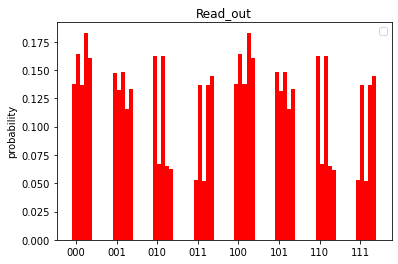

In [22]:
N = 8

ind = np.arange(N) 
width = 0.1       

for i, j in enumerate(all_red_out):
    plt.bar(ind+i*width, all_red_out[i], width, color='r')

plt.ylabel('probability')
plt.title('Read_out')

plt.xticks(ind + width / 2, ('000', '001', '010', '011','100','101','110','111'))
plt.legend(loc='best')
plt.show()

In [23]:
all_blue_out=[]

for i, j in enumerate(X_Blue):
    
    blue_state = X_Blue[i];
    
    my_circuit_blue = circuit (*result.x,blue_state[0],blue_state[1],blue_state[2])
    
    outvector1 = run_and_process(my_circuit_blue)
    
    all_blue_out.append(np.conjugate(outvector1)*outvector1)

In [24]:
result.x

array([ 0.933451  ,  0.88287527,  1.02629418,  1.26823661,  0.92486106,
        1.07553038,  1.05348194,  0.04350577, -0.43730605, -0.01103785,
        1.55091538,  0.61829395,  1.56210673,  0.02964823,  0.02740627])

No handles with labels found to put in legend.


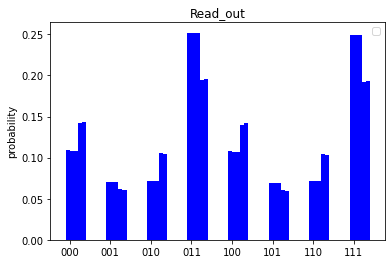

In [25]:
N = 8

ind = np.arange(N) 
width = 0.1       

for i, j in enumerate(all_blue_out):
    plt.bar(ind+i*width, all_blue_out[i], width, color='b')

plt.ylabel('probability')
plt.title('Read_out')

plt.xticks(ind + width / 2, ('000', '001', '010', '011','100','101','110','111'))
plt.legend(loc='best')
plt.show()

In [26]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(all_blue_out, pretext="\\text{possible read-outs}=")

<IPython.core.display.Math object>

In [27]:
def post_circuit(circuit: QuantumCircuit, 
                 alpha1: float, alpha2: float, alpha3: float, 
                 alpha4: float, alpha5: float, alpha6: float,
                 alpha7: float, alpha8: float, alpha9: float,
                 beta12z1: float, beta12y2: float, beta12z3: float,
                 beta23z1: float, beta23y2: float, beta23z3: float,
                 input1: float, input2: float, input3: float):
    


    circ = circuit(alpha1, alpha2, alpha3, 
                   alpha4, alpha5, alpha6,
                   alpha7, alpha8, alpha9,
                   beta12z1, beta12y2, beta12z3,
                   beta23z1, beta23y2, beta23z3,
                   input1, input2, input3).copy()
    
    qreg = circ.qregs[0]
    creg = circ.cregs[0]
    
    
    circ.barrier()
    
    circ.cz(qreg[0],qreg[1])

  #  circ.measure(qreg[0],creg[0])
  #  circ.measure(qreg[1],creg[1])
  # circ.measure(qreg[2],creg[2])
    
    return circ



In [28]:
my_post_circuit_red = post_circuit (circuit,*result.x,red_state[0],red_state[1],red_state[2])


In [29]:
my_post_circuit_blue = post_circuit (circuit,*result.x,blue_state[0],blue_state[1],blue_state[2])


In [30]:
"""Function to execute the circuit and do the postprocessing."""
def run_and_process_matrix(circuit: QuantumCircuit) -> list:
    
    
    # Execute the circuit
    
    simulator = Aer.get_backend('unitary_simulator')
    result = execute(circuit,backend = simulator).result()
    
    unitary = result.get_unitary(circuit)

    #statevector = result.get_statevector(circuit)
    
    #print(statevector)the postprocessing
    
   # out_vector=[]

   # for i,j in enumerate(statevector):
        
   #     out_vector.append(j)
    
    return unitary


In [31]:
red_state = X_Red[1]

def set_ref_matrix(red_state):
    my_circuit_red = circuit (*result.x,red_state[0],red_state[1],red_state[2])
    postoutvector1_matrix = run_and_process_matrix(my_circuit_red)
    from qiskit_textbook.tools import array_to_latex
    array_to_latex(postoutvector1_matrix, pretext="\\text{statevector}=")
    
    return postoutvector1_matrix

postoutvector1_matrix = set_ref_matrix(red_state)


<IPython.core.display.Math object>

In [32]:
red_state

array([0.08482835, 0.74435814, 0.66237082])

In [33]:
# building reference_circuit

def build_ref_circuit(postoutvector1_matrix):
    controls = QuantumRegister(7)
    op_circuit = QuantumCircuit(controls)
    cx = Operator(postoutvector1_matrix)
    op_circuit.unitary(cx, [1, 2, 3], label='cx')
    ck = op_circuit.decompose()
    print(ck)
    
    return ck, controls
    
ck, controls = build_ref_circuit(postoutvector1_matrix)

                        
q198318_0: ─────────────
           ┌───────────┐
q198318_1: ┤0          ├
           │           │
q198318_2: ┤1 ISOMETRY ├
           │           │
q198318_3: ┤2          ├
           └───────────┘
q198318_4: ─────────────
                        
q198318_5: ─────────────
                        
q198318_6: ─────────────
                        


In [34]:
# input circuit

state = X_Red[1]

def input_circuit(state, controls):
    sub_circ = circuit (*result.x,*state)
    sub_inst = sub_circ.to_instruction()
    ck.append(sub_inst, [controls[4], controls[5], controls[6]])
    print(sub_inst)
    
    return sub_inst,sub_circ

sub_inst, sub_circ = input_circuit(state, controls)

In [35]:
red_state

array([0.08482835, 0.74435814, 0.66237082])

In [36]:
# testing output of subcircuit
simulator = Aer.get_backend('unitary_simulator')
v_result = execute(sub_circ,backend = simulator).result()
v_unitary = v_result.get_unitary(sub_circ)

In [37]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(v_unitary, pretext="\\text{statevector}=")

<IPython.core.display.Math object>

In [38]:
def build_h_test(postoutvector1_matrix,sub_inst):
    c_q = QuantumRegister(7)
    c_cl = ClassicalRegister(7)
    test = QuantumCircuit(c_q,c_cl)
    
    cx = Operator(postoutvector1_matrix)
    test.unitary(cx, [1, 2, 3], label='cx')
    test.append(sub_inst, [c_q[4], c_q[5], c_q[6]],[c_cl[4],c_cl[5],c_cl[6]])
    
    test.barrier()
    test.h(c_q[0])
    test.cswap(c_q[0],c_q[1],c_q[4])
    test.cswap(c_q[0],c_q[2],c_q[5])
    test.cswap(c_q[0],c_q[3],c_q[6])
    test.h(c_q[0])
    
    
    
    #test.measure(c_q[0],c_cl[0])
    #test.x(c_q[0])
    print(test)
    
    return test

test = build_h_test(postoutvector1_matrix,sub_inst)


                             ░ ┌───┐         ┌───┐
q198324_0: ──────────────────░─┤ H ├─■──■──■─┤ H ├
                ┌─────┐      ░ └───┘ │  │  │ └───┘
q198324_1: ─────┤0    ├──────░───────X──┼──┼──────
                │     │      ░       │  │  │      
q198324_2: ─────┤1 cx ├──────░───────┼──X──┼──────
                │     │      ░       │  │  │      
q198324_3: ─────┤2    ├──────░───────┼──┼──X──────
           ┌────┴─────┴────┐ ░       │  │  │      
q198324_4: ┤0              ├─░───────X──┼──┼──────
           │               │ ░          │  │      
q198324_5: ┤1              ├─░──────────X──┼──────
           │               │ ░             │      
q198324_6: ┤2              ├─░─────────────X──────
           │               │ ░                    
 c25875_0: ╡               ╞══════════════════════
           │               │                      
 c25875_1: ╡               ╞══════════════════════
           │  circuit69072 │                      
 c25875_2: ╡               ╞═══

C:\Users\Jae-EunPark\Anaconda3\lib\site-packages\qiskit\visualization\text.py:568: RuntimeWarning: The parameter "cregbundle" was disable, since an instruction needs to refer to individual classical wires
  return "\n".join(self.lines()).encode(self.encoding).decode(self.encoding)


In [39]:
def perform_h_test(test):
    simulator = Aer.get_backend('statevector_simulator')
    out_put = execute(test,backend = simulator).result()
    statevector = out_put.get_statevector(test)
    H_out = np.outer(statevector, np.conj(statevector))
    rho_sub_blue = partial_trace(H_out, [1,2,3,4,5,6]).data
    ancilla_density_mat_diag_red = np.diag(rho_sub_blue)
    print(ancilla_density_mat_diag_red)
    
    return ancilla_density_mat_diag_red

ancilla_density_mat_diag_red = perform_h_test(test)

[1.00000000e+00+0.j 6.23303233e-32+0.j]


In [40]:
np.abs(np.cos(np.pi*ancilla_density_mat_diag_red[0]))

1.0

In [41]:
# Serial Overlap

In [42]:
ref_dagger_matrix=postoutvector1_matrix.conjugate().transpose()
array_to_latex(ref_dagger_matrix, pretext="\\text{statevector}=")

<IPython.core.display.Math object>

In [43]:
# new circuit serial connection --  input followed by referecne U dagger


In [44]:
def serial_overlap(postoutvector1_matrix, sub_inst):
    
    ref_dagger_matrix=postoutvector1_matrix.conjugate().transpose()
    
    ud_q = QuantumRegister(3)
    ud_c = ClassicalRegister(3)

    ud_circuit = QuantumCircuit(ud_q,ud_c)

    ud_cx = Operator(ref_dagger_matrix)

    ud_circuit.unitary(ud_cx,[0,1, 2], [0,1, 2])


    ud_ck = ud_circuit.decompose()

    ud_ck.append(sub_inst, [0, 1, 2],[0,1, 2])
    
    print(ud_ck)
    
    
    simulator = Aer.get_backend('statevector_simulator')
    ud_out_put = execute(ud_ck,backend = simulator).result()
    statevector = ud_out_put.get_statevector(ud_ck)
    array_to_latex(np.conjugate(statevector)*statevector, pretext="\\text{statevector}=")
    
    return  ud_ck, ud_c, statevector
    
ud_ck, ud_c, statevector = serial_overlap(ref_dagger_matrix, sub_inst)


           ┌───────────┐┌───────────────┐
q198332_0: ┤0          ├┤0              ├
           │           ││               │
q198332_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198332_2: ┤2          ├┤2              ├
           └───────────┘│  circuit69072 │
 c25876_0: ═════════════╡0              ╞
                        │               │
 c25876_1: ═════════════╡1              ╞
                        │               │
 c25876_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

In [45]:
serial_overlap

<function __main__.serial_overlap(postoutvector1_matrix, sub_inst)>

In [46]:
np.vdot(statevector,statevector)

(1.000000000000003+0j)

In [47]:
arr=np.conjugate(statevector)*statevector
arr[0]

(0.027912745075875225+0j)

In [48]:
import math

In [49]:

# input parameter

All_sample=np.append(X_Red,X_Blue, axis=0)
Readout =[]

for k, l in enumerate(All_sample):
    
    
    Test_all = 1
    
    if Test_all == 1:
        
        one_ref_sample = All_sample[k]
    else:
        
        one_ref_sample = All_sample[0]
     #   All_state = X_Red
    #state = X_Red[5]
    #state = sample_test_ab[8]

    
    
    Row_Readout = []
    
    for i, j in enumerate(All_sample):
        
        
        red_state = All_sample[i]
        print("Refernece",red_state)
        postoutvector1_matrix = set_ref_matrix(red_state)
        
        H_test=0
        
        if H_test==1:
            
            ck, controls = build_ref_circuit(postoutvector1_matrix)
            print("input",one_ref_sample)
            sub_inst, _ = input_circuit(one_ref_sample, controls)
            test = build_h_test(postoutvector1_matrix,sub_inst)
            ancilla_density_mat_diag_red = perform_h_test(test)
            arr_h = np.abs(np.cos(np.pi*ancilla_density_mat_diag_red[0]))
            Row_Readout.append(arr_h)
        else:
            
            sub_inst, _ = input_circuit(one_ref_sample, controls)
            ud_ck, ud_c, statevector = serial_overlap(postoutvector1_matrix, sub_inst)
            arr = np.conjugate(statevector)*statevector
            Row_Readout.append(round(arr[0].real,3))
    
    Readout.append(Row_Readout)
    if Test_all ==0:
        break
    

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q198455_0: ┤0          ├┤0              ├
           │           ││               │
q198455_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198455_2: ┤2          ├┤2              ├
           └───────────┘│  circuit69280 │
 c25879_0: ═════════════╡0              ╞
                        │               │
 c25879_1: ═════════════╡1              ╞
                        │               │
 c25879_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q198578_0: ┤0          ├┤0              ├
           │           ││               │
q198578_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198578_2: ┤2          ├┤2              ├
           └───────────┘│  circuit69485 │
 c25882_0: ═════════════╡0              ╞
                        │               │
 c25882_1: ═════════════╡1              ╞
                        │               │
 c25882_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q198701_0: ┤0          ├┤0              ├
           │           ││               │
q198701_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198701_2: ┤2          ├┤2              ├
           └───────────┘│  circuit69690 │
 c25885_0: ═════════════╡0              ╞
                        │               │
 c25885_1: ═════════════╡1              ╞
                        │               │
 c25885_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q198824_0: ┤0          ├┤0              ├
           │           ││               │
q198824_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198824_2: ┤2          ├┤2              ├
           └───────────┘│  circuit69895 │
 c25888_0: ═════════════╡0              ╞
                        │               │
 c25888_1: ═════════════╡1              ╞
                        │               │
 c25888_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q198947_0: ┤0          ├┤0              ├
           │           ││               │
q198947_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q198947_2: ┤2          ├┤2              ├
           └───────────┘│  circuit70100 │
 c25891_0: ═════════════╡0              ╞
                        │               │
 c25891_1: ═════════════╡1              ╞
                        │               │
 c25891_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199070_0: ┤0          ├┤0              ├
           │           ││               │
q199070_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199070_2: ┤2          ├┤2              ├
           └───────────┘│  circuit70305 │
 c25894_0: ═════════════╡0              ╞
                        │               │
 c25894_1: ═════════════╡1              ╞
                        │               │
 c25894_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199193_0: ┤0          ├┤0              ├
           │           ││               │
q199193_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199193_2: ┤2          ├┤2              ├
           └───────────┘│  circuit70510 │
 c25897_0: ═════════════╡0              ╞
                        │               │
 c25897_1: ═════════════╡1              ╞
                        │               │
 c25897_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199316_0: ┤0          ├┤0              ├
           │           ││               │
q199316_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199316_2: ┤2          ├┤2              ├
           └───────────┘│  circuit70715 │
 c25900_0: ═════════════╡0              ╞
                        │               │
 c25900_1: ═════════════╡1              ╞
                        │               │
 c25900_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199439_0: ┤0          ├┤0              ├
           │           ││               │
q199439_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199439_2: ┤2          ├┤2              ├
           └───────────┘│  circuit70920 │
 c25903_0: ═════════════╡0              ╞
                        │               │
 c25903_1: ═════════════╡1              ╞
                        │               │
 c25903_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199562_0: ┤0          ├┤0              ├
           │           ││               │
q199562_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199562_2: ┤2          ├┤2              ├
           └───────────┘│  circuit71125 │
 c25906_0: ═════════════╡0              ╞
                        │               │
 c25906_1: ═════════════╡1              ╞
                        │               │
 c25906_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199685_0: ┤0          ├┤0              ├
           │           ││               │
q199685_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199685_2: ┤2          ├┤2              ├
           └───────────┘│  circuit71330 │
 c25909_0: ═════════════╡0              ╞
                        │               │
 c25909_1: ═════════════╡1              ╞
                        │               │
 c25909_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199808_0: ┤0          ├┤0              ├
           │           ││               │
q199808_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199808_2: ┤2          ├┤2              ├
           └───────────┘│  circuit71535 │
 c25912_0: ═════════════╡0              ╞
                        │               │
 c25912_1: ═════════════╡1              ╞
                        │               │
 c25912_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q199931_0: ┤0          ├┤0              ├
           │           ││               │
q199931_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q199931_2: ┤2          ├┤2              ├
           └───────────┘│  circuit71740 │
 c25915_0: ═════════════╡0              ╞
                        │               │
 c25915_1: ═════════════╡1              ╞
                        │               │
 c25915_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200054_0: ┤0          ├┤0              ├
           │           ││               │
q200054_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200054_2: ┤2          ├┤2              ├
           └───────────┘│  circuit71945 │
 c25918_0: ═════════════╡0              ╞
                        │               │
 c25918_1: ═════════════╡1              ╞
                        │               │
 c25918_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200177_0: ┤0          ├┤0              ├
           │           ││               │
q200177_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200177_2: ┤2          ├┤2              ├
           └───────────┘│  circuit72150 │
 c25921_0: ═════════════╡0              ╞
                        │               │
 c25921_1: ═════════════╡1              ╞
                        │               │
 c25921_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200300_0: ┤0          ├┤0              ├
           │           ││               │
q200300_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200300_2: ┤2          ├┤2              ├
           └───────────┘│  circuit72355 │
 c25924_0: ═════════════╡0              ╞
                        │               │
 c25924_1: ═════════════╡1              ╞
                        │               │
 c25924_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200423_0: ┤0          ├┤0              ├
           │           ││               │
q200423_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200423_2: ┤2          ├┤2              ├
           └───────────┘│  circuit72560 │
 c25927_0: ═════════════╡0              ╞
                        │               │
 c25927_1: ═════════════╡1              ╞
                        │               │
 c25927_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200546_0: ┤0          ├┤0              ├
           │           ││               │
q200546_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200546_2: ┤2          ├┤2              ├
           └───────────┘│  circuit72765 │
 c25930_0: ═════════════╡0              ╞
                        │               │
 c25930_1: ═════════════╡1              ╞
                        │               │
 c25930_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200669_0: ┤0          ├┤0              ├
           │           ││               │
q200669_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200669_2: ┤2          ├┤2              ├
           └───────────┘│  circuit72970 │
 c25933_0: ═════════════╡0              ╞
                        │               │
 c25933_1: ═════════════╡1              ╞
                        │               │
 c25933_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200792_0: ┤0          ├┤0              ├
           │           ││               │
q200792_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200792_2: ┤2          ├┤2              ├
           └───────────┘│  circuit73175 │
 c25936_0: ═════════════╡0              ╞
                        │               │
 c25936_1: ═════════════╡1              ╞
                        │               │
 c25936_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q200915_0: ┤0          ├┤0              ├
           │           ││               │
q200915_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q200915_2: ┤2          ├┤2              ├
           └───────────┘│  circuit73380 │
 c25939_0: ═════════════╡0              ╞
                        │               │
 c25939_1: ═════════════╡1              ╞
                        │               │
 c25939_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201038_0: ┤0          ├┤0              ├
           │           ││               │
q201038_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201038_2: ┤2          ├┤2              ├
           └───────────┘│  circuit73585 │
 c25942_0: ═════════════╡0              ╞
                        │               │
 c25942_1: ═════════════╡1              ╞
                        │               │
 c25942_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201161_0: ┤0          ├┤0              ├
           │           ││               │
q201161_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201161_2: ┤2          ├┤2              ├
           └───────────┘│  circuit73790 │
 c25945_0: ═════════════╡0              ╞
                        │               │
 c25945_1: ═════════════╡1              ╞
                        │               │
 c25945_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201284_0: ┤0          ├┤0              ├
           │           ││               │
q201284_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201284_2: ┤2          ├┤2              ├
           └───────────┘│  circuit73995 │
 c25948_0: ═════════════╡0              ╞
                        │               │
 c25948_1: ═════════════╡1              ╞
                        │               │
 c25948_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201407_0: ┤0          ├┤0              ├
           │           ││               │
q201407_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201407_2: ┤2          ├┤2              ├
           └───────────┘│  circuit74200 │
 c25951_0: ═════════════╡0              ╞
                        │               │
 c25951_1: ═════════════╡1              ╞
                        │               │
 c25951_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201530_0: ┤0          ├┤0              ├
           │           ││               │
q201530_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201530_2: ┤2          ├┤2              ├
           └───────────┘│  circuit74405 │
 c25954_0: ═════════════╡0              ╞
                        │               │
 c25954_1: ═════════════╡1              ╞
                        │               │
 c25954_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201653_0: ┤0          ├┤0              ├
           │           ││               │
q201653_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201653_2: ┤2          ├┤2              ├
           └───────────┘│  circuit74610 │
 c25957_0: ═════════════╡0              ╞
                        │               │
 c25957_1: ═════════════╡1              ╞
                        │               │
 c25957_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201776_0: ┤0          ├┤0              ├
           │           ││               │
q201776_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201776_2: ┤2          ├┤2              ├
           └───────────┘│  circuit74815 │
 c25960_0: ═════════════╡0              ╞
                        │               │
 c25960_1: ═════════════╡1              ╞
                        │               │
 c25960_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q201899_0: ┤0          ├┤0              ├
           │           ││               │
q201899_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q201899_2: ┤2          ├┤2              ├
           └───────────┘│  circuit75020 │
 c25963_0: ═════════════╡0              ╞
                        │               │
 c25963_1: ═════════════╡1              ╞
                        │               │
 c25963_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202022_0: ┤0          ├┤0              ├
           │           ││               │
q202022_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202022_2: ┤2          ├┤2              ├
           └───────────┘│  circuit75225 │
 c25966_0: ═════════════╡0              ╞
                        │               │
 c25966_1: ═════════════╡1              ╞
                        │               │
 c25966_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202145_0: ┤0          ├┤0              ├
           │           ││               │
q202145_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202145_2: ┤2          ├┤2              ├
           └───────────┘│  circuit75430 │
 c25969_0: ═════════════╡0              ╞
                        │               │
 c25969_1: ═════════════╡1              ╞
                        │               │
 c25969_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202268_0: ┤0          ├┤0              ├
           │           ││               │
q202268_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202268_2: ┤2          ├┤2              ├
           └───────────┘│  circuit75635 │
 c25972_0: ═════════════╡0              ╞
                        │               │
 c25972_1: ═════════════╡1              ╞
                        │               │
 c25972_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202391_0: ┤0          ├┤0              ├
           │           ││               │
q202391_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202391_2: ┤2          ├┤2              ├
           └───────────┘│  circuit75840 │
 c25975_0: ═════════════╡0              ╞
                        │               │
 c25975_1: ═════════════╡1              ╞
                        │               │
 c25975_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202514_0: ┤0          ├┤0              ├
           │           ││               │
q202514_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202514_2: ┤2          ├┤2              ├
           └───────────┘│  circuit76045 │
 c25978_0: ═════════════╡0              ╞
                        │               │
 c25978_1: ═════════════╡1              ╞
                        │               │
 c25978_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202637_0: ┤0          ├┤0              ├
           │           ││               │
q202637_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202637_2: ┤2          ├┤2              ├
           └───────────┘│  circuit76250 │
 c25981_0: ═════════════╡0              ╞
                        │               │
 c25981_1: ═════════════╡1              ╞
                        │               │
 c25981_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202760_0: ┤0          ├┤0              ├
           │           ││               │
q202760_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202760_2: ┤2          ├┤2              ├
           └───────────┘│  circuit76455 │
 c25984_0: ═════════════╡0              ╞
                        │               │
 c25984_1: ═════════════╡1              ╞
                        │               │
 c25984_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q202883_0: ┤0          ├┤0              ├
           │           ││               │
q202883_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q202883_2: ┤2          ├┤2              ├
           └───────────┘│  circuit76660 │
 c25987_0: ═════════════╡0              ╞
                        │               │
 c25987_1: ═════════════╡1              ╞
                        │               │
 c25987_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203006_0: ┤0          ├┤0              ├
           │           ││               │
q203006_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203006_2: ┤2          ├┤2              ├
           └───────────┘│  circuit76865 │
 c25990_0: ═════════════╡0              ╞
                        │               │
 c25990_1: ═════════════╡1              ╞
                        │               │
 c25990_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203129_0: ┤0          ├┤0              ├
           │           ││               │
q203129_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203129_2: ┤2          ├┤2              ├
           └───────────┘│  circuit77070 │
 c25993_0: ═════════════╡0              ╞
                        │               │
 c25993_1: ═════════════╡1              ╞
                        │               │
 c25993_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203252_0: ┤0          ├┤0              ├
           │           ││               │
q203252_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203252_2: ┤2          ├┤2              ├
           └───────────┘│  circuit77275 │
 c25996_0: ═════════════╡0              ╞
                        │               │
 c25996_1: ═════════════╡1              ╞
                        │               │
 c25996_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203375_0: ┤0          ├┤0              ├
           │           ││               │
q203375_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203375_2: ┤2          ├┤2              ├
           └───────────┘│  circuit77480 │
 c25999_0: ═════════════╡0              ╞
                        │               │
 c25999_1: ═════════════╡1              ╞
                        │               │
 c25999_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203498_0: ┤0          ├┤0              ├
           │           ││               │
q203498_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203498_2: ┤2          ├┤2              ├
           └───────────┘│  circuit77685 │
 c26002_0: ═════════════╡0              ╞
                        │               │
 c26002_1: ═════════════╡1              ╞
                        │               │
 c26002_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203621_0: ┤0          ├┤0              ├
           │           ││               │
q203621_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203621_2: ┤2          ├┤2              ├
           └───────────┘│  circuit77890 │
 c26005_0: ═════════════╡0              ╞
                        │               │
 c26005_1: ═════════════╡1              ╞
                        │               │
 c26005_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203744_0: ┤0          ├┤0              ├
           │           ││               │
q203744_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203744_2: ┤2          ├┤2              ├
           └───────────┘│  circuit78095 │
 c26008_0: ═════════════╡0              ╞
                        │               │
 c26008_1: ═════════════╡1              ╞
                        │               │
 c26008_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203867_0: ┤0          ├┤0              ├
           │           ││               │
q203867_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203867_2: ┤2          ├┤2              ├
           └───────────┘│  circuit78300 │
 c26011_0: ═════════════╡0              ╞
                        │               │
 c26011_1: ═════════════╡1              ╞
                        │               │
 c26011_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q203990_0: ┤0          ├┤0              ├
           │           ││               │
q203990_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q203990_2: ┤2          ├┤2              ├
           └───────────┘│  circuit78505 │
 c26014_0: ═════════════╡0              ╞
                        │               │
 c26014_1: ═════════════╡1              ╞
                        │               │
 c26014_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204113_0: ┤0          ├┤0              ├
           │           ││               │
q204113_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204113_2: ┤2          ├┤2              ├
           └───────────┘│  circuit78710 │
 c26017_0: ═════════════╡0              ╞
                        │               │
 c26017_1: ═════════════╡1              ╞
                        │               │
 c26017_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204236_0: ┤0          ├┤0              ├
           │           ││               │
q204236_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204236_2: ┤2          ├┤2              ├
           └───────────┘│  circuit78915 │
 c26020_0: ═════════════╡0              ╞
                        │               │
 c26020_1: ═════════════╡1              ╞
                        │               │
 c26020_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204359_0: ┤0          ├┤0              ├
           │           ││               │
q204359_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204359_2: ┤2          ├┤2              ├
           └───────────┘│  circuit79120 │
 c26023_0: ═════════════╡0              ╞
                        │               │
 c26023_1: ═════════════╡1              ╞
                        │               │
 c26023_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204482_0: ┤0          ├┤0              ├
           │           ││               │
q204482_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204482_2: ┤2          ├┤2              ├
           └───────────┘│  circuit79325 │
 c26026_0: ═════════════╡0              ╞
                        │               │
 c26026_1: ═════════════╡1              ╞
                        │               │
 c26026_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204605_0: ┤0          ├┤0              ├
           │           ││               │
q204605_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204605_2: ┤2          ├┤2              ├
           └───────────┘│  circuit79530 │
 c26029_0: ═════════════╡0              ╞
                        │               │
 c26029_1: ═════════════╡1              ╞
                        │               │
 c26029_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204728_0: ┤0          ├┤0              ├
           │           ││               │
q204728_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204728_2: ┤2          ├┤2              ├
           └───────────┘│  circuit79735 │
 c26032_0: ═════════════╡0              ╞
                        │               │
 c26032_1: ═════════════╡1              ╞
                        │               │
 c26032_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204851_0: ┤0          ├┤0              ├
           │           ││               │
q204851_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204851_2: ┤2          ├┤2              ├
           └───────────┘│  circuit79940 │
 c26035_0: ═════════════╡0              ╞
                        │               │
 c26035_1: ═════════════╡1              ╞
                        │               │
 c26035_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q204974_0: ┤0          ├┤0              ├
           │           ││               │
q204974_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q204974_2: ┤2          ├┤2              ├
           └───────────┘│  circuit80145 │
 c26038_0: ═════════════╡0              ╞
                        │               │
 c26038_1: ═════════════╡1              ╞
                        │               │
 c26038_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205097_0: ┤0          ├┤0              ├
           │           ││               │
q205097_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205097_2: ┤2          ├┤2              ├
           └───────────┘│  circuit80350 │
 c26041_0: ═════════════╡0              ╞
                        │               │
 c26041_1: ═════════════╡1              ╞
                        │               │
 c26041_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205220_0: ┤0          ├┤0              ├
           │           ││               │
q205220_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205220_2: ┤2          ├┤2              ├
           └───────────┘│  circuit80555 │
 c26044_0: ═════════════╡0              ╞
                        │               │
 c26044_1: ═════════════╡1              ╞
                        │               │
 c26044_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205343_0: ┤0          ├┤0              ├
           │           ││               │
q205343_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205343_2: ┤2          ├┤2              ├
           └───────────┘│  circuit80760 │
 c26047_0: ═════════════╡0              ╞
                        │               │
 c26047_1: ═════════════╡1              ╞
                        │               │
 c26047_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205466_0: ┤0          ├┤0              ├
           │           ││               │
q205466_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205466_2: ┤2          ├┤2              ├
           └───────────┘│  circuit80965 │
 c26050_0: ═════════════╡0              ╞
                        │               │
 c26050_1: ═════════════╡1              ╞
                        │               │
 c26050_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205589_0: ┤0          ├┤0              ├
           │           ││               │
q205589_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205589_2: ┤2          ├┤2              ├
           └───────────┘│  circuit81170 │
 c26053_0: ═════════════╡0              ╞
                        │               │
 c26053_1: ═════════════╡1              ╞
                        │               │
 c26053_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205712_0: ┤0          ├┤0              ├
           │           ││               │
q205712_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205712_2: ┤2          ├┤2              ├
           └───────────┘│  circuit81375 │
 c26056_0: ═════════════╡0              ╞
                        │               │
 c26056_1: ═════════════╡1              ╞
                        │               │
 c26056_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205835_0: ┤0          ├┤0              ├
           │           ││               │
q205835_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205835_2: ┤2          ├┤2              ├
           └───────────┘│  circuit81580 │
 c26059_0: ═════════════╡0              ╞
                        │               │
 c26059_1: ═════════════╡1              ╞
                        │               │
 c26059_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q205958_0: ┤0          ├┤0              ├
           │           ││               │
q205958_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q205958_2: ┤2          ├┤2              ├
           └───────────┘│  circuit81785 │
 c26062_0: ═════════════╡0              ╞
                        │               │
 c26062_1: ═════════════╡1              ╞
                        │               │
 c26062_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206081_0: ┤0          ├┤0              ├
           │           ││               │
q206081_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206081_2: ┤2          ├┤2              ├
           └───────────┘│  circuit81990 │
 c26065_0: ═════════════╡0              ╞
                        │               │
 c26065_1: ═════════════╡1              ╞
                        │               │
 c26065_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206204_0: ┤0          ├┤0              ├
           │           ││               │
q206204_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206204_2: ┤2          ├┤2              ├
           └───────────┘│  circuit82195 │
 c26068_0: ═════════════╡0              ╞
                        │               │
 c26068_1: ═════════════╡1              ╞
                        │               │
 c26068_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206327_0: ┤0          ├┤0              ├
           │           ││               │
q206327_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206327_2: ┤2          ├┤2              ├
           └───────────┘│  circuit82400 │
 c26071_0: ═════════════╡0              ╞
                        │               │
 c26071_1: ═════════════╡1              ╞
                        │               │
 c26071_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206450_0: ┤0          ├┤0              ├
           │           ││               │
q206450_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206450_2: ┤2          ├┤2              ├
           └───────────┘│  circuit82605 │
 c26074_0: ═════════════╡0              ╞
                        │               │
 c26074_1: ═════════════╡1              ╞
                        │               │
 c26074_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206573_0: ┤0          ├┤0              ├
           │           ││               │
q206573_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206573_2: ┤2          ├┤2              ├
           └───────────┘│  circuit82810 │
 c26077_0: ═════════════╡0              ╞
                        │               │
 c26077_1: ═════════════╡1              ╞
                        │               │
 c26077_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206696_0: ┤0          ├┤0              ├
           │           ││               │
q206696_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206696_2: ┤2          ├┤2              ├
           └───────────┘│  circuit83015 │
 c26080_0: ═════════════╡0              ╞
                        │               │
 c26080_1: ═════════════╡1              ╞
                        │               │
 c26080_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206819_0: ┤0          ├┤0              ├
           │           ││               │
q206819_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206819_2: ┤2          ├┤2              ├
           └───────────┘│  circuit83220 │
 c26083_0: ═════════════╡0              ╞
                        │               │
 c26083_1: ═════════════╡1              ╞
                        │               │
 c26083_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q206942_0: ┤0          ├┤0              ├
           │           ││               │
q206942_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q206942_2: ┤2          ├┤2              ├
           └───────────┘│  circuit83425 │
 c26086_0: ═════════════╡0              ╞
                        │               │
 c26086_1: ═════════════╡1              ╞
                        │               │
 c26086_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207065_0: ┤0          ├┤0              ├
           │           ││               │
q207065_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207065_2: ┤2          ├┤2              ├
           └───────────┘│  circuit83630 │
 c26089_0: ═════════════╡0              ╞
                        │               │
 c26089_1: ═════════════╡1              ╞
                        │               │
 c26089_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207188_0: ┤0          ├┤0              ├
           │           ││               │
q207188_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207188_2: ┤2          ├┤2              ├
           └───────────┘│  circuit83835 │
 c26092_0: ═════════════╡0              ╞
                        │               │
 c26092_1: ═════════════╡1              ╞
                        │               │
 c26092_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207311_0: ┤0          ├┤0              ├
           │           ││               │
q207311_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207311_2: ┤2          ├┤2              ├
           └───────────┘│  circuit84040 │
 c26095_0: ═════════════╡0              ╞
                        │               │
 c26095_1: ═════════════╡1              ╞
                        │               │
 c26095_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207434_0: ┤0          ├┤0              ├
           │           ││               │
q207434_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207434_2: ┤2          ├┤2              ├
           └───────────┘│  circuit84245 │
 c26098_0: ═════════════╡0              ╞
                        │               │
 c26098_1: ═════════════╡1              ╞
                        │               │
 c26098_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207557_0: ┤0          ├┤0              ├
           │           ││               │
q207557_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207557_2: ┤2          ├┤2              ├
           └───────────┘│  circuit84450 │
 c26101_0: ═════════════╡0              ╞
                        │               │
 c26101_1: ═════════════╡1              ╞
                        │               │
 c26101_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207680_0: ┤0          ├┤0              ├
           │           ││               │
q207680_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207680_2: ┤2          ├┤2              ├
           └───────────┘│  circuit84655 │
 c26104_0: ═════════════╡0              ╞
                        │               │
 c26104_1: ═════════════╡1              ╞
                        │               │
 c26104_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207803_0: ┤0          ├┤0              ├
           │           ││               │
q207803_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207803_2: ┤2          ├┤2              ├
           └───────────┘│  circuit84860 │
 c26107_0: ═════════════╡0              ╞
                        │               │
 c26107_1: ═════════════╡1              ╞
                        │               │
 c26107_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q207926_0: ┤0          ├┤0              ├
           │           ││               │
q207926_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q207926_2: ┤2          ├┤2              ├
           └───────────┘│  circuit85065 │
 c26110_0: ═════════════╡0              ╞
                        │               │
 c26110_1: ═════════════╡1              ╞
                        │               │
 c26110_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208049_0: ┤0          ├┤0              ├
           │           ││               │
q208049_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208049_2: ┤2          ├┤2              ├
           └───────────┘│  circuit85270 │
 c26113_0: ═════════════╡0              ╞
                        │               │
 c26113_1: ═════════════╡1              ╞
                        │               │
 c26113_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208172_0: ┤0          ├┤0              ├
           │           ││               │
q208172_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208172_2: ┤2          ├┤2              ├
           └───────────┘│  circuit85475 │
 c26116_0: ═════════════╡0              ╞
                        │               │
 c26116_1: ═════════════╡1              ╞
                        │               │
 c26116_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208295_0: ┤0          ├┤0              ├
           │           ││               │
q208295_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208295_2: ┤2          ├┤2              ├
           └───────────┘│  circuit85680 │
 c26119_0: ═════════════╡0              ╞
                        │               │
 c26119_1: ═════════════╡1              ╞
                        │               │
 c26119_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208418_0: ┤0          ├┤0              ├
           │           ││               │
q208418_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208418_2: ┤2          ├┤2              ├
           └───────────┘│  circuit85885 │
 c26122_0: ═════════════╡0              ╞
                        │               │
 c26122_1: ═════════════╡1              ╞
                        │               │
 c26122_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208541_0: ┤0          ├┤0              ├
           │           ││               │
q208541_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208541_2: ┤2          ├┤2              ├
           └───────────┘│  circuit86090 │
 c26125_0: ═════════════╡0              ╞
                        │               │
 c26125_1: ═════════════╡1              ╞
                        │               │
 c26125_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208664_0: ┤0          ├┤0              ├
           │           ││               │
q208664_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208664_2: ┤2          ├┤2              ├
           └───────────┘│  circuit86295 │
 c26128_0: ═════════════╡0              ╞
                        │               │
 c26128_1: ═════════════╡1              ╞
                        │               │
 c26128_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208787_0: ┤0          ├┤0              ├
           │           ││               │
q208787_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208787_2: ┤2          ├┤2              ├
           └───────────┘│  circuit86500 │
 c26131_0: ═════════════╡0              ╞
                        │               │
 c26131_1: ═════════════╡1              ╞
                        │               │
 c26131_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q208910_0: ┤0          ├┤0              ├
           │           ││               │
q208910_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q208910_2: ┤2          ├┤2              ├
           └───────────┘│  circuit86705 │
 c26134_0: ═════════════╡0              ╞
                        │               │
 c26134_1: ═════════════╡1              ╞
                        │               │
 c26134_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209033_0: ┤0          ├┤0              ├
           │           ││               │
q209033_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209033_2: ┤2          ├┤2              ├
           └───────────┘│  circuit86910 │
 c26137_0: ═════════════╡0              ╞
                        │               │
 c26137_1: ═════════════╡1              ╞
                        │               │
 c26137_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209156_0: ┤0          ├┤0              ├
           │           ││               │
q209156_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209156_2: ┤2          ├┤2              ├
           └───────────┘│  circuit87115 │
 c26140_0: ═════════════╡0              ╞
                        │               │
 c26140_1: ═════════════╡1              ╞
                        │               │
 c26140_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209279_0: ┤0          ├┤0              ├
           │           ││               │
q209279_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209279_2: ┤2          ├┤2              ├
           └───────────┘│  circuit87320 │
 c26143_0: ═════════════╡0              ╞
                        │               │
 c26143_1: ═════════════╡1              ╞
                        │               │
 c26143_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209402_0: ┤0          ├┤0              ├
           │           ││               │
q209402_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209402_2: ┤2          ├┤2              ├
           └───────────┘│  circuit87525 │
 c26146_0: ═════════════╡0              ╞
                        │               │
 c26146_1: ═════════════╡1              ╞
                        │               │
 c26146_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209525_0: ┤0          ├┤0              ├
           │           ││               │
q209525_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209525_2: ┤2          ├┤2              ├
           └───────────┘│  circuit87730 │
 c26149_0: ═════════════╡0              ╞
                        │               │
 c26149_1: ═════════════╡1              ╞
                        │               │
 c26149_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209648_0: ┤0          ├┤0              ├
           │           ││               │
q209648_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209648_2: ┤2          ├┤2              ├
           └───────────┘│  circuit87935 │
 c26152_0: ═════════════╡0              ╞
                        │               │
 c26152_1: ═════════════╡1              ╞
                        │               │
 c26152_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209771_0: ┤0          ├┤0              ├
           │           ││               │
q209771_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209771_2: ┤2          ├┤2              ├
           └───────────┘│  circuit88140 │
 c26155_0: ═════════════╡0              ╞
                        │               │
 c26155_1: ═════════════╡1              ╞
                        │               │
 c26155_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q209894_0: ┤0          ├┤0              ├
           │           ││               │
q209894_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q209894_2: ┤2          ├┤2              ├
           └───────────┘│  circuit88345 │
 c26158_0: ═════════════╡0              ╞
                        │               │
 c26158_1: ═════════════╡1              ╞
                        │               │
 c26158_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210017_0: ┤0          ├┤0              ├
           │           ││               │
q210017_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210017_2: ┤2          ├┤2              ├
           └───────────┘│  circuit88550 │
 c26161_0: ═════════════╡0              ╞
                        │               │
 c26161_1: ═════════════╡1              ╞
                        │               │
 c26161_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210140_0: ┤0          ├┤0              ├
           │           ││               │
q210140_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210140_2: ┤2          ├┤2              ├
           └───────────┘│  circuit88755 │
 c26164_0: ═════════════╡0              ╞
                        │               │
 c26164_1: ═════════════╡1              ╞
                        │               │
 c26164_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210263_0: ┤0          ├┤0              ├
           │           ││               │
q210263_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210263_2: ┤2          ├┤2              ├
           └───────────┘│  circuit88960 │
 c26167_0: ═════════════╡0              ╞
                        │               │
 c26167_1: ═════════════╡1              ╞
                        │               │
 c26167_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210386_0: ┤0          ├┤0              ├
           │           ││               │
q210386_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210386_2: ┤2          ├┤2              ├
           └───────────┘│  circuit89165 │
 c26170_0: ═════════════╡0              ╞
                        │               │
 c26170_1: ═════════════╡1              ╞
                        │               │
 c26170_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210509_0: ┤0          ├┤0              ├
           │           ││               │
q210509_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210509_2: ┤2          ├┤2              ├
           └───────────┘│  circuit89370 │
 c26173_0: ═════════════╡0              ╞
                        │               │
 c26173_1: ═════════════╡1              ╞
                        │               │
 c26173_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210632_0: ┤0          ├┤0              ├
           │           ││               │
q210632_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210632_2: ┤2          ├┤2              ├
           └───────────┘│  circuit89575 │
 c26176_0: ═════════════╡0              ╞
                        │               │
 c26176_1: ═════════════╡1              ╞
                        │               │
 c26176_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

In [50]:
kernel_matrix = np.asarray(Readout)

In [52]:
tolerance = 1e-2
n = kernel_matrix.shape[1]

normal_y = np.where(normal_y,0,-1)
y_init = np.append(normal_y,abnormal_y)
y=y_init.T
H = np.outer(y, y) * kernel_matrix

f = -np.ones(y.shape)
scaling = np.sum(np.sqrt(f * f))
f /= scaling

import cvxpy

P = np.array(H)
q = np.array(f)
G = -np.eye(n)
I = np.eye(n)
h = np.zeros(n)
A = y.reshape(y.T.shape)
b = np.zeros((1, 1))
lambda2 = 0.0001

x = cvxpy.Variable(n)
prob = cvxpy.Problem(cvxpy.Minimize((1 / 2) * cvxpy.quad_form(x, P) + q.T@x + lambda2 * cvxpy.quad_form(x, I)),
        [G@x <= h,
         A@x == b])
prob.solve(verbose= True, qcp=True)
C_coef_result = np.asarray(x.value).reshape((n, 1))
alpha = C_coef_result * scaling
avg_y = np.sum(y)


-----------------------------------------------------------------
           OSQP v0.6.0  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2019
-----------------------------------------------------------------
problem:  variables n = 10, constraints m = 11
          nnz(P) + nnz(A) = 35
settings: linear system solver = qdldl,
          eps_abs = 1.0e-05, eps_rel = 1.0e-05,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 10000
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: on, time_limit: off

iter   objective    pri res    dua res    rho        time
   1  -7.7202e+00   1.62e-03   9.69e-02   1.00e-01   4.74e-05s
  50  -1.2500e+02   1.15e-07   1.02e-07   5.97e-06   9.22e-05s

status:               solved
solution polish:  

In [53]:
alpha

array([[ 5.00000508e+03],
       [ 5.00000508e+03],
       [ 5.00000508e+03],
       [ 5.00000508e+03],
       [ 5.00000508e+03],
       [-1.91056712e-07],
       [-1.91056734e-07],
       [-1.91056888e-07],
       [-2.88409472e-07],
       [-2.88410979e-07]])

In [54]:
scaling

10.0

In [56]:
# predict
        
#query_sample = All_sample[9]   

#query_sample =abnormal_x[2] 

query_sample = normal_x[3]
    
Row_Readout = []
    
for i, j in enumerate(All_sample):
    
    ref_samples = All_sample[i]
    print("Refernece",ref_samples)
    ref_matrix = set_ref_matrix(ref_samples)
    
    H_test=1
    
    if H_test==0:
        
        ck, controls = build_ref_circuit(ref_matrix)
        print("input",query_sample)
        sub_inst, _ = input_circuit(query_sample, controls)
        test = build_h_test(ref_matrix,sub_inst)
        ancilla_density_mat_diag_red = perform_h_test(test)
        arr_h = np.abs(np.cos(np.pi*ancilla_density_mat_diag_red[0]))
        Row_Readout.append(arr_h)
    else:
        sub_inst, _ = input_circuit(query_sample, controls)
        ud_ck, ud_c, statevector = serial_overlap(ref_matrix, sub_inst)
        arr = np.conjugate(statevector)*statevector
        Row_Readout.append(round(arr[0].real,3))

sum(alpha.T[0]*y*Row_Readout)        

Refernece [-0.23255606  0.77642925  0.58572629]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q210905_0: ┤0          ├┤0              ├
           │           ││               │
q210905_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q210905_2: ┤2          ├┤2              ├
           └───────────┘│  circuit89870 │
 c26209_0: ═════════════╡0              ╞
                        │               │
 c26209_1: ═════════════╡1              ╞
                        │               │
 c26209_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.08482835 0.74435814 0.66237082]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211028_0: ┤0          ├┤0              ├
           │           ││               │
q211028_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211028_2: ┤2          ├┤2              ├
           └───────────┘│  circuit90075 │
 c26212_0: ═════════════╡0              ╞
                        │               │
 c26212_1: ═════════════╡1              ╞
                        │               │
 c26212_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [-0.23150321  0.77737709  0.58488556]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211151_0: ┤0          ├┤0              ├
           │           ││               │
q211151_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211151_2: ┤2          ├┤2              ├
           └───────────┘│  circuit90280 │
 c26215_0: ═════════════╡0              ╞
                        │               │
 c26215_1: ═════════════╡1              ╞
                        │               │
 c26215_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.01016013 0.77642806 0.63012399]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211274_0: ┤0          ├┤0              ├
           │           ││               │
q211274_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211274_2: ┤2          ├┤2              ├
           └───────────┘│  circuit90485 │
 c26218_0: ═════════════╡0              ╞
                        │               │
 c26218_1: ═════════════╡1              ╞
                        │               │
 c26218_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [0.12505884 0.75612747 0.64236402]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211397_0: ┤0          ├┤0              ├
           │           ││               │
q211397_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211397_2: ┤2          ├┤2              ├
           └───────────┘│  circuit90690 │
 c26221_0: ═════════════╡0              ╞
                        │               │
 c26221_1: ═════════════╡1              ╞
                        │               │
 c26221_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.33980184 -0.43268678  0.83505501]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211520_0: ┤0          ├┤0              ├
           │           ││               │
q211520_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211520_2: ┤2          ├┤2              ├
           └───────────┘│  circuit90895 │
 c26224_0: ═════════════╡0              ╞
                        │               │
 c26224_1: ═════════════╡1              ╞
                        │               │
 c26224_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211643_0: ┤0          ├┤0              ├
           │           ││               │
q211643_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211643_2: ┤2          ├┤2              ├
           └───────────┘│  circuit91100 │
 c26227_0: ═════════════╡0              ╞
                        │               │
 c26227_1: ═════════════╡1              ╞
                        │               │
 c26227_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.34172394 -0.43513429  0.83299634]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211766_0: ┤0          ├┤0              ├
           │           ││               │
q211766_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211766_2: ┤2          ├┤2              ├
           └───────────┘│  circuit91305 │
 c26230_0: ═════════════╡0              ╞
                        │               │
 c26230_1: ═════════════╡1              ╞
                        │               │
 c26230_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01907973 -0.46094438  0.8872239 ]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q211889_0: ┤0          ├┤0              ├
           │           ││               │
q211889_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q211889_2: ┤2          ├┤2              ├
           └───────────┘│  circuit91510 │
 c26233_0: ═════════════╡0              ╞
                        │               │
 c26233_1: ═════════════╡1              ╞
                        │               │
 c26233_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

Refernece [ 0.01884865 -0.45536177  0.89010695]


<IPython.core.display.Math object>

           ┌───────────┐┌───────────────┐
q212012_0: ┤0          ├┤0              ├
           │           ││               │
q212012_1: ┤1 ISOMETRY ├┤1              ├
           │           ││               │
q212012_2: ┤2          ├┤2              ├
           └───────────┘│  circuit91715 │
 c26236_0: ═════════════╡0              ╞
                        │               │
 c26236_1: ═════════════╡1              ╞
                        │               │
 c26236_2: ═════════════╡2              ╞
                        └───────────────┘


<IPython.core.display.Math object>

-1.103630941708468e-06